<a href="https://colab.research.google.com/github/amittall/REG-Cricket/blob/main/Celeberity_Look_Alike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras
!pip install tensorflow
!pip install rasa==1.1.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.2/447.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.2/516.2 kB 11.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of rasa to determine which version is compatible with other requirements. This could take a while.
ERROR: Ignored the following versions that require a different python version: 1.10.10 Requires-Python >=3.6,<3.8; 1.10.11 Requires-Python >=3.6,<3.8; 1.10.12 Requires-Python >=3.6,<3.8; 1.10.13 Requires-Python >=3.6,<3.8; 1.10.14 Requires-Python >=3.6,<3.8; 1.10.15 Requires-Python >=3.6,<3.8; 1.10.16 Requires-Python >=3.6,<3.8; 1.10.17 Requires-Python >=3.6,<3.8; 1

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

In [ ]:
import pandas as pd

fol_path=("/content/r.zip\Bollywood_celeb_face_localized")


In [ ]:
# Extract dataset
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("/content/archive.zip", 'r') as zObject:

	# Extracting all the members of the zip
	# into a specific location.
	zObject.extractall(
		path="/content/extracted")


In [ ]:
import os

fol_path = "/content/extracted/Bollywood_celeb_face_localized"
folders = os.listdir(fol_path)

filenames = []

for folder in folders:
    for actor in os.listdir(os.path.join(fol_path,folder)):
        for file in os.listdir(os.path.join(fol_path,folder,actor)):
            filenames.append(os.path.join(fol_path,folder,actor,file))

In [ ]:
len(filenames)

8664

In [ ]:
import pickle
pickle.dump(filenames,open('filenames.pkl','wb'))

In [ ]:
model = keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    input_tensor=None,
    input_shape=(224,224,3),
    pooling="avg",
    classifier_activation="softmax",
)

94668760/94668760 [==============================] - 1s 0us/step


In [ ]:
!pip install keras-engine-topology

ERROR: Could not find a version that satisfies the requirement keras-engine-topology (from versions: none)
ERROR: No matching distribution found for keras-engine-topology


In [ ]:
!pip install keras-applications

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 808.2 kB/s eta 0:00:00


In [ ]:
!pip install keras_vggface

In [ ]:
!pip install mtcnn==0.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.3 MB/s eta 0:00:00


In [ ]:
model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [ ]:
from keras.utils import load_img, img_to_array
def feature_extractor(img_path,model):
    img = load_img(img_path,target_size=(224,224))
    img_array = img_to_array(img)
    expanded_img = np.expand_dims(img_array,axis=0)
    preprocessed_img = keras.applications.efficientnet.preprocess_input(expanded_img)
    result = model.predict(preprocessed_img).flatten()

    return result

In [ ]:
!pip install image

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 22.7 MB/s eta 0:00:00
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19482 sha256=415920708335d77863cc1f18eefb3ea9df0eeae04558ad6bbdf40ee28da8fdce
  Stored in directory: /root/.cache/pip/wheels/70/0c/a4/7cfa53a5c6225c2db2bfec08e782b43d0f25fdae2e995b69be
Successfully built image


In [ ]:
from tqdm import tqdm
features = []
for file in tqdm(filenames):
    features.append(feature_extractor(file,model))

  0%|          | 0/8664 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


  0%|          | 1/8664 [00:02<5:02:46,  2.10s/it]

1/1 [==============================] - 0s 203ms/step


  0%|          | 2/8664 [00:02<2:28:37,  1.03s/it]

1/1 [==============================] - 0s 210ms/step


  0%|          | 3/8664 [00:02<1:46:47,  1.35it/s]

1/1 [==============================] - 0s 208ms/step


  0%|          | 4/8664 [00:03<1:27:39,  1.65it/s]

1/1 [==============================] - 0s 203ms/step


  0%|          | 5/8664 [00:03<1:10:27,  2.05it/s]

1/1 [==============================] - 0s 207ms/step


  0%|          | 6/8664 [00:03<1:00:11,  2.40it/s]

1/1 [==============================] - 0s 214ms/step


  0%|          | 7/8664 [00:04<59:22,  2.43it/s]  

1/1 [==============================] - 0s 209ms/step


  0%|          | 8/8664 [00:04<53:47,  2.68it/s]

1/1 [==============================] - 0s 200ms/step


  0%|          | 9/8664 [00:04<49:17,  2.93it/s]

1/1 [==============================] - 0s 227ms/step


  0%|          | 10/8664 [00:05<51:40,  2.79it/s]

1/1 [==============================] - 0s 194ms/step


  0%|          | 11/8664 [00:05<52:30,  2.75it/s]

1/1 [==============================] - 0s 208ms/step


  0%|          | 12/8664 [00:05<52:57,  2.72it/s]

1/1 [==============================] - 0s 188ms/step


  0%|          | 13/8664 [00:06<47:57,  3.01it/s]

1/1 [==============================] - 0s 210ms/step


  0%|          | 14/8664 [00:06<51:04,  2.82it/s]

1/1 [==============================] - 0s 221ms/step


  0%|          | 15/8664 [00:06<48:28,  2.97it/s]

1/1 [==============================] - 0s 224ms/step


  0%|          | 16/8664 [00:07<51:51,  2.78it/s]

1/1 [==============================] - 0s 267ms/step


  0%|          | 17/8664 [00:07<53:19,  2.70it/s]

1/1 [==============================] - 0s 347ms/step


  0%|          | 18/8664 [00:08<56:05,  2.57it/s]

1/1 [==============================] - 0s 360ms/step


  0%|          | 19/8664 [00:08<1:12:09,  2.00it/s]

1/1 [==============================] - 1s 503ms/step


  0%|          | 20/8664 [00:09<1:16:49,  1.88it/s]

1/1 [==============================] - 1s 645ms/step


  0%|          | 21/8664 [00:10<1:37:04,  1.48it/s]

1/1 [==============================] - 1s 712ms/step


  0%|          | 22/8664 [00:11<1:44:40,  1.38it/s]

1/1 [==============================] - 1s 579ms/step


  0%|          | 23/8664 [00:12<1:54:01,  1.26it/s]

1/1 [==============================] - 0s 341ms/step


  0%|          | 24/8664 [00:12<1:42:09,  1.41it/s]

1/1 [==============================] - 0s 210ms/step


  0%|          | 25/8664 [00:13<1:26:39,  1.66it/s]

1/1 [==============================] - 0s 218ms/step


  0%|          | 26/8664 [00:13<1:12:58,  1.97it/s]

1/1 [==============================] - 0s 206ms/step


  0%|          | 27/8664 [00:13<1:02:45,  2.29it/s]

1/1 [==============================] - 0s 203ms/step


  0%|          | 28/8664 [00:13<55:32,  2.59it/s]  

1/1 [==============================] - 0s 212ms/step


  0%|          | 29/8664 [00:14<56:07,  2.56it/s]

1/1 [==============================] - 0s 219ms/step


  0%|          | 30/8664 [00:14<51:59,  2.77it/s]

1/1 [==============================] - 0s 198ms/step


  0%|          | 31/8664 [00:14<47:53,  3.00it/s]

1/1 [==============================] - 0s 209ms/step


  0%|          | 32/8664 [00:15<46:42,  3.08it/s]

1/1 [==============================] - 0s 218ms/step


  0%|          | 33/8664 [00:15<45:12,  3.18it/s]

1/1 [==============================] - 0s 213ms/step


  0%|          | 34/8664 [00:15<48:47,  2.95it/s]

1/1 [==============================] - 0s 380ms/step


  0%|          | 35/8664 [00:16<54:13,  2.65it/s]

1/1 [==============================] - 0s 345ms/step


  0%|          | 36/8664 [00:16<1:00:28,  2.38it/s]

1/1 [==============================] - 0s 369ms/step


  0%|          | 37/8664 [00:17<1:16:31,  1.88it/s]

1/1 [==============================] - 0s 248ms/step


  0%|          | 38/8664 [00:18<1:10:21,  2.04it/s]

1/1 [==============================] - 0s 424ms/step


  0%|          | 39/8664 [00:18<1:25:48,  1.68it/s]

1/1 [==============================] - 0s 251ms/step


  0%|          | 40/8664 [00:19<1:15:42,  1.90it/s]

1/1 [==============================] - 0s 223ms/step


  0%|          | 41/8664 [00:19<1:10:40,  2.03it/s]

1/1 [==============================] - 0s 207ms/step


  0%|          | 42/8664 [00:19<1:01:30,  2.34it/s]

1/1 [==============================] - 0s 215ms/step


  0%|          | 43/8664 [00:20<1:00:28,  2.38it/s]

1/1 [==============================] - 0s 225ms/step


  1%|          | 44/8664 [00:20<55:00,  2.61it/s]  

1/1 [==============================] - 0s 199ms/step


  1%|          | 45/8664 [00:21<55:15,  2.60it/s]

1/1 [==============================] - 0s 213ms/step


  1%|          | 46/8664 [00:21<55:28,  2.59it/s]

1/1 [==============================] - 0s 352ms/step


  1%|          | 47/8664 [00:22<1:11:41,  2.00it/s]

1/1 [==============================] - 0s 336ms/step


  1%|          | 48/8664 [00:22<1:08:56,  2.08it/s]

1/1 [==============================] - 0s 344ms/step


  1%|          | 49/8664 [00:23<1:20:52,  1.78it/s]

1/1 [==============================] - 0s 341ms/step


  1%|          | 50/8664 [00:23<1:15:57,  1.89it/s]

1/1 [==============================] - 0s 340ms/step


  1%|          | 51/8664 [00:24<1:12:26,  1.98it/s]

1/1 [==============================] - 0s 317ms/step


  1%|          | 52/8664 [00:24<1:09:26,  2.07it/s]

1/1 [==============================] - 0s 209ms/step


  1%|          | 53/8664 [00:24<1:00:31,  2.37it/s]

1/1 [==============================] - 0s 210ms/step


  1%|          | 54/8664 [00:25<59:36,  2.41it/s]  

1/1 [==============================] - 0s 200ms/step


  1%|          | 55/8664 [00:25<53:20,  2.69it/s]

1/1 [==============================] - 0s 210ms/step


  1%|          | 56/8664 [00:26<54:15,  2.64it/s]

1/1 [==============================] - 0s 202ms/step


  1%|          | 57/8664 [00:26<49:44,  2.88it/s]

1/1 [==============================] - 0s 212ms/step


  1%|          | 58/8664 [00:26<47:31,  3.02it/s]

1/1 [==============================] - 0s 221ms/step


  1%|          | 59/8664 [00:26<50:12,  2.86it/s]

1/1 [==============================] - 0s 205ms/step


  1%|          | 60/8664 [00:27<47:01,  3.05it/s]

1/1 [==============================] - 0s 207ms/step


  1%|          | 61/8664 [00:27<49:57,  2.87it/s]

1/1 [==============================] - 0s 218ms/step


  1%|          | 62/8664 [00:28<51:15,  2.80it/s]

1/1 [==============================] - 0s 195ms/step


  1%|          | 63/8664 [00:28<52:14,  2.74it/s]

1/1 [==============================] - 0s 193ms/step


  1%|          | 64/8664 [00:28<47:28,  3.02it/s]

1/1 [==============================] - 0s 226ms/step


  1%|          | 65/8664 [00:29<50:50,  2.82it/s]

1/1 [==============================] - 0s 215ms/step


  1%|          | 66/8664 [00:29<52:46,  2.72it/s]

1/1 [==============================] - 0s 204ms/step


  1%|          | 67/8664 [00:29<49:42,  2.88it/s]

1/1 [==============================] - 0s 222ms/step


  1%|          | 68/8664 [00:30<51:48,  2.76it/s]

1/1 [==============================] - 0s 211ms/step


  1%|          | 69/8664 [00:30<48:42,  2.94it/s]

1/1 [==============================] - 0s 206ms/step


  1%|          | 70/8664 [00:30<45:58,  3.12it/s]

1/1 [==============================] - 0s 219ms/step


  1%|          | 71/8664 [00:31<44:35,  3.21it/s]

1/1 [==============================] - 0s 212ms/step


  1%|          | 72/8664 [00:31<43:49,  3.27it/s]

1/1 [==============================] - 0s 202ms/step


  1%|          | 73/8664 [00:31<47:36,  3.01it/s]

1/1 [==============================] - 0s 208ms/step


  1%|          | 74/8664 [00:32<45:23,  3.15it/s]

1/1 [==============================] - 0s 207ms/step


  1%|          | 75/8664 [00:32<44:11,  3.24it/s]

1/1 [==============================] - 0s 210ms/step


  1%|          | 76/8664 [00:32<43:55,  3.26it/s]

1/1 [==============================] - 0s 199ms/step


  1%|          | 77/8664 [00:32<47:42,  3.00it/s]

1/1 [==============================] - 0s 208ms/step


  1%|          | 78/8664 [00:33<45:53,  3.12it/s]

1/1 [==============================] - 0s 206ms/step


  1%|          | 79/8664 [00:33<49:13,  2.91it/s]

1/1 [==============================] - 0s 205ms/step


  1%|          | 80/8664 [00:34<51:08,  2.80it/s]

1/1 [==============================] - 0s 213ms/step


  1%|          | 81/8664 [00:34<53:28,  2.67it/s]

1/1 [==============================] - 0s 292ms/step


  1%|          | 82/8664 [00:34<54:11,  2.64it/s]

1/1 [==============================] - 0s 367ms/step


  1%|          | 83/8664 [00:35<58:25,  2.45it/s]

1/1 [==============================] - 0s 354ms/step


  1%|          | 84/8664 [00:35<1:00:31,  2.36it/s]

1/1 [==============================] - 0s 351ms/step


  1%|          | 85/8664 [00:36<1:15:20,  1.90it/s]

1/1 [==============================] - 0s 346ms/step


  1%|          | 86/8664 [00:37<1:25:12,  1.68it/s]

1/1 [==============================] - 0s 340ms/step


  1%|          | 87/8664 [00:38<1:32:48,  1.54it/s]

1/1 [==============================] - 0s 216ms/step


  1%|          | 88/8664 [00:38<1:17:22,  1.85it/s]

1/1 [==============================] - 0s 202ms/step


  1%|          | 89/8664 [00:38<1:11:10,  2.01it/s]

1/1 [==============================] - 0s 212ms/step


  1%|          | 90/8664 [00:39<1:06:52,  2.14it/s]

1/1 [==============================] - 0s 222ms/step


  1%|          | 91/8664 [00:39<1:03:56,  2.23it/s]

1/1 [==============================] - 0s 197ms/step


  1%|          | 92/8664 [00:39<55:48,  2.56it/s]  

1/1 [==============================] - 0s 201ms/step


  1%|          | 93/8664 [00:40<55:47,  2.56it/s]

1/1 [==============================] - 0s 221ms/step


  1%|          | 94/8664 [00:40<56:17,  2.54it/s]

1/1 [==============================] - 0s 205ms/step


  1%|          | 95/8664 [00:40<51:08,  2.79it/s]

1/1 [==============================] - 0s 206ms/step


  1%|          | 96/8664 [00:41<47:43,  2.99it/s]

1/1 [==============================] - 0s 232ms/step


  1%|          | 97/8664 [00:41<46:20,  3.08it/s]

1/1 [==============================] - 0s 226ms/step


  1%|          | 98/8664 [00:41<50:43,  2.81it/s]

1/1 [==============================] - 0s 211ms/step


  1%|          | 99/8664 [00:42<47:55,  2.98it/s]

1/1 [==============================] - 0s 238ms/step


  1%|          | 100/8664 [00:42<46:58,  3.04it/s]

1/1 [==============================] - 0s 219ms/step


  1%|          | 101/8664 [00:42<49:55,  2.86it/s]

1/1 [==============================] - 0s 216ms/step


  1%|          | 102/8664 [00:43<47:19,  3.02it/s]

1/1 [==============================] - 0s 234ms/step


  1%|          | 103/8664 [00:43<47:02,  3.03it/s]

1/1 [==============================] - 0s 227ms/step


  1%|          | 104/8664 [00:44<1:05:12,  2.19it/s]

1/1 [==============================] - 0s 265ms/step


  1%|          | 105/8664 [00:44<1:00:45,  2.35it/s]

1/1 [==============================] - 0s 208ms/step


  1%|          | 106/8664 [00:44<54:53,  2.60it/s]  

1/1 [==============================] - 0s 217ms/step


  1%|          | 107/8664 [00:45<55:56,  2.55it/s]

1/1 [==============================] - 0s 229ms/step


  1%|          | 108/8664 [00:45<56:59,  2.50it/s]

1/1 [==============================] - 0s 203ms/step


  1%|▏         | 109/8664 [00:46<57:18,  2.49it/s]

1/1 [==============================] - 0s 209ms/step


  1%|▏         | 110/8664 [00:46<56:58,  2.50it/s]

1/1 [==============================] - 0s 204ms/step


  1%|▏         | 111/8664 [00:46<57:09,  2.49it/s]

1/1 [==============================] - 0s 218ms/step


  1%|▏         | 112/8664 [00:47<53:48,  2.65it/s]

1/1 [==============================] - 0s 213ms/step


  1%|▏         | 113/8664 [00:47<50:13,  2.84it/s]

1/1 [==============================] - 0s 201ms/step


  1%|▏         | 114/8664 [00:47<47:44,  2.98it/s]

1/1 [==============================] - 0s 342ms/step


  1%|▏         | 115/8664 [00:48<51:03,  2.79it/s]

1/1 [==============================] - 0s 333ms/step


  1%|▏         | 116/8664 [00:48<54:40,  2.61it/s]

1/1 [==============================] - 0s 345ms/step


  1%|▏         | 117/8664 [00:49<1:10:12,  2.03it/s]

1/1 [==============================] - 0s 358ms/step


  1%|▏         | 118/8664 [00:50<1:21:01,  1.76it/s]

1/1 [==============================] - 0s 336ms/step


  1%|▏         | 119/8664 [00:50<1:15:27,  1.89it/s]

1/1 [==============================] - 0s 334ms/step


  1%|▏         | 120/8664 [00:51<1:24:55,  1.68it/s]

1/1 [==============================] - 0s 209ms/step


  1%|▏         | 121/8664 [00:51<1:17:45,  1.83it/s]

1/1 [==============================] - 0s 213ms/step


  1%|▏         | 122/8664 [00:52<1:12:07,  1.97it/s]

1/1 [==============================] - 0s 210ms/step


  1%|▏         | 123/8664 [00:52<1:07:32,  2.11it/s]

1/1 [==============================] - 0s 227ms/step


  1%|▏         | 124/8664 [00:52<59:57,  2.37it/s]  

1/1 [==============================] - 0s 212ms/step


  1%|▏         | 125/8664 [00:53<58:56,  2.41it/s]

1/1 [==============================] - 0s 212ms/step


  1%|▏         | 126/8664 [00:53<53:17,  2.67it/s]

1/1 [==============================] - 0s 197ms/step


  1%|▏         | 127/8664 [00:54<53:54,  2.64it/s]

1/1 [==============================] - 0s 211ms/step


  1%|▏         | 128/8664 [00:54<54:55,  2.59it/s]

1/1 [==============================] - 0s 205ms/step


  1%|▏         | 129/8664 [00:54<50:47,  2.80it/s]

1/1 [==============================] - 0s 227ms/step


  2%|▏         | 130/8664 [00:55<53:16,  2.67it/s]

1/1 [==============================] - 0s 213ms/step


  2%|▏         | 131/8664 [00:55<50:13,  2.83it/s]

1/1 [==============================] - 0s 209ms/step


  2%|▏         | 132/8664 [00:55<52:08,  2.73it/s]

1/1 [==============================] - 0s 229ms/step


  2%|▏         | 133/8664 [00:56<49:20,  2.88it/s]

1/1 [==============================] - 0s 211ms/step


  2%|▏         | 134/8664 [00:56<46:25,  3.06it/s]

1/1 [==============================] - 0s 205ms/step


  2%|▏         | 135/8664 [00:56<49:11,  2.89it/s]

1/1 [==============================] - 0s 219ms/step


  2%|▏         | 136/8664 [00:57<46:40,  3.05it/s]

1/1 [==============================] - 0s 200ms/step


  2%|▏         | 137/8664 [00:57<49:25,  2.88it/s]

1/1 [==============================] - 0s 191ms/step


  2%|▏         | 138/8664 [00:57<45:22,  3.13it/s]

1/1 [==============================] - 0s 201ms/step


  2%|▏         | 139/8664 [00:58<49:41,  2.86it/s]

1/1 [==============================] - 0s 204ms/step


  2%|▏         | 140/8664 [00:58<47:02,  3.02it/s]

1/1 [==============================] - 0s 201ms/step


  2%|▏         | 141/8664 [00:58<49:31,  2.87it/s]

1/1 [==============================] - 0s 216ms/step


  2%|▏         | 142/8664 [00:59<47:08,  3.01it/s]

1/1 [==============================] - 0s 201ms/step


  2%|▏         | 143/8664 [00:59<45:01,  3.15it/s]

1/1 [==============================] - 0s 199ms/step


  2%|▏         | 144/8664 [00:59<43:03,  3.30it/s]

1/1 [==============================] - 0s 195ms/step


  2%|▏         | 145/8664 [01:00<46:49,  3.03it/s]

1/1 [==============================] - 0s 202ms/step


  2%|▏         | 146/8664 [01:00<44:58,  3.16it/s]

1/1 [==============================] - 0s 210ms/step


  2%|▏         | 147/8664 [01:00<43:21,  3.27it/s]

1/1 [==============================] - 0s 197ms/step


  2%|▏         | 148/8664 [01:00<42:18,  3.36it/s]

1/1 [==============================] - 0s 214ms/step


  2%|▏         | 149/8664 [01:01<42:04,  3.37it/s]

1/1 [==============================] - 0s 337ms/step


  2%|▏         | 150/8664 [01:01<49:02,  2.89it/s]

1/1 [==============================] - 0s 366ms/step


  2%|▏         | 151/8664 [01:02<1:06:34,  2.13it/s]

1/1 [==============================] - 0s 330ms/step


  2%|▏         | 152/8664 [01:02<1:04:49,  2.19it/s]

1/1 [==============================] - 0s 356ms/step


  2%|▏         | 153/8664 [01:03<1:04:22,  2.20it/s]

1/1 [==============================] - 0s 333ms/step


  2%|▏         | 154/8664 [01:03<1:03:55,  2.22it/s]

1/1 [==============================] - 0s 328ms/step


  2%|▏         | 155/8664 [01:04<1:02:44,  2.26it/s]

1/1 [==============================] - 0s 344ms/step


  2%|▏         | 156/8664 [01:04<1:04:00,  2.22it/s]

1/1 [==============================] - 0s 210ms/step


  2%|▏         | 157/8664 [01:04<59:46,  2.37it/s]  

1/1 [==============================] - 0s 214ms/step


  2%|▏         | 158/8664 [01:05<54:06,  2.62it/s]

1/1 [==============================] - 0s 224ms/step


  2%|▏         | 159/8664 [01:05<55:08,  2.57it/s]

1/1 [==============================] - 0s 195ms/step


  2%|▏         | 160/8664 [01:05<49:39,  2.85it/s]

1/1 [==============================] - 0s 207ms/step


  2%|▏         | 161/8664 [01:06<47:09,  3.01it/s]

1/1 [==============================] - 0s 226ms/step


  2%|▏         | 162/8664 [01:06<46:02,  3.08it/s]

1/1 [==============================] - 0s 205ms/step


  2%|▏         | 163/8664 [01:06<49:02,  2.89it/s]

1/1 [==============================] - 0s 200ms/step


  2%|▏         | 164/8664 [01:07<46:13,  3.06it/s]

1/1 [==============================] - 0s 233ms/step


  2%|▏         | 165/8664 [01:07<46:10,  3.07it/s]

1/1 [==============================] - 0s 206ms/step


  2%|▏         | 166/8664 [01:07<49:05,  2.89it/s]

1/1 [==============================] - 0s 214ms/step


  2%|▏         | 167/8664 [01:08<51:24,  2.75it/s]

1/1 [==============================] - 0s 219ms/step


  2%|▏         | 168/8664 [01:08<48:30,  2.92it/s]

1/1 [==============================] - 0s 204ms/step


  2%|▏         | 169/8664 [01:08<46:11,  3.07it/s]

1/1 [==============================] - 0s 215ms/step


  2%|▏         | 170/8664 [01:09<48:50,  2.90it/s]

1/1 [==============================] - 0s 219ms/step


  2%|▏         | 171/8664 [01:09<46:52,  3.02it/s]

1/1 [==============================] - 0s 203ms/step


  2%|▏         | 172/8664 [01:10<49:16,  2.87it/s]

1/1 [==============================] - 0s 203ms/step


  2%|▏         | 173/8664 [01:10<50:56,  2.78it/s]

1/1 [==============================] - 0s 222ms/step


  2%|▏         | 174/8664 [01:10<53:14,  2.66it/s]

1/1 [==============================] - 0s 211ms/step


  2%|▏         | 175/8664 [01:11<54:28,  2.60it/s]

1/1 [==============================] - 0s 224ms/step


  2%|▏         | 176/8664 [01:11<50:58,  2.77it/s]

1/1 [==============================] - 0s 219ms/step


  2%|▏         | 177/8664 [01:11<53:05,  2.66it/s]

1/1 [==============================] - 0s 203ms/step


  2%|▏         | 178/8664 [01:12<48:49,  2.90it/s]

1/1 [==============================] - 0s 208ms/step


  2%|▏         | 179/8664 [01:12<46:41,  3.03it/s]

1/1 [==============================] - 0s 217ms/step


  2%|▏         | 180/8664 [01:12<49:13,  2.87it/s]

1/1 [==============================] - 0s 206ms/step


  2%|▏         | 181/8664 [01:13<51:10,  2.76it/s]

1/1 [==============================] - 0s 218ms/step


  2%|▏         | 182/8664 [01:13<48:12,  2.93it/s]

1/1 [==============================] - 0s 208ms/step


  2%|▏         | 183/8664 [01:13<46:12,  3.06it/s]

1/1 [==============================] - 0s 198ms/step


  2%|▏         | 184/8664 [01:14<43:50,  3.22it/s]

1/1 [==============================] - 0s 205ms/step


  2%|▏         | 185/8664 [01:14<47:34,  2.97it/s]

1/1 [==============================] - 0s 225ms/step


  2%|▏         | 186/8664 [01:14<45:57,  3.07it/s]

1/1 [==============================] - 0s 341ms/step


  2%|▏         | 187/8664 [01:15<1:04:18,  2.20it/s]

1/1 [==============================] - 0s 381ms/step


  2%|▏         | 188/8664 [01:16<1:18:42,  1.79it/s]

1/1 [==============================] - 0s 344ms/step


  2%|▏         | 189/8664 [01:17<1:26:53,  1.63it/s]

1/1 [==============================] - 0s 344ms/step


  2%|▏         | 190/8664 [01:17<1:33:15,  1.51it/s]

1/1 [==============================] - 0s 205ms/step


  2%|▏         | 191/8664 [01:18<1:16:58,  1.83it/s]

1/1 [==============================] - 0s 210ms/step


  2%|▏         | 192/8664 [01:18<1:06:42,  2.12it/s]

1/1 [==============================] - 0s 199ms/step


  2%|▏         | 193/8664 [01:18<1:03:27,  2.22it/s]

1/1 [==============================] - 0s 208ms/step


  2%|▏         | 194/8664 [01:19<1:01:23,  2.30it/s]

1/1 [==============================] - 0s 214ms/step


  2%|▏         | 195/8664 [01:19<55:07,  2.56it/s]  

1/1 [==============================] - 0s 197ms/step


  2%|▏         | 196/8664 [01:19<55:39,  2.54it/s]

1/1 [==============================] - 0s 207ms/step


  2%|▏         | 197/8664 [01:20<50:49,  2.78it/s]

1/1 [==============================] - 0s 210ms/step


  2%|▏         | 198/8664 [01:20<47:30,  2.97it/s]

1/1 [==============================] - 0s 195ms/step


  2%|▏         | 199/8664 [01:20<44:44,  3.15it/s]

1/1 [==============================] - 0s 216ms/step


  2%|▏         | 200/8664 [01:21<43:29,  3.24it/s]

1/1 [==============================] - 0s 216ms/step


  2%|▏         | 201/8664 [01:21<43:49,  3.22it/s]

1/1 [==============================] - 0s 207ms/step


  2%|▏         | 202/8664 [01:21<42:55,  3.29it/s]

1/1 [==============================] - 0s 210ms/step


  2%|▏         | 203/8664 [01:22<46:37,  3.02it/s]

1/1 [==============================] - 0s 197ms/step


  2%|▏         | 204/8664 [01:22<43:56,  3.21it/s]

1/1 [==============================] - 0s 205ms/step


  2%|▏         | 205/8664 [01:22<42:48,  3.29it/s]

1/1 [==============================] - 0s 205ms/step


  2%|▏         | 206/8664 [01:23<46:34,  3.03it/s]

1/1 [==============================] - 0s 198ms/step


  2%|▏         | 207/8664 [01:23<44:05,  3.20it/s]

1/1 [==============================] - 0s 211ms/step


  2%|▏         | 208/8664 [01:23<47:24,  2.97it/s]

1/1 [==============================] - 0s 371ms/step


  2%|▏         | 209/8664 [01:24<1:03:06,  2.23it/s]

1/1 [==============================] - 0s 203ms/step


  2%|▏         | 210/8664 [01:24<56:44,  2.48it/s]  

1/1 [==============================] - 0s 205ms/step


  2%|▏         | 211/8664 [01:24<51:40,  2.73it/s]

1/1 [==============================] - 0s 222ms/step


  2%|▏         | 212/8664 [01:25<49:04,  2.87it/s]

1/1 [==============================] - 0s 212ms/step


  2%|▏         | 213/8664 [01:25<46:42,  3.02it/s]

1/1 [==============================] - 0s 400ms/step


  2%|▏         | 214/8664 [01:26<52:53,  2.66it/s]

1/1 [==============================] - 0s 210ms/step


  2%|▏         | 215/8664 [01:26<50:48,  2.77it/s]

1/1 [==============================] - 0s 298ms/step


  2%|▏         | 216/8664 [01:26<51:40,  2.72it/s]

1/1 [==============================] - 0s 218ms/step


  3%|▎         | 217/8664 [01:27<53:41,  2.62it/s]

1/1 [==============================] - 0s 207ms/step


  3%|▎         | 218/8664 [01:27<54:20,  2.59it/s]

1/1 [==============================] - 0s 336ms/step


  3%|▎         | 219/8664 [01:28<1:13:20,  1.92it/s]

1/1 [==============================] - 0s 352ms/step


  3%|▎         | 220/8664 [01:28<1:10:48,  1.99it/s]

1/1 [==============================] - 0s 346ms/step


  3%|▎         | 221/8664 [01:29<1:21:37,  1.72it/s]

1/1 [==============================] - 0s 339ms/step


  3%|▎         | 222/8664 [01:30<1:28:22,  1.59it/s]

1/1 [==============================] - 0s 320ms/step


  3%|▎         | 223/8664 [01:30<1:20:04,  1.76it/s]

1/1 [==============================] - 0s 209ms/step


  3%|▎         | 224/8664 [01:31<1:09:25,  2.03it/s]

1/1 [==============================] - 0s 223ms/step


  3%|▎         | 225/8664 [01:31<1:01:07,  2.30it/s]

1/1 [==============================] - 0s 206ms/step


  3%|▎         | 226/8664 [01:31<59:44,  2.35it/s]  

1/1 [==============================] - 0s 203ms/step


  3%|▎         | 227/8664 [01:32<53:08,  2.65it/s]

1/1 [==============================] - 0s 215ms/step


  3%|▎         | 228/8664 [01:32<54:28,  2.58it/s]

1/1 [==============================] - 0s 207ms/step


  3%|▎         | 229/8664 [01:32<49:58,  2.81it/s]

1/1 [==============================] - 0s 202ms/step


  3%|▎         | 230/8664 [01:33<46:25,  3.03it/s]

1/1 [==============================] - 0s 208ms/step


  3%|▎         | 231/8664 [01:33<48:57,  2.87it/s]

1/1 [==============================] - 0s 208ms/step


  3%|▎         | 232/8664 [01:33<46:11,  3.04it/s]

1/1 [==============================] - 0s 201ms/step


  3%|▎         | 233/8664 [01:34<43:39,  3.22it/s]

1/1 [==============================] - 0s 207ms/step


  3%|▎         | 234/8664 [01:34<42:11,  3.33it/s]

1/1 [==============================] - 0s 217ms/step


  3%|▎         | 235/8664 [01:34<46:21,  3.03it/s]

1/1 [==============================] - 0s 199ms/step


  3%|▎         | 236/8664 [01:34<43:56,  3.20it/s]

1/1 [==============================] - 0s 215ms/step


  3%|▎         | 237/8664 [01:35<43:54,  3.20it/s]

1/1 [==============================] - 0s 226ms/step


  3%|▎         | 238/8664 [01:35<47:07,  2.98it/s]

1/1 [==============================] - 0s 200ms/step


  3%|▎         | 239/8664 [01:35<44:30,  3.15it/s]

1/1 [==============================] - 0s 200ms/step


  3%|▎         | 240/8664 [01:36<42:59,  3.27it/s]

1/1 [==============================] - 0s 209ms/step


  3%|▎         | 241/8664 [01:36<42:20,  3.32it/s]

1/1 [==============================] - 0s 193ms/step


  3%|▎         | 242/8664 [01:36<46:50,  3.00it/s]

1/1 [==============================] - 0s 202ms/step


  3%|▎         | 243/8664 [01:37<49:15,  2.85it/s]

1/1 [==============================] - 0s 218ms/step


  3%|▎         | 244/8664 [01:37<51:09,  2.74it/s]

1/1 [==============================] - 0s 196ms/step


  3%|▎         | 245/8664 [01:38<52:24,  2.68it/s]

1/1 [==============================] - 0s 197ms/step


  3%|▎         | 246/8664 [01:38<48:43,  2.88it/s]

1/1 [==============================] - 0s 228ms/step


  3%|▎         | 247/8664 [01:38<50:47,  2.76it/s]

1/1 [==============================] - 0s 203ms/step


  3%|▎         | 248/8664 [01:39<52:07,  2.69it/s]

1/1 [==============================] - 0s 210ms/step


  3%|▎         | 249/8664 [01:39<49:05,  2.86it/s]

1/1 [==============================] - 0s 223ms/step


  3%|▎         | 250/8664 [01:39<46:54,  2.99it/s]

1/1 [==============================] - 0s 201ms/step


  3%|▎         | 251/8664 [01:40<49:14,  2.85it/s]

1/1 [==============================] - 0s 197ms/step


  3%|▎         | 252/8664 [01:40<45:56,  3.05it/s]

1/1 [==============================] - 0s 222ms/step


  3%|▎         | 253/8664 [01:40<49:06,  2.85it/s]

1/1 [==============================] - 0s 307ms/step


  3%|▎         | 254/8664 [01:41<51:05,  2.74it/s]

1/1 [==============================] - 0s 391ms/step


  3%|▎         | 255/8664 [01:41<57:40,  2.43it/s]

1/1 [==============================] - 0s 346ms/step


  3%|▎         | 256/8664 [01:42<1:12:50,  1.92it/s]

1/1 [==============================] - 0s 378ms/step


  3%|▎         | 257/8664 [01:43<1:11:43,  1.95it/s]

1/1 [==============================] - 0s 360ms/step


  3%|▎         | 258/8664 [01:43<1:22:00,  1.71it/s]

1/1 [==============================] - 0s 362ms/step


  3%|▎         | 259/8664 [01:44<1:30:16,  1.55it/s]

1/1 [==============================] - 0s 195ms/step


  3%|▎         | 260/8664 [01:44<1:14:48,  1.87it/s]

1/1 [==============================] - 0s 214ms/step


  3%|▎         | 261/8664 [01:45<1:09:03,  2.03it/s]

1/1 [==============================] - 0s 196ms/step


  3%|▎         | 262/8664 [01:45<59:44,  2.34it/s]  

1/1 [==============================] - 0s 209ms/step


  3%|▎         | 263/8664 [01:45<59:01,  2.37it/s]

1/1 [==============================] - 0s 208ms/step


  3%|▎         | 264/8664 [01:46<59:10,  2.37it/s]

1/1 [==============================] - 0s 201ms/step


  3%|▎         | 265/8664 [01:46<58:10,  2.41it/s]

1/1 [==============================] - 0s 202ms/step


  3%|▎         | 266/8664 [01:47<57:35,  2.43it/s]

1/1 [==============================] - 0s 195ms/step


  3%|▎         | 267/8664 [01:47<56:39,  2.47it/s]

1/1 [==============================] - 0s 204ms/step


  3%|▎         | 268/8664 [01:47<51:32,  2.71it/s]

1/1 [==============================] - 0s 227ms/step


  3%|▎         | 269/8664 [01:48<48:55,  2.86it/s]

1/1 [==============================] - 0s 201ms/step


  3%|▎         | 270/8664 [01:48<51:10,  2.73it/s]

1/1 [==============================] - 0s 209ms/step


  3%|▎         | 271/8664 [01:48<52:29,  2.67it/s]

1/1 [==============================] - 0s 216ms/step


  3%|▎         | 272/8664 [01:49<49:06,  2.85it/s]

1/1 [==============================] - 0s 210ms/step


  3%|▎         | 273/8664 [01:49<47:24,  2.95it/s]

1/1 [==============================] - 0s 208ms/step


  3%|▎         | 274/8664 [01:49<49:53,  2.80it/s]

1/1 [==============================] - 0s 215ms/step


  3%|▎         | 275/8664 [01:50<51:28,  2.72it/s]

1/1 [==============================] - 0s 202ms/step


  3%|▎         | 276/8664 [01:50<47:30,  2.94it/s]

1/1 [==============================] - 0s 194ms/step


  3%|▎         | 277/8664 [01:50<49:57,  2.80it/s]

1/1 [==============================] - 0s 216ms/step


  3%|▎         | 278/8664 [01:51<47:09,  2.96it/s]

1/1 [==============================] - 0s 209ms/step


  3%|▎         | 279/8664 [01:51<45:14,  3.09it/s]

1/1 [==============================] - 0s 207ms/step


  3%|▎         | 280/8664 [01:51<48:30,  2.88it/s]

1/1 [==============================] - 0s 226ms/step


  3%|▎         | 281/8664 [01:52<51:01,  2.74it/s]

1/1 [==============================] - 0s 212ms/step


  3%|▎         | 282/8664 [01:52<47:49,  2.92it/s]

1/1 [==============================] - 0s 210ms/step


  3%|▎         | 283/8664 [01:52<45:40,  3.06it/s]

1/1 [==============================] - 0s 235ms/step


  3%|▎         | 284/8664 [01:53<45:10,  3.09it/s]

1/1 [==============================] - 0s 204ms/step


  3%|▎         | 285/8664 [01:53<48:13,  2.90it/s]

1/1 [==============================] - 0s 202ms/step


  3%|▎         | 286/8664 [01:54<50:15,  2.78it/s]

1/1 [==============================] - 0s 241ms/step


  3%|▎         | 287/8664 [01:54<48:29,  2.88it/s]

1/1 [==============================] - 0s 328ms/step


  3%|▎         | 288/8664 [01:54<52:40,  2.65it/s]

1/1 [==============================] - 0s 350ms/step


  3%|▎         | 289/8664 [01:55<55:59,  2.49it/s]

1/1 [==============================] - 0s 353ms/step


  3%|▎         | 290/8664 [01:56<1:12:24,  1.93it/s]

1/1 [==============================] - 0s 377ms/step


  3%|▎         | 291/8664 [01:56<1:11:04,  1.96it/s]

1/1 [==============================] - 0s 352ms/step


  3%|▎         | 292/8664 [01:57<1:08:48,  2.03it/s]

1/1 [==============================] - 0s 359ms/step


  3%|▎         | 293/8664 [01:57<1:08:17,  2.04it/s]

1/1 [==============================] - 0s 341ms/step


  3%|▎         | 294/8664 [01:58<1:19:35,  1.75it/s]

1/1 [==============================] - 0s 206ms/step


  3%|▎         | 295/8664 [01:58<1:12:01,  1.94it/s]

1/1 [==============================] - 0s 202ms/step


  3%|▎         | 296/8664 [01:59<1:07:00,  2.08it/s]

1/1 [==============================] - 0s 217ms/step


  3%|▎         | 297/8664 [01:59<59:03,  2.36it/s]  

1/1 [==============================] - 0s 230ms/step


  3%|▎         | 298/8664 [01:59<57:47,  2.41it/s]

1/1 [==============================] - 0s 214ms/step


  3%|▎         | 299/8664 [02:00<53:16,  2.62it/s]

1/1 [==============================] - 0s 212ms/step


  3%|▎         | 300/8664 [02:00<50:05,  2.78it/s]

1/1 [==============================] - 0s 233ms/step


  3%|▎         | 301/8664 [02:00<51:47,  2.69it/s]

1/1 [==============================] - 0s 218ms/step


  3%|▎         | 302/8664 [02:01<48:27,  2.88it/s]

1/1 [==============================] - 0s 213ms/step


  3%|▎         | 303/8664 [02:01<50:27,  2.76it/s]

1/1 [==============================] - 0s 234ms/step


  4%|▎         | 304/8664 [02:01<48:26,  2.88it/s]

1/1 [==============================] - 0s 205ms/step


  4%|▎         | 305/8664 [02:02<50:54,  2.74it/s]

1/1 [==============================] - 0s 206ms/step


  4%|▎         | 306/8664 [02:02<52:38,  2.65it/s]

1/1 [==============================] - 0s 228ms/step


  4%|▎         | 307/8664 [02:02<53:34,  2.60it/s]

1/1 [==============================] - 0s 218ms/step


  4%|▎         | 308/8664 [02:03<50:27,  2.76it/s]

1/1 [==============================] - 0s 211ms/step


  4%|▎         | 309/8664 [02:03<51:56,  2.68it/s]

1/1 [==============================] - 0s 212ms/step


  4%|▎         | 310/8664 [02:04<53:53,  2.58it/s]

1/1 [==============================] - 0s 203ms/step


  4%|▎         | 311/8664 [02:04<49:20,  2.82it/s]

1/1 [==============================] - 0s 198ms/step


  4%|▎         | 312/8664 [02:04<46:42,  2.98it/s]

1/1 [==============================] - 0s 223ms/step


  4%|▎         | 313/8664 [02:05<49:09,  2.83it/s]

1/1 [==============================] - 0s 208ms/step


  4%|▎         | 314/8664 [02:05<50:47,  2.74it/s]

1/1 [==============================] - 0s 205ms/step


  4%|▎         | 315/8664 [02:05<51:47,  2.69it/s]

1/1 [==============================] - 0s 199ms/step


  4%|▎         | 316/8664 [02:06<47:34,  2.92it/s]

1/1 [==============================] - 0s 212ms/step


  4%|▎         | 317/8664 [02:06<50:52,  2.73it/s]

1/1 [==============================] - 0s 213ms/step


  4%|▎         | 318/8664 [02:06<52:06,  2.67it/s]

1/1 [==============================] - 0s 210ms/step


  4%|▎         | 319/8664 [02:07<48:18,  2.88it/s]

1/1 [==============================] - 0s 205ms/step


  4%|▎         | 320/8664 [02:07<50:31,  2.75it/s]

1/1 [==============================] - 0s 223ms/step


  4%|▎         | 321/8664 [02:07<47:47,  2.91it/s]

1/1 [==============================] - 0s 341ms/step


  4%|▎         | 322/8664 [02:08<51:18,  2.71it/s]

1/1 [==============================] - 0s 353ms/step


  4%|▎         | 323/8664 [02:09<1:07:41,  2.05it/s]

1/1 [==============================] - 0s 357ms/step


  4%|▎         | 324/8664 [02:09<1:06:22,  2.09it/s]

1/1 [==============================] - 0s 387ms/step


  4%|▍         | 325/8664 [02:10<1:08:09,  2.04it/s]

1/1 [==============================] - 0s 351ms/step


  4%|▍         | 326/8664 [02:10<1:07:42,  2.05it/s]

1/1 [==============================] - 0s 339ms/step


  4%|▍         | 327/8664 [02:11<1:18:59,  1.76it/s]

1/1 [==============================] - 0s 224ms/step


  4%|▍         | 328/8664 [02:11<1:09:09,  2.01it/s]

1/1 [==============================] - 0s 213ms/step


  4%|▍         | 329/8664 [02:12<1:04:53,  2.14it/s]

1/1 [==============================] - 0s 211ms/step


  4%|▍         | 330/8664 [02:12<57:30,  2.42it/s]  

1/1 [==============================] - 0s 207ms/step


  4%|▍         | 331/8664 [02:12<56:51,  2.44it/s]

1/1 [==============================] - 0s 200ms/step


  4%|▍         | 332/8664 [02:12<51:01,  2.72it/s]

1/1 [==============================] - 0s 216ms/step


  4%|▍         | 333/8664 [02:13<53:01,  2.62it/s]

1/1 [==============================] - 0s 204ms/step


  4%|▍         | 334/8664 [02:13<49:03,  2.83it/s]

1/1 [==============================] - 0s 210ms/step


  4%|▍         | 335/8664 [02:13<46:19,  3.00it/s]

1/1 [==============================] - 0s 211ms/step


  4%|▍         | 336/8664 [02:14<48:59,  2.83it/s]

1/1 [==============================] - 0s 230ms/step


  4%|▍         | 337/8664 [02:14<47:12,  2.94it/s]

1/1 [==============================] - 0s 210ms/step


  4%|▍         | 338/8664 [02:14<44:49,  3.10it/s]

1/1 [==============================] - 0s 216ms/step


  4%|▍         | 339/8664 [02:15<47:38,  2.91it/s]

1/1 [==============================] - 0s 201ms/step


  4%|▍         | 340/8664 [02:15<49:31,  2.80it/s]

1/1 [==============================] - 0s 218ms/step


  4%|▍         | 341/8664 [02:16<50:59,  2.72it/s]

1/1 [==============================] - 0s 200ms/step


  4%|▍         | 342/8664 [02:16<52:47,  2.63it/s]

1/1 [==============================] - 0s 206ms/step


  4%|▍         | 343/8664 [02:16<49:14,  2.82it/s]

1/1 [==============================] - 0s 204ms/step


  4%|▍         | 344/8664 [02:17<46:34,  2.98it/s]

1/1 [==============================] - 0s 211ms/step


  4%|▍         | 345/8664 [02:17<44:56,  3.08it/s]

1/1 [==============================] - 0s 208ms/step


  4%|▍         | 346/8664 [02:17<48:00,  2.89it/s]

1/1 [==============================] - 0s 201ms/step


  4%|▍         | 347/8664 [02:18<44:58,  3.08it/s]

1/1 [==============================] - 0s 215ms/step


  4%|▍         | 348/8664 [02:18<48:12,  2.87it/s]

1/1 [==============================] - 0s 209ms/step


  4%|▍         | 349/8664 [02:18<49:55,  2.78it/s]

1/1 [==============================] - 0s 217ms/step


  4%|▍         | 350/8664 [02:19<51:07,  2.71it/s]

1/1 [==============================] - 0s 209ms/step


  4%|▍         | 351/8664 [02:19<47:30,  2.92it/s]

1/1 [==============================] - 0s 215ms/step


  4%|▍         | 352/8664 [02:19<50:43,  2.73it/s]

1/1 [==============================] - 0s 222ms/step


  4%|▍         | 353/8664 [02:20<52:40,  2.63it/s]

1/1 [==============================] - 0s 204ms/step


  4%|▍         | 354/8664 [02:20<48:49,  2.84it/s]

1/1 [==============================] - 0s 203ms/step


  4%|▍         | 355/8664 [02:21<50:35,  2.74it/s]

1/1 [==============================] - 0s 215ms/step


  4%|▍         | 356/8664 [02:21<51:41,  2.68it/s]

1/1 [==============================] - 0s 323ms/step


  4%|▍         | 357/8664 [02:21<54:49,  2.53it/s]

1/1 [==============================] - 0s 367ms/step


  4%|▍         | 358/8664 [02:22<58:15,  2.38it/s]

1/1 [==============================] - 0s 332ms/step


  4%|▍         | 359/8664 [02:22<59:26,  2.33it/s]

1/1 [==============================] - 0s 331ms/step


  4%|▍         | 360/8664 [02:23<1:13:15,  1.89it/s]

1/1 [==============================] - 0s 344ms/step


  4%|▍         | 361/8664 [02:24<1:10:19,  1.97it/s]

1/1 [==============================] - 0s 343ms/step


  4%|▍         | 362/8664 [02:24<1:21:37,  1.70it/s]

1/1 [==============================] - 0s 201ms/step


  4%|▍         | 363/8664 [02:25<1:13:45,  1.88it/s]

1/1 [==============================] - 0s 204ms/step


  4%|▍         | 364/8664 [02:25<1:07:48,  2.04it/s]

1/1 [==============================] - 0s 203ms/step


  4%|▍         | 365/8664 [02:25<58:48,  2.35it/s]  

1/1 [==============================] - 0s 199ms/step


  4%|▍         | 366/8664 [02:26<58:16,  2.37it/s]

1/1 [==============================] - 0s 226ms/step


  4%|▍         | 367/8664 [02:26<57:16,  2.41it/s]

1/1 [==============================] - 0s 206ms/step


  4%|▍         | 368/8664 [02:27<51:52,  2.67it/s]

1/1 [==============================] - 0s 197ms/step


  4%|▍         | 369/8664 [02:27<53:15,  2.60it/s]

1/1 [==============================] - 0s 216ms/step


  4%|▍         | 370/8664 [02:27<53:58,  2.56it/s]

1/1 [==============================] - 0s 198ms/step


  4%|▍         | 371/8664 [02:28<49:09,  2.81it/s]

1/1 [==============================] - 0s 211ms/step


  4%|▍         | 372/8664 [02:28<46:07,  3.00it/s]

1/1 [==============================] - 0s 217ms/step


  4%|▍         | 373/8664 [02:28<49:01,  2.82it/s]

1/1 [==============================] - 0s 206ms/step


  4%|▍         | 374/8664 [02:29<50:40,  2.73it/s]

1/1 [==============================] - 0s 208ms/step


  4%|▍         | 375/8664 [02:29<51:41,  2.67it/s]

1/1 [==============================] - 0s 215ms/step


  4%|▍         | 376/8664 [02:29<48:07,  2.87it/s]

1/1 [==============================] - 0s 203ms/step


  4%|▍         | 377/8664 [02:30<50:08,  2.75it/s]

1/1 [==============================] - 0s 216ms/step


  4%|▍         | 378/8664 [02:30<52:24,  2.64it/s]

1/1 [==============================] - 0s 211ms/step


  4%|▍         | 379/8664 [02:31<53:55,  2.56it/s]

1/1 [==============================] - 0s 209ms/step


  4%|▍         | 380/8664 [02:31<49:43,  2.78it/s]

1/1 [==============================] - 0s 211ms/step


  4%|▍         | 381/8664 [02:31<47:02,  2.94it/s]

1/1 [==============================] - 0s 210ms/step


  4%|▍         | 382/8664 [02:32<49:43,  2.78it/s]

1/1 [==============================] - 0s 202ms/step


  4%|▍         | 383/8664 [02:32<46:34,  2.96it/s]

1/1 [==============================] - 0s 206ms/step


  4%|▍         | 384/8664 [02:32<49:04,  2.81it/s]

1/1 [==============================] - 0s 207ms/step


  4%|▍         | 385/8664 [02:33<51:01,  2.70it/s]

1/1 [==============================] - 0s 198ms/step


  4%|▍         | 386/8664 [02:33<51:48,  2.66it/s]

1/1 [==============================] - 0s 224ms/step


  4%|▍         | 387/8664 [02:33<49:15,  2.80it/s]

1/1 [==============================] - 0s 211ms/step


  4%|▍         | 388/8664 [02:34<51:32,  2.68it/s]

1/1 [==============================] - 0s 205ms/step


  4%|▍         | 389/8664 [02:34<47:43,  2.89it/s]

1/1 [==============================] - 0s 210ms/step


  5%|▍         | 390/8664 [02:34<49:42,  2.77it/s]

1/1 [==============================] - 0s 344ms/step


  5%|▍         | 391/8664 [02:35<53:06,  2.60it/s]

1/1 [==============================] - 0s 355ms/step


  5%|▍         | 392/8664 [02:35<56:57,  2.42it/s]

1/1 [==============================] - 0s 340ms/step


  5%|▍         | 393/8664 [02:36<58:50,  2.34it/s]

1/1 [==============================] - 0s 363ms/step


  5%|▍         | 394/8664 [02:36<1:02:16,  2.21it/s]

1/1 [==============================] - 0s 353ms/step


  5%|▍         | 395/8664 [02:37<1:15:17,  1.83it/s]

1/1 [==============================] - 0s 359ms/step


  5%|▍         | 396/8664 [02:38<1:12:34,  1.90it/s]

1/1 [==============================] - 0s 291ms/step


  5%|▍         | 397/8664 [02:38<1:09:34,  1.98it/s]

1/1 [==============================] - 0s 239ms/step


  5%|▍         | 398/8664 [02:38<1:05:10,  2.11it/s]

1/1 [==============================] - 0s 224ms/step


  5%|▍         | 399/8664 [02:39<57:59,  2.38it/s]  

1/1 [==============================] - 0s 202ms/step


  5%|▍         | 400/8664 [02:39<52:12,  2.64it/s]

1/1 [==============================] - 0s 199ms/step


  5%|▍         | 401/8664 [02:39<48:04,  2.86it/s]

1/1 [==============================] - 0s 212ms/step


  5%|▍         | 402/8664 [02:40<45:49,  3.00it/s]

1/1 [==============================] - 0s 197ms/step


  5%|▍         | 403/8664 [02:40<44:09,  3.12it/s]

1/1 [==============================] - 0s 200ms/step


  5%|▍         | 404/8664 [02:40<42:43,  3.22it/s]

1/1 [==============================] - 0s 203ms/step


  5%|▍         | 405/8664 [02:41<46:55,  2.93it/s]

1/1 [==============================] - 0s 228ms/step


  5%|▍         | 406/8664 [02:41<49:36,  2.77it/s]

1/1 [==============================] - 0s 214ms/step


  5%|▍         | 407/8664 [02:41<46:48,  2.94it/s]

1/1 [==============================] - 0s 195ms/step


  5%|▍         | 408/8664 [02:42<49:16,  2.79it/s]

1/1 [==============================] - 0s 198ms/step


  5%|▍         | 409/8664 [02:42<50:55,  2.70it/s]

1/1 [==============================] - 0s 204ms/step


  5%|▍         | 410/8664 [02:42<51:54,  2.65it/s]

1/1 [==============================] - 0s 211ms/step


  5%|▍         | 411/8664 [02:43<52:26,  2.62it/s]

1/1 [==============================] - 0s 204ms/step


  5%|▍         | 412/8664 [02:43<48:14,  2.85it/s]

1/1 [==============================] - 0s 204ms/step


  5%|▍         | 413/8664 [02:44<50:02,  2.75it/s]

1/1 [==============================] - 0s 235ms/step


  5%|▍         | 414/8664 [02:44<48:38,  2.83it/s]

1/1 [==============================] - 0s 213ms/step


  5%|▍         | 415/8664 [02:44<50:40,  2.71it/s]

1/1 [==============================] - 0s 199ms/step


  5%|▍         | 416/8664 [02:45<51:34,  2.67it/s]

1/1 [==============================] - 0s 226ms/step


  5%|▍         | 417/8664 [02:45<48:14,  2.85it/s]

1/1 [==============================] - 0s 195ms/step


  5%|▍         | 418/8664 [02:45<50:18,  2.73it/s]

1/1 [==============================] - 1s 525ms/step


  5%|▍         | 419/8664 [02:46<1:00:10,  2.28it/s]

1/1 [==============================] - 0s 193ms/step


  5%|▍         | 420/8664 [02:46<54:59,  2.50it/s]  

1/1 [==============================] - 0s 197ms/step


  5%|▍         | 421/8664 [02:47<54:52,  2.50it/s]

1/1 [==============================] - 0s 232ms/step


  5%|▍         | 422/8664 [02:47<1:04:29,  2.13it/s]

1/1 [==============================] - 0s 195ms/step


  5%|▍         | 423/8664 [02:48<1:01:20,  2.24it/s]

1/1 [==============================] - 0s 232ms/step


  5%|▍         | 424/8664 [02:48<58:59,  2.33it/s]  

1/1 [==============================] - 0s 338ms/step


  5%|▍         | 425/8664 [02:49<59:07,  2.32it/s]

1/1 [==============================] - 0s 371ms/step


  5%|▍         | 426/8664 [02:49<1:01:46,  2.22it/s]

1/1 [==============================] - 0s 348ms/step


  5%|▍         | 427/8664 [02:50<1:02:51,  2.18it/s]

1/1 [==============================] - 0s 341ms/step


  5%|▍         | 428/8664 [02:50<1:15:08,  1.83it/s]

1/1 [==============================] - 0s 334ms/step


  5%|▍         | 429/8664 [02:51<1:23:17,  1.65it/s]

1/1 [==============================] - 0s 318ms/step


  5%|▍         | 430/8664 [02:51<1:16:45,  1.79it/s]

1/1 [==============================] - 0s 208ms/step


  5%|▍         | 431/8664 [02:52<1:10:39,  1.94it/s]

1/1 [==============================] - 0s 224ms/step


  5%|▍         | 432/8664 [02:52<1:06:15,  2.07it/s]

1/1 [==============================] - 0s 221ms/step


  5%|▍         | 433/8664 [02:53<1:02:50,  2.18it/s]

1/1 [==============================] - 0s 204ms/step


  5%|▌         | 434/8664 [02:53<1:00:04,  2.28it/s]

1/1 [==============================] - 0s 217ms/step


  5%|▌         | 435/8664 [02:53<58:05,  2.36it/s]  

1/1 [==============================] - 0s 214ms/step


  5%|▌         | 436/8664 [02:54<56:46,  2.42it/s]

1/1 [==============================] - 0s 207ms/step


  5%|▌         | 437/8664 [02:54<51:10,  2.68it/s]

1/1 [==============================] - 0s 217ms/step


  5%|▌         | 438/8664 [02:55<52:43,  2.60it/s]

1/1 [==============================] - 0s 210ms/step


  5%|▌         | 439/8664 [02:55<54:02,  2.54it/s]

1/1 [==============================] - 0s 210ms/step


  5%|▌         | 440/8664 [02:55<54:40,  2.51it/s]

1/1 [==============================] - 0s 205ms/step


  5%|▌         | 441/8664 [02:56<50:02,  2.74it/s]

1/1 [==============================] - 0s 211ms/step


  5%|▌         | 442/8664 [02:56<47:09,  2.91it/s]

1/1 [==============================] - 0s 196ms/step


  5%|▌         | 443/8664 [02:56<49:25,  2.77it/s]

1/1 [==============================] - 0s 199ms/step


  5%|▌         | 444/8664 [02:57<46:19,  2.96it/s]

1/1 [==============================] - 0s 199ms/step


  5%|▌         | 445/8664 [02:57<48:51,  2.80it/s]

1/1 [==============================] - 0s 199ms/step


  5%|▌         | 446/8664 [02:57<45:31,  3.01it/s]

1/1 [==============================] - 0s 207ms/step


  5%|▌         | 447/8664 [02:58<48:57,  2.80it/s]

1/1 [==============================] - 0s 215ms/step


  5%|▌         | 448/8664 [02:58<46:39,  2.93it/s]

1/1 [==============================] - 0s 204ms/step


  5%|▌         | 449/8664 [02:58<49:19,  2.78it/s]

1/1 [==============================] - 0s 210ms/step


  5%|▌         | 450/8664 [02:59<46:44,  2.93it/s]

1/1 [==============================] - 0s 211ms/step


  5%|▌         | 451/8664 [02:59<49:39,  2.76it/s]

1/1 [==============================] - 0s 229ms/step


  5%|▌         | 452/8664 [03:00<51:22,  2.66it/s]

1/1 [==============================] - 0s 211ms/step


  5%|▌         | 453/8664 [03:00<51:58,  2.63it/s]

1/1 [==============================] - 0s 197ms/step


  5%|▌         | 454/8664 [03:00<52:45,  2.59it/s]

1/1 [==============================] - 0s 211ms/step


  5%|▌         | 455/8664 [03:01<53:36,  2.55it/s]

1/1 [==============================] - 0s 220ms/step


  5%|▌         | 456/8664 [03:01<53:56,  2.54it/s]

1/1 [==============================] - 0s 248ms/step


  5%|▌         | 457/8664 [03:02<54:49,  2.50it/s]

1/1 [==============================] - 0s 349ms/step


  5%|▌         | 458/8664 [03:02<1:09:54,  1.96it/s]

1/1 [==============================] - 0s 360ms/step


  5%|▌         | 459/8664 [03:03<1:20:36,  1.70it/s]

1/1 [==============================] - 0s 349ms/step


  5%|▌         | 460/8664 [03:04<1:28:15,  1.55it/s]

1/1 [==============================] - 0s 340ms/step


  5%|▌         | 461/8664 [03:05<1:32:46,  1.47it/s]

1/1 [==============================] - 0s 201ms/step


  5%|▌         | 462/8664 [03:05<1:16:44,  1.78it/s]

1/1 [==============================] - 0s 203ms/step


  5%|▌         | 463/8664 [03:05<1:05:20,  2.09it/s]

1/1 [==============================] - 0s 209ms/step


  5%|▌         | 464/8664 [03:05<57:27,  2.38it/s]  

1/1 [==============================] - 0s 219ms/step


  5%|▌         | 465/8664 [03:06<56:16,  2.43it/s]

1/1 [==============================] - 0s 205ms/step


  5%|▌         | 466/8664 [03:06<51:30,  2.65it/s]

1/1 [==============================] - 0s 204ms/step


  5%|▌         | 467/8664 [03:07<52:46,  2.59it/s]

1/1 [==============================] - 0s 227ms/step


  5%|▌         | 468/8664 [03:07<53:04,  2.57it/s]

1/1 [==============================] - 0s 195ms/step


  5%|▌         | 469/8664 [03:07<48:06,  2.84it/s]

1/1 [==============================] - 0s 199ms/step


  5%|▌         | 470/8664 [03:08<50:11,  2.72it/s]

1/1 [==============================] - 0s 225ms/step


  5%|▌         | 471/8664 [03:08<51:29,  2.65it/s]

1/1 [==============================] - 0s 195ms/step


  5%|▌         | 472/8664 [03:08<47:10,  2.89it/s]

1/1 [==============================] - 0s 202ms/step


  5%|▌         | 473/8664 [03:09<49:06,  2.78it/s]

1/1 [==============================] - 0s 212ms/step


  5%|▌         | 474/8664 [03:09<46:03,  2.96it/s]

1/1 [==============================] - 0s 205ms/step


  5%|▌         | 475/8664 [03:09<44:22,  3.08it/s]

1/1 [==============================] - 0s 209ms/step


  5%|▌         | 476/8664 [03:10<47:54,  2.85it/s]

1/1 [==============================] - 0s 224ms/step


  6%|▌         | 477/8664 [03:10<49:31,  2.75it/s]

1/1 [==============================] - 0s 205ms/step


  6%|▌         | 478/8664 [03:10<50:39,  2.69it/s]

1/1 [==============================] - 0s 203ms/step


  6%|▌         | 479/8664 [03:11<51:24,  2.65it/s]

1/1 [==============================] - 0s 210ms/step


  6%|▌         | 480/8664 [03:11<52:09,  2.62it/s]

1/1 [==============================] - 0s 213ms/step


  6%|▌         | 481/8664 [03:12<52:50,  2.58it/s]

1/1 [==============================] - 0s 223ms/step


  6%|▌         | 482/8664 [03:12<49:25,  2.76it/s]

1/1 [==============================] - 0s 207ms/step


  6%|▌         | 483/8664 [03:12<50:40,  2.69it/s]

1/1 [==============================] - 0s 204ms/step


  6%|▌         | 484/8664 [03:13<47:46,  2.85it/s]

1/1 [==============================] - 0s 221ms/step


  6%|▌         | 485/8664 [03:13<46:02,  2.96it/s]

1/1 [==============================] - 0s 211ms/step


  6%|▌         | 486/8664 [03:13<44:14,  3.08it/s]

1/1 [==============================] - 0s 206ms/step


  6%|▌         | 487/8664 [03:14<42:41,  3.19it/s]

1/1 [==============================] - 0s 202ms/step


  6%|▌         | 488/8664 [03:14<46:10,  2.95it/s]

1/1 [==============================] - 0s 212ms/step


  6%|▌         | 489/8664 [03:14<44:01,  3.09it/s]

1/1 [==============================] - 0s 233ms/step


  6%|▌         | 490/8664 [03:15<47:06,  2.89it/s]

1/1 [==============================] - 0s 360ms/step


  6%|▌         | 491/8664 [03:15<1:03:48,  2.13it/s]

1/1 [==============================] - 0s 343ms/step


  6%|▌         | 492/8664 [03:16<1:15:36,  1.80it/s]

1/1 [==============================] - 0s 360ms/step


  6%|▌         | 493/8664 [03:17<1:24:18,  1.62it/s]

1/1 [==============================] - 0s 357ms/step


  6%|▌         | 494/8664 [03:17<1:18:05,  1.74it/s]

1/1 [==============================] - 0s 246ms/step


  6%|▌         | 495/8664 [03:18<1:10:19,  1.94it/s]

1/1 [==============================] - 0s 209ms/step


  6%|▌         | 496/8664 [03:18<1:01:03,  2.23it/s]

1/1 [==============================] - 0s 199ms/step


  6%|▌         | 497/8664 [03:18<59:34,  2.28it/s]  

1/1 [==============================] - 0s 204ms/step


  6%|▌         | 498/8664 [03:19<53:30,  2.54it/s]

1/1 [==============================] - 0s 203ms/step


  6%|▌         | 499/8664 [03:19<53:51,  2.53it/s]

1/1 [==============================] - 0s 199ms/step


  6%|▌         | 500/8664 [03:20<53:53,  2.53it/s]

1/1 [==============================] - 0s 197ms/step


  6%|▌         | 501/8664 [03:20<49:11,  2.77it/s]

1/1 [==============================] - 0s 202ms/step


  6%|▌         | 502/8664 [03:20<51:20,  2.65it/s]

1/1 [==============================] - 0s 211ms/step


  6%|▌         | 503/8664 [03:21<52:04,  2.61it/s]

1/1 [==============================] - 0s 213ms/step


  6%|▌         | 504/8664 [03:21<48:23,  2.81it/s]

1/1 [==============================] - 0s 211ms/step


  6%|▌         | 505/8664 [03:21<45:37,  2.98it/s]

1/1 [==============================] - 0s 201ms/step


  6%|▌         | 506/8664 [03:22<43:21,  3.14it/s]

1/1 [==============================] - 0s 200ms/step


  6%|▌         | 507/8664 [03:22<41:48,  3.25it/s]

1/1 [==============================] - 0s 199ms/step


  6%|▌         | 508/8664 [03:22<40:27,  3.36it/s]

1/1 [==============================] - 0s 218ms/step


  6%|▌         | 509/8664 [03:22<40:39,  3.34it/s]

1/1 [==============================] - 0s 212ms/step


  6%|▌         | 510/8664 [03:23<41:19,  3.29it/s]

1/1 [==============================] - 0s 212ms/step


  6%|▌         | 511/8664 [03:23<40:58,  3.32it/s]

1/1 [==============================] - 0s 201ms/step


  6%|▌         | 512/8664 [03:23<45:12,  3.01it/s]

1/1 [==============================] - 0s 205ms/step


  6%|▌         | 513/8664 [03:24<43:05,  3.15it/s]

1/1 [==============================] - 0s 210ms/step


  6%|▌         | 514/8664 [03:24<42:03,  3.23it/s]

1/1 [==============================] - 0s 204ms/step


  6%|▌         | 515/8664 [03:24<45:44,  2.97it/s]

1/1 [==============================] - 0s 213ms/step


  6%|▌         | 516/8664 [03:25<43:50,  3.10it/s]

1/1 [==============================] - 0s 211ms/step


  6%|▌         | 517/8664 [03:25<42:53,  3.17it/s]

1/1 [==============================] - 0s 207ms/step


  6%|▌         | 518/8664 [03:25<41:46,  3.25it/s]

1/1 [==============================] - 0s 218ms/step


  6%|▌         | 519/8664 [03:26<41:50,  3.24it/s]

1/1 [==============================] - 0s 204ms/step


  6%|▌         | 520/8664 [03:26<45:45,  2.97it/s]

1/1 [==============================] - 0s 203ms/step


  6%|▌         | 521/8664 [03:26<48:14,  2.81it/s]

1/1 [==============================] - 0s 214ms/step


  6%|▌         | 522/8664 [03:27<50:14,  2.70it/s]

1/1 [==============================] - 0s 203ms/step


  6%|▌         | 523/8664 [03:27<46:18,  2.93it/s]

1/1 [==============================] - 0s 199ms/step


  6%|▌         | 524/8664 [03:27<48:29,  2.80it/s]

1/1 [==============================] - 0s 258ms/step


  6%|▌         | 525/8664 [03:28<50:37,  2.68it/s]

1/1 [==============================] - 0s 325ms/step


  6%|▌         | 526/8664 [03:28<52:54,  2.56it/s]

1/1 [==============================] - 0s 357ms/step


  6%|▌         | 527/8664 [03:29<55:13,  2.46it/s]

1/1 [==============================] - 0s 359ms/step


  6%|▌         | 528/8664 [03:29<59:22,  2.28it/s]

1/1 [==============================] - 0s 360ms/step


  6%|▌         | 529/8664 [03:30<1:01:44,  2.20it/s]

1/1 [==============================] - 0s 332ms/step


  6%|▌         | 530/8664 [03:30<1:01:52,  2.19it/s]

1/1 [==============================] - 0s 343ms/step


  6%|▌         | 531/8664 [03:31<1:14:00,  1.83it/s]

1/1 [==============================] - 0s 330ms/step


  6%|▌         | 532/8664 [03:32<1:22:51,  1.64it/s]

1/1 [==============================] - 0s 214ms/step


  6%|▌         | 533/8664 [03:32<1:10:00,  1.94it/s]

1/1 [==============================] - 0s 215ms/step


  6%|▌         | 534/8664 [03:32<1:01:09,  2.22it/s]

1/1 [==============================] - 0s 219ms/step


  6%|▌         | 535/8664 [03:33<54:55,  2.47it/s]  

1/1 [==============================] - 0s 198ms/step


  6%|▌         | 536/8664 [03:33<50:22,  2.69it/s]

1/1 [==============================] - 0s 210ms/step


  6%|▌         | 537/8664 [03:33<52:42,  2.57it/s]

1/1 [==============================] - 0s 209ms/step


  6%|▌         | 538/8664 [03:34<48:50,  2.77it/s]

1/1 [==============================] - 0s 204ms/step


  6%|▌         | 539/8664 [03:34<46:13,  2.93it/s]

1/1 [==============================] - 0s 198ms/step


  6%|▌         | 540/8664 [03:34<48:37,  2.78it/s]

1/1 [==============================] - 0s 203ms/step


  6%|▌         | 541/8664 [03:35<45:09,  3.00it/s]

1/1 [==============================] - 0s 220ms/step


  6%|▋         | 542/8664 [03:35<47:47,  2.83it/s]

1/1 [==============================] - 0s 203ms/step


  6%|▋         | 543/8664 [03:35<49:34,  2.73it/s]

1/1 [==============================] - 0s 210ms/step


  6%|▋         | 544/8664 [03:36<46:16,  2.92it/s]

1/1 [==============================] - 0s 203ms/step


  6%|▋         | 545/8664 [03:36<48:51,  2.77it/s]

1/1 [==============================] - 0s 198ms/step


  6%|▋         | 546/8664 [03:36<50:56,  2.66it/s]

1/1 [==============================] - 0s 206ms/step


  6%|▋         | 547/8664 [03:37<51:45,  2.61it/s]

1/1 [==============================] - 0s 207ms/step


  6%|▋         | 548/8664 [03:37<48:00,  2.82it/s]

1/1 [==============================] - 0s 202ms/step


  6%|▋         | 549/8664 [03:37<45:17,  2.99it/s]

1/1 [==============================] - 0s 205ms/step


  6%|▋         | 550/8664 [03:38<43:04,  3.14it/s]

1/1 [==============================] - 0s 198ms/step


  6%|▋         | 551/8664 [03:38<46:52,  2.88it/s]

1/1 [==============================] - 0s 195ms/step


  6%|▋         | 552/8664 [03:39<48:44,  2.77it/s]

1/1 [==============================] - 0s 203ms/step


  6%|▋         | 553/8664 [03:39<49:56,  2.71it/s]

1/1 [==============================] - 0s 203ms/step


  6%|▋         | 554/8664 [03:39<46:49,  2.89it/s]

1/1 [==============================] - 0s 208ms/step


  6%|▋         | 555/8664 [03:40<45:12,  2.99it/s]

1/1 [==============================] - 0s 206ms/step


  6%|▋         | 556/8664 [03:40<48:41,  2.77it/s]

1/1 [==============================] - 0s 204ms/step


  6%|▋         | 557/8664 [03:40<45:35,  2.96it/s]

1/1 [==============================] - 0s 204ms/step


  6%|▋         | 558/8664 [03:41<43:44,  3.09it/s]

1/1 [==============================] - 0s 200ms/step


  6%|▋         | 559/8664 [03:41<46:28,  2.91it/s]

1/1 [==============================] - 0s 214ms/step


  6%|▋         | 560/8664 [03:41<44:42,  3.02it/s]

1/1 [==============================] - 0s 270ms/step


  6%|▋         | 561/8664 [03:42<48:27,  2.79it/s]

1/1 [==============================] - 0s 335ms/step


  6%|▋         | 562/8664 [03:42<51:40,  2.61it/s]

1/1 [==============================] - 0s 350ms/step


  6%|▋         | 563/8664 [03:43<1:07:20,  2.00it/s]

1/1 [==============================] - 0s 354ms/step


  7%|▋         | 564/8664 [03:44<1:19:15,  1.70it/s]

1/1 [==============================] - 0s 367ms/step


  7%|▋         | 565/8664 [03:44<1:15:34,  1.79it/s]

1/1 [==============================] - 0s 344ms/step


  7%|▋         | 566/8664 [03:45<1:25:14,  1.58it/s]

1/1 [==============================] - 0s 220ms/step


  7%|▋         | 567/8664 [03:45<1:15:53,  1.78it/s]

1/1 [==============================] - 0s 208ms/step


  7%|▋         | 568/8664 [03:46<1:04:23,  2.10it/s]

1/1 [==============================] - 0s 198ms/step


  7%|▋         | 569/8664 [03:46<1:01:17,  2.20it/s]

1/1 [==============================] - 0s 203ms/step


  7%|▋         | 570/8664 [03:46<58:59,  2.29it/s]  

1/1 [==============================] - 0s 206ms/step


  7%|▋         | 571/8664 [03:47<57:10,  2.36it/s]

1/1 [==============================] - 0s 212ms/step


  7%|▋         | 572/8664 [03:47<55:52,  2.41it/s]

1/1 [==============================] - 0s 206ms/step


  7%|▋         | 573/8664 [03:48<51:18,  2.63it/s]

1/1 [==============================] - 0s 206ms/step


  7%|▋         | 574/8664 [03:48<52:15,  2.58it/s]

1/1 [==============================] - 0s 218ms/step


  7%|▋         | 575/8664 [03:48<48:33,  2.78it/s]

1/1 [==============================] - 0s 201ms/step


  7%|▋         | 576/8664 [03:49<50:10,  2.69it/s]

1/1 [==============================] - 0s 203ms/step


  7%|▋         | 577/8664 [03:49<50:51,  2.65it/s]

1/1 [==============================] - 0s 209ms/step


  7%|▋         | 578/8664 [03:49<51:11,  2.63it/s]

1/1 [==============================] - 0s 199ms/step


  7%|▋         | 579/8664 [03:50<46:51,  2.88it/s]

1/1 [==============================] - 0s 195ms/step


  7%|▋         | 580/8664 [03:50<48:43,  2.77it/s]

1/1 [==============================] - 0s 216ms/step


  7%|▋         | 581/8664 [03:50<45:54,  2.93it/s]

1/1 [==============================] - 0s 202ms/step


  7%|▋         | 582/8664 [03:51<49:33,  2.72it/s]

1/1 [==============================] - 0s 209ms/step


  7%|▋         | 583/8664 [03:51<50:53,  2.65it/s]

1/1 [==============================] - 0s 210ms/step


  7%|▋         | 584/8664 [03:51<47:11,  2.85it/s]

1/1 [==============================] - 0s 208ms/step


  7%|▋         | 585/8664 [03:52<44:31,  3.02it/s]

1/1 [==============================] - 0s 216ms/step


  7%|▋         | 586/8664 [03:52<47:21,  2.84it/s]

1/1 [==============================] - 0s 208ms/step


  7%|▋         | 587/8664 [03:52<44:26,  3.03it/s]

1/1 [==============================] - 0s 211ms/step


  7%|▋         | 588/8664 [03:53<43:10,  3.12it/s]

1/1 [==============================] - 0s 204ms/step


  7%|▋         | 589/8664 [03:53<46:09,  2.92it/s]

1/1 [==============================] - 0s 219ms/step


  7%|▋         | 590/8664 [03:54<48:05,  2.80it/s]

1/1 [==============================] - 0s 220ms/step


  7%|▋         | 591/8664 [03:54<46:07,  2.92it/s]

1/1 [==============================] - 0s 211ms/step


  7%|▋         | 592/8664 [03:54<44:19,  3.04it/s]

1/1 [==============================] - 0s 219ms/step


  7%|▋         | 593/8664 [03:55<47:15,  2.85it/s]

1/1 [==============================] - 0s 255ms/step


  7%|▋         | 594/8664 [03:55<48:56,  2.75it/s]

1/1 [==============================] - 0s 354ms/step


  7%|▋         | 595/8664 [03:56<1:04:53,  2.07it/s]

1/1 [==============================] - 0s 340ms/step


  7%|▋         | 596/8664 [03:56<1:02:57,  2.14it/s]

1/1 [==============================] - 0s 353ms/step


  7%|▋         | 597/8664 [03:57<1:14:42,  1.80it/s]

1/1 [==============================] - 0s 329ms/step


  7%|▋         | 598/8664 [03:57<1:09:31,  1.93it/s]

1/1 [==============================] - 0s 343ms/step


  7%|▋         | 599/8664 [03:58<1:07:50,  1.98it/s]

1/1 [==============================] - 0s 348ms/step


  7%|▋         | 600/8664 [03:59<1:18:28,  1.71it/s]

1/1 [==============================] - 0s 208ms/step


  7%|▋         | 601/8664 [03:59<1:11:37,  1.88it/s]

1/1 [==============================] - 0s 208ms/step


  7%|▋         | 602/8664 [03:59<1:05:56,  2.04it/s]

1/1 [==============================] - 0s 211ms/step


  7%|▋         | 603/8664 [04:00<1:01:56,  2.17it/s]

1/1 [==============================] - 0s 200ms/step


  7%|▋         | 604/8664 [04:00<54:23,  2.47it/s]  

1/1 [==============================] - 0s 196ms/step


  7%|▋         | 605/8664 [04:00<49:11,  2.73it/s]

1/1 [==============================] - 0s 206ms/step


  7%|▋         | 606/8664 [04:01<46:00,  2.92it/s]

1/1 [==============================] - 0s 198ms/step


  7%|▋         | 607/8664 [04:01<48:44,  2.75it/s]

1/1 [==============================] - 0s 195ms/step


  7%|▋         | 608/8664 [04:01<44:43,  3.00it/s]

1/1 [==============================] - 0s 200ms/step


  7%|▋         | 609/8664 [04:02<43:46,  3.07it/s]

1/1 [==============================] - 0s 216ms/step


  7%|▋         | 610/8664 [04:02<47:32,  2.82it/s]

1/1 [==============================] - 0s 200ms/step


  7%|▋         | 611/8664 [04:02<49:09,  2.73it/s]

1/1 [==============================] - 0s 205ms/step


  7%|▋         | 612/8664 [04:03<46:00,  2.92it/s]

1/1 [==============================] - 0s 194ms/step


  7%|▋         | 613/8664 [04:03<43:45,  3.07it/s]

1/1 [==============================] - 0s 203ms/step


  7%|▋         | 614/8664 [04:03<42:09,  3.18it/s]

1/1 [==============================] - 0s 210ms/step


  7%|▋         | 615/8664 [04:04<41:08,  3.26it/s]

1/1 [==============================] - 0s 220ms/step


  7%|▋         | 616/8664 [04:04<45:12,  2.97it/s]

1/1 [==============================] - 0s 205ms/step


  7%|▋         | 617/8664 [04:04<48:17,  2.78it/s]

1/1 [==============================] - 0s 203ms/step


  7%|▋         | 618/8664 [04:05<45:04,  2.98it/s]

1/1 [==============================] - 0s 226ms/step


  7%|▋         | 619/8664 [04:05<47:46,  2.81it/s]

1/1 [==============================] - 0s 211ms/step


  7%|▋         | 620/8664 [04:05<49:16,  2.72it/s]

1/1 [==============================] - 0s 209ms/step


  7%|▋         | 621/8664 [04:06<50:36,  2.65it/s]

1/1 [==============================] - 0s 204ms/step


  7%|▋         | 622/8664 [04:06<51:06,  2.62it/s]

1/1 [==============================] - 0s 200ms/step


  7%|▋         | 623/8664 [04:07<51:41,  2.59it/s]

1/1 [==============================] - 0s 221ms/step


  7%|▋         | 624/8664 [04:07<48:02,  2.79it/s]

1/1 [==============================] - 0s 193ms/step


  7%|▋         | 625/8664 [04:07<49:54,  2.68it/s]

1/1 [==============================] - 0s 213ms/step


  7%|▋         | 626/8664 [04:08<47:39,  2.81it/s]

1/1 [==============================] - 0s 225ms/step


  7%|▋         | 627/8664 [04:08<50:17,  2.66it/s]

1/1 [==============================] - 0s 309ms/step


  7%|▋         | 628/8664 [04:08<51:45,  2.59it/s]

1/1 [==============================] - 0s 331ms/step


  7%|▋         | 629/8664 [04:09<1:00:44,  2.20it/s]

1/1 [==============================] - 0s 354ms/step


  7%|▋         | 630/8664 [04:10<1:01:46,  2.17it/s]

1/1 [==============================] - 0s 352ms/step


  7%|▋         | 631/8664 [04:10<1:13:34,  1.82it/s]

1/1 [==============================] - 0s 343ms/step


  7%|▋         | 632/8664 [04:11<1:09:55,  1.91it/s]

1/1 [==============================] - 0s 353ms/step


  7%|▋         | 633/8664 [04:12<1:20:02,  1.67it/s]

1/1 [==============================] - 0s 320ms/step


  7%|▋         | 634/8664 [04:12<1:14:26,  1.80it/s]

1/1 [==============================] - 0s 210ms/step


  7%|▋         | 635/8664 [04:12<1:03:24,  2.11it/s]

1/1 [==============================] - 0s 196ms/step


  7%|▋         | 636/8664 [04:13<55:39,  2.40it/s]  

1/1 [==============================] - 0s 202ms/step


  7%|▋         | 637/8664 [04:13<54:46,  2.44it/s]

1/1 [==============================] - 0s 212ms/step


  7%|▋         | 638/8664 [04:13<54:20,  2.46it/s]

1/1 [==============================] - 0s 196ms/step


  7%|▋         | 639/8664 [04:14<53:57,  2.48it/s]

1/1 [==============================] - 0s 205ms/step


  7%|▋         | 640/8664 [04:14<53:26,  2.50it/s]

1/1 [==============================] - 0s 234ms/step


  7%|▋         | 641/8664 [04:15<53:29,  2.50it/s]

1/1 [==============================] - 0s 199ms/step


  7%|▋         | 642/8664 [04:15<48:23,  2.76it/s]

1/1 [==============================] - 0s 199ms/step


  7%|▋         | 643/8664 [04:15<45:26,  2.94it/s]

1/1 [==============================] - 0s 220ms/step


  7%|▋         | 644/8664 [04:15<43:53,  3.05it/s]

1/1 [==============================] - 0s 204ms/step


  7%|▋         | 645/8664 [04:16<47:06,  2.84it/s]

1/1 [==============================] - 0s 196ms/step


  7%|▋         | 646/8664 [04:16<43:53,  3.05it/s]

1/1 [==============================] - 0s 204ms/step


  7%|▋         | 647/8664 [04:16<46:31,  2.87it/s]

1/1 [==============================] - 0s 206ms/step


  7%|▋         | 648/8664 [04:17<43:49,  3.05it/s]

1/1 [==============================] - 0s 197ms/step


  7%|▋         | 649/8664 [04:17<46:45,  2.86it/s]

1/1 [==============================] - 0s 225ms/step


  8%|▊         | 650/8664 [04:18<48:33,  2.75it/s]

1/1 [==============================] - 0s 205ms/step


  8%|▊         | 651/8664 [04:18<50:04,  2.67it/s]

1/1 [==============================] - 0s 198ms/step


  8%|▊         | 652/8664 [04:18<51:32,  2.59it/s]

1/1 [==============================] - 0s 211ms/step


  8%|▊         | 653/8664 [04:19<47:35,  2.81it/s]

1/1 [==============================] - 0s 205ms/step


  8%|▊         | 654/8664 [04:19<49:28,  2.70it/s]

1/1 [==============================] - 0s 192ms/step


  8%|▊         | 655/8664 [04:19<45:05,  2.96it/s]

1/1 [==============================] - 0s 220ms/step


  8%|▊         | 656/8664 [04:20<48:53,  2.73it/s]

1/1 [==============================] - 0s 207ms/step


  8%|▊         | 657/8664 [04:20<45:30,  2.93it/s]

1/1 [==============================] - 0s 192ms/step


  8%|▊         | 658/8664 [04:20<42:29,  3.14it/s]

1/1 [==============================] - 0s 220ms/step


  8%|▊         | 659/8664 [04:21<46:04,  2.90it/s]

1/1 [==============================] - 0s 202ms/step


  8%|▊         | 660/8664 [04:21<43:22,  3.08it/s]

1/1 [==============================] - 0s 207ms/step


  8%|▊         | 661/8664 [04:21<42:51,  3.11it/s]

1/1 [==============================] - 0s 225ms/step


  8%|▊         | 662/8664 [04:22<46:20,  2.88it/s]

1/1 [==============================] - 0s 231ms/step


  8%|▊         | 663/8664 [04:22<44:43,  2.98it/s]

1/1 [==============================] - 0s 331ms/step


  8%|▊         | 664/8664 [04:22<48:37,  2.74it/s]

1/1 [==============================] - 0s 371ms/step


  8%|▊         | 665/8664 [04:23<1:06:03,  2.02it/s]

1/1 [==============================] - 0s 368ms/step


  8%|▊         | 666/8664 [04:24<1:05:12,  2.04it/s]

1/1 [==============================] - 0s 365ms/step


  8%|▊         | 667/8664 [04:24<1:05:11,  2.04it/s]

1/1 [==============================] - 0s 356ms/step


  8%|▊         | 668/8664 [04:25<1:16:35,  1.74it/s]

1/1 [==============================] - 0s 351ms/step


  8%|▊         | 669/8664 [04:26<1:23:50,  1.59it/s]

1/1 [==============================] - 0s 202ms/step


  8%|▊         | 670/8664 [04:26<1:10:24,  1.89it/s]

1/1 [==============================] - 0s 205ms/step


  8%|▊         | 671/8664 [04:26<1:00:55,  2.19it/s]

1/1 [==============================] - 0s 380ms/step


  8%|▊         | 672/8664 [04:27<1:01:07,  2.18it/s]

1/1 [==============================] - 0s 208ms/step


  8%|▊         | 673/8664 [04:27<1:01:14,  2.17it/s]

1/1 [==============================] - 0s 199ms/step


  8%|▊         | 674/8664 [04:28<58:29,  2.28it/s]  

1/1 [==============================] - 0s 214ms/step


  8%|▊         | 675/8664 [04:28<52:15,  2.55it/s]

1/1 [==============================] - 0s 203ms/step


  8%|▊         | 676/8664 [04:28<48:19,  2.75it/s]

1/1 [==============================] - 0s 199ms/step


  8%|▊         | 677/8664 [04:28<44:41,  2.98it/s]

1/1 [==============================] - 0s 207ms/step


  8%|▊         | 678/8664 [04:29<42:59,  3.10it/s]

1/1 [==============================] - 0s 204ms/step


  8%|▊         | 679/8664 [04:29<43:18,  3.07it/s]

1/1 [==============================] - 0s 199ms/step


  8%|▊         | 680/8664 [04:29<41:16,  3.22it/s]

1/1 [==============================] - 0s 210ms/step


  8%|▊         | 681/8664 [04:30<44:59,  2.96it/s]

1/1 [==============================] - 0s 203ms/step


  8%|▊         | 682/8664 [04:30<43:23,  3.07it/s]

1/1 [==============================] - 0s 202ms/step


  8%|▊         | 683/8664 [04:30<41:24,  3.21it/s]

1/1 [==============================] - 0s 203ms/step


  8%|▊         | 684/8664 [04:31<40:09,  3.31it/s]

1/1 [==============================] - 0s 229ms/step


  8%|▊         | 685/8664 [04:31<40:33,  3.28it/s]

1/1 [==============================] - 0s 205ms/step


  8%|▊         | 686/8664 [04:31<44:22,  3.00it/s]

1/1 [==============================] - 0s 210ms/step


  8%|▊         | 687/8664 [04:32<42:19,  3.14it/s]

1/1 [==============================] - 0s 219ms/step


  8%|▊         | 688/8664 [04:32<42:20,  3.14it/s]

1/1 [==============================] - 0s 202ms/step


  8%|▊         | 689/8664 [04:32<45:46,  2.90it/s]

1/1 [==============================] - 0s 196ms/step


  8%|▊         | 690/8664 [04:33<42:48,  3.11it/s]

1/1 [==============================] - 0s 199ms/step


  8%|▊         | 691/8664 [04:33<46:00,  2.89it/s]

1/1 [==============================] - 0s 197ms/step


  8%|▊         | 692/8664 [04:33<42:50,  3.10it/s]

1/1 [==============================] - 0s 199ms/step


  8%|▊         | 693/8664 [04:34<45:50,  2.90it/s]

1/1 [==============================] - 0s 222ms/step


  8%|▊         | 694/8664 [04:34<43:57,  3.02it/s]

1/1 [==============================] - 0s 203ms/step


  8%|▊         | 695/8664 [04:34<46:36,  2.85it/s]

1/1 [==============================] - 0s 210ms/step


  8%|▊         | 696/8664 [04:35<44:04,  3.01it/s]

1/1 [==============================] - 0s 204ms/step


  8%|▊         | 697/8664 [04:35<47:38,  2.79it/s]

1/1 [==============================] - 0s 191ms/step


  8%|▊         | 698/8664 [04:36<48:48,  2.72it/s]

1/1 [==============================] - 0s 329ms/step


  8%|▊         | 699/8664 [04:36<51:21,  2.58it/s]

1/1 [==============================] - 0s 342ms/step


  8%|▊         | 700/8664 [04:36<53:50,  2.47it/s]

1/1 [==============================] - 0s 354ms/step


  8%|▊         | 701/8664 [04:37<1:07:06,  1.98it/s]

1/1 [==============================] - 0s 361ms/step


  8%|▊         | 702/8664 [04:38<1:05:28,  2.03it/s]

1/1 [==============================] - 0s 331ms/step


  8%|▊         | 703/8664 [04:38<1:04:26,  2.06it/s]

1/1 [==============================] - 0s 335ms/step


  8%|▊         | 704/8664 [04:38<1:02:16,  2.13it/s]

1/1 [==============================] - 0s 333ms/step


  8%|▊         | 705/8664 [04:39<1:00:57,  2.18it/s]

1/1 [==============================] - 0s 299ms/step


  8%|▊         | 706/8664 [04:39<1:00:58,  2.18it/s]

1/1 [==============================] - 0s 208ms/step


  8%|▊         | 707/8664 [04:40<54:11,  2.45it/s]  

1/1 [==============================] - 0s 209ms/step


  8%|▊         | 708/8664 [04:40<49:32,  2.68it/s]

1/1 [==============================] - 0s 198ms/step


  8%|▊         | 709/8664 [04:40<45:47,  2.90it/s]

1/1 [==============================] - 0s 203ms/step


  8%|▊         | 710/8664 [04:41<44:04,  3.01it/s]

1/1 [==============================] - 0s 203ms/step


  8%|▊         | 711/8664 [04:41<42:21,  3.13it/s]

1/1 [==============================] - 0s 213ms/step


  8%|▊         | 712/8664 [04:41<46:05,  2.88it/s]

1/1 [==============================] - 0s 205ms/step


  8%|▊         | 713/8664 [04:42<48:28,  2.73it/s]

1/1 [==============================] - 0s 201ms/step


  8%|▊         | 714/8664 [04:42<49:41,  2.67it/s]

1/1 [==============================] - 0s 204ms/step


  8%|▊         | 715/8664 [04:42<51:12,  2.59it/s]

1/1 [==============================] - 0s 211ms/step


  8%|▊         | 716/8664 [04:43<52:02,  2.55it/s]

1/1 [==============================] - 0s 210ms/step


  8%|▊         | 717/8664 [04:43<52:27,  2.53it/s]

1/1 [==============================] - 0s 216ms/step


  8%|▊         | 718/8664 [04:44<52:25,  2.53it/s]

1/1 [==============================] - 0s 209ms/step


  8%|▊         | 719/8664 [04:44<48:04,  2.75it/s]

1/1 [==============================] - 0s 192ms/step


  8%|▊         | 720/8664 [04:44<49:27,  2.68it/s]

1/1 [==============================] - 0s 197ms/step


  8%|▊         | 721/8664 [04:45<46:35,  2.84it/s]

1/1 [==============================] - 0s 202ms/step


  8%|▊         | 722/8664 [04:45<48:39,  2.72it/s]

1/1 [==============================] - 0s 190ms/step


  8%|▊         | 723/8664 [04:45<49:37,  2.67it/s]

1/1 [==============================] - 0s 210ms/step


  8%|▊         | 724/8664 [04:46<46:31,  2.84it/s]

1/1 [==============================] - 0s 199ms/step


  8%|▊         | 725/8664 [04:46<44:10,  2.99it/s]

1/1 [==============================] - 0s 200ms/step


  8%|▊         | 726/8664 [04:46<46:52,  2.82it/s]

1/1 [==============================] - 0s 205ms/step


  8%|▊         | 727/8664 [04:47<49:05,  2.69it/s]

1/1 [==============================] - 0s 204ms/step


  8%|▊         | 728/8664 [04:47<50:08,  2.64it/s]

1/1 [==============================] - 0s 256ms/step


  8%|▊         | 729/8664 [04:48<48:33,  2.72it/s]

1/1 [==============================] - 0s 198ms/step


  8%|▊         | 730/8664 [04:48<45:37,  2.90it/s]

1/1 [==============================] - 0s 205ms/step


  8%|▊         | 731/8664 [04:48<48:16,  2.74it/s]

1/1 [==============================] - 0s 201ms/step


  8%|▊         | 732/8664 [04:49<48:55,  2.70it/s]

1/1 [==============================] - 0s 188ms/step


  8%|▊         | 733/8664 [04:49<44:51,  2.95it/s]

1/1 [==============================] - 0s 185ms/step


  8%|▊         | 734/8664 [04:49<41:39,  3.17it/s]

1/1 [==============================] - 0s 344ms/step


  8%|▊         | 735/8664 [04:50<59:16,  2.23it/s]

1/1 [==============================] - 0s 349ms/step


  8%|▊         | 736/8664 [04:51<1:12:31,  1.82it/s]

1/1 [==============================] - 0s 349ms/step


  9%|▊         | 737/8664 [04:52<1:21:01,  1.63it/s]

1/1 [==============================] - 0s 379ms/step


  9%|▊         | 738/8664 [04:52<1:27:10,  1.52it/s]

1/1 [==============================] - 0s 210ms/step


  9%|▊         | 739/8664 [04:53<1:13:00,  1.81it/s]

1/1 [==============================] - 0s 229ms/step


  9%|▊         | 740/8664 [04:53<1:03:29,  2.08it/s]

1/1 [==============================] - 0s 200ms/step


  9%|▊         | 741/8664 [04:53<55:55,  2.36it/s]  

1/1 [==============================] - 0s 205ms/step


  9%|▊         | 742/8664 [04:54<56:19,  2.34it/s]

1/1 [==============================] - 0s 236ms/step


  9%|▊         | 743/8664 [04:54<52:35,  2.51it/s]

1/1 [==============================] - 0s 213ms/step


  9%|▊         | 744/8664 [04:54<53:16,  2.48it/s]

1/1 [==============================] - 0s 207ms/step


  9%|▊         | 745/8664 [04:55<52:55,  2.49it/s]

1/1 [==============================] - 0s 209ms/step


  9%|▊         | 746/8664 [04:55<48:37,  2.71it/s]

1/1 [==============================] - 0s 207ms/step


  9%|▊         | 747/8664 [04:55<49:49,  2.65it/s]

1/1 [==============================] - 0s 216ms/step


  9%|▊         | 748/8664 [04:56<50:32,  2.61it/s]

1/1 [==============================] - 0s 210ms/step


  9%|▊         | 749/8664 [04:56<51:38,  2.55it/s]

1/1 [==============================] - 0s 205ms/step


  9%|▊         | 750/8664 [04:57<51:57,  2.54it/s]

1/1 [==============================] - 0s 227ms/step


  9%|▊         | 751/8664 [04:57<52:59,  2.49it/s]

1/1 [==============================] - 0s 204ms/step


  9%|▊         | 752/8664 [04:57<48:22,  2.73it/s]

1/1 [==============================] - 0s 204ms/step


  9%|▊         | 753/8664 [04:58<49:41,  2.65it/s]

1/1 [==============================] - 0s 234ms/step


  9%|▊         | 754/8664 [04:58<51:00,  2.58it/s]

1/1 [==============================] - 0s 200ms/step


  9%|▊         | 755/8664 [04:59<51:36,  2.55it/s]

1/1 [==============================] - 0s 202ms/step


  9%|▊         | 756/8664 [04:59<47:06,  2.80it/s]

1/1 [==============================] - 0s 212ms/step


  9%|▊         | 757/8664 [04:59<49:51,  2.64it/s]

1/1 [==============================] - 0s 204ms/step


  9%|▊         | 758/8664 [05:00<50:20,  2.62it/s]

1/1 [==============================] - 0s 209ms/step


  9%|▉         | 759/8664 [05:00<46:56,  2.81it/s]

1/1 [==============================] - 0s 214ms/step


  9%|▉         | 760/8664 [05:00<49:35,  2.66it/s]

1/1 [==============================] - 0s 207ms/step


  9%|▉         | 761/8664 [05:01<45:45,  2.88it/s]

1/1 [==============================] - 0s 208ms/step


  9%|▉         | 762/8664 [05:01<43:59,  2.99it/s]

1/1 [==============================] - 0s 193ms/step


  9%|▉         | 763/8664 [05:01<47:14,  2.79it/s]

1/1 [==============================] - 0s 196ms/step


  9%|▉         | 764/8664 [05:02<44:06,  2.99it/s]

1/1 [==============================] - 0s 202ms/step


  9%|▉         | 765/8664 [05:02<46:47,  2.81it/s]

1/1 [==============================] - 0s 241ms/step


  9%|▉         | 766/8664 [05:02<48:04,  2.74it/s]

1/1 [==============================] - 0s 332ms/step


  9%|▉         | 767/8664 [05:03<50:34,  2.60it/s]

1/1 [==============================] - 0s 365ms/step


  9%|▉         | 768/8664 [05:04<1:06:45,  1.97it/s]

1/1 [==============================] - 0s 369ms/step


  9%|▉         | 769/8664 [05:04<1:17:37,  1.70it/s]

1/1 [==============================] - 0s 336ms/step


  9%|▉         | 770/8664 [05:05<1:23:51,  1.57it/s]

1/1 [==============================] - 0s 265ms/step


  9%|▉         | 771/8664 [05:06<1:16:05,  1.73it/s]

1/1 [==============================] - 0s 207ms/step


  9%|▉         | 772/8664 [05:06<1:08:44,  1.91it/s]

1/1 [==============================] - 0s 212ms/step


  9%|▉         | 773/8664 [05:06<1:03:52,  2.06it/s]

1/1 [==============================] - 0s 199ms/step


  9%|▉         | 774/8664 [05:07<1:00:07,  2.19it/s]

1/1 [==============================] - 0s 206ms/step


  9%|▉         | 775/8664 [05:07<53:11,  2.47it/s]  

1/1 [==============================] - 0s 210ms/step


  9%|▉         | 776/8664 [05:07<48:31,  2.71it/s]

1/1 [==============================] - 0s 216ms/step


  9%|▉         | 777/8664 [05:08<50:25,  2.61it/s]

1/1 [==============================] - 0s 215ms/step


  9%|▉         | 778/8664 [05:08<47:02,  2.79it/s]

1/1 [==============================] - 0s 215ms/step


  9%|▉         | 779/8664 [05:09<48:35,  2.70it/s]

1/1 [==============================] - 0s 209ms/step


  9%|▉         | 780/8664 [05:09<45:24,  2.89it/s]

1/1 [==============================] - 0s 199ms/step


  9%|▉         | 781/8664 [05:09<47:32,  2.76it/s]

1/1 [==============================] - 0s 217ms/step


  9%|▉         | 782/8664 [05:10<44:51,  2.93it/s]

1/1 [==============================] - 0s 194ms/step


  9%|▉         | 783/8664 [05:10<47:24,  2.77it/s]

1/1 [==============================] - 0s 198ms/step


  9%|▉         | 784/8664 [05:10<44:09,  2.97it/s]

1/1 [==============================] - 0s 220ms/step


  9%|▉         | 785/8664 [05:11<46:50,  2.80it/s]

1/1 [==============================] - 0s 214ms/step


  9%|▉         | 786/8664 [05:11<49:18,  2.66it/s]

1/1 [==============================] - 0s 195ms/step


  9%|▉         | 787/8664 [05:11<50:29,  2.60it/s]

1/1 [==============================] - 0s 208ms/step


  9%|▉         | 788/8664 [05:12<46:39,  2.81it/s]

1/1 [==============================] - 0s 201ms/step


  9%|▉         | 789/8664 [05:12<48:38,  2.70it/s]

1/1 [==============================] - 0s 194ms/step


  9%|▉         | 790/8664 [05:13<49:17,  2.66it/s]

1/1 [==============================] - 0s 197ms/step


  9%|▉         | 791/8664 [05:13<45:34,  2.88it/s]

1/1 [==============================] - 0s 201ms/step


  9%|▉         | 792/8664 [05:13<47:37,  2.75it/s]

1/1 [==============================] - 0s 186ms/step


  9%|▉         | 793/8664 [05:13<43:24,  3.02it/s]

1/1 [==============================] - 0s 212ms/step


  9%|▉         | 794/8664 [05:14<41:57,  3.13it/s]

1/1 [==============================] - 0s 204ms/step


  9%|▉         | 795/8664 [05:14<41:34,  3.16it/s]

1/1 [==============================] - 0s 199ms/step


  9%|▉         | 796/8664 [05:14<40:16,  3.26it/s]

1/1 [==============================] - 0s 232ms/step


  9%|▉         | 797/8664 [05:15<40:40,  3.22it/s]

1/1 [==============================] - 0s 202ms/step


  9%|▉         | 798/8664 [05:15<39:47,  3.29it/s]

1/1 [==============================] - 0s 199ms/step


  9%|▉         | 799/8664 [05:15<38:48,  3.38it/s]

1/1 [==============================] - 0s 197ms/step


  9%|▉         | 800/8664 [05:15<38:19,  3.42it/s]

1/1 [==============================] - 0s 362ms/step


  9%|▉         | 801/8664 [05:16<45:30,  2.88it/s]

1/1 [==============================] - 0s 334ms/step


  9%|▉         | 802/8664 [05:16<49:31,  2.65it/s]

1/1 [==============================] - 0s 337ms/step


  9%|▉         | 803/8664 [05:17<1:05:04,  2.01it/s]

1/1 [==============================] - 0s 342ms/step


  9%|▉         | 804/8664 [05:18<1:15:55,  1.73it/s]

1/1 [==============================] - 0s 333ms/step


  9%|▉         | 805/8664 [05:18<1:10:17,  1.86it/s]

1/1 [==============================] - 0s 476ms/step


  9%|▉         | 806/8664 [05:19<1:12:44,  1.80it/s]

1/1 [==============================] - 0s 264ms/step


  9%|▉         | 807/8664 [05:20<1:11:25,  1.83it/s]

1/1 [==============================] - 0s 204ms/step


  9%|▉         | 808/8664 [05:20<1:01:38,  2.12it/s]

1/1 [==============================] - 0s 216ms/step


  9%|▉         | 809/8664 [05:20<59:28,  2.20it/s]  

1/1 [==============================] - 0s 206ms/step


  9%|▉         | 810/8664 [05:21<57:09,  2.29it/s]

1/1 [==============================] - 0s 202ms/step


  9%|▉         | 811/8664 [05:21<55:31,  2.36it/s]

1/1 [==============================] - 0s 201ms/step


  9%|▉         | 812/8664 [05:21<54:21,  2.41it/s]

1/1 [==============================] - 0s 207ms/step


  9%|▉         | 813/8664 [05:22<54:18,  2.41it/s]

1/1 [==============================] - 0s 218ms/step


  9%|▉         | 814/8664 [05:22<49:59,  2.62it/s]

1/1 [==============================] - 0s 209ms/step


  9%|▉         | 815/8664 [05:22<46:25,  2.82it/s]

1/1 [==============================] - 0s 208ms/step


  9%|▉         | 816/8664 [05:23<44:36,  2.93it/s]

1/1 [==============================] - 0s 218ms/step


  9%|▉         | 817/8664 [05:23<42:59,  3.04it/s]

1/1 [==============================] - 0s 191ms/step


  9%|▉         | 818/8664 [05:23<41:04,  3.18it/s]

1/1 [==============================] - 0s 201ms/step


  9%|▉         | 819/8664 [05:24<39:51,  3.28it/s]

1/1 [==============================] - 0s 207ms/step


  9%|▉         | 820/8664 [05:24<43:56,  2.98it/s]

1/1 [==============================] - 0s 203ms/step


  9%|▉         | 821/8664 [05:24<42:10,  3.10it/s]

1/1 [==============================] - 0s 202ms/step


  9%|▉         | 822/8664 [05:25<41:32,  3.15it/s]

1/1 [==============================] - 0s 197ms/step


  9%|▉         | 823/8664 [05:25<45:14,  2.89it/s]

1/1 [==============================] - 0s 201ms/step


 10%|▉         | 824/8664 [05:25<47:42,  2.74it/s]

1/1 [==============================] - 0s 198ms/step


 10%|▉         | 825/8664 [05:26<49:40,  2.63it/s]

1/1 [==============================] - 0s 231ms/step


 10%|▉         | 826/8664 [05:26<50:43,  2.58it/s]

1/1 [==============================] - 0s 207ms/step


 10%|▉         | 827/8664 [05:27<51:21,  2.54it/s]

1/1 [==============================] - 0s 201ms/step


 10%|▉         | 828/8664 [05:27<47:06,  2.77it/s]

1/1 [==============================] - 0s 213ms/step


 10%|▉         | 829/8664 [05:27<48:50,  2.67it/s]

1/1 [==============================] - 0s 198ms/step


 10%|▉         | 830/8664 [05:28<49:57,  2.61it/s]

1/1 [==============================] - 0s 210ms/step


 10%|▉         | 831/8664 [05:28<47:07,  2.77it/s]

1/1 [==============================] - 0s 214ms/step


 10%|▉         | 832/8664 [05:28<48:46,  2.68it/s]

1/1 [==============================] - 0s 207ms/step


 10%|▉         | 833/8664 [05:29<49:29,  2.64it/s]

1/1 [==============================] - 0s 209ms/step


 10%|▉         | 834/8664 [05:29<50:06,  2.60it/s]

1/1 [==============================] - 0s 312ms/step


 10%|▉         | 835/8664 [05:30<50:07,  2.60it/s]

1/1 [==============================] - 0s 342ms/step


 10%|▉         | 836/8664 [05:30<52:19,  2.49it/s]

1/1 [==============================] - 0s 371ms/step


 10%|▉         | 837/8664 [05:31<55:05,  2.37it/s]

1/1 [==============================] - 0s 349ms/step


 10%|▉         | 838/8664 [05:31<1:08:33,  1.90it/s]

1/1 [==============================] - 0s 333ms/step


 10%|▉         | 839/8664 [05:32<1:17:45,  1.68it/s]

1/1 [==============================] - 0s 348ms/step


 10%|▉         | 840/8664 [05:33<1:12:56,  1.79it/s]

1/1 [==============================] - 0s 290ms/step


 10%|▉         | 841/8664 [05:33<1:08:58,  1.89it/s]

1/1 [==============================] - 0s 198ms/step


 10%|▉         | 842/8664 [05:33<1:03:48,  2.04it/s]

1/1 [==============================] - 0s 208ms/step


 10%|▉         | 843/8664 [05:34<55:49,  2.33it/s]  

1/1 [==============================] - 0s 206ms/step


 10%|▉         | 844/8664 [05:34<50:32,  2.58it/s]

1/1 [==============================] - 0s 199ms/step


 10%|▉         | 845/8664 [05:34<46:53,  2.78it/s]

1/1 [==============================] - 0s 220ms/step


 10%|▉         | 846/8664 [05:35<48:42,  2.68it/s]

1/1 [==============================] - 0s 205ms/step


 10%|▉         | 847/8664 [05:35<45:19,  2.87it/s]

1/1 [==============================] - 0s 202ms/step


 10%|▉         | 848/8664 [05:35<43:32,  2.99it/s]

1/1 [==============================] - 0s 226ms/step


 10%|▉         | 849/8664 [05:36<46:57,  2.77it/s]

1/1 [==============================] - 0s 215ms/step


 10%|▉         | 850/8664 [05:36<48:35,  2.68it/s]

1/1 [==============================] - 0s 205ms/step


 10%|▉         | 851/8664 [05:36<45:00,  2.89it/s]

1/1 [==============================] - 0s 214ms/step


 10%|▉         | 852/8664 [05:37<47:14,  2.76it/s]

1/1 [==============================] - 0s 212ms/step


 10%|▉         | 853/8664 [05:37<44:17,  2.94it/s]

1/1 [==============================] - 0s 209ms/step


 10%|▉         | 854/8664 [05:37<42:29,  3.06it/s]

1/1 [==============================] - 0s 233ms/step


 10%|▉         | 855/8664 [05:38<42:30,  3.06it/s]

1/1 [==============================] - 0s 209ms/step


 10%|▉         | 856/8664 [05:38<45:22,  2.87it/s]

1/1 [==============================] - 0s 201ms/step


 10%|▉         | 857/8664 [05:38<47:18,  2.75it/s]

1/1 [==============================] - 0s 218ms/step


 10%|▉         | 858/8664 [05:39<49:18,  2.64it/s]

1/1 [==============================] - 0s 211ms/step


 10%|▉         | 859/8664 [05:39<50:17,  2.59it/s]

1/1 [==============================] - 0s 208ms/step


 10%|▉         | 860/8664 [05:40<50:42,  2.57it/s]

1/1 [==============================] - 0s 206ms/step


 10%|▉         | 861/8664 [05:40<50:57,  2.55it/s]

1/1 [==============================] - 0s 206ms/step


 10%|▉         | 862/8664 [05:41<51:02,  2.55it/s]

1/1 [==============================] - 0s 239ms/step


 10%|▉         | 863/8664 [05:41<51:12,  2.54it/s]

1/1 [==============================] - 0s 224ms/step


 10%|▉         | 864/8664 [05:41<51:58,  2.50it/s]

1/1 [==============================] - 0s 209ms/step


 10%|▉         | 865/8664 [05:42<52:29,  2.48it/s]

1/1 [==============================] - 0s 214ms/step


 10%|▉         | 866/8664 [05:42<53:16,  2.44it/s]

1/1 [==============================] - 0s 201ms/step


 10%|█         | 867/8664 [05:43<52:54,  2.46it/s]

1/1 [==============================] - 0s 221ms/step


 10%|█         | 868/8664 [05:43<52:19,  2.48it/s]

1/1 [==============================] - 0s 328ms/step


 10%|█         | 869/8664 [05:43<53:30,  2.43it/s]

1/1 [==============================] - 0s 348ms/step


 10%|█         | 870/8664 [05:44<54:54,  2.37it/s]

1/1 [==============================] - 0s 334ms/step


 10%|█         | 871/8664 [05:44<57:55,  2.24it/s]

1/1 [==============================] - 0s 349ms/step


 10%|█         | 872/8664 [05:45<1:09:30,  1.87it/s]

1/1 [==============================] - 0s 345ms/step


 10%|█         | 873/8664 [05:46<1:18:44,  1.65it/s]

1/1 [==============================] - 0s 346ms/step


 10%|█         | 874/8664 [05:46<1:12:26,  1.79it/s]

1/1 [==============================] - 0s 304ms/step


 10%|█         | 875/8664 [05:47<1:07:27,  1.92it/s]

1/1 [==============================] - 0s 208ms/step


 10%|█         | 876/8664 [05:47<1:03:02,  2.06it/s]

1/1 [==============================] - 0s 203ms/step


 10%|█         | 877/8664 [05:47<54:59,  2.36it/s]  

1/1 [==============================] - 0s 210ms/step


 10%|█         | 878/8664 [05:48<50:07,  2.59it/s]

1/1 [==============================] - 0s 197ms/step


 10%|█         | 879/8664 [05:48<46:15,  2.80it/s]

1/1 [==============================] - 0s 216ms/step


 10%|█         | 880/8664 [05:48<48:26,  2.68it/s]

1/1 [==============================] - 0s 199ms/step


 10%|█         | 881/8664 [05:49<49:42,  2.61it/s]

1/1 [==============================] - 0s 197ms/step


 10%|█         | 882/8664 [05:49<45:31,  2.85it/s]

1/1 [==============================] - 0s 197ms/step


 10%|█         | 883/8664 [05:49<43:37,  2.97it/s]

1/1 [==============================] - 0s 204ms/step


 10%|█         | 884/8664 [05:50<42:26,  3.06it/s]

1/1 [==============================] - 0s 202ms/step


 10%|█         | 885/8664 [05:50<41:15,  3.14it/s]

1/1 [==============================] - 0s 220ms/step


 10%|█         | 886/8664 [05:50<40:51,  3.17it/s]

1/1 [==============================] - 0s 208ms/step


 10%|█         | 887/8664 [05:51<44:14,  2.93it/s]

1/1 [==============================] - 0s 201ms/step


 10%|█         | 888/8664 [05:51<41:40,  3.11it/s]

1/1 [==============================] - 0s 216ms/step


 10%|█         | 889/8664 [05:51<44:56,  2.88it/s]

1/1 [==============================] - 0s 204ms/step


 10%|█         | 890/8664 [05:52<46:40,  2.78it/s]

1/1 [==============================] - 0s 200ms/step


 10%|█         | 891/8664 [05:52<48:09,  2.69it/s]

1/1 [==============================] - 0s 197ms/step


 10%|█         | 892/8664 [05:53<49:18,  2.63it/s]

1/1 [==============================] - 0s 214ms/step


 10%|█         | 893/8664 [05:53<46:18,  2.80it/s]

1/1 [==============================] - 0s 207ms/step


 10%|█         | 894/8664 [05:53<48:02,  2.70it/s]

1/1 [==============================] - 0s 201ms/step


 10%|█         | 895/8664 [05:54<48:48,  2.65it/s]

1/1 [==============================] - 0s 197ms/step


 10%|█         | 896/8664 [05:54<44:48,  2.89it/s]

1/1 [==============================] - 0s 204ms/step


 10%|█         | 897/8664 [05:54<42:54,  3.02it/s]

1/1 [==============================] - 0s 202ms/step


 10%|█         | 898/8664 [05:55<42:06,  3.07it/s]

1/1 [==============================] - 0s 196ms/step


 10%|█         | 899/8664 [05:55<40:30,  3.20it/s]

1/1 [==============================] - 0s 212ms/step


 10%|█         | 900/8664 [05:55<44:20,  2.92it/s]

1/1 [==============================] - 0s 210ms/step


 10%|█         | 901/8664 [05:56<46:38,  2.77it/s]

1/1 [==============================] - 0s 209ms/step


 10%|█         | 902/8664 [05:56<48:55,  2.64it/s]

1/1 [==============================] - 0s 221ms/step


 10%|█         | 903/8664 [05:56<45:55,  2.82it/s]

1/1 [==============================] - 0s 226ms/step


 10%|█         | 904/8664 [05:57<44:14,  2.92it/s]

1/1 [==============================] - 0s 351ms/step


 10%|█         | 905/8664 [05:57<48:53,  2.64it/s]

1/1 [==============================] - 0s 355ms/step


 10%|█         | 906/8664 [05:58<1:04:31,  2.00it/s]

1/1 [==============================] - 0s 334ms/step


 10%|█         | 907/8664 [05:58<1:02:25,  2.07it/s]

1/1 [==============================] - 0s 383ms/step


 10%|█         | 908/8664 [05:59<1:15:56,  1.70it/s]

1/1 [==============================] - 0s 332ms/step


 10%|█         | 909/8664 [06:00<1:10:47,  1.83it/s]

1/1 [==============================] - 0s 336ms/step


 11%|█         | 910/8664 [06:00<1:07:41,  1.91it/s]

1/1 [==============================] - 0s 226ms/step


 11%|█         | 911/8664 [06:00<1:00:00,  2.15it/s]

1/1 [==============================] - 0s 216ms/step


 11%|█         | 912/8664 [06:01<53:55,  2.40it/s]  

1/1 [==============================] - 0s 206ms/step


 11%|█         | 913/8664 [06:01<49:33,  2.61it/s]

1/1 [==============================] - 0s 209ms/step


 11%|█         | 914/8664 [06:01<50:13,  2.57it/s]

1/1 [==============================] - 0s 224ms/step


 11%|█         | 915/8664 [06:02<50:38,  2.55it/s]

1/1 [==============================] - 0s 201ms/step


 11%|█         | 916/8664 [06:02<50:44,  2.55it/s]

1/1 [==============================] - 0s 201ms/step


 11%|█         | 917/8664 [06:03<46:15,  2.79it/s]

1/1 [==============================] - 0s 217ms/step


 11%|█         | 918/8664 [06:03<44:01,  2.93it/s]

1/1 [==============================] - 0s 207ms/step


 11%|█         | 919/8664 [06:03<47:09,  2.74it/s]

1/1 [==============================] - 0s 204ms/step


 11%|█         | 920/8664 [06:04<44:06,  2.93it/s]

1/1 [==============================] - 0s 219ms/step


 11%|█         | 921/8664 [06:04<46:52,  2.75it/s]

1/1 [==============================] - 0s 207ms/step


 11%|█         | 922/8664 [06:04<48:09,  2.68it/s]

1/1 [==============================] - 0s 213ms/step


 11%|█         | 923/8664 [06:05<45:00,  2.87it/s]

1/1 [==============================] - 0s 223ms/step


 11%|█         | 924/8664 [06:05<43:29,  2.97it/s]

1/1 [==============================] - 0s 199ms/step


 11%|█         | 925/8664 [06:05<41:16,  3.12it/s]

1/1 [==============================] - 0s 204ms/step


 11%|█         | 926/8664 [06:06<44:51,  2.88it/s]

1/1 [==============================] - 0s 219ms/step


 11%|█         | 927/8664 [06:06<43:08,  2.99it/s]

1/1 [==============================] - 0s 217ms/step


 11%|█         | 928/8664 [06:06<42:34,  3.03it/s]

1/1 [==============================] - 0s 206ms/step


 11%|█         | 929/8664 [06:07<41:09,  3.13it/s]

1/1 [==============================] - 0s 204ms/step


 11%|█         | 930/8664 [06:07<44:33,  2.89it/s]

1/1 [==============================] - 0s 211ms/step


 11%|█         | 931/8664 [06:07<42:30,  3.03it/s]

1/1 [==============================] - 0s 210ms/step


 11%|█         | 932/8664 [06:08<45:51,  2.81it/s]

1/1 [==============================] - 0s 227ms/step


 11%|█         | 933/8664 [06:08<47:37,  2.71it/s]

1/1 [==============================] - 0s 222ms/step


 11%|█         | 934/8664 [06:08<45:06,  2.86it/s]

1/1 [==============================] - 0s 199ms/step


 11%|█         | 935/8664 [06:09<47:19,  2.72it/s]

1/1 [==============================] - 0s 225ms/step


 11%|█         | 936/8664 [06:09<48:19,  2.67it/s]

1/1 [==============================] - 0s 213ms/step


 11%|█         | 937/8664 [06:09<45:30,  2.83it/s]

1/1 [==============================] - 0s 203ms/step


 11%|█         | 938/8664 [06:10<47:57,  2.69it/s]

1/1 [==============================] - 0s 209ms/step


 11%|█         | 939/8664 [06:10<44:46,  2.88it/s]

1/1 [==============================] - 0s 326ms/step


 11%|█         | 940/8664 [06:11<47:55,  2.69it/s]

1/1 [==============================] - 0s 358ms/step


 11%|█         | 941/8664 [06:11<1:04:02,  2.01it/s]

1/1 [==============================] - 0s 346ms/step


 11%|█         | 942/8664 [06:12<1:14:50,  1.72it/s]

1/1 [==============================] - 0s 338ms/step


 11%|█         | 943/8664 [06:13<1:09:28,  1.85it/s]

1/1 [==============================] - 0s 328ms/step


 11%|█         | 944/8664 [06:13<1:04:23,  2.00it/s]

1/1 [==============================] - 0s 345ms/step


 11%|█         | 945/8664 [06:13<1:02:24,  2.06it/s]

1/1 [==============================] - 0s 338ms/step


 11%|█         | 946/8664 [06:14<1:02:22,  2.06it/s]

1/1 [==============================] - 0s 216ms/step


 11%|█         | 947/8664 [06:14<55:43,  2.31it/s]  

1/1 [==============================] - 0s 226ms/step


 11%|█         | 948/8664 [06:15<51:10,  2.51it/s]

1/1 [==============================] - 0s 211ms/step


 11%|█         | 949/8664 [06:15<51:59,  2.47it/s]

1/1 [==============================] - 0s 219ms/step


 11%|█         | 950/8664 [06:15<51:46,  2.48it/s]

1/1 [==============================] - 0s 210ms/step


 11%|█         | 951/8664 [06:16<51:37,  2.49it/s]

1/1 [==============================] - 0s 204ms/step


 11%|█         | 952/8664 [06:16<51:35,  2.49it/s]

1/1 [==============================] - 0s 209ms/step


 11%|█         | 953/8664 [06:17<47:32,  2.70it/s]

1/1 [==============================] - 0s 210ms/step


 11%|█         | 954/8664 [06:17<49:33,  2.59it/s]

1/1 [==============================] - 0s 207ms/step


 11%|█         | 955/8664 [06:17<50:11,  2.56it/s]

1/1 [==============================] - 0s 212ms/step


 11%|█         | 956/8664 [06:18<50:37,  2.54it/s]

1/1 [==============================] - 0s 200ms/step


 11%|█         | 957/8664 [06:18<50:33,  2.54it/s]

1/1 [==============================] - 0s 222ms/step


 11%|█         | 958/8664 [06:19<50:39,  2.54it/s]

1/1 [==============================] - 0s 212ms/step


 11%|█         | 959/8664 [06:19<51:05,  2.51it/s]

1/1 [==============================] - 0s 198ms/step


 11%|█         | 960/8664 [06:19<46:11,  2.78it/s]

1/1 [==============================] - 0s 223ms/step


 11%|█         | 961/8664 [06:20<48:06,  2.67it/s]

1/1 [==============================] - 0s 197ms/step


 11%|█         | 962/8664 [06:20<49:04,  2.62it/s]

1/1 [==============================] - 0s 200ms/step


 11%|█         | 963/8664 [06:20<50:07,  2.56it/s]

1/1 [==============================] - 0s 196ms/step


 11%|█         | 964/8664 [06:21<50:22,  2.55it/s]

1/1 [==============================] - 0s 203ms/step


 11%|█         | 965/8664 [06:21<50:39,  2.53it/s]

1/1 [==============================] - 0s 225ms/step


 11%|█         | 966/8664 [06:22<51:02,  2.51it/s]

1/1 [==============================] - 0s 192ms/step


 11%|█         | 967/8664 [06:22<45:59,  2.79it/s]

1/1 [==============================] - 0s 197ms/step


 11%|█         | 968/8664 [06:22<43:23,  2.96it/s]

1/1 [==============================] - 0s 213ms/step


 11%|█         | 969/8664 [06:23<45:48,  2.80it/s]

1/1 [==============================] - 0s 194ms/step


 11%|█         | 970/8664 [06:23<47:06,  2.72it/s]

1/1 [==============================] - 0s 190ms/step


 11%|█         | 971/8664 [06:23<48:08,  2.66it/s]

1/1 [==============================] - 0s 213ms/step


 11%|█         | 972/8664 [06:24<49:24,  2.60it/s]

1/1 [==============================] - 0s 246ms/step


 11%|█         | 973/8664 [06:24<49:59,  2.56it/s]

1/1 [==============================] - 0s 350ms/step


 11%|█         | 974/8664 [06:25<52:16,  2.45it/s]

1/1 [==============================] - 0s 359ms/step


 11%|█▏        | 975/8664 [06:25<55:13,  2.32it/s]

1/1 [==============================] - 0s 342ms/step


 11%|█▏        | 976/8664 [06:26<57:12,  2.24it/s]

1/1 [==============================] - 0s 359ms/step


 11%|█▏        | 977/8664 [06:26<1:11:05,  1.80it/s]

1/1 [==============================] - 0s 337ms/step


 11%|█▏        | 978/8664 [06:27<1:19:10,  1.62it/s]

1/1 [==============================] - 0s 298ms/step


 11%|█▏        | 979/8664 [06:28<1:10:51,  1.81it/s]

1/1 [==============================] - 0s 217ms/step


 11%|█▏        | 980/8664 [06:28<1:02:01,  2.06it/s]

1/1 [==============================] - 0s 202ms/step


 11%|█▏        | 981/8664 [06:28<59:27,  2.15it/s]  

1/1 [==============================] - 0s 204ms/step


 11%|█▏        | 982/8664 [06:29<52:30,  2.44it/s]

1/1 [==============================] - 0s 229ms/step


 11%|█▏        | 983/8664 [06:29<52:19,  2.45it/s]

1/1 [==============================] - 0s 203ms/step


 11%|█▏        | 984/8664 [06:29<47:28,  2.70it/s]

1/1 [==============================] - 0s 209ms/step


 11%|█▏        | 985/8664 [06:30<48:57,  2.61it/s]

1/1 [==============================] - 0s 216ms/step


 11%|█▏        | 986/8664 [06:30<49:19,  2.59it/s]

1/1 [==============================] - 0s 197ms/step


 11%|█▏        | 987/8664 [06:30<44:58,  2.84it/s]

1/1 [==============================] - 0s 204ms/step


 11%|█▏        | 988/8664 [06:31<42:48,  2.99it/s]

1/1 [==============================] - 0s 227ms/step


 11%|█▏        | 989/8664 [06:31<42:39,  3.00it/s]

1/1 [==============================] - 0s 201ms/step


 11%|█▏        | 990/8664 [06:31<45:27,  2.81it/s]

1/1 [==============================] - 0s 205ms/step


 11%|█▏        | 991/8664 [06:32<42:37,  3.00it/s]

1/1 [==============================] - 0s 218ms/step


 11%|█▏        | 992/8664 [06:32<41:44,  3.06it/s]

1/1 [==============================] - 0s 201ms/step


 11%|█▏        | 993/8664 [06:32<44:39,  2.86it/s]

1/1 [==============================] - 0s 205ms/step


 11%|█▏        | 994/8664 [06:33<46:30,  2.75it/s]

1/1 [==============================] - 0s 227ms/step


 11%|█▏        | 995/8664 [06:33<44:11,  2.89it/s]

1/1 [==============================] - 0s 201ms/step


 11%|█▏        | 996/8664 [06:33<42:05,  3.04it/s]

1/1 [==============================] - 0s 199ms/step


 12%|█▏        | 997/8664 [06:34<44:57,  2.84it/s]

1/1 [==============================] - 0s 223ms/step


 12%|█▏        | 998/8664 [06:34<43:41,  2.92it/s]

1/1 [==============================] - 0s 221ms/step


 12%|█▏        | 999/8664 [06:34<42:28,  3.01it/s]

1/1 [==============================] - 0s 214ms/step


 12%|█▏        | 1000/8664 [06:35<45:19,  2.82it/s]

1/1 [==============================] - 0s 219ms/step


 12%|█▏        | 1001/8664 [06:35<43:16,  2.95it/s]

1/1 [==============================] - 0s 211ms/step


 12%|█▏        | 1002/8664 [06:36<45:53,  2.78it/s]

1/1 [==============================] - 0s 199ms/step


 12%|█▏        | 1003/8664 [06:36<47:08,  2.71it/s]

1/1 [==============================] - 0s 209ms/step


 12%|█▏        | 1004/8664 [06:36<44:14,  2.89it/s]

1/1 [==============================] - 0s 208ms/step


 12%|█▏        | 1005/8664 [06:37<42:20,  3.02it/s]

1/1 [==============================] - 0s 200ms/step


 12%|█▏        | 1006/8664 [06:37<40:41,  3.14it/s]

1/1 [==============================] - 0s 220ms/step


 12%|█▏        | 1007/8664 [06:37<45:04,  2.83it/s]

1/1 [==============================] - 0s 209ms/step


 12%|█▏        | 1008/8664 [06:38<47:15,  2.70it/s]

1/1 [==============================] - 0s 336ms/step


 12%|█▏        | 1009/8664 [06:38<50:21,  2.53it/s]

1/1 [==============================] - 0s 366ms/step


 12%|█▏        | 1010/8664 [06:39<1:05:11,  1.96it/s]

1/1 [==============================] - 0s 365ms/step


 12%|█▏        | 1011/8664 [06:39<1:04:18,  1.98it/s]

1/1 [==============================] - 0s 327ms/step


 12%|█▏        | 1012/8664 [06:40<1:01:51,  2.06it/s]

1/1 [==============================] - 0s 339ms/step


 12%|█▏        | 1013/8664 [06:40<1:00:50,  2.10it/s]

1/1 [==============================] - 0s 344ms/step


 12%|█▏        | 1014/8664 [06:41<1:12:52,  1.75it/s]

1/1 [==============================] - 0s 234ms/step


 12%|█▏        | 1015/8664 [06:41<1:04:15,  1.98it/s]

1/1 [==============================] - 0s 210ms/step


 12%|█▏        | 1016/8664 [06:42<56:45,  2.25it/s]  

1/1 [==============================] - 0s 206ms/step


 12%|█▏        | 1017/8664 [06:42<55:40,  2.29it/s]

1/1 [==============================] - 0s 218ms/step


 12%|█▏        | 1018/8664 [06:42<50:27,  2.53it/s]

1/1 [==============================] - 0s 205ms/step


 12%|█▏        | 1019/8664 [06:43<46:52,  2.72it/s]

1/1 [==============================] - 0s 198ms/step


 12%|█▏        | 1020/8664 [06:43<43:45,  2.91it/s]

1/1 [==============================] - 0s 207ms/step


 12%|█▏        | 1021/8664 [06:43<41:53,  3.04it/s]

1/1 [==============================] - 0s 205ms/step


 12%|█▏        | 1022/8664 [06:44<45:29,  2.80it/s]

1/1 [==============================] - 0s 197ms/step


 12%|█▏        | 1023/8664 [06:44<47:10,  2.70it/s]

1/1 [==============================] - 0s 207ms/step


 12%|█▏        | 1024/8664 [06:45<48:25,  2.63it/s]

1/1 [==============================] - 0s 201ms/step


 12%|█▏        | 1025/8664 [06:45<50:48,  2.51it/s]

1/1 [==============================] - 0s 198ms/step


 12%|█▏        | 1026/8664 [06:45<51:01,  2.49it/s]

1/1 [==============================] - 0s 208ms/step


 12%|█▏        | 1027/8664 [06:46<46:41,  2.73it/s]

1/1 [==============================] - 0s 201ms/step


 12%|█▏        | 1028/8664 [06:46<43:32,  2.92it/s]

1/1 [==============================] - 0s 198ms/step


 12%|█▏        | 1029/8664 [06:46<46:07,  2.76it/s]

1/1 [==============================] - 0s 208ms/step


 12%|█▏        | 1030/8664 [06:47<43:21,  2.93it/s]

1/1 [==============================] - 0s 212ms/step


 12%|█▏        | 1031/8664 [06:47<46:08,  2.76it/s]

1/1 [==============================] - 0s 200ms/step


 12%|█▏        | 1032/8664 [06:47<47:21,  2.69it/s]

1/1 [==============================] - 0s 208ms/step


 12%|█▏        | 1033/8664 [06:48<48:36,  2.62it/s]

1/1 [==============================] - 0s 200ms/step


 12%|█▏        | 1034/8664 [06:48<49:43,  2.56it/s]

1/1 [==============================] - 0s 213ms/step


 12%|█▏        | 1035/8664 [06:49<1:13:17,  1.73it/s]

1/1 [==============================] - 0s 232ms/step


 12%|█▏        | 1036/8664 [06:50<1:07:35,  1.88it/s]

1/1 [==============================] - 0s 217ms/step


 12%|█▏        | 1037/8664 [06:50<1:03:11,  2.01it/s]

1/1 [==============================] - 0s 223ms/step


 12%|█▏        | 1038/8664 [06:50<55:43,  2.28it/s]  

1/1 [==============================] - 0s 245ms/step


 12%|█▏        | 1039/8664 [06:51<52:03,  2.44it/s]

1/1 [==============================] - 0s 214ms/step


 12%|█▏        | 1040/8664 [06:51<48:18,  2.63it/s]

1/1 [==============================] - 0s 350ms/step


 12%|█▏        | 1041/8664 [06:52<51:33,  2.46it/s]

1/1 [==============================] - 0s 376ms/step


 12%|█▏        | 1042/8664 [06:52<1:06:52,  1.90it/s]

1/1 [==============================] - 0s 368ms/step


 12%|█▏        | 1043/8664 [06:53<1:06:28,  1.91it/s]

1/1 [==============================] - 0s 371ms/step


 12%|█▏        | 1044/8664 [06:53<1:05:44,  1.93it/s]

1/1 [==============================] - 0s 375ms/step


 12%|█▏        | 1045/8664 [06:54<1:15:59,  1.67it/s]

1/1 [==============================] - 0s 367ms/step


 12%|█▏        | 1046/8664 [06:55<1:11:13,  1.78it/s]

1/1 [==============================] - 0s 250ms/step


 12%|█▏        | 1047/8664 [06:55<1:08:23,  1.86it/s]

1/1 [==============================] - 0s 225ms/step


 12%|█▏        | 1048/8664 [06:55<59:46,  2.12it/s]  

1/1 [==============================] - 0s 230ms/step


 12%|█▏        | 1049/8664 [06:56<54:32,  2.33it/s]

1/1 [==============================] - 0s 234ms/step


 12%|█▏        | 1050/8664 [06:56<54:54,  2.31it/s]

1/1 [==============================] - 0s 224ms/step


 12%|█▏        | 1051/8664 [06:57<54:35,  2.32it/s]

1/1 [==============================] - 0s 234ms/step


 12%|█▏        | 1052/8664 [06:57<51:27,  2.47it/s]

1/1 [==============================] - 0s 220ms/step


 12%|█▏        | 1053/8664 [06:57<52:30,  2.42it/s]

1/1 [==============================] - 0s 229ms/step


 12%|█▏        | 1054/8664 [06:58<53:07,  2.39it/s]

1/1 [==============================] - 0s 241ms/step


 12%|█▏        | 1055/8664 [06:58<53:29,  2.37it/s]

1/1 [==============================] - 0s 202ms/step


 12%|█▏        | 1056/8664 [06:59<47:45,  2.65it/s]

1/1 [==============================] - 0s 201ms/step


 12%|█▏        | 1057/8664 [06:59<44:07,  2.87it/s]

1/1 [==============================] - 0s 204ms/step


 12%|█▏        | 1058/8664 [06:59<41:33,  3.05it/s]

1/1 [==============================] - 0s 201ms/step


 12%|█▏        | 1059/8664 [06:59<39:46,  3.19it/s]

1/1 [==============================] - 0s 227ms/step


 12%|█▏        | 1060/8664 [07:00<40:27,  3.13it/s]

1/1 [==============================] - 0s 217ms/step


 12%|█▏        | 1061/8664 [07:00<45:45,  2.77it/s]

1/1 [==============================] - 0s 222ms/step


 12%|█▏        | 1062/8664 [07:01<47:47,  2.65it/s]

1/1 [==============================] - 0s 229ms/step


 12%|█▏        | 1063/8664 [07:01<49:35,  2.55it/s]

1/1 [==============================] - 0s 226ms/step


 12%|█▏        | 1064/8664 [07:01<46:59,  2.70it/s]

1/1 [==============================] - 0s 224ms/step


 12%|█▏        | 1065/8664 [07:02<45:36,  2.78it/s]

1/1 [==============================] - 0s 218ms/step


 12%|█▏        | 1066/8664 [07:02<48:28,  2.61it/s]

1/1 [==============================] - 0s 232ms/step


 12%|█▏        | 1067/8664 [07:03<50:44,  2.50it/s]

1/1 [==============================] - 0s 222ms/step


 12%|█▏        | 1068/8664 [07:03<51:23,  2.46it/s]

1/1 [==============================] - 0s 237ms/step


 12%|█▏        | 1069/8664 [07:03<53:04,  2.38it/s]

1/1 [==============================] - 0s 220ms/step


 12%|█▏        | 1070/8664 [07:04<53:10,  2.38it/s]

1/1 [==============================] - 0s 217ms/step


 12%|█▏        | 1071/8664 [07:04<48:47,  2.59it/s]

1/1 [==============================] - 0s 218ms/step


 12%|█▏        | 1072/8664 [07:05<46:26,  2.72it/s]

1/1 [==============================] - 0s 228ms/step


 12%|█▏        | 1073/8664 [07:05<44:59,  2.81it/s]

1/1 [==============================] - 0s 371ms/step


 12%|█▏        | 1074/8664 [07:06<1:03:08,  2.00it/s]

1/1 [==============================] - 0s 362ms/step


 12%|█▏        | 1075/8664 [07:06<1:14:47,  1.69it/s]

1/1 [==============================] - 0s 357ms/step


 12%|█▏        | 1076/8664 [07:07<1:23:20,  1.52it/s]

1/1 [==============================] - 0s 358ms/step


 12%|█▏        | 1077/8664 [07:08<1:16:59,  1.64it/s]

1/1 [==============================] - 0s 272ms/step


 12%|█▏        | 1078/8664 [07:08<1:14:01,  1.71it/s]

1/1 [==============================] - 0s 232ms/step


 12%|█▏        | 1079/8664 [07:09<1:07:59,  1.86it/s]

1/1 [==============================] - 0s 217ms/step


 12%|█▏        | 1080/8664 [07:09<1:03:29,  1.99it/s]

1/1 [==============================] - 0s 222ms/step


 12%|█▏        | 1081/8664 [07:09<56:15,  2.25it/s]  

1/1 [==============================] - 0s 221ms/step


 12%|█▏        | 1082/8664 [07:10<52:10,  2.42it/s]

1/1 [==============================] - 0s 224ms/step


 12%|█▎        | 1083/8664 [07:10<48:45,  2.59it/s]

1/1 [==============================] - 0s 216ms/step


 13%|█▎        | 1084/8664 [07:11<50:14,  2.51it/s]

1/1 [==============================] - 0s 213ms/step


 13%|█▎        | 1085/8664 [07:11<50:59,  2.48it/s]

1/1 [==============================] - 0s 217ms/step


 13%|█▎        | 1086/8664 [07:11<52:42,  2.40it/s]

1/1 [==============================] - 0s 234ms/step


 13%|█▎        | 1087/8664 [07:12<52:56,  2.39it/s]

1/1 [==============================] - 0s 214ms/step


 13%|█▎        | 1088/8664 [07:12<52:53,  2.39it/s]

1/1 [==============================] - 0s 219ms/step


 13%|█▎        | 1089/8664 [07:13<53:13,  2.37it/s]

1/1 [==============================] - 0s 213ms/step


 13%|█▎        | 1090/8664 [07:13<48:34,  2.60it/s]

1/1 [==============================] - 0s 213ms/step


 13%|█▎        | 1091/8664 [07:13<50:11,  2.51it/s]

1/1 [==============================] - 0s 232ms/step


 13%|█▎        | 1092/8664 [07:14<47:07,  2.68it/s]

1/1 [==============================] - 0s 226ms/step


 13%|█▎        | 1093/8664 [07:14<45:23,  2.78it/s]

1/1 [==============================] - 0s 216ms/step


 13%|█▎        | 1094/8664 [07:14<47:47,  2.64it/s]

1/1 [==============================] - 0s 249ms/step


 13%|█▎        | 1095/8664 [07:15<47:00,  2.68it/s]

1/1 [==============================] - 0s 228ms/step


 13%|█▎        | 1096/8664 [07:15<45:07,  2.79it/s]

1/1 [==============================] - 0s 223ms/step


 13%|█▎        | 1097/8664 [07:16<47:45,  2.64it/s]

1/1 [==============================] - 0s 237ms/step


 13%|█▎        | 1098/8664 [07:16<49:51,  2.53it/s]

1/1 [==============================] - 0s 221ms/step


 13%|█▎        | 1099/8664 [07:16<46:32,  2.71it/s]

1/1 [==============================] - 0s 221ms/step


 13%|█▎        | 1100/8664 [07:17<44:41,  2.82it/s]

1/1 [==============================] - 0s 215ms/step


 13%|█▎        | 1101/8664 [07:17<48:16,  2.61it/s]

1/1 [==============================] - 0s 213ms/step


 13%|█▎        | 1102/8664 [07:18<49:34,  2.54it/s]

1/1 [==============================] - 0s 239ms/step


 13%|█▎        | 1103/8664 [07:18<50:37,  2.49it/s]

1/1 [==============================] - 0s 321ms/step


 13%|█▎        | 1104/8664 [07:18<52:29,  2.40it/s]

1/1 [==============================] - 0s 376ms/step


 13%|█▎        | 1105/8664 [07:19<56:15,  2.24it/s]

1/1 [==============================] - 0s 377ms/step


 13%|█▎        | 1106/8664 [07:19<59:03,  2.13it/s]

1/1 [==============================] - 0s 378ms/step


 13%|█▎        | 1107/8664 [07:20<1:12:57,  1.73it/s]

1/1 [==============================] - 0s 348ms/step


 13%|█▎        | 1108/8664 [07:21<1:07:55,  1.85it/s]

1/1 [==============================] - 0s 371ms/step


 13%|█▎        | 1109/8664 [07:21<1:06:43,  1.89it/s]

1/1 [==============================] - 0s 367ms/step


 13%|█▎        | 1110/8664 [07:22<1:17:37,  1.62it/s]

1/1 [==============================] - 0s 207ms/step


 13%|█▎        | 1111/8664 [07:22<1:09:57,  1.80it/s]

1/1 [==============================] - 0s 217ms/step


 13%|█▎        | 1112/8664 [07:23<1:05:56,  1.91it/s]

1/1 [==============================] - 0s 239ms/step


 13%|█▎        | 1113/8664 [07:23<58:30,  2.15it/s]  

1/1 [==============================] - 0s 211ms/step


 13%|█▎        | 1114/8664 [07:24<52:22,  2.40it/s]

1/1 [==============================] - 0s 212ms/step


 13%|█▎        | 1115/8664 [07:24<48:30,  2.59it/s]

1/1 [==============================] - 0s 227ms/step


 13%|█▎        | 1116/8664 [07:24<50:07,  2.51it/s]

1/1 [==============================] - 0s 203ms/step


 13%|█▎        | 1117/8664 [07:25<50:15,  2.50it/s]

1/1 [==============================] - 0s 203ms/step


 13%|█▎        | 1118/8664 [07:25<45:54,  2.74it/s]

1/1 [==============================] - 0s 228ms/step


 13%|█▎        | 1119/8664 [07:25<48:10,  2.61it/s]

1/1 [==============================] - 0s 205ms/step


 13%|█▎        | 1120/8664 [07:26<48:54,  2.57it/s]

1/1 [==============================] - 0s 226ms/step


 13%|█▎        | 1121/8664 [07:26<46:49,  2.68it/s]

1/1 [==============================] - 0s 213ms/step


 13%|█▎        | 1122/8664 [07:26<44:23,  2.83it/s]

1/1 [==============================] - 0s 199ms/step


 13%|█▎        | 1123/8664 [07:27<42:06,  2.99it/s]

1/1 [==============================] - 0s 201ms/step


 13%|█▎        | 1124/8664 [07:27<40:09,  3.13it/s]

1/1 [==============================] - 0s 218ms/step


 13%|█▎        | 1125/8664 [07:27<39:57,  3.14it/s]

1/1 [==============================] - 0s 207ms/step


 13%|█▎        | 1126/8664 [07:28<43:40,  2.88it/s]

1/1 [==============================] - 0s 202ms/step


 13%|█▎        | 1127/8664 [07:28<45:38,  2.75it/s]

1/1 [==============================] - 0s 201ms/step


 13%|█▎        | 1128/8664 [07:28<42:46,  2.94it/s]

1/1 [==============================] - 0s 204ms/step


 13%|█▎        | 1129/8664 [07:29<40:54,  3.07it/s]

1/1 [==============================] - 0s 213ms/step


 13%|█▎        | 1130/8664 [07:29<45:40,  2.75it/s]

1/1 [==============================] - 0s 205ms/step


 13%|█▎        | 1131/8664 [07:29<43:15,  2.90it/s]

1/1 [==============================] - 0s 200ms/step


 13%|█▎        | 1132/8664 [07:30<45:48,  2.74it/s]

1/1 [==============================] - 0s 207ms/step


 13%|█▎        | 1133/8664 [07:30<47:08,  2.66it/s]

1/1 [==============================] - 0s 203ms/step


 13%|█▎        | 1134/8664 [07:31<47:56,  2.62it/s]

1/1 [==============================] - 0s 207ms/step


 13%|█▎        | 1135/8664 [07:31<44:10,  2.84it/s]

1/1 [==============================] - 0s 209ms/step


 13%|█▎        | 1136/8664 [07:31<42:09,  2.98it/s]

1/1 [==============================] - 0s 206ms/step


 13%|█▎        | 1137/8664 [07:32<45:49,  2.74it/s]

1/1 [==============================] - 0s 307ms/step


 13%|█▎        | 1138/8664 [07:32<47:08,  2.66it/s]

1/1 [==============================] - 0s 382ms/step


 13%|█▎        | 1139/8664 [07:33<52:20,  2.40it/s]

1/1 [==============================] - 0s 364ms/step


 13%|█▎        | 1140/8664 [07:33<55:27,  2.26it/s]

1/1 [==============================] - 0s 342ms/step


 13%|█▎        | 1141/8664 [07:34<1:08:13,  1.84it/s]

1/1 [==============================] - 0s 338ms/step


 13%|█▎        | 1142/8664 [07:34<1:04:34,  1.94it/s]

1/1 [==============================] - 0s 372ms/step


 13%|█▎        | 1143/8664 [07:35<1:13:52,  1.70it/s]

1/1 [==============================] - 0s 340ms/step


 13%|█▎        | 1144/8664 [07:36<1:08:15,  1.84it/s]

1/1 [==============================] - 0s 196ms/step


 13%|█▎        | 1145/8664 [07:36<59:17,  2.11it/s]  

1/1 [==============================] - 0s 211ms/step


 13%|█▎        | 1146/8664 [07:36<57:08,  2.19it/s]

1/1 [==============================] - 0s 199ms/step


 13%|█▎        | 1147/8664 [07:37<50:17,  2.49it/s]

1/1 [==============================] - 0s 208ms/step


 13%|█▎        | 1148/8664 [07:37<52:03,  2.41it/s]

1/1 [==============================] - 0s 203ms/step


 13%|█▎        | 1149/8664 [07:37<51:34,  2.43it/s]

1/1 [==============================] - 0s 223ms/step


 13%|█▎        | 1150/8664 [07:38<47:35,  2.63it/s]

1/1 [==============================] - 0s 203ms/step


 13%|█▎        | 1151/8664 [07:38<48:53,  2.56it/s]

1/1 [==============================] - 0s 204ms/step


 13%|█▎        | 1152/8664 [07:38<44:53,  2.79it/s]

1/1 [==============================] - 0s 230ms/step


 13%|█▎        | 1153/8664 [07:39<43:27,  2.88it/s]

1/1 [==============================] - 0s 209ms/step


 13%|█▎        | 1154/8664 [07:39<46:00,  2.72it/s]

1/1 [==============================] - 0s 206ms/step


 13%|█▎        | 1155/8664 [07:40<47:15,  2.65it/s]

1/1 [==============================] - 0s 219ms/step


 13%|█▎        | 1156/8664 [07:40<44:34,  2.81it/s]

1/1 [==============================] - 0s 216ms/step


 13%|█▎        | 1157/8664 [07:40<47:30,  2.63it/s]

1/1 [==============================] - 0s 212ms/step


 13%|█▎        | 1158/8664 [07:41<44:19,  2.82it/s]

1/1 [==============================] - 0s 234ms/step


 13%|█▎        | 1159/8664 [07:41<46:55,  2.67it/s]

1/1 [==============================] - 0s 218ms/step


 13%|█▎        | 1160/8664 [07:41<48:31,  2.58it/s]

1/1 [==============================] - 0s 217ms/step


 13%|█▎        | 1161/8664 [07:42<45:33,  2.74it/s]

1/1 [==============================] - 0s 206ms/step


 13%|█▎        | 1162/8664 [07:42<47:47,  2.62it/s]

1/1 [==============================] - 0s 206ms/step


 13%|█▎        | 1163/8664 [07:42<43:56,  2.84it/s]

1/1 [==============================] - 0s 200ms/step


 13%|█▎        | 1164/8664 [07:43<46:31,  2.69it/s]

1/1 [==============================] - 0s 208ms/step


 13%|█▎        | 1165/8664 [07:43<48:18,  2.59it/s]

1/1 [==============================] - 0s 205ms/step


 13%|█▎        | 1166/8664 [07:44<49:32,  2.52it/s]

1/1 [==============================] - 0s 220ms/step


 13%|█▎        | 1167/8664 [07:44<49:42,  2.51it/s]

1/1 [==============================] - 0s 197ms/step


 13%|█▎        | 1168/8664 [07:44<45:17,  2.76it/s]

1/1 [==============================] - 0s 199ms/step


 13%|█▎        | 1169/8664 [07:45<42:25,  2.94it/s]

1/1 [==============================] - 0s 215ms/step


 14%|█▎        | 1170/8664 [07:45<41:08,  3.04it/s]

1/1 [==============================] - 0s 204ms/step


 14%|█▎        | 1171/8664 [07:45<44:18,  2.82it/s]

1/1 [==============================] - 0s 280ms/step


 14%|█▎        | 1172/8664 [07:46<46:01,  2.71it/s]

1/1 [==============================] - 0s 348ms/step


 14%|█▎        | 1173/8664 [07:47<1:01:13,  2.04it/s]

1/1 [==============================] - 0s 363ms/step


 14%|█▎        | 1174/8664 [07:47<1:01:09,  2.04it/s]

1/1 [==============================] - 0s 369ms/step


 14%|█▎        | 1175/8664 [07:48<1:00:53,  2.05it/s]

1/1 [==============================] - 0s 345ms/step


 14%|█▎        | 1176/8664 [07:48<1:00:12,  2.07it/s]

1/1 [==============================] - 0s 365ms/step


 14%|█▎        | 1177/8664 [07:48<59:44,  2.09it/s]  

1/1 [==============================] - 0s 349ms/step


 14%|█▎        | 1178/8664 [07:49<1:10:56,  1.76it/s]

1/1 [==============================] - 0s 204ms/step


 14%|█▎        | 1179/8664 [07:50<1:04:53,  1.92it/s]

1/1 [==============================] - 0s 212ms/step


 14%|█▎        | 1180/8664 [07:50<1:01:00,  2.04it/s]

1/1 [==============================] - 0s 219ms/step


 14%|█▎        | 1181/8664 [07:50<53:52,  2.31it/s]  

1/1 [==============================] - 0s 206ms/step


 14%|█▎        | 1182/8664 [07:51<48:37,  2.56it/s]

1/1 [==============================] - 0s 210ms/step


 14%|█▎        | 1183/8664 [07:51<50:20,  2.48it/s]

1/1 [==============================] - 0s 223ms/step


 14%|█▎        | 1184/8664 [07:51<46:38,  2.67it/s]

1/1 [==============================] - 0s 207ms/step


 14%|█▎        | 1185/8664 [07:52<43:39,  2.85it/s]

1/1 [==============================] - 0s 202ms/step


 14%|█▎        | 1186/8664 [07:52<46:06,  2.70it/s]

1/1 [==============================] - 0s 223ms/step


 14%|█▎        | 1187/8664 [07:52<43:30,  2.86it/s]

1/1 [==============================] - 0s 203ms/step


 14%|█▎        | 1188/8664 [07:53<41:46,  2.98it/s]

1/1 [==============================] - 0s 204ms/step


 14%|█▎        | 1189/8664 [07:53<40:29,  3.08it/s]

1/1 [==============================] - 0s 200ms/step


 14%|█▎        | 1190/8664 [07:53<43:41,  2.85it/s]

1/1 [==============================] - 0s 203ms/step


 14%|█▎        | 1191/8664 [07:54<41:06,  3.03it/s]

1/1 [==============================] - 0s 205ms/step


 14%|█▍        | 1192/8664 [07:54<44:35,  2.79it/s]

1/1 [==============================] - 0s 222ms/step


 14%|█▍        | 1193/8664 [07:55<46:00,  2.71it/s]

1/1 [==============================] - 0s 199ms/step


 14%|█▍        | 1194/8664 [07:55<47:06,  2.64it/s]

1/1 [==============================] - 0s 201ms/step


 14%|█▍        | 1195/8664 [07:55<43:49,  2.84it/s]

1/1 [==============================] - 0s 222ms/step


 14%|█▍        | 1196/8664 [07:56<42:28,  2.93it/s]

1/1 [==============================] - 0s 201ms/step


 14%|█▍        | 1197/8664 [07:56<40:35,  3.07it/s]

1/1 [==============================] - 0s 207ms/step


 14%|█▍        | 1198/8664 [07:56<39:33,  3.15it/s]

1/1 [==============================] - 0s 204ms/step


 14%|█▍        | 1199/8664 [07:56<38:32,  3.23it/s]

1/1 [==============================] - 0s 214ms/step


 14%|█▍        | 1200/8664 [07:57<43:10,  2.88it/s]

1/1 [==============================] - 0s 210ms/step


 14%|█▍        | 1201/8664 [07:57<45:27,  2.74it/s]

1/1 [==============================] - 0s 227ms/step


 14%|█▍        | 1202/8664 [07:58<43:21,  2.87it/s]

1/1 [==============================] - 0s 200ms/step


 14%|█▍        | 1203/8664 [07:58<45:52,  2.71it/s]

1/1 [==============================] - 0s 203ms/step


 14%|█▍        | 1204/8664 [07:58<42:30,  2.93it/s]

1/1 [==============================] - 0s 229ms/step


 14%|█▍        | 1205/8664 [07:59<41:44,  2.98it/s]

1/1 [==============================] - 0s 204ms/step


 14%|█▍        | 1206/8664 [07:59<44:20,  2.80it/s]

1/1 [==============================] - 0s 216ms/step


 14%|█▍        | 1207/8664 [07:59<45:59,  2.70it/s]

1/1 [==============================] - 0s 341ms/step


 14%|█▍        | 1208/8664 [08:00<49:19,  2.52it/s]

1/1 [==============================] - 0s 368ms/step


 14%|█▍        | 1209/8664 [08:00<54:47,  2.27it/s]

1/1 [==============================] - 0s 368ms/step


 14%|█▍        | 1210/8664 [08:01<1:07:07,  1.85it/s]

1/1 [==============================] - 0s 359ms/step


 14%|█▍        | 1211/8664 [08:02<1:03:48,  1.95it/s]

1/1 [==============================] - 0s 352ms/step


 14%|█▍        | 1212/8664 [08:02<1:02:59,  1.97it/s]

1/1 [==============================] - 0s 354ms/step


 14%|█▍        | 1213/8664 [08:03<1:01:59,  2.00it/s]

1/1 [==============================] - 0s 347ms/step


 14%|█▍        | 1214/8664 [08:03<1:12:47,  1.71it/s]

1/1 [==============================] - 0s 212ms/step


 14%|█▍        | 1215/8664 [08:04<1:05:39,  1.89it/s]

1/1 [==============================] - 0s 220ms/step


 14%|█▍        | 1216/8664 [08:04<1:01:01,  2.03it/s]

1/1 [==============================] - 0s 205ms/step


 14%|█▍        | 1217/8664 [08:05<57:36,  2.15it/s]  

1/1 [==============================] - 0s 205ms/step


 14%|█▍        | 1218/8664 [08:05<55:59,  2.22it/s]

1/1 [==============================] - 0s 199ms/step


 14%|█▍        | 1219/8664 [08:05<49:45,  2.49it/s]

1/1 [==============================] - 0s 205ms/step


 14%|█▍        | 1220/8664 [08:06<50:09,  2.47it/s]

1/1 [==============================] - 0s 227ms/step


 14%|█▍        | 1221/8664 [08:06<46:20,  2.68it/s]

1/1 [==============================] - 0s 200ms/step


 14%|█▍        | 1222/8664 [08:06<47:56,  2.59it/s]

1/1 [==============================] - 0s 210ms/step


 14%|█▍        | 1223/8664 [08:07<44:31,  2.79it/s]

1/1 [==============================] - 0s 224ms/step


 14%|█▍        | 1224/8664 [08:07<42:48,  2.90it/s]

1/1 [==============================] - 0s 192ms/step


 14%|█▍        | 1225/8664 [08:07<44:56,  2.76it/s]

1/1 [==============================] - 0s 214ms/step


 14%|█▍        | 1226/8664 [08:08<46:38,  2.66it/s]

1/1 [==============================] - 0s 232ms/step


 14%|█▍        | 1227/8664 [08:08<48:20,  2.56it/s]

1/1 [==============================] - 0s 204ms/step


 14%|█▍        | 1228/8664 [08:09<49:06,  2.52it/s]

1/1 [==============================] - 0s 199ms/step


 14%|█▍        | 1229/8664 [08:09<44:52,  2.76it/s]

1/1 [==============================] - 0s 210ms/step


 14%|█▍        | 1230/8664 [08:09<42:56,  2.89it/s]

1/1 [==============================] - 0s 199ms/step


 14%|█▍        | 1231/8664 [08:10<45:16,  2.74it/s]

1/1 [==============================] - 0s 199ms/step


 14%|█▍        | 1232/8664 [08:10<46:14,  2.68it/s]

1/1 [==============================] - 0s 201ms/step


 14%|█▍        | 1233/8664 [08:10<43:38,  2.84it/s]

1/1 [==============================] - 0s 208ms/step


 14%|█▍        | 1234/8664 [08:11<41:36,  2.98it/s]

1/1 [==============================] - 0s 212ms/step


 14%|█▍        | 1235/8664 [08:11<44:31,  2.78it/s]

1/1 [==============================] - 0s 206ms/step


 14%|█▍        | 1236/8664 [08:11<42:50,  2.89it/s]

1/1 [==============================] - 0s 211ms/step


 14%|█▍        | 1237/8664 [08:12<41:28,  2.98it/s]

1/1 [==============================] - 0s 213ms/step


 14%|█▍        | 1238/8664 [08:12<44:45,  2.76it/s]

1/1 [==============================] - 0s 217ms/step


 14%|█▍        | 1239/8664 [08:13<46:34,  2.66it/s]

1/1 [==============================] - 0s 203ms/step


 14%|█▍        | 1240/8664 [08:13<47:21,  2.61it/s]

1/1 [==============================] - 0s 266ms/step


 14%|█▍        | 1241/8664 [08:13<48:08,  2.57it/s]

1/1 [==============================] - 0s 345ms/step


 14%|█▍        | 1242/8664 [08:14<1:02:14,  1.99it/s]

1/1 [==============================] - 0s 350ms/step


 14%|█▍        | 1243/8664 [08:15<1:00:38,  2.04it/s]

1/1 [==============================] - 0s 341ms/step


 14%|█▍        | 1244/8664 [08:15<1:10:19,  1.76it/s]

1/1 [==============================] - 0s 339ms/step


 14%|█▍        | 1245/8664 [08:16<1:07:06,  1.84it/s]

1/1 [==============================] - 0s 346ms/step


 14%|█▍        | 1246/8664 [08:16<1:04:03,  1.93it/s]

1/1 [==============================] - 0s 362ms/step


 14%|█▍        | 1247/8664 [08:17<1:14:30,  1.66it/s]

1/1 [==============================] - 0s 197ms/step


 14%|█▍        | 1248/8664 [08:17<1:07:08,  1.84it/s]

1/1 [==============================] - 0s 209ms/step


 14%|█▍        | 1249/8664 [08:18<1:01:55,  2.00it/s]

1/1 [==============================] - 0s 207ms/step


 14%|█▍        | 1250/8664 [08:18<53:58,  2.29it/s]  

1/1 [==============================] - 0s 204ms/step


 14%|█▍        | 1251/8664 [08:19<53:06,  2.33it/s]

1/1 [==============================] - 0s 212ms/step


 14%|█▍        | 1252/8664 [08:19<48:12,  2.56it/s]

1/1 [==============================] - 0s 205ms/step


 14%|█▍        | 1253/8664 [08:19<49:08,  2.51it/s]

1/1 [==============================] - 0s 225ms/step


 14%|█▍        | 1254/8664 [08:20<46:11,  2.67it/s]

1/1 [==============================] - 0s 202ms/step


 14%|█▍        | 1255/8664 [08:20<48:05,  2.57it/s]

1/1 [==============================] - 0s 199ms/step


 14%|█▍        | 1256/8664 [08:20<48:31,  2.54it/s]

1/1 [==============================] - 0s 216ms/step


 15%|█▍        | 1257/8664 [08:21<48:35,  2.54it/s]

1/1 [==============================] - 0s 199ms/step


 15%|█▍        | 1258/8664 [08:21<48:52,  2.53it/s]

1/1 [==============================] - 0s 207ms/step


 15%|█▍        | 1259/8664 [08:22<48:48,  2.53it/s]

1/1 [==============================] - 0s 201ms/step


 15%|█▍        | 1260/8664 [08:22<44:33,  2.77it/s]

1/1 [==============================] - 0s 192ms/step


 15%|█▍        | 1261/8664 [08:22<46:17,  2.67it/s]

1/1 [==============================] - 0s 206ms/step


 15%|█▍        | 1262/8664 [08:23<43:10,  2.86it/s]

1/1 [==============================] - 0s 204ms/step


 15%|█▍        | 1263/8664 [08:23<46:48,  2.63it/s]

1/1 [==============================] - 0s 206ms/step


 15%|█▍        | 1264/8664 [08:23<47:30,  2.60it/s]

1/1 [==============================] - 0s 220ms/step


 15%|█▍        | 1265/8664 [08:24<44:23,  2.78it/s]

1/1 [==============================] - 0s 197ms/step


 15%|█▍        | 1266/8664 [08:24<46:23,  2.66it/s]

1/1 [==============================] - 0s 202ms/step


 15%|█▍        | 1267/8664 [08:25<47:02,  2.62it/s]

1/1 [==============================] - 0s 229ms/step


 15%|█▍        | 1268/8664 [08:25<47:54,  2.57it/s]

1/1 [==============================] - 0s 204ms/step


 15%|█▍        | 1269/8664 [08:25<44:08,  2.79it/s]

1/1 [==============================] - 0s 206ms/step


 15%|█▍        | 1270/8664 [08:26<45:58,  2.68it/s]

1/1 [==============================] - 0s 210ms/step


 15%|█▍        | 1271/8664 [08:26<48:05,  2.56it/s]

1/1 [==============================] - 0s 200ms/step


 15%|█▍        | 1272/8664 [08:26<43:51,  2.81it/s]

1/1 [==============================] - 0s 205ms/step


 15%|█▍        | 1273/8664 [08:27<41:39,  2.96it/s]

1/1 [==============================] - 0s 300ms/step


 15%|█▍        | 1274/8664 [08:27<44:25,  2.77it/s]

1/1 [==============================] - 0s 329ms/step


 15%|█▍        | 1275/8664 [08:27<46:46,  2.63it/s]

1/1 [==============================] - 0s 365ms/step


 15%|█▍        | 1276/8664 [08:28<50:41,  2.43it/s]

1/1 [==============================] - 0s 336ms/step


 15%|█▍        | 1277/8664 [08:29<1:03:23,  1.94it/s]

1/1 [==============================] - 0s 361ms/step


 15%|█▍        | 1278/8664 [08:29<1:01:36,  2.00it/s]

1/1 [==============================] - 0s 337ms/step


 15%|█▍        | 1279/8664 [08:30<1:10:17,  1.75it/s]

1/1 [==============================] - 0s 350ms/step


 15%|█▍        | 1280/8664 [08:31<1:18:21,  1.57it/s]

1/1 [==============================] - 0s 224ms/step


 15%|█▍        | 1281/8664 [08:31<1:10:06,  1.76it/s]

1/1 [==============================] - 0s 203ms/step


 15%|█▍        | 1282/8664 [08:31<59:21,  2.07it/s]  

1/1 [==============================] - 0s 210ms/step


 15%|█▍        | 1283/8664 [08:32<56:41,  2.17it/s]

1/1 [==============================] - 0s 214ms/step


 15%|█▍        | 1284/8664 [08:32<50:32,  2.43it/s]

1/1 [==============================] - 0s 209ms/step


 15%|█▍        | 1285/8664 [08:33<50:17,  2.45it/s]

1/1 [==============================] - 0s 207ms/step


 15%|█▍        | 1286/8664 [08:33<49:58,  2.46it/s]

1/1 [==============================] - 0s 222ms/step


 15%|█▍        | 1287/8664 [08:33<46:15,  2.66it/s]

1/1 [==============================] - 0s 212ms/step


 15%|█▍        | 1288/8664 [08:34<47:32,  2.59it/s]

1/1 [==============================] - 0s 211ms/step


 15%|█▍        | 1289/8664 [08:34<48:57,  2.51it/s]

1/1 [==============================] - 0s 209ms/step


 15%|█▍        | 1290/8664 [08:34<49:16,  2.49it/s]

1/1 [==============================] - 0s 218ms/step


 15%|█▍        | 1291/8664 [08:35<49:20,  2.49it/s]

1/1 [==============================] - 0s 217ms/step


 15%|█▍        | 1292/8664 [08:35<49:32,  2.48it/s]

1/1 [==============================] - 0s 197ms/step


 15%|█▍        | 1293/8664 [08:36<49:03,  2.50it/s]

1/1 [==============================] - 0s 208ms/step


 15%|█▍        | 1294/8664 [08:36<44:44,  2.74it/s]

1/1 [==============================] - 0s 213ms/step


 15%|█▍        | 1295/8664 [08:36<46:37,  2.63it/s]

1/1 [==============================] - 0s 209ms/step


 15%|█▍        | 1296/8664 [08:37<47:16,  2.60it/s]

1/1 [==============================] - 0s 211ms/step


 15%|█▍        | 1297/8664 [08:37<44:02,  2.79it/s]

1/1 [==============================] - 0s 215ms/step


 15%|█▍        | 1298/8664 [08:38<47:16,  2.60it/s]

1/1 [==============================] - 0s 217ms/step


 15%|█▍        | 1299/8664 [08:38<44:17,  2.77it/s]

1/1 [==============================] - 0s 204ms/step


 15%|█▌        | 1300/8664 [08:38<41:58,  2.92it/s]

1/1 [==============================] - 0s 204ms/step


 15%|█▌        | 1301/8664 [08:39<44:58,  2.73it/s]

1/1 [==============================] - 0s 211ms/step


 15%|█▌        | 1302/8664 [08:39<42:27,  2.89it/s]

1/1 [==============================] - 0s 210ms/step


 15%|█▌        | 1303/8664 [08:39<44:58,  2.73it/s]

1/1 [==============================] - 0s 202ms/step


 15%|█▌        | 1304/8664 [08:40<46:05,  2.66it/s]

1/1 [==============================] - 0s 210ms/step


 15%|█▌        | 1305/8664 [08:40<46:59,  2.61it/s]

1/1 [==============================] - 0s 220ms/step


 15%|█▌        | 1306/8664 [08:40<47:26,  2.59it/s]

1/1 [==============================] - 0s 341ms/step


 15%|█▌        | 1307/8664 [08:41<50:23,  2.43it/s]

1/1 [==============================] - 0s 358ms/step


 15%|█▌        | 1308/8664 [08:42<1:04:14,  1.91it/s]

1/1 [==============================] - 0s 351ms/step


 15%|█▌        | 1309/8664 [08:42<1:02:18,  1.97it/s]

1/1 [==============================] - 0s 385ms/step


 15%|█▌        | 1310/8664 [08:43<1:12:48,  1.68it/s]

1/1 [==============================] - 0s 335ms/step


 15%|█▌        | 1311/8664 [08:43<1:06:26,  1.84it/s]

1/1 [==============================] - 0s 362ms/step


 15%|█▌        | 1312/8664 [08:44<1:14:55,  1.64it/s]

1/1 [==============================] - 0s 199ms/step


 15%|█▌        | 1313/8664 [08:45<1:06:55,  1.83it/s]

1/1 [==============================] - 0s 203ms/step


 15%|█▌        | 1314/8664 [08:45<57:09,  2.14it/s]  

1/1 [==============================] - 0s 208ms/step


 15%|█▌        | 1315/8664 [08:45<51:22,  2.38it/s]

1/1 [==============================] - 0s 205ms/step


 15%|█▌        | 1316/8664 [08:46<51:14,  2.39it/s]

1/1 [==============================] - 0s 209ms/step


 15%|█▌        | 1317/8664 [08:46<46:48,  2.62it/s]

1/1 [==============================] - 0s 200ms/step


 15%|█▌        | 1318/8664 [08:46<43:24,  2.82it/s]

1/1 [==============================] - 0s 197ms/step


 15%|█▌        | 1319/8664 [08:47<45:32,  2.69it/s]

1/1 [==============================] - 0s 203ms/step


 15%|█▌        | 1320/8664 [08:47<46:54,  2.61it/s]

1/1 [==============================] - 0s 197ms/step


 15%|█▌        | 1321/8664 [08:47<47:36,  2.57it/s]

1/1 [==============================] - 0s 217ms/step


 15%|█▌        | 1322/8664 [08:48<47:51,  2.56it/s]

1/1 [==============================] - 0s 209ms/step


 15%|█▌        | 1323/8664 [08:48<47:59,  2.55it/s]

1/1 [==============================] - 0s 205ms/step


 15%|█▌        | 1324/8664 [08:49<48:01,  2.55it/s]

1/1 [==============================] - 0s 218ms/step


 15%|█▌        | 1325/8664 [08:49<49:03,  2.49it/s]

1/1 [==============================] - 0s 210ms/step


 15%|█▌        | 1326/8664 [08:49<48:56,  2.50it/s]

1/1 [==============================] - 0s 202ms/step


 15%|█▌        | 1327/8664 [08:50<44:38,  2.74it/s]

1/1 [==============================] - 0s 208ms/step


 15%|█▌        | 1328/8664 [08:50<47:23,  2.58it/s]

1/1 [==============================] - 0s 200ms/step


 15%|█▌        | 1329/8664 [08:50<43:36,  2.80it/s]

1/1 [==============================] - 0s 206ms/step


 15%|█▌        | 1330/8664 [08:51<45:17,  2.70it/s]

1/1 [==============================] - 0s 206ms/step


 15%|█▌        | 1331/8664 [08:51<46:16,  2.64it/s]

1/1 [==============================] - 0s 197ms/step


 15%|█▌        | 1332/8664 [08:51<42:27,  2.88it/s]

1/1 [==============================] - 0s 210ms/step


 15%|█▌        | 1333/8664 [08:52<40:27,  3.02it/s]

1/1 [==============================] - 0s 215ms/step


 15%|█▌        | 1334/8664 [08:52<40:51,  2.99it/s]

1/1 [==============================] - 0s 195ms/step


 15%|█▌        | 1335/8664 [08:52<39:05,  3.12it/s]

1/1 [==============================] - 0s 206ms/step


 15%|█▌        | 1336/8664 [08:53<38:33,  3.17it/s]

1/1 [==============================] - 0s 222ms/step


 15%|█▌        | 1337/8664 [08:53<41:50,  2.92it/s]

1/1 [==============================] - 0s 192ms/step


 15%|█▌        | 1338/8664 [08:53<43:43,  2.79it/s]

1/1 [==============================] - 0s 205ms/step


 15%|█▌        | 1339/8664 [08:54<44:58,  2.71it/s]

1/1 [==============================] - 0s 253ms/step


 15%|█▌        | 1340/8664 [08:54<46:16,  2.64it/s]

1/1 [==============================] - 0s 321ms/step


 15%|█▌        | 1341/8664 [08:55<48:52,  2.50it/s]

1/1 [==============================] - 0s 388ms/step


 15%|█▌        | 1342/8664 [08:56<1:02:36,  1.95it/s]

1/1 [==============================] - 0s 355ms/step


 16%|█▌        | 1343/8664 [08:56<1:00:41,  2.01it/s]

1/1 [==============================] - 0s 359ms/step


 16%|█▌        | 1344/8664 [08:56<1:00:08,  2.03it/s]

1/1 [==============================] - 0s 331ms/step


 16%|█▌        | 1345/8664 [08:57<58:18,  2.09it/s]  

1/1 [==============================] - 0s 347ms/step


 16%|█▌        | 1346/8664 [08:58<1:09:48,  1.75it/s]

1/1 [==============================] - 0s 226ms/step


 16%|█▌        | 1347/8664 [08:58<1:00:40,  2.01it/s]

1/1 [==============================] - 0s 209ms/step


 16%|█▌        | 1348/8664 [08:58<57:29,  2.12it/s]  

1/1 [==============================] - 0s 198ms/step


 16%|█▌        | 1349/8664 [08:59<50:10,  2.43it/s]

1/1 [==============================] - 0s 200ms/step


 16%|█▌        | 1350/8664 [08:59<45:51,  2.66it/s]

1/1 [==============================] - 0s 227ms/step


 16%|█▌        | 1351/8664 [08:59<47:55,  2.54it/s]

1/1 [==============================] - 0s 203ms/step


 16%|█▌        | 1352/8664 [09:00<48:15,  2.53it/s]

1/1 [==============================] - 0s 208ms/step


 16%|█▌        | 1353/8664 [09:00<48:31,  2.51it/s]

1/1 [==============================] - 0s 194ms/step


 16%|█▌        | 1354/8664 [09:01<48:17,  2.52it/s]

1/1 [==============================] - 0s 214ms/step


 16%|█▌        | 1355/8664 [09:01<44:28,  2.74it/s]

1/1 [==============================] - 0s 200ms/step


 16%|█▌        | 1356/8664 [09:01<46:14,  2.63it/s]

1/1 [==============================] - 0s 201ms/step


 16%|█▌        | 1357/8664 [09:02<42:27,  2.87it/s]

1/1 [==============================] - 0s 198ms/step


 16%|█▌        | 1358/8664 [09:02<44:59,  2.71it/s]

1/1 [==============================] - 0s 219ms/step


 16%|█▌        | 1359/8664 [09:02<46:03,  2.64it/s]

1/1 [==============================] - 0s 196ms/step


 16%|█▌        | 1360/8664 [09:03<47:18,  2.57it/s]

1/1 [==============================] - 0s 207ms/step


 16%|█▌        | 1361/8664 [09:03<47:40,  2.55it/s]

1/1 [==============================] - 0s 199ms/step


 16%|█▌        | 1362/8664 [09:04<43:52,  2.77it/s]

1/1 [==============================] - 0s 206ms/step


 16%|█▌        | 1363/8664 [09:04<45:31,  2.67it/s]

1/1 [==============================] - 0s 205ms/step


 16%|█▌        | 1364/8664 [09:04<42:12,  2.88it/s]

1/1 [==============================] - 0s 214ms/step


 16%|█▌        | 1365/8664 [09:05<40:38,  2.99it/s]

1/1 [==============================] - 0s 202ms/step


 16%|█▌        | 1366/8664 [09:05<39:36,  3.07it/s]

1/1 [==============================] - 0s 193ms/step


 16%|█▌        | 1367/8664 [09:05<38:10,  3.19it/s]

1/1 [==============================] - 0s 206ms/step


 16%|█▌        | 1368/8664 [09:06<41:27,  2.93it/s]

1/1 [==============================] - 0s 212ms/step


 16%|█▌        | 1369/8664 [09:06<39:51,  3.05it/s]

1/1 [==============================] - 0s 201ms/step


 16%|█▌        | 1370/8664 [09:06<43:11,  2.81it/s]

1/1 [==============================] - 0s 220ms/step


 16%|█▌        | 1371/8664 [09:07<41:22,  2.94it/s]

1/1 [==============================] - 0s 199ms/step


 16%|█▌        | 1372/8664 [09:07<39:26,  3.08it/s]

1/1 [==============================] - 0s 201ms/step


 16%|█▌        | 1373/8664 [09:07<38:12,  3.18it/s]

1/1 [==============================] - 0s 200ms/step


 16%|█▌        | 1374/8664 [09:08<41:32,  2.92it/s]

1/1 [==============================] - 0s 241ms/step


 16%|█▌        | 1375/8664 [09:08<40:59,  2.96it/s]

1/1 [==============================] - 0s 336ms/step


 16%|█▌        | 1376/8664 [09:08<45:34,  2.67it/s]

1/1 [==============================] - 0s 357ms/step


 16%|█▌        | 1377/8664 [09:09<59:45,  2.03it/s]

1/1 [==============================] - 0s 344ms/step


 16%|█▌        | 1378/8664 [09:10<1:10:02,  1.73it/s]

1/1 [==============================] - 0s 339ms/step


 16%|█▌        | 1379/8664 [09:11<1:16:13,  1.59it/s]

1/1 [==============================] - 0s 344ms/step


 16%|█▌        | 1380/8664 [09:11<1:10:58,  1.71it/s]

1/1 [==============================] - 0s 197ms/step


 16%|█▌        | 1381/8664 [09:12<1:05:43,  1.85it/s]

1/1 [==============================] - 0s 216ms/step


 16%|█▌        | 1382/8664 [09:12<56:35,  2.14it/s]  

1/1 [==============================] - 0s 202ms/step


 16%|█▌        | 1383/8664 [09:12<50:26,  2.41it/s]

1/1 [==============================] - 0s 198ms/step


 16%|█▌        | 1384/8664 [09:13<50:17,  2.41it/s]

1/1 [==============================] - 0s 221ms/step


 16%|█▌        | 1385/8664 [09:13<46:01,  2.64it/s]

1/1 [==============================] - 0s 206ms/step


 16%|█▌        | 1386/8664 [09:13<43:34,  2.78it/s]

1/1 [==============================] - 0s 200ms/step


 16%|█▌        | 1387/8664 [09:14<45:34,  2.66it/s]

1/1 [==============================] - 0s 221ms/step


 16%|█▌        | 1388/8664 [09:14<42:54,  2.83it/s]

1/1 [==============================] - 0s 198ms/step


 16%|█▌        | 1389/8664 [09:14<45:29,  2.66it/s]

1/1 [==============================] - 0s 196ms/step


 16%|█▌        | 1390/8664 [09:15<41:56,  2.89it/s]

1/1 [==============================] - 0s 211ms/step


 16%|█▌        | 1391/8664 [09:15<40:21,  3.00it/s]

1/1 [==============================] - 0s 211ms/step


 16%|█▌        | 1392/8664 [09:15<43:57,  2.76it/s]

1/1 [==============================] - 0s 196ms/step


 16%|█▌        | 1393/8664 [09:16<45:03,  2.69it/s]

1/1 [==============================] - 0s 225ms/step


 16%|█▌        | 1394/8664 [09:16<42:37,  2.84it/s]

1/1 [==============================] - 0s 212ms/step


 16%|█▌        | 1395/8664 [09:16<45:25,  2.67it/s]

1/1 [==============================] - 0s 206ms/step


 16%|█▌        | 1396/8664 [09:17<42:07,  2.88it/s]

1/1 [==============================] - 0s 216ms/step


 16%|█▌        | 1397/8664 [09:17<44:22,  2.73it/s]

1/1 [==============================] - 0s 200ms/step


 16%|█▌        | 1398/8664 [09:18<45:42,  2.65it/s]

1/1 [==============================] - 0s 197ms/step


 16%|█▌        | 1399/8664 [09:18<46:43,  2.59it/s]

1/1 [==============================] - 0s 197ms/step


 16%|█▌        | 1400/8664 [09:18<47:50,  2.53it/s]

1/1 [==============================] - 0s 211ms/step


 16%|█▌        | 1401/8664 [09:19<44:08,  2.74it/s]

1/1 [==============================] - 0s 206ms/step


 16%|█▌        | 1402/8664 [09:19<41:36,  2.91it/s]

1/1 [==============================] - 0s 190ms/step


 16%|█▌        | 1403/8664 [09:19<44:32,  2.72it/s]

1/1 [==============================] - 0s 203ms/step


 16%|█▌        | 1404/8664 [09:20<46:30,  2.60it/s]

1/1 [==============================] - 0s 220ms/step


 16%|█▌        | 1405/8664 [09:20<47:03,  2.57it/s]

1/1 [==============================] - 0s 197ms/step


 16%|█▌        | 1406/8664 [09:21<47:14,  2.56it/s]

1/1 [==============================] - 0s 193ms/step


 16%|█▌        | 1407/8664 [09:21<47:29,  2.55it/s]

1/1 [==============================] - 0s 268ms/step


 16%|█▋        | 1408/8664 [09:21<46:04,  2.62it/s]

1/1 [==============================] - 0s 337ms/step


 16%|█▋        | 1409/8664 [09:22<49:17,  2.45it/s]

1/1 [==============================] - 0s 374ms/step


 16%|█▋        | 1410/8664 [09:23<1:03:55,  1.89it/s]

1/1 [==============================] - 0s 340ms/step


 16%|█▋        | 1411/8664 [09:23<1:12:47,  1.66it/s]

1/1 [==============================] - 0s 343ms/step


 16%|█▋        | 1412/8664 [09:24<1:06:54,  1.81it/s]

1/1 [==============================] - 0s 350ms/step


 16%|█▋        | 1413/8664 [09:24<1:04:36,  1.87it/s]

1/1 [==============================] - 0s 346ms/step


 16%|█▋        | 1414/8664 [09:25<1:13:39,  1.64it/s]

1/1 [==============================] - 0s 224ms/step


 16%|█▋        | 1415/8664 [09:25<1:06:06,  1.83it/s]

1/1 [==============================] - 0s 204ms/step


 16%|█▋        | 1416/8664 [09:26<56:28,  2.14it/s]  

1/1 [==============================] - 0s 202ms/step


 16%|█▋        | 1417/8664 [09:26<50:25,  2.40it/s]

1/1 [==============================] - 0s 210ms/step


 16%|█▋        | 1418/8664 [09:26<46:12,  2.61it/s]

1/1 [==============================] - 0s 200ms/step


 16%|█▋        | 1419/8664 [09:27<42:59,  2.81it/s]

1/1 [==============================] - 0s 192ms/step


 16%|█▋        | 1420/8664 [09:27<44:56,  2.69it/s]

1/1 [==============================] - 0s 213ms/step


 16%|█▋        | 1421/8664 [09:27<42:00,  2.87it/s]

1/1 [==============================] - 0s 209ms/step


 16%|█▋        | 1422/8664 [09:28<41:00,  2.94it/s]

1/1 [==============================] - 0s 207ms/step


 16%|█▋        | 1423/8664 [09:28<43:28,  2.78it/s]

1/1 [==============================] - 0s 222ms/step


 16%|█▋        | 1424/8664 [09:28<45:05,  2.68it/s]

1/1 [==============================] - 0s 200ms/step


 16%|█▋        | 1425/8664 [09:29<41:20,  2.92it/s]

1/1 [==============================] - 0s 199ms/step


 16%|█▋        | 1426/8664 [09:29<44:23,  2.72it/s]

1/1 [==============================] - 0s 224ms/step


 16%|█▋        | 1427/8664 [09:30<45:41,  2.64it/s]

1/1 [==============================] - 0s 196ms/step


 16%|█▋        | 1428/8664 [09:30<46:22,  2.60it/s]

1/1 [==============================] - 0s 201ms/step


 16%|█▋        | 1429/8664 [09:30<42:43,  2.82it/s]

1/1 [==============================] - 0s 223ms/step


 17%|█▋        | 1430/8664 [09:31<41:33,  2.90it/s]

1/1 [==============================] - 0s 201ms/step


 17%|█▋        | 1431/8664 [09:31<44:30,  2.71it/s]

1/1 [==============================] - 0s 209ms/step


 17%|█▋        | 1432/8664 [09:31<45:44,  2.64it/s]

1/1 [==============================] - 0s 204ms/step


 17%|█▋        | 1433/8664 [09:32<43:06,  2.80it/s]

1/1 [==============================] - 0s 196ms/step


 17%|█▋        | 1434/8664 [09:32<45:03,  2.67it/s]

1/1 [==============================] - 0s 207ms/step


 17%|█▋        | 1435/8664 [09:32<41:49,  2.88it/s]

1/1 [==============================] - 0s 196ms/step


 17%|█▋        | 1436/8664 [09:33<40:26,  2.98it/s]

1/1 [==============================] - 0s 199ms/step


 17%|█▋        | 1437/8664 [09:33<38:41,  3.11it/s]

1/1 [==============================] - 0s 199ms/step


 17%|█▋        | 1438/8664 [09:33<41:57,  2.87it/s]

1/1 [==============================] - 0s 220ms/step


 17%|█▋        | 1439/8664 [09:34<40:00,  3.01it/s]

1/1 [==============================] - 0s 208ms/step


 17%|█▋        | 1440/8664 [09:34<39:22,  3.06it/s]

1/1 [==============================] - 0s 198ms/step


 17%|█▋        | 1441/8664 [09:34<42:33,  2.83it/s]

1/1 [==============================] - 0s 218ms/step


 17%|█▋        | 1442/8664 [09:35<44:03,  2.73it/s]

1/1 [==============================] - 0s 338ms/step


 17%|█▋        | 1443/8664 [09:35<47:34,  2.53it/s]

1/1 [==============================] - 0s 382ms/step


 17%|█▋        | 1444/8664 [09:36<1:00:06,  2.00it/s]

1/1 [==============================] - 0s 351ms/step


 17%|█▋        | 1445/8664 [09:37<59:17,  2.03it/s]  

1/1 [==============================] - 0s 379ms/step


 17%|█▋        | 1446/8664 [09:37<58:58,  2.04it/s]

1/1 [==============================] - 0s 345ms/step


 17%|█▋        | 1447/8664 [09:38<58:47,  2.05it/s]

1/1 [==============================] - 0s 357ms/step


 17%|█▋        | 1448/8664 [09:38<59:03,  2.04it/s]

1/1 [==============================] - 0s 342ms/step


 17%|█▋        | 1449/8664 [09:38<58:11,  2.07it/s]

1/1 [==============================] - 0s 285ms/step


 17%|█▋        | 1450/8664 [09:39<55:51,  2.15it/s]

1/1 [==============================] - 0s 203ms/step


 17%|█▋        | 1451/8664 [09:39<54:22,  2.21it/s]

1/1 [==============================] - 0s 206ms/step


 17%|█▋        | 1452/8664 [09:40<52:21,  2.30it/s]

1/1 [==============================] - 0s 213ms/step


 17%|█▋        | 1453/8664 [09:40<50:46,  2.37it/s]

1/1 [==============================] - 0s 200ms/step


 17%|█▋        | 1454/8664 [09:40<45:37,  2.63it/s]

1/1 [==============================] - 0s 202ms/step


 17%|█▋        | 1455/8664 [09:41<42:20,  2.84it/s]

1/1 [==============================] - 0s 228ms/step


 17%|█▋        | 1456/8664 [09:41<44:36,  2.69it/s]

1/1 [==============================] - 0s 215ms/step


 17%|█▋        | 1457/8664 [09:41<41:50,  2.87it/s]

1/1 [==============================] - 0s 204ms/step


 17%|█▋        | 1458/8664 [09:42<45:01,  2.67it/s]

1/1 [==============================] - 0s 213ms/step


 17%|█▋        | 1459/8664 [09:42<46:14,  2.60it/s]

1/1 [==============================] - 0s 206ms/step


 17%|█▋        | 1460/8664 [09:43<42:35,  2.82it/s]

1/1 [==============================] - 0s 200ms/step


 17%|█▋        | 1461/8664 [09:43<41:00,  2.93it/s]

1/1 [==============================] - 0s 223ms/step


 17%|█▋        | 1462/8664 [09:43<39:52,  3.01it/s]

1/1 [==============================] - 0s 199ms/step


 17%|█▋        | 1463/8664 [09:44<42:41,  2.81it/s]

1/1 [==============================] - 0s 196ms/step


 17%|█▋        | 1464/8664 [09:44<44:17,  2.71it/s]

1/1 [==============================] - 0s 203ms/step


 17%|█▋        | 1465/8664 [09:44<41:30,  2.89it/s]

1/1 [==============================] - 0s 198ms/step


 17%|█▋        | 1466/8664 [09:45<43:49,  2.74it/s]

1/1 [==============================] - 0s 207ms/step


 17%|█▋        | 1467/8664 [09:45<45:47,  2.62it/s]

1/1 [==============================] - 0s 200ms/step


 17%|█▋        | 1468/8664 [09:45<42:38,  2.81it/s]

1/1 [==============================] - 0s 215ms/step


 17%|█▋        | 1469/8664 [09:46<44:58,  2.67it/s]

1/1 [==============================] - 0s 222ms/step


 17%|█▋        | 1470/8664 [09:46<45:57,  2.61it/s]

1/1 [==============================] - 0s 209ms/step


 17%|█▋        | 1471/8664 [09:46<42:18,  2.83it/s]

1/1 [==============================] - 0s 201ms/step


 17%|█▋        | 1472/8664 [09:47<40:42,  2.94it/s]

1/1 [==============================] - 0s 198ms/step


 17%|█▋        | 1473/8664 [09:47<38:49,  3.09it/s]

1/1 [==============================] - 0s 206ms/step


 17%|█▋        | 1474/8664 [09:47<42:49,  2.80it/s]

1/1 [==============================] - 0s 203ms/step


 17%|█▋        | 1475/8664 [09:48<40:36,  2.95it/s]

1/1 [==============================] - 0s 211ms/step


 17%|█▋        | 1476/8664 [09:48<43:24,  2.76it/s]

1/1 [==============================] - 0s 192ms/step


 17%|█▋        | 1477/8664 [09:48<40:00,  2.99it/s]

1/1 [==============================] - 0s 184ms/step


 17%|█▋        | 1478/8664 [09:49<37:26,  3.20it/s]

1/1 [==============================] - 0s 296ms/step


 17%|█▋        | 1479/8664 [09:49<40:29,  2.96it/s]

1/1 [==============================] - 0s 310ms/step


 17%|█▋        | 1480/8664 [09:50<44:09,  2.71it/s]

1/1 [==============================] - 0s 332ms/step


 17%|█▋        | 1481/8664 [09:50<46:56,  2.55it/s]

1/1 [==============================] - 0s 315ms/step


 17%|█▋        | 1482/8664 [09:50<47:24,  2.52it/s]

1/1 [==============================] - 0s 314ms/step


 17%|█▋        | 1483/8664 [09:51<49:07,  2.44it/s]

1/1 [==============================] - 0s 308ms/step


 17%|█▋        | 1484/8664 [09:51<49:25,  2.42it/s]

1/1 [==============================] - 0s 326ms/step


 17%|█▋        | 1485/8664 [09:52<51:24,  2.33it/s]

1/1 [==============================] - 0s 275ms/step


 17%|█▋        | 1486/8664 [09:52<49:29,  2.42it/s]

1/1 [==============================] - 0s 308ms/step


 17%|█▋        | 1487/8664 [09:53<50:42,  2.36it/s]

1/1 [==============================] - 0s 274ms/step


 17%|█▋        | 1488/8664 [09:53<48:30,  2.47it/s]

1/1 [==============================] - 0s 181ms/step


 17%|█▋        | 1489/8664 [09:53<48:01,  2.49it/s]

1/1 [==============================] - 0s 190ms/step


 17%|█▋        | 1490/8664 [09:54<42:45,  2.80it/s]

1/1 [==============================] - 0s 180ms/step


 17%|█▋        | 1491/8664 [09:54<39:18,  3.04it/s]

1/1 [==============================] - 0s 179ms/step


 17%|█▋        | 1492/8664 [09:54<36:29,  3.28it/s]

1/1 [==============================] - 0s 176ms/step


 17%|█▋        | 1493/8664 [09:54<35:13,  3.39it/s]

1/1 [==============================] - 0s 194ms/step


 17%|█▋        | 1494/8664 [09:55<34:21,  3.48it/s]

1/1 [==============================] - 0s 183ms/step


 17%|█▋        | 1495/8664 [09:55<33:29,  3.57it/s]

1/1 [==============================] - 0s 178ms/step


 17%|█▋        | 1496/8664 [09:55<37:31,  3.18it/s]

1/1 [==============================] - 0s 188ms/step


 17%|█▋        | 1497/8664 [09:56<35:20,  3.38it/s]

1/1 [==============================] - 0s 185ms/step


 17%|█▋        | 1498/8664 [09:56<38:55,  3.07it/s]

1/1 [==============================] - 0s 180ms/step


 17%|█▋        | 1499/8664 [09:56<35:56,  3.32it/s]

1/1 [==============================] - 0s 183ms/step


 17%|█▋        | 1500/8664 [09:56<34:34,  3.45it/s]

1/1 [==============================] - 0s 197ms/step


 17%|█▋        | 1501/8664 [09:57<33:45,  3.54it/s]

1/1 [==============================] - 0s 182ms/step


 17%|█▋        | 1502/8664 [09:57<33:15,  3.59it/s]

1/1 [==============================] - 0s 185ms/step


 17%|█▋        | 1503/8664 [09:57<32:43,  3.65it/s]

1/1 [==============================] - 0s 180ms/step


 17%|█▋        | 1504/8664 [09:58<32:07,  3.71it/s]

1/1 [==============================] - 0s 184ms/step


 17%|█▋        | 1505/8664 [09:58<31:58,  3.73it/s]

1/1 [==============================] - 0s 178ms/step


 17%|█▋        | 1506/8664 [09:58<36:21,  3.28it/s]

1/1 [==============================] - 0s 178ms/step


 17%|█▋        | 1507/8664 [09:59<38:55,  3.06it/s]

1/1 [==============================] - 0s 190ms/step


 17%|█▋        | 1508/8664 [09:59<36:20,  3.28it/s]

1/1 [==============================] - 0s 189ms/step


 17%|█▋        | 1509/8664 [09:59<34:56,  3.41it/s]

1/1 [==============================] - 0s 181ms/step


 17%|█▋        | 1510/8664 [09:59<38:24,  3.10it/s]

1/1 [==============================] - 0s 194ms/step


 17%|█▋        | 1511/8664 [10:00<36:22,  3.28it/s]

1/1 [==============================] - 0s 183ms/step


 17%|█▋        | 1512/8664 [10:00<34:31,  3.45it/s]

1/1 [==============================] - 0s 178ms/step


 17%|█▋        | 1513/8664 [10:00<33:29,  3.56it/s]

1/1 [==============================] - 0s 179ms/step


 17%|█▋        | 1514/8664 [10:01<37:47,  3.15it/s]

1/1 [==============================] - 0s 200ms/step


 17%|█▋        | 1515/8664 [10:01<36:57,  3.22it/s]

1/1 [==============================] - 0s 212ms/step


 17%|█▋        | 1516/8664 [10:01<36:49,  3.24it/s]

1/1 [==============================] - 0s 214ms/step


 18%|█▊        | 1517/8664 [10:02<37:13,  3.20it/s]

1/1 [==============================] - 0s 219ms/step


 18%|█▊        | 1518/8664 [10:02<37:01,  3.22it/s]

1/1 [==============================] - 0s 181ms/step


 18%|█▊        | 1519/8664 [10:02<35:00,  3.40it/s]

1/1 [==============================] - 0s 182ms/step


 18%|█▊        | 1520/8664 [10:03<38:42,  3.08it/s]

1/1 [==============================] - 0s 202ms/step


 18%|█▊        | 1521/8664 [10:03<40:43,  2.92it/s]

1/1 [==============================] - 0s 294ms/step


 18%|█▊        | 1522/8664 [10:03<42:36,  2.79it/s]

1/1 [==============================] - 0s 293ms/step


 18%|█▊        | 1523/8664 [10:04<45:07,  2.64it/s]

1/1 [==============================] - 0s 311ms/step


 18%|█▊        | 1524/8664 [10:04<46:33,  2.56it/s]

1/1 [==============================] - 0s 302ms/step


 18%|█▊        | 1525/8664 [10:05<48:23,  2.46it/s]

1/1 [==============================] - 0s 318ms/step


 18%|█▊        | 1526/8664 [10:05<48:20,  2.46it/s]

1/1 [==============================] - 0s 330ms/step


 18%|█▊        | 1527/8664 [10:06<1:00:11,  1.98it/s]

1/1 [==============================] - 0s 353ms/step


 18%|█▊        | 1528/8664 [10:06<1:00:03,  1.98it/s]

1/1 [==============================] - 0s 344ms/step


 18%|█▊        | 1529/8664 [10:07<59:31,  2.00it/s]  

1/1 [==============================] - 0s 203ms/step


 18%|█▊        | 1530/8664 [10:07<51:38,  2.30it/s]

1/1 [==============================] - 0s 184ms/step


 18%|█▊        | 1531/8664 [10:07<50:09,  2.37it/s]

1/1 [==============================] - 0s 178ms/step


 18%|█▊        | 1532/8664 [10:08<48:43,  2.44it/s]

1/1 [==============================] - 0s 221ms/step


 18%|█▊        | 1533/8664 [10:08<48:38,  2.44it/s]

1/1 [==============================] - 0s 204ms/step


 18%|█▊        | 1534/8664 [10:08<44:33,  2.67it/s]

1/1 [==============================] - 0s 214ms/step


 18%|█▊        | 1535/8664 [10:09<42:13,  2.81it/s]

1/1 [==============================] - 0s 195ms/step


 18%|█▊        | 1536/8664 [10:09<43:34,  2.73it/s]

1/1 [==============================] - 0s 178ms/step


 18%|█▊        | 1537/8664 [10:09<39:36,  3.00it/s]

1/1 [==============================] - 0s 186ms/step


 18%|█▊        | 1538/8664 [10:10<41:40,  2.85it/s]

1/1 [==============================] - 0s 221ms/step


 18%|█▊        | 1539/8664 [10:10<40:09,  2.96it/s]

1/1 [==============================] - 0s 206ms/step


 18%|█▊        | 1540/8664 [10:10<38:48,  3.06it/s]

1/1 [==============================] - 0s 203ms/step


 18%|█▊        | 1541/8664 [10:11<38:19,  3.10it/s]

1/1 [==============================] - 0s 197ms/step


 18%|█▊        | 1542/8664 [10:11<36:50,  3.22it/s]

1/1 [==============================] - 0s 189ms/step


 18%|█▊        | 1543/8664 [10:11<35:38,  3.33it/s]

1/1 [==============================] - 0s 178ms/step


 18%|█▊        | 1544/8664 [10:12<33:59,  3.49it/s]

1/1 [==============================] - 0s 186ms/step


 18%|█▊        | 1545/8664 [10:12<37:43,  3.14it/s]

1/1 [==============================] - 0s 194ms/step


 18%|█▊        | 1546/8664 [10:12<36:04,  3.29it/s]

1/1 [==============================] - 0s 179ms/step


 18%|█▊        | 1547/8664 [10:13<39:23,  3.01it/s]

1/1 [==============================] - 0s 177ms/step


 18%|█▊        | 1548/8664 [10:13<36:14,  3.27it/s]

1/1 [==============================] - 0s 181ms/step


 18%|█▊        | 1549/8664 [10:13<34:40,  3.42it/s]

1/1 [==============================] - 0s 181ms/step


 18%|█▊        | 1550/8664 [10:14<38:56,  3.04it/s]

1/1 [==============================] - 0s 177ms/step


 18%|█▊        | 1551/8664 [10:14<35:46,  3.31it/s]

1/1 [==============================] - 0s 196ms/step


 18%|█▊        | 1552/8664 [10:14<38:52,  3.05it/s]

1/1 [==============================] - 0s 178ms/step


 18%|█▊        | 1553/8664 [10:15<41:11,  2.88it/s]

1/1 [==============================] - 0s 183ms/step


 18%|█▊        | 1554/8664 [10:15<42:13,  2.81it/s]

1/1 [==============================] - 0s 219ms/step


 18%|█▊        | 1555/8664 [10:15<44:55,  2.64it/s]

1/1 [==============================] - 0s 209ms/step


 18%|█▊        | 1556/8664 [10:16<45:53,  2.58it/s]

1/1 [==============================] - 0s 201ms/step


 18%|█▊        | 1557/8664 [10:16<42:17,  2.80it/s]

1/1 [==============================] - 0s 197ms/step


 18%|█▊        | 1558/8664 [10:16<43:36,  2.72it/s]

1/1 [==============================] - 0s 176ms/step


 18%|█▊        | 1559/8664 [10:17<44:05,  2.69it/s]

1/1 [==============================] - 0s 309ms/step


 18%|█▊        | 1560/8664 [10:17<44:25,  2.67it/s]

1/1 [==============================] - 0s 336ms/step


 18%|█▊        | 1561/8664 [10:18<45:45,  2.59it/s]

1/1 [==============================] - 0s 309ms/step


 18%|█▊        | 1562/8664 [10:18<47:03,  2.52it/s]

1/1 [==============================] - 0s 323ms/step


 18%|█▊        | 1563/8664 [10:18<48:17,  2.45it/s]

1/1 [==============================] - 0s 345ms/step


 18%|█▊        | 1564/8664 [10:19<50:07,  2.36it/s]

1/1 [==============================] - 0s 311ms/step


 18%|█▊        | 1565/8664 [10:19<49:42,  2.38it/s]

1/1 [==============================] - 0s 321ms/step


 18%|█▊        | 1566/8664 [10:20<52:09,  2.27it/s]

1/1 [==============================] - 0s 312ms/step


 18%|█▊        | 1567/8664 [10:20<51:17,  2.31it/s]

1/1 [==============================] - 0s 314ms/step


 18%|█▊        | 1568/8664 [10:21<50:14,  2.35it/s]

1/1 [==============================] - 0s 211ms/step


 18%|█▊        | 1569/8664 [10:21<50:04,  2.36it/s]

1/1 [==============================] - 0s 208ms/step


 18%|█▊        | 1570/8664 [10:21<44:53,  2.63it/s]

1/1 [==============================] - 0s 219ms/step


 18%|█▊        | 1571/8664 [10:22<42:44,  2.77it/s]

1/1 [==============================] - 0s 212ms/step


 18%|█▊        | 1572/8664 [10:22<45:23,  2.60it/s]

1/1 [==============================] - 0s 213ms/step


 18%|█▊        | 1573/8664 [10:23<46:10,  2.56it/s]

1/1 [==============================] - 0s 214ms/step


 18%|█▊        | 1574/8664 [10:23<47:16,  2.50it/s]

1/1 [==============================] - 0s 204ms/step


 18%|█▊        | 1575/8664 [10:23<47:22,  2.49it/s]

1/1 [==============================] - 0s 204ms/step


 18%|█▊        | 1576/8664 [10:24<43:22,  2.72it/s]

1/1 [==============================] - 0s 203ms/step


 18%|█▊        | 1577/8664 [10:24<45:50,  2.58it/s]

1/1 [==============================] - 0s 198ms/step


 18%|█▊        | 1578/8664 [10:24<46:06,  2.56it/s]

1/1 [==============================] - 0s 221ms/step


 18%|█▊        | 1579/8664 [10:25<46:29,  2.54it/s]

1/1 [==============================] - 0s 203ms/step


 18%|█▊        | 1580/8664 [10:25<46:43,  2.53it/s]

1/1 [==============================] - 0s 185ms/step


 18%|█▊        | 1581/8664 [10:26<46:49,  2.52it/s]

1/1 [==============================] - 0s 184ms/step


 18%|█▊        | 1582/8664 [10:26<41:56,  2.81it/s]

1/1 [==============================] - 0s 177ms/step


 18%|█▊        | 1583/8664 [10:26<38:14,  3.09it/s]

1/1 [==============================] - 0s 188ms/step


 18%|█▊        | 1584/8664 [10:26<36:07,  3.27it/s]

1/1 [==============================] - 0s 177ms/step


 18%|█▊        | 1585/8664 [10:27<39:08,  3.01it/s]

1/1 [==============================] - 0s 180ms/step


 18%|█▊        | 1586/8664 [10:27<35:55,  3.28it/s]

1/1 [==============================] - 0s 184ms/step


 18%|█▊        | 1587/8664 [10:27<34:16,  3.44it/s]

1/1 [==============================] - 0s 176ms/step


 18%|█▊        | 1588/8664 [10:28<33:19,  3.54it/s]

1/1 [==============================] - 0s 187ms/step


 18%|█▊        | 1589/8664 [10:28<32:41,  3.61it/s]

1/1 [==============================] - 0s 185ms/step


 18%|█▊        | 1590/8664 [10:28<32:41,  3.61it/s]

1/1 [==============================] - 0s 179ms/step


 18%|█▊        | 1591/8664 [10:28<32:18,  3.65it/s]

1/1 [==============================] - 0s 189ms/step


 18%|█▊        | 1592/8664 [10:29<31:51,  3.70it/s]

1/1 [==============================] - 0s 195ms/step


 18%|█▊        | 1593/8664 [10:29<32:03,  3.68it/s]

1/1 [==============================] - 0s 180ms/step


 18%|█▊        | 1594/8664 [10:29<31:38,  3.72it/s]

1/1 [==============================] - 0s 183ms/step


 18%|█▊        | 1595/8664 [10:29<31:25,  3.75it/s]

1/1 [==============================] - 0s 176ms/step


 18%|█▊        | 1596/8664 [10:30<31:03,  3.79it/s]

1/1 [==============================] - 0s 195ms/step


 18%|█▊        | 1597/8664 [10:30<31:27,  3.74it/s]

1/1 [==============================] - 0s 185ms/step


 18%|█▊        | 1598/8664 [10:30<36:05,  3.26it/s]

1/1 [==============================] - 0s 178ms/step


 18%|█▊        | 1599/8664 [10:31<39:17,  3.00it/s]

1/1 [==============================] - 0s 307ms/step


 18%|█▊        | 1600/8664 [10:31<41:39,  2.83it/s]

1/1 [==============================] - 0s 380ms/step


 18%|█▊        | 1601/8664 [10:32<57:23,  2.05it/s]

1/1 [==============================] - 0s 343ms/step


 18%|█▊        | 1602/8664 [10:32<56:30,  2.08it/s]

1/1 [==============================] - 0s 366ms/step


 19%|█▊        | 1603/8664 [10:33<56:48,  2.07it/s]

1/1 [==============================] - 0s 348ms/step


 19%|█▊        | 1604/8664 [10:34<1:07:31,  1.74it/s]

1/1 [==============================] - 0s 345ms/step


 19%|█▊        | 1605/8664 [10:35<1:14:13,  1.58it/s]

1/1 [==============================] - 0s 205ms/step


 19%|█▊        | 1606/8664 [10:35<1:06:24,  1.77it/s]

1/1 [==============================] - 0s 226ms/step


 19%|█▊        | 1607/8664 [10:35<57:20,  2.05it/s]  

1/1 [==============================] - 0s 215ms/step


 19%|█▊        | 1608/8664 [10:36<55:17,  2.13it/s]

1/1 [==============================] - 0s 209ms/step


 19%|█▊        | 1609/8664 [10:36<53:01,  2.22it/s]

1/1 [==============================] - 0s 212ms/step


 19%|█▊        | 1610/8664 [10:36<51:48,  2.27it/s]

1/1 [==============================] - 0s 213ms/step


 19%|█▊        | 1611/8664 [10:37<46:36,  2.52it/s]

1/1 [==============================] - 0s 206ms/step


 19%|█▊        | 1612/8664 [10:37<47:19,  2.48it/s]

1/1 [==============================] - 0s 214ms/step


 19%|█▊        | 1613/8664 [10:37<43:50,  2.68it/s]

1/1 [==============================] - 0s 209ms/step


 19%|█▊        | 1614/8664 [10:38<45:52,  2.56it/s]

1/1 [==============================] - 0s 226ms/step


 19%|█▊        | 1615/8664 [10:38<43:14,  2.72it/s]

1/1 [==============================] - 0s 204ms/step


 19%|█▊        | 1616/8664 [10:39<45:14,  2.60it/s]

1/1 [==============================] - 0s 225ms/step


 19%|█▊        | 1617/8664 [10:39<42:56,  2.74it/s]

1/1 [==============================] - 0s 228ms/step


 19%|█▊        | 1618/8664 [10:39<41:48,  2.81it/s]

1/1 [==============================] - 0s 207ms/step


 19%|█▊        | 1619/8664 [10:40<40:04,  2.93it/s]

1/1 [==============================] - 0s 206ms/step


 19%|█▊        | 1620/8664 [10:40<42:48,  2.74it/s]

1/1 [==============================] - 0s 228ms/step


 19%|█▊        | 1621/8664 [10:40<44:13,  2.65it/s]

1/1 [==============================] - 0s 209ms/step


 19%|█▊        | 1622/8664 [10:41<45:06,  2.60it/s]

1/1 [==============================] - 0s 228ms/step


 19%|█▊        | 1623/8664 [10:41<46:02,  2.55it/s]

1/1 [==============================] - 0s 210ms/step


 19%|█▊        | 1624/8664 [10:42<47:04,  2.49it/s]

1/1 [==============================] - 0s 212ms/step


 19%|█▉        | 1625/8664 [10:42<44:02,  2.66it/s]

1/1 [==============================] - 0s 218ms/step


 19%|█▉        | 1626/8664 [10:42<45:49,  2.56it/s]

1/1 [==============================] - 0s 208ms/step


 19%|█▉        | 1627/8664 [10:43<46:19,  2.53it/s]

1/1 [==============================] - 0s 204ms/step


 19%|█▉        | 1628/8664 [10:43<46:36,  2.52it/s]

1/1 [==============================] - 0s 217ms/step


 19%|█▉        | 1629/8664 [10:44<46:49,  2.50it/s]

1/1 [==============================] - 0s 206ms/step


 19%|█▉        | 1630/8664 [10:44<42:54,  2.73it/s]

1/1 [==============================] - 0s 202ms/step


 19%|█▉        | 1631/8664 [10:44<45:09,  2.60it/s]

1/1 [==============================] - 0s 347ms/step


 19%|█▉        | 1632/8664 [10:45<47:56,  2.44it/s]

1/1 [==============================] - 0s 368ms/step


 19%|█▉        | 1633/8664 [10:45<50:07,  2.34it/s]

1/1 [==============================] - 0s 376ms/step


 19%|█▉        | 1634/8664 [10:46<1:04:12,  1.82it/s]

1/1 [==============================] - 0s 355ms/step


 19%|█▉        | 1635/8664 [10:47<1:11:44,  1.63it/s]

1/1 [==============================] - 0s 348ms/step


 19%|█▉        | 1636/8664 [10:48<1:17:28,  1.51it/s]

1/1 [==============================] - 0s 241ms/step


 19%|█▉        | 1637/8664 [10:48<1:06:41,  1.76it/s]

1/1 [==============================] - 0s 207ms/step


 19%|█▉        | 1638/8664 [10:48<1:01:14,  1.91it/s]

1/1 [==============================] - 0s 216ms/step


 19%|█▉        | 1639/8664 [10:49<53:07,  2.20it/s]  

1/1 [==============================] - 0s 206ms/step


 19%|█▉        | 1640/8664 [10:49<47:57,  2.44it/s]

1/1 [==============================] - 0s 207ms/step


 19%|█▉        | 1641/8664 [10:49<48:06,  2.43it/s]

1/1 [==============================] - 0s 211ms/step


 19%|█▉        | 1642/8664 [10:50<47:42,  2.45it/s]

1/1 [==============================] - 0s 208ms/step


 19%|█▉        | 1643/8664 [10:50<48:01,  2.44it/s]

1/1 [==============================] - 0s 195ms/step


 19%|█▉        | 1644/8664 [10:51<47:43,  2.45it/s]

1/1 [==============================] - 0s 211ms/step


 19%|█▉        | 1645/8664 [10:51<43:41,  2.68it/s]

1/1 [==============================] - 0s 204ms/step


 19%|█▉        | 1646/8664 [10:51<45:11,  2.59it/s]

1/1 [==============================] - 0s 202ms/step


 19%|█▉        | 1647/8664 [10:52<45:25,  2.57it/s]

1/1 [==============================] - 0s 215ms/step


 19%|█▉        | 1648/8664 [10:52<46:48,  2.50it/s]

1/1 [==============================] - 0s 208ms/step


 19%|█▉        | 1649/8664 [10:52<42:57,  2.72it/s]

1/1 [==============================] - 0s 206ms/step


 19%|█▉        | 1650/8664 [10:53<44:49,  2.61it/s]

1/1 [==============================] - 0s 205ms/step


 19%|█▉        | 1651/8664 [10:53<41:41,  2.80it/s]

1/1 [==============================] - 0s 199ms/step


 19%|█▉        | 1652/8664 [10:54<44:38,  2.62it/s]

1/1 [==============================] - 0s 218ms/step


 19%|█▉        | 1653/8664 [10:54<45:30,  2.57it/s]

1/1 [==============================] - 0s 201ms/step


 19%|█▉        | 1654/8664 [10:54<46:08,  2.53it/s]

1/1 [==============================] - 0s 212ms/step


 19%|█▉        | 1655/8664 [10:55<42:59,  2.72it/s]

1/1 [==============================] - 0s 227ms/step


 19%|█▉        | 1656/8664 [10:55<41:47,  2.79it/s]

1/1 [==============================] - 0s 208ms/step


 19%|█▉        | 1657/8664 [10:55<39:53,  2.93it/s]

1/1 [==============================] - 0s 204ms/step


 19%|█▉        | 1658/8664 [10:56<42:51,  2.72it/s]

1/1 [==============================] - 0s 222ms/step


 19%|█▉        | 1659/8664 [10:56<44:25,  2.63it/s]

1/1 [==============================] - 0s 204ms/step


 19%|█▉        | 1660/8664 [10:57<41:08,  2.84it/s]

1/1 [==============================] - 0s 206ms/step


 19%|█▉        | 1661/8664 [10:57<40:35,  2.88it/s]

1/1 [==============================] - 0s 219ms/step


 19%|█▉        | 1662/8664 [10:57<44:01,  2.65it/s]

1/1 [==============================] - 0s 208ms/step


 19%|█▉        | 1663/8664 [10:58<45:15,  2.58it/s]

1/1 [==============================] - 0s 299ms/step


 19%|█▉        | 1664/8664 [10:58<46:02,  2.53it/s]

1/1 [==============================] - 0s 353ms/step


 19%|█▉        | 1665/8664 [10:59<59:32,  1.96it/s]

1/1 [==============================] - 0s 363ms/step


 19%|█▉        | 1666/8664 [11:00<1:09:06,  1.69it/s]

1/1 [==============================] - 0s 350ms/step


 19%|█▉        | 1667/8664 [11:00<1:14:29,  1.57it/s]

1/1 [==============================] - 0s 354ms/step


 19%|█▉        | 1668/8664 [11:01<1:09:22,  1.68it/s]

1/1 [==============================] - 0s 372ms/step


 19%|█▉        | 1669/8664 [11:01<1:06:15,  1.76it/s]

1/1 [==============================] - 0s 207ms/step


 19%|█▉        | 1670/8664 [11:02<1:02:08,  1.88it/s]

1/1 [==============================] - 0s 207ms/step


 19%|█▉        | 1671/8664 [11:02<57:32,  2.03it/s]  

1/1 [==============================] - 0s 213ms/step


 19%|█▉        | 1672/8664 [11:03<50:46,  2.29it/s]

1/1 [==============================] - 0s 197ms/step


 19%|█▉        | 1673/8664 [11:03<50:09,  2.32it/s]

1/1 [==============================] - 0s 204ms/step


 19%|█▉        | 1674/8664 [11:03<49:11,  2.37it/s]

1/1 [==============================] - 0s 210ms/step


 19%|█▉        | 1675/8664 [11:04<44:44,  2.60it/s]

1/1 [==============================] - 0s 215ms/step


 19%|█▉        | 1676/8664 [11:04<46:04,  2.53it/s]

1/1 [==============================] - 0s 240ms/step


 19%|█▉        | 1677/8664 [11:04<43:28,  2.68it/s]

1/1 [==============================] - 0s 223ms/step


 19%|█▉        | 1678/8664 [11:05<45:52,  2.54it/s]

1/1 [==============================] - 0s 207ms/step


 19%|█▉        | 1679/8664 [11:05<42:30,  2.74it/s]

1/1 [==============================] - 0s 225ms/step


 19%|█▉        | 1680/8664 [11:06<44:29,  2.62it/s]

1/1 [==============================] - 0s 200ms/step


 19%|█▉        | 1681/8664 [11:06<45:22,  2.57it/s]

1/1 [==============================] - 0s 202ms/step


 19%|█▉        | 1682/8664 [11:06<41:40,  2.79it/s]

1/1 [==============================] - 0s 212ms/step


 19%|█▉        | 1683/8664 [11:07<44:38,  2.61it/s]

1/1 [==============================] - 0s 206ms/step


 19%|█▉        | 1684/8664 [11:07<41:10,  2.83it/s]

1/1 [==============================] - 0s 214ms/step


 19%|█▉        | 1685/8664 [11:07<43:19,  2.68it/s]

1/1 [==============================] - 0s 212ms/step


 19%|█▉        | 1686/8664 [11:08<44:26,  2.62it/s]

1/1 [==============================] - 0s 214ms/step


 19%|█▉        | 1687/8664 [11:08<42:25,  2.74it/s]

1/1 [==============================] - 0s 234ms/step


 19%|█▉        | 1688/8664 [11:09<42:02,  2.77it/s]

1/1 [==============================] - 0s 205ms/step


 19%|█▉        | 1689/8664 [11:09<40:01,  2.91it/s]

1/1 [==============================] - 0s 206ms/step


 20%|█▉        | 1690/8664 [11:09<42:44,  2.72it/s]

1/1 [==============================] - 0s 224ms/step


 20%|█▉        | 1691/8664 [11:10<40:37,  2.86it/s]

1/1 [==============================] - 0s 208ms/step


 20%|█▉        | 1692/8664 [11:10<39:09,  2.97it/s]

1/1 [==============================] - 0s 201ms/step


 20%|█▉        | 1693/8664 [11:10<37:32,  3.10it/s]

1/1 [==============================] - 0s 214ms/step


 20%|█▉        | 1694/8664 [11:10<37:21,  3.11it/s]

1/1 [==============================] - 0s 233ms/step


 20%|█▉        | 1695/8664 [11:11<41:26,  2.80it/s]

1/1 [==============================] - 0s 207ms/step


 20%|█▉        | 1696/8664 [11:11<44:34,  2.61it/s]

1/1 [==============================] - 0s 324ms/step


 20%|█▉        | 1697/8664 [11:12<45:36,  2.55it/s]

1/1 [==============================] - 0s 350ms/step


 20%|█▉        | 1698/8664 [11:13<59:17,  1.96it/s]

1/1 [==============================] - 0s 343ms/step


 20%|█▉        | 1699/8664 [11:13<1:08:50,  1.69it/s]

1/1 [==============================] - 0s 351ms/step


 20%|█▉        | 1700/8664 [11:14<1:14:58,  1.55it/s]

1/1 [==============================] - 0s 356ms/step


 20%|█▉        | 1701/8664 [11:15<1:08:18,  1.70it/s]

1/1 [==============================] - 0s 312ms/step


 20%|█▉        | 1702/8664 [11:15<1:04:54,  1.79it/s]

1/1 [==============================] - 0s 208ms/step


 20%|█▉        | 1703/8664 [11:16<1:00:23,  1.92it/s]

1/1 [==============================] - 0s 196ms/step


 20%|█▉        | 1704/8664 [11:16<51:41,  2.24it/s]  

1/1 [==============================] - 0s 208ms/step


 20%|█▉        | 1705/8664 [11:16<51:20,  2.26it/s]

1/1 [==============================] - 0s 210ms/step


 20%|█▉        | 1706/8664 [11:16<45:49,  2.53it/s]

1/1 [==============================] - 0s 197ms/step


 20%|█▉        | 1707/8664 [11:17<46:39,  2.49it/s]

1/1 [==============================] - 0s 204ms/step


 20%|█▉        | 1708/8664 [11:17<46:36,  2.49it/s]

1/1 [==============================] - 0s 201ms/step


 20%|█▉        | 1709/8664 [11:18<42:31,  2.73it/s]

1/1 [==============================] - 0s 202ms/step


 20%|█▉        | 1710/8664 [11:18<40:06,  2.89it/s]

1/1 [==============================] - 0s 195ms/step


 20%|█▉        | 1711/8664 [11:18<38:59,  2.97it/s]

1/1 [==============================] - 0s 211ms/step


 20%|█▉        | 1712/8664 [11:19<41:51,  2.77it/s]

1/1 [==============================] - 0s 198ms/step


 20%|█▉        | 1713/8664 [11:19<43:25,  2.67it/s]

1/1 [==============================] - 0s 203ms/step


 20%|█▉        | 1714/8664 [11:19<40:53,  2.83it/s]

1/1 [==============================] - 0s 218ms/step


 20%|█▉        | 1715/8664 [11:20<39:41,  2.92it/s]

1/1 [==============================] - 0s 208ms/step


 20%|█▉        | 1716/8664 [11:20<38:27,  3.01it/s]

1/1 [==============================] - 0s 196ms/step


 20%|█▉        | 1717/8664 [11:20<42:01,  2.75it/s]

1/1 [==============================] - 0s 196ms/step


 20%|█▉        | 1718/8664 [11:21<39:14,  2.95it/s]

1/1 [==============================] - 0s 210ms/step


 20%|█▉        | 1719/8664 [11:21<38:19,  3.02it/s]

1/1 [==============================] - 0s 201ms/step


 20%|█▉        | 1720/8664 [11:21<37:32,  3.08it/s]

1/1 [==============================] - 0s 198ms/step


 20%|█▉        | 1721/8664 [11:22<40:21,  2.87it/s]

1/1 [==============================] - 0s 198ms/step


 20%|█▉        | 1722/8664 [11:22<41:53,  2.76it/s]

1/1 [==============================] - 0s 202ms/step


 20%|█▉        | 1723/8664 [11:23<43:49,  2.64it/s]

1/1 [==============================] - 0s 198ms/step


 20%|█▉        | 1724/8664 [11:23<40:32,  2.85it/s]

1/1 [==============================] - 0s 210ms/step


 20%|█▉        | 1725/8664 [11:23<42:48,  2.70it/s]

1/1 [==============================] - 0s 199ms/step


 20%|█▉        | 1726/8664 [11:24<43:43,  2.64it/s]

1/1 [==============================] - 0s 208ms/step


 20%|█▉        | 1727/8664 [11:24<44:30,  2.60it/s]

1/1 [==============================] - 0s 220ms/step


 20%|█▉        | 1728/8664 [11:24<44:51,  2.58it/s]

1/1 [==============================] - 0s 216ms/step


 20%|█▉        | 1729/8664 [11:25<41:54,  2.76it/s]

1/1 [==============================] - 0s 218ms/step


 20%|█▉        | 1730/8664 [11:25<43:34,  2.65it/s]

1/1 [==============================] - 0s 348ms/step


 20%|█▉        | 1731/8664 [11:26<57:16,  2.02it/s]

1/1 [==============================] - 0s 349ms/step


 20%|█▉        | 1732/8664 [11:26<56:48,  2.03it/s]

1/1 [==============================] - 0s 339ms/step


 20%|██        | 1733/8664 [11:27<55:56,  2.06it/s]

1/1 [==============================] - 0s 345ms/step


 20%|██        | 1734/8664 [11:28<1:05:13,  1.77it/s]

1/1 [==============================] - 0s 322ms/step


 20%|██        | 1735/8664 [11:28<1:00:54,  1.90it/s]

1/1 [==============================] - 0s 367ms/step


 20%|██        | 1736/8664 [11:29<1:10:26,  1.64it/s]

1/1 [==============================] - 0s 201ms/step


 20%|██        | 1737/8664 [11:29<59:03,  1.95it/s]  

1/1 [==============================] - 0s 194ms/step


 20%|██        | 1738/8664 [11:29<51:32,  2.24it/s]

1/1 [==============================] - 0s 195ms/step


 20%|██        | 1739/8664 [11:30<46:57,  2.46it/s]

1/1 [==============================] - 0s 208ms/step


 20%|██        | 1740/8664 [11:30<43:32,  2.65it/s]

1/1 [==============================] - 0s 200ms/step


 20%|██        | 1741/8664 [11:30<40:28,  2.85it/s]

1/1 [==============================] - 0s 226ms/step


 20%|██        | 1742/8664 [11:31<39:32,  2.92it/s]

1/1 [==============================] - 0s 201ms/step


 20%|██        | 1743/8664 [11:31<38:01,  3.03it/s]

1/1 [==============================] - 0s 195ms/step


 20%|██        | 1744/8664 [11:31<36:41,  3.14it/s]

1/1 [==============================] - 0s 233ms/step


 20%|██        | 1745/8664 [11:32<37:03,  3.11it/s]

1/1 [==============================] - 0s 197ms/step


 20%|██        | 1746/8664 [11:32<40:41,  2.83it/s]

1/1 [==============================] - 0s 201ms/step


 20%|██        | 1747/8664 [11:32<38:20,  3.01it/s]

1/1 [==============================] - 0s 229ms/step


 20%|██        | 1748/8664 [11:33<38:21,  3.01it/s]

1/1 [==============================] - 0s 202ms/step


 20%|██        | 1749/8664 [11:33<41:43,  2.76it/s]

1/1 [==============================] - 0s 201ms/step


 20%|██        | 1750/8664 [11:33<39:08,  2.94it/s]

1/1 [==============================] - 0s 224ms/step


 20%|██        | 1751/8664 [11:34<42:12,  2.73it/s]

1/1 [==============================] - 0s 198ms/step


 20%|██        | 1752/8664 [11:34<43:33,  2.64it/s]

1/1 [==============================] - 0s 202ms/step


 20%|██        | 1753/8664 [11:34<40:13,  2.86it/s]

1/1 [==============================] - 0s 229ms/step


 20%|██        | 1754/8664 [11:35<39:44,  2.90it/s]

1/1 [==============================] - 0s 206ms/step


 20%|██        | 1755/8664 [11:35<42:16,  2.72it/s]

1/1 [==============================] - 0s 196ms/step


 20%|██        | 1756/8664 [11:35<39:10,  2.94it/s]

1/1 [==============================] - 0s 219ms/step


 20%|██        | 1757/8664 [11:36<38:31,  2.99it/s]

1/1 [==============================] - 0s 206ms/step


 20%|██        | 1758/8664 [11:36<38:05,  3.02it/s]

1/1 [==============================] - 0s 200ms/step


 20%|██        | 1759/8664 [11:36<37:00,  3.11it/s]

1/1 [==============================] - 0s 220ms/step


 20%|██        | 1760/8664 [11:37<40:34,  2.84it/s]

1/1 [==============================] - 0s 203ms/step


 20%|██        | 1761/8664 [11:37<42:17,  2.72it/s]

1/1 [==============================] - 0s 205ms/step


 20%|██        | 1762/8664 [11:38<39:42,  2.90it/s]

1/1 [==============================] - 0s 219ms/step


 20%|██        | 1763/8664 [11:38<38:51,  2.96it/s]

1/1 [==============================] - 0s 199ms/step


 20%|██        | 1764/8664 [11:38<41:39,  2.76it/s]

1/1 [==============================] - 0s 205ms/step


 20%|██        | 1765/8664 [11:39<39:06,  2.94it/s]

1/1 [==============================] - 0s 337ms/step


 20%|██        | 1766/8664 [11:39<42:49,  2.68it/s]

1/1 [==============================] - 0s 343ms/step


 20%|██        | 1767/8664 [11:40<59:08,  1.94it/s]

1/1 [==============================] - 0s 347ms/step


 20%|██        | 1768/8664 [11:41<1:08:22,  1.68it/s]

1/1 [==============================] - 0s 381ms/step


 20%|██        | 1769/8664 [11:41<1:14:08,  1.55it/s]

1/1 [==============================] - 0s 348ms/step


 20%|██        | 1770/8664 [11:42<1:08:05,  1.69it/s]

1/1 [==============================] - 0s 329ms/step


 20%|██        | 1771/8664 [11:42<1:04:03,  1.79it/s]

1/1 [==============================] - 0s 209ms/step


 20%|██        | 1772/8664 [11:43<59:31,  1.93it/s]  

1/1 [==============================] - 0s 208ms/step


 20%|██        | 1773/8664 [11:43<55:20,  2.08it/s]

1/1 [==============================] - 0s 207ms/step


 20%|██        | 1774/8664 [11:44<52:38,  2.18it/s]

1/1 [==============================] - 0s 208ms/step


 20%|██        | 1775/8664 [11:44<50:36,  2.27it/s]

1/1 [==============================] - 0s 222ms/step


 20%|██        | 1776/8664 [11:44<49:54,  2.30it/s]

1/1 [==============================] - 0s 207ms/step


 21%|██        | 1777/8664 [11:45<48:58,  2.34it/s]

1/1 [==============================] - 0s 209ms/step


 21%|██        | 1778/8664 [11:45<44:24,  2.58it/s]

1/1 [==============================] - 0s 208ms/step


 21%|██        | 1779/8664 [11:46<47:16,  2.43it/s]

1/1 [==============================] - 0s 203ms/step


 21%|██        | 1780/8664 [11:46<46:56,  2.44it/s]

1/1 [==============================] - 0s 213ms/step


 21%|██        | 1781/8664 [11:46<46:21,  2.47it/s]

1/1 [==============================] - 0s 202ms/step


 21%|██        | 1782/8664 [11:47<42:02,  2.73it/s]

1/1 [==============================] - 0s 200ms/step


 21%|██        | 1783/8664 [11:47<44:31,  2.58it/s]

1/1 [==============================] - 0s 213ms/step


 21%|██        | 1784/8664 [11:47<44:53,  2.55it/s]

1/1 [==============================] - 0s 208ms/step


 21%|██        | 1785/8664 [11:48<45:43,  2.51it/s]

1/1 [==============================] - 0s 196ms/step


 21%|██        | 1786/8664 [11:48<45:52,  2.50it/s]

1/1 [==============================] - 0s 205ms/step


 21%|██        | 1787/8664 [11:49<41:55,  2.73it/s]

1/1 [==============================] - 0s 210ms/step


 21%|██        | 1788/8664 [11:49<39:56,  2.87it/s]

1/1 [==============================] - 0s 200ms/step


 21%|██        | 1789/8664 [11:49<38:05,  3.01it/s]

1/1 [==============================] - 0s 220ms/step


 21%|██        | 1790/8664 [11:50<37:36,  3.05it/s]

1/1 [==============================] - 0s 205ms/step


 21%|██        | 1791/8664 [11:50<40:37,  2.82it/s]

1/1 [==============================] - 0s 196ms/step


 21%|██        | 1792/8664 [11:50<42:01,  2.73it/s]

1/1 [==============================] - 0s 197ms/step


 21%|██        | 1793/8664 [11:51<43:28,  2.63it/s]

1/1 [==============================] - 0s 202ms/step


 21%|██        | 1794/8664 [11:51<44:43,  2.56it/s]

1/1 [==============================] - 0s 220ms/step


 21%|██        | 1795/8664 [11:52<45:01,  2.54it/s]

1/1 [==============================] - 0s 205ms/step


 21%|██        | 1796/8664 [11:52<41:17,  2.77it/s]

1/1 [==============================] - 0s 195ms/step


 21%|██        | 1797/8664 [11:52<43:04,  2.66it/s]

1/1 [==============================] - 0s 349ms/step


 21%|██        | 1798/8664 [11:53<55:48,  2.05it/s]

1/1 [==============================] - 0s 341ms/step


 21%|██        | 1799/8664 [11:53<54:57,  2.08it/s]

1/1 [==============================] - 0s 333ms/step


 21%|██        | 1800/8664 [11:54<54:33,  2.10it/s]

1/1 [==============================] - 0s 358ms/step


 21%|██        | 1801/8664 [11:55<1:04:36,  1.77it/s]

1/1 [==============================] - 0s 341ms/step


 21%|██        | 1802/8664 [11:55<1:11:42,  1.59it/s]

1/1 [==============================] - 0s 283ms/step


 21%|██        | 1803/8664 [11:56<1:06:43,  1.71it/s]

1/1 [==============================] - 0s 203ms/step


 21%|██        | 1804/8664 [11:56<1:00:34,  1.89it/s]

1/1 [==============================] - 0s 199ms/step


 21%|██        | 1805/8664 [11:57<52:05,  2.19it/s]  

1/1 [==============================] - 0s 204ms/step


 21%|██        | 1806/8664 [11:57<47:44,  2.39it/s]

1/1 [==============================] - 0s 195ms/step


 21%|██        | 1807/8664 [11:57<43:18,  2.64it/s]

1/1 [==============================] - 0s 199ms/step


 21%|██        | 1808/8664 [11:58<44:47,  2.55it/s]

1/1 [==============================] - 0s 211ms/step


 21%|██        | 1809/8664 [11:58<41:15,  2.77it/s]

1/1 [==============================] - 0s 194ms/step


 21%|██        | 1810/8664 [11:58<42:54,  2.66it/s]

1/1 [==============================] - 0s 195ms/step


 21%|██        | 1811/8664 [11:59<39:22,  2.90it/s]

1/1 [==============================] - 0s 226ms/step


 21%|██        | 1812/8664 [11:59<43:20,  2.63it/s]

1/1 [==============================] - 0s 208ms/step


 21%|██        | 1813/8664 [12:00<44:09,  2.59it/s]

1/1 [==============================] - 0s 218ms/step


 21%|██        | 1814/8664 [12:00<41:18,  2.76it/s]

1/1 [==============================] - 0s 208ms/step


 21%|██        | 1815/8664 [12:00<40:18,  2.83it/s]

1/1 [==============================] - 0s 199ms/step


 21%|██        | 1816/8664 [12:00<38:40,  2.95it/s]

1/1 [==============================] - 0s 204ms/step


 21%|██        | 1817/8664 [12:01<41:20,  2.76it/s]

1/1 [==============================] - 0s 208ms/step


 21%|██        | 1818/8664 [12:01<39:36,  2.88it/s]

1/1 [==============================] - 0s 213ms/step


 21%|██        | 1819/8664 [12:02<38:15,  2.98it/s]

1/1 [==============================] - 0s 208ms/step


 21%|██        | 1820/8664 [12:02<37:11,  3.07it/s]

1/1 [==============================] - 0s 230ms/step


 21%|██        | 1821/8664 [12:02<41:22,  2.76it/s]

1/1 [==============================] - 0s 208ms/step


 21%|██        | 1822/8664 [12:03<42:51,  2.66it/s]

1/1 [==============================] - 0s 202ms/step


 21%|██        | 1823/8664 [12:03<43:48,  2.60it/s]

1/1 [==============================] - 0s 206ms/step


 21%|██        | 1824/8664 [12:03<44:19,  2.57it/s]

1/1 [==============================] - 0s 204ms/step


 21%|██        | 1825/8664 [12:04<44:38,  2.55it/s]

1/1 [==============================] - 0s 219ms/step


 21%|██        | 1826/8664 [12:04<45:15,  2.52it/s]

1/1 [==============================] - 0s 208ms/step


 21%|██        | 1827/8664 [12:05<45:24,  2.51it/s]

1/1 [==============================] - 0s 207ms/step


 21%|██        | 1828/8664 [12:05<41:40,  2.73it/s]

1/1 [==============================] - 0s 208ms/step


 21%|██        | 1829/8664 [12:05<40:09,  2.84it/s]

1/1 [==============================] - 0s 206ms/step


 21%|██        | 1830/8664 [12:06<43:15,  2.63it/s]

1/1 [==============================] - 0s 347ms/step


 21%|██        | 1831/8664 [12:06<56:17,  2.02it/s]

1/1 [==============================] - 0s 337ms/step


 21%|██        | 1832/8664 [12:07<54:43,  2.08it/s]

1/1 [==============================] - 0s 379ms/step


 21%|██        | 1833/8664 [12:07<57:05,  1.99it/s]

1/1 [==============================] - 0s 365ms/step


 21%|██        | 1834/8664 [12:08<1:06:18,  1.72it/s]

1/1 [==============================] - 0s 337ms/step


 21%|██        | 1835/8664 [12:09<1:01:36,  1.85it/s]

1/1 [==============================] - 0s 338ms/step


 21%|██        | 1836/8664 [12:09<1:09:43,  1.63it/s]

1/1 [==============================] - 0s 202ms/step


 21%|██        | 1837/8664 [12:10<58:20,  1.95it/s]  

1/1 [==============================] - 0s 205ms/step


 21%|██        | 1838/8664 [12:10<55:21,  2.05it/s]

1/1 [==============================] - 0s 217ms/step


 21%|██        | 1839/8664 [12:11<52:45,  2.16it/s]

1/1 [==============================] - 0s 205ms/step


 21%|██        | 1840/8664 [12:11<46:49,  2.43it/s]

1/1 [==============================] - 0s 204ms/step


 21%|██        | 1841/8664 [12:11<43:23,  2.62it/s]

1/1 [==============================] - 0s 226ms/step


 21%|██▏       | 1842/8664 [12:12<41:17,  2.75it/s]

1/1 [==============================] - 0s 206ms/step


 21%|██▏       | 1843/8664 [12:12<43:08,  2.63it/s]

1/1 [==============================] - 0s 202ms/step


 21%|██▏       | 1844/8664 [12:12<40:03,  2.84it/s]

1/1 [==============================] - 0s 216ms/step


 21%|██▏       | 1845/8664 [12:13<42:19,  2.69it/s]

1/1 [==============================] - 0s 199ms/step


 21%|██▏       | 1846/8664 [12:13<43:28,  2.61it/s]

1/1 [==============================] - 0s 200ms/step


 21%|██▏       | 1847/8664 [12:13<44:35,  2.55it/s]

1/1 [==============================] - 0s 204ms/step


 21%|██▏       | 1848/8664 [12:14<44:59,  2.52it/s]

1/1 [==============================] - 0s 199ms/step


 21%|██▏       | 1849/8664 [12:14<45:04,  2.52it/s]

1/1 [==============================] - 0s 210ms/step


 21%|██▏       | 1850/8664 [12:15<41:41,  2.72it/s]

1/1 [==============================] - 0s 209ms/step


 21%|██▏       | 1851/8664 [12:15<39:19,  2.89it/s]

1/1 [==============================] - 0s 207ms/step


 21%|██▏       | 1852/8664 [12:15<41:55,  2.71it/s]

1/1 [==============================] - 0s 217ms/step


 21%|██▏       | 1853/8664 [12:16<39:35,  2.87it/s]

1/1 [==============================] - 0s 204ms/step


 21%|██▏       | 1854/8664 [12:16<38:21,  2.96it/s]

1/1 [==============================] - 0s 212ms/step


 21%|██▏       | 1855/8664 [12:16<41:07,  2.76it/s]

1/1 [==============================] - 0s 225ms/step


 21%|██▏       | 1856/8664 [12:17<43:04,  2.63it/s]

1/1 [==============================] - 0s 210ms/step


 21%|██▏       | 1857/8664 [12:17<40:13,  2.82it/s]

1/1 [==============================] - 0s 208ms/step


 21%|██▏       | 1858/8664 [12:17<39:01,  2.91it/s]

1/1 [==============================] - 0s 214ms/step


 21%|██▏       | 1859/8664 [12:18<41:35,  2.73it/s]

1/1 [==============================] - 0s 201ms/step


 21%|██▏       | 1860/8664 [12:18<38:42,  2.93it/s]

1/1 [==============================] - 0s 207ms/step


 21%|██▏       | 1861/8664 [12:18<41:40,  2.72it/s]

1/1 [==============================] - 0s 220ms/step


 21%|██▏       | 1862/8664 [12:19<43:13,  2.62it/s]

1/1 [==============================] - 0s 209ms/step


 22%|██▏       | 1863/8664 [12:19<44:07,  2.57it/s]

1/1 [==============================] - 0s 333ms/step


 22%|██▏       | 1864/8664 [12:20<44:49,  2.53it/s]

1/1 [==============================] - 0s 341ms/step


 22%|██▏       | 1865/8664 [12:21<59:01,  1.92it/s]

1/1 [==============================] - 0s 375ms/step


 22%|██▏       | 1866/8664 [12:21<57:42,  1.96it/s]

1/1 [==============================] - 0s 382ms/step


 22%|██▏       | 1867/8664 [12:22<1:07:41,  1.67it/s]

1/1 [==============================] - 0s 334ms/step


 22%|██▏       | 1868/8664 [12:22<1:02:08,  1.82it/s]

1/1 [==============================] - 0s 360ms/step


 22%|██▏       | 1869/8664 [12:23<59:17,  1.91it/s]  

1/1 [==============================] - 0s 346ms/step


 22%|██▏       | 1870/8664 [12:23<57:30,  1.97it/s]

1/1 [==============================] - 0s 210ms/step


 22%|██▏       | 1871/8664 [12:24<55:53,  2.03it/s]

1/1 [==============================] - 0s 220ms/step


 22%|██▏       | 1872/8664 [12:24<49:26,  2.29it/s]

1/1 [==============================] - 0s 210ms/step


 22%|██▏       | 1873/8664 [12:24<49:19,  2.29it/s]

1/1 [==============================] - 0s 206ms/step


 22%|██▏       | 1874/8664 [12:25<44:25,  2.55it/s]

1/1 [==============================] - 0s 219ms/step


 22%|██▏       | 1875/8664 [12:25<45:23,  2.49it/s]

1/1 [==============================] - 0s 211ms/step


 22%|██▏       | 1876/8664 [12:26<45:28,  2.49it/s]

1/1 [==============================] - 0s 208ms/step


 22%|██▏       | 1877/8664 [12:26<45:29,  2.49it/s]

1/1 [==============================] - 0s 179ms/step


 22%|██▏       | 1878/8664 [12:26<45:40,  2.48it/s]

1/1 [==============================] - 0s 179ms/step


 22%|██▏       | 1879/8664 [12:27<40:16,  2.81it/s]

1/1 [==============================] - 0s 187ms/step


 22%|██▏       | 1880/8664 [12:27<41:45,  2.71it/s]

1/1 [==============================] - 0s 179ms/step


 22%|██▏       | 1881/8664 [12:27<38:04,  2.97it/s]

1/1 [==============================] - 0s 195ms/step


 22%|██▏       | 1882/8664 [12:28<36:26,  3.10it/s]

1/1 [==============================] - 0s 184ms/step


 22%|██▏       | 1883/8664 [12:28<39:09,  2.89it/s]

1/1 [==============================] - 0s 190ms/step


 22%|██▏       | 1884/8664 [12:28<36:06,  3.13it/s]

1/1 [==============================] - 0s 185ms/step


 22%|██▏       | 1885/8664 [12:28<34:10,  3.31it/s]

1/1 [==============================] - 0s 186ms/step


 22%|██▏       | 1886/8664 [12:29<37:23,  3.02it/s]

1/1 [==============================] - 0s 199ms/step


 22%|██▏       | 1887/8664 [12:29<34:58,  3.23it/s]

1/1 [==============================] - 0s 189ms/step


 22%|██▏       | 1888/8664 [12:29<33:34,  3.36it/s]

1/1 [==============================] - 0s 187ms/step


 22%|██▏       | 1889/8664 [12:30<36:51,  3.06it/s]

1/1 [==============================] - 0s 180ms/step


 22%|██▏       | 1890/8664 [12:30<34:05,  3.31it/s]

1/1 [==============================] - 0s 185ms/step


 22%|██▏       | 1891/8664 [12:30<38:14,  2.95it/s]

1/1 [==============================] - 0s 184ms/step


 22%|██▏       | 1892/8664 [12:31<35:27,  3.18it/s]

1/1 [==============================] - 0s 191ms/step


 22%|██▏       | 1893/8664 [12:31<38:32,  2.93it/s]

1/1 [==============================] - 0s 207ms/step


 22%|██▏       | 1894/8664 [12:31<40:46,  2.77it/s]

1/1 [==============================] - 0s 209ms/step


 22%|██▏       | 1895/8664 [12:32<42:10,  2.67it/s]

1/1 [==============================] - 0s 221ms/step


 22%|██▏       | 1896/8664 [12:32<43:02,  2.62it/s]

1/1 [==============================] - 0s 184ms/step


 22%|██▏       | 1897/8664 [12:33<43:12,  2.61it/s]

1/1 [==============================] - 0s 184ms/step


 22%|██▏       | 1898/8664 [12:33<38:39,  2.92it/s]

1/1 [==============================] - 0s 197ms/step


 22%|██▏       | 1899/8664 [12:33<36:33,  3.08it/s]

1/1 [==============================] - 0s 295ms/step


 22%|██▏       | 1900/8664 [12:34<39:41,  2.84it/s]

1/1 [==============================] - 0s 341ms/step


 22%|██▏       | 1901/8664 [12:34<43:35,  2.59it/s]

1/1 [==============================] - 0s 346ms/step


 22%|██▏       | 1902/8664 [12:35<45:16,  2.49it/s]

1/1 [==============================] - 0s 329ms/step


 22%|██▏       | 1903/8664 [12:35<46:44,  2.41it/s]

1/1 [==============================] - 0s 321ms/step


 22%|██▏       | 1904/8664 [12:35<47:51,  2.35it/s]

1/1 [==============================] - 0s 313ms/step


 22%|██▏       | 1905/8664 [12:36<46:34,  2.42it/s]

1/1 [==============================] - 0s 333ms/step


 22%|██▏       | 1906/8664 [12:36<48:24,  2.33it/s]

1/1 [==============================] - 0s 300ms/step


 22%|██▏       | 1907/8664 [12:37<48:07,  2.34it/s]

1/1 [==============================] - 0s 304ms/step


 22%|██▏       | 1908/8664 [12:37<49:33,  2.27it/s]

1/1 [==============================] - 0s 346ms/step


 22%|██▏       | 1909/8664 [12:38<49:29,  2.28it/s]

1/1 [==============================] - 0s 206ms/step


 22%|██▏       | 1910/8664 [12:38<49:34,  2.27it/s]

1/1 [==============================] - 0s 211ms/step


 22%|██▏       | 1911/8664 [12:38<48:28,  2.32it/s]

1/1 [==============================] - 0s 215ms/step


 22%|██▏       | 1912/8664 [12:39<44:39,  2.52it/s]

1/1 [==============================] - 0s 215ms/step


 22%|██▏       | 1913/8664 [12:39<42:07,  2.67it/s]

1/1 [==============================] - 0s 211ms/step


 22%|██▏       | 1914/8664 [12:39<40:11,  2.80it/s]

1/1 [==============================] - 0s 237ms/step


 22%|██▏       | 1915/8664 [12:40<43:42,  2.57it/s]

1/1 [==============================] - 0s 202ms/step


 22%|██▏       | 1916/8664 [12:40<40:34,  2.77it/s]

1/1 [==============================] - 0s 208ms/step


 22%|██▏       | 1917/8664 [12:41<43:27,  2.59it/s]

1/1 [==============================] - 0s 211ms/step


 22%|██▏       | 1918/8664 [12:41<40:55,  2.75it/s]

1/1 [==============================] - 0s 215ms/step


 22%|██▏       | 1919/8664 [12:41<39:20,  2.86it/s]

1/1 [==============================] - 0s 217ms/step


 22%|██▏       | 1920/8664 [12:42<38:43,  2.90it/s]

1/1 [==============================] - 0s 207ms/step


 22%|██▏       | 1921/8664 [12:42<37:54,  2.96it/s]

1/1 [==============================] - 0s 203ms/step


 22%|██▏       | 1922/8664 [12:42<40:43,  2.76it/s]

1/1 [==============================] - 0s 204ms/step


 22%|██▏       | 1923/8664 [12:43<38:21,  2.93it/s]

1/1 [==============================] - 0s 219ms/step


 22%|██▏       | 1924/8664 [12:43<41:27,  2.71it/s]

1/1 [==============================] - 0s 196ms/step


 22%|██▏       | 1925/8664 [12:43<38:32,  2.91it/s]

1/1 [==============================] - 0s 203ms/step


 22%|██▏       | 1926/8664 [12:44<41:28,  2.71it/s]

1/1 [==============================] - 0s 211ms/step


 22%|██▏       | 1927/8664 [12:44<39:00,  2.88it/s]

1/1 [==============================] - 0s 200ms/step


 22%|██▏       | 1928/8664 [12:44<37:18,  3.01it/s]

1/1 [==============================] - 0s 217ms/step


 22%|██▏       | 1929/8664 [12:45<36:38,  3.06it/s]

1/1 [==============================] - 0s 216ms/step


 22%|██▏       | 1930/8664 [12:45<36:24,  3.08it/s]

1/1 [==============================] - 0s 231ms/step


 22%|██▏       | 1931/8664 [12:45<36:39,  3.06it/s]

1/1 [==============================] - 0s 210ms/step


 22%|██▏       | 1932/8664 [12:46<36:36,  3.07it/s]

1/1 [==============================] - 0s 220ms/step


 22%|██▏       | 1933/8664 [12:46<36:32,  3.07it/s]

1/1 [==============================] - 0s 198ms/step


 22%|██▏       | 1934/8664 [12:46<39:20,  2.85it/s]

1/1 [==============================] - 0s 202ms/step


 22%|██▏       | 1935/8664 [12:47<37:25,  3.00it/s]

1/1 [==============================] - 0s 223ms/step


 22%|██▏       | 1936/8664 [12:47<41:02,  2.73it/s]

1/1 [==============================] - 0s 205ms/step


 22%|██▏       | 1937/8664 [12:47<38:33,  2.91it/s]

1/1 [==============================] - 0s 299ms/step


 22%|██▏       | 1938/8664 [12:48<41:00,  2.73it/s]

1/1 [==============================] - 0s 338ms/step


 22%|██▏       | 1939/8664 [12:49<55:33,  2.02it/s]

1/1 [==============================] - 0s 356ms/step


 22%|██▏       | 1940/8664 [12:49<54:24,  2.06it/s]

1/1 [==============================] - 0s 334ms/step


 22%|██▏       | 1941/8664 [12:50<53:09,  2.11it/s]

1/1 [==============================] - 0s 350ms/step


 22%|██▏       | 1942/8664 [12:50<1:02:07,  1.80it/s]

1/1 [==============================] - 0s 336ms/step


 22%|██▏       | 1943/8664 [12:51<58:38,  1.91it/s]  

1/1 [==============================] - 0s 398ms/step


 22%|██▏       | 1944/8664 [12:52<1:07:40,  1.65it/s]

1/1 [==============================] - 0s 206ms/step


 22%|██▏       | 1945/8664 [12:52<57:19,  1.95it/s]  

1/1 [==============================] - 0s 201ms/step


 22%|██▏       | 1946/8664 [12:52<54:48,  2.04it/s]

1/1 [==============================] - 0s 205ms/step


 22%|██▏       | 1947/8664 [12:53<48:01,  2.33it/s]

1/1 [==============================] - 0s 209ms/step


 22%|██▏       | 1948/8664 [12:53<47:47,  2.34it/s]

1/1 [==============================] - 0s 223ms/step


 22%|██▏       | 1949/8664 [12:53<46:56,  2.38it/s]

1/1 [==============================] - 0s 210ms/step


 23%|██▎       | 1950/8664 [12:54<46:07,  2.43it/s]

1/1 [==============================] - 0s 202ms/step


 23%|██▎       | 1951/8664 [12:54<45:59,  2.43it/s]

1/1 [==============================] - 0s 203ms/step


 23%|██▎       | 1952/8664 [12:55<46:06,  2.43it/s]

1/1 [==============================] - 0s 225ms/step


 23%|██▎       | 1953/8664 [12:56<1:07:53,  1.65it/s]

1/1 [==============================] - 0s 233ms/step


 23%|██▎       | 1954/8664 [12:56<59:49,  1.87it/s]  

1/1 [==============================] - 0s 232ms/step


 23%|██▎       | 1955/8664 [12:56<54:03,  2.07it/s]

1/1 [==============================] - 0s 232ms/step


 23%|██▎       | 1956/8664 [12:57<52:50,  2.12it/s]

1/1 [==============================] - 0s 222ms/step


 23%|██▎       | 1957/8664 [12:57<47:33,  2.35it/s]

1/1 [==============================] - 0s 252ms/step


 23%|██▎       | 1958/8664 [12:58<48:10,  2.32it/s]

1/1 [==============================] - 0s 221ms/step


 23%|██▎       | 1959/8664 [12:58<48:10,  2.32it/s]

1/1 [==============================] - 0s 234ms/step


 23%|██▎       | 1960/8664 [12:58<44:43,  2.50it/s]

1/1 [==============================] - 0s 228ms/step


 23%|██▎       | 1961/8664 [12:59<47:02,  2.38it/s]

1/1 [==============================] - 0s 226ms/step


 23%|██▎       | 1962/8664 [12:59<48:22,  2.31it/s]

1/1 [==============================] - 0s 229ms/step


 23%|██▎       | 1963/8664 [13:00<48:40,  2.29it/s]

1/1 [==============================] - 0s 197ms/step


 23%|██▎       | 1964/8664 [13:00<47:53,  2.33it/s]

1/1 [==============================] - 0s 187ms/step


 23%|██▎       | 1965/8664 [13:01<46:54,  2.38it/s]

1/1 [==============================] - 0s 201ms/step


 23%|██▎       | 1966/8664 [13:01<46:22,  2.41it/s]

1/1 [==============================] - 0s 228ms/step


 23%|██▎       | 1967/8664 [13:01<47:14,  2.36it/s]

1/1 [==============================] - 0s 359ms/step


 23%|██▎       | 1968/8664 [13:02<49:15,  2.27it/s]

1/1 [==============================] - 0s 368ms/step


 23%|██▎       | 1969/8664 [13:02<51:03,  2.19it/s]

1/1 [==============================] - 0s 387ms/step


 23%|██▎       | 1970/8664 [13:03<53:47,  2.07it/s]

1/1 [==============================] - 0s 355ms/step


 23%|██▎       | 1971/8664 [13:04<1:04:19,  1.73it/s]

1/1 [==============================] - 0s 372ms/step


 23%|██▎       | 1972/8664 [13:04<1:01:10,  1.82it/s]

1/1 [==============================] - 0s 384ms/step


 23%|██▎       | 1973/8664 [13:05<1:11:13,  1.57it/s]

1/1 [==============================] - 0s 295ms/step


 23%|██▎       | 1974/8664 [13:05<1:05:38,  1.70it/s]

1/1 [==============================] - 0s 239ms/step


 23%|██▎       | 1975/8664 [13:06<59:58,  1.86it/s]  

1/1 [==============================] - 0s 197ms/step


 23%|██▎       | 1976/8664 [13:06<51:20,  2.17it/s]

1/1 [==============================] - 0s 196ms/step


 23%|██▎       | 1977/8664 [13:07<49:57,  2.23it/s]

1/1 [==============================] - 0s 210ms/step


 23%|██▎       | 1978/8664 [13:07<48:31,  2.30it/s]

1/1 [==============================] - 0s 214ms/step


 23%|██▎       | 1979/8664 [13:07<49:24,  2.26it/s]

1/1 [==============================] - 0s 239ms/step


 23%|██▎       | 1980/8664 [13:08<45:37,  2.44it/s]

1/1 [==============================] - 0s 212ms/step


 23%|██▎       | 1981/8664 [13:08<43:12,  2.58it/s]

1/1 [==============================] - 0s 202ms/step


 23%|██▎       | 1982/8664 [13:08<39:54,  2.79it/s]

1/1 [==============================] - 0s 204ms/step


 23%|██▎       | 1983/8664 [13:09<41:53,  2.66it/s]

1/1 [==============================] - 0s 219ms/step


 23%|██▎       | 1984/8664 [13:09<42:47,  2.60it/s]

1/1 [==============================] - 0s 229ms/step


 23%|██▎       | 1985/8664 [13:10<44:27,  2.50it/s]

1/1 [==============================] - 0s 247ms/step


 23%|██▎       | 1986/8664 [13:10<42:44,  2.60it/s]

1/1 [==============================] - 0s 227ms/step


 23%|██▎       | 1987/8664 [13:11<45:35,  2.44it/s]

1/1 [==============================] - 0s 236ms/step


 23%|██▎       | 1988/8664 [13:11<46:21,  2.40it/s]

1/1 [==============================] - 0s 226ms/step


 23%|██▎       | 1989/8664 [13:11<43:10,  2.58it/s]

1/1 [==============================] - 0s 214ms/step


 23%|██▎       | 1990/8664 [13:12<41:00,  2.71it/s]

1/1 [==============================] - 0s 249ms/step


 23%|██▎       | 1991/8664 [13:12<40:50,  2.72it/s]

1/1 [==============================] - 0s 220ms/step


 23%|██▎       | 1992/8664 [13:12<43:22,  2.56it/s]

1/1 [==============================] - 0s 217ms/step


 23%|██▎       | 1993/8664 [13:13<44:22,  2.51it/s]

1/1 [==============================] - 0s 227ms/step


 23%|██▎       | 1994/8664 [13:13<45:16,  2.46it/s]

1/1 [==============================] - 0s 214ms/step


 23%|██▎       | 1995/8664 [13:14<45:44,  2.43it/s]

1/1 [==============================] - 0s 236ms/step


 23%|██▎       | 1996/8664 [13:14<43:35,  2.55it/s]

1/1 [==============================] - 0s 219ms/step


 23%|██▎       | 1997/8664 [13:14<45:05,  2.46it/s]

1/1 [==============================] - 0s 221ms/step


 23%|██▎       | 1998/8664 [13:15<42:03,  2.64it/s]

1/1 [==============================] - 0s 249ms/step


 23%|██▎       | 1999/8664 [13:15<41:00,  2.71it/s]

1/1 [==============================] - 0s 289ms/step


 23%|██▎       | 2000/8664 [13:16<43:07,  2.58it/s]

1/1 [==============================] - 0s 373ms/step


 23%|██▎       | 2001/8664 [13:16<57:22,  1.94it/s]

1/1 [==============================] - 0s 367ms/step


 23%|██▎       | 2002/8664 [13:17<56:31,  1.96it/s]

1/1 [==============================] - 0s 417ms/step


 23%|██▎       | 2003/8664 [13:18<1:08:37,  1.62it/s]

1/1 [==============================] - 0s 368ms/step


 23%|██▎       | 2004/8664 [13:19<1:15:43,  1.47it/s]

1/1 [==============================] - 0s 278ms/step


 23%|██▎       | 2005/8664 [13:19<1:06:22,  1.67it/s]

1/1 [==============================] - 0s 245ms/step


 23%|██▎       | 2006/8664 [13:19<58:15,  1.90it/s]  

1/1 [==============================] - 0s 226ms/step


 23%|██▎       | 2007/8664 [13:20<55:44,  1.99it/s]

1/1 [==============================] - 0s 244ms/step


 23%|██▎       | 2008/8664 [13:20<53:35,  2.07it/s]

1/1 [==============================] - 0s 226ms/step


 23%|██▎       | 2009/8664 [13:21<48:56,  2.27it/s]

1/1 [==============================] - 0s 228ms/step


 23%|██▎       | 2010/8664 [13:21<49:13,  2.25it/s]

1/1 [==============================] - 0s 234ms/step


 23%|██▎       | 2011/8664 [13:21<48:54,  2.27it/s]

1/1 [==============================] - 0s 217ms/step


 23%|██▎       | 2012/8664 [13:22<44:22,  2.50it/s]

1/1 [==============================] - 0s 227ms/step


 23%|██▎       | 2013/8664 [13:22<43:08,  2.57it/s]

1/1 [==============================] - 0s 227ms/step


 23%|██▎       | 2014/8664 [13:22<41:10,  2.69it/s]

1/1 [==============================] - 0s 221ms/step


 23%|██▎       | 2015/8664 [13:23<44:22,  2.50it/s]

1/1 [==============================] - 0s 220ms/step


 23%|██▎       | 2016/8664 [13:23<45:29,  2.44it/s]

1/1 [==============================] - 0s 224ms/step


 23%|██▎       | 2017/8664 [13:24<46:53,  2.36it/s]

1/1 [==============================] - 0s 226ms/step


 23%|██▎       | 2018/8664 [13:24<43:43,  2.53it/s]

1/1 [==============================] - 0s 235ms/step


 23%|██▎       | 2019/8664 [13:24<42:02,  2.63it/s]

1/1 [==============================] - 0s 236ms/step


 23%|██▎       | 2020/8664 [13:25<40:42,  2.72it/s]

1/1 [==============================] - 0s 232ms/step


 23%|██▎       | 2021/8664 [13:25<43:47,  2.53it/s]

1/1 [==============================] - 0s 239ms/step


 23%|██▎       | 2022/8664 [13:26<46:03,  2.40it/s]

1/1 [==============================] - 0s 233ms/step


 23%|██▎       | 2023/8664 [13:26<46:40,  2.37it/s]

1/1 [==============================] - 0s 222ms/step


 23%|██▎       | 2024/8664 [13:27<46:52,  2.36it/s]

1/1 [==============================] - 0s 227ms/step


 23%|██▎       | 2025/8664 [13:27<47:58,  2.31it/s]

1/1 [==============================] - 0s 230ms/step


 23%|██▎       | 2026/8664 [13:27<44:12,  2.50it/s]

1/1 [==============================] - 0s 235ms/step


 23%|██▎       | 2027/8664 [13:28<42:27,  2.61it/s]

1/1 [==============================] - 0s 237ms/step


 23%|██▎       | 2028/8664 [13:28<41:02,  2.69it/s]

1/1 [==============================] - 0s 219ms/step


 23%|██▎       | 2029/8664 [13:28<43:21,  2.55it/s]

1/1 [==============================] - 0s 222ms/step


 23%|██▎       | 2030/8664 [13:29<44:37,  2.48it/s]

1/1 [==============================] - 0s 351ms/step


 23%|██▎       | 2031/8664 [13:29<48:02,  2.30it/s]

1/1 [==============================] - 0s 385ms/step


 23%|██▎       | 2032/8664 [13:30<1:00:08,  1.84it/s]

1/1 [==============================] - 0s 385ms/step


 23%|██▎       | 2033/8664 [13:31<1:08:21,  1.62it/s]

1/1 [==============================] - 0s 353ms/step


 23%|██▎       | 2034/8664 [13:32<1:04:18,  1.72it/s]

1/1 [==============================] - 0s 376ms/step


 23%|██▎       | 2035/8664 [13:32<1:03:30,  1.74it/s]

1/1 [==============================] - 0s 369ms/step


 23%|██▎       | 2036/8664 [13:33<1:11:00,  1.56it/s]

1/1 [==============================] - 0s 213ms/step


 24%|██▎       | 2037/8664 [13:33<1:03:40,  1.73it/s]

1/1 [==============================] - 0s 212ms/step


 24%|██▎       | 2038/8664 [13:34<54:27,  2.03it/s]  

1/1 [==============================] - 0s 234ms/step


 24%|██▎       | 2039/8664 [13:34<49:13,  2.24it/s]

1/1 [==============================] - 0s 223ms/step


 24%|██▎       | 2040/8664 [13:34<46:16,  2.39it/s]

1/1 [==============================] - 0s 215ms/step


 24%|██▎       | 2041/8664 [13:35<42:57,  2.57it/s]

1/1 [==============================] - 0s 223ms/step


 24%|██▎       | 2042/8664 [13:35<41:00,  2.69it/s]

1/1 [==============================] - 0s 213ms/step


 24%|██▎       | 2043/8664 [13:35<43:16,  2.55it/s]

1/1 [==============================] - 0s 211ms/step


 24%|██▎       | 2044/8664 [13:36<43:59,  2.51it/s]

1/1 [==============================] - 0s 236ms/step


 24%|██▎       | 2045/8664 [13:36<41:27,  2.66it/s]

1/1 [==============================] - 0s 207ms/step


 24%|██▎       | 2046/8664 [13:37<43:23,  2.54it/s]

1/1 [==============================] - 0s 206ms/step


 24%|██▎       | 2047/8664 [13:37<39:55,  2.76it/s]

1/1 [==============================] - 0s 232ms/step


 24%|██▎       | 2048/8664 [13:37<39:35,  2.78it/s]

1/1 [==============================] - 0s 226ms/step


 24%|██▎       | 2049/8664 [13:38<42:14,  2.61it/s]

1/1 [==============================] - 0s 204ms/step


 24%|██▎       | 2050/8664 [13:38<39:17,  2.81it/s]

1/1 [==============================] - 0s 233ms/step


 24%|██▎       | 2051/8664 [13:38<42:13,  2.61it/s]

1/1 [==============================] - 0s 208ms/step


 24%|██▎       | 2052/8664 [13:39<42:49,  2.57it/s]

1/1 [==============================] - 0s 207ms/step


 24%|██▎       | 2053/8664 [13:39<43:19,  2.54it/s]

1/1 [==============================] - 0s 200ms/step


 24%|██▎       | 2054/8664 [13:40<43:34,  2.53it/s]

1/1 [==============================] - 0s 199ms/step


 24%|██▎       | 2055/8664 [13:40<43:54,  2.51it/s]

1/1 [==============================] - 0s 219ms/step


 24%|██▎       | 2056/8664 [13:40<41:02,  2.68it/s]

1/1 [==============================] - 0s 212ms/step


 24%|██▎       | 2057/8664 [13:41<43:37,  2.52it/s]

1/1 [==============================] - 0s 208ms/step


 24%|██▍       | 2058/8664 [13:41<44:31,  2.47it/s]

1/1 [==============================] - 0s 207ms/step


 24%|██▍       | 2059/8664 [13:41<41:13,  2.67it/s]

1/1 [==============================] - 0s 225ms/step


 24%|██▍       | 2060/8664 [13:42<39:46,  2.77it/s]

1/1 [==============================] - 0s 215ms/step


 24%|██▍       | 2061/8664 [13:42<41:54,  2.63it/s]

1/1 [==============================] - 0s 201ms/step


 24%|██▍       | 2062/8664 [13:43<38:56,  2.83it/s]

1/1 [==============================] - 0s 334ms/step


 24%|██▍       | 2063/8664 [13:43<41:49,  2.63it/s]

1/1 [==============================] - 0s 352ms/step


 24%|██▍       | 2064/8664 [13:43<45:52,  2.40it/s]

1/1 [==============================] - 0s 348ms/step


 24%|██▍       | 2065/8664 [13:44<57:02,  1.93it/s]

1/1 [==============================] - 0s 352ms/step


 24%|██▍       | 2066/8664 [13:45<1:07:07,  1.64it/s]

1/1 [==============================] - 0s 388ms/step


 24%|██▍       | 2067/8664 [13:46<1:03:55,  1.72it/s]

1/1 [==============================] - 0s 336ms/step


 24%|██▍       | 2068/8664 [13:46<59:51,  1.84it/s]  

1/1 [==============================] - 0s 329ms/step


 24%|██▍       | 2069/8664 [13:46<57:29,  1.91it/s]

1/1 [==============================] - 0s 206ms/step


 24%|██▍       | 2070/8664 [13:47<53:55,  2.04it/s]

1/1 [==============================] - 0s 185ms/step


 24%|██▍       | 2071/8664 [13:47<46:16,  2.37it/s]

1/1 [==============================] - 0s 200ms/step


 24%|██▍       | 2072/8664 [13:48<45:30,  2.41it/s]

1/1 [==============================] - 0s 178ms/step


 24%|██▍       | 2073/8664 [13:48<40:07,  2.74it/s]

1/1 [==============================] - 0s 211ms/step


 24%|██▍       | 2074/8664 [13:48<38:07,  2.88it/s]

1/1 [==============================] - 0s 215ms/step


 24%|██▍       | 2075/8664 [13:49<41:00,  2.68it/s]

1/1 [==============================] - 0s 207ms/step


 24%|██▍       | 2076/8664 [13:49<41:56,  2.62it/s]

1/1 [==============================] - 0s 213ms/step


 24%|██▍       | 2077/8664 [13:49<39:08,  2.80it/s]

1/1 [==============================] - 0s 238ms/step


 24%|██▍       | 2078/8664 [13:50<38:21,  2.86it/s]

1/1 [==============================] - 0s 210ms/step


 24%|██▍       | 2079/8664 [13:50<40:58,  2.68it/s]

1/1 [==============================] - 0s 195ms/step


 24%|██▍       | 2080/8664 [13:50<41:26,  2.65it/s]

1/1 [==============================] - 0s 197ms/step


 24%|██▍       | 2081/8664 [13:51<37:47,  2.90it/s]

1/1 [==============================] - 0s 186ms/step


 24%|██▍       | 2082/8664 [13:51<35:05,  3.13it/s]

1/1 [==============================] - 0s 215ms/step


 24%|██▍       | 2083/8664 [13:51<39:15,  2.79it/s]

1/1 [==============================] - 0s 223ms/step


 24%|██▍       | 2084/8664 [13:52<37:38,  2.91it/s]

1/1 [==============================] - 0s 218ms/step


 24%|██▍       | 2085/8664 [13:52<40:13,  2.73it/s]

1/1 [==============================] - 0s 199ms/step


 24%|██▍       | 2086/8664 [13:53<41:12,  2.66it/s]

1/1 [==============================] - 0s 221ms/step


 24%|██▍       | 2087/8664 [13:53<41:55,  2.61it/s]

1/1 [==============================] - 0s 200ms/step


 24%|██▍       | 2088/8664 [13:53<38:47,  2.83it/s]

1/1 [==============================] - 0s 195ms/step


 24%|██▍       | 2089/8664 [13:54<40:51,  2.68it/s]

1/1 [==============================] - 0s 199ms/step


 24%|██▍       | 2090/8664 [13:54<42:23,  2.58it/s]

1/1 [==============================] - 0s 208ms/step


 24%|██▍       | 2091/8664 [13:54<39:18,  2.79it/s]

1/1 [==============================] - 0s 210ms/step


 24%|██▍       | 2092/8664 [13:55<41:47,  2.62it/s]

1/1 [==============================] - 0s 205ms/step


 24%|██▍       | 2093/8664 [13:55<42:24,  2.58it/s]

1/1 [==============================] - 0s 193ms/step


 24%|██▍       | 2094/8664 [13:55<38:15,  2.86it/s]

1/1 [==============================] - 0s 183ms/step


 24%|██▍       | 2095/8664 [13:56<39:54,  2.74it/s]

1/1 [==============================] - 0s 180ms/step


 24%|██▍       | 2096/8664 [13:56<40:33,  2.70it/s]

1/1 [==============================] - 0s 247ms/step


 24%|██▍       | 2097/8664 [13:57<39:15,  2.79it/s]

1/1 [==============================] - 0s 363ms/step


 24%|██▍       | 2098/8664 [13:57<53:33,  2.04it/s]

1/1 [==============================] - 0s 365ms/step


 24%|██▍       | 2099/8664 [13:58<1:03:26,  1.72it/s]

1/1 [==============================] - 0s 347ms/step


 24%|██▍       | 2100/8664 [13:59<59:29,  1.84it/s]  

1/1 [==============================] - 0s 377ms/step


 24%|██▍       | 2101/8664 [13:59<1:07:23,  1.62it/s]

1/1 [==============================] - 0s 351ms/step


 24%|██▍       | 2102/8664 [14:00<1:03:10,  1.73it/s]

1/1 [==============================] - 0s 279ms/step


 24%|██▍       | 2103/8664 [14:00<1:00:02,  1.82it/s]

1/1 [==============================] - 0s 198ms/step


 24%|██▍       | 2104/8664 [14:01<55:02,  1.99it/s]  

1/1 [==============================] - 0s 208ms/step


 24%|██▍       | 2105/8664 [14:01<48:12,  2.27it/s]

1/1 [==============================] - 0s 206ms/step


 24%|██▍       | 2106/8664 [14:01<44:21,  2.46it/s]

1/1 [==============================] - 0s 210ms/step


 24%|██▍       | 2107/8664 [14:02<45:18,  2.41it/s]

1/1 [==============================] - 0s 198ms/step


 24%|██▍       | 2108/8664 [14:02<40:43,  2.68it/s]

1/1 [==============================] - 0s 211ms/step


 24%|██▍       | 2109/8664 [14:02<39:41,  2.75it/s]

1/1 [==============================] - 0s 214ms/step


 24%|██▍       | 2110/8664 [14:03<38:19,  2.85it/s]

1/1 [==============================] - 0s 213ms/step


 24%|██▍       | 2111/8664 [14:03<40:38,  2.69it/s]

1/1 [==============================] - 0s 194ms/step


 24%|██▍       | 2112/8664 [14:03<37:55,  2.88it/s]

1/1 [==============================] - 0s 193ms/step


 24%|██▍       | 2113/8664 [14:04<39:47,  2.74it/s]

1/1 [==============================] - 0s 186ms/step


 24%|██▍       | 2114/8664 [14:04<40:21,  2.70it/s]

1/1 [==============================] - 0s 206ms/step


 24%|██▍       | 2115/8664 [14:05<41:31,  2.63it/s]

1/1 [==============================] - 0s 210ms/step


 24%|██▍       | 2116/8664 [14:05<38:31,  2.83it/s]

1/1 [==============================] - 0s 215ms/step


 24%|██▍       | 2117/8664 [14:05<37:05,  2.94it/s]

1/1 [==============================] - 0s 208ms/step


 24%|██▍       | 2118/8664 [14:06<37:21,  2.92it/s]

1/1 [==============================] - 0s 216ms/step


 24%|██▍       | 2119/8664 [14:06<36:36,  2.98it/s]

1/1 [==============================] - 0s 218ms/step


 24%|██▍       | 2120/8664 [14:06<36:11,  3.01it/s]

1/1 [==============================] - 0s 228ms/step


 24%|██▍       | 2121/8664 [14:07<35:58,  3.03it/s]

1/1 [==============================] - 0s 205ms/step


 24%|██▍       | 2122/8664 [14:07<39:18,  2.77it/s]

1/1 [==============================] - 0s 206ms/step


 25%|██▍       | 2123/8664 [14:07<36:44,  2.97it/s]

1/1 [==============================] - 0s 231ms/step


 25%|██▍       | 2124/8664 [14:08<36:37,  2.98it/s]

1/1 [==============================] - 0s 216ms/step


 25%|██▍       | 2125/8664 [14:08<35:55,  3.03it/s]

1/1 [==============================] - 0s 208ms/step


 25%|██▍       | 2126/8664 [14:08<35:21,  3.08it/s]

1/1 [==============================] - 0s 236ms/step


 25%|██▍       | 2127/8664 [14:09<36:29,  2.98it/s]

1/1 [==============================] - 0s 214ms/step


 25%|██▍       | 2128/8664 [14:09<36:04,  3.02it/s]

1/1 [==============================] - 0s 206ms/step


 25%|██▍       | 2129/8664 [14:09<39:20,  2.77it/s]

1/1 [==============================] - 0s 220ms/step


 25%|██▍       | 2130/8664 [14:10<37:28,  2.91it/s]

1/1 [==============================] - 0s 195ms/step


 25%|██▍       | 2131/8664 [14:10<35:59,  3.02it/s]

1/1 [==============================] - 0s 271ms/step


 25%|██▍       | 2132/8664 [14:10<37:22,  2.91it/s]

1/1 [==============================] - 0s 361ms/step


 25%|██▍       | 2133/8664 [14:11<42:50,  2.54it/s]

1/1 [==============================] - 0s 347ms/step


 25%|██▍       | 2134/8664 [14:12<54:48,  1.99it/s]

1/1 [==============================] - 0s 344ms/step


 25%|██▍       | 2135/8664 [14:12<52:50,  2.06it/s]

1/1 [==============================] - 0s 353ms/step


 25%|██▍       | 2136/8664 [14:13<54:19,  2.00it/s]

1/1 [==============================] - 0s 350ms/step


 25%|██▍       | 2137/8664 [14:13<1:02:43,  1.73it/s]

1/1 [==============================] - 0s 359ms/step


 25%|██▍       | 2138/8664 [14:14<59:36,  1.82it/s]  

1/1 [==============================] - 0s 281ms/step


 25%|██▍       | 2139/8664 [14:14<56:36,  1.92it/s]

1/1 [==============================] - 0s 201ms/step


 25%|██▍       | 2140/8664 [14:15<48:46,  2.23it/s]

1/1 [==============================] - 0s 224ms/step


 25%|██▍       | 2141/8664 [14:15<47:47,  2.27it/s]

1/1 [==============================] - 0s 200ms/step


 25%|██▍       | 2142/8664 [14:15<42:56,  2.53it/s]

1/1 [==============================] - 0s 225ms/step


 25%|██▍       | 2143/8664 [14:16<40:36,  2.68it/s]

1/1 [==============================] - 0s 230ms/step


 25%|██▍       | 2144/8664 [14:16<42:05,  2.58it/s]

1/1 [==============================] - 0s 210ms/step


 25%|██▍       | 2145/8664 [14:16<42:56,  2.53it/s]

1/1 [==============================] - 0s 203ms/step


 25%|██▍       | 2146/8664 [14:17<39:21,  2.76it/s]

1/1 [==============================] - 0s 230ms/step


 25%|██▍       | 2147/8664 [14:17<38:13,  2.84it/s]

1/1 [==============================] - 0s 209ms/step


 25%|██▍       | 2148/8664 [14:17<40:29,  2.68it/s]

1/1 [==============================] - 0s 202ms/step


 25%|██▍       | 2149/8664 [14:18<41:37,  2.61it/s]

1/1 [==============================] - 0s 202ms/step


 25%|██▍       | 2150/8664 [14:18<38:47,  2.80it/s]

1/1 [==============================] - 0s 207ms/step


 25%|██▍       | 2151/8664 [14:18<36:56,  2.94it/s]

1/1 [==============================] - 0s 207ms/step


 25%|██▍       | 2152/8664 [14:19<36:03,  3.01it/s]

1/1 [==============================] - 0s 225ms/step


 25%|██▍       | 2153/8664 [14:19<36:08,  3.00it/s]

1/1 [==============================] - 0s 209ms/step


 25%|██▍       | 2154/8664 [14:19<35:21,  3.07it/s]

1/1 [==============================] - 0s 206ms/step


 25%|██▍       | 2155/8664 [14:20<38:29,  2.82it/s]

1/1 [==============================] - 0s 215ms/step


 25%|██▍       | 2156/8664 [14:20<36:30,  2.97it/s]

1/1 [==============================] - 0s 200ms/step


 25%|██▍       | 2157/8664 [14:20<35:19,  3.07it/s]

1/1 [==============================] - 0s 205ms/step


 25%|██▍       | 2158/8664 [14:21<38:23,  2.82it/s]

1/1 [==============================] - 0s 217ms/step


 25%|██▍       | 2159/8664 [14:21<39:46,  2.73it/s]

1/1 [==============================] - 0s 200ms/step


 25%|██▍       | 2160/8664 [14:22<36:57,  2.93it/s]

1/1 [==============================] - 0s 210ms/step


 25%|██▍       | 2161/8664 [14:22<36:03,  3.01it/s]

1/1 [==============================] - 0s 213ms/step


 25%|██▍       | 2162/8664 [14:22<35:41,  3.04it/s]

1/1 [==============================] - 0s 208ms/step


 25%|██▍       | 2163/8664 [14:23<38:55,  2.78it/s]

1/1 [==============================] - 0s 193ms/step


 25%|██▍       | 2164/8664 [14:23<36:23,  2.98it/s]

1/1 [==============================] - 0s 226ms/step


 25%|██▍       | 2165/8664 [14:23<35:39,  3.04it/s]

1/1 [==============================] - 0s 205ms/step


 25%|██▌       | 2166/8664 [14:24<38:44,  2.80it/s]

1/1 [==============================] - 0s 194ms/step


 25%|██▌       | 2167/8664 [14:24<36:07,  3.00it/s]

1/1 [==============================] - 0s 256ms/step


 25%|██▌       | 2168/8664 [14:24<39:04,  2.77it/s]

1/1 [==============================] - 0s 344ms/step


 25%|██▌       | 2169/8664 [14:25<42:09,  2.57it/s]

1/1 [==============================] - 0s 382ms/step


 25%|██▌       | 2170/8664 [14:25<53:37,  2.02it/s]

1/1 [==============================] - 0s 335ms/step


 25%|██▌       | 2171/8664 [14:26<52:13,  2.07it/s]

1/1 [==============================] - 0s 404ms/step


 25%|██▌       | 2172/8664 [14:27<1:01:31,  1.76it/s]

1/1 [==============================] - 0s 337ms/step


 25%|██▌       | 2173/8664 [14:27<58:04,  1.86it/s]  

1/1 [==============================] - 0s 367ms/step


 25%|██▌       | 2174/8664 [14:28<1:05:59,  1.64it/s]

1/1 [==============================] - 0s 197ms/step


 25%|██▌       | 2175/8664 [14:28<55:10,  1.96it/s]  

1/1 [==============================] - 0s 223ms/step


 25%|██▌       | 2176/8664 [14:29<52:44,  2.05it/s]

1/1 [==============================] - 0s 208ms/step


 25%|██▌       | 2177/8664 [14:29<46:39,  2.32it/s]

1/1 [==============================] - 0s 208ms/step


 25%|██▌       | 2178/8664 [14:29<42:26,  2.55it/s]

1/1 [==============================] - 0s 228ms/step


 25%|██▌       | 2179/8664 [14:30<40:36,  2.66it/s]

1/1 [==============================] - 0s 207ms/step


 25%|██▌       | 2180/8664 [14:30<39:16,  2.75it/s]

1/1 [==============================] - 0s 214ms/step


 25%|██▌       | 2181/8664 [14:30<41:27,  2.61it/s]

1/1 [==============================] - 0s 228ms/step


 25%|██▌       | 2182/8664 [14:31<39:05,  2.76it/s]

1/1 [==============================] - 0s 228ms/step


 25%|██▌       | 2183/8664 [14:31<38:32,  2.80it/s]

1/1 [==============================] - 0s 213ms/step


 25%|██▌       | 2184/8664 [14:31<37:11,  2.90it/s]

1/1 [==============================] - 0s 234ms/step


 25%|██▌       | 2185/8664 [14:32<36:59,  2.92it/s]

1/1 [==============================] - 0s 214ms/step


 25%|██▌       | 2186/8664 [14:32<39:48,  2.71it/s]

1/1 [==============================] - 0s 213ms/step


 25%|██▌       | 2187/8664 [14:33<41:01,  2.63it/s]

1/1 [==============================] - 0s 199ms/step


 25%|██▌       | 2188/8664 [14:33<38:03,  2.84it/s]

1/1 [==============================] - 0s 206ms/step


 25%|██▌       | 2189/8664 [14:33<37:23,  2.89it/s]

1/1 [==============================] - 0s 214ms/step


 25%|██▌       | 2190/8664 [14:33<36:45,  2.94it/s]

1/1 [==============================] - 0s 235ms/step


 25%|██▌       | 2191/8664 [14:34<39:37,  2.72it/s]

1/1 [==============================] - 0s 200ms/step


 25%|██▌       | 2192/8664 [14:34<40:46,  2.65it/s]

1/1 [==============================] - 0s 200ms/step


 25%|██▌       | 2193/8664 [14:35<37:41,  2.86it/s]

1/1 [==============================] - 0s 208ms/step


 25%|██▌       | 2194/8664 [14:35<41:21,  2.61it/s]

1/1 [==============================] - 0s 182ms/step


 25%|██▌       | 2195/8664 [14:35<41:25,  2.60it/s]

1/1 [==============================] - 0s 176ms/step


 25%|██▌       | 2196/8664 [14:36<41:22,  2.61it/s]

1/1 [==============================] - 0s 187ms/step


 25%|██▌       | 2197/8664 [14:36<37:09,  2.90it/s]

1/1 [==============================] - 0s 213ms/step


 25%|██▌       | 2198/8664 [14:37<40:22,  2.67it/s]

1/1 [==============================] - 0s 221ms/step


 25%|██▌       | 2199/8664 [14:37<38:20,  2.81it/s]

1/1 [==============================] - 0s 213ms/step


 25%|██▌       | 2200/8664 [14:37<40:51,  2.64it/s]

1/1 [==============================] - 0s 210ms/step


 25%|██▌       | 2201/8664 [14:38<41:46,  2.58it/s]

1/1 [==============================] - 0s 311ms/step


 25%|██▌       | 2202/8664 [14:38<42:14,  2.55it/s]

1/1 [==============================] - 0s 363ms/step


 25%|██▌       | 2203/8664 [14:39<54:16,  1.98it/s]

1/1 [==============================] - 0s 354ms/step


 25%|██▌       | 2204/8664 [14:40<1:03:32,  1.69it/s]

1/1 [==============================] - 0s 372ms/step


 25%|██▌       | 2205/8664 [14:40<1:09:43,  1.54it/s]

1/1 [==============================] - 0s 363ms/step


 25%|██▌       | 2206/8664 [14:41<1:04:45,  1.66it/s]

1/1 [==============================] - 0s 375ms/step


 25%|██▌       | 2207/8664 [14:41<1:04:17,  1.67it/s]

1/1 [==============================] - 0s 229ms/step


 25%|██▌       | 2208/8664 [14:42<57:30,  1.87it/s]  

1/1 [==============================] - 0s 229ms/step


 25%|██▌       | 2209/8664 [14:42<54:38,  1.97it/s]

1/1 [==============================] - 0s 216ms/step


 26%|██▌       | 2210/8664 [14:43<48:12,  2.23it/s]

1/1 [==============================] - 0s 215ms/step


 26%|██▌       | 2211/8664 [14:43<47:44,  2.25it/s]

1/1 [==============================] - 0s 214ms/step


 26%|██▌       | 2212/8664 [14:43<46:47,  2.30it/s]

1/1 [==============================] - 0s 214ms/step


 26%|██▌       | 2213/8664 [14:44<42:22,  2.54it/s]

1/1 [==============================] - 0s 210ms/step


 26%|██▌       | 2214/8664 [14:44<43:59,  2.44it/s]

1/1 [==============================] - 0s 184ms/step


 26%|██▌       | 2215/8664 [14:44<39:01,  2.75it/s]

1/1 [==============================] - 0s 194ms/step


 26%|██▌       | 2216/8664 [14:45<36:12,  2.97it/s]

1/1 [==============================] - 0s 192ms/step


 26%|██▌       | 2217/8664 [14:45<38:20,  2.80it/s]

1/1 [==============================] - 0s 197ms/step


 26%|██▌       | 2218/8664 [14:46<39:07,  2.75it/s]

1/1 [==============================] - 0s 202ms/step


 26%|██▌       | 2219/8664 [14:46<40:11,  2.67it/s]

1/1 [==============================] - 0s 214ms/step


 26%|██▌       | 2220/8664 [14:46<37:41,  2.85it/s]

1/1 [==============================] - 0s 207ms/step


 26%|██▌       | 2221/8664 [14:47<36:51,  2.91it/s]

1/1 [==============================] - 0s 220ms/step


 26%|██▌       | 2222/8664 [14:47<39:20,  2.73it/s]

1/1 [==============================] - 0s 226ms/step


 26%|██▌       | 2223/8664 [14:47<37:47,  2.84it/s]

1/1 [==============================] - 0s 204ms/step


 26%|██▌       | 2224/8664 [14:48<36:32,  2.94it/s]

1/1 [==============================] - 0s 212ms/step


 26%|██▌       | 2225/8664 [14:48<36:35,  2.93it/s]

1/1 [==============================] - 0s 220ms/step


 26%|██▌       | 2226/8664 [14:48<39:16,  2.73it/s]

1/1 [==============================] - 0s 205ms/step


 26%|██▌       | 2227/8664 [14:49<40:26,  2.65it/s]

1/1 [==============================] - 0s 212ms/step


 26%|██▌       | 2228/8664 [14:49<38:18,  2.80it/s]

1/1 [==============================] - 0s 227ms/step


 26%|██▌       | 2229/8664 [14:49<38:07,  2.81it/s]

1/1 [==============================] - 0s 214ms/step


 26%|██▌       | 2230/8664 [14:50<37:17,  2.88it/s]

1/1 [==============================] - 0s 229ms/step


 26%|██▌       | 2231/8664 [14:50<39:52,  2.69it/s]

1/1 [==============================] - 0s 225ms/step


 26%|██▌       | 2232/8664 [14:51<41:16,  2.60it/s]

1/1 [==============================] - 0s 216ms/step


 26%|██▌       | 2233/8664 [14:51<42:31,  2.52it/s]

1/1 [==============================] - 0s 201ms/step


 26%|██▌       | 2234/8664 [14:51<42:51,  2.50it/s]

1/1 [==============================] - 0s 330ms/step


 26%|██▌       | 2235/8664 [14:52<53:36,  2.00it/s]

1/1 [==============================] - 0s 360ms/step


 26%|██▌       | 2236/8664 [14:53<1:02:37,  1.71it/s]

1/1 [==============================] - 0s 354ms/step


 26%|██▌       | 2237/8664 [14:53<58:41,  1.82it/s]  

1/1 [==============================] - 0s 386ms/step


 26%|██▌       | 2238/8664 [14:54<57:30,  1.86it/s]

1/1 [==============================] - 0s 359ms/step


 26%|██▌       | 2239/8664 [14:55<1:06:27,  1.61it/s]

1/1 [==============================] - 0s 327ms/step


 26%|██▌       | 2240/8664 [14:55<1:00:47,  1.76it/s]

1/1 [==============================] - 0s 214ms/step


 26%|██▌       | 2241/8664 [14:56<52:46,  2.03it/s]  

1/1 [==============================] - 0s 220ms/step


 26%|██▌       | 2242/8664 [14:56<48:55,  2.19it/s]

1/1 [==============================] - 0s 208ms/step


 26%|██▌       | 2243/8664 [14:56<48:40,  2.20it/s]

1/1 [==============================] - 0s 210ms/step


 26%|██▌       | 2244/8664 [14:57<43:44,  2.45it/s]

1/1 [==============================] - 0s 211ms/step


 26%|██▌       | 2245/8664 [14:57<45:20,  2.36it/s]

1/1 [==============================] - 0s 201ms/step


 26%|██▌       | 2246/8664 [14:57<41:07,  2.60it/s]

1/1 [==============================] - 0s 221ms/step


 26%|██▌       | 2247/8664 [14:58<42:22,  2.52it/s]

1/1 [==============================] - 0s 214ms/step


 26%|██▌       | 2248/8664 [14:58<42:30,  2.52it/s]

1/1 [==============================] - 0s 203ms/step


 26%|██▌       | 2249/8664 [14:59<42:39,  2.51it/s]

1/1 [==============================] - 0s 199ms/step


 26%|██▌       | 2250/8664 [14:59<42:11,  2.53it/s]

1/1 [==============================] - 0s 180ms/step


 26%|██▌       | 2251/8664 [14:59<42:09,  2.54it/s]

1/1 [==============================] - 0s 186ms/step


 26%|██▌       | 2252/8664 [15:00<37:45,  2.83it/s]

1/1 [==============================] - 0s 229ms/step


 26%|██▌       | 2253/8664 [15:00<37:24,  2.86it/s]

1/1 [==============================] - 0s 204ms/step


 26%|██▌       | 2254/8664 [15:00<39:31,  2.70it/s]

1/1 [==============================] - 0s 214ms/step


 26%|██▌       | 2255/8664 [15:01<40:39,  2.63it/s]

1/1 [==============================] - 0s 208ms/step


 26%|██▌       | 2256/8664 [15:01<41:25,  2.58it/s]

1/1 [==============================] - 0s 208ms/step


 26%|██▌       | 2257/8664 [15:02<41:55,  2.55it/s]

1/1 [==============================] - 0s 217ms/step


 26%|██▌       | 2258/8664 [15:02<42:20,  2.52it/s]

1/1 [==============================] - 0s 200ms/step


 26%|██▌       | 2259/8664 [15:02<38:50,  2.75it/s]

1/1 [==============================] - 0s 211ms/step


 26%|██▌       | 2260/8664 [15:03<41:24,  2.58it/s]

1/1 [==============================] - 0s 203ms/step


 26%|██▌       | 2261/8664 [15:03<37:37,  2.84it/s]

1/1 [==============================] - 0s 191ms/step


 26%|██▌       | 2262/8664 [15:03<39:35,  2.70it/s]

1/1 [==============================] - 0s 184ms/step


 26%|██▌       | 2263/8664 [15:04<40:04,  2.66it/s]

1/1 [==============================] - 0s 197ms/step


 26%|██▌       | 2264/8664 [15:04<37:36,  2.84it/s]

1/1 [==============================] - 0s 214ms/step


 26%|██▌       | 2265/8664 [15:04<36:35,  2.91it/s]

1/1 [==============================] - 0s 216ms/step


 26%|██▌       | 2266/8664 [15:05<35:55,  2.97it/s]

1/1 [==============================] - 0s 242ms/step


 26%|██▌       | 2267/8664 [15:05<38:40,  2.76it/s]

1/1 [==============================] - 0s 328ms/step


 26%|██▌       | 2268/8664 [15:06<40:47,  2.61it/s]

1/1 [==============================] - 0s 372ms/step


 26%|██▌       | 2269/8664 [15:06<54:10,  1.97it/s]

1/1 [==============================] - 0s 345ms/step


 26%|██▌       | 2270/8664 [15:07<1:02:26,  1.71it/s]

1/1 [==============================] - 0s 347ms/step


 26%|██▌       | 2271/8664 [15:08<58:25,  1.82it/s]  

1/1 [==============================] - 0s 364ms/step


 26%|██▌       | 2272/8664 [15:08<57:26,  1.85it/s]

1/1 [==============================] - 0s 360ms/step


 26%|██▌       | 2273/8664 [15:09<55:15,  1.93it/s]

1/1 [==============================] - 0s 335ms/step


 26%|██▌       | 2274/8664 [15:09<53:58,  1.97it/s]

1/1 [==============================] - 0s 227ms/step


 26%|██▋       | 2275/8664 [15:09<48:01,  2.22it/s]

1/1 [==============================] - 0s 220ms/step


 26%|██▋       | 2276/8664 [15:10<47:04,  2.26it/s]

1/1 [==============================] - 0s 203ms/step


 26%|██▋       | 2277/8664 [15:10<46:26,  2.29it/s]

1/1 [==============================] - 0s 199ms/step


 26%|██▋       | 2278/8664 [15:11<41:43,  2.55it/s]

1/1 [==============================] - 0s 214ms/step


 26%|██▋       | 2279/8664 [15:11<42:30,  2.50it/s]

1/1 [==============================] - 0s 214ms/step


 26%|██▋       | 2280/8664 [15:11<39:42,  2.68it/s]

1/1 [==============================] - 0s 215ms/step


 26%|██▋       | 2281/8664 [15:12<37:38,  2.83it/s]

1/1 [==============================] - 0s 208ms/step


 26%|██▋       | 2282/8664 [15:12<36:16,  2.93it/s]

1/1 [==============================] - 0s 209ms/step


 26%|██▋       | 2283/8664 [15:12<35:05,  3.03it/s]

1/1 [==============================] - 0s 210ms/step


 26%|██▋       | 2284/8664 [15:13<34:45,  3.06it/s]

1/1 [==============================] - 0s 222ms/step


 26%|██▋       | 2285/8664 [15:13<34:19,  3.10it/s]

1/1 [==============================] - 0s 207ms/step


 26%|██▋       | 2286/8664 [15:13<37:59,  2.80it/s]

1/1 [==============================] - 0s 205ms/step


 26%|██▋       | 2287/8664 [15:14<36:24,  2.92it/s]

1/1 [==============================] - 0s 203ms/step


 26%|██▋       | 2288/8664 [15:14<35:30,  2.99it/s]

1/1 [==============================] - 0s 207ms/step


 26%|██▋       | 2289/8664 [15:14<38:34,  2.75it/s]

1/1 [==============================] - 0s 201ms/step


 26%|██▋       | 2290/8664 [15:15<40:15,  2.64it/s]

1/1 [==============================] - 0s 211ms/step


 26%|██▋       | 2291/8664 [15:15<37:25,  2.84it/s]

1/1 [==============================] - 0s 201ms/step


 26%|██▋       | 2292/8664 [15:15<35:38,  2.98it/s]

1/1 [==============================] - 0s 234ms/step


 26%|██▋       | 2293/8664 [15:16<36:17,  2.93it/s]

1/1 [==============================] - 0s 216ms/step


 26%|██▋       | 2294/8664 [15:16<38:47,  2.74it/s]

1/1 [==============================] - 0s 201ms/step


 26%|██▋       | 2295/8664 [15:17<40:19,  2.63it/s]

1/1 [==============================] - 0s 207ms/step


 27%|██▋       | 2296/8664 [15:17<41:06,  2.58it/s]

1/1 [==============================] - 0s 205ms/step


 27%|██▋       | 2297/8664 [15:17<38:12,  2.78it/s]

1/1 [==============================] - 0s 241ms/step


 27%|██▋       | 2298/8664 [15:18<40:23,  2.63it/s]

1/1 [==============================] - 0s 202ms/step


 27%|██▋       | 2299/8664 [15:18<37:24,  2.84it/s]

1/1 [==============================] - 0s 208ms/step


 27%|██▋       | 2300/8664 [15:18<39:32,  2.68it/s]

1/1 [==============================] - 0s 216ms/step


 27%|██▋       | 2301/8664 [15:19<40:20,  2.63it/s]

1/1 [==============================] - 0s 209ms/step


 27%|██▋       | 2302/8664 [15:19<40:59,  2.59it/s]

1/1 [==============================] - 0s 342ms/step


 27%|██▋       | 2303/8664 [15:20<43:05,  2.46it/s]

1/1 [==============================] - 0s 364ms/step


 27%|██▋       | 2304/8664 [15:20<56:44,  1.87it/s]

1/1 [==============================] - 0s 371ms/step


 27%|██▋       | 2305/8664 [15:21<55:28,  1.91it/s]

1/1 [==============================] - 0s 385ms/step


 27%|██▋       | 2306/8664 [15:21<55:31,  1.91it/s]

1/1 [==============================] - 0s 356ms/step


 27%|██▋       | 2307/8664 [15:22<53:55,  1.96it/s]

1/1 [==============================] - 0s 356ms/step


 27%|██▋       | 2308/8664 [15:22<53:29,  1.98it/s]

1/1 [==============================] - 0s 371ms/step


 27%|██▋       | 2309/8664 [15:23<1:02:47,  1.69it/s]

1/1 [==============================] - 0s 207ms/step


 27%|██▋       | 2310/8664 [15:24<56:36,  1.87it/s]  

1/1 [==============================] - 0s 214ms/step


 27%|██▋       | 2311/8664 [15:24<52:20,  2.02it/s]

1/1 [==============================] - 0s 204ms/step


 27%|██▋       | 2312/8664 [15:24<45:34,  2.32it/s]

1/1 [==============================] - 0s 209ms/step


 27%|██▋       | 2313/8664 [15:25<45:40,  2.32it/s]

1/1 [==============================] - 0s 226ms/step


 27%|██▋       | 2314/8664 [15:25<44:38,  2.37it/s]

1/1 [==============================] - 0s 206ms/step


 27%|██▋       | 2315/8664 [15:25<40:39,  2.60it/s]

1/1 [==============================] - 0s 214ms/step


 27%|██▋       | 2316/8664 [15:26<41:48,  2.53it/s]

1/1 [==============================] - 0s 215ms/step


 27%|██▋       | 2317/8664 [15:26<38:42,  2.73it/s]

1/1 [==============================] - 0s 211ms/step


 27%|██▋       | 2318/8664 [15:27<37:08,  2.85it/s]

1/1 [==============================] - 0s 217ms/step


 27%|██▋       | 2319/8664 [15:27<39:07,  2.70it/s]

1/1 [==============================] - 0s 220ms/step


 27%|██▋       | 2320/8664 [15:27<37:00,  2.86it/s]

1/1 [==============================] - 0s 210ms/step


 27%|██▋       | 2321/8664 [15:28<39:15,  2.69it/s]

1/1 [==============================] - 0s 202ms/step


 27%|██▋       | 2322/8664 [15:28<36:53,  2.86it/s]

1/1 [==============================] - 0s 228ms/step


 27%|██▋       | 2323/8664 [15:28<39:45,  2.66it/s]

1/1 [==============================] - 0s 201ms/step


 27%|██▋       | 2324/8664 [15:29<40:25,  2.61it/s]

1/1 [==============================] - 0s 205ms/step


 27%|██▋       | 2325/8664 [15:29<37:36,  2.81it/s]

1/1 [==============================] - 0s 223ms/step


 27%|██▋       | 2326/8664 [15:30<39:58,  2.64it/s]

1/1 [==============================] - 0s 204ms/step


 27%|██▋       | 2327/8664 [15:30<40:44,  2.59it/s]

1/1 [==============================] - 0s 228ms/step


 27%|██▋       | 2328/8664 [15:30<38:30,  2.74it/s]

1/1 [==============================] - 0s 214ms/step


 27%|██▋       | 2329/8664 [15:31<36:59,  2.85it/s]

1/1 [==============================] - 0s 217ms/step


 27%|██▋       | 2330/8664 [15:31<35:46,  2.95it/s]

1/1 [==============================] - 0s 198ms/step


 27%|██▋       | 2331/8664 [15:31<39:17,  2.69it/s]

1/1 [==============================] - 0s 208ms/step


 27%|██▋       | 2332/8664 [15:32<40:33,  2.60it/s]

1/1 [==============================] - 0s 200ms/step


 27%|██▋       | 2333/8664 [15:32<41:09,  2.56it/s]

1/1 [==============================] - 0s 217ms/step


 27%|██▋       | 2334/8664 [15:33<41:29,  2.54it/s]

1/1 [==============================] - 0s 205ms/step


 27%|██▋       | 2335/8664 [15:33<41:49,  2.52it/s]

1/1 [==============================] - 0s 267ms/step


 27%|██▋       | 2336/8664 [15:33<40:22,  2.61it/s]

1/1 [==============================] - 0s 381ms/step


 27%|██▋       | 2337/8664 [15:34<54:39,  1.93it/s]

1/1 [==============================] - 0s 360ms/step


 27%|██▋       | 2338/8664 [15:35<1:02:28,  1.69it/s]

1/1 [==============================] - 0s 359ms/step


 27%|██▋       | 2339/8664 [15:36<1:09:08,  1.52it/s]

1/1 [==============================] - 0s 355ms/step


 27%|██▋       | 2340/8664 [15:36<1:12:50,  1.45it/s]

1/1 [==============================] - 0s 208ms/step


 27%|██▋       | 2341/8664 [15:37<1:00:52,  1.73it/s]

1/1 [==============================] - 0s 213ms/step


 27%|██▋       | 2342/8664 [15:37<56:18,  1.87it/s]  

1/1 [==============================] - 0s 212ms/step


 27%|██▋       | 2343/8664 [15:38<52:17,  2.01it/s]

1/1 [==============================] - 0s 201ms/step


 27%|██▋       | 2344/8664 [15:38<49:51,  2.11it/s]

1/1 [==============================] - 0s 201ms/step


 27%|██▋       | 2345/8664 [15:38<43:58,  2.40it/s]

1/1 [==============================] - 0s 236ms/step


 27%|██▋       | 2346/8664 [15:39<44:20,  2.38it/s]

1/1 [==============================] - 0s 213ms/step


 27%|██▋       | 2347/8664 [15:39<40:21,  2.61it/s]

1/1 [==============================] - 0s 204ms/step


 27%|██▋       | 2348/8664 [15:39<38:24,  2.74it/s]

1/1 [==============================] - 0s 230ms/step


 27%|██▋       | 2349/8664 [15:40<37:27,  2.81it/s]

1/1 [==============================] - 0s 217ms/step


 27%|██▋       | 2350/8664 [15:40<35:58,  2.92it/s]

1/1 [==============================] - 0s 198ms/step


 27%|██▋       | 2351/8664 [15:40<34:58,  3.01it/s]

1/1 [==============================] - 0s 220ms/step


 27%|██▋       | 2352/8664 [15:41<38:05,  2.76it/s]

1/1 [==============================] - 0s 214ms/step


 27%|██▋       | 2353/8664 [15:41<39:39,  2.65it/s]

1/1 [==============================] - 0s 213ms/step


 27%|██▋       | 2354/8664 [15:42<40:46,  2.58it/s]

1/1 [==============================] - 0s 205ms/step


 27%|██▋       | 2355/8664 [15:42<41:00,  2.56it/s]

1/1 [==============================] - 0s 184ms/step


 27%|██▋       | 2356/8664 [15:42<36:52,  2.85it/s]

1/1 [==============================] - 0s 192ms/step


 27%|██▋       | 2357/8664 [15:43<34:49,  3.02it/s]

1/1 [==============================] - 0s 238ms/step


 27%|██▋       | 2358/8664 [15:43<34:38,  3.03it/s]

1/1 [==============================] - 0s 223ms/step


 27%|██▋       | 2359/8664 [15:43<34:51,  3.01it/s]

1/1 [==============================] - 0s 213ms/step


 27%|██▋       | 2360/8664 [15:43<34:41,  3.03it/s]

1/1 [==============================] - 0s 243ms/step


 27%|██▋       | 2361/8664 [15:44<38:04,  2.76it/s]

1/1 [==============================] - 0s 194ms/step


 27%|██▋       | 2362/8664 [15:44<35:36,  2.95it/s]

1/1 [==============================] - 0s 212ms/step


 27%|██▋       | 2363/8664 [15:45<38:40,  2.71it/s]

1/1 [==============================] - 0s 208ms/step


 27%|██▋       | 2364/8664 [15:45<39:42,  2.64it/s]

1/1 [==============================] - 0s 205ms/step


 27%|██▋       | 2365/8664 [15:45<40:31,  2.59it/s]

1/1 [==============================] - 0s 216ms/step


 27%|██▋       | 2366/8664 [15:46<38:31,  2.72it/s]

1/1 [==============================] - 0s 229ms/step


 27%|██▋       | 2367/8664 [15:46<37:57,  2.76it/s]

1/1 [==============================] - 0s 220ms/step


 27%|██▋       | 2368/8664 [15:46<36:38,  2.86it/s]

1/1 [==============================] - 0s 348ms/step


 27%|██▋       | 2369/8664 [15:47<40:19,  2.60it/s]

1/1 [==============================] - 0s 377ms/step


 27%|██▋       | 2370/8664 [15:48<53:38,  1.96it/s]

1/1 [==============================] - 0s 350ms/step


 27%|██▋       | 2371/8664 [15:48<1:01:20,  1.71it/s]

1/1 [==============================] - 0s 361ms/step


 27%|██▋       | 2372/8664 [15:49<1:07:57,  1.54it/s]

1/1 [==============================] - 0s 341ms/step


 27%|██▋       | 2373/8664 [15:50<1:01:53,  1.69it/s]

1/1 [==============================] - 0s 357ms/step


 27%|██▋       | 2374/8664 [15:50<58:33,  1.79it/s]  

1/1 [==============================] - 0s 204ms/step


 27%|██▋       | 2375/8664 [15:51<54:48,  1.91it/s]

1/1 [==============================] - 0s 198ms/step


 27%|██▋       | 2376/8664 [15:51<51:17,  2.04it/s]

1/1 [==============================] - 0s 208ms/step


 27%|██▋       | 2377/8664 [15:51<48:43,  2.15it/s]

1/1 [==============================] - 0s 204ms/step


 27%|██▋       | 2378/8664 [15:52<43:24,  2.41it/s]

1/1 [==============================] - 0s 215ms/step


 27%|██▋       | 2379/8664 [15:52<40:28,  2.59it/s]

1/1 [==============================] - 0s 222ms/step


 27%|██▋       | 2380/8664 [15:53<41:54,  2.50it/s]

1/1 [==============================] - 0s 197ms/step


 27%|██▋       | 2381/8664 [15:53<38:07,  2.75it/s]

1/1 [==============================] - 0s 204ms/step


 27%|██▋       | 2382/8664 [15:53<39:55,  2.62it/s]

1/1 [==============================] - 0s 199ms/step


 28%|██▊       | 2383/8664 [15:54<40:57,  2.56it/s]

1/1 [==============================] - 0s 204ms/step


 28%|██▊       | 2384/8664 [15:54<38:14,  2.74it/s]

1/1 [==============================] - 0s 198ms/step


 28%|██▊       | 2385/8664 [15:54<36:32,  2.86it/s]

1/1 [==============================] - 0s 226ms/step


 28%|██▊       | 2386/8664 [15:55<39:15,  2.66it/s]

1/1 [==============================] - 0s 196ms/step


 28%|██▊       | 2387/8664 [15:55<36:08,  2.89it/s]

1/1 [==============================] - 0s 211ms/step


 28%|██▊       | 2388/8664 [15:55<38:39,  2.71it/s]

1/1 [==============================] - 0s 204ms/step


 28%|██▊       | 2389/8664 [15:56<35:55,  2.91it/s]

1/1 [==============================] - 0s 210ms/step


 28%|██▊       | 2390/8664 [15:56<38:22,  2.72it/s]

1/1 [==============================] - 0s 200ms/step


 28%|██▊       | 2391/8664 [15:57<39:27,  2.65it/s]

1/1 [==============================] - 0s 207ms/step


 28%|██▊       | 2392/8664 [15:57<36:44,  2.85it/s]

1/1 [==============================] - 0s 207ms/step


 28%|██▊       | 2393/8664 [15:57<39:29,  2.65it/s]

1/1 [==============================] - 0s 223ms/step


 28%|██▊       | 2394/8664 [15:58<40:12,  2.60it/s]

1/1 [==============================] - 0s 203ms/step


 28%|██▊       | 2395/8664 [15:58<40:42,  2.57it/s]

1/1 [==============================] - 0s 192ms/step


 28%|██▊       | 2396/8664 [15:58<37:00,  2.82it/s]

1/1 [==============================] - 0s 218ms/step


 28%|██▊       | 2397/8664 [15:59<35:55,  2.91it/s]

1/1 [==============================] - 0s 206ms/step


 28%|██▊       | 2398/8664 [15:59<38:39,  2.70it/s]

1/1 [==============================] - 0s 194ms/step


 28%|██▊       | 2399/8664 [15:59<39:26,  2.65it/s]

1/1 [==============================] - 0s 204ms/step


 28%|██▊       | 2400/8664 [16:00<40:41,  2.57it/s]

1/1 [==============================] - 0s 202ms/step


 28%|██▊       | 2401/8664 [16:00<41:22,  2.52it/s]

1/1 [==============================] - 0s 349ms/step


 28%|██▊       | 2402/8664 [16:01<53:15,  1.96it/s]

1/1 [==============================] - 0s 332ms/step


 28%|██▊       | 2403/8664 [16:02<1:01:31,  1.70it/s]

1/1 [==============================] - 0s 347ms/step


 28%|██▊       | 2404/8664 [16:02<56:41,  1.84it/s]  

1/1 [==============================] - 0s 392ms/step


 28%|██▊       | 2405/8664 [16:03<1:05:45,  1.59it/s]

1/1 [==============================] - 0s 339ms/step


 28%|██▊       | 2406/8664 [16:04<1:09:33,  1.50it/s]

1/1 [==============================] - 0s 195ms/step


 28%|██▊       | 2407/8664 [16:04<1:01:08,  1.71it/s]

1/1 [==============================] - 0s 206ms/step


 28%|██▊       | 2408/8664 [16:05<51:42,  2.02it/s]  

1/1 [==============================] - 0s 230ms/step


 28%|██▊       | 2409/8664 [16:05<46:50,  2.23it/s]

1/1 [==============================] - 0s 205ms/step


 28%|██▊       | 2410/8664 [16:05<42:44,  2.44it/s]

1/1 [==============================] - 0s 214ms/step


 28%|██▊       | 2411/8664 [16:06<39:25,  2.64it/s]

1/1 [==============================] - 0s 224ms/step


 28%|██▊       | 2412/8664 [16:06<37:45,  2.76it/s]

1/1 [==============================] - 0s 215ms/step


 28%|██▊       | 2413/8664 [16:06<39:46,  2.62it/s]

1/1 [==============================] - 0s 196ms/step


 28%|██▊       | 2414/8664 [16:07<40:28,  2.57it/s]

1/1 [==============================] - 0s 214ms/step


 28%|██▊       | 2415/8664 [16:07<41:08,  2.53it/s]

1/1 [==============================] - 0s 201ms/step


 28%|██▊       | 2416/8664 [16:07<37:34,  2.77it/s]

1/1 [==============================] - 0s 210ms/step


 28%|██▊       | 2417/8664 [16:08<39:40,  2.62it/s]

1/1 [==============================] - 0s 216ms/step


 28%|██▊       | 2418/8664 [16:08<40:35,  2.56it/s]

1/1 [==============================] - 0s 186ms/step


 28%|██▊       | 2419/8664 [16:08<36:58,  2.82it/s]

1/1 [==============================] - 0s 200ms/step


 28%|██▊       | 2420/8664 [16:09<38:31,  2.70it/s]

1/1 [==============================] - 0s 185ms/step


 28%|██▊       | 2421/8664 [16:09<39:30,  2.63it/s]

1/1 [==============================] - 0s 210ms/step


 28%|██▊       | 2422/8664 [16:10<40:21,  2.58it/s]

1/1 [==============================] - 0s 216ms/step


 28%|██▊       | 2423/8664 [16:10<37:31,  2.77it/s]

1/1 [==============================] - 0s 205ms/step


 28%|██▊       | 2424/8664 [16:10<36:07,  2.88it/s]

1/1 [==============================] - 0s 210ms/step


 28%|██▊       | 2425/8664 [16:11<38:42,  2.69it/s]

1/1 [==============================] - 0s 232ms/step


 28%|██▊       | 2426/8664 [16:11<39:47,  2.61it/s]

1/1 [==============================] - 0s 197ms/step


 28%|██▊       | 2427/8664 [16:12<40:15,  2.58it/s]

1/1 [==============================] - 0s 207ms/step


 28%|██▊       | 2428/8664 [16:12<37:36,  2.76it/s]

1/1 [==============================] - 0s 232ms/step


 28%|██▊       | 2429/8664 [16:12<36:34,  2.84it/s]

1/1 [==============================] - 0s 210ms/step


 28%|██▊       | 2430/8664 [16:12<35:06,  2.96it/s]

1/1 [==============================] - 0s 212ms/step


 28%|██▊       | 2431/8664 [16:13<37:38,  2.76it/s]

1/1 [==============================] - 0s 209ms/step


 28%|██▊       | 2432/8664 [16:13<38:59,  2.66it/s]

1/1 [==============================] - 0s 190ms/step


 28%|██▊       | 2433/8664 [16:14<39:41,  2.62it/s]

1/1 [==============================] - 0s 330ms/step


 28%|██▊       | 2434/8664 [16:14<41:31,  2.50it/s]

1/1 [==============================] - 0s 358ms/step


 28%|██▊       | 2435/8664 [16:15<53:06,  1.95it/s]

1/1 [==============================] - 0s 347ms/step


 28%|██▊       | 2436/8664 [16:15<52:07,  1.99it/s]

1/1 [==============================] - 0s 366ms/step


 28%|██▊       | 2437/8664 [16:16<51:57,  2.00it/s]

1/1 [==============================] - 0s 355ms/step


 28%|██▊       | 2438/8664 [16:17<1:00:23,  1.72it/s]

1/1 [==============================] - 0s 345ms/step


 28%|██▊       | 2439/8664 [16:17<1:06:21,  1.56it/s]

1/1 [==============================] - 0s 206ms/step


 28%|██▊       | 2440/8664 [16:18<58:46,  1.76it/s]  

1/1 [==============================] - 0s 201ms/step


 28%|██▊       | 2441/8664 [16:18<49:50,  2.08it/s]

1/1 [==============================] - 0s 226ms/step


 28%|██▊       | 2442/8664 [16:18<45:04,  2.30it/s]

1/1 [==============================] - 0s 211ms/step


 28%|██▊       | 2443/8664 [16:19<44:33,  2.33it/s]

1/1 [==============================] - 0s 195ms/step


 28%|██▊       | 2444/8664 [16:19<43:53,  2.36it/s]

1/1 [==============================] - 0s 207ms/step


 28%|██▊       | 2445/8664 [16:20<40:21,  2.57it/s]

1/1 [==============================] - 0s 212ms/step


 28%|██▊       | 2446/8664 [16:20<41:29,  2.50it/s]

1/1 [==============================] - 0s 202ms/step


 28%|██▊       | 2447/8664 [16:20<37:54,  2.73it/s]

1/1 [==============================] - 0s 219ms/step


 28%|██▊       | 2448/8664 [16:21<40:10,  2.58it/s]

1/1 [==============================] - 0s 202ms/step


 28%|██▊       | 2449/8664 [16:21<40:33,  2.55it/s]

1/1 [==============================] - 0s 202ms/step


 28%|██▊       | 2450/8664 [16:21<36:59,  2.80it/s]

1/1 [==============================] - 0s 202ms/step


 28%|██▊       | 2451/8664 [16:22<35:26,  2.92it/s]

1/1 [==============================] - 0s 209ms/step


 28%|██▊       | 2452/8664 [16:22<38:07,  2.72it/s]

1/1 [==============================] - 0s 196ms/step


 28%|██▊       | 2453/8664 [16:23<39:23,  2.63it/s]

1/1 [==============================] - 0s 200ms/step


 28%|██▊       | 2454/8664 [16:23<36:43,  2.82it/s]

1/1 [==============================] - 0s 206ms/step


 28%|██▊       | 2455/8664 [16:23<39:00,  2.65it/s]

1/1 [==============================] - 0s 213ms/step


 28%|██▊       | 2456/8664 [16:24<39:45,  2.60it/s]

1/1 [==============================] - 0s 207ms/step


 28%|██▊       | 2457/8664 [16:24<36:53,  2.80it/s]

1/1 [==============================] - 0s 205ms/step


 28%|██▊       | 2458/8664 [16:24<38:46,  2.67it/s]

1/1 [==============================] - 0s 214ms/step


 28%|██▊       | 2459/8664 [16:25<36:13,  2.85it/s]

1/1 [==============================] - 0s 211ms/step


 28%|██▊       | 2460/8664 [16:25<35:02,  2.95it/s]

1/1 [==============================] - 0s 200ms/step


 28%|██▊       | 2461/8664 [16:25<37:56,  2.72it/s]

1/1 [==============================] - 0s 223ms/step


 28%|██▊       | 2462/8664 [16:26<39:10,  2.64it/s]

1/1 [==============================] - 0s 203ms/step


 28%|██▊       | 2463/8664 [16:26<36:56,  2.80it/s]

1/1 [==============================] - 0s 211ms/step


 28%|██▊       | 2464/8664 [16:26<35:25,  2.92it/s]

1/1 [==============================] - 0s 229ms/step


 28%|██▊       | 2465/8664 [16:27<35:11,  2.94it/s]

1/1 [==============================] - 0s 222ms/step


 28%|██▊       | 2466/8664 [16:27<37:43,  2.74it/s]

1/1 [==============================] - 0s 273ms/step


 28%|██▊       | 2467/8664 [16:28<38:50,  2.66it/s]

1/1 [==============================] - 0s 360ms/step


 28%|██▊       | 2468/8664 [16:28<51:34,  2.00it/s]

1/1 [==============================] - 0s 349ms/step


 28%|██▊       | 2469/8664 [16:29<59:30,  1.74it/s]

1/1 [==============================] - 0s 339ms/step


 29%|██▊       | 2470/8664 [16:30<55:43,  1.85it/s]

1/1 [==============================] - 0s 382ms/step


 29%|██▊       | 2471/8664 [16:30<1:05:07,  1.58it/s]

1/1 [==============================] - 0s 346ms/step


 29%|██▊       | 2472/8664 [16:31<59:45,  1.73it/s]  

1/1 [==============================] - 0s 219ms/step


 29%|██▊       | 2473/8664 [16:31<51:56,  1.99it/s]

1/1 [==============================] - 0s 214ms/step


 29%|██▊       | 2474/8664 [16:32<49:29,  2.08it/s]

1/1 [==============================] - 0s 206ms/step


 29%|██▊       | 2475/8664 [16:32<43:49,  2.35it/s]

1/1 [==============================] - 0s 205ms/step


 29%|██▊       | 2476/8664 [16:32<40:58,  2.52it/s]

1/1 [==============================] - 0s 207ms/step


 29%|██▊       | 2477/8664 [16:33<41:52,  2.46it/s]

1/1 [==============================] - 0s 201ms/step


 29%|██▊       | 2478/8664 [16:33<38:04,  2.71it/s]

1/1 [==============================] - 0s 214ms/step


 29%|██▊       | 2479/8664 [16:33<36:42,  2.81it/s]

1/1 [==============================] - 0s 203ms/step


 29%|██▊       | 2480/8664 [16:34<39:24,  2.62it/s]

1/1 [==============================] - 0s 210ms/step


 29%|██▊       | 2481/8664 [16:34<40:35,  2.54it/s]

1/1 [==============================] - 0s 202ms/step


 29%|██▊       | 2482/8664 [16:35<41:01,  2.51it/s]

1/1 [==============================] - 0s 200ms/step


 29%|██▊       | 2483/8664 [16:35<37:26,  2.75it/s]

1/1 [==============================] - 0s 227ms/step


 29%|██▊       | 2484/8664 [16:35<36:06,  2.85it/s]

1/1 [==============================] - 0s 210ms/step


 29%|██▊       | 2485/8664 [16:35<34:39,  2.97it/s]

1/1 [==============================] - 0s 214ms/step


 29%|██▊       | 2486/8664 [16:36<33:39,  3.06it/s]

1/1 [==============================] - 0s 211ms/step


 29%|██▊       | 2487/8664 [16:36<33:22,  3.09it/s]

1/1 [==============================] - 0s 204ms/step


 29%|██▊       | 2488/8664 [16:36<33:45,  3.05it/s]

1/1 [==============================] - 0s 208ms/step


 29%|██▊       | 2489/8664 [16:37<33:32,  3.07it/s]

1/1 [==============================] - 0s 208ms/step


 29%|██▊       | 2490/8664 [16:37<36:59,  2.78it/s]

1/1 [==============================] - 0s 201ms/step


 29%|██▉       | 2491/8664 [16:38<38:22,  2.68it/s]

1/1 [==============================] - 0s 200ms/step


 29%|██▉       | 2492/8664 [16:38<35:39,  2.88it/s]

1/1 [==============================] - 0s 207ms/step


 29%|██▉       | 2493/8664 [16:38<34:38,  2.97it/s]

1/1 [==============================] - 0s 213ms/step


 29%|██▉       | 2494/8664 [16:39<37:51,  2.72it/s]

1/1 [==============================] - 0s 206ms/step


 29%|██▉       | 2495/8664 [16:39<38:58,  2.64it/s]

1/1 [==============================] - 0s 214ms/step


 29%|██▉       | 2496/8664 [16:39<36:16,  2.83it/s]

1/1 [==============================] - 0s 213ms/step


 29%|██▉       | 2497/8664 [16:40<38:42,  2.65it/s]

1/1 [==============================] - 0s 203ms/step


 29%|██▉       | 2498/8664 [16:40<40:10,  2.56it/s]

1/1 [==============================] - 0s 218ms/step


 29%|██▉       | 2499/8664 [16:41<37:39,  2.73it/s]

1/1 [==============================] - 0s 216ms/step


 29%|██▉       | 2500/8664 [16:41<36:06,  2.85it/s]

1/1 [==============================] - 0s 339ms/step


 29%|██▉       | 2501/8664 [16:42<48:32,  2.12it/s]

1/1 [==============================] - 0s 346ms/step


 29%|██▉       | 2502/8664 [16:42<47:45,  2.15it/s]

1/1 [==============================] - 0s 376ms/step


 29%|██▉       | 2503/8664 [16:43<57:41,  1.78it/s]

1/1 [==============================] - 0s 320ms/step


 29%|██▉       | 2504/8664 [16:43<53:34,  1.92it/s]

1/1 [==============================] - 0s 369ms/step


 29%|██▉       | 2505/8664 [16:44<52:33,  1.95it/s]

1/1 [==============================] - 0s 344ms/step


 29%|██▉       | 2506/8664 [16:44<50:51,  2.02it/s]

1/1 [==============================] - 0s 366ms/step


 29%|██▉       | 2507/8664 [16:45<50:34,  2.03it/s]

1/1 [==============================] - 0s 345ms/step


 29%|██▉       | 2508/8664 [16:45<50:37,  2.03it/s]

1/1 [==============================] - 0s 201ms/step


 29%|██▉       | 2509/8664 [16:45<44:29,  2.31it/s]

1/1 [==============================] - 0s 243ms/step


 29%|██▉       | 2510/8664 [16:46<44:47,  2.29it/s]

1/1 [==============================] - 0s 200ms/step


 29%|██▉       | 2511/8664 [16:46<43:51,  2.34it/s]

1/1 [==============================] - 0s 201ms/step


 29%|██▉       | 2512/8664 [16:47<43:13,  2.37it/s]

1/1 [==============================] - 0s 199ms/step


 29%|██▉       | 2513/8664 [16:47<38:48,  2.64it/s]

1/1 [==============================] - 0s 211ms/step


 29%|██▉       | 2514/8664 [16:47<36:28,  2.81it/s]

1/1 [==============================] - 0s 214ms/step


 29%|██▉       | 2515/8664 [16:48<35:07,  2.92it/s]

1/1 [==============================] - 0s 203ms/step


 29%|██▉       | 2516/8664 [16:48<35:32,  2.88it/s]

1/1 [==============================] - 0s 210ms/step


 29%|██▉       | 2517/8664 [16:48<34:17,  2.99it/s]

1/1 [==============================] - 0s 215ms/step


 29%|██▉       | 2518/8664 [16:49<37:12,  2.75it/s]

1/1 [==============================] - 0s 200ms/step


 29%|██▉       | 2519/8664 [16:49<38:46,  2.64it/s]

1/1 [==============================] - 0s 199ms/step


 29%|██▉       | 2520/8664 [16:50<39:24,  2.60it/s]

1/1 [==============================] - 0s 215ms/step


 29%|██▉       | 2521/8664 [16:50<39:47,  2.57it/s]

1/1 [==============================] - 0s 193ms/step


 29%|██▉       | 2522/8664 [16:50<40:05,  2.55it/s]

1/1 [==============================] - 0s 192ms/step


 29%|██▉       | 2523/8664 [16:51<40:19,  2.54it/s]

1/1 [==============================] - 0s 217ms/step


 29%|██▉       | 2524/8664 [16:51<37:59,  2.69it/s]

1/1 [==============================] - 0s 206ms/step


 29%|██▉       | 2525/8664 [16:51<36:04,  2.84it/s]

1/1 [==============================] - 0s 210ms/step


 29%|██▉       | 2526/8664 [16:52<38:05,  2.69it/s]

1/1 [==============================] - 0s 207ms/step


 29%|██▉       | 2527/8664 [16:52<35:40,  2.87it/s]

1/1 [==============================] - 0s 201ms/step


 29%|██▉       | 2528/8664 [16:52<37:55,  2.70it/s]

1/1 [==============================] - 0s 196ms/step


 29%|██▉       | 2529/8664 [16:53<38:58,  2.62it/s]

1/1 [==============================] - 0s 196ms/step


 29%|██▉       | 2530/8664 [16:53<35:47,  2.86it/s]

1/1 [==============================] - 0s 215ms/step


 29%|██▉       | 2531/8664 [16:54<37:50,  2.70it/s]

1/1 [==============================] - 0s 205ms/step


 29%|██▉       | 2532/8664 [16:54<35:30,  2.88it/s]

1/1 [==============================] - 0s 205ms/step


 29%|██▉       | 2533/8664 [16:54<35:34,  2.87it/s]

1/1 [==============================] - 0s 216ms/step


 29%|██▉       | 2534/8664 [16:55<34:26,  2.97it/s]

1/1 [==============================] - 0s 220ms/step


 29%|██▉       | 2535/8664 [16:55<34:21,  2.97it/s]

1/1 [==============================] - 0s 284ms/step


 29%|██▉       | 2536/8664 [16:55<37:57,  2.69it/s]

1/1 [==============================] - 0s 335ms/step


 29%|██▉       | 2537/8664 [16:56<40:50,  2.50it/s]

1/1 [==============================] - 0s 413ms/step


 29%|██▉       | 2538/8664 [16:56<46:13,  2.21it/s]

1/1 [==============================] - 0s 411ms/step


 29%|██▉       | 2539/8664 [16:57<57:46,  1.77it/s]

1/1 [==============================] - 0s 350ms/step


 29%|██▉       | 2540/8664 [16:58<1:04:36,  1.58it/s]

1/1 [==============================] - 0s 346ms/step


 29%|██▉       | 2541/8664 [16:59<1:09:04,  1.48it/s]

1/1 [==============================] - 0s 206ms/step


 29%|██▉       | 2542/8664 [16:59<57:40,  1.77it/s]  

1/1 [==============================] - 0s 218ms/step


 29%|██▉       | 2543/8664 [17:00<54:07,  1.88it/s]

1/1 [==============================] - 0s 198ms/step


 29%|██▉       | 2544/8664 [17:00<50:08,  2.03it/s]

1/1 [==============================] - 0s 197ms/step


 29%|██▉       | 2545/8664 [17:00<43:48,  2.33it/s]

1/1 [==============================] - 0s 214ms/step


 29%|██▉       | 2546/8664 [17:01<44:06,  2.31it/s]

1/1 [==============================] - 0s 206ms/step


 29%|██▉       | 2547/8664 [17:01<39:44,  2.57it/s]

1/1 [==============================] - 0s 214ms/step


 29%|██▉       | 2548/8664 [17:01<37:33,  2.71it/s]

1/1 [==============================] - 0s 218ms/step


 29%|██▉       | 2549/8664 [17:02<39:46,  2.56it/s]

1/1 [==============================] - 0s 200ms/step


 29%|██▉       | 2550/8664 [17:02<36:31,  2.79it/s]

1/1 [==============================] - 0s 199ms/step


 29%|██▉       | 2551/8664 [17:02<39:12,  2.60it/s]

1/1 [==============================] - 0s 207ms/step


 29%|██▉       | 2552/8664 [17:03<36:52,  2.76it/s]

1/1 [==============================] - 0s 214ms/step


 29%|██▉       | 2553/8664 [17:03<35:23,  2.88it/s]

1/1 [==============================] - 0s 206ms/step


 29%|██▉       | 2554/8664 [17:03<37:32,  2.71it/s]

1/1 [==============================] - 0s 190ms/step


 29%|██▉       | 2555/8664 [17:04<38:19,  2.66it/s]

1/1 [==============================] - 0s 182ms/step


 30%|██▉       | 2556/8664 [17:04<34:43,  2.93it/s]

1/1 [==============================] - 0s 203ms/step


 30%|██▉       | 2557/8664 [17:05<36:38,  2.78it/s]

1/1 [==============================] - 0s 205ms/step


 30%|██▉       | 2558/8664 [17:05<34:28,  2.95it/s]

1/1 [==============================] - 0s 216ms/step


 30%|██▉       | 2559/8664 [17:05<37:08,  2.74it/s]

1/1 [==============================] - 0s 223ms/step


 30%|██▉       | 2560/8664 [17:06<35:44,  2.85it/s]

1/1 [==============================] - 0s 214ms/step


 30%|██▉       | 2561/8664 [17:06<34:37,  2.94it/s]

1/1 [==============================] - 0s 216ms/step


 30%|██▉       | 2562/8664 [17:06<37:39,  2.70it/s]

1/1 [==============================] - 0s 216ms/step


 30%|██▉       | 2563/8664 [17:07<35:32,  2.86it/s]

1/1 [==============================] - 0s 212ms/step


 30%|██▉       | 2564/8664 [17:07<34:42,  2.93it/s]

1/1 [==============================] - 0s 216ms/step


 30%|██▉       | 2565/8664 [17:07<33:58,  2.99it/s]

1/1 [==============================] - 0s 249ms/step


 30%|██▉       | 2566/8664 [17:08<37:02,  2.74it/s]

1/1 [==============================] - 0s 206ms/step


 30%|██▉       | 2567/8664 [17:08<34:49,  2.92it/s]

1/1 [==============================] - 0s 221ms/step


 30%|██▉       | 2568/8664 [17:08<37:42,  2.69it/s]

1/1 [==============================] - 0s 277ms/step


 30%|██▉       | 2569/8664 [17:09<38:03,  2.67it/s]

1/1 [==============================] - 0s 353ms/step


 30%|██▉       | 2570/8664 [17:10<50:21,  2.02it/s]

1/1 [==============================] - 0s 359ms/step


 30%|██▉       | 2571/8664 [17:10<50:01,  2.03it/s]

1/1 [==============================] - 0s 344ms/step


 30%|██▉       | 2572/8664 [17:11<58:14,  1.74it/s]

1/1 [==============================] - 0s 345ms/step


 30%|██▉       | 2573/8664 [17:12<1:04:18,  1.58it/s]

1/1 [==============================] - 0s 381ms/step


 30%|██▉       | 2574/8664 [17:12<59:24,  1.71it/s]  

1/1 [==============================] - 0s 324ms/step


 30%|██▉       | 2575/8664 [17:13<55:21,  1.83it/s]

1/1 [==============================] - 0s 222ms/step


 30%|██▉       | 2576/8664 [17:13<48:04,  2.11it/s]

1/1 [==============================] - 0s 210ms/step


 30%|██▉       | 2577/8664 [17:13<42:55,  2.36it/s]

1/1 [==============================] - 0s 207ms/step


 30%|██▉       | 2578/8664 [17:14<43:20,  2.34it/s]

1/1 [==============================] - 0s 218ms/step


 30%|██▉       | 2579/8664 [17:14<39:31,  2.57it/s]

1/1 [==============================] - 0s 200ms/step


 30%|██▉       | 2580/8664 [17:14<40:48,  2.48it/s]

1/1 [==============================] - 0s 200ms/step


 30%|██▉       | 2581/8664 [17:15<40:48,  2.48it/s]

1/1 [==============================] - 0s 212ms/step


 30%|██▉       | 2582/8664 [17:15<40:43,  2.49it/s]

1/1 [==============================] - 0s 191ms/step


 30%|██▉       | 2583/8664 [17:16<40:47,  2.48it/s]

1/1 [==============================] - 0s 214ms/step


 30%|██▉       | 2584/8664 [17:16<37:34,  2.70it/s]

1/1 [==============================] - 0s 234ms/step


 30%|██▉       | 2585/8664 [17:16<36:52,  2.75it/s]

1/1 [==============================] - 0s 210ms/step


 30%|██▉       | 2586/8664 [17:16<35:15,  2.87it/s]

1/1 [==============================] - 0s 211ms/step


 30%|██▉       | 2587/8664 [17:17<34:45,  2.91it/s]

1/1 [==============================] - 0s 235ms/step


 30%|██▉       | 2588/8664 [17:17<34:28,  2.94it/s]

1/1 [==============================] - 0s 219ms/step


 30%|██▉       | 2589/8664 [17:17<33:31,  3.02it/s]

1/1 [==============================] - 0s 222ms/step


 30%|██▉       | 2590/8664 [17:18<32:48,  3.09it/s]

1/1 [==============================] - 0s 234ms/step


 30%|██▉       | 2591/8664 [17:18<33:01,  3.06it/s]

1/1 [==============================] - 0s 208ms/step


 30%|██▉       | 2592/8664 [17:19<36:10,  2.80it/s]

1/1 [==============================] - 0s 210ms/step


 30%|██▉       | 2593/8664 [17:19<34:24,  2.94it/s]

1/1 [==============================] - 0s 232ms/step


 30%|██▉       | 2594/8664 [17:19<34:19,  2.95it/s]

1/1 [==============================] - 0s 245ms/step


 30%|██▉       | 2595/8664 [17:20<37:06,  2.73it/s]

1/1 [==============================] - 0s 229ms/step


 30%|██▉       | 2596/8664 [17:20<39:41,  2.55it/s]

1/1 [==============================] - 0s 210ms/step


 30%|██▉       | 2597/8664 [17:20<37:23,  2.70it/s]

1/1 [==============================] - 0s 226ms/step


 30%|██▉       | 2598/8664 [17:21<36:32,  2.77it/s]

1/1 [==============================] - 0s 221ms/step


 30%|██▉       | 2599/8664 [17:21<35:27,  2.85it/s]

1/1 [==============================] - 0s 227ms/step


 30%|███       | 2600/8664 [17:21<38:36,  2.62it/s]

1/1 [==============================] - 0s 210ms/step


 30%|███       | 2601/8664 [17:22<39:43,  2.54it/s]

1/1 [==============================] - 0s 208ms/step


 30%|███       | 2602/8664 [17:22<37:07,  2.72it/s]

1/1 [==============================] - 0s 270ms/step


 30%|███       | 2603/8664 [17:23<39:37,  2.55it/s]

1/1 [==============================] - 0s 353ms/step


 30%|███       | 2604/8664 [17:23<52:28,  1.92it/s]

1/1 [==============================] - 0s 375ms/step


 30%|███       | 2605/8664 [17:24<51:57,  1.94it/s]

1/1 [==============================] - 0s 400ms/step


 30%|███       | 2606/8664 [17:24<51:19,  1.97it/s]

1/1 [==============================] - 0s 382ms/step


 30%|███       | 2607/8664 [17:25<1:01:43,  1.64it/s]

1/1 [==============================] - 0s 354ms/step


 30%|███       | 2608/8664 [17:26<1:07:56,  1.49it/s]

1/1 [==============================] - 0s 202ms/step


 30%|███       | 2609/8664 [17:26<57:19,  1.76it/s]  

1/1 [==============================] - 0s 219ms/step


 30%|███       | 2610/8664 [17:27<53:54,  1.87it/s]

1/1 [==============================] - 0s 197ms/step


 30%|███       | 2611/8664 [17:27<46:19,  2.18it/s]

1/1 [==============================] - 0s 218ms/step


 30%|███       | 2612/8664 [17:28<41:55,  2.41it/s]

1/1 [==============================] - 0s 209ms/step


 30%|███       | 2613/8664 [17:28<40:15,  2.50it/s]

1/1 [==============================] - 0s 213ms/step


 30%|███       | 2614/8664 [17:28<38:04,  2.65it/s]

1/1 [==============================] - 0s 213ms/step


 30%|███       | 2615/8664 [17:29<36:12,  2.78it/s]

1/1 [==============================] - 0s 245ms/step


 30%|███       | 2616/8664 [17:29<35:45,  2.82it/s]

1/1 [==============================] - 0s 214ms/step


 30%|███       | 2617/8664 [17:29<38:05,  2.65it/s]

1/1 [==============================] - 0s 198ms/step


 30%|███       | 2618/8664 [17:30<39:09,  2.57it/s]

1/1 [==============================] - 0s 200ms/step


 30%|███       | 2619/8664 [17:30<39:35,  2.54it/s]

1/1 [==============================] - 0s 199ms/step


 30%|███       | 2620/8664 [17:31<39:43,  2.54it/s]

1/1 [==============================] - 0s 226ms/step


 30%|███       | 2621/8664 [17:31<37:26,  2.69it/s]

1/1 [==============================] - 0s 232ms/step


 30%|███       | 2622/8664 [17:31<39:44,  2.53it/s]

1/1 [==============================] - 0s 208ms/step


 30%|███       | 2623/8664 [17:32<40:12,  2.50it/s]

1/1 [==============================] - 0s 201ms/step


 30%|███       | 2624/8664 [17:32<41:04,  2.45it/s]

1/1 [==============================] - 0s 202ms/step


 30%|███       | 2625/8664 [17:32<37:22,  2.69it/s]

1/1 [==============================] - 0s 226ms/step


 30%|███       | 2626/8664 [17:33<39:09,  2.57it/s]

1/1 [==============================] - 0s 215ms/step


 30%|███       | 2627/8664 [17:33<39:37,  2.54it/s]

1/1 [==============================] - 0s 195ms/step


 30%|███       | 2628/8664 [17:34<36:10,  2.78it/s]

1/1 [==============================] - 0s 224ms/step


 30%|███       | 2629/8664 [17:34<35:34,  2.83it/s]

1/1 [==============================] - 0s 210ms/step


 30%|███       | 2630/8664 [17:34<34:27,  2.92it/s]

1/1 [==============================] - 0s 215ms/step


 30%|███       | 2631/8664 [17:35<37:39,  2.67it/s]

1/1 [==============================] - 0s 232ms/step


 30%|███       | 2632/8664 [17:35<38:43,  2.60it/s]

1/1 [==============================] - 0s 201ms/step


 30%|███       | 2633/8664 [17:35<39:09,  2.57it/s]

1/1 [==============================] - 0s 199ms/step


 30%|███       | 2634/8664 [17:36<39:28,  2.55it/s]

1/1 [==============================] - 0s 199ms/step


 30%|███       | 2635/8664 [17:36<40:10,  2.50it/s]

1/1 [==============================] - 0s 355ms/step


 30%|███       | 2636/8664 [17:37<51:15,  1.96it/s]

1/1 [==============================] - 0s 352ms/step


 30%|███       | 2637/8664 [17:37<49:23,  2.03it/s]

1/1 [==============================] - 0s 370ms/step


 30%|███       | 2638/8664 [17:38<58:48,  1.71it/s]

1/1 [==============================] - 0s 344ms/step


 30%|███       | 2639/8664 [17:39<55:35,  1.81it/s]

1/1 [==============================] - 0s 358ms/step


 30%|███       | 2640/8664 [17:39<54:49,  1.83it/s]

1/1 [==============================] - 0s 377ms/step


 30%|███       | 2641/8664 [17:40<53:43,  1.87it/s]

1/1 [==============================] - 0s 292ms/step


 30%|███       | 2642/8664 [17:40<52:41,  1.91it/s]

1/1 [==============================] - 0s 199ms/step


 31%|███       | 2643/8664 [17:41<49:38,  2.02it/s]

1/1 [==============================] - 0s 211ms/step


 31%|███       | 2644/8664 [17:41<43:44,  2.29it/s]

1/1 [==============================] - 0s 249ms/step


 31%|███       | 2645/8664 [17:41<44:04,  2.28it/s]

1/1 [==============================] - 0s 211ms/step


 31%|███       | 2646/8664 [17:42<42:53,  2.34it/s]

1/1 [==============================] - 0s 201ms/step


 31%|███       | 2647/8664 [17:42<39:05,  2.57it/s]

1/1 [==============================] - 0s 215ms/step


 31%|███       | 2648/8664 [17:43<38:03,  2.63it/s]

1/1 [==============================] - 0s 223ms/step


 31%|███       | 2649/8664 [17:43<39:32,  2.53it/s]

1/1 [==============================] - 0s 213ms/step


 31%|███       | 2650/8664 [17:43<40:10,  2.49it/s]

1/1 [==============================] - 0s 203ms/step


 31%|███       | 2651/8664 [17:44<40:15,  2.49it/s]

1/1 [==============================] - 0s 217ms/step


 31%|███       | 2652/8664 [17:44<40:35,  2.47it/s]

1/1 [==============================] - 0s 217ms/step


 31%|███       | 2653/8664 [17:45<40:52,  2.45it/s]

1/1 [==============================] - 0s 199ms/step


 31%|███       | 2654/8664 [17:45<36:58,  2.71it/s]

1/1 [==============================] - 0s 219ms/step


 31%|███       | 2655/8664 [17:45<35:30,  2.82it/s]

1/1 [==============================] - 0s 234ms/step


 31%|███       | 2656/8664 [17:46<37:53,  2.64it/s]

1/1 [==============================] - 0s 226ms/step


 31%|███       | 2657/8664 [17:46<39:23,  2.54it/s]

1/1 [==============================] - 0s 206ms/step


 31%|███       | 2658/8664 [17:46<36:32,  2.74it/s]

1/1 [==============================] - 0s 217ms/step


 31%|███       | 2659/8664 [17:47<38:58,  2.57it/s]

1/1 [==============================] - 0s 210ms/step


 31%|███       | 2660/8664 [17:47<36:01,  2.78it/s]

1/1 [==============================] - 0s 225ms/step


 31%|███       | 2661/8664 [17:48<38:19,  2.61it/s]

1/1 [==============================] - 0s 209ms/step


 31%|███       | 2662/8664 [17:48<39:25,  2.54it/s]

1/1 [==============================] - 0s 218ms/step


 31%|███       | 2663/8664 [17:48<39:48,  2.51it/s]

1/1 [==============================] - 0s 214ms/step


 31%|███       | 2664/8664 [17:49<40:34,  2.46it/s]

1/1 [==============================] - 0s 223ms/step


 31%|███       | 2665/8664 [17:49<37:44,  2.65it/s]

1/1 [==============================] - 0s 212ms/step


 31%|███       | 2666/8664 [17:50<40:00,  2.50it/s]

1/1 [==============================] - 0s 207ms/step


 31%|███       | 2667/8664 [17:50<40:07,  2.49it/s]

1/1 [==============================] - 0s 299ms/step


 31%|███       | 2668/8664 [17:50<40:18,  2.48it/s]

1/1 [==============================] - 0s 364ms/step


 31%|███       | 2669/8664 [17:51<52:49,  1.89it/s]

1/1 [==============================] - 0s 357ms/step


 31%|███       | 2670/8664 [17:52<51:01,  1.96it/s]

1/1 [==============================] - 0s 408ms/step


 31%|███       | 2671/8664 [17:52<1:00:35,  1.65it/s]

1/1 [==============================] - 0s 348ms/step


 31%|███       | 2672/8664 [17:53<56:01,  1.78it/s]  

1/1 [==============================] - 0s 380ms/step


 31%|███       | 2673/8664 [17:53<55:28,  1.80it/s]

1/1 [==============================] - 0s 404ms/step


 31%|███       | 2674/8664 [17:54<55:15,  1.81it/s]

1/1 [==============================] - 0s 250ms/step


 31%|███       | 2675/8664 [17:55<53:14,  1.87it/s]

1/1 [==============================] - 0s 214ms/step


 31%|███       | 2676/8664 [17:55<49:24,  2.02it/s]

1/1 [==============================] - 0s 210ms/step


 31%|███       | 2677/8664 [17:55<47:16,  2.11it/s]

1/1 [==============================] - 0s 211ms/step


 31%|███       | 2678/8664 [17:56<42:12,  2.36it/s]

1/1 [==============================] - 0s 239ms/step


 31%|███       | 2679/8664 [17:56<42:45,  2.33it/s]

1/1 [==============================] - 0s 204ms/step


 31%|███       | 2680/8664 [17:56<42:01,  2.37it/s]

1/1 [==============================] - 0s 207ms/step


 31%|███       | 2681/8664 [17:57<41:34,  2.40it/s]

1/1 [==============================] - 0s 199ms/step


 31%|███       | 2682/8664 [17:57<41:23,  2.41it/s]

1/1 [==============================] - 0s 201ms/step


 31%|███       | 2683/8664 [17:58<37:45,  2.64it/s]

1/1 [==============================] - 0s 235ms/step


 31%|███       | 2684/8664 [17:58<37:02,  2.69it/s]

1/1 [==============================] - 0s 233ms/step


 31%|███       | 2685/8664 [17:58<36:00,  2.77it/s]

1/1 [==============================] - 0s 211ms/step


 31%|███       | 2686/8664 [17:59<38:14,  2.61it/s]

1/1 [==============================] - 0s 231ms/step


 31%|███       | 2687/8664 [17:59<36:21,  2.74it/s]

1/1 [==============================] - 0s 218ms/step


 31%|███       | 2688/8664 [17:59<35:06,  2.84it/s]

1/1 [==============================] - 0s 219ms/step


 31%|███       | 2689/8664 [18:00<34:06,  2.92it/s]

1/1 [==============================] - 0s 215ms/step


 31%|███       | 2690/8664 [18:00<36:39,  2.72it/s]

1/1 [==============================] - 0s 201ms/step


 31%|███       | 2691/8664 [18:01<37:46,  2.63it/s]

1/1 [==============================] - 0s 204ms/step


 31%|███       | 2692/8664 [18:01<38:43,  2.57it/s]

1/1 [==============================] - 0s 214ms/step


 31%|███       | 2693/8664 [18:01<39:35,  2.51it/s]

1/1 [==============================] - 0s 209ms/step


 31%|███       | 2694/8664 [18:02<36:33,  2.72it/s]

1/1 [==============================] - 0s 211ms/step


 31%|███       | 2695/8664 [18:02<35:15,  2.82it/s]

1/1 [==============================] - 0s 202ms/step


 31%|███       | 2696/8664 [18:02<38:07,  2.61it/s]

1/1 [==============================] - 0s 199ms/step


 31%|███       | 2697/8664 [18:03<38:50,  2.56it/s]

1/1 [==============================] - 0s 205ms/step


 31%|███       | 2698/8664 [18:03<35:39,  2.79it/s]

1/1 [==============================] - 0s 227ms/step


 31%|███       | 2699/8664 [18:04<38:07,  2.61it/s]

1/1 [==============================] - 0s 201ms/step


 31%|███       | 2700/8664 [18:04<35:06,  2.83it/s]

1/1 [==============================] - 0s 236ms/step


 31%|███       | 2701/8664 [18:04<38:19,  2.59it/s]

1/1 [==============================] - 0s 331ms/step


 31%|███       | 2702/8664 [18:05<40:55,  2.43it/s]

1/1 [==============================] - 0s 372ms/step


 31%|███       | 2703/8664 [18:06<53:06,  1.87it/s]

1/1 [==============================] - 0s 350ms/step


 31%|███       | 2704/8664 [18:06<1:01:00,  1.63it/s]

1/1 [==============================] - 0s 352ms/step


 31%|███       | 2705/8664 [18:07<56:54,  1.75it/s]  

1/1 [==============================] - 0s 359ms/step


 31%|███       | 2706/8664 [18:07<55:42,  1.78it/s]

1/1 [==============================] - 0s 372ms/step


 31%|███       | 2707/8664 [18:08<54:10,  1.83it/s]

1/1 [==============================] - 0s 281ms/step


 31%|███▏      | 2708/8664 [18:08<51:13,  1.94it/s]

1/1 [==============================] - 0s 208ms/step


 31%|███▏      | 2709/8664 [18:09<46:35,  2.13it/s]

1/1 [==============================] - 0s 206ms/step


 31%|███▏      | 2710/8664 [18:09<46:08,  2.15it/s]

1/1 [==============================] - 0s 211ms/step


 31%|███▏      | 2711/8664 [18:10<44:44,  2.22it/s]

1/1 [==============================] - 0s 199ms/step


 31%|███▏      | 2712/8664 [18:10<40:00,  2.48it/s]

1/1 [==============================] - 0s 209ms/step


 31%|███▏      | 2713/8664 [18:10<37:18,  2.66it/s]

1/1 [==============================] - 0s 256ms/step


 31%|███▏      | 2714/8664 [18:11<36:27,  2.72it/s]

1/1 [==============================] - 0s 221ms/step


 31%|███▏      | 2715/8664 [18:11<38:18,  2.59it/s]

1/1 [==============================] - 0s 215ms/step


 31%|███▏      | 2716/8664 [18:11<36:04,  2.75it/s]

1/1 [==============================] - 0s 232ms/step


 31%|███▏      | 2717/8664 [18:12<38:16,  2.59it/s]

1/1 [==============================] - 0s 208ms/step


 31%|███▏      | 2718/8664 [18:12<39:18,  2.52it/s]

1/1 [==============================] - 0s 210ms/step


 31%|███▏      | 2719/8664 [18:13<40:03,  2.47it/s]

1/1 [==============================] - 0s 206ms/step


 31%|███▏      | 2720/8664 [18:13<37:20,  2.65it/s]

1/1 [==============================] - 0s 210ms/step


 31%|███▏      | 2721/8664 [18:13<35:30,  2.79it/s]

1/1 [==============================] - 0s 223ms/step


 31%|███▏      | 2722/8664 [18:14<34:43,  2.85it/s]

1/1 [==============================] - 0s 245ms/step


 31%|███▏      | 2723/8664 [18:14<34:22,  2.88it/s]

1/1 [==============================] - 0s 218ms/step


 31%|███▏      | 2724/8664 [18:14<33:36,  2.95it/s]

1/1 [==============================] - 0s 219ms/step


 31%|███▏      | 2725/8664 [18:15<36:30,  2.71it/s]

1/1 [==============================] - 0s 202ms/step


 31%|███▏      | 2726/8664 [18:15<38:17,  2.58it/s]

1/1 [==============================] - 0s 205ms/step


 31%|███▏      | 2727/8664 [18:15<35:57,  2.75it/s]

1/1 [==============================] - 0s 220ms/step


 31%|███▏      | 2728/8664 [18:16<38:14,  2.59it/s]

1/1 [==============================] - 0s 201ms/step


 31%|███▏      | 2729/8664 [18:16<39:44,  2.49it/s]

1/1 [==============================] - 0s 209ms/step


 32%|███▏      | 2730/8664 [18:17<40:05,  2.47it/s]

1/1 [==============================] - 0s 215ms/step


 32%|███▏      | 2731/8664 [18:17<40:31,  2.44it/s]

1/1 [==============================] - 0s 203ms/step


 32%|███▏      | 2732/8664 [18:17<37:02,  2.67it/s]

1/1 [==============================] - 0s 210ms/step


 32%|███▏      | 2733/8664 [18:18<38:50,  2.55it/s]

1/1 [==============================] - 0s 202ms/step


 32%|███▏      | 2734/8664 [18:18<39:17,  2.52it/s]

1/1 [==============================] - 0s 348ms/step


 32%|███▏      | 2735/8664 [18:19<41:09,  2.40it/s]

1/1 [==============================] - 0s 370ms/step


 32%|███▏      | 2736/8664 [18:19<52:51,  1.87it/s]

1/1 [==============================] - 0s 369ms/step


 32%|███▏      | 2737/8664 [18:20<51:49,  1.91it/s]

1/1 [==============================] - 0s 342ms/step


 32%|███▏      | 2738/8664 [18:21<59:22,  1.66it/s]

1/1 [==============================] - 0s 358ms/step


 32%|███▏      | 2739/8664 [18:21<55:26,  1.78it/s]

1/1 [==============================] - 0s 355ms/step


 32%|███▏      | 2740/8664 [18:22<1:02:20,  1.58it/s]

1/1 [==============================] - 0s 210ms/step


 32%|███▏      | 2741/8664 [18:22<52:46,  1.87it/s]  

1/1 [==============================] - 0s 230ms/step


 32%|███▏      | 2742/8664 [18:23<46:49,  2.11it/s]

1/1 [==============================] - 0s 222ms/step


 32%|███▏      | 2743/8664 [18:23<45:29,  2.17it/s]

1/1 [==============================] - 0s 202ms/step


 32%|███▏      | 2744/8664 [18:24<43:59,  2.24it/s]

1/1 [==============================] - 0s 215ms/step


 32%|███▏      | 2745/8664 [18:24<40:07,  2.46it/s]

1/1 [==============================] - 0s 232ms/step


 32%|███▏      | 2746/8664 [18:24<37:50,  2.61it/s]

1/1 [==============================] - 0s 231ms/step


 32%|███▏      | 2747/8664 [18:25<36:51,  2.68it/s]

1/1 [==============================] - 0s 212ms/step


 32%|███▏      | 2748/8664 [18:25<38:50,  2.54it/s]

1/1 [==============================] - 0s 204ms/step


 32%|███▏      | 2749/8664 [18:25<39:09,  2.52it/s]

1/1 [==============================] - 0s 204ms/step


 32%|███▏      | 2750/8664 [18:26<36:09,  2.73it/s]

1/1 [==============================] - 0s 216ms/step


 32%|███▏      | 2751/8664 [18:26<37:59,  2.59it/s]

1/1 [==============================] - 0s 223ms/step


 32%|███▏      | 2752/8664 [18:26<35:54,  2.74it/s]

1/1 [==============================] - 0s 210ms/step


 32%|███▏      | 2753/8664 [18:27<34:26,  2.86it/s]

1/1 [==============================] - 0s 215ms/step


 32%|███▏      | 2754/8664 [18:27<37:14,  2.64it/s]

1/1 [==============================] - 0s 222ms/step


 32%|███▏      | 2755/8664 [18:27<35:00,  2.81it/s]

1/1 [==============================] - 0s 227ms/step


 32%|███▏      | 2756/8664 [18:28<37:02,  2.66it/s]

1/1 [==============================] - 0s 203ms/step


 32%|███▏      | 2757/8664 [18:28<34:57,  2.82it/s]

1/1 [==============================] - 0s 229ms/step


 32%|███▏      | 2758/8664 [18:29<37:08,  2.65it/s]

1/1 [==============================] - 0s 202ms/step


 32%|███▏      | 2759/8664 [18:29<34:30,  2.85it/s]

1/1 [==============================] - 0s 206ms/step


 32%|███▏      | 2760/8664 [18:29<37:08,  2.65it/s]

1/1 [==============================] - 0s 201ms/step


 32%|███▏      | 2761/8664 [18:30<34:44,  2.83it/s]

1/1 [==============================] - 0s 219ms/step


 32%|███▏      | 2762/8664 [18:30<37:33,  2.62it/s]

1/1 [==============================] - 0s 206ms/step


 32%|███▏      | 2763/8664 [18:30<38:03,  2.58it/s]

1/1 [==============================] - 0s 205ms/step


 32%|███▏      | 2764/8664 [18:31<35:12,  2.79it/s]

1/1 [==============================] - 0s 213ms/step


 32%|███▏      | 2765/8664 [18:31<34:22,  2.86it/s]

1/1 [==============================] - 0s 219ms/step


 32%|███▏      | 2766/8664 [18:32<36:41,  2.68it/s]

1/1 [==============================] - 0s 204ms/step


 32%|███▏      | 2767/8664 [18:32<37:49,  2.60it/s]

1/1 [==============================] - 0s 351ms/step


 32%|███▏      | 2768/8664 [18:32<39:50,  2.47it/s]

1/1 [==============================] - 0s 441ms/step


 32%|███▏      | 2769/8664 [18:33<45:51,  2.14it/s]

1/1 [==============================] - 0s 387ms/step


 32%|███▏      | 2770/8664 [18:34<54:14,  1.81it/s]

1/1 [==============================] - 0s 361ms/step


 32%|███▏      | 2771/8664 [18:35<1:02:03,  1.58it/s]

1/1 [==============================] - 0s 361ms/step


 32%|███▏      | 2772/8664 [18:35<1:06:57,  1.47it/s]

1/1 [==============================] - 0s 272ms/step


 32%|███▏      | 2773/8664 [18:36<1:00:30,  1.62it/s]

1/1 [==============================] - 0s 210ms/step


 32%|███▏      | 2774/8664 [18:36<51:14,  1.92it/s]  

1/1 [==============================] - 0s 213ms/step


 32%|███▏      | 2775/8664 [18:37<48:57,  2.01it/s]

1/1 [==============================] - 0s 218ms/step


 32%|███▏      | 2776/8664 [18:37<43:17,  2.27it/s]

1/1 [==============================] - 0s 216ms/step


 32%|███▏      | 2777/8664 [18:37<43:24,  2.26it/s]

1/1 [==============================] - 0s 218ms/step


 32%|███▏      | 2778/8664 [18:38<39:42,  2.47it/s]

1/1 [==============================] - 0s 250ms/step


 32%|███▏      | 2779/8664 [18:38<37:58,  2.58it/s]

1/1 [==============================] - 0s 215ms/step


 32%|███▏      | 2780/8664 [18:38<40:23,  2.43it/s]

1/1 [==============================] - 0s 213ms/step


 32%|███▏      | 2781/8664 [18:39<37:21,  2.62it/s]

1/1 [==============================] - 0s 225ms/step


 32%|███▏      | 2782/8664 [18:39<36:21,  2.70it/s]

1/1 [==============================] - 0s 239ms/step


 32%|███▏      | 2783/8664 [18:40<38:31,  2.54it/s]

1/1 [==============================] - 0s 213ms/step


 32%|███▏      | 2784/8664 [18:40<35:55,  2.73it/s]

1/1 [==============================] - 0s 211ms/step


 32%|███▏      | 2785/8664 [18:40<38:11,  2.57it/s]

1/1 [==============================] - 0s 202ms/step


 32%|███▏      | 2786/8664 [18:41<35:08,  2.79it/s]

1/1 [==============================] - 0s 222ms/step


 32%|███▏      | 2787/8664 [18:41<37:24,  2.62it/s]

1/1 [==============================] - 0s 210ms/step


 32%|███▏      | 2788/8664 [18:41<35:08,  2.79it/s]

1/1 [==============================] - 0s 230ms/step


 32%|███▏      | 2789/8664 [18:42<34:39,  2.83it/s]

1/1 [==============================] - 0s 250ms/step


 32%|███▏      | 2790/8664 [18:42<34:15,  2.86it/s]

1/1 [==============================] - 0s 239ms/step


 32%|███▏      | 2791/8664 [18:42<36:34,  2.68it/s]

1/1 [==============================] - 0s 210ms/step


 32%|███▏      | 2792/8664 [18:43<37:30,  2.61it/s]

1/1 [==============================] - 0s 213ms/step


 32%|███▏      | 2793/8664 [18:43<38:15,  2.56it/s]

1/1 [==============================] - 0s 200ms/step


 32%|███▏      | 2794/8664 [18:44<38:39,  2.53it/s]

1/1 [==============================] - 0s 211ms/step


 32%|███▏      | 2795/8664 [18:44<35:42,  2.74it/s]

1/1 [==============================] - 0s 197ms/step


 32%|███▏      | 2796/8664 [18:44<38:26,  2.54it/s]

1/1 [==============================] - 0s 211ms/step


 32%|███▏      | 2797/8664 [18:45<35:32,  2.75it/s]

1/1 [==============================] - 0s 216ms/step


 32%|███▏      | 2798/8664 [18:45<37:49,  2.58it/s]

1/1 [==============================] - 0s 210ms/step


 32%|███▏      | 2799/8664 [18:46<38:33,  2.54it/s]

1/1 [==============================] - 0s 357ms/step


 32%|███▏      | 2800/8664 [18:46<49:13,  1.99it/s]

1/1 [==============================] - 0s 371ms/step


 32%|███▏      | 2801/8664 [18:47<57:58,  1.69it/s]

1/1 [==============================] - 0s 359ms/step


 32%|███▏      | 2802/8664 [18:48<1:03:41,  1.53it/s]

1/1 [==============================] - 0s 347ms/step


 32%|███▏      | 2803/8664 [18:49<1:07:26,  1.45it/s]

1/1 [==============================] - 0s 248ms/step


 32%|███▏      | 2804/8664 [18:49<1:01:05,  1.60it/s]

1/1 [==============================] - 0s 219ms/step


 32%|███▏      | 2805/8664 [18:50<54:52,  1.78it/s]  

1/1 [==============================] - 0s 204ms/step


 32%|███▏      | 2806/8664 [18:50<51:05,  1.91it/s]

1/1 [==============================] - 0s 199ms/step


 32%|███▏      | 2807/8664 [18:50<44:07,  2.21it/s]

1/1 [==============================] - 0s 220ms/step


 32%|███▏      | 2808/8664 [18:51<40:48,  2.39it/s]

1/1 [==============================] - 0s 228ms/step


 32%|███▏      | 2809/8664 [18:51<38:17,  2.55it/s]

1/1 [==============================] - 0s 216ms/step


 32%|███▏      | 2810/8664 [18:51<39:21,  2.48it/s]

1/1 [==============================] - 0s 213ms/step


 32%|███▏      | 2811/8664 [18:52<39:32,  2.47it/s]

1/1 [==============================] - 0s 201ms/step


 32%|███▏      | 2812/8664 [18:52<39:30,  2.47it/s]

1/1 [==============================] - 0s 226ms/step


 32%|███▏      | 2813/8664 [18:53<39:24,  2.47it/s]

1/1 [==============================] - 0s 195ms/step


 32%|███▏      | 2814/8664 [18:53<39:36,  2.46it/s]

1/1 [==============================] - 0s 207ms/step


 32%|███▏      | 2815/8664 [18:53<36:44,  2.65it/s]

1/1 [==============================] - 0s 244ms/step


 33%|███▎      | 2816/8664 [18:54<35:49,  2.72it/s]

1/1 [==============================] - 0s 218ms/step


 33%|███▎      | 2817/8664 [18:54<38:12,  2.55it/s]

1/1 [==============================] - 0s 201ms/step


 33%|███▎      | 2818/8664 [18:55<38:29,  2.53it/s]

1/1 [==============================] - 0s 200ms/step


 33%|███▎      | 2819/8664 [18:55<38:42,  2.52it/s]

1/1 [==============================] - 0s 200ms/step


 33%|███▎      | 2820/8664 [18:55<38:45,  2.51it/s]

1/1 [==============================] - 0s 218ms/step


 33%|███▎      | 2821/8664 [18:56<36:24,  2.67it/s]

1/1 [==============================] - 0s 227ms/step


 33%|███▎      | 2822/8664 [18:56<35:17,  2.76it/s]

1/1 [==============================] - 0s 215ms/step


 33%|███▎      | 2823/8664 [18:56<34:05,  2.86it/s]

1/1 [==============================] - 0s 230ms/step


 33%|███▎      | 2824/8664 [18:57<37:01,  2.63it/s]

1/1 [==============================] - 0s 204ms/step


 33%|███▎      | 2825/8664 [18:57<37:46,  2.58it/s]

1/1 [==============================] - 0s 209ms/step


 33%|███▎      | 2826/8664 [18:58<38:09,  2.55it/s]

1/1 [==============================] - 0s 204ms/step


 33%|███▎      | 2827/8664 [18:58<35:54,  2.71it/s]

1/1 [==============================] - 0s 212ms/step


 33%|███▎      | 2828/8664 [18:58<37:43,  2.58it/s]

1/1 [==============================] - 0s 202ms/step


 33%|███▎      | 2829/8664 [18:59<34:39,  2.81it/s]

1/1 [==============================] - 0s 244ms/step


 33%|███▎      | 2830/8664 [18:59<37:32,  2.59it/s]

1/1 [==============================] - 0s 337ms/step


 33%|███▎      | 2831/8664 [19:00<39:13,  2.48it/s]

1/1 [==============================] - 0s 427ms/step


 33%|███▎      | 2832/8664 [19:00<44:01,  2.21it/s]

1/1 [==============================] - 0s 350ms/step


 33%|███▎      | 2833/8664 [19:01<54:23,  1.79it/s]

1/1 [==============================] - 0s 364ms/step


 33%|███▎      | 2834/8664 [19:02<1:00:33,  1.60it/s]

1/1 [==============================] - 0s 353ms/step


 33%|███▎      | 2835/8664 [19:02<1:05:00,  1.49it/s]

1/1 [==============================] - 0s 250ms/step


 33%|███▎      | 2836/8664 [19:03<58:29,  1.66it/s]  

1/1 [==============================] - 0s 201ms/step


 33%|███▎      | 2837/8664 [19:03<53:07,  1.83it/s]

1/1 [==============================] - 0s 210ms/step


 33%|███▎      | 2838/8664 [19:04<49:07,  1.98it/s]

1/1 [==============================] - 0s 228ms/step


 33%|███▎      | 2839/8664 [19:04<43:28,  2.23it/s]

1/1 [==============================] - 0s 226ms/step


 33%|███▎      | 2840/8664 [19:04<39:44,  2.44it/s]

1/1 [==============================] - 0s 204ms/step


 33%|███▎      | 2841/8664 [19:05<40:49,  2.38it/s]

1/1 [==============================] - 0s 229ms/step


 33%|███▎      | 2842/8664 [19:05<40:48,  2.38it/s]

1/1 [==============================] - 0s 201ms/step


 33%|███▎      | 2843/8664 [19:06<36:53,  2.63it/s]

1/1 [==============================] - 0s 225ms/step


 33%|███▎      | 2844/8664 [19:06<38:15,  2.54it/s]

1/1 [==============================] - 0s 212ms/step


 33%|███▎      | 2845/8664 [19:06<39:03,  2.48it/s]

1/1 [==============================] - 0s 205ms/step


 33%|███▎      | 2846/8664 [19:07<39:19,  2.47it/s]

1/1 [==============================] - 0s 218ms/step


 33%|███▎      | 2847/8664 [19:07<39:19,  2.46it/s]

1/1 [==============================] - 0s 202ms/step


 33%|███▎      | 2848/8664 [19:07<35:53,  2.70it/s]

1/1 [==============================] - 0s 255ms/step


 33%|███▎      | 2849/8664 [19:08<35:25,  2.74it/s]

1/1 [==============================] - 0s 243ms/step


 33%|███▎      | 2850/8664 [19:08<35:28,  2.73it/s]

1/1 [==============================] - 0s 226ms/step


 33%|███▎      | 2851/8664 [19:09<38:13,  2.53it/s]

1/1 [==============================] - 0s 204ms/step


 33%|███▎      | 2852/8664 [19:09<35:18,  2.74it/s]

1/1 [==============================] - 0s 241ms/step


 33%|███▎      | 2853/8664 [19:09<34:58,  2.77it/s]

1/1 [==============================] - 0s 218ms/step


 33%|███▎      | 2854/8664 [19:10<37:02,  2.61it/s]

1/1 [==============================] - 0s 212ms/step


 33%|███▎      | 2855/8664 [19:10<34:31,  2.80it/s]

1/1 [==============================] - 0s 232ms/step


 33%|███▎      | 2856/8664 [19:10<33:32,  2.89it/s]

1/1 [==============================] - 0s 216ms/step


 33%|███▎      | 2857/8664 [19:11<32:45,  2.96it/s]

1/1 [==============================] - 0s 231ms/step


 33%|███▎      | 2858/8664 [19:11<35:42,  2.71it/s]

1/1 [==============================] - 0s 218ms/step


 33%|███▎      | 2859/8664 [19:12<37:50,  2.56it/s]

1/1 [==============================] - 0s 205ms/step


 33%|███▎      | 2860/8664 [19:12<38:29,  2.51it/s]

1/1 [==============================] - 0s 197ms/step


 33%|███▎      | 2861/8664 [19:12<35:21,  2.74it/s]

1/1 [==============================] - 0s 202ms/step


 33%|███▎      | 2862/8664 [19:13<34:30,  2.80it/s]

1/1 [==============================] - 0s 346ms/step


 33%|███▎      | 2863/8664 [19:13<37:07,  2.60it/s]

1/1 [==============================] - 0s 408ms/step


 33%|███▎      | 2864/8664 [19:14<40:47,  2.37it/s]

1/1 [==============================] - 0s 361ms/step


 33%|███▎      | 2865/8664 [19:14<51:39,  1.87it/s]

1/1 [==============================] - 0s 370ms/step


 33%|███▎      | 2866/8664 [19:15<51:03,  1.89it/s]

1/1 [==============================] - 0s 379ms/step


 33%|███▎      | 2867/8664 [19:15<50:13,  1.92it/s]

1/1 [==============================] - 0s 397ms/step


 33%|███▎      | 2868/8664 [19:16<59:28,  1.62it/s]

1/1 [==============================] - 0s 350ms/step


 33%|███▎      | 2869/8664 [19:17<55:11,  1.75it/s]

1/1 [==============================] - 0s 285ms/step


 33%|███▎      | 2870/8664 [19:17<50:12,  1.92it/s]

1/1 [==============================] - 0s 228ms/step


 33%|███▎      | 2871/8664 [19:17<44:32,  2.17it/s]

1/1 [==============================] - 0s 240ms/step


 33%|███▎      | 2872/8664 [19:18<43:42,  2.21it/s]

1/1 [==============================] - 0s 202ms/step


 33%|███▎      | 2873/8664 [19:18<42:07,  2.29it/s]

1/1 [==============================] - 0s 218ms/step


 33%|███▎      | 2874/8664 [19:19<41:06,  2.35it/s]

1/1 [==============================] - 0s 210ms/step


 33%|███▎      | 2875/8664 [19:19<41:03,  2.35it/s]

1/1 [==============================] - 0s 202ms/step


 33%|███▎      | 2876/8664 [19:19<40:38,  2.37it/s]

1/1 [==============================] - 0s 217ms/step


 33%|███▎      | 2877/8664 [19:20<37:27,  2.57it/s]

1/1 [==============================] - 0s 231ms/step


 33%|███▎      | 2878/8664 [19:21<57:05,  1.69it/s]

1/1 [==============================] - 0s 237ms/step


 33%|███▎      | 2879/8664 [19:21<53:02,  1.82it/s]

1/1 [==============================] - 0s 215ms/step


 33%|███▎      | 2880/8664 [19:22<49:27,  1.95it/s]

1/1 [==============================] - 0s 218ms/step


 33%|███▎      | 2881/8664 [19:22<47:17,  2.04it/s]

1/1 [==============================] - 0s 220ms/step


 33%|███▎      | 2882/8664 [19:22<42:00,  2.29it/s]

1/1 [==============================] - 0s 230ms/step


 33%|███▎      | 2883/8664 [19:23<42:17,  2.28it/s]

1/1 [==============================] - 0s 221ms/step


 33%|███▎      | 2884/8664 [19:23<38:52,  2.48it/s]

1/1 [==============================] - 0s 227ms/step


 33%|███▎      | 2885/8664 [19:24<40:22,  2.39it/s]

1/1 [==============================] - 0s 236ms/step


 33%|███▎      | 2886/8664 [19:24<38:42,  2.49it/s]

1/1 [==============================] - 0s 228ms/step


 33%|███▎      | 2887/8664 [19:25<40:16,  2.39it/s]

1/1 [==============================] - 0s 222ms/step


 33%|███▎      | 2888/8664 [19:25<40:43,  2.36it/s]

1/1 [==============================] - 0s 228ms/step


 33%|███▎      | 2889/8664 [19:25<38:06,  2.53it/s]

1/1 [==============================] - 0s 230ms/step


 33%|███▎      | 2890/8664 [19:26<36:58,  2.60it/s]

1/1 [==============================] - 0s 247ms/step


 33%|███▎      | 2891/8664 [19:26<36:27,  2.64it/s]

1/1 [==============================] - 0s 235ms/step


 33%|███▎      | 2892/8664 [19:26<38:50,  2.48it/s]

1/1 [==============================] - 0s 227ms/step


 33%|███▎      | 2893/8664 [19:27<40:01,  2.40it/s]

1/1 [==============================] - 0s 366ms/step


 33%|███▎      | 2894/8664 [19:27<43:09,  2.23it/s]

1/1 [==============================] - 0s 376ms/step


 33%|███▎      | 2895/8664 [19:28<47:05,  2.04it/s]

1/1 [==============================] - 0s 375ms/step


 33%|███▎      | 2896/8664 [19:29<48:05,  2.00it/s]

1/1 [==============================] - 0s 419ms/step


 33%|███▎      | 2897/8664 [19:29<56:21,  1.71it/s]

1/1 [==============================] - 0s 374ms/step


 33%|███▎      | 2898/8664 [19:30<1:02:41,  1.53it/s]

1/1 [==============================] - 0s 381ms/step


 33%|███▎      | 2899/8664 [19:31<1:07:37,  1.42it/s]

1/1 [==============================] - 0s 202ms/step


 33%|███▎      | 2900/8664 [19:31<59:19,  1.62it/s]  

1/1 [==============================] - 0s 201ms/step


 33%|███▎      | 2901/8664 [19:32<53:20,  1.80it/s]

1/1 [==============================] - 0s 210ms/step


 33%|███▎      | 2902/8664 [19:32<49:11,  1.95it/s]

1/1 [==============================] - 0s 238ms/step


 34%|███▎      | 2903/8664 [19:33<46:51,  2.05it/s]

1/1 [==============================] - 0s 221ms/step


 34%|███▎      | 2904/8664 [19:33<42:35,  2.25it/s]

1/1 [==============================] - 0s 243ms/step


 34%|███▎      | 2905/8664 [19:33<42:58,  2.23it/s]

1/1 [==============================] - 0s 218ms/step


 34%|███▎      | 2906/8664 [19:34<39:07,  2.45it/s]

1/1 [==============================] - 0s 225ms/step


 34%|███▎      | 2907/8664 [19:34<36:50,  2.60it/s]

1/1 [==============================] - 0s 255ms/step


 34%|███▎      | 2908/8664 [19:34<36:23,  2.64it/s]

1/1 [==============================] - 0s 247ms/step


 34%|███▎      | 2909/8664 [19:35<35:53,  2.67it/s]

1/1 [==============================] - 0s 239ms/step


 34%|███▎      | 2910/8664 [19:35<38:40,  2.48it/s]

1/1 [==============================] - 0s 241ms/step


 34%|███▎      | 2911/8664 [19:36<39:27,  2.43it/s]

1/1 [==============================] - 0s 226ms/step


 34%|███▎      | 2912/8664 [19:36<37:36,  2.55it/s]

1/1 [==============================] - 0s 233ms/step


 34%|███▎      | 2913/8664 [19:36<36:31,  2.62it/s]

1/1 [==============================] - 0s 249ms/step


 34%|███▎      | 2914/8664 [19:37<36:17,  2.64it/s]

1/1 [==============================] - 0s 234ms/step


 34%|███▎      | 2915/8664 [19:37<38:45,  2.47it/s]

1/1 [==============================] - 0s 235ms/step


 34%|███▎      | 2916/8664 [19:38<40:02,  2.39it/s]

1/1 [==============================] - 0s 224ms/step


 34%|███▎      | 2917/8664 [19:38<40:50,  2.34it/s]

1/1 [==============================] - 0s 216ms/step


 34%|███▎      | 2918/8664 [19:39<41:19,  2.32it/s]

1/1 [==============================] - 0s 227ms/step


 34%|███▎      | 2919/8664 [19:39<42:04,  2.28it/s]

1/1 [==============================] - 0s 222ms/step


 34%|███▎      | 2920/8664 [19:39<41:53,  2.29it/s]

1/1 [==============================] - 0s 241ms/step


 34%|███▎      | 2921/8664 [19:40<39:39,  2.41it/s]

1/1 [==============================] - 0s 233ms/step


 34%|███▎      | 2922/8664 [19:40<37:49,  2.53it/s]

1/1 [==============================] - 0s 234ms/step


 34%|███▎      | 2923/8664 [19:41<39:42,  2.41it/s]

1/1 [==============================] - 0s 336ms/step


 34%|███▎      | 2924/8664 [19:41<40:39,  2.35it/s]

1/1 [==============================] - 0s 429ms/step


 34%|███▍      | 2925/8664 [19:42<54:47,  1.75it/s]

1/1 [==============================] - 0s 380ms/step


 34%|███▍      | 2926/8664 [19:43<1:02:25,  1.53it/s]

1/1 [==============================] - 0s 363ms/step


 34%|███▍      | 2927/8664 [19:43<57:45,  1.66it/s]  

1/1 [==============================] - 0s 384ms/step


 34%|███▍      | 2928/8664 [19:44<1:04:47,  1.48it/s]

1/1 [==============================] - 0s 274ms/step


 34%|███▍      | 2929/8664 [19:45<56:43,  1.69it/s]  

1/1 [==============================] - 0s 240ms/step


 34%|███▍      | 2930/8664 [19:45<53:39,  1.78it/s]

1/1 [==============================] - 0s 217ms/step


 34%|███▍      | 2931/8664 [19:45<46:40,  2.05it/s]

1/1 [==============================] - 0s 231ms/step


 34%|███▍      | 2932/8664 [19:46<42:21,  2.26it/s]

1/1 [==============================] - 0s 262ms/step


 34%|███▍      | 2933/8664 [19:46<40:35,  2.35it/s]

1/1 [==============================] - 0s 222ms/step


 34%|███▍      | 2934/8664 [19:46<37:53,  2.52it/s]

1/1 [==============================] - 0s 237ms/step


 34%|███▍      | 2935/8664 [19:47<39:49,  2.40it/s]

1/1 [==============================] - 0s 213ms/step


 34%|███▍      | 2936/8664 [19:47<37:08,  2.57it/s]

1/1 [==============================] - 0s 237ms/step


 34%|███▍      | 2937/8664 [19:48<35:42,  2.67it/s]

1/1 [==============================] - 0s 237ms/step


 34%|███▍      | 2938/8664 [19:48<38:09,  2.50it/s]

1/1 [==============================] - 0s 212ms/step


 34%|███▍      | 2939/8664 [19:48<39:43,  2.40it/s]

1/1 [==============================] - 0s 222ms/step


 34%|███▍      | 2940/8664 [19:49<36:59,  2.58it/s]

1/1 [==============================] - 0s 255ms/step


 34%|███▍      | 2941/8664 [19:49<36:26,  2.62it/s]

1/1 [==============================] - 0s 227ms/step


 34%|███▍      | 2942/8664 [19:50<35:24,  2.69it/s]

1/1 [==============================] - 0s 230ms/step


 34%|███▍      | 2943/8664 [19:50<37:57,  2.51it/s]

1/1 [==============================] - 0s 233ms/step


 34%|███▍      | 2944/8664 [19:50<39:06,  2.44it/s]

1/1 [==============================] - 0s 227ms/step


 34%|███▍      | 2945/8664 [19:51<39:58,  2.38it/s]

1/1 [==============================] - 0s 241ms/step


 34%|███▍      | 2946/8664 [19:51<37:34,  2.54it/s]

1/1 [==============================] - 0s 230ms/step


 34%|███▍      | 2947/8664 [19:52<36:36,  2.60it/s]

1/1 [==============================] - 0s 233ms/step


 34%|███▍      | 2948/8664 [19:52<38:53,  2.45it/s]

1/1 [==============================] - 0s 225ms/step


 34%|███▍      | 2949/8664 [19:52<39:50,  2.39it/s]

1/1 [==============================] - 0s 223ms/step


 34%|███▍      | 2950/8664 [19:53<40:34,  2.35it/s]

1/1 [==============================] - 0s 236ms/step


 34%|███▍      | 2951/8664 [19:53<37:59,  2.51it/s]

1/1 [==============================] - 0s 233ms/step


 34%|███▍      | 2952/8664 [19:54<40:04,  2.38it/s]

1/1 [==============================] - 0s 222ms/step


 34%|███▍      | 2953/8664 [19:54<40:45,  2.33it/s]

1/1 [==============================] - 0s 254ms/step


 34%|███▍      | 2954/8664 [19:55<41:28,  2.29it/s]

1/1 [==============================] - 0s 376ms/step


 34%|███▍      | 2955/8664 [19:55<43:45,  2.17it/s]

1/1 [==============================] - 0s 405ms/step


 34%|███▍      | 2956/8664 [19:56<56:22,  1.69it/s]

1/1 [==============================] - 0s 391ms/step


 34%|███▍      | 2957/8664 [19:57<1:03:17,  1.50it/s]

1/1 [==============================] - 0s 370ms/step


 34%|███▍      | 2958/8664 [19:58<1:08:21,  1.39it/s]

1/1 [==============================] - 0s 246ms/step


 34%|███▍      | 2959/8664 [19:58<1:01:49,  1.54it/s]

1/1 [==============================] - 0s 234ms/step


 34%|███▍      | 2960/8664 [19:59<52:44,  1.80it/s]  

1/1 [==============================] - 0s 249ms/step


 34%|███▍      | 2961/8664 [19:59<47:17,  2.01it/s]

1/1 [==============================] - 0s 223ms/step


 34%|███▍      | 2962/8664 [19:59<46:02,  2.06it/s]

1/1 [==============================] - 0s 234ms/step


 34%|███▍      | 2963/8664 [20:00<44:39,  2.13it/s]

1/1 [==============================] - 0s 213ms/step


 34%|███▍      | 2964/8664 [20:00<43:07,  2.20it/s]

1/1 [==============================] - 0s 240ms/step


 34%|███▍      | 2965/8664 [20:01<40:18,  2.36it/s]

1/1 [==============================] - 0s 242ms/step


 34%|███▍      | 2966/8664 [20:01<37:58,  2.50it/s]

1/1 [==============================] - 0s 226ms/step


 34%|███▍      | 2967/8664 [20:01<36:13,  2.62it/s]

1/1 [==============================] - 0s 241ms/step


 34%|███▍      | 2968/8664 [20:02<38:01,  2.50it/s]

1/1 [==============================] - 0s 207ms/step


 34%|███▍      | 2969/8664 [20:02<38:25,  2.47it/s]

1/1 [==============================] - 0s 209ms/step


 34%|███▍      | 2970/8664 [20:02<35:39,  2.66it/s]

1/1 [==============================] - 0s 241ms/step


 34%|███▍      | 2971/8664 [20:03<34:37,  2.74it/s]

1/1 [==============================] - 0s 222ms/step


 34%|███▍      | 2972/8664 [20:03<36:21,  2.61it/s]

1/1 [==============================] - 0s 204ms/step


 34%|███▍      | 2973/8664 [20:04<37:03,  2.56it/s]

1/1 [==============================] - 0s 222ms/step


 34%|███▍      | 2974/8664 [20:04<36:07,  2.63it/s]

1/1 [==============================] - 0s 217ms/step


 34%|███▍      | 2975/8664 [20:04<34:35,  2.74it/s]

1/1 [==============================] - 0s 226ms/step


 34%|███▍      | 2976/8664 [20:05<33:44,  2.81it/s]

1/1 [==============================] - 0s 248ms/step


 34%|███▍      | 2977/8664 [20:05<36:37,  2.59it/s]

1/1 [==============================] - 0s 200ms/step


 34%|███▍      | 2978/8664 [20:05<33:44,  2.81it/s]

1/1 [==============================] - 0s 226ms/step


 34%|███▍      | 2979/8664 [20:06<32:46,  2.89it/s]

1/1 [==============================] - 0s 240ms/step


 34%|███▍      | 2980/8664 [20:06<32:57,  2.87it/s]

1/1 [==============================] - 0s 230ms/step


 34%|███▍      | 2981/8664 [20:06<35:31,  2.67it/s]

1/1 [==============================] - 0s 206ms/step


 34%|███▍      | 2982/8664 [20:07<33:09,  2.86it/s]

1/1 [==============================] - 0s 215ms/step


 34%|███▍      | 2983/8664 [20:07<33:58,  2.79it/s]

1/1 [==============================] - 0s 242ms/step


 34%|███▍      | 2984/8664 [20:08<36:04,  2.62it/s]

1/1 [==============================] - 0s 217ms/step


 34%|███▍      | 2985/8664 [20:08<34:23,  2.75it/s]

1/1 [==============================] - 0s 350ms/step


 34%|███▍      | 2986/8664 [20:08<38:16,  2.47it/s]

1/1 [==============================] - 0s 384ms/step


 34%|███▍      | 2987/8664 [20:09<40:41,  2.32it/s]

1/1 [==============================] - 0s 385ms/step


 34%|███▍      | 2988/8664 [20:10<51:13,  1.85it/s]

1/1 [==============================] - 0s 348ms/step


 34%|███▍      | 2989/8664 [20:10<49:33,  1.91it/s]

1/1 [==============================] - 0s 349ms/step


 35%|███▍      | 2990/8664 [20:11<55:57,  1.69it/s]

1/1 [==============================] - 0s 354ms/step


 35%|███▍      | 2991/8664 [20:11<53:08,  1.78it/s]

1/1 [==============================] - 0s 360ms/step


 35%|███▍      | 2992/8664 [20:12<59:05,  1.60it/s]

1/1 [==============================] - 0s 202ms/step


 35%|███▍      | 2993/8664 [20:13<52:47,  1.79it/s]

1/1 [==============================] - 0s 203ms/step


 35%|███▍      | 2994/8664 [20:13<48:24,  1.95it/s]

1/1 [==============================] - 0s 208ms/step


 35%|███▍      | 2995/8664 [20:13<45:20,  2.08it/s]

1/1 [==============================] - 0s 193ms/step


 35%|███▍      | 2996/8664 [20:14<39:32,  2.39it/s]

1/1 [==============================] - 0s 224ms/step


 35%|███▍      | 2997/8664 [20:14<39:50,  2.37it/s]

1/1 [==============================] - 0s 218ms/step


 35%|███▍      | 2998/8664 [20:14<39:16,  2.40it/s]

1/1 [==============================] - 0s 205ms/step


 35%|███▍      | 2999/8664 [20:15<35:44,  2.64it/s]

1/1 [==============================] - 0s 247ms/step


 35%|███▍      | 3000/8664 [20:15<38:22,  2.46it/s]

1/1 [==============================] - 0s 209ms/step


 35%|███▍      | 3001/8664 [20:16<38:50,  2.43it/s]

1/1 [==============================] - 0s 209ms/step


 35%|███▍      | 3002/8664 [20:16<38:52,  2.43it/s]

1/1 [==============================] - 0s 217ms/step


 35%|███▍      | 3003/8664 [20:16<38:49,  2.43it/s]

1/1 [==============================] - 0s 207ms/step


 35%|███▍      | 3004/8664 [20:17<38:34,  2.44it/s]

1/1 [==============================] - 0s 200ms/step


 35%|███▍      | 3005/8664 [20:17<35:01,  2.69it/s]

1/1 [==============================] - 0s 241ms/step


 35%|███▍      | 3006/8664 [20:18<36:27,  2.59it/s]

1/1 [==============================] - 0s 207ms/step


 35%|███▍      | 3007/8664 [20:18<36:59,  2.55it/s]

1/1 [==============================] - 0s 196ms/step


 35%|███▍      | 3008/8664 [20:18<37:13,  2.53it/s]

1/1 [==============================] - 0s 214ms/step


 35%|███▍      | 3009/8664 [20:19<38:16,  2.46it/s]

1/1 [==============================] - 0s 203ms/step


 35%|███▍      | 3010/8664 [20:19<38:35,  2.44it/s]

1/1 [==============================] - 0s 222ms/step


 35%|███▍      | 3011/8664 [20:20<35:50,  2.63it/s]

1/1 [==============================] - 0s 223ms/step


 35%|███▍      | 3012/8664 [20:20<34:21,  2.74it/s]

1/1 [==============================] - 0s 224ms/step


 35%|███▍      | 3013/8664 [20:20<36:18,  2.59it/s]

1/1 [==============================] - 0s 210ms/step


 35%|███▍      | 3014/8664 [20:21<33:53,  2.78it/s]

1/1 [==============================] - 0s 232ms/step


 35%|███▍      | 3015/8664 [20:21<33:03,  2.85it/s]

1/1 [==============================] - 0s 223ms/step


 35%|███▍      | 3016/8664 [20:21<35:12,  2.67it/s]

1/1 [==============================] - 0s 202ms/step


 35%|███▍      | 3017/8664 [20:22<33:01,  2.85it/s]

1/1 [==============================] - 0s 222ms/step


 35%|███▍      | 3018/8664 [20:22<33:05,  2.84it/s]

1/1 [==============================] - 0s 345ms/step


 35%|███▍      | 3019/8664 [20:23<36:21,  2.59it/s]

1/1 [==============================] - 0s 363ms/step


 35%|███▍      | 3020/8664 [20:23<39:16,  2.39it/s]

1/1 [==============================] - 0s 370ms/step


 35%|███▍      | 3021/8664 [20:24<42:02,  2.24it/s]

1/1 [==============================] - 0s 351ms/step


 35%|███▍      | 3022/8664 [20:24<51:38,  1.82it/s]

1/1 [==============================] - 0s 378ms/step


 35%|███▍      | 3023/8664 [20:25<57:30,  1.64it/s]

1/1 [==============================] - 0s 342ms/step


 35%|███▍      | 3024/8664 [20:26<53:31,  1.76it/s]

1/1 [==============================] - 0s 412ms/step


 35%|███▍      | 3025/8664 [20:26<51:49,  1.81it/s]

1/1 [==============================] - 0s 300ms/step


 35%|███▍      | 3026/8664 [20:26<48:40,  1.93it/s]

1/1 [==============================] - 0s 213ms/step


 35%|███▍      | 3027/8664 [20:27<43:22,  2.17it/s]

1/1 [==============================] - 0s 233ms/step


 35%|███▍      | 3028/8664 [20:27<43:24,  2.16it/s]

1/1 [==============================] - 0s 200ms/step


 35%|███▍      | 3029/8664 [20:28<38:27,  2.44it/s]

1/1 [==============================] - 0s 236ms/step


 35%|███▍      | 3030/8664 [20:28<36:33,  2.57it/s]

1/1 [==============================] - 0s 213ms/step


 35%|███▍      | 3031/8664 [20:28<34:50,  2.69it/s]

1/1 [==============================] - 0s 221ms/step


 35%|███▍      | 3032/8664 [20:29<36:24,  2.58it/s]

1/1 [==============================] - 0s 229ms/step


 35%|███▌      | 3033/8664 [20:29<34:24,  2.73it/s]

1/1 [==============================] - 0s 220ms/step


 35%|███▌      | 3034/8664 [20:29<36:25,  2.58it/s]

1/1 [==============================] - 0s 197ms/step


 35%|███▌      | 3035/8664 [20:30<36:45,  2.55it/s]

1/1 [==============================] - 0s 216ms/step


 35%|███▌      | 3036/8664 [20:30<37:57,  2.47it/s]

1/1 [==============================] - 0s 199ms/step


 35%|███▌      | 3037/8664 [20:31<34:33,  2.71it/s]

1/1 [==============================] - 0s 224ms/step


 35%|███▌      | 3038/8664 [20:31<33:10,  2.83it/s]

1/1 [==============================] - 0s 239ms/step


 35%|███▌      | 3039/8664 [20:31<32:45,  2.86it/s]

1/1 [==============================] - 0s 225ms/step


 35%|███▌      | 3040/8664 [20:32<34:59,  2.68it/s]

1/1 [==============================] - 0s 195ms/step


 35%|███▌      | 3041/8664 [20:32<32:30,  2.88it/s]

1/1 [==============================] - 0s 243ms/step


 35%|███▌      | 3042/8664 [20:32<32:18,  2.90it/s]

1/1 [==============================] - 0s 222ms/step


 35%|███▌      | 3043/8664 [20:33<34:21,  2.73it/s]

1/1 [==============================] - 0s 208ms/step


 35%|███▌      | 3044/8664 [20:33<32:39,  2.87it/s]

1/1 [==============================] - 0s 227ms/step


 35%|███▌      | 3045/8664 [20:33<35:19,  2.65it/s]

1/1 [==============================] - 0s 197ms/step


 35%|███▌      | 3046/8664 [20:34<35:45,  2.62it/s]

1/1 [==============================] - 0s 187ms/step


 35%|███▌      | 3047/8664 [20:34<32:31,  2.88it/s]

1/1 [==============================] - 0s 209ms/step


 35%|███▌      | 3048/8664 [20:34<31:14,  3.00it/s]

1/1 [==============================] - 0s 217ms/step


 35%|███▌      | 3049/8664 [20:35<34:02,  2.75it/s]

1/1 [==============================] - 0s 215ms/step


 35%|███▌      | 3050/8664 [20:35<35:30,  2.63it/s]

1/1 [==============================] - 0s 206ms/step


 35%|███▌      | 3051/8664 [20:36<33:19,  2.81it/s]

1/1 [==============================] - 0s 221ms/step


 35%|███▌      | 3052/8664 [20:36<32:15,  2.90it/s]

1/1 [==============================] - 0s 219ms/step


 35%|███▌      | 3053/8664 [20:36<35:19,  2.65it/s]

1/1 [==============================] - 0s 324ms/step


 35%|███▌      | 3054/8664 [20:37<36:46,  2.54it/s]

1/1 [==============================] - 0s 377ms/step


 35%|███▌      | 3055/8664 [20:38<47:56,  1.95it/s]

1/1 [==============================] - 0s 359ms/step


 35%|███▌      | 3056/8664 [20:38<55:30,  1.68it/s]

1/1 [==============================] - 0s 346ms/step


 35%|███▌      | 3057/8664 [20:39<51:56,  1.80it/s]

1/1 [==============================] - 0s 351ms/step


 35%|███▌      | 3058/8664 [20:40<57:36,  1.62it/s]

1/1 [==============================] - 0s 346ms/step


 35%|███▌      | 3059/8664 [20:40<1:02:09,  1.50it/s]

1/1 [==============================] - 0s 206ms/step


 35%|███▌      | 3060/8664 [20:41<55:10,  1.69it/s]  

1/1 [==============================] - 0s 234ms/step


 35%|███▌      | 3061/8664 [20:41<47:45,  1.96it/s]

1/1 [==============================] - 0s 254ms/step


 35%|███▌      | 3062/8664 [20:41<45:04,  2.07it/s]

1/1 [==============================] - 0s 227ms/step


 35%|███▌      | 3063/8664 [20:42<40:55,  2.28it/s]

1/1 [==============================] - 0s 224ms/step


 35%|███▌      | 3064/8664 [20:42<37:38,  2.48it/s]

1/1 [==============================] - 0s 237ms/step


 35%|███▌      | 3065/8664 [20:43<38:25,  2.43it/s]

1/1 [==============================] - 0s 207ms/step


 35%|███▌      | 3066/8664 [20:43<38:05,  2.45it/s]

1/1 [==============================] - 0s 205ms/step


 35%|███▌      | 3067/8664 [20:43<34:41,  2.69it/s]

1/1 [==============================] - 0s 234ms/step


 35%|███▌      | 3068/8664 [20:44<36:16,  2.57it/s]

1/1 [==============================] - 0s 214ms/step


 35%|███▌      | 3069/8664 [20:44<33:50,  2.76it/s]

1/1 [==============================] - 0s 225ms/step


 35%|███▌      | 3070/8664 [20:44<35:41,  2.61it/s]

1/1 [==============================] - 0s 215ms/step


 35%|███▌      | 3071/8664 [20:45<33:39,  2.77it/s]

1/1 [==============================] - 0s 225ms/step


 35%|███▌      | 3072/8664 [20:45<35:48,  2.60it/s]

1/1 [==============================] - 0s 202ms/step


 35%|███▌      | 3073/8664 [20:46<36:24,  2.56it/s]

1/1 [==============================] - 0s 204ms/step


 35%|███▌      | 3074/8664 [20:46<36:49,  2.53it/s]

1/1 [==============================] - 0s 222ms/step


 35%|███▌      | 3075/8664 [20:46<36:52,  2.53it/s]

1/1 [==============================] - 0s 218ms/step


 36%|███▌      | 3076/8664 [20:47<34:13,  2.72it/s]

1/1 [==============================] - 0s 234ms/step


 36%|███▌      | 3077/8664 [20:47<35:47,  2.60it/s]

1/1 [==============================] - 0s 203ms/step


 36%|███▌      | 3078/8664 [20:47<36:19,  2.56it/s]

1/1 [==============================] - 0s 220ms/step


 36%|███▌      | 3079/8664 [20:48<37:21,  2.49it/s]

1/1 [==============================] - 0s 218ms/step


 36%|███▌      | 3080/8664 [20:48<35:01,  2.66it/s]

1/1 [==============================] - 0s 230ms/step


 36%|███▌      | 3081/8664 [20:49<36:37,  2.54it/s]

1/1 [==============================] - 0s 217ms/step


 36%|███▌      | 3082/8664 [20:49<37:53,  2.45it/s]

1/1 [==============================] - 0s 207ms/step


 36%|███▌      | 3083/8664 [20:50<38:01,  2.45it/s]

1/1 [==============================] - 0s 219ms/step


 36%|███▌      | 3084/8664 [20:50<37:57,  2.45it/s]

1/1 [==============================] - 0s 252ms/step


 36%|███▌      | 3085/8664 [20:50<37:51,  2.46it/s]

1/1 [==============================] - 0s 374ms/step


 36%|███▌      | 3086/8664 [20:51<40:28,  2.30it/s]

1/1 [==============================] - 0s 384ms/step


 36%|███▌      | 3087/8664 [20:51<42:02,  2.21it/s]

1/1 [==============================] - 0s 379ms/step


 36%|███▌      | 3088/8664 [20:52<53:09,  1.75it/s]

1/1 [==============================] - 0s 358ms/step


 36%|███▌      | 3089/8664 [20:53<58:55,  1.58it/s]

1/1 [==============================] - 0s 337ms/step


 36%|███▌      | 3090/8664 [20:53<53:59,  1.72it/s]

1/1 [==============================] - 0s 365ms/step


 36%|███▌      | 3091/8664 [20:54<1:01:00,  1.52it/s]

1/1 [==============================] - 0s 205ms/step


 36%|███▌      | 3092/8664 [20:55<54:04,  1.72it/s]  

1/1 [==============================] - 0s 200ms/step


 36%|███▌      | 3093/8664 [20:55<49:18,  1.88it/s]

1/1 [==============================] - 0s 201ms/step


 36%|███▌      | 3094/8664 [20:55<42:37,  2.18it/s]

1/1 [==============================] - 0s 225ms/step


 36%|███▌      | 3095/8664 [20:56<38:44,  2.40it/s]

1/1 [==============================] - 0s 246ms/step


 36%|███▌      | 3096/8664 [20:56<36:34,  2.54it/s]

1/1 [==============================] - 0s 212ms/step


 36%|███▌      | 3097/8664 [20:56<35:31,  2.61it/s]

1/1 [==============================] - 0s 228ms/step


 36%|███▌      | 3098/8664 [20:57<33:39,  2.76it/s]

1/1 [==============================] - 0s 225ms/step


 36%|███▌      | 3099/8664 [20:57<32:31,  2.85it/s]

1/1 [==============================] - 0s 225ms/step


 36%|███▌      | 3100/8664 [20:57<35:13,  2.63it/s]

1/1 [==============================] - 0s 203ms/step


 36%|███▌      | 3101/8664 [20:58<32:36,  2.84it/s]

1/1 [==============================] - 0s 231ms/step


 36%|███▌      | 3102/8664 [20:58<34:57,  2.65it/s]

1/1 [==============================] - 0s 199ms/step


 36%|███▌      | 3103/8664 [20:58<32:31,  2.85it/s]

1/1 [==============================] - 0s 217ms/step


 36%|███▌      | 3104/8664 [20:59<31:48,  2.91it/s]

1/1 [==============================] - 0s 224ms/step


 36%|███▌      | 3105/8664 [20:59<31:19,  2.96it/s]

1/1 [==============================] - 0s 221ms/step


 36%|███▌      | 3106/8664 [21:00<34:45,  2.66it/s]

1/1 [==============================] - 0s 201ms/step


 36%|███▌      | 3107/8664 [21:00<35:39,  2.60it/s]

1/1 [==============================] - 0s 213ms/step


 36%|███▌      | 3108/8664 [21:00<36:28,  2.54it/s]

1/1 [==============================] - 0s 197ms/step


 36%|███▌      | 3109/8664 [21:01<36:49,  2.51it/s]

1/1 [==============================] - 0s 207ms/step


 36%|███▌      | 3110/8664 [21:01<34:05,  2.71it/s]

1/1 [==============================] - 0s 256ms/step


 36%|███▌      | 3111/8664 [21:02<35:37,  2.60it/s]

1/1 [==============================] - 0s 201ms/step


 36%|███▌      | 3112/8664 [21:02<32:48,  2.82it/s]

1/1 [==============================] - 0s 220ms/step


 36%|███▌      | 3113/8664 [21:02<35:17,  2.62it/s]

1/1 [==============================] - 0s 202ms/step


 36%|███▌      | 3114/8664 [21:03<33:10,  2.79it/s]

1/1 [==============================] - 0s 209ms/step


 36%|███▌      | 3115/8664 [21:03<35:39,  2.59it/s]

1/1 [==============================] - 0s 204ms/step


 36%|███▌      | 3116/8664 [21:03<33:01,  2.80it/s]

1/1 [==============================] - 0s 238ms/step


 36%|███▌      | 3117/8664 [21:04<35:19,  2.62it/s]

1/1 [==============================] - 0s 224ms/step


 36%|███▌      | 3118/8664 [21:04<36:09,  2.56it/s]

1/1 [==============================] - 0s 331ms/step


 36%|███▌      | 3119/8664 [21:05<37:51,  2.44it/s]

1/1 [==============================] - 0s 395ms/step


 36%|███▌      | 3120/8664 [21:05<48:54,  1.89it/s]

1/1 [==============================] - 0s 348ms/step


 36%|███▌      | 3121/8664 [21:06<47:04,  1.96it/s]

1/1 [==============================] - 0s 391ms/step


 36%|███▌      | 3122/8664 [21:07<54:28,  1.70it/s]

1/1 [==============================] - 0s 359ms/step


 36%|███▌      | 3123/8664 [21:07<51:31,  1.79it/s]

1/1 [==============================] - 0s 351ms/step


 36%|███▌      | 3124/8664 [21:08<58:07,  1.59it/s]

1/1 [==============================] - 0s 206ms/step


 36%|███▌      | 3125/8664 [21:08<48:59,  1.88it/s]

1/1 [==============================] - 0s 229ms/step


 36%|███▌      | 3126/8664 [21:09<43:34,  2.12it/s]

1/1 [==============================] - 0s 213ms/step


 36%|███▌      | 3127/8664 [21:09<40:02,  2.30it/s]

1/1 [==============================] - 0s 233ms/step


 36%|███▌      | 3128/8664 [21:09<37:09,  2.48it/s]

1/1 [==============================] - 0s 232ms/step


 36%|███▌      | 3129/8664 [21:10<38:01,  2.43it/s]

1/1 [==============================] - 0s 199ms/step


 36%|███▌      | 3130/8664 [21:10<38:20,  2.41it/s]

1/1 [==============================] - 0s 205ms/step


 36%|███▌      | 3131/8664 [21:11<38:06,  2.42it/s]

1/1 [==============================] - 0s 217ms/step


 36%|███▌      | 3132/8664 [21:11<35:09,  2.62it/s]

1/1 [==============================] - 0s 210ms/step


 36%|███▌      | 3133/8664 [21:11<33:52,  2.72it/s]

1/1 [==============================] - 0s 227ms/step


 36%|███▌      | 3134/8664 [21:12<35:25,  2.60it/s]

1/1 [==============================] - 0s 230ms/step


 36%|███▌      | 3135/8664 [21:12<36:19,  2.54it/s]

1/1 [==============================] - 0s 192ms/step


 36%|███▌      | 3136/8664 [21:12<36:38,  2.51it/s]

1/1 [==============================] - 0s 195ms/step


 36%|███▌      | 3137/8664 [21:13<33:22,  2.76it/s]

1/1 [==============================] - 0s 236ms/step


 36%|███▌      | 3138/8664 [21:13<32:31,  2.83it/s]

1/1 [==============================] - 0s 221ms/step


 36%|███▌      | 3139/8664 [21:13<34:25,  2.67it/s]

1/1 [==============================] - 0s 208ms/step


 36%|███▌      | 3140/8664 [21:14<35:19,  2.61it/s]

1/1 [==============================] - 0s 210ms/step


 36%|███▋      | 3141/8664 [21:14<37:14,  2.47it/s]

1/1 [==============================] - 0s 215ms/step


 36%|███▋      | 3142/8664 [21:15<34:36,  2.66it/s]

1/1 [==============================] - 0s 230ms/step


 36%|███▋      | 3143/8664 [21:15<33:38,  2.74it/s]

1/1 [==============================] - 0s 237ms/step


 36%|███▋      | 3144/8664 [21:15<32:57,  2.79it/s]

1/1 [==============================] - 0s 237ms/step


 36%|███▋      | 3145/8664 [21:16<34:45,  2.65it/s]

1/1 [==============================] - 0s 220ms/step


 36%|███▋      | 3146/8664 [21:16<32:52,  2.80it/s]

1/1 [==============================] - 0s 232ms/step


 36%|███▋      | 3147/8664 [21:16<32:16,  2.85it/s]

1/1 [==============================] - 0s 220ms/step


 36%|███▋      | 3148/8664 [21:17<34:27,  2.67it/s]

1/1 [==============================] - 0s 226ms/step


 36%|███▋      | 3149/8664 [21:17<35:08,  2.62it/s]

1/1 [==============================] - 0s 206ms/step


 36%|███▋      | 3150/8664 [21:18<36:11,  2.54it/s]

1/1 [==============================] - 0s 206ms/step


 36%|███▋      | 3151/8664 [21:18<33:36,  2.73it/s]

1/1 [==============================] - 0s 354ms/step


 36%|███▋      | 3152/8664 [21:18<36:59,  2.48it/s]

1/1 [==============================] - 0s 373ms/step


 36%|███▋      | 3153/8664 [21:19<40:32,  2.27it/s]

1/1 [==============================] - 0s 386ms/step


 36%|███▋      | 3154/8664 [21:20<49:40,  1.85it/s]

1/1 [==============================] - 0s 356ms/step


 36%|███▋      | 3155/8664 [21:20<47:04,  1.95it/s]

1/1 [==============================] - 0s 408ms/step


 36%|███▋      | 3156/8664 [21:21<55:54,  1.64it/s]

1/1 [==============================] - 0s 363ms/step


 36%|███▋      | 3157/8664 [21:21<52:27,  1.75it/s]

1/1 [==============================] - 0s 390ms/step


 36%|███▋      | 3158/8664 [21:22<51:15,  1.79it/s]

1/1 [==============================] - 0s 230ms/step


 36%|███▋      | 3159/8664 [21:22<48:43,  1.88it/s]

1/1 [==============================] - 0s 207ms/step


 36%|███▋      | 3160/8664 [21:23<45:30,  2.02it/s]

1/1 [==============================] - 0s 214ms/step


 36%|███▋      | 3161/8664 [21:23<43:13,  2.12it/s]

1/1 [==============================] - 0s 221ms/step


 36%|███▋      | 3162/8664 [21:24<41:22,  2.22it/s]

1/1 [==============================] - 0s 215ms/step


 37%|███▋      | 3163/8664 [21:24<37:19,  2.46it/s]

1/1 [==============================] - 0s 230ms/step


 37%|███▋      | 3164/8664 [21:24<37:53,  2.42it/s]

1/1 [==============================] - 0s 215ms/step


 37%|███▋      | 3165/8664 [21:25<35:18,  2.60it/s]

1/1 [==============================] - 0s 243ms/step


 37%|███▋      | 3166/8664 [21:25<33:57,  2.70it/s]

1/1 [==============================] - 0s 224ms/step


 37%|███▋      | 3167/8664 [21:26<35:32,  2.58it/s]

1/1 [==============================] - 0s 209ms/step


 37%|███▋      | 3168/8664 [21:26<37:14,  2.46it/s]

1/1 [==============================] - 0s 207ms/step


 37%|███▋      | 3169/8664 [21:26<34:09,  2.68it/s]

1/1 [==============================] - 0s 220ms/step


 37%|███▋      | 3170/8664 [21:27<35:54,  2.55it/s]

1/1 [==============================] - 0s 209ms/step


 37%|███▋      | 3171/8664 [21:27<33:21,  2.74it/s]

1/1 [==============================] - 0s 214ms/step


 37%|███▋      | 3172/8664 [21:27<35:18,  2.59it/s]

1/1 [==============================] - 0s 218ms/step


 37%|███▋      | 3173/8664 [21:28<32:58,  2.78it/s]

1/1 [==============================] - 0s 231ms/step


 37%|███▋      | 3174/8664 [21:28<34:53,  2.62it/s]

1/1 [==============================] - 0s 202ms/step


 37%|███▋      | 3175/8664 [21:28<32:15,  2.84it/s]

1/1 [==============================] - 0s 241ms/step


 37%|███▋      | 3176/8664 [21:29<34:25,  2.66it/s]

1/1 [==============================] - 0s 209ms/step


 37%|███▋      | 3177/8664 [21:29<32:37,  2.80it/s]

1/1 [==============================] - 0s 227ms/step


 37%|███▋      | 3178/8664 [21:30<34:45,  2.63it/s]

1/1 [==============================] - 0s 228ms/step


 37%|███▋      | 3179/8664 [21:30<36:06,  2.53it/s]

1/1 [==============================] - 0s 202ms/step


 37%|███▋      | 3180/8664 [21:30<33:27,  2.73it/s]

1/1 [==============================] - 0s 230ms/step


 37%|███▋      | 3181/8664 [21:31<35:15,  2.59it/s]

1/1 [==============================] - 0s 200ms/step


 37%|███▋      | 3182/8664 [21:31<35:53,  2.55it/s]

1/1 [==============================] - 0s 201ms/step


 37%|███▋      | 3183/8664 [21:32<36:23,  2.51it/s]

1/1 [==============================] - 0s 219ms/step


 37%|███▋      | 3184/8664 [21:32<33:48,  2.70it/s]

1/1 [==============================] - 0s 285ms/step


 37%|███▋      | 3185/8664 [21:32<35:52,  2.55it/s]

1/1 [==============================] - 0s 371ms/step


 37%|███▋      | 3186/8664 [21:33<46:04,  1.98it/s]

1/1 [==============================] - 0s 337ms/step


 37%|███▋      | 3187/8664 [21:34<44:44,  2.04it/s]

1/1 [==============================] - 0s 369ms/step


 37%|███▋      | 3188/8664 [21:34<44:59,  2.03it/s]

1/1 [==============================] - 0s 361ms/step


 37%|███▋      | 3189/8664 [21:35<44:50,  2.03it/s]

1/1 [==============================] - 0s 359ms/step


 37%|███▋      | 3190/8664 [21:35<45:02,  2.03it/s]

1/1 [==============================] - 0s 357ms/step


 37%|███▋      | 3191/8664 [21:36<52:27,  1.74it/s]

1/1 [==============================] - 0s 347ms/step


 37%|███▋      | 3192/8664 [21:37<57:53,  1.58it/s]

1/1 [==============================] - 0s 224ms/step


 37%|███▋      | 3193/8664 [21:37<51:39,  1.77it/s]

1/1 [==============================] - 0s 227ms/step


 37%|███▋      | 3194/8664 [21:37<45:09,  2.02it/s]

1/1 [==============================] - 0s 214ms/step


 37%|███▋      | 3195/8664 [21:38<40:45,  2.24it/s]

1/1 [==============================] - 0s 228ms/step


 37%|███▋      | 3196/8664 [21:38<37:48,  2.41it/s]

1/1 [==============================] - 0s 252ms/step


 37%|███▋      | 3197/8664 [21:38<38:30,  2.37it/s]

1/1 [==============================] - 0s 201ms/step


 37%|███▋      | 3198/8664 [21:39<34:50,  2.62it/s]

1/1 [==============================] - 0s 240ms/step


 37%|███▋      | 3199/8664 [21:39<35:57,  2.53it/s]

1/1 [==============================] - 0s 209ms/step


 37%|███▋      | 3200/8664 [21:39<33:34,  2.71it/s]

1/1 [==============================] - 0s 228ms/step


 37%|███▋      | 3201/8664 [21:40<32:37,  2.79it/s]

1/1 [==============================] - 0s 231ms/step


 37%|███▋      | 3202/8664 [21:40<34:53,  2.61it/s]

1/1 [==============================] - 0s 204ms/step


 37%|███▋      | 3203/8664 [21:41<36:27,  2.50it/s]

1/1 [==============================] - 0s 211ms/step


 37%|███▋      | 3204/8664 [21:41<36:51,  2.47it/s]

1/1 [==============================] - 0s 231ms/step


 37%|███▋      | 3205/8664 [21:41<34:45,  2.62it/s]

1/1 [==============================] - 0s 223ms/step


 37%|███▋      | 3206/8664 [21:42<36:18,  2.50it/s]

1/1 [==============================] - 0s 211ms/step


 37%|███▋      | 3207/8664 [21:42<36:40,  2.48it/s]

1/1 [==============================] - 0s 210ms/step


 37%|███▋      | 3208/8664 [21:43<37:04,  2.45it/s]

1/1 [==============================] - 0s 213ms/step


 37%|███▋      | 3209/8664 [21:43<34:13,  2.66it/s]

1/1 [==============================] - 0s 210ms/step


 37%|███▋      | 3210/8664 [21:43<32:25,  2.80it/s]

1/1 [==============================] - 0s 240ms/step


 37%|███▋      | 3211/8664 [21:44<35:14,  2.58it/s]

1/1 [==============================] - 0s 215ms/step


 37%|███▋      | 3212/8664 [21:44<36:32,  2.49it/s]

1/1 [==============================] - 0s 225ms/step


 37%|███▋      | 3213/8664 [21:45<34:13,  2.65it/s]

1/1 [==============================] - 0s 225ms/step


 37%|███▋      | 3214/8664 [21:45<35:51,  2.53it/s]

1/1 [==============================] - 0s 206ms/step


 37%|███▋      | 3215/8664 [21:45<36:18,  2.50it/s]

1/1 [==============================] - 0s 214ms/step


 37%|███▋      | 3216/8664 [21:46<36:27,  2.49it/s]

1/1 [==============================] - 0s 205ms/step


 37%|███▋      | 3217/8664 [21:46<36:49,  2.46it/s]

1/1 [==============================] - 0s 220ms/step


 37%|███▋      | 3218/8664 [21:47<36:52,  2.46it/s]

1/1 [==============================] - 0s 335ms/step


 37%|███▋      | 3219/8664 [21:47<46:59,  1.93it/s]

1/1 [==============================] - 0s 353ms/step


 37%|███▋      | 3220/8664 [21:48<54:38,  1.66it/s]

1/1 [==============================] - 0s 334ms/step


 37%|███▋      | 3221/8664 [21:49<50:24,  1.80it/s]

1/1 [==============================] - 0s 411ms/step


 37%|███▋      | 3222/8664 [21:49<58:21,  1.55it/s]

1/1 [==============================] - 0s 351ms/step


 37%|███▋      | 3223/8664 [21:50<1:02:17,  1.46it/s]

1/1 [==============================] - 0s 198ms/step


 37%|███▋      | 3224/8664 [21:51<54:24,  1.67it/s]  

1/1 [==============================] - 0s 218ms/step


 37%|███▋      | 3225/8664 [21:51<49:03,  1.85it/s]

1/1 [==============================] - 0s 197ms/step


 37%|███▋      | 3226/8664 [21:51<45:35,  1.99it/s]

1/1 [==============================] - 0s 202ms/step


 37%|███▋      | 3227/8664 [21:52<40:03,  2.26it/s]

1/1 [==============================] - 0s 234ms/step


 37%|███▋      | 3228/8664 [21:52<39:54,  2.27it/s]

1/1 [==============================] - 0s 211ms/step


 37%|███▋      | 3229/8664 [21:53<36:21,  2.49it/s]

1/1 [==============================] - 0s 225ms/step


 37%|███▋      | 3230/8664 [21:53<37:12,  2.43it/s]

1/1 [==============================] - 0s 201ms/step


 37%|███▋      | 3231/8664 [21:53<34:00,  2.66it/s]

1/1 [==============================] - 0s 213ms/step


 37%|███▋      | 3232/8664 [21:54<33:01,  2.74it/s]

1/1 [==============================] - 0s 225ms/step


 37%|███▋      | 3233/8664 [21:54<32:13,  2.81it/s]

1/1 [==============================] - 0s 241ms/step


 37%|███▋      | 3234/8664 [21:54<31:56,  2.83it/s]

1/1 [==============================] - 0s 235ms/step


 37%|███▋      | 3235/8664 [21:55<31:18,  2.89it/s]

1/1 [==============================] - 0s 226ms/step


 37%|███▋      | 3236/8664 [21:55<33:24,  2.71it/s]

1/1 [==============================] - 0s 209ms/step


 37%|███▋      | 3237/8664 [21:55<34:27,  2.62it/s]

1/1 [==============================] - 0s 211ms/step


 37%|███▋      | 3238/8664 [21:56<35:32,  2.54it/s]

1/1 [==============================] - 0s 228ms/step


 37%|███▋      | 3239/8664 [21:56<36:20,  2.49it/s]

1/1 [==============================] - 0s 200ms/step


 37%|███▋      | 3240/8664 [21:57<36:33,  2.47it/s]

1/1 [==============================] - 0s 208ms/step


 37%|███▋      | 3241/8664 [21:57<33:47,  2.67it/s]

1/1 [==============================] - 0s 221ms/step


 37%|███▋      | 3242/8664 [21:57<33:19,  2.71it/s]

1/1 [==============================] - 0s 234ms/step


 37%|███▋      | 3243/8664 [21:58<34:49,  2.59it/s]

1/1 [==============================] - 0s 201ms/step


 37%|███▋      | 3244/8664 [21:58<31:58,  2.82it/s]

1/1 [==============================] - 0s 249ms/step


 37%|███▋      | 3245/8664 [21:58<32:15,  2.80it/s]

1/1 [==============================] - 0s 228ms/step


 37%|███▋      | 3246/8664 [21:59<31:33,  2.86it/s]

1/1 [==============================] - 0s 235ms/step


 37%|███▋      | 3247/8664 [21:59<34:25,  2.62it/s]

1/1 [==============================] - 0s 203ms/step


 37%|███▋      | 3248/8664 [22:00<32:28,  2.78it/s]

1/1 [==============================] - 0s 229ms/step


 38%|███▊      | 3249/8664 [22:00<31:37,  2.85it/s]

1/1 [==============================] - 0s 264ms/step


 38%|███▊      | 3250/8664 [22:00<32:10,  2.80it/s]

1/1 [==============================] - 0s 374ms/step


 38%|███▊      | 3251/8664 [22:01<45:22,  1.99it/s]

1/1 [==============================] - 0s 363ms/step


 38%|███▊      | 3252/8664 [22:02<52:53,  1.71it/s]

1/1 [==============================] - 0s 376ms/step


 38%|███▊      | 3253/8664 [22:03<57:34,  1.57it/s]

1/1 [==============================] - 0s 354ms/step


 38%|███▊      | 3254/8664 [22:03<1:01:51,  1.46it/s]

1/1 [==============================] - 0s 258ms/step


 38%|███▊      | 3255/8664 [22:04<54:22,  1.66it/s]  

1/1 [==============================] - 0s 229ms/step


 38%|███▊      | 3256/8664 [22:04<50:25,  1.79it/s]

1/1 [==============================] - 0s 236ms/step


 38%|███▊      | 3257/8664 [22:05<44:11,  2.04it/s]

1/1 [==============================] - 0s 238ms/step


 38%|███▊      | 3258/8664 [22:05<40:06,  2.25it/s]

1/1 [==============================] - 0s 228ms/step


 38%|███▊      | 3259/8664 [22:05<39:47,  2.26it/s]

1/1 [==============================] - 0s 221ms/step


 38%|███▊      | 3260/8664 [22:06<38:51,  2.32it/s]

1/1 [==============================] - 0s 208ms/step


 38%|███▊      | 3261/8664 [22:06<38:20,  2.35it/s]

1/1 [==============================] - 0s 213ms/step


 38%|███▊      | 3262/8664 [22:07<38:00,  2.37it/s]

1/1 [==============================] - 0s 202ms/step


 38%|███▊      | 3263/8664 [22:07<35:08,  2.56it/s]

1/1 [==============================] - 0s 230ms/step


 38%|███▊      | 3264/8664 [22:07<34:19,  2.62it/s]

1/1 [==============================] - 0s 239ms/step


 38%|███▊      | 3265/8664 [22:08<36:32,  2.46it/s]

1/1 [==============================] - 0s 220ms/step


 38%|███▊      | 3266/8664 [22:08<34:23,  2.62it/s]

1/1 [==============================] - 0s 251ms/step


 38%|███▊      | 3267/8664 [22:09<36:21,  2.47it/s]

1/1 [==============================] - 0s 231ms/step


 38%|███▊      | 3268/8664 [22:09<34:06,  2.64it/s]

1/1 [==============================] - 0s 231ms/step


 38%|███▊      | 3269/8664 [22:09<33:16,  2.70it/s]

1/1 [==============================] - 0s 223ms/step


 38%|███▊      | 3270/8664 [22:10<35:09,  2.56it/s]

1/1 [==============================] - 0s 207ms/step


 38%|███▊      | 3271/8664 [22:10<35:29,  2.53it/s]

1/1 [==============================] - 0s 191ms/step


 38%|███▊      | 3272/8664 [22:10<32:13,  2.79it/s]

1/1 [==============================] - 0s 200ms/step


 38%|███▊      | 3273/8664 [22:11<34:10,  2.63it/s]

1/1 [==============================] - 0s 226ms/step


 38%|███▊      | 3274/8664 [22:11<33:19,  2.70it/s]

1/1 [==============================] - 0s 240ms/step


 38%|███▊      | 3275/8664 [22:11<32:48,  2.74it/s]

1/1 [==============================] - 0s 232ms/step


 38%|███▊      | 3276/8664 [22:12<32:20,  2.78it/s]

1/1 [==============================] - 0s 220ms/step


 38%|███▊      | 3277/8664 [22:12<34:46,  2.58it/s]

1/1 [==============================] - 0s 213ms/step


 38%|███▊      | 3278/8664 [22:13<35:43,  2.51it/s]

1/1 [==============================] - 0s 216ms/step


 38%|███▊      | 3279/8664 [22:13<33:20,  2.69it/s]

1/1 [==============================] - 0s 223ms/step


 38%|███▊      | 3280/8664 [22:13<35:07,  2.55it/s]

1/1 [==============================] - 0s 229ms/step


 38%|███▊      | 3281/8664 [22:14<33:05,  2.71it/s]

1/1 [==============================] - 0s 379ms/step


 38%|███▊      | 3282/8664 [22:14<37:09,  2.41it/s]

1/1 [==============================] - 0s 367ms/step


 38%|███▊      | 3283/8664 [22:15<46:55,  1.91it/s]

1/1 [==============================] - 0s 347ms/step


 38%|███▊      | 3284/8664 [22:16<46:05,  1.95it/s]

1/1 [==============================] - 0s 411ms/step


 38%|███▊      | 3285/8664 [22:16<54:30,  1.64it/s]

1/1 [==============================] - 0s 351ms/step


 38%|███▊      | 3286/8664 [22:17<59:00,  1.52it/s]

1/1 [==============================] - 0s 346ms/step


 38%|███▊      | 3287/8664 [22:18<1:02:19,  1.44it/s]

1/1 [==============================] - 0s 212ms/step


 38%|███▊      | 3288/8664 [22:18<54:16,  1.65it/s]  

1/1 [==============================] - 0s 180ms/step


 38%|███▊      | 3289/8664 [22:19<45:05,  1.99it/s]

1/1 [==============================] - 0s 211ms/step


 38%|███▊      | 3290/8664 [22:19<42:57,  2.08it/s]

1/1 [==============================] - 0s 229ms/step


 38%|███▊      | 3291/8664 [22:19<39:22,  2.27it/s]

1/1 [==============================] - 0s 235ms/step


 38%|███▊      | 3292/8664 [22:20<39:13,  2.28it/s]

1/1 [==============================] - 0s 215ms/step


 38%|███▊      | 3293/8664 [22:20<35:43,  2.51it/s]

1/1 [==============================] - 0s 252ms/step


 38%|███▊      | 3294/8664 [22:20<34:29,  2.59it/s]

1/1 [==============================] - 0s 239ms/step


 38%|███▊      | 3295/8664 [22:21<35:30,  2.52it/s]

1/1 [==============================] - 0s 213ms/step


 38%|███▊      | 3296/8664 [22:21<33:15,  2.69it/s]

1/1 [==============================] - 0s 235ms/step


 38%|███▊      | 3297/8664 [22:22<35:28,  2.52it/s]

1/1 [==============================] - 0s 202ms/step


 38%|███▊      | 3298/8664 [22:22<32:37,  2.74it/s]

1/1 [==============================] - 0s 215ms/step


 38%|███▊      | 3299/8664 [22:22<32:05,  2.79it/s]

1/1 [==============================] - 0s 248ms/step


 38%|███▊      | 3300/8664 [22:23<34:18,  2.61it/s]

1/1 [==============================] - 0s 203ms/step


 38%|███▊      | 3301/8664 [22:23<34:53,  2.56it/s]

1/1 [==============================] - 0s 228ms/step


 38%|███▊      | 3302/8664 [22:23<32:53,  2.72it/s]

1/1 [==============================] - 0s 243ms/step


 38%|███▊      | 3303/8664 [22:24<32:12,  2.77it/s]

1/1 [==============================] - 0s 260ms/step


 38%|███▊      | 3304/8664 [22:24<34:11,  2.61it/s]

1/1 [==============================] - 0s 224ms/step


 38%|███▊      | 3305/8664 [22:25<34:49,  2.57it/s]

1/1 [==============================] - 0s 202ms/step


 38%|███▊      | 3306/8664 [22:25<35:28,  2.52it/s]

1/1 [==============================] - 0s 210ms/step


 38%|███▊      | 3307/8664 [22:25<33:00,  2.71it/s]

1/1 [==============================] - 0s 249ms/step


 38%|███▊      | 3308/8664 [22:26<33:13,  2.69it/s]

1/1 [==============================] - 0s 244ms/step


 38%|███▊      | 3309/8664 [22:26<32:42,  2.73it/s]

1/1 [==============================] - 0s 223ms/step


 38%|███▊      | 3310/8664 [22:26<31:30,  2.83it/s]

1/1 [==============================] - 0s 257ms/step


 38%|███▊      | 3311/8664 [22:27<34:02,  2.62it/s]

1/1 [==============================] - 0s 201ms/step


 38%|███▊      | 3312/8664 [22:27<31:43,  2.81it/s]

1/1 [==============================] - 0s 242ms/step


 38%|███▊      | 3313/8664 [22:27<31:29,  2.83it/s]

1/1 [==============================] - 0s 355ms/step


 38%|███▊      | 3314/8664 [22:28<42:28,  2.10it/s]

1/1 [==============================] - 0s 375ms/step


 38%|███▊      | 3315/8664 [22:29<50:30,  1.76it/s]

1/1 [==============================] - 0s 342ms/step


 38%|███▊      | 3316/8664 [22:30<56:00,  1.59it/s]

1/1 [==============================] - 0s 338ms/step


 38%|███▊      | 3317/8664 [22:30<51:20,  1.74it/s]

1/1 [==============================] - 0s 397ms/step


 38%|███▊      | 3318/8664 [22:31<50:23,  1.77it/s]

1/1 [==============================] - 0s 401ms/step


 38%|███▊      | 3319/8664 [22:32<55:44,  1.60it/s]

1/1 [==============================] - 0s 210ms/step


 38%|███▊      | 3320/8664 [22:32<47:15,  1.88it/s]

1/1 [==============================] - 0s 228ms/step


 38%|███▊      | 3321/8664 [22:32<41:50,  2.13it/s]

1/1 [==============================] - 0s 231ms/step


 38%|███▊      | 3322/8664 [22:33<37:59,  2.34it/s]

1/1 [==============================] - 0s 230ms/step


 38%|███▊      | 3323/8664 [22:33<38:18,  2.32it/s]

1/1 [==============================] - 0s 199ms/step


 38%|███▊      | 3324/8664 [22:33<34:30,  2.58it/s]

1/1 [==============================] - 0s 236ms/step


 38%|███▊      | 3325/8664 [22:34<33:25,  2.66it/s]

1/1 [==============================] - 0s 246ms/step


 38%|███▊      | 3326/8664 [22:34<32:41,  2.72it/s]

1/1 [==============================] - 0s 233ms/step


 38%|███▊      | 3327/8664 [22:34<34:18,  2.59it/s]

1/1 [==============================] - 0s 202ms/step


 38%|███▊      | 3328/8664 [22:35<35:16,  2.52it/s]

1/1 [==============================] - 0s 217ms/step


 38%|███▊      | 3329/8664 [22:35<32:50,  2.71it/s]

1/1 [==============================] - 0s 234ms/step


 38%|███▊      | 3330/8664 [22:35<31:49,  2.79it/s]

1/1 [==============================] - 0s 231ms/step


 38%|███▊      | 3331/8664 [22:36<31:21,  2.83it/s]

1/1 [==============================] - 0s 256ms/step


 38%|███▊      | 3332/8664 [22:36<33:24,  2.66it/s]

1/1 [==============================] - 0s 200ms/step


 38%|███▊      | 3333/8664 [22:37<34:09,  2.60it/s]

1/1 [==============================] - 0s 211ms/step


 38%|███▊      | 3334/8664 [22:37<35:06,  2.53it/s]

1/1 [==============================] - 0s 201ms/step


 38%|███▊      | 3335/8664 [22:37<32:13,  2.76it/s]

1/1 [==============================] - 0s 234ms/step


 39%|███▊      | 3336/8664 [22:38<34:31,  2.57it/s]

1/1 [==============================] - 0s 224ms/step


 39%|███▊      | 3337/8664 [22:38<32:23,  2.74it/s]

1/1 [==============================] - 0s 238ms/step


 39%|███▊      | 3338/8664 [22:38<31:34,  2.81it/s]

1/1 [==============================] - 0s 234ms/step


 39%|███▊      | 3339/8664 [22:39<34:09,  2.60it/s]

1/1 [==============================] - 0s 222ms/step


 39%|███▊      | 3340/8664 [22:39<32:27,  2.73it/s]

1/1 [==============================] - 0s 235ms/step


 39%|███▊      | 3341/8664 [22:40<31:25,  2.82it/s]

1/1 [==============================] - 0s 238ms/step


 39%|███▊      | 3342/8664 [22:40<33:30,  2.65it/s]

1/1 [==============================] - 0s 224ms/step


 39%|███▊      | 3343/8664 [22:40<34:55,  2.54it/s]

1/1 [==============================] - 0s 193ms/step


 39%|███▊      | 3344/8664 [22:41<31:52,  2.78it/s]

1/1 [==============================] - 0s 212ms/step


 39%|███▊      | 3345/8664 [22:41<33:31,  2.64it/s]

1/1 [==============================] - 0s 187ms/step


 39%|███▊      | 3346/8664 [22:41<30:41,  2.89it/s]

1/1 [==============================] - 0s 366ms/step


 39%|███▊      | 3347/8664 [22:42<33:54,  2.61it/s]

1/1 [==============================] - 0s 397ms/step


 39%|███▊      | 3348/8664 [22:43<44:26,  1.99it/s]

1/1 [==============================] - 0s 356ms/step


 39%|███▊      | 3349/8664 [22:43<51:51,  1.71it/s]

1/1 [==============================] - 0s 371ms/step


 39%|███▊      | 3350/8664 [22:44<56:33,  1.57it/s]

1/1 [==============================] - 0s 353ms/step


 39%|███▊      | 3351/8664 [22:45<52:40,  1.68it/s]

1/1 [==============================] - 0s 386ms/step


 39%|███▊      | 3352/8664 [22:45<57:57,  1.53it/s]

1/1 [==============================] - 0s 208ms/step


 39%|███▊      | 3353/8664 [22:46<51:50,  1.71it/s]

1/1 [==============================] - 0s 206ms/step


 39%|███▊      | 3354/8664 [22:46<47:18,  1.87it/s]

1/1 [==============================] - 0s 204ms/step


 39%|███▊      | 3355/8664 [22:47<44:56,  1.97it/s]

1/1 [==============================] - 0s 202ms/step


 39%|███▊      | 3356/8664 [22:47<39:06,  2.26it/s]

1/1 [==============================] - 0s 229ms/step


 39%|███▊      | 3357/8664 [22:47<38:53,  2.27it/s]

1/1 [==============================] - 0s 204ms/step


 39%|███▉      | 3358/8664 [22:48<34:56,  2.53it/s]

1/1 [==============================] - 0s 235ms/step


 39%|███▉      | 3359/8664 [22:48<35:39,  2.48it/s]

1/1 [==============================] - 0s 217ms/step


 39%|███▉      | 3360/8664 [22:49<36:14,  2.44it/s]

1/1 [==============================] - 0s 198ms/step


 39%|███▉      | 3361/8664 [22:49<35:58,  2.46it/s]

1/1 [==============================] - 0s 184ms/step


 39%|███▉      | 3362/8664 [22:49<35:37,  2.48it/s]

1/1 [==============================] - 0s 202ms/step


 39%|███▉      | 3363/8664 [22:50<32:13,  2.74it/s]

1/1 [==============================] - 0s 242ms/step


 39%|███▉      | 3364/8664 [22:50<33:58,  2.60it/s]

1/1 [==============================] - 0s 201ms/step


 39%|███▉      | 3365/8664 [22:50<34:40,  2.55it/s]

1/1 [==============================] - 0s 204ms/step


 39%|███▉      | 3366/8664 [22:51<35:12,  2.51it/s]

1/1 [==============================] - 0s 201ms/step


 39%|███▉      | 3367/8664 [22:51<35:30,  2.49it/s]

1/1 [==============================] - 0s 226ms/step


 39%|███▉      | 3368/8664 [22:52<35:50,  2.46it/s]

1/1 [==============================] - 0s 204ms/step


 39%|███▉      | 3369/8664 [22:52<36:12,  2.44it/s]

1/1 [==============================] - 0s 209ms/step


 39%|███▉      | 3370/8664 [22:52<33:12,  2.66it/s]

1/1 [==============================] - 0s 245ms/step


 39%|███▉      | 3371/8664 [22:53<33:03,  2.67it/s]

1/1 [==============================] - 0s 229ms/step


 39%|███▉      | 3372/8664 [22:53<34:18,  2.57it/s]

1/1 [==============================] - 0s 206ms/step


 39%|███▉      | 3373/8664 [22:54<34:46,  2.54it/s]

1/1 [==============================] - 0s 205ms/step


 39%|███▉      | 3374/8664 [22:54<32:17,  2.73it/s]

1/1 [==============================] - 0s 223ms/step


 39%|███▉      | 3375/8664 [22:54<31:37,  2.79it/s]

1/1 [==============================] - 0s 225ms/step


 39%|███▉      | 3376/8664 [22:55<33:53,  2.60it/s]

1/1 [==============================] - 0s 221ms/step


 39%|███▉      | 3377/8664 [22:55<32:07,  2.74it/s]

1/1 [==============================] - 0s 264ms/step


 39%|███▉      | 3378/8664 [22:55<32:26,  2.72it/s]

1/1 [==============================] - 0s 384ms/step


 39%|███▉      | 3379/8664 [22:56<43:12,  2.04it/s]

1/1 [==============================] - 0s 351ms/step


 39%|███▉      | 3380/8664 [22:57<42:28,  2.07it/s]

1/1 [==============================] - 0s 376ms/step


 39%|███▉      | 3381/8664 [22:58<52:02,  1.69it/s]

1/1 [==============================] - 0s 365ms/step


 39%|███▉      | 3382/8664 [22:58<57:37,  1.53it/s]

1/1 [==============================] - 0s 355ms/step


 39%|███▉      | 3383/8664 [22:59<1:00:25,  1.46it/s]

1/1 [==============================] - 0s 208ms/step


 39%|███▉      | 3384/8664 [23:00<53:49,  1.64it/s]  

1/1 [==============================] - 0s 201ms/step


 39%|███▉      | 3385/8664 [23:00<48:26,  1.82it/s]

1/1 [==============================] - 0s 203ms/step


 39%|███▉      | 3386/8664 [23:00<42:25,  2.07it/s]

1/1 [==============================] - 0s 230ms/step


 39%|███▉      | 3387/8664 [23:01<41:25,  2.12it/s]

1/1 [==============================] - 0s 222ms/step


 39%|███▉      | 3388/8664 [23:01<37:15,  2.36it/s]

1/1 [==============================] - 0s 222ms/step


 39%|███▉      | 3389/8664 [23:01<38:31,  2.28it/s]

1/1 [==============================] - 0s 201ms/step


 39%|███▉      | 3390/8664 [23:02<38:32,  2.28it/s]

1/1 [==============================] - 0s 217ms/step


 39%|███▉      | 3391/8664 [23:02<35:12,  2.50it/s]

1/1 [==============================] - 0s 242ms/step


 39%|███▉      | 3392/8664 [23:03<33:42,  2.61it/s]

1/1 [==============================] - 0s 244ms/step


 39%|███▉      | 3393/8664 [23:03<35:07,  2.50it/s]

1/1 [==============================] - 0s 229ms/step


 39%|███▉      | 3394/8664 [23:03<35:24,  2.48it/s]

1/1 [==============================] - 0s 215ms/step


 39%|███▉      | 3395/8664 [23:04<35:50,  2.45it/s]

1/1 [==============================] - 0s 206ms/step


 39%|███▉      | 3396/8664 [23:04<32:52,  2.67it/s]

1/1 [==============================] - 0s 252ms/step


 39%|███▉      | 3397/8664 [23:05<35:16,  2.49it/s]

1/1 [==============================] - 0s 208ms/step


 39%|███▉      | 3398/8664 [23:05<32:35,  2.69it/s]

1/1 [==============================] - 0s 227ms/step


 39%|███▉      | 3399/8664 [23:05<31:36,  2.78it/s]

1/1 [==============================] - 0s 253ms/step


 39%|███▉      | 3400/8664 [23:06<34:01,  2.58it/s]

1/1 [==============================] - 0s 206ms/step


 39%|███▉      | 3401/8664 [23:06<31:45,  2.76it/s]

1/1 [==============================] - 0s 242ms/step


 39%|███▉      | 3402/8664 [23:06<33:46,  2.60it/s]

1/1 [==============================] - 0s 218ms/step


 39%|███▉      | 3403/8664 [23:07<31:42,  2.77it/s]

1/1 [==============================] - 0s 237ms/step


 39%|███▉      | 3404/8664 [23:07<34:30,  2.54it/s]

1/1 [==============================] - 0s 226ms/step


 39%|███▉      | 3405/8664 [23:08<32:48,  2.67it/s]

1/1 [==============================] - 0s 238ms/step


 39%|███▉      | 3406/8664 [23:08<32:53,  2.66it/s]

1/1 [==============================] - 0s 243ms/step


 39%|███▉      | 3407/8664 [23:08<35:04,  2.50it/s]

1/1 [==============================] - 0s 208ms/step


 39%|███▉      | 3408/8664 [23:09<32:54,  2.66it/s]

1/1 [==============================] - 0s 241ms/step


 39%|███▉      | 3409/8664 [23:09<34:33,  2.53it/s]

1/1 [==============================] - 0s 355ms/step


 39%|███▉      | 3410/8664 [23:10<44:15,  1.98it/s]

1/1 [==============================] - 0s 376ms/step


 39%|███▉      | 3411/8664 [23:11<52:20,  1.67it/s]

1/1 [==============================] - 0s 387ms/step


 39%|███▉      | 3412/8664 [23:11<50:25,  1.74it/s]

1/1 [==============================] - 0s 397ms/step


 39%|███▉      | 3413/8664 [23:12<57:24,  1.52it/s]

1/1 [==============================] - 0s 337ms/step


 39%|███▉      | 3414/8664 [23:13<52:04,  1.68it/s]

1/1 [==============================] - 0s 372ms/step


 39%|███▉      | 3415/8664 [23:13<49:31,  1.77it/s]

1/1 [==============================] - 0s 231ms/step


 39%|███▉      | 3416/8664 [23:13<43:32,  2.01it/s]

1/1 [==============================] - 0s 229ms/step


 39%|███▉      | 3417/8664 [23:14<42:00,  2.08it/s]

1/1 [==============================] - 0s 203ms/step


 39%|███▉      | 3418/8664 [23:14<37:03,  2.36it/s]

1/1 [==============================] - 0s 232ms/step


 39%|███▉      | 3419/8664 [23:15<37:02,  2.36it/s]

1/1 [==============================] - 0s 216ms/step


 39%|███▉      | 3420/8664 [23:15<36:35,  2.39it/s]

1/1 [==============================] - 0s 210ms/step


 39%|███▉      | 3421/8664 [23:15<34:14,  2.55it/s]

1/1 [==============================] - 0s 246ms/step


 39%|███▉      | 3422/8664 [23:16<35:03,  2.49it/s]

1/1 [==============================] - 0s 216ms/step


 40%|███▉      | 3423/8664 [23:16<32:32,  2.68it/s]

1/1 [==============================] - 0s 224ms/step


 40%|███▉      | 3424/8664 [23:16<31:36,  2.76it/s]

1/1 [==============================] - 0s 229ms/step


 40%|███▉      | 3425/8664 [23:17<33:47,  2.58it/s]

1/1 [==============================] - 0s 218ms/step


 40%|███▉      | 3426/8664 [23:17<31:46,  2.75it/s]

1/1 [==============================] - 0s 228ms/step


 40%|███▉      | 3427/8664 [23:17<30:48,  2.83it/s]

1/1 [==============================] - 0s 234ms/step


 40%|███▉      | 3428/8664 [23:18<33:08,  2.63it/s]

1/1 [==============================] - 0s 206ms/step


 40%|███▉      | 3429/8664 [23:18<31:36,  2.76it/s]

1/1 [==============================] - 0s 231ms/step


 40%|███▉      | 3430/8664 [23:18<31:05,  2.81it/s]

1/1 [==============================] - 0s 248ms/step


 40%|███▉      | 3431/8664 [23:19<33:14,  2.62it/s]

1/1 [==============================] - 0s 212ms/step


 40%|███▉      | 3432/8664 [23:19<31:20,  2.78it/s]

1/1 [==============================] - 0s 225ms/step


 40%|███▉      | 3433/8664 [23:20<30:25,  2.87it/s]

1/1 [==============================] - 0s 225ms/step


 40%|███▉      | 3434/8664 [23:20<32:26,  2.69it/s]

1/1 [==============================] - 0s 194ms/step


 40%|███▉      | 3435/8664 [23:20<33:25,  2.61it/s]

1/1 [==============================] - 0s 204ms/step


 40%|███▉      | 3436/8664 [23:21<34:00,  2.56it/s]

1/1 [==============================] - 0s 217ms/step


 40%|███▉      | 3437/8664 [23:21<31:44,  2.75it/s]

1/1 [==============================] - 0s 232ms/step


 40%|███▉      | 3438/8664 [23:22<33:08,  2.63it/s]

1/1 [==============================] - 0s 207ms/step


 40%|███▉      | 3439/8664 [23:22<34:13,  2.55it/s]

1/1 [==============================] - 0s 202ms/step


 40%|███▉      | 3440/8664 [23:22<35:30,  2.45it/s]

1/1 [==============================] - 0s 216ms/step


 40%|███▉      | 3441/8664 [23:23<33:09,  2.63it/s]

1/1 [==============================] - 0s 300ms/step


 40%|███▉      | 3442/8664 [23:23<34:22,  2.53it/s]

1/1 [==============================] - 0s 362ms/step


 40%|███▉      | 3443/8664 [23:24<36:25,  2.39it/s]

1/1 [==============================] - 0s 401ms/step


 40%|███▉      | 3444/8664 [23:24<45:36,  1.91it/s]

1/1 [==============================] - 0s 361ms/step


 40%|███▉      | 3445/8664 [23:25<52:23,  1.66it/s]

1/1 [==============================] - 0s 347ms/step


 40%|███▉      | 3446/8664 [23:26<57:05,  1.52it/s]

1/1 [==============================] - 0s 378ms/step


 40%|███▉      | 3447/8664 [23:27<1:00:50,  1.43it/s]

1/1 [==============================] - 0s 204ms/step


 40%|███▉      | 3448/8664 [23:27<53:18,  1.63it/s]  

1/1 [==============================] - 0s 227ms/step


 40%|███▉      | 3449/8664 [23:28<48:08,  1.81it/s]

1/1 [==============================] - 0s 204ms/step


 40%|███▉      | 3450/8664 [23:28<44:38,  1.95it/s]

1/1 [==============================] - 0s 201ms/step


 40%|███▉      | 3451/8664 [23:28<38:48,  2.24it/s]

1/1 [==============================] - 0s 227ms/step


 40%|███▉      | 3452/8664 [23:29<36:44,  2.36it/s]

1/1 [==============================] - 0s 229ms/step


 40%|███▉      | 3453/8664 [23:29<34:16,  2.53it/s]

1/1 [==============================] - 0s 231ms/step


 40%|███▉      | 3454/8664 [23:29<35:36,  2.44it/s]

1/1 [==============================] - 0s 205ms/step


 40%|███▉      | 3455/8664 [23:30<35:43,  2.43it/s]

1/1 [==============================] - 0s 200ms/step


 40%|███▉      | 3456/8664 [23:30<32:55,  2.64it/s]

1/1 [==============================] - 0s 249ms/step


 40%|███▉      | 3457/8664 [23:31<34:16,  2.53it/s]

1/1 [==============================] - 0s 204ms/step


 40%|███▉      | 3458/8664 [23:31<31:58,  2.71it/s]

1/1 [==============================] - 0s 226ms/step


 40%|███▉      | 3459/8664 [23:31<33:30,  2.59it/s]

1/1 [==============================] - 0s 221ms/step


 40%|███▉      | 3460/8664 [23:32<31:21,  2.77it/s]

1/1 [==============================] - 0s 221ms/step


 40%|███▉      | 3461/8664 [23:32<33:28,  2.59it/s]

1/1 [==============================] - 0s 199ms/step


 40%|███▉      | 3462/8664 [23:32<33:58,  2.55it/s]

1/1 [==============================] - 0s 202ms/step


 40%|███▉      | 3463/8664 [23:33<31:46,  2.73it/s]

1/1 [==============================] - 0s 223ms/step


 40%|███▉      | 3464/8664 [23:33<30:38,  2.83it/s]

1/1 [==============================] - 0s 211ms/step


 40%|███▉      | 3465/8664 [23:33<30:01,  2.89it/s]

1/1 [==============================] - 0s 255ms/step


 40%|████      | 3466/8664 [23:34<30:39,  2.83it/s]

1/1 [==============================] - 0s 232ms/step


 40%|████      | 3467/8664 [23:34<29:53,  2.90it/s]

1/1 [==============================] - 0s 233ms/step


 40%|████      | 3468/8664 [23:34<29:37,  2.92it/s]

1/1 [==============================] - 0s 251ms/step


 40%|████      | 3469/8664 [23:35<31:58,  2.71it/s]

1/1 [==============================] - 0s 197ms/step


 40%|████      | 3470/8664 [23:35<33:09,  2.61it/s]

1/1 [==============================] - 0s 197ms/step


 40%|████      | 3471/8664 [23:36<34:01,  2.54it/s]

1/1 [==============================] - 0s 203ms/step


 40%|████      | 3472/8664 [23:36<34:15,  2.53it/s]

1/1 [==============================] - 0s 202ms/step


 40%|████      | 3473/8664 [23:37<34:33,  2.50it/s]

1/1 [==============================] - 0s 282ms/step


 40%|████      | 3474/8664 [23:37<35:16,  2.45it/s]

1/1 [==============================] - 0s 388ms/step


 40%|████      | 3475/8664 [23:38<38:47,  2.23it/s]

1/1 [==============================] - 0s 385ms/step


 40%|████      | 3476/8664 [23:38<47:02,  1.84it/s]

1/1 [==============================] - 0s 353ms/step


 40%|████      | 3477/8664 [23:39<52:37,  1.64it/s]

1/1 [==============================] - 0s 338ms/step


 40%|████      | 3478/8664 [23:39<48:29,  1.78it/s]

1/1 [==============================] - 0s 340ms/step


 40%|████      | 3479/8664 [23:40<53:58,  1.60it/s]

1/1 [==============================] - 0s 351ms/step


 40%|████      | 3480/8664 [23:41<58:26,  1.48it/s]

1/1 [==============================] - 0s 216ms/step


 40%|████      | 3481/8664 [23:41<49:00,  1.76it/s]

1/1 [==============================] - 0s 248ms/step


 40%|████      | 3482/8664 [23:42<43:39,  1.98it/s]

1/1 [==============================] - 0s 259ms/step


 40%|████      | 3483/8664 [23:42<40:29,  2.13it/s]

1/1 [==============================] - 0s 223ms/step


 40%|████      | 3484/8664 [23:43<40:09,  2.15it/s]

1/1 [==============================] - 0s 213ms/step


 40%|████      | 3485/8664 [23:43<35:59,  2.40it/s]

1/1 [==============================] - 0s 255ms/step


 40%|████      | 3486/8664 [23:43<36:25,  2.37it/s]

1/1 [==============================] - 0s 202ms/step


 40%|████      | 3487/8664 [23:44<33:02,  2.61it/s]

1/1 [==============================] - 0s 243ms/step


 40%|████      | 3488/8664 [23:44<32:03,  2.69it/s]

1/1 [==============================] - 0s 245ms/step


 40%|████      | 3489/8664 [23:44<31:49,  2.71it/s]

1/1 [==============================] - 0s 232ms/step


 40%|████      | 3490/8664 [23:45<33:11,  2.60it/s]

1/1 [==============================] - 0s 204ms/step


 40%|████      | 3491/8664 [23:45<34:08,  2.53it/s]

1/1 [==============================] - 0s 206ms/step


 40%|████      | 3492/8664 [23:45<31:42,  2.72it/s]

1/1 [==============================] - 0s 228ms/step


 40%|████      | 3493/8664 [23:46<33:33,  2.57it/s]

1/1 [==============================] - 0s 203ms/step


 40%|████      | 3494/8664 [23:46<31:11,  2.76it/s]

1/1 [==============================] - 0s 266ms/step


 40%|████      | 3495/8664 [23:47<31:39,  2.72it/s]

1/1 [==============================] - 0s 240ms/step


 40%|████      | 3496/8664 [23:47<31:33,  2.73it/s]

1/1 [==============================] - 0s 259ms/step


 40%|████      | 3497/8664 [23:47<33:15,  2.59it/s]

1/1 [==============================] - 0s 210ms/step


 40%|████      | 3498/8664 [23:48<33:42,  2.55it/s]

1/1 [==============================] - 0s 202ms/step


 40%|████      | 3499/8664 [23:48<31:03,  2.77it/s]

1/1 [==============================] - 0s 241ms/step


 40%|████      | 3500/8664 [23:48<31:05,  2.77it/s]

1/1 [==============================] - 0s 248ms/step


 40%|████      | 3501/8664 [23:49<33:11,  2.59it/s]

1/1 [==============================] - 0s 210ms/step


 40%|████      | 3502/8664 [23:49<34:10,  2.52it/s]

1/1 [==============================] - 0s 199ms/step


 40%|████      | 3503/8664 [23:50<35:13,  2.44it/s]

1/1 [==============================] - 0s 207ms/step


 40%|████      | 3504/8664 [23:50<35:27,  2.43it/s]

1/1 [==============================] - 0s 218ms/step


 40%|████      | 3505/8664 [23:51<35:17,  2.44it/s]

1/1 [==============================] - 0s 284ms/step


 40%|████      | 3506/8664 [23:51<34:24,  2.50it/s]

1/1 [==============================] - 1s 591ms/step


 40%|████      | 3507/8664 [23:52<43:29,  1.98it/s]

1/1 [==============================] - 1s 676ms/step


 40%|████      | 3508/8664 [23:53<54:49,  1.57it/s]

1/1 [==============================] - 1s 645ms/step


 41%|████      | 3509/8664 [23:54<1:07:35,  1.27it/s]

1/1 [==============================] - 1s 764ms/step


 41%|████      | 3510/8664 [23:55<1:20:01,  1.07it/s]

1/1 [==============================] - 1s 572ms/step


 41%|████      | 3511/8664 [23:56<1:18:07,  1.10it/s]

1/1 [==============================] - 0s 375ms/step


 41%|████      | 3512/8664 [23:57<1:18:25,  1.09it/s]

1/1 [==============================] - 0s 202ms/step


 41%|████      | 3513/8664 [23:57<1:08:14,  1.26it/s]

1/1 [==============================] - 0s 204ms/step


 41%|████      | 3514/8664 [23:58<58:38,  1.46it/s]  

1/1 [==============================] - 0s 207ms/step


 41%|████      | 3515/8664 [23:58<52:11,  1.64it/s]

1/1 [==============================] - 0s 190ms/step


 41%|████      | 3516/8664 [23:58<43:31,  1.97it/s]

1/1 [==============================] - 0s 221ms/step


 41%|████      | 3517/8664 [23:59<41:03,  2.09it/s]

1/1 [==============================] - 0s 188ms/step


 41%|████      | 3518/8664 [23:59<39:29,  2.17it/s]

1/1 [==============================] - 0s 207ms/step


 41%|████      | 3519/8664 [24:00<38:22,  2.23it/s]

1/1 [==============================] - 0s 227ms/step


 41%|████      | 3520/8664 [24:00<35:10,  2.44it/s]

1/1 [==============================] - 0s 236ms/step


 41%|████      | 3521/8664 [24:00<33:16,  2.58it/s]

1/1 [==============================] - 0s 228ms/step


 41%|████      | 3522/8664 [24:01<35:02,  2.45it/s]

1/1 [==============================] - 0s 220ms/step


 41%|████      | 3523/8664 [24:01<32:36,  2.63it/s]

1/1 [==============================] - 0s 241ms/step


 41%|████      | 3524/8664 [24:02<33:31,  2.56it/s]

1/1 [==============================] - 0s 214ms/step


 41%|████      | 3525/8664 [24:02<31:29,  2.72it/s]

1/1 [==============================] - 0s 232ms/step


 41%|████      | 3526/8664 [24:02<31:17,  2.74it/s]

1/1 [==============================] - 0s 236ms/step


 41%|████      | 3527/8664 [24:03<33:24,  2.56it/s]

1/1 [==============================] - 0s 210ms/step


 41%|████      | 3528/8664 [24:03<33:54,  2.52it/s]

1/1 [==============================] - 0s 205ms/step


 41%|████      | 3529/8664 [24:03<34:17,  2.50it/s]

1/1 [==============================] - 0s 214ms/step


 41%|████      | 3530/8664 [24:04<32:01,  2.67it/s]

1/1 [==============================] - 0s 257ms/step


 41%|████      | 3531/8664 [24:04<31:43,  2.70it/s]

1/1 [==============================] - 0s 252ms/step


 41%|████      | 3532/8664 [24:05<31:00,  2.76it/s]

1/1 [==============================] - 0s 232ms/step


 41%|████      | 3533/8664 [24:05<33:11,  2.58it/s]

1/1 [==============================] - 0s 220ms/step


 41%|████      | 3534/8664 [24:05<33:56,  2.52it/s]

1/1 [==============================] - 0s 209ms/step


 41%|████      | 3535/8664 [24:06<31:16,  2.73it/s]

1/1 [==============================] - 0s 287ms/step


 41%|████      | 3536/8664 [24:06<33:41,  2.54it/s]

1/1 [==============================] - 0s 353ms/step


 41%|████      | 3537/8664 [24:07<43:54,  1.95it/s]

1/1 [==============================] - 0s 359ms/step


 41%|████      | 3538/8664 [24:08<51:02,  1.67it/s]

1/1 [==============================] - 0s 368ms/step


 41%|████      | 3539/8664 [24:09<55:55,  1.53it/s]

1/1 [==============================] - 0s 330ms/step


 41%|████      | 3540/8664 [24:09<50:51,  1.68it/s]

1/1 [==============================] - 0s 387ms/step


 41%|████      | 3541/8664 [24:09<48:58,  1.74it/s]

1/1 [==============================] - 0s 377ms/step


 41%|████      | 3542/8664 [24:10<54:23,  1.57it/s]

1/1 [==============================] - 0s 213ms/step


 41%|████      | 3543/8664 [24:11<45:42,  1.87it/s]

1/1 [==============================] - 0s 213ms/step


 41%|████      | 3544/8664 [24:11<44:03,  1.94it/s]

1/1 [==============================] - 0s 203ms/step


 41%|████      | 3545/8664 [24:11<41:42,  2.05it/s]

1/1 [==============================] - 0s 218ms/step


 41%|████      | 3546/8664 [24:12<40:22,  2.11it/s]

1/1 [==============================] - 0s 207ms/step


 41%|████      | 3547/8664 [24:12<38:56,  2.19it/s]

1/1 [==============================] - 0s 213ms/step


 41%|████      | 3548/8664 [24:13<34:42,  2.46it/s]

1/1 [==============================] - 0s 239ms/step


 41%|████      | 3549/8664 [24:13<34:58,  2.44it/s]

1/1 [==============================] - 0s 197ms/step


 41%|████      | 3550/8664 [24:13<31:45,  2.68it/s]

1/1 [==============================] - 0s 251ms/step


 41%|████      | 3551/8664 [24:14<31:00,  2.75it/s]

1/1 [==============================] - 0s 246ms/step


 41%|████      | 3552/8664 [24:14<32:39,  2.61it/s]

1/1 [==============================] - 0s 203ms/step


 41%|████      | 3553/8664 [24:14<30:38,  2.78it/s]

1/1 [==============================] - 0s 255ms/step


 41%|████      | 3554/8664 [24:15<32:16,  2.64it/s]

1/1 [==============================] - 0s 209ms/step


 41%|████      | 3555/8664 [24:15<30:37,  2.78it/s]

1/1 [==============================] - 0s 236ms/step


 41%|████      | 3556/8664 [24:15<30:11,  2.82it/s]

1/1 [==============================] - 0s 252ms/step


 41%|████      | 3557/8664 [24:16<30:08,  2.82it/s]

1/1 [==============================] - 0s 226ms/step


 41%|████      | 3558/8664 [24:16<29:55,  2.84it/s]

1/1 [==============================] - 0s 244ms/step


 41%|████      | 3559/8664 [24:17<29:41,  2.87it/s]

1/1 [==============================] - 0s 253ms/step


 41%|████      | 3560/8664 [24:17<31:55,  2.67it/s]

1/1 [==============================] - 0s 201ms/step


 41%|████      | 3561/8664 [24:17<29:52,  2.85it/s]

1/1 [==============================] - 0s 206ms/step


 41%|████      | 3562/8664 [24:18<29:41,  2.86it/s]

1/1 [==============================] - 0s 250ms/step


 41%|████      | 3563/8664 [24:18<32:09,  2.64it/s]

1/1 [==============================] - 0s 209ms/step


 41%|████      | 3564/8664 [24:18<30:07,  2.82it/s]

1/1 [==============================] - 0s 247ms/step


 41%|████      | 3565/8664 [24:19<32:00,  2.66it/s]

1/1 [==============================] - 0s 211ms/step


 41%|████      | 3566/8664 [24:19<33:34,  2.53it/s]

1/1 [==============================] - 0s 217ms/step


 41%|████      | 3567/8664 [24:20<33:56,  2.50it/s]

1/1 [==============================] - 0s 235ms/step


 41%|████      | 3568/8664 [24:20<31:56,  2.66it/s]

1/1 [==============================] - 0s 367ms/step


 41%|████      | 3569/8664 [24:20<34:45,  2.44it/s]

1/1 [==============================] - 0s 357ms/step


 41%|████      | 3570/8664 [24:21<43:39,  1.94it/s]

1/1 [==============================] - 0s 357ms/step


 41%|████      | 3571/8664 [24:22<51:37,  1.64it/s]

1/1 [==============================] - 0s 352ms/step


 41%|████      | 3572/8664 [24:23<55:47,  1.52it/s]

1/1 [==============================] - 0s 365ms/step


 41%|████      | 3573/8664 [24:23<51:55,  1.63it/s]

1/1 [==============================] - 0s 351ms/step


 41%|████▏     | 3574/8664 [24:24<49:56,  1.70it/s]

1/1 [==============================] - 0s 282ms/step


 41%|████▏     | 3575/8664 [24:24<45:59,  1.84it/s]

1/1 [==============================] - 0s 231ms/step


 41%|████▏     | 3576/8664 [24:25<40:52,  2.07it/s]

1/1 [==============================] - 0s 249ms/step


 41%|████▏     | 3577/8664 [24:25<39:41,  2.14it/s]

1/1 [==============================] - 0s 231ms/step


 41%|████▏     | 3578/8664 [24:25<38:37,  2.19it/s]

1/1 [==============================] - 0s 206ms/step


 41%|████▏     | 3579/8664 [24:26<37:32,  2.26it/s]

1/1 [==============================] - 0s 216ms/step


 41%|████▏     | 3580/8664 [24:26<34:46,  2.44it/s]

1/1 [==============================] - 0s 232ms/step


 41%|████▏     | 3581/8664 [24:27<35:49,  2.37it/s]

1/1 [==============================] - 0s 213ms/step


 41%|████▏     | 3582/8664 [24:27<32:55,  2.57it/s]

1/1 [==============================] - 0s 244ms/step


 41%|████▏     | 3583/8664 [24:27<34:07,  2.48it/s]

1/1 [==============================] - 0s 195ms/step


 41%|████▏     | 3584/8664 [24:28<31:00,  2.73it/s]

1/1 [==============================] - 0s 261ms/step


 41%|████▏     | 3585/8664 [24:28<32:48,  2.58it/s]

1/1 [==============================] - 0s 212ms/step


 41%|████▏     | 3586/8664 [24:28<30:28,  2.78it/s]

1/1 [==============================] - 0s 244ms/step


 41%|████▏     | 3587/8664 [24:29<29:46,  2.84it/s]

1/1 [==============================] - 0s 234ms/step


 41%|████▏     | 3588/8664 [24:29<29:49,  2.84it/s]

1/1 [==============================] - 0s 246ms/step


 41%|████▏     | 3589/8664 [24:30<31:39,  2.67it/s]

1/1 [==============================] - 0s 200ms/step


 41%|████▏     | 3590/8664 [24:30<32:21,  2.61it/s]

1/1 [==============================] - 0s 195ms/step


 41%|████▏     | 3591/8664 [24:30<33:12,  2.55it/s]

1/1 [==============================] - 0s 198ms/step


 41%|████▏     | 3592/8664 [24:31<30:30,  2.77it/s]

1/1 [==============================] - 0s 235ms/step


 41%|████▏     | 3593/8664 [24:31<32:29,  2.60it/s]

1/1 [==============================] - 0s 222ms/step


 41%|████▏     | 3594/8664 [24:31<33:00,  2.56it/s]

1/1 [==============================] - 0s 205ms/step


 41%|████▏     | 3595/8664 [24:32<33:21,  2.53it/s]

1/1 [==============================] - 0s 212ms/step


 42%|████▏     | 3596/8664 [24:32<31:00,  2.72it/s]

1/1 [==============================] - 0s 230ms/step


 42%|████▏     | 3597/8664 [24:33<30:54,  2.73it/s]

1/1 [==============================] - 0s 235ms/step


 42%|████▏     | 3598/8664 [24:33<30:00,  2.81it/s]

1/1 [==============================] - 0s 249ms/step


 42%|████▏     | 3599/8664 [24:33<32:11,  2.62it/s]

1/1 [==============================] - 0s 205ms/step


 42%|████▏     | 3600/8664 [24:34<30:25,  2.77it/s]

1/1 [==============================] - 0s 237ms/step


 42%|████▏     | 3601/8664 [24:34<32:10,  2.62it/s]

1/1 [==============================] - 0s 354ms/step


 42%|████▏     | 3602/8664 [24:35<41:24,  2.04it/s]

1/1 [==============================] - 0s 382ms/step


 42%|████▏     | 3603/8664 [24:35<41:10,  2.05it/s]

1/1 [==============================] - 1s 561ms/step


 42%|████▏     | 3604/8664 [24:36<47:55,  1.76it/s]

1/1 [==============================] - 1s 694ms/step


 42%|████▏     | 3605/8664 [24:38<1:14:07,  1.14it/s]

1/1 [==============================] - 1s 567ms/step


 42%|████▏     | 3606/8664 [24:39<1:20:19,  1.05it/s]

1/1 [==============================] - 1s 640ms/step


 42%|████▏     | 3607/8664 [24:40<1:21:34,  1.03it/s]

1/1 [==============================] - 0s 257ms/step


 42%|████▏     | 3608/8664 [24:40<1:08:21,  1.23it/s]

1/1 [==============================] - 0s 199ms/step


 42%|████▏     | 3609/8664 [24:41<55:16,  1.52it/s]  

1/1 [==============================] - 0s 245ms/step


 42%|████▏     | 3610/8664 [24:41<49:27,  1.70it/s]

1/1 [==============================] - 0s 224ms/step


 42%|████▏     | 3611/8664 [24:41<43:05,  1.95it/s]

1/1 [==============================] - 0s 254ms/step


 42%|████▏     | 3612/8664 [24:42<41:06,  2.05it/s]

1/1 [==============================] - 0s 231ms/step


 42%|████▏     | 3613/8664 [24:42<39:19,  2.14it/s]

1/1 [==============================] - 0s 217ms/step


 42%|████▏     | 3614/8664 [24:42<35:41,  2.36it/s]

1/1 [==============================] - 0s 245ms/step


 42%|████▏     | 3615/8664 [24:43<36:01,  2.34it/s]

1/1 [==============================] - 0s 217ms/step


 42%|████▏     | 3616/8664 [24:43<33:11,  2.53it/s]

1/1 [==============================] - 0s 243ms/step


 42%|████▏     | 3617/8664 [24:44<34:00,  2.47it/s]

1/1 [==============================] - 0s 209ms/step


 42%|████▏     | 3618/8664 [24:44<34:10,  2.46it/s]

1/1 [==============================] - 0s 204ms/step


 42%|████▏     | 3619/8664 [24:44<31:43,  2.65it/s]

1/1 [==============================] - 0s 235ms/step


 42%|████▏     | 3620/8664 [24:45<30:42,  2.74it/s]

1/1 [==============================] - 0s 238ms/step


 42%|████▏     | 3621/8664 [24:45<30:05,  2.79it/s]

1/1 [==============================] - 0s 247ms/step


 42%|████▏     | 3622/8664 [24:45<29:56,  2.81it/s]

1/1 [==============================] - 0s 227ms/step


 42%|████▏     | 3623/8664 [24:46<32:25,  2.59it/s]

1/1 [==============================] - 0s 210ms/step


 42%|████▏     | 3624/8664 [24:46<33:04,  2.54it/s]

1/1 [==============================] - 0s 230ms/step


 42%|████▏     | 3625/8664 [24:47<31:10,  2.69it/s]

1/1 [==============================] - 0s 336ms/step


 42%|████▏     | 3626/8664 [24:47<32:43,  2.57it/s]

1/1 [==============================] - 0s 376ms/step


 42%|████▏     | 3627/8664 [24:48<47:38,  1.76it/s]

1/1 [==============================] - 0s 453ms/step


 42%|████▏     | 3628/8664 [24:49<48:35,  1.73it/s]

1/1 [==============================] - 0s 344ms/step


 42%|████▏     | 3629/8664 [24:50<58:25,  1.44it/s]

1/1 [==============================] - 0s 372ms/step


 42%|████▏     | 3630/8664 [24:50<1:00:58,  1.38it/s]

1/1 [==============================] - 0s 372ms/step


 42%|████▏     | 3631/8664 [24:51<1:02:25,  1.34it/s]

1/1 [==============================] - 0s 345ms/step


 42%|████▏     | 3632/8664 [24:52<55:41,  1.51it/s]  

1/1 [==============================] - 0s 406ms/step


 42%|████▏     | 3633/8664 [24:52<58:40,  1.43it/s]

1/1 [==============================] - 0s 241ms/step


 42%|████▏     | 3634/8664 [24:53<52:27,  1.60it/s]

1/1 [==============================] - 0s 212ms/step


 42%|████▏     | 3635/8664 [24:53<44:20,  1.89it/s]

1/1 [==============================] - 0s 233ms/step


 42%|████▏     | 3636/8664 [24:53<39:13,  2.14it/s]

1/1 [==============================] - 0s 274ms/step


 42%|████▏     | 3637/8664 [24:54<36:54,  2.27it/s]

1/1 [==============================] - 0s 241ms/step


 42%|████▏     | 3638/8664 [24:54<37:08,  2.26it/s]

1/1 [==============================] - 0s 208ms/step


 42%|████▏     | 3639/8664 [24:55<33:46,  2.48it/s]

1/1 [==============================] - 0s 225ms/step


 42%|████▏     | 3640/8664 [24:55<36:11,  2.31it/s]

1/1 [==============================] - 0s 209ms/step


 42%|████▏     | 3641/8664 [24:55<32:42,  2.56it/s]

1/1 [==============================] - 0s 265ms/step


 42%|████▏     | 3642/8664 [24:56<33:38,  2.49it/s]

1/1 [==============================] - 0s 214ms/step


 42%|████▏     | 3643/8664 [24:56<31:12,  2.68it/s]

1/1 [==============================] - 0s 248ms/step


 42%|████▏     | 3644/8664 [24:57<30:30,  2.74it/s]

1/1 [==============================] - 0s 251ms/step


 42%|████▏     | 3645/8664 [24:57<30:13,  2.77it/s]

1/1 [==============================] - 0s 258ms/step


 42%|████▏     | 3646/8664 [24:57<30:00,  2.79it/s]

1/1 [==============================] - 0s 238ms/step


 42%|████▏     | 3647/8664 [24:58<32:00,  2.61it/s]

1/1 [==============================] - 0s 216ms/step


 42%|████▏     | 3648/8664 [24:58<32:29,  2.57it/s]

1/1 [==============================] - 0s 206ms/step


 42%|████▏     | 3649/8664 [24:58<30:29,  2.74it/s]

1/1 [==============================] - 0s 233ms/step


 42%|████▏     | 3650/8664 [24:59<32:07,  2.60it/s]

1/1 [==============================] - 0s 210ms/step


 42%|████▏     | 3651/8664 [24:59<33:13,  2.52it/s]

1/1 [==============================] - 0s 204ms/step


 42%|████▏     | 3652/8664 [25:00<30:42,  2.72it/s]

1/1 [==============================] - 0s 225ms/step


 42%|████▏     | 3653/8664 [25:00<32:19,  2.58it/s]

1/1 [==============================] - 0s 200ms/step


 42%|████▏     | 3654/8664 [25:00<29:54,  2.79it/s]

1/1 [==============================] - 0s 238ms/step


 42%|████▏     | 3655/8664 [25:01<31:59,  2.61it/s]

1/1 [==============================] - 0s 217ms/step


 42%|████▏     | 3656/8664 [25:01<30:06,  2.77it/s]

1/1 [==============================] - 0s 240ms/step


 42%|████▏     | 3657/8664 [25:01<31:45,  2.63it/s]

1/1 [==============================] - 0s 202ms/step


 42%|████▏     | 3658/8664 [25:02<32:54,  2.54it/s]

1/1 [==============================] - 0s 220ms/step


 42%|████▏     | 3659/8664 [25:02<30:51,  2.70it/s]

1/1 [==============================] - 0s 238ms/step


 42%|████▏     | 3660/8664 [25:03<32:19,  2.58it/s]

1/1 [==============================] - 0s 346ms/step


 42%|████▏     | 3661/8664 [25:03<41:43,  2.00it/s]

1/1 [==============================] - 0s 385ms/step


 42%|████▏     | 3662/8664 [25:04<48:45,  1.71it/s]

1/1 [==============================] - 1s 592ms/step


 42%|████▏     | 3663/8664 [25:05<54:31,  1.53it/s]

1/1 [==============================] - 1s 673ms/step


 42%|████▏     | 3664/8664 [25:06<1:00:23,  1.38it/s]

1/1 [==============================] - 1s 521ms/step


 42%|████▏     | 3665/8664 [25:07<1:00:32,  1.38it/s]

1/1 [==============================] - 1s 560ms/step


 42%|████▏     | 3666/8664 [25:08<1:07:17,  1.24it/s]

1/1 [==============================] - 0s 383ms/step


 42%|████▏     | 3667/8664 [25:08<1:08:37,  1.21it/s]

1/1 [==============================] - 0s 210ms/step


 42%|████▏     | 3668/8664 [25:09<58:35,  1.42it/s]  

1/1 [==============================] - 0s 191ms/step


 42%|████▏     | 3669/8664 [25:09<47:56,  1.74it/s]

1/1 [==============================] - 0s 242ms/step


 42%|████▏     | 3670/8664 [25:09<41:39,  2.00it/s]

1/1 [==============================] - 0s 224ms/step


 42%|████▏     | 3671/8664 [25:10<37:08,  2.24it/s]

1/1 [==============================] - 0s 252ms/step


 42%|████▏     | 3672/8664 [25:10<36:21,  2.29it/s]

1/1 [==============================] - 0s 237ms/step


 42%|████▏     | 3673/8664 [25:11<33:44,  2.47it/s]

1/1 [==============================] - 0s 259ms/step


 42%|████▏     | 3674/8664 [25:11<32:49,  2.53it/s]

1/1 [==============================] - 0s 228ms/step


 42%|████▏     | 3675/8664 [25:11<32:29,  2.56it/s]

1/1 [==============================] - 0s 256ms/step


 42%|████▏     | 3676/8664 [25:12<31:42,  2.62it/s]

1/1 [==============================] - 0s 238ms/step


 42%|████▏     | 3677/8664 [25:12<33:14,  2.50it/s]

1/1 [==============================] - 0s 204ms/step


 42%|████▏     | 3678/8664 [25:12<30:36,  2.72it/s]

1/1 [==============================] - 0s 265ms/step


 42%|████▏     | 3679/8664 [25:13<30:24,  2.73it/s]

1/1 [==============================] - 0s 235ms/step


 42%|████▏     | 3680/8664 [25:13<31:55,  2.60it/s]

1/1 [==============================] - 0s 196ms/step


 42%|████▏     | 3681/8664 [25:13<29:24,  2.82it/s]

1/1 [==============================] - 0s 250ms/step


 42%|████▏     | 3682/8664 [25:14<29:30,  2.81it/s]

1/1 [==============================] - 0s 237ms/step


 43%|████▎     | 3683/8664 [25:14<29:05,  2.85it/s]

1/1 [==============================] - 0s 223ms/step


 43%|████▎     | 3684/8664 [25:15<31:31,  2.63it/s]

1/1 [==============================] - 0s 209ms/step


 43%|████▎     | 3685/8664 [25:15<30:13,  2.75it/s]

1/1 [==============================] - 0s 235ms/step


 43%|████▎     | 3686/8664 [25:15<29:46,  2.79it/s]

1/1 [==============================] - 0s 253ms/step


 43%|████▎     | 3687/8664 [25:16<31:26,  2.64it/s]

1/1 [==============================] - 0s 203ms/step


 43%|████▎     | 3688/8664 [25:16<32:25,  2.56it/s]

1/1 [==============================] - 0s 203ms/step


 43%|████▎     | 3689/8664 [25:17<33:00,  2.51it/s]

1/1 [==============================] - 0s 219ms/step


 43%|████▎     | 3690/8664 [25:17<34:01,  2.44it/s]

1/1 [==============================] - 0s 298ms/step


 43%|████▎     | 3691/8664 [25:17<34:04,  2.43it/s]

1/1 [==============================] - 1s 594ms/step


 43%|████▎     | 3692/8664 [25:18<48:01,  1.73it/s]

1/1 [==============================] - 0s 464ms/step


 43%|████▎     | 3693/8664 [25:19<53:02,  1.56it/s]

1/1 [==============================] - 1s 586ms/step


 43%|████▎     | 3694/8664 [25:20<1:00:56,  1.36it/s]

1/1 [==============================] - 1s 589ms/step


 43%|████▎     | 3695/8664 [25:21<1:06:01,  1.25it/s]

1/1 [==============================] - 1s 557ms/step


 43%|████▎     | 3696/8664 [25:22<1:13:08,  1.13it/s]

1/1 [==============================] - 0s 259ms/step


 43%|████▎     | 3697/8664 [25:22<1:00:59,  1.36it/s]

1/1 [==============================] - 0s 239ms/step


 43%|████▎     | 3698/8664 [25:23<53:22,  1.55it/s]  

1/1 [==============================] - 0s 200ms/step


 43%|████▎     | 3699/8664 [25:23<44:41,  1.85it/s]

1/1 [==============================] - 0s 249ms/step


 43%|████▎     | 3700/8664 [25:24<42:07,  1.96it/s]

1/1 [==============================] - 0s 206ms/step


 43%|████▎     | 3701/8664 [25:24<37:14,  2.22it/s]

1/1 [==============================] - 0s 253ms/step


 43%|████▎     | 3702/8664 [25:24<34:51,  2.37it/s]

1/1 [==============================] - 0s 245ms/step


 43%|████▎     | 3703/8664 [25:25<32:53,  2.51it/s]

1/1 [==============================] - 0s 233ms/step


 43%|████▎     | 3704/8664 [25:25<31:48,  2.60it/s]

1/1 [==============================] - 0s 246ms/step


 43%|████▎     | 3705/8664 [25:25<32:49,  2.52it/s]

1/1 [==============================] - 0s 204ms/step


 43%|████▎     | 3706/8664 [25:26<32:49,  2.52it/s]

1/1 [==============================] - 0s 202ms/step


 43%|████▎     | 3707/8664 [25:26<30:20,  2.72it/s]

1/1 [==============================] - 0s 247ms/step


 43%|████▎     | 3708/8664 [25:26<29:55,  2.76it/s]

1/1 [==============================] - 0s 236ms/step


 43%|████▎     | 3709/8664 [25:27<31:54,  2.59it/s]

1/1 [==============================] - 0s 208ms/step


 43%|████▎     | 3710/8664 [25:27<30:04,  2.75it/s]

1/1 [==============================] - 0s 266ms/step


 43%|████▎     | 3711/8664 [25:28<32:05,  2.57it/s]

1/1 [==============================] - 0s 207ms/step


 43%|████▎     | 3712/8664 [25:28<30:12,  2.73it/s]

1/1 [==============================] - 0s 247ms/step


 43%|████▎     | 3713/8664 [25:28<31:43,  2.60it/s]

1/1 [==============================] - 0s 209ms/step


 43%|████▎     | 3714/8664 [25:29<32:39,  2.53it/s]

1/1 [==============================] - 0s 206ms/step


 43%|████▎     | 3715/8664 [25:29<30:16,  2.72it/s]

1/1 [==============================] - 0s 236ms/step


 43%|████▎     | 3716/8664 [25:29<29:22,  2.81it/s]

1/1 [==============================] - 0s 219ms/step


 43%|████▎     | 3717/8664 [25:30<32:16,  2.56it/s]

1/1 [==============================] - 0s 343ms/step


 43%|████▎     | 3718/8664 [25:30<34:58,  2.36it/s]

1/1 [==============================] - 0s 388ms/step


 43%|████▎     | 3719/8664 [25:31<38:21,  2.15it/s]

1/1 [==============================] - 0s 355ms/step


 43%|████▎     | 3720/8664 [25:32<43:05,  1.91it/s]

1/1 [==============================] - 0s 248ms/step


 43%|████▎     | 3721/8664 [25:32<39:13,  2.10it/s]

1/1 [==============================] - 0s 273ms/step


 43%|████▎     | 3722/8664 [25:32<36:30,  2.26it/s]

1/1 [==============================] - 0s 387ms/step


 43%|████▎     | 3723/8664 [25:33<39:12,  2.10it/s]

1/1 [==============================] - 0s 398ms/step


 43%|████▎     | 3724/8664 [25:34<47:23,  1.74it/s]

1/1 [==============================] - 0s 354ms/step


 43%|████▎     | 3725/8664 [25:35<52:19,  1.57it/s]

1/1 [==============================] - 0s 349ms/step


 43%|████▎     | 3726/8664 [25:35<55:34,  1.48it/s]

1/1 [==============================] - 0s 336ms/step


 43%|████▎     | 3727/8664 [25:36<57:46,  1.42it/s]

1/1 [==============================] - 0s 205ms/step


 43%|████▎     | 3728/8664 [25:36<48:04,  1.71it/s]

1/1 [==============================] - 0s 226ms/step


 43%|████▎     | 3729/8664 [25:37<41:47,  1.97it/s]

1/1 [==============================] - 0s 255ms/step


 43%|████▎     | 3730/8664 [25:37<39:39,  2.07it/s]

1/1 [==============================] - 0s 201ms/step


 43%|████▎     | 3731/8664 [25:38<37:41,  2.18it/s]

1/1 [==============================] - 0s 206ms/step


 43%|████▎     | 3732/8664 [25:38<33:50,  2.43it/s]

1/1 [==============================] - 0s 275ms/step


 43%|████▎     | 3733/8664 [25:38<32:46,  2.51it/s]

1/1 [==============================] - 0s 241ms/step


 43%|████▎     | 3734/8664 [25:39<33:36,  2.45it/s]

1/1 [==============================] - 0s 206ms/step


 43%|████▎     | 3735/8664 [25:39<30:50,  2.66it/s]

1/1 [==============================] - 0s 237ms/step


 43%|████▎     | 3736/8664 [25:39<32:40,  2.51it/s]

1/1 [==============================] - 0s 202ms/step


 43%|████▎     | 3737/8664 [25:40<33:31,  2.45it/s]

1/1 [==============================] - 0s 203ms/step


 43%|████▎     | 3738/8664 [25:40<33:32,  2.45it/s]

1/1 [==============================] - 0s 198ms/step


 43%|████▎     | 3739/8664 [25:41<30:35,  2.68it/s]

1/1 [==============================] - 0s 255ms/step


 43%|████▎     | 3740/8664 [25:41<29:57,  2.74it/s]

1/1 [==============================] - 0s 255ms/step


 43%|████▎     | 3741/8664 [25:41<29:51,  2.75it/s]

1/1 [==============================] - 0s 232ms/step


 43%|████▎     | 3742/8664 [25:42<31:53,  2.57it/s]

1/1 [==============================] - 0s 200ms/step


 43%|████▎     | 3743/8664 [25:42<32:25,  2.53it/s]

1/1 [==============================] - 0s 220ms/step


 43%|████▎     | 3744/8664 [25:42<30:31,  2.69it/s]

1/1 [==============================] - 0s 233ms/step


 43%|████▎     | 3745/8664 [25:43<29:27,  2.78it/s]

1/1 [==============================] - 0s 227ms/step


 43%|████▎     | 3746/8664 [25:43<31:43,  2.58it/s]

1/1 [==============================] - 0s 212ms/step


 43%|████▎     | 3747/8664 [25:44<32:36,  2.51it/s]

1/1 [==============================] - 0s 206ms/step


 43%|████▎     | 3748/8664 [25:44<32:54,  2.49it/s]

1/1 [==============================] - 0s 200ms/step


 43%|████▎     | 3749/8664 [25:44<32:55,  2.49it/s]

1/1 [==============================] - 0s 199ms/step


 43%|████▎     | 3750/8664 [25:45<30:03,  2.72it/s]

1/1 [==============================] - 0s 238ms/step


 43%|████▎     | 3751/8664 [25:45<29:11,  2.80it/s]

1/1 [==============================] - 0s 254ms/step


 43%|████▎     | 3752/8664 [25:45<30:49,  2.66it/s]

1/1 [==============================] - 0s 202ms/step


 43%|████▎     | 3753/8664 [25:46<28:44,  2.85it/s]

1/1 [==============================] - 0s 278ms/step


 43%|████▎     | 3754/8664 [25:46<31:10,  2.62it/s]

1/1 [==============================] - 0s 366ms/step


 43%|████▎     | 3755/8664 [25:47<34:12,  2.39it/s]

1/1 [==============================] - 0s 373ms/step


 43%|████▎     | 3756/8664 [25:47<35:48,  2.28it/s]

1/1 [==============================] - 0s 385ms/step


 43%|████▎     | 3757/8664 [25:48<43:34,  1.88it/s]

1/1 [==============================] - 0s 366ms/step


 43%|████▎     | 3758/8664 [25:49<49:22,  1.66it/s]

1/1 [==============================] - 0s 358ms/step


 43%|████▎     | 3759/8664 [25:50<54:17,  1.51it/s]

1/1 [==============================] - 0s 355ms/step


 43%|████▎     | 3760/8664 [25:50<57:20,  1.43it/s]

1/1 [==============================] - 0s 207ms/step


 43%|████▎     | 3761/8664 [25:51<47:23,  1.72it/s]

1/1 [==============================] - 0s 251ms/step


 43%|████▎     | 3762/8664 [25:51<44:04,  1.85it/s]

1/1 [==============================] - 0s 200ms/step


 43%|████▎     | 3763/8664 [25:51<38:19,  2.13it/s]

1/1 [==============================] - 0s 261ms/step


 43%|████▎     | 3764/8664 [25:52<37:24,  2.18it/s]

1/1 [==============================] - 0s 203ms/step


 43%|████▎     | 3765/8664 [25:52<33:23,  2.45it/s]

1/1 [==============================] - 0s 244ms/step


 43%|████▎     | 3766/8664 [25:52<31:40,  2.58it/s]

1/1 [==============================] - 0s 257ms/step


 43%|████▎     | 3767/8664 [25:53<31:07,  2.62it/s]

1/1 [==============================] - 0s 244ms/step


 43%|████▎     | 3768/8664 [25:53<29:53,  2.73it/s]

1/1 [==============================] - 0s 237ms/step


 44%|████▎     | 3769/8664 [25:53<28:57,  2.82it/s]

1/1 [==============================] - 0s 249ms/step


 44%|████▎     | 3770/8664 [25:54<30:49,  2.65it/s]

1/1 [==============================] - 0s 209ms/step


 44%|████▎     | 3771/8664 [25:54<28:54,  2.82it/s]

1/1 [==============================] - 0s 231ms/step


 44%|████▎     | 3772/8664 [25:55<29:12,  2.79it/s]

1/1 [==============================] - 0s 246ms/step


 44%|████▎     | 3773/8664 [25:55<29:22,  2.77it/s]

1/1 [==============================] - 0s 237ms/step


 44%|████▎     | 3774/8664 [25:55<28:42,  2.84it/s]

1/1 [==============================] - 0s 239ms/step


 44%|████▎     | 3775/8664 [25:56<28:18,  2.88it/s]

1/1 [==============================] - 0s 279ms/step


 44%|████▎     | 3776/8664 [25:56<28:49,  2.83it/s]

1/1 [==============================] - 0s 243ms/step


 44%|████▎     | 3777/8664 [25:56<30:36,  2.66it/s]

1/1 [==============================] - 0s 197ms/step


 44%|████▎     | 3778/8664 [25:57<28:16,  2.88it/s]

1/1 [==============================] - 0s 248ms/step


 44%|████▎     | 3779/8664 [25:57<28:24,  2.87it/s]

1/1 [==============================] - 0s 237ms/step


 44%|████▎     | 3780/8664 [25:57<30:29,  2.67it/s]

1/1 [==============================] - 0s 207ms/step


 44%|████▎     | 3781/8664 [25:58<31:33,  2.58it/s]

1/1 [==============================] - 0s 201ms/step


 44%|████▎     | 3782/8664 [25:58<32:32,  2.50it/s]

1/1 [==============================] - 0s 204ms/step


 44%|████▎     | 3783/8664 [25:59<30:11,  2.69it/s]

1/1 [==============================] - 0s 249ms/step


 44%|████▎     | 3784/8664 [25:59<29:29,  2.76it/s]

1/1 [==============================] - 0s 242ms/step


 44%|████▎     | 3785/8664 [25:59<31:39,  2.57it/s]

1/1 [==============================] - 0s 205ms/step


 44%|████▎     | 3786/8664 [26:00<32:01,  2.54it/s]

1/1 [==============================] - 0s 225ms/step


 44%|████▎     | 3787/8664 [26:00<30:00,  2.71it/s]

1/1 [==============================] - 0s 353ms/step


 44%|████▎     | 3788/8664 [26:01<41:28,  1.96it/s]

1/1 [==============================] - 0s 352ms/step


 44%|████▎     | 3789/8664 [26:02<48:37,  1.67it/s]

1/1 [==============================] - 0s 355ms/step


 44%|████▎     | 3790/8664 [26:03<53:19,  1.52it/s]

1/1 [==============================] - 0s 343ms/step


 44%|████▍     | 3791/8664 [26:03<48:31,  1.67it/s]

1/1 [==============================] - 0s 374ms/step


 44%|████▍     | 3792/8664 [26:04<46:41,  1.74it/s]

1/1 [==============================] - 0s 307ms/step


 44%|████▍     | 3793/8664 [26:04<45:31,  1.78it/s]

1/1 [==============================] - 0s 218ms/step


 44%|████▍     | 3794/8664 [26:04<39:22,  2.06it/s]

1/1 [==============================] - 0s 243ms/step


 44%|████▍     | 3795/8664 [26:05<37:58,  2.14it/s]

1/1 [==============================] - 0s 199ms/step


 44%|████▍     | 3796/8664 [26:05<33:41,  2.41it/s]

1/1 [==============================] - 0s 265ms/step


 44%|████▍     | 3797/8664 [26:05<32:24,  2.50it/s]

1/1 [==============================] - 0s 235ms/step


 44%|████▍     | 3798/8664 [26:06<32:57,  2.46it/s]

1/1 [==============================] - 0s 201ms/step


 44%|████▍     | 3799/8664 [26:06<30:33,  2.65it/s]

1/1 [==============================] - 0s 215ms/step


 44%|████▍     | 3800/8664 [26:07<47:51,  1.69it/s]

1/1 [==============================] - 0s 271ms/step


 44%|████▍     | 3801/8664 [26:08<42:53,  1.89it/s]

1/1 [==============================] - 0s 240ms/step


 44%|████▍     | 3802/8664 [26:08<38:46,  2.09it/s]

1/1 [==============================] - 0s 263ms/step


 44%|████▍     | 3803/8664 [26:08<38:25,  2.11it/s]

1/1 [==============================] - 0s 222ms/step


 44%|████▍     | 3804/8664 [26:09<34:57,  2.32it/s]

1/1 [==============================] - 0s 253ms/step


 44%|████▍     | 3805/8664 [26:09<33:05,  2.45it/s]

1/1 [==============================] - 0s 263ms/step


 44%|████▍     | 3806/8664 [26:10<34:02,  2.38it/s]

1/1 [==============================] - 0s 222ms/step


 44%|████▍     | 3807/8664 [26:10<34:24,  2.35it/s]

1/1 [==============================] - 0s 227ms/step


 44%|████▍     | 3808/8664 [26:11<35:08,  2.30it/s]

1/1 [==============================] - 0s 219ms/step


 44%|████▍     | 3809/8664 [26:11<35:31,  2.28it/s]

1/1 [==============================] - 0s 212ms/step


 44%|████▍     | 3810/8664 [26:11<35:47,  2.26it/s]

1/1 [==============================] - 0s 242ms/step


 44%|████▍     | 3811/8664 [26:12<35:44,  2.26it/s]

1/1 [==============================] - 0s 213ms/step


 44%|████▍     | 3812/8664 [26:12<35:25,  2.28it/s]

1/1 [==============================] - 0s 222ms/step


 44%|████▍     | 3813/8664 [26:13<35:19,  2.29it/s]

1/1 [==============================] - 0s 217ms/step


 44%|████▍     | 3814/8664 [26:13<32:31,  2.48it/s]

1/1 [==============================] - 0s 236ms/step


 44%|████▍     | 3815/8664 [26:13<30:57,  2.61it/s]

1/1 [==============================] - 0s 260ms/step


 44%|████▍     | 3816/8664 [26:14<30:46,  2.62it/s]

1/1 [==============================] - 0s 366ms/step


 44%|████▍     | 3817/8664 [26:14<34:20,  2.35it/s]

1/1 [==============================] - 0s 384ms/step


 44%|████▍     | 3818/8664 [26:15<37:06,  2.18it/s]

1/1 [==============================] - 0s 400ms/step


 44%|████▍     | 3819/8664 [26:16<46:04,  1.75it/s]

1/1 [==============================] - 0s 381ms/step


 44%|████▍     | 3820/8664 [26:16<44:44,  1.80it/s]

1/1 [==============================] - 0s 380ms/step


 44%|████▍     | 3821/8664 [26:17<44:19,  1.82it/s]

1/1 [==============================] - 0s 390ms/step


 44%|████▍     | 3822/8664 [26:17<43:01,  1.88it/s]

1/1 [==============================] - 0s 401ms/step


 44%|████▍     | 3823/8664 [26:18<42:43,  1.89it/s]

1/1 [==============================] - 0s 393ms/step


 44%|████▍     | 3824/8664 [26:19<50:10,  1.61it/s]

1/1 [==============================] - 0s 220ms/step


 44%|████▍     | 3825/8664 [26:19<46:12,  1.75it/s]

1/1 [==============================] - 0s 214ms/step


 44%|████▍     | 3826/8664 [26:19<40:18,  2.00it/s]

1/1 [==============================] - 0s 254ms/step


 44%|████▍     | 3827/8664 [26:20<37:02,  2.18it/s]

1/1 [==============================] - 0s 260ms/step


 44%|████▍     | 3828/8664 [26:20<37:08,  2.17it/s]

1/1 [==============================] - 0s 217ms/step


 44%|████▍     | 3829/8664 [26:20<33:26,  2.41it/s]

1/1 [==============================] - 0s 259ms/step


 44%|████▍     | 3830/8664 [26:21<34:37,  2.33it/s]

1/1 [==============================] - 0s 224ms/step


 44%|████▍     | 3831/8664 [26:21<32:00,  2.52it/s]

1/1 [==============================] - 0s 243ms/step


 44%|████▍     | 3832/8664 [26:22<33:41,  2.39it/s]

1/1 [==============================] - 0s 216ms/step


 44%|████▍     | 3833/8664 [26:22<33:58,  2.37it/s]

1/1 [==============================] - 0s 225ms/step


 44%|████▍     | 3834/8664 [26:23<32:29,  2.48it/s]

1/1 [==============================] - 0s 245ms/step


 44%|████▍     | 3835/8664 [26:23<31:24,  2.56it/s]

1/1 [==============================] - 0s 243ms/step


 44%|████▍     | 3836/8664 [26:23<33:00,  2.44it/s]

1/1 [==============================] - 0s 223ms/step


 44%|████▍     | 3837/8664 [26:24<31:10,  2.58it/s]

1/1 [==============================] - 0s 243ms/step


 44%|████▍     | 3838/8664 [26:24<33:04,  2.43it/s]

1/1 [==============================] - 0s 229ms/step


 44%|████▍     | 3839/8664 [26:24<30:57,  2.60it/s]

1/1 [==============================] - 0s 265ms/step


 44%|████▍     | 3840/8664 [26:25<32:50,  2.45it/s]

1/1 [==============================] - 0s 224ms/step


 44%|████▍     | 3841/8664 [26:25<33:30,  2.40it/s]

1/1 [==============================] - 0s 214ms/step


 44%|████▍     | 3842/8664 [26:26<34:02,  2.36it/s]

1/1 [==============================] - 0s 229ms/step


 44%|████▍     | 3843/8664 [26:26<34:53,  2.30it/s]

1/1 [==============================] - 0s 216ms/step


 44%|████▍     | 3844/8664 [26:27<35:11,  2.28it/s]

1/1 [==============================] - 0s 216ms/step


 44%|████▍     | 3845/8664 [26:27<35:02,  2.29it/s]

1/1 [==============================] - 0s 233ms/step


 44%|████▍     | 3846/8664 [26:27<32:32,  2.47it/s]

1/1 [==============================] - 0s 233ms/step


 44%|████▍     | 3847/8664 [26:28<31:25,  2.55it/s]

1/1 [==============================] - 0s 236ms/step


 44%|████▍     | 3848/8664 [26:28<33:17,  2.41it/s]

1/1 [==============================] - 0s 323ms/step


 44%|████▍     | 3849/8664 [26:29<33:54,  2.37it/s]

1/1 [==============================] - 0s 432ms/step


 44%|████▍     | 3850/8664 [26:30<44:58,  1.78it/s]

1/1 [==============================] - 0s 354ms/step


 44%|████▍     | 3851/8664 [26:30<51:50,  1.55it/s]

1/1 [==============================] - 0s 363ms/step


 44%|████▍     | 3852/8664 [26:31<47:53,  1.67it/s]

1/1 [==============================] - 0s 411ms/step


 44%|████▍     | 3853/8664 [26:32<47:19,  1.69it/s]

1/1 [==============================] - 0s 370ms/step


 44%|████▍     | 3854/8664 [26:32<45:48,  1.75it/s]

1/1 [==============================] - 0s 359ms/step


 44%|████▍     | 3855/8664 [26:33<50:56,  1.57it/s]

1/1 [==============================] - 0s 193ms/step


 45%|████▍     | 3856/8664 [26:33<45:28,  1.76it/s]

1/1 [==============================] - 0s 192ms/step


 45%|████▍     | 3857/8664 [26:34<41:36,  1.93it/s]

1/1 [==============================] - 0s 198ms/step


 45%|████▍     | 3858/8664 [26:34<35:43,  2.24it/s]

1/1 [==============================] - 0s 337ms/step


 45%|████▍     | 3859/8664 [26:35<38:39,  2.07it/s]

1/1 [==============================] - 0s 235ms/step


 45%|████▍     | 3860/8664 [26:35<38:17,  2.09it/s]

1/1 [==============================] - 0s 210ms/step


 45%|████▍     | 3861/8664 [26:35<34:07,  2.35it/s]

1/1 [==============================] - 0s 248ms/step


 45%|████▍     | 3862/8664 [26:36<34:54,  2.29it/s]

1/1 [==============================] - 0s 221ms/step


 45%|████▍     | 3863/8664 [26:36<35:03,  2.28it/s]

1/1 [==============================] - 0s 217ms/step


 45%|████▍     | 3864/8664 [26:36<32:00,  2.50it/s]

1/1 [==============================] - 0s 272ms/step


 45%|████▍     | 3865/8664 [26:37<31:29,  2.54it/s]

1/1 [==============================] - 0s 236ms/step


 45%|████▍     | 3866/8664 [26:37<33:12,  2.41it/s]

1/1 [==============================] - 0s 220ms/step


 45%|████▍     | 3867/8664 [26:38<31:05,  2.57it/s]

1/1 [==============================] - 0s 229ms/step


 45%|████▍     | 3868/8664 [26:38<31:02,  2.57it/s]

1/1 [==============================] - 0s 233ms/step


 45%|████▍     | 3869/8664 [26:38<29:46,  2.68it/s]

1/1 [==============================] - 0s 254ms/step


 45%|████▍     | 3870/8664 [26:39<29:30,  2.71it/s]

1/1 [==============================] - 0s 254ms/step


 45%|████▍     | 3871/8664 [26:39<32:30,  2.46it/s]

1/1 [==============================] - 0s 224ms/step


 45%|████▍     | 3872/8664 [26:40<33:20,  2.40it/s]

1/1 [==============================] - 0s 248ms/step


 45%|████▍     | 3873/8664 [26:40<33:48,  2.36it/s]

1/1 [==============================] - 0s 221ms/step


 45%|████▍     | 3874/8664 [26:41<33:54,  2.35it/s]

1/1 [==============================] - 0s 219ms/step


 45%|████▍     | 3875/8664 [26:41<34:01,  2.35it/s]

1/1 [==============================] - 0s 224ms/step


 45%|████▍     | 3876/8664 [26:41<34:40,  2.30it/s]

1/1 [==============================] - 0s 227ms/step


 45%|████▍     | 3877/8664 [26:42<32:44,  2.44it/s]

1/1 [==============================] - 0s 261ms/step


 45%|████▍     | 3878/8664 [26:42<31:48,  2.51it/s]

1/1 [==============================] - 0s 242ms/step


 45%|████▍     | 3879/8664 [26:43<33:22,  2.39it/s]

1/1 [==============================] - 0s 361ms/step


 45%|████▍     | 3880/8664 [26:43<42:38,  1.87it/s]

1/1 [==============================] - 0s 373ms/step


 45%|████▍     | 3881/8664 [26:44<41:40,  1.91it/s]

1/1 [==============================] - 0s 411ms/step


 45%|████▍     | 3882/8664 [26:45<47:42,  1.67it/s]

1/1 [==============================] - 0s 353ms/step


 45%|████▍     | 3883/8664 [26:46<52:46,  1.51it/s]

1/1 [==============================] - 0s 344ms/step


 45%|████▍     | 3884/8664 [26:46<48:17,  1.65it/s]

1/1 [==============================] - 0s 358ms/step


 45%|████▍     | 3885/8664 [26:47<53:37,  1.49it/s]

1/1 [==============================] - 0s 225ms/step


 45%|████▍     | 3886/8664 [26:47<45:03,  1.77it/s]

1/1 [==============================] - 0s 253ms/step


 45%|████▍     | 3887/8664 [26:48<42:23,  1.88it/s]

1/1 [==============================] - 0s 206ms/step


 45%|████▍     | 3888/8664 [26:48<36:45,  2.17it/s]

1/1 [==============================] - 0s 236ms/step


 45%|████▍     | 3889/8664 [26:48<34:13,  2.33it/s]

1/1 [==============================] - 0s 265ms/step


 45%|████▍     | 3890/8664 [26:49<32:38,  2.44it/s]

1/1 [==============================] - 0s 236ms/step


 45%|████▍     | 3891/8664 [26:49<33:19,  2.39it/s]

1/1 [==============================] - 0s 207ms/step


 45%|████▍     | 3892/8664 [26:49<33:27,  2.38it/s]

1/1 [==============================] - 0s 199ms/step


 45%|████▍     | 3893/8664 [26:50<33:23,  2.38it/s]

1/1 [==============================] - 0s 212ms/step


 45%|████▍     | 3894/8664 [26:50<34:17,  2.32it/s]

1/1 [==============================] - 0s 225ms/step


 45%|████▍     | 3895/8664 [26:51<34:32,  2.30it/s]

1/1 [==============================] - 0s 217ms/step


 45%|████▍     | 3896/8664 [26:51<34:18,  2.32it/s]

1/1 [==============================] - 0s 245ms/step


 45%|████▍     | 3897/8664 [26:52<32:07,  2.47it/s]

1/1 [==============================] - 0s 244ms/step


 45%|████▍     | 3898/8664 [26:52<33:04,  2.40it/s]

1/1 [==============================] - 0s 203ms/step


 45%|████▌     | 3899/8664 [26:52<30:16,  2.62it/s]

1/1 [==============================] - 0s 277ms/step


 45%|████▌     | 3900/8664 [26:53<31:25,  2.53it/s]

1/1 [==============================] - 0s 204ms/step


 45%|████▌     | 3901/8664 [26:53<29:02,  2.73it/s]

1/1 [==============================] - 0s 241ms/step


 45%|████▌     | 3902/8664 [26:53<28:31,  2.78it/s]

1/1 [==============================] - 0s 268ms/step


 45%|████▌     | 3903/8664 [26:54<29:24,  2.70it/s]

1/1 [==============================] - 0s 239ms/step


 45%|████▌     | 3904/8664 [26:54<31:26,  2.52it/s]

1/1 [==============================] - 0s 208ms/step


 45%|████▌     | 3905/8664 [26:55<29:11,  2.72it/s]

1/1 [==============================] - 0s 232ms/step


 45%|████▌     | 3906/8664 [26:55<29:10,  2.72it/s]

1/1 [==============================] - 0s 243ms/step


 45%|████▌     | 3907/8664 [26:55<30:48,  2.57it/s]

1/1 [==============================] - 0s 208ms/step


 45%|████▌     | 3908/8664 [26:56<28:41,  2.76it/s]

1/1 [==============================] - 0s 231ms/step


 45%|████▌     | 3909/8664 [26:56<28:32,  2.78it/s]

1/1 [==============================] - 0s 240ms/step


 45%|████▌     | 3910/8664 [26:56<30:15,  2.62it/s]

1/1 [==============================] - 0s 361ms/step


 45%|████▌     | 3911/8664 [26:57<33:10,  2.39it/s]

1/1 [==============================] - 0s 348ms/step


 45%|████▌     | 3912/8664 [26:57<34:41,  2.28it/s]

1/1 [==============================] - 0s 426ms/step


 45%|████▌     | 3913/8664 [26:58<44:05,  1.80it/s]

1/1 [==============================] - 0s 361ms/step


 45%|████▌     | 3914/8664 [26:59<49:04,  1.61it/s]

1/1 [==============================] - 0s 365ms/step


 45%|████▌     | 3915/8664 [27:00<53:19,  1.48it/s]

1/1 [==============================] - 0s 342ms/step


 45%|████▌     | 3916/8664 [27:01<55:17,  1.43it/s]

1/1 [==============================] - 0s 208ms/step


 45%|████▌     | 3917/8664 [27:01<45:42,  1.73it/s]

1/1 [==============================] - 0s 249ms/step


 45%|████▌     | 3918/8664 [27:01<42:15,  1.87it/s]

1/1 [==============================] - 0s 203ms/step


 45%|████▌     | 3919/8664 [27:02<36:36,  2.16it/s]

1/1 [==============================] - 0s 227ms/step


 45%|████▌     | 3920/8664 [27:02<36:23,  2.17it/s]

1/1 [==============================] - 0s 210ms/step


 45%|████▌     | 3921/8664 [27:02<32:42,  2.42it/s]

1/1 [==============================] - 0s 232ms/step


 45%|████▌     | 3922/8664 [27:03<33:07,  2.39it/s]

1/1 [==============================] - 0s 215ms/step


 45%|████▌     | 3923/8664 [27:03<32:44,  2.41it/s]

1/1 [==============================] - 0s 193ms/step


 45%|████▌     | 3924/8664 [27:04<32:30,  2.43it/s]

1/1 [==============================] - 0s 202ms/step


 45%|████▌     | 3925/8664 [27:04<32:20,  2.44it/s]

1/1 [==============================] - 0s 202ms/step


 45%|████▌     | 3926/8664 [27:04<32:28,  2.43it/s]

1/1 [==============================] - 0s 196ms/step


 45%|████▌     | 3927/8664 [27:05<29:28,  2.68it/s]

1/1 [==============================] - 0s 246ms/step


 45%|████▌     | 3928/8664 [27:05<28:56,  2.73it/s]

1/1 [==============================] - 0s 218ms/step


 45%|████▌     | 3929/8664 [27:06<31:44,  2.49it/s]

1/1 [==============================] - 0s 202ms/step


 45%|████▌     | 3930/8664 [27:06<32:03,  2.46it/s]

1/1 [==============================] - 0s 233ms/step


 45%|████▌     | 3931/8664 [27:06<30:13,  2.61it/s]

1/1 [==============================] - 0s 234ms/step


 45%|████▌     | 3932/8664 [27:07<31:14,  2.52it/s]

1/1 [==============================] - 0s 209ms/step


 45%|████▌     | 3933/8664 [27:07<29:15,  2.69it/s]

1/1 [==============================] - 0s 258ms/step


 45%|████▌     | 3934/8664 [27:07<30:26,  2.59it/s]

1/1 [==============================] - 0s 221ms/step


 45%|████▌     | 3935/8664 [27:08<31:18,  2.52it/s]

1/1 [==============================] - 0s 211ms/step


 45%|████▌     | 3936/8664 [27:08<31:48,  2.48it/s]

1/1 [==============================] - 0s 208ms/step


 45%|████▌     | 3937/8664 [27:09<32:33,  2.42it/s]

1/1 [==============================] - 0s 209ms/step


 45%|████▌     | 3938/8664 [27:09<29:55,  2.63it/s]

1/1 [==============================] - 0s 266ms/step


 45%|████▌     | 3939/8664 [27:09<30:00,  2.62it/s]

1/1 [==============================] - 0s 241ms/step


 45%|████▌     | 3940/8664 [27:10<29:41,  2.65it/s]

1/1 [==============================] - 0s 246ms/step


 45%|████▌     | 3941/8664 [27:10<29:34,  2.66it/s]

1/1 [==============================] - 0s 354ms/step


 45%|████▌     | 3942/8664 [27:11<31:53,  2.47it/s]

1/1 [==============================] - 0s 405ms/step


 46%|████▌     | 3943/8664 [27:11<41:43,  1.89it/s]

1/1 [==============================] - 0s 378ms/step


 46%|████▌     | 3944/8664 [27:12<41:27,  1.90it/s]

1/1 [==============================] - 0s 363ms/step


 46%|████▌     | 3945/8664 [27:13<47:22,  1.66it/s]

1/1 [==============================] - 0s 339ms/step


 46%|████▌     | 3946/8664 [27:14<52:00,  1.51it/s]

1/1 [==============================] - 0s 349ms/step


 46%|████▌     | 3947/8664 [27:14<47:05,  1.67it/s]

1/1 [==============================] - 0s 340ms/step


 46%|████▌     | 3948/8664 [27:14<44:35,  1.76it/s]

1/1 [==============================] - 0s 221ms/step


 46%|████▌     | 3949/8664 [27:15<41:58,  1.87it/s]

1/1 [==============================] - 0s 197ms/step


 46%|████▌     | 3950/8664 [27:15<36:03,  2.18it/s]

1/1 [==============================] - 0s 236ms/step


 46%|████▌     | 3951/8664 [27:16<35:03,  2.24it/s]

1/1 [==============================] - 0s 196ms/step


 46%|████▌     | 3952/8664 [27:16<31:12,  2.52it/s]

1/1 [==============================] - 0s 234ms/step


 46%|████▌     | 3953/8664 [27:16<31:56,  2.46it/s]

1/1 [==============================] - 0s 204ms/step


 46%|████▌     | 3954/8664 [27:17<29:15,  2.68it/s]

1/1 [==============================] - 0s 261ms/step


 46%|████▌     | 3955/8664 [27:17<29:29,  2.66it/s]

1/1 [==============================] - 0s 230ms/step


 46%|████▌     | 3956/8664 [27:17<28:30,  2.75it/s]

1/1 [==============================] - 0s 256ms/step


 46%|████▌     | 3957/8664 [27:18<30:08,  2.60it/s]

1/1 [==============================] - 0s 199ms/step


 46%|████▌     | 3958/8664 [27:18<27:50,  2.82it/s]

1/1 [==============================] - 0s 245ms/step


 46%|████▌     | 3959/8664 [27:18<29:16,  2.68it/s]

1/1 [==============================] - 0s 213ms/step


 46%|████▌     | 3960/8664 [27:19<27:34,  2.84it/s]

1/1 [==============================] - 0s 235ms/step


 46%|████▌     | 3961/8664 [27:19<27:15,  2.88it/s]

1/1 [==============================] - 0s 228ms/step


 46%|████▌     | 3962/8664 [27:19<26:44,  2.93it/s]

1/1 [==============================] - 0s 265ms/step


 46%|████▌     | 3963/8664 [27:20<29:14,  2.68it/s]

1/1 [==============================] - 0s 208ms/step


 46%|████▌     | 3964/8664 [27:20<27:34,  2.84it/s]

1/1 [==============================] - 0s 238ms/step


 46%|████▌     | 3965/8664 [27:21<29:35,  2.65it/s]

1/1 [==============================] - 0s 213ms/step


 46%|████▌     | 3966/8664 [27:21<30:21,  2.58it/s]

1/1 [==============================] - 0s 200ms/step


 46%|████▌     | 3967/8664 [27:21<30:42,  2.55it/s]

1/1 [==============================] - 0s 203ms/step


 46%|████▌     | 3968/8664 [27:22<31:18,  2.50it/s]

1/1 [==============================] - 0s 202ms/step


 46%|████▌     | 3969/8664 [27:22<31:33,  2.48it/s]

1/1 [==============================] - 0s 222ms/step


 46%|████▌     | 3970/8664 [27:23<31:46,  2.46it/s]

1/1 [==============================] - 0s 224ms/step


 46%|████▌     | 3971/8664 [27:23<29:39,  2.64it/s]

1/1 [==============================] - 0s 223ms/step


 46%|████▌     | 3972/8664 [27:23<31:24,  2.49it/s]

1/1 [==============================] - 0s 209ms/step


 46%|████▌     | 3973/8664 [27:24<31:51,  2.45it/s]

1/1 [==============================] - 0s 195ms/step


 46%|████▌     | 3974/8664 [27:24<29:20,  2.66it/s]

1/1 [==============================] - 0s 310ms/step


 46%|████▌     | 3975/8664 [27:25<29:50,  2.62it/s]

1/1 [==============================] - 0s 435ms/step


 46%|████▌     | 3976/8664 [27:25<39:54,  1.96it/s]

1/1 [==============================] - 0s 337ms/step


 46%|████▌     | 3977/8664 [27:26<46:16,  1.69it/s]

1/1 [==============================] - 0s 354ms/step


 46%|████▌     | 3978/8664 [27:27<49:54,  1.56it/s]

1/1 [==============================] - 0s 325ms/step


 46%|████▌     | 3979/8664 [27:27<45:49,  1.70it/s]

1/1 [==============================] - 0s 360ms/step


 46%|████▌     | 3980/8664 [27:28<50:49,  1.54it/s]

1/1 [==============================] - 0s 203ms/step


 46%|████▌     | 3981/8664 [27:29<45:22,  1.72it/s]

1/1 [==============================] - 0s 199ms/step


 46%|████▌     | 3982/8664 [27:29<38:31,  2.03it/s]

1/1 [==============================] - 0s 259ms/step


 46%|████▌     | 3983/8664 [27:29<35:17,  2.21it/s]

1/1 [==============================] - 0s 230ms/step


 46%|████▌     | 3984/8664 [27:30<34:42,  2.25it/s]

1/1 [==============================] - 0s 197ms/step


 46%|████▌     | 3985/8664 [27:30<33:58,  2.29it/s]

1/1 [==============================] - 0s 202ms/step


 46%|████▌     | 3986/8664 [27:31<33:22,  2.34it/s]

1/1 [==============================] - 0s 203ms/step


 46%|████▌     | 3987/8664 [27:31<30:21,  2.57it/s]

1/1 [==============================] - 0s 234ms/step


 46%|████▌     | 3988/8664 [27:31<28:57,  2.69it/s]

1/1 [==============================] - 0s 258ms/step


 46%|████▌     | 3989/8664 [27:31<28:33,  2.73it/s]

1/1 [==============================] - 0s 249ms/step


 46%|████▌     | 3990/8664 [27:32<28:37,  2.72it/s]

1/1 [==============================] - 0s 229ms/step


 46%|████▌     | 3991/8664 [27:32<30:24,  2.56it/s]

1/1 [==============================] - 0s 199ms/step


 46%|████▌     | 3992/8664 [27:33<28:06,  2.77it/s]

1/1 [==============================] - 0s 262ms/step


 46%|████▌     | 3993/8664 [27:33<29:40,  2.62it/s]

1/1 [==============================] - 0s 212ms/step


 46%|████▌     | 3994/8664 [27:33<27:38,  2.82it/s]

1/1 [==============================] - 0s 249ms/step


 46%|████▌     | 3995/8664 [27:34<27:21,  2.84it/s]

1/1 [==============================] - 0s 247ms/step


 46%|████▌     | 3996/8664 [27:34<29:04,  2.68it/s]

1/1 [==============================] - 0s 217ms/step


 46%|████▌     | 3997/8664 [27:35<30:00,  2.59it/s]

1/1 [==============================] - 0s 208ms/step


 46%|████▌     | 3998/8664 [27:35<30:48,  2.52it/s]

1/1 [==============================] - 0s 199ms/step


 46%|████▌     | 3999/8664 [27:35<31:05,  2.50it/s]

1/1 [==============================] - 0s 196ms/step


 46%|████▌     | 4000/8664 [27:36<28:54,  2.69it/s]

1/1 [==============================] - 0s 240ms/step


 46%|████▌     | 4001/8664 [27:36<28:53,  2.69it/s]

1/1 [==============================] - 0s 242ms/step


 46%|████▌     | 4002/8664 [27:36<28:03,  2.77it/s]

1/1 [==============================] - 0s 255ms/step


 46%|████▌     | 4003/8664 [27:37<30:23,  2.56it/s]

1/1 [==============================] - 0s 197ms/step


 46%|████▌     | 4004/8664 [27:37<30:53,  2.51it/s]

1/1 [==============================] - 0s 212ms/step


 46%|████▌     | 4005/8664 [27:38<28:42,  2.70it/s]

1/1 [==============================] - 0s 247ms/step


 46%|████▌     | 4006/8664 [27:38<28:23,  2.73it/s]

1/1 [==============================] - 0s 286ms/step


 46%|████▌     | 4007/8664 [27:38<29:49,  2.60it/s]

1/1 [==============================] - 0s 422ms/step


 46%|████▋     | 4008/8664 [27:39<33:58,  2.28it/s]

1/1 [==============================] - 0s 380ms/step


 46%|████▋     | 4009/8664 [27:39<35:32,  2.18it/s]

1/1 [==============================] - 0s 379ms/step


 46%|████▋     | 4010/8664 [27:40<42:23,  1.83it/s]

1/1 [==============================] - 0s 351ms/step


 46%|████▋     | 4011/8664 [27:41<48:04,  1.61it/s]

1/1 [==============================] - 0s 380ms/step


 46%|████▋     | 4012/8664 [27:42<52:40,  1.47it/s]

1/1 [==============================] - 0s 354ms/step


 46%|████▋     | 4013/8664 [27:43<55:57,  1.39it/s]

1/1 [==============================] - 0s 231ms/step


 46%|████▋     | 4014/8664 [27:43<48:52,  1.59it/s]

1/1 [==============================] - 0s 208ms/step


 46%|████▋     | 4015/8664 [27:43<41:14,  1.88it/s]

1/1 [==============================] - 0s 231ms/step


 46%|████▋     | 4016/8664 [27:44<37:16,  2.08it/s]

1/1 [==============================] - 0s 272ms/step


 46%|████▋     | 4017/8664 [27:44<34:54,  2.22it/s]

1/1 [==============================] - 0s 228ms/step


 46%|████▋     | 4018/8664 [27:44<34:45,  2.23it/s]

1/1 [==============================] - 0s 206ms/step


 46%|████▋     | 4019/8664 [27:45<33:47,  2.29it/s]

1/1 [==============================] - 0s 210ms/step


 46%|████▋     | 4020/8664 [27:45<33:28,  2.31it/s]

1/1 [==============================] - 0s 200ms/step


 46%|████▋     | 4021/8664 [27:46<30:20,  2.55it/s]

1/1 [==============================] - 0s 254ms/step


 46%|████▋     | 4022/8664 [27:46<31:25,  2.46it/s]

1/1 [==============================] - 0s 209ms/step


 46%|████▋     | 4023/8664 [27:46<31:43,  2.44it/s]

1/1 [==============================] - 0s 197ms/step


 46%|████▋     | 4024/8664 [27:47<28:55,  2.67it/s]

1/1 [==============================] - 0s 272ms/step


 46%|████▋     | 4025/8664 [27:47<29:46,  2.60it/s]

1/1 [==============================] - 0s 255ms/step


 46%|████▋     | 4026/8664 [27:48<28:47,  2.69it/s]

1/1 [==============================] - 0s 234ms/step


 46%|████▋     | 4027/8664 [27:48<30:00,  2.58it/s]

1/1 [==============================] - 0s 228ms/step


 46%|████▋     | 4028/8664 [27:48<28:27,  2.72it/s]

1/1 [==============================] - 0s 241ms/step


 47%|████▋     | 4029/8664 [27:49<27:48,  2.78it/s]

1/1 [==============================] - 0s 251ms/step


 47%|████▋     | 4030/8664 [27:49<29:37,  2.61it/s]

1/1 [==============================] - 0s 206ms/step


 47%|████▋     | 4031/8664 [27:49<30:45,  2.51it/s]

1/1 [==============================] - 0s 202ms/step


 47%|████▋     | 4032/8664 [27:50<31:03,  2.49it/s]

1/1 [==============================] - 0s 223ms/step


 47%|████▋     | 4033/8664 [27:50<31:41,  2.44it/s]

1/1 [==============================] - 0s 222ms/step


 47%|████▋     | 4034/8664 [27:51<31:59,  2.41it/s]

1/1 [==============================] - 0s 209ms/step


 47%|████▋     | 4035/8664 [27:51<29:40,  2.60it/s]

1/1 [==============================] - 0s 267ms/step


 47%|████▋     | 4036/8664 [27:51<29:14,  2.64it/s]

1/1 [==============================] - 0s 258ms/step


 47%|████▋     | 4037/8664 [27:52<28:31,  2.70it/s]

1/1 [==============================] - 0s 267ms/step


 47%|████▋     | 4038/8664 [27:52<30:03,  2.57it/s]

1/1 [==============================] - 0s 254ms/step


 47%|████▋     | 4039/8664 [27:53<30:48,  2.50it/s]

1/1 [==============================] - 0s 341ms/step


 47%|████▋     | 4040/8664 [27:53<32:23,  2.38it/s]

1/1 [==============================] - 0s 360ms/step


 47%|████▋     | 4041/8664 [27:54<40:09,  1.92it/s]

1/1 [==============================] - 0s 351ms/step


 47%|████▋     | 4042/8664 [27:55<46:48,  1.65it/s]

1/1 [==============================] - 0s 343ms/step


 47%|████▋     | 4043/8664 [27:55<43:39,  1.76it/s]

1/1 [==============================] - 0s 370ms/step


 47%|████▋     | 4044/8664 [27:56<48:02,  1.60it/s]

1/1 [==============================] - 0s 329ms/step


 47%|████▋     | 4045/8664 [27:56<44:14,  1.74it/s]

1/1 [==============================] - 0s 348ms/step


 47%|████▋     | 4046/8664 [27:57<42:08,  1.83it/s]

1/1 [==============================] - 0s 254ms/step


 47%|████▋     | 4047/8664 [27:57<37:38,  2.04it/s]

1/1 [==============================] - 0s 241ms/step


 47%|████▋     | 4048/8664 [27:58<36:09,  2.13it/s]

1/1 [==============================] - 0s 207ms/step


 47%|████▋     | 4049/8664 [27:58<35:08,  2.19it/s]

1/1 [==============================] - 0s 204ms/step


 47%|████▋     | 4050/8664 [27:58<31:30,  2.44it/s]

1/1 [==============================] - 0s 241ms/step


 47%|████▋     | 4051/8664 [27:59<32:30,  2.37it/s]

1/1 [==============================] - 0s 203ms/step


 47%|████▋     | 4052/8664 [27:59<32:18,  2.38it/s]

1/1 [==============================] - 0s 203ms/step


 47%|████▋     | 4053/8664 [27:59<29:18,  2.62it/s]

1/1 [==============================] - 0s 263ms/step


 47%|████▋     | 4054/8664 [28:00<30:11,  2.54it/s]

1/1 [==============================] - 0s 208ms/step


 47%|████▋     | 4055/8664 [28:00<28:06,  2.73it/s]

1/1 [==============================] - 0s 233ms/step


 47%|████▋     | 4056/8664 [28:01<27:15,  2.82it/s]

1/1 [==============================] - 0s 272ms/step


 47%|████▋     | 4057/8664 [28:01<28:35,  2.69it/s]

1/1 [==============================] - 0s 194ms/step


 47%|████▋     | 4058/8664 [28:01<26:54,  2.85it/s]

1/1 [==============================] - 0s 235ms/step


 47%|████▋     | 4059/8664 [28:02<26:23,  2.91it/s]

1/1 [==============================] - 0s 240ms/step


 47%|████▋     | 4060/8664 [28:02<27:15,  2.82it/s]

1/1 [==============================] - 0s 246ms/step


 47%|████▋     | 4061/8664 [28:02<29:37,  2.59it/s]

1/1 [==============================] - 0s 200ms/step


 47%|████▋     | 4062/8664 [28:03<27:39,  2.77it/s]

1/1 [==============================] - 0s 257ms/step


 47%|████▋     | 4063/8664 [28:03<27:32,  2.78it/s]

1/1 [==============================] - 0s 240ms/step


 47%|████▋     | 4064/8664 [28:03<29:03,  2.64it/s]

1/1 [==============================] - 0s 203ms/step


 47%|████▋     | 4065/8664 [28:04<27:02,  2.84it/s]

1/1 [==============================] - 0s 264ms/step


 47%|████▋     | 4066/8664 [28:04<29:08,  2.63it/s]

1/1 [==============================] - 0s 203ms/step


 47%|████▋     | 4067/8664 [28:05<26:58,  2.84it/s]

1/1 [==============================] - 0s 242ms/step


 47%|████▋     | 4068/8664 [28:05<28:36,  2.68it/s]

1/1 [==============================] - 0s 203ms/step


 47%|████▋     | 4069/8664 [28:05<30:05,  2.55it/s]

1/1 [==============================] - 0s 202ms/step


 47%|████▋     | 4070/8664 [28:06<30:30,  2.51it/s]

1/1 [==============================] - 0s 229ms/step


 47%|████▋     | 4071/8664 [28:06<30:53,  2.48it/s]

1/1 [==============================] - 0s 207ms/step


 47%|████▋     | 4072/8664 [28:07<30:57,  2.47it/s]

1/1 [==============================] - 0s 268ms/step


 47%|████▋     | 4073/8664 [28:07<31:03,  2.46it/s]

1/1 [==============================] - 0s 378ms/step


 47%|████▋     | 4074/8664 [28:08<40:19,  1.90it/s]

1/1 [==============================] - 0s 352ms/step


 47%|████▋     | 4075/8664 [28:08<39:05,  1.96it/s]

1/1 [==============================] - 0s 373ms/step


 47%|████▋     | 4076/8664 [28:09<44:26,  1.72it/s]

1/1 [==============================] - 0s 358ms/step


 47%|████▋     | 4077/8664 [28:10<42:47,  1.79it/s]

1/1 [==============================] - 0s 410ms/step


 47%|████▋     | 4078/8664 [28:10<49:13,  1.55it/s]

1/1 [==============================] - 0s 320ms/step


 47%|████▋     | 4079/8664 [28:11<45:22,  1.68it/s]

1/1 [==============================] - 0s 222ms/step


 47%|████▋     | 4080/8664 [28:11<41:51,  1.82it/s]

1/1 [==============================] - 0s 196ms/step


 47%|████▋     | 4081/8664 [28:12<36:17,  2.10it/s]

1/1 [==============================] - 0s 271ms/step


 47%|████▋     | 4082/8664 [28:12<35:04,  2.18it/s]

1/1 [==============================] - 0s 203ms/step


 47%|████▋     | 4083/8664 [28:12<31:36,  2.41it/s]

1/1 [==============================] - 0s 261ms/step


 47%|████▋     | 4084/8664 [28:13<30:31,  2.50it/s]

1/1 [==============================] - 0s 235ms/step


 47%|████▋     | 4085/8664 [28:13<29:08,  2.62it/s]

1/1 [==============================] - 0s 234ms/step


 47%|████▋     | 4086/8664 [28:14<30:48,  2.48it/s]

1/1 [==============================] - 0s 204ms/step


 47%|████▋     | 4087/8664 [28:14<30:53,  2.47it/s]

1/1 [==============================] - 0s 199ms/step


 47%|████▋     | 4088/8664 [28:14<31:06,  2.45it/s]

1/1 [==============================] - 0s 219ms/step


 47%|████▋     | 4089/8664 [28:15<31:10,  2.45it/s]

1/1 [==============================] - 0s 204ms/step


 47%|████▋     | 4090/8664 [28:15<30:59,  2.46it/s]

1/1 [==============================] - 0s 207ms/step


 47%|████▋     | 4091/8664 [28:16<31:10,  2.44it/s]

1/1 [==============================] - 0s 203ms/step


 47%|████▋     | 4092/8664 [28:16<28:24,  2.68it/s]

1/1 [==============================] - 0s 243ms/step


 47%|████▋     | 4093/8664 [28:16<29:53,  2.55it/s]

1/1 [==============================] - 0s 217ms/step


 47%|████▋     | 4094/8664 [28:17<28:02,  2.72it/s]

1/1 [==============================] - 0s 264ms/step


 47%|████▋     | 4095/8664 [28:17<29:57,  2.54it/s]

1/1 [==============================] - 0s 204ms/step


 47%|████▋     | 4096/8664 [28:17<27:47,  2.74it/s]

1/1 [==============================] - 0s 263ms/step


 47%|████▋     | 4097/8664 [28:18<29:19,  2.60it/s]

1/1 [==============================] - 0s 204ms/step


 47%|████▋     | 4098/8664 [28:18<27:04,  2.81it/s]

1/1 [==============================] - 0s 258ms/step


 47%|████▋     | 4099/8664 [28:18<28:20,  2.68it/s]

1/1 [==============================] - 0s 215ms/step


 47%|████▋     | 4100/8664 [28:19<26:59,  2.82it/s]

1/1 [==============================] - 0s 249ms/step


 47%|████▋     | 4101/8664 [28:19<29:05,  2.61it/s]

1/1 [==============================] - 0s 207ms/step


 47%|████▋     | 4102/8664 [28:20<27:16,  2.79it/s]

1/1 [==============================] - 0s 270ms/step


 47%|████▋     | 4103/8664 [28:20<27:28,  2.77it/s]

1/1 [==============================] - 0s 231ms/step


 47%|████▋     | 4104/8664 [28:20<28:11,  2.70it/s]

1/1 [==============================] - 0s 247ms/step


 47%|████▋     | 4105/8664 [28:21<27:55,  2.72it/s]

1/1 [==============================] - 0s 372ms/step


 47%|████▋     | 4106/8664 [28:21<30:51,  2.46it/s]

1/1 [==============================] - 0s 378ms/step


 47%|████▋     | 4107/8664 [28:22<40:15,  1.89it/s]

1/1 [==============================] - 0s 345ms/step


 47%|████▋     | 4108/8664 [28:23<45:42,  1.66it/s]

1/1 [==============================] - 0s 378ms/step


 47%|████▋     | 4109/8664 [28:24<50:21,  1.51it/s]

1/1 [==============================] - 0s 372ms/step


 47%|████▋     | 4110/8664 [28:24<53:23,  1.42it/s]

1/1 [==============================] - 0s 245ms/step


 47%|████▋     | 4111/8664 [28:25<46:17,  1.64it/s]

1/1 [==============================] - 0s 257ms/step


 47%|████▋     | 4112/8664 [28:25<43:07,  1.76it/s]

1/1 [==============================] - 0s 223ms/step


 47%|████▋     | 4113/8664 [28:26<39:43,  1.91it/s]

1/1 [==============================] - 0s 208ms/step


 47%|████▋     | 4114/8664 [28:26<34:43,  2.18it/s]

1/1 [==============================] - 0s 269ms/step


 47%|████▋     | 4115/8664 [28:26<34:37,  2.19it/s]

1/1 [==============================] - 0s 209ms/step


 48%|████▊     | 4116/8664 [28:27<33:43,  2.25it/s]

1/1 [==============================] - 0s 207ms/step


 48%|████▊     | 4117/8664 [28:27<32:58,  2.30it/s]

1/1 [==============================] - 0s 211ms/step


 48%|████▊     | 4118/8664 [28:28<32:27,  2.33it/s]

1/1 [==============================] - 0s 198ms/step


 48%|████▊     | 4119/8664 [28:28<29:14,  2.59it/s]

1/1 [==============================] - 0s 259ms/step


 48%|████▊     | 4120/8664 [28:28<28:43,  2.64it/s]

1/1 [==============================] - 0s 260ms/step


 48%|████▊     | 4121/8664 [28:29<30:28,  2.48it/s]

1/1 [==============================] - 0s 223ms/step


 48%|████▊     | 4122/8664 [28:29<30:49,  2.46it/s]

1/1 [==============================] - 0s 204ms/step


 48%|████▊     | 4123/8664 [28:30<31:07,  2.43it/s]

1/1 [==============================] - 0s 205ms/step


 48%|████▊     | 4124/8664 [28:30<28:25,  2.66it/s]

1/1 [==============================] - 0s 248ms/step


 48%|████▊     | 4125/8664 [28:30<29:42,  2.55it/s]

1/1 [==============================] - 0s 207ms/step


 48%|████▊     | 4126/8664 [28:31<30:11,  2.51it/s]

1/1 [==============================] - 0s 201ms/step


 48%|████▊     | 4127/8664 [28:31<30:31,  2.48it/s]

1/1 [==============================] - 0s 219ms/step


 48%|████▊     | 4128/8664 [28:32<30:43,  2.46it/s]

1/1 [==============================] - 0s 206ms/step


 48%|████▊     | 4129/8664 [28:32<31:11,  2.42it/s]

1/1 [==============================] - 0s 193ms/step


 48%|████▊     | 4130/8664 [28:32<28:15,  2.67it/s]

1/1 [==============================] - 0s 263ms/step


 48%|████▊     | 4131/8664 [28:33<27:55,  2.71it/s]

1/1 [==============================] - 0s 256ms/step


 48%|████▊     | 4132/8664 [28:33<29:06,  2.59it/s]

1/1 [==============================] - 0s 195ms/step


 48%|████▊     | 4133/8664 [28:33<29:44,  2.54it/s]

1/1 [==============================] - 0s 201ms/step


 48%|████▊     | 4134/8664 [28:34<27:21,  2.76it/s]

1/1 [==============================] - 0s 247ms/step


 48%|████▊     | 4135/8664 [28:34<27:01,  2.79it/s]

1/1 [==============================] - 0s 260ms/step


 48%|████▊     | 4136/8664 [28:34<27:02,  2.79it/s]

1/1 [==============================] - 0s 377ms/step


 48%|████▊     | 4137/8664 [28:35<29:35,  2.55it/s]

1/1 [==============================] - 0s 361ms/step


 48%|████▊     | 4138/8664 [28:35<32:50,  2.30it/s]

1/1 [==============================] - 0s 428ms/step


 48%|████▊     | 4139/8664 [28:36<36:20,  2.08it/s]

1/1 [==============================] - 0s 394ms/step


 48%|████▊     | 4140/8664 [28:37<36:56,  2.04it/s]

1/1 [==============================] - 0s 380ms/step


 48%|████▊     | 4141/8664 [28:37<44:23,  1.70it/s]

1/1 [==============================] - 0s 340ms/step


 48%|████▊     | 4142/8664 [28:38<48:38,  1.55it/s]

1/1 [==============================] - 0s 340ms/step


 48%|████▊     | 4143/8664 [28:39<44:16,  1.70it/s]

1/1 [==============================] - 0s 372ms/step


 48%|████▊     | 4144/8664 [28:39<48:48,  1.54it/s]

1/1 [==============================] - 0s 200ms/step


 48%|████▊     | 4145/8664 [28:40<40:49,  1.84it/s]

1/1 [==============================] - 0s 272ms/step


 48%|████▊     | 4146/8664 [28:40<36:55,  2.04it/s]

1/1 [==============================] - 0s 236ms/step


 48%|████▊     | 4147/8664 [28:40<34:02,  2.21it/s]

1/1 [==============================] - 0s 243ms/step


 48%|████▊     | 4148/8664 [28:41<33:36,  2.24it/s]

1/1 [==============================] - 0s 210ms/step


 48%|████▊     | 4149/8664 [28:41<33:08,  2.27it/s]

1/1 [==============================] - 0s 206ms/step


 48%|████▊     | 4150/8664 [28:42<32:37,  2.31it/s]

1/1 [==============================] - 0s 212ms/step


 48%|████▊     | 4151/8664 [28:42<32:04,  2.34it/s]

1/1 [==============================] - 0s 206ms/step


 48%|████▊     | 4152/8664 [28:42<29:09,  2.58it/s]

1/1 [==============================] - 0s 245ms/step


 48%|████▊     | 4153/8664 [28:43<29:54,  2.51it/s]

1/1 [==============================] - 0s 199ms/step


 48%|████▊     | 4154/8664 [28:43<27:46,  2.71it/s]

1/1 [==============================] - 0s 251ms/step


 48%|████▊     | 4155/8664 [28:43<27:15,  2.76it/s]

1/1 [==============================] - 0s 246ms/step


 48%|████▊     | 4156/8664 [28:44<27:15,  2.76it/s]

1/1 [==============================] - 0s 251ms/step


 48%|████▊     | 4157/8664 [28:44<27:34,  2.72it/s]

1/1 [==============================] - 0s 254ms/step


 48%|████▊     | 4158/8664 [28:45<29:00,  2.59it/s]

1/1 [==============================] - 0s 202ms/step


 48%|████▊     | 4159/8664 [28:45<26:53,  2.79it/s]

1/1 [==============================] - 0s 226ms/step


 48%|████▊     | 4160/8664 [28:45<29:32,  2.54it/s]

1/1 [==============================] - 0s 198ms/step


 48%|████▊     | 4161/8664 [28:46<27:20,  2.75it/s]

1/1 [==============================] - 0s 239ms/step


 48%|████▊     | 4162/8664 [28:46<28:53,  2.60it/s]

1/1 [==============================] - 0s 201ms/step


 48%|████▊     | 4163/8664 [28:47<29:24,  2.55it/s]

1/1 [==============================] - 0s 206ms/step


 48%|████▊     | 4164/8664 [28:47<30:11,  2.48it/s]

1/1 [==============================] - 0s 216ms/step


 48%|████▊     | 4165/8664 [28:47<28:29,  2.63it/s]

1/1 [==============================] - 0s 247ms/step


 48%|████▊     | 4166/8664 [28:48<29:38,  2.53it/s]

1/1 [==============================] - 0s 199ms/step


 48%|████▊     | 4167/8664 [28:48<29:57,  2.50it/s]

1/1 [==============================] - 0s 195ms/step


 48%|████▊     | 4168/8664 [28:49<30:53,  2.43it/s]

1/1 [==============================] - 0s 204ms/step


 48%|████▊     | 4169/8664 [28:49<30:53,  2.42it/s]

1/1 [==============================] - 0s 323ms/step


 48%|████▊     | 4170/8664 [28:49<31:33,  2.37it/s]

1/1 [==============================] - 0s 376ms/step


 48%|████▊     | 4171/8664 [28:50<39:39,  1.89it/s]

1/1 [==============================] - 0s 368ms/step


 48%|████▊     | 4172/8664 [28:51<38:48,  1.93it/s]

1/1 [==============================] - 0s 395ms/step


 48%|████▊     | 4173/8664 [28:51<40:35,  1.84it/s]

1/1 [==============================] - 0s 406ms/step


 48%|████▊     | 4174/8664 [28:52<47:01,  1.59it/s]

1/1 [==============================] - 0s 350ms/step


 48%|████▊     | 4175/8664 [28:53<50:30,  1.48it/s]

1/1 [==============================] - 0s 245ms/step


 48%|████▊     | 4176/8664 [28:53<43:56,  1.70it/s]

1/1 [==============================] - 0s 276ms/step


 48%|████▊     | 4177/8664 [28:54<40:23,  1.85it/s]

1/1 [==============================] - 0s 221ms/step


 48%|████▊     | 4178/8664 [28:54<37:51,  1.97it/s]

1/1 [==============================] - 0s 209ms/step


 48%|████▊     | 4179/8664 [28:55<35:50,  2.09it/s]

1/1 [==============================] - 0s 297ms/step


 48%|████▊     | 4180/8664 [28:55<34:05,  2.19it/s]

1/1 [==============================] - 0s 307ms/step


 48%|████▊     | 4181/8664 [28:55<34:26,  2.17it/s]

1/1 [==============================] - 0s 228ms/step


 48%|████▊     | 4182/8664 [28:56<34:35,  2.16it/s]

1/1 [==============================] - 0s 206ms/step


 48%|████▊     | 4183/8664 [28:56<31:02,  2.41it/s]

1/1 [==============================] - 0s 237ms/step


 48%|████▊     | 4184/8664 [28:57<31:35,  2.36it/s]

1/1 [==============================] - 0s 212ms/step


 48%|████▊     | 4185/8664 [28:57<28:48,  2.59it/s]

1/1 [==============================] - 0s 250ms/step


 48%|████▊     | 4186/8664 [28:57<30:04,  2.48it/s]

1/1 [==============================] - 0s 212ms/step


 48%|████▊     | 4187/8664 [28:58<27:56,  2.67it/s]

1/1 [==============================] - 0s 276ms/step


 48%|████▊     | 4188/8664 [28:58<28:59,  2.57it/s]

1/1 [==============================] - 0s 210ms/step


 48%|████▊     | 4189/8664 [28:58<27:11,  2.74it/s]

1/1 [==============================] - 0s 266ms/step


 48%|████▊     | 4190/8664 [28:59<28:40,  2.60it/s]

1/1 [==============================] - 0s 209ms/step


 48%|████▊     | 4191/8664 [28:59<27:21,  2.72it/s]

1/1 [==============================] - 0s 246ms/step


 48%|████▊     | 4192/8664 [29:00<26:55,  2.77it/s]

1/1 [==============================] - 0s 269ms/step


 48%|████▊     | 4193/8664 [29:00<27:07,  2.75it/s]

1/1 [==============================] - 0s 242ms/step


 48%|████▊     | 4194/8664 [29:00<28:54,  2.58it/s]

1/1 [==============================] - 0s 200ms/step


 48%|████▊     | 4195/8664 [29:01<29:25,  2.53it/s]

1/1 [==============================] - 0s 221ms/step


 48%|████▊     | 4196/8664 [29:01<29:58,  2.48it/s]

1/1 [==============================] - 0s 216ms/step


 48%|████▊     | 4197/8664 [29:02<30:19,  2.46it/s]

1/1 [==============================] - 0s 216ms/step


 48%|████▊     | 4198/8664 [29:02<28:13,  2.64it/s]

1/1 [==============================] - 0s 248ms/step


 48%|████▊     | 4199/8664 [29:02<29:38,  2.51it/s]

1/1 [==============================] - 0s 206ms/step


 48%|████▊     | 4200/8664 [29:03<30:20,  2.45it/s]

1/1 [==============================] - 0s 205ms/step


 48%|████▊     | 4201/8664 [29:03<28:17,  2.63it/s]

1/1 [==============================] - 0s 359ms/step


 48%|████▊     | 4202/8664 [29:04<30:53,  2.41it/s]

1/1 [==============================] - 0s 392ms/step


 49%|████▊     | 4203/8664 [29:04<33:22,  2.23it/s]

1/1 [==============================] - 0s 402ms/step


 49%|████▊     | 4204/8664 [29:05<34:49,  2.13it/s]

1/1 [==============================] - 0s 398ms/step


 49%|████▊     | 4205/8664 [29:05<35:58,  2.07it/s]

1/1 [==============================] - 0s 401ms/step


 49%|████▊     | 4206/8664 [29:06<42:55,  1.73it/s]

1/1 [==============================] - 0s 366ms/step


 49%|████▊     | 4207/8664 [29:06<41:09,  1.80it/s]

1/1 [==============================] - 0s 369ms/step


 49%|████▊     | 4208/8664 [29:07<48:18,  1.54it/s]

1/1 [==============================] - 0s 355ms/step


 49%|████▊     | 4209/8664 [29:08<44:30,  1.67it/s]

1/1 [==============================] - 0s 262ms/step


 49%|████▊     | 4210/8664 [29:08<39:26,  1.88it/s]

1/1 [==============================] - 0s 241ms/step


 49%|████▊     | 4211/8664 [29:09<35:41,  2.08it/s]

1/1 [==============================] - 0s 243ms/step


 49%|████▊     | 4212/8664 [29:09<34:47,  2.13it/s]

1/1 [==============================] - 0s 223ms/step


 49%|████▊     | 4213/8664 [29:09<33:30,  2.21it/s]

1/1 [==============================] - 0s 205ms/step


 49%|████▊     | 4214/8664 [29:10<30:04,  2.47it/s]

1/1 [==============================] - 0s 243ms/step


 49%|████▊     | 4215/8664 [29:10<30:50,  2.40it/s]

1/1 [==============================] - 0s 214ms/step


 49%|████▊     | 4216/8664 [29:11<30:43,  2.41it/s]

1/1 [==============================] - 0s 207ms/step


 49%|████▊     | 4217/8664 [29:11<28:34,  2.59it/s]

1/1 [==============================] - 0s 257ms/step


 49%|████▊     | 4218/8664 [29:11<28:05,  2.64it/s]

1/1 [==============================] - 0s 256ms/step


 49%|████▊     | 4219/8664 [29:12<27:35,  2.68it/s]

1/1 [==============================] - 0s 245ms/step


 49%|████▊     | 4220/8664 [29:12<28:52,  2.56it/s]

1/1 [==============================] - 0s 201ms/step


 49%|████▊     | 4221/8664 [29:12<29:21,  2.52it/s]

1/1 [==============================] - 0s 196ms/step


 49%|████▊     | 4222/8664 [29:13<29:35,  2.50it/s]

1/1 [==============================] - 0s 202ms/step


 49%|████▊     | 4223/8664 [29:13<27:24,  2.70it/s]

1/1 [==============================] - 0s 258ms/step


 49%|████▉     | 4224/8664 [29:14<28:39,  2.58it/s]

1/1 [==============================] - 0s 204ms/step


 49%|████▉     | 4225/8664 [29:14<29:00,  2.55it/s]

1/1 [==============================] - 0s 205ms/step


 49%|████▉     | 4226/8664 [29:14<29:36,  2.50it/s]

1/1 [==============================] - 0s 223ms/step


 49%|████▉     | 4227/8664 [29:15<30:33,  2.42it/s]

1/1 [==============================] - 0s 198ms/step


 49%|████▉     | 4228/8664 [29:15<28:01,  2.64it/s]

1/1 [==============================] - 0s 245ms/step


 49%|████▉     | 4229/8664 [29:16<29:02,  2.54it/s]

1/1 [==============================] - 0s 197ms/step


 49%|████▉     | 4230/8664 [29:16<26:48,  2.76it/s]

1/1 [==============================] - 0s 251ms/step


 49%|████▉     | 4231/8664 [29:16<28:09,  2.62it/s]

1/1 [==============================] - 0s 219ms/step


 49%|████▉     | 4232/8664 [29:17<26:30,  2.79it/s]

1/1 [==============================] - 0s 247ms/step


 49%|████▉     | 4233/8664 [29:17<26:20,  2.80it/s]

1/1 [==============================] - 0s 271ms/step


 49%|████▉     | 4234/8664 [29:17<26:42,  2.77it/s]

1/1 [==============================] - 0s 259ms/step


 49%|████▉     | 4235/8664 [29:18<27:05,  2.72it/s]

1/1 [==============================] - 0s 356ms/step


 49%|████▉     | 4236/8664 [29:18<29:02,  2.54it/s]

1/1 [==============================] - 0s 364ms/step


 49%|████▉     | 4237/8664 [29:19<37:18,  1.98it/s]

1/1 [==============================] - 0s 338ms/step


 49%|████▉     | 4238/8664 [29:19<36:21,  2.03it/s]

1/1 [==============================] - 0s 364ms/step


 49%|████▉     | 4239/8664 [29:20<42:36,  1.73it/s]

1/1 [==============================] - 0s 365ms/step


 49%|████▉     | 4240/8664 [29:21<46:22,  1.59it/s]

1/1 [==============================] - 0s 324ms/step


 49%|████▉     | 4241/8664 [29:21<43:05,  1.71it/s]

1/1 [==============================] - 0s 364ms/step


 49%|████▉     | 4242/8664 [29:22<47:11,  1.56it/s]

1/1 [==============================] - 0s 204ms/step


 49%|████▉     | 4243/8664 [29:23<42:01,  1.75it/s]

1/1 [==============================] - 0s 195ms/step


 49%|████▉     | 4244/8664 [29:23<39:00,  1.89it/s]

1/1 [==============================] - 0s 200ms/step


 49%|████▉     | 4245/8664 [29:23<36:34,  2.01it/s]

1/1 [==============================] - 0s 201ms/step


 49%|████▉     | 4246/8664 [29:24<31:56,  2.31it/s]

1/1 [==============================] - 0s 263ms/step


 49%|████▉     | 4247/8664 [29:24<30:36,  2.41it/s]

1/1 [==============================] - 0s 253ms/step


 49%|████▉     | 4248/8664 [29:25<30:42,  2.40it/s]

1/1 [==============================] - 0s 207ms/step


 49%|████▉     | 4249/8664 [29:25<27:58,  2.63it/s]

1/1 [==============================] - 0s 285ms/step


 49%|████▉     | 4250/8664 [29:25<28:51,  2.55it/s]

1/1 [==============================] - 0s 221ms/step


 49%|████▉     | 4251/8664 [29:26<29:33,  2.49it/s]

1/1 [==============================] - 0s 207ms/step


 49%|████▉     | 4252/8664 [29:26<29:56,  2.46it/s]

1/1 [==============================] - 0s 197ms/step


 49%|████▉     | 4253/8664 [29:26<27:12,  2.70it/s]

1/1 [==============================] - 0s 244ms/step


 49%|████▉     | 4254/8664 [29:27<28:54,  2.54it/s]

1/1 [==============================] - 0s 213ms/step


 49%|████▉     | 4255/8664 [29:27<26:46,  2.74it/s]

1/1 [==============================] - 0s 257ms/step


 49%|████▉     | 4256/8664 [29:28<27:58,  2.63it/s]

1/1 [==============================] - 0s 200ms/step


 49%|████▉     | 4257/8664 [29:28<28:37,  2.57it/s]

1/1 [==============================] - 0s 218ms/step


 49%|████▉     | 4258/8664 [29:28<26:47,  2.74it/s]

1/1 [==============================] - 0s 257ms/step


 49%|████▉     | 4259/8664 [29:29<28:04,  2.61it/s]

1/1 [==============================] - 0s 203ms/step


 49%|████▉     | 4260/8664 [29:29<26:12,  2.80it/s]

1/1 [==============================] - 0s 266ms/step


 49%|████▉     | 4261/8664 [29:29<26:58,  2.72it/s]

1/1 [==============================] - 0s 247ms/step


 49%|████▉     | 4262/8664 [29:30<28:32,  2.57it/s]

1/1 [==============================] - 0s 202ms/step


 49%|████▉     | 4263/8664 [29:30<26:32,  2.76it/s]

1/1 [==============================] - 0s 273ms/step


 49%|████▉     | 4264/8664 [29:30<26:34,  2.76it/s]

1/1 [==============================] - 0s 259ms/step


 49%|████▉     | 4265/8664 [29:31<26:17,  2.79it/s]

1/1 [==============================] - 0s 262ms/step


 49%|████▉     | 4266/8664 [29:31<27:52,  2.63it/s]

1/1 [==============================] - 0s 209ms/step


 49%|████▉     | 4267/8664 [29:32<26:28,  2.77it/s]

1/1 [==============================] - 0s 256ms/step


 49%|████▉     | 4268/8664 [29:32<27:51,  2.63it/s]

1/1 [==============================] - 0s 293ms/step


 49%|████▉     | 4269/8664 [29:32<28:24,  2.58it/s]

1/1 [==============================] - 0s 395ms/step


 49%|████▉     | 4270/8664 [29:33<38:53,  1.88it/s]

1/1 [==============================] - 1s 551ms/step


 49%|████▉     | 4271/8664 [29:34<48:00,  1.52it/s]

1/1 [==============================] - 1s 554ms/step


 49%|████▉     | 4272/8664 [29:35<50:51,  1.44it/s]

1/1 [==============================] - 1s 591ms/step


 49%|████▉     | 4273/8664 [29:36<53:51,  1.36it/s]

1/1 [==============================] - 1s 529ms/step


 49%|████▉     | 4274/8664 [29:37<54:38,  1.34it/s]

1/1 [==============================] - 0s 456ms/step


 49%|████▉     | 4275/8664 [29:37<55:17,  1.32it/s]

1/1 [==============================] - 0s 441ms/step


 49%|████▉     | 4276/8664 [29:38<59:29,  1.23it/s]

1/1 [==============================] - 1s 770ms/step


 49%|████▉     | 4277/8664 [29:39<1:02:48,  1.16it/s]

1/1 [==============================] - 0s 456ms/step


 49%|████▉     | 4278/8664 [29:40<1:04:23,  1.14it/s]

1/1 [==============================] - 0s 345ms/step


 49%|████▉     | 4279/8664 [29:41<59:21,  1.23it/s]  

1/1 [==============================] - 0s 380ms/step


 49%|████▉     | 4280/8664 [29:41<55:10,  1.32it/s]

1/1 [==============================] - 0s 435ms/step


 49%|████▉     | 4281/8664 [29:42<57:59,  1.26it/s]

1/1 [==============================] - 0s 431ms/step


 49%|████▉     | 4282/8664 [29:43<59:31,  1.23it/s]

1/1 [==============================] - 0s 450ms/step


 49%|████▉     | 4283/8664 [29:44<55:31,  1.31it/s]

1/1 [==============================] - 0s 455ms/step


 49%|████▉     | 4284/8664 [29:45<1:00:22,  1.21it/s]

1/1 [==============================] - 0s 306ms/step


 49%|████▉     | 4285/8664 [29:45<55:25,  1.32it/s]  

1/1 [==============================] - 0s 243ms/step


 49%|████▉     | 4286/8664 [29:46<48:21,  1.51it/s]

1/1 [==============================] - 0s 210ms/step


 49%|████▉     | 4287/8664 [29:46<42:44,  1.71it/s]

1/1 [==============================] - 0s 203ms/step


 49%|████▉     | 4288/8664 [29:47<36:35,  1.99it/s]

1/1 [==============================] - 0s 265ms/step


 50%|████▉     | 4289/8664 [29:47<33:31,  2.17it/s]

1/1 [==============================] - 0s 304ms/step


 50%|████▉     | 4290/8664 [29:47<32:58,  2.21it/s]

1/1 [==============================] - 0s 397ms/step


 50%|████▉     | 4291/8664 [29:48<40:40,  1.79it/s]

1/1 [==============================] - 0s 325ms/step


 50%|████▉     | 4292/8664 [29:49<38:10,  1.91it/s]

1/1 [==============================] - 0s 382ms/step


 50%|████▉     | 4293/8664 [29:49<42:57,  1.70it/s]

1/1 [==============================] - 0s 342ms/step


 50%|████▉     | 4294/8664 [29:50<40:24,  1.80it/s]

1/1 [==============================] - 0s 378ms/step


 50%|████▉     | 4295/8664 [29:50<39:43,  1.83it/s]

1/1 [==============================] - 0s 404ms/step


 50%|████▉     | 4296/8664 [29:51<39:11,  1.86it/s]

1/1 [==============================] - 0s 433ms/step


 50%|████▉     | 4297/8664 [29:52<45:14,  1.61it/s]

1/1 [==============================] - 0s 204ms/step


 50%|████▉     | 4298/8664 [29:52<40:35,  1.79it/s]

1/1 [==============================] - 0s 199ms/step


 50%|████▉     | 4299/8664 [29:53<37:18,  1.95it/s]

1/1 [==============================] - 0s 204ms/step


 50%|████▉     | 4300/8664 [29:53<35:01,  2.08it/s]

1/1 [==============================] - 0s 198ms/step


 50%|████▉     | 4301/8664 [29:53<33:37,  2.16it/s]

1/1 [==============================] - 0s 219ms/step


 50%|████▉     | 4302/8664 [29:54<32:23,  2.24it/s]

1/1 [==============================] - 0s 212ms/step


 50%|████▉     | 4303/8664 [29:54<29:19,  2.48it/s]

1/1 [==============================] - 0s 248ms/step


 50%|████▉     | 4304/8664 [29:55<29:45,  2.44it/s]

1/1 [==============================] - 0s 210ms/step


 50%|████▉     | 4305/8664 [29:55<28:09,  2.58it/s]

1/1 [==============================] - 0s 257ms/step


 50%|████▉     | 4306/8664 [29:55<29:16,  2.48it/s]

1/1 [==============================] - 0s 202ms/step


 50%|████▉     | 4307/8664 [29:56<29:40,  2.45it/s]

1/1 [==============================] - 0s 198ms/step


 50%|████▉     | 4308/8664 [29:56<27:10,  2.67it/s]

1/1 [==============================] - 0s 231ms/step


 50%|████▉     | 4309/8664 [29:56<28:31,  2.54it/s]

1/1 [==============================] - 0s 213ms/step


 50%|████▉     | 4310/8664 [29:57<26:38,  2.72it/s]

1/1 [==============================] - 0s 252ms/step


 50%|████▉     | 4311/8664 [29:57<27:54,  2.60it/s]

1/1 [==============================] - 0s 204ms/step


 50%|████▉     | 4312/8664 [29:58<28:19,  2.56it/s]

1/1 [==============================] - 0s 210ms/step


 50%|████▉     | 4313/8664 [29:58<26:23,  2.75it/s]

1/1 [==============================] - 0s 232ms/step


 50%|████▉     | 4314/8664 [29:58<26:03,  2.78it/s]

1/1 [==============================] - 0s 247ms/step


 50%|████▉     | 4315/8664 [29:59<25:40,  2.82it/s]

1/1 [==============================] - 0s 261ms/step


 50%|████▉     | 4316/8664 [29:59<25:56,  2.79it/s]

1/1 [==============================] - 0s 247ms/step


 50%|████▉     | 4317/8664 [29:59<27:27,  2.64it/s]

1/1 [==============================] - 0s 201ms/step


 50%|████▉     | 4318/8664 [30:00<25:37,  2.83it/s]

1/1 [==============================] - 0s 260ms/step


 50%|████▉     | 4319/8664 [30:00<25:35,  2.83it/s]

1/1 [==============================] - 0s 244ms/step


 50%|████▉     | 4320/8664 [30:00<27:14,  2.66it/s]

1/1 [==============================] - 0s 199ms/step


 50%|████▉     | 4321/8664 [30:01<25:22,  2.85it/s]

1/1 [==============================] - 0s 268ms/step


 50%|████▉     | 4322/8664 [30:01<25:36,  2.83it/s]

1/1 [==============================] - 0s 251ms/step


 50%|████▉     | 4323/8664 [30:01<25:54,  2.79it/s]

1/1 [==============================] - 0s 325ms/step


 50%|████▉     | 4324/8664 [30:02<27:40,  2.61it/s]

1/1 [==============================] - 0s 377ms/step


 50%|████▉     | 4325/8664 [30:02<30:58,  2.33it/s]

1/1 [==============================] - 0s 413ms/step


 50%|████▉     | 4326/8664 [30:03<39:40,  1.82it/s]

1/1 [==============================] - 0s 374ms/step


 50%|████▉     | 4327/8664 [30:04<38:07,  1.90it/s]

1/1 [==============================] - 0s 399ms/step


 50%|████▉     | 4328/8664 [30:05<44:01,  1.64it/s]

1/1 [==============================] - 0s 351ms/step


 50%|████▉     | 4329/8664 [30:05<47:43,  1.51it/s]

1/1 [==============================] - 0s 300ms/step


 50%|████▉     | 4330/8664 [30:06<42:29,  1.70it/s]

1/1 [==============================] - 0s 235ms/step


 50%|████▉     | 4331/8664 [30:06<37:10,  1.94it/s]

1/1 [==============================] - 0s 261ms/step


 50%|█████     | 4332/8664 [30:07<36:19,  1.99it/s]

1/1 [==============================] - 0s 201ms/step


 50%|█████     | 4333/8664 [30:07<34:20,  2.10it/s]

1/1 [==============================] - 0s 223ms/step


 50%|█████     | 4334/8664 [30:07<33:07,  2.18it/s]

1/1 [==============================] - 0s 205ms/step


 50%|█████     | 4335/8664 [30:08<29:56,  2.41it/s]

1/1 [==============================] - 0s 249ms/step


 50%|█████     | 4336/8664 [30:08<30:15,  2.38it/s]

1/1 [==============================] - 0s 220ms/step


 50%|█████     | 4337/8664 [30:08<27:51,  2.59it/s]

1/1 [==============================] - 0s 251ms/step


 50%|█████     | 4338/8664 [30:09<28:50,  2.50it/s]

1/1 [==============================] - 0s 194ms/step


 50%|█████     | 4339/8664 [30:09<26:19,  2.74it/s]

1/1 [==============================] - 0s 281ms/step


 50%|█████     | 4340/8664 [30:10<27:50,  2.59it/s]

1/1 [==============================] - 0s 203ms/step


 50%|█████     | 4341/8664 [30:10<26:20,  2.74it/s]

1/1 [==============================] - 0s 235ms/step


 50%|█████     | 4342/8664 [30:10<25:22,  2.84it/s]

1/1 [==============================] - 0s 254ms/step


 50%|█████     | 4343/8664 [30:11<26:58,  2.67it/s]

1/1 [==============================] - 0s 182ms/step


 50%|█████     | 4344/8664 [30:11<27:22,  2.63it/s]

1/1 [==============================] - 0s 181ms/step


 50%|█████     | 4345/8664 [30:11<27:33,  2.61it/s]

1/1 [==============================] - 0s 183ms/step


 50%|█████     | 4346/8664 [30:12<24:48,  2.90it/s]

1/1 [==============================] - 0s 236ms/step


 50%|█████     | 4347/8664 [30:12<25:58,  2.77it/s]

1/1 [==============================] - 0s 174ms/step


 50%|█████     | 4348/8664 [30:12<23:36,  3.05it/s]

1/1 [==============================] - 0s 223ms/step


 50%|█████     | 4349/8664 [30:13<23:34,  3.05it/s]

1/1 [==============================] - 0s 222ms/step


 50%|█████     | 4350/8664 [30:13<25:23,  2.83it/s]

1/1 [==============================] - 0s 175ms/step


 50%|█████     | 4351/8664 [30:13<26:15,  2.74it/s]

1/1 [==============================] - 0s 177ms/step


 50%|█████     | 4352/8664 [30:14<23:48,  3.02it/s]

1/1 [==============================] - 0s 238ms/step


 50%|█████     | 4353/8664 [30:14<25:27,  2.82it/s]

1/1 [==============================] - 0s 183ms/step


 50%|█████     | 4354/8664 [30:14<23:19,  3.08it/s]

1/1 [==============================] - 0s 244ms/step


 50%|█████     | 4355/8664 [30:15<25:08,  2.86it/s]

1/1 [==============================] - 0s 183ms/step


 50%|█████     | 4356/8664 [30:15<26:02,  2.76it/s]

1/1 [==============================] - 0s 176ms/step


 50%|█████     | 4357/8664 [30:15<23:39,  3.03it/s]

1/1 [==============================] - 0s 314ms/step


 50%|█████     | 4358/8664 [30:16<25:36,  2.80it/s]

1/1 [==============================] - 0s 320ms/step


 50%|█████     | 4359/8664 [30:16<27:41,  2.59it/s]

1/1 [==============================] - 0s 377ms/step


 50%|█████     | 4360/8664 [30:17<30:29,  2.35it/s]

1/1 [==============================] - 0s 368ms/step


 50%|█████     | 4361/8664 [30:17<30:54,  2.32it/s]

1/1 [==============================] - 0s 371ms/step


 50%|█████     | 4362/8664 [30:18<31:45,  2.26it/s]

1/1 [==============================] - 0s 305ms/step


 50%|█████     | 4363/8664 [30:18<30:49,  2.33it/s]

1/1 [==============================] - 0s 389ms/step


 50%|█████     | 4364/8664 [30:19<38:12,  1.88it/s]

1/1 [==============================] - 0s 313ms/step


 50%|█████     | 4365/8664 [30:19<36:03,  1.99it/s]

1/1 [==============================] - 0s 360ms/step


 50%|█████     | 4366/8664 [30:20<35:11,  2.04it/s]

1/1 [==============================] - 0s 336ms/step


 50%|█████     | 4367/8664 [30:20<33:49,  2.12it/s]

1/1 [==============================] - 0s 327ms/step


 50%|█████     | 4368/8664 [30:21<32:28,  2.21it/s]

1/1 [==============================] - 0s 262ms/step


 50%|█████     | 4369/8664 [30:21<31:18,  2.29it/s]

1/1 [==============================] - 0s 175ms/step


 50%|█████     | 4370/8664 [30:21<30:29,  2.35it/s]

1/1 [==============================] - 0s 180ms/step


 50%|█████     | 4371/8664 [30:22<29:55,  2.39it/s]

1/1 [==============================] - 0s 180ms/step


 50%|█████     | 4372/8664 [30:22<29:43,  2.41it/s]

1/1 [==============================] - 0s 191ms/step


 50%|█████     | 4373/8664 [30:23<29:15,  2.44it/s]

1/1 [==============================] - 0s 186ms/step


 50%|█████     | 4374/8664 [30:23<28:56,  2.47it/s]

1/1 [==============================] - 0s 193ms/step


 50%|█████     | 4375/8664 [30:23<25:59,  2.75it/s]

1/1 [==============================] - 0s 227ms/step


 51%|█████     | 4376/8664 [30:24<27:14,  2.62it/s]

1/1 [==============================] - 0s 201ms/step


 51%|█████     | 4377/8664 [30:24<27:51,  2.56it/s]

1/1 [==============================] - 0s 178ms/step


 51%|█████     | 4378/8664 [30:25<27:58,  2.55it/s]

1/1 [==============================] - 0s 178ms/step


 51%|█████     | 4379/8664 [30:25<25:10,  2.84it/s]

1/1 [==============================] - 0s 250ms/step


 51%|█████     | 4380/8664 [30:25<24:36,  2.90it/s]

1/1 [==============================] - 0s 238ms/step


 51%|█████     | 4381/8664 [30:26<25:50,  2.76it/s]

1/1 [==============================] - 0s 179ms/step


 51%|█████     | 4382/8664 [30:26<23:30,  3.04it/s]

1/1 [==============================] - 0s 252ms/step


 51%|█████     | 4383/8664 [30:26<23:34,  3.03it/s]

1/1 [==============================] - 0s 229ms/step


 51%|█████     | 4384/8664 [30:26<23:07,  3.09it/s]

1/1 [==============================] - 0s 230ms/step


 51%|█████     | 4385/8664 [30:27<23:14,  3.07it/s]

1/1 [==============================] - 0s 236ms/step


 51%|█████     | 4386/8664 [30:27<24:49,  2.87it/s]

1/1 [==============================] - 0s 182ms/step


 51%|█████     | 4387/8664 [30:28<25:44,  2.77it/s]

1/1 [==============================] - 0s 177ms/step


 51%|█████     | 4388/8664 [30:28<23:34,  3.02it/s]

1/1 [==============================] - 0s 237ms/step


 51%|█████     | 4389/8664 [30:28<23:13,  3.07it/s]

1/1 [==============================] - 0s 224ms/step


 51%|█████     | 4390/8664 [30:28<22:58,  3.10it/s]

1/1 [==============================] - 0s 244ms/step


 51%|█████     | 4391/8664 [30:29<22:49,  3.12it/s]

1/1 [==============================] - 0s 231ms/step


 51%|█████     | 4392/8664 [30:29<22:43,  3.13it/s]

1/1 [==============================] - 0s 240ms/step


 51%|█████     | 4393/8664 [30:29<22:31,  3.16it/s]

1/1 [==============================] - 0s 242ms/step


 51%|█████     | 4394/8664 [30:30<22:36,  3.15it/s]

1/1 [==============================] - 0s 242ms/step


 51%|█████     | 4395/8664 [30:30<22:39,  3.14it/s]

1/1 [==============================] - 0s 253ms/step


 51%|█████     | 4396/8664 [30:30<22:50,  3.11it/s]

1/1 [==============================] - 0s 230ms/step


 51%|█████     | 4397/8664 [30:31<22:27,  3.17it/s]

1/1 [==============================] - 0s 352ms/step


 51%|█████     | 4398/8664 [30:31<31:31,  2.26it/s]

1/1 [==============================] - 0s 330ms/step


 51%|█████     | 4399/8664 [30:32<30:51,  2.30it/s]

1/1 [==============================] - 0s 342ms/step


 51%|█████     | 4400/8664 [30:33<37:36,  1.89it/s]

1/1 [==============================] - 0s 320ms/step


 51%|█████     | 4401/8664 [30:33<35:00,  2.03it/s]

1/1 [==============================] - 0s 311ms/step


 51%|█████     | 4402/8664 [30:33<33:22,  2.13it/s]

1/1 [==============================] - 0s 313ms/step


 51%|█████     | 4403/8664 [30:34<31:53,  2.23it/s]

1/1 [==============================] - 0s 369ms/step


 51%|█████     | 4404/8664 [30:35<37:57,  1.87it/s]

1/1 [==============================] - 0s 308ms/step


 51%|█████     | 4405/8664 [30:35<35:42,  1.99it/s]

1/1 [==============================] - 0s 243ms/step


 51%|█████     | 4406/8664 [30:35<33:42,  2.11it/s]

1/1 [==============================] - 0s 185ms/step


 51%|█████     | 4407/8664 [30:36<32:03,  2.21it/s]

1/1 [==============================] - 0s 181ms/step


 51%|█████     | 4408/8664 [30:36<27:52,  2.54it/s]

1/1 [==============================] - 0s 225ms/step


 51%|█████     | 4409/8664 [30:36<28:02,  2.53it/s]

1/1 [==============================] - 0s 197ms/step


 51%|█████     | 4410/8664 [30:37<28:13,  2.51it/s]

1/1 [==============================] - 0s 181ms/step


 51%|█████     | 4411/8664 [30:37<25:24,  2.79it/s]

1/1 [==============================] - 0s 219ms/step


 51%|█████     | 4412/8664 [30:37<24:24,  2.90it/s]

1/1 [==============================] - 0s 247ms/step


 51%|█████     | 4413/8664 [30:38<24:08,  2.93it/s]

1/1 [==============================] - 0s 237ms/step


 51%|█████     | 4414/8664 [30:38<25:27,  2.78it/s]

1/1 [==============================] - 0s 178ms/step


 51%|█████     | 4415/8664 [30:39<26:04,  2.72it/s]

1/1 [==============================] - 0s 188ms/step


 51%|█████     | 4416/8664 [30:39<26:58,  2.62it/s]

1/1 [==============================] - 0s 178ms/step


 51%|█████     | 4417/8664 [30:39<24:21,  2.91it/s]

1/1 [==============================] - 0s 234ms/step


 51%|█████     | 4418/8664 [30:40<25:37,  2.76it/s]

1/1 [==============================] - 0s 182ms/step


 51%|█████     | 4419/8664 [30:40<23:14,  3.04it/s]

1/1 [==============================] - 0s 233ms/step


 51%|█████     | 4420/8664 [30:40<25:09,  2.81it/s]

1/1 [==============================] - 0s 179ms/step


 51%|█████     | 4421/8664 [30:41<22:58,  3.08it/s]

1/1 [==============================] - 0s 243ms/step


 51%|█████     | 4422/8664 [30:41<25:10,  2.81it/s]

1/1 [==============================] - 0s 190ms/step


 51%|█████     | 4423/8664 [30:41<23:32,  3.00it/s]

1/1 [==============================] - 0s 251ms/step


 51%|█████     | 4424/8664 [30:42<23:30,  3.01it/s]

1/1 [==============================] - 0s 244ms/step


 51%|█████     | 4425/8664 [30:42<23:21,  3.03it/s]

1/1 [==============================] - 0s 234ms/step


 51%|█████     | 4426/8664 [30:42<23:02,  3.07it/s]

1/1 [==============================] - 0s 242ms/step


 51%|█████     | 4427/8664 [30:43<22:51,  3.09it/s]

1/1 [==============================] - 0s 256ms/step


 51%|█████     | 4428/8664 [30:43<24:33,  2.88it/s]

1/1 [==============================] - 0s 181ms/step


 51%|█████     | 4429/8664 [30:43<25:42,  2.74it/s]

1/1 [==============================] - 0s 190ms/step


 51%|█████     | 4430/8664 [30:44<26:23,  2.67it/s]

1/1 [==============================] - 0s 180ms/step


 51%|█████     | 4431/8664 [30:44<27:10,  2.60it/s]

1/1 [==============================] - 0s 175ms/step


 51%|█████     | 4432/8664 [30:44<24:15,  2.91it/s]

1/1 [==============================] - 0s 245ms/step


 51%|█████     | 4433/8664 [30:45<23:38,  2.98it/s]

1/1 [==============================] - 0s 271ms/step


 51%|█████     | 4434/8664 [30:45<25:09,  2.80it/s]

1/1 [==============================] - 0s 346ms/step


 51%|█████     | 4435/8664 [30:46<33:07,  2.13it/s]

1/1 [==============================] - 0s 346ms/step


 51%|█████     | 4436/8664 [30:47<39:13,  1.80it/s]

1/1 [==============================] - 0s 333ms/step


 51%|█████     | 4437/8664 [30:47<36:11,  1.95it/s]

1/1 [==============================] - 0s 360ms/step


 51%|█████     | 4438/8664 [30:48<35:39,  1.98it/s]

1/1 [==============================] - 0s 364ms/step


 51%|█████     | 4439/8664 [30:48<35:19,  1.99it/s]

1/1 [==============================] - 0s 352ms/step


 51%|█████     | 4440/8664 [30:48<35:05,  2.01it/s]

1/1 [==============================] - 0s 339ms/step


 51%|█████▏    | 4441/8664 [30:49<34:16,  2.05it/s]

1/1 [==============================] - 0s 327ms/step


 51%|█████▏    | 4442/8664 [30:49<33:02,  2.13it/s]

1/1 [==============================] - 0s 235ms/step


 51%|█████▏    | 4443/8664 [30:50<31:35,  2.23it/s]

1/1 [==============================] - 0s 176ms/step


 51%|█████▏    | 4444/8664 [30:50<30:18,  2.32it/s]

1/1 [==============================] - 0s 182ms/step


 51%|█████▏    | 4445/8664 [30:50<26:36,  2.64it/s]

1/1 [==============================] - 0s 223ms/step


 51%|█████▏    | 4446/8664 [30:51<27:27,  2.56it/s]

1/1 [==============================] - 0s 180ms/step


 51%|█████▏    | 4447/8664 [30:51<27:39,  2.54it/s]

1/1 [==============================] - 0s 177ms/step


 51%|█████▏    | 4448/8664 [30:52<27:37,  2.54it/s]

1/1 [==============================] - 0s 176ms/step


 51%|█████▏    | 4449/8664 [30:52<27:40,  2.54it/s]

1/1 [==============================] - 0s 193ms/step


 51%|█████▏    | 4450/8664 [30:52<27:36,  2.54it/s]

1/1 [==============================] - 0s 185ms/step


 51%|█████▏    | 4451/8664 [30:53<24:43,  2.84it/s]

1/1 [==============================] - 0s 226ms/step


 51%|█████▏    | 4452/8664 [30:53<25:58,  2.70it/s]

1/1 [==============================] - 0s 192ms/step


 51%|█████▏    | 4453/8664 [30:53<23:54,  2.94it/s]

1/1 [==============================] - 0s 242ms/step


 51%|█████▏    | 4454/8664 [30:54<23:25,  3.00it/s]

1/1 [==============================] - 0s 233ms/step


 51%|█████▏    | 4455/8664 [30:54<23:03,  3.04it/s]

1/1 [==============================] - 0s 244ms/step


 51%|█████▏    | 4456/8664 [30:54<23:08,  3.03it/s]

1/1 [==============================] - 0s 241ms/step


 51%|█████▏    | 4457/8664 [30:55<25:02,  2.80it/s]

1/1 [==============================] - 0s 183ms/step


 51%|█████▏    | 4458/8664 [30:55<25:46,  2.72it/s]

1/1 [==============================] - 0s 196ms/step


 51%|█████▏    | 4459/8664 [30:55<23:43,  2.96it/s]

1/1 [==============================] - 0s 232ms/step


 51%|█████▏    | 4460/8664 [30:56<23:02,  3.04it/s]

1/1 [==============================] - 0s 231ms/step


 51%|█████▏    | 4461/8664 [30:56<22:36,  3.10it/s]

1/1 [==============================] - 0s 254ms/step


 52%|█████▏    | 4462/8664 [30:56<24:19,  2.88it/s]

1/1 [==============================] - 0s 183ms/step


 52%|█████▏    | 4463/8664 [30:57<25:13,  2.77it/s]

1/1 [==============================] - 0s 180ms/step


 52%|█████▏    | 4464/8664 [30:57<25:46,  2.72it/s]

1/1 [==============================] - 0s 201ms/step


 52%|█████▏    | 4465/8664 [30:58<26:35,  2.63it/s]

1/1 [==============================] - 0s 183ms/step


 52%|█████▏    | 4466/8664 [30:58<24:00,  2.91it/s]

1/1 [==============================] - 0s 246ms/step


 52%|█████▏    | 4467/8664 [30:58<23:34,  2.97it/s]

1/1 [==============================] - 0s 245ms/step


 52%|█████▏    | 4468/8664 [30:59<24:59,  2.80it/s]

1/1 [==============================] - 0s 184ms/step


 52%|█████▏    | 4469/8664 [30:59<25:51,  2.70it/s]

1/1 [==============================] - 0s 183ms/step


 52%|█████▏    | 4470/8664 [30:59<23:26,  2.98it/s]

1/1 [==============================] - 0s 355ms/step


 52%|█████▏    | 4471/8664 [31:00<32:55,  2.12it/s]

1/1 [==============================] - 0s 304ms/step


 52%|█████▏    | 4472/8664 [31:00<32:03,  2.18it/s]

1/1 [==============================] - 0s 366ms/step


 52%|█████▏    | 4473/8664 [31:01<38:37,  1.81it/s]

1/1 [==============================] - 0s 322ms/step


 52%|█████▏    | 4474/8664 [31:02<36:17,  1.92it/s]

1/1 [==============================] - 0s 400ms/step


 52%|█████▏    | 4475/8664 [31:02<35:26,  1.97it/s]

1/1 [==============================] - 0s 363ms/step


 52%|█████▏    | 4476/8664 [31:03<40:35,  1.72it/s]

1/1 [==============================] - 0s 258ms/step


 52%|█████▏    | 4477/8664 [31:03<35:45,  1.95it/s]

1/1 [==============================] - 0s 237ms/step


 52%|█████▏    | 4478/8664 [31:04<33:35,  2.08it/s]

1/1 [==============================] - 0s 180ms/step


 52%|█████▏    | 4479/8664 [31:04<32:04,  2.17it/s]

1/1 [==============================] - 0s 180ms/step


 52%|█████▏    | 4480/8664 [31:04<27:52,  2.50it/s]

1/1 [==============================] - 0s 241ms/step


 52%|█████▏    | 4481/8664 [31:05<26:08,  2.67it/s]

1/1 [==============================] - 0s 267ms/step


 52%|█████▏    | 4482/8664 [31:05<27:22,  2.55it/s]

1/1 [==============================] - 0s 179ms/step


 52%|█████▏    | 4483/8664 [31:05<24:34,  2.84it/s]

1/1 [==============================] - 0s 245ms/step


 52%|█████▏    | 4484/8664 [31:06<24:05,  2.89it/s]

1/1 [==============================] - 0s 254ms/step


 52%|█████▏    | 4485/8664 [31:06<23:47,  2.93it/s]

1/1 [==============================] - 0s 237ms/step


 52%|█████▏    | 4486/8664 [31:06<24:56,  2.79it/s]

1/1 [==============================] - 0s 178ms/step


 52%|█████▏    | 4487/8664 [31:07<22:50,  3.05it/s]

1/1 [==============================] - 0s 263ms/step


 52%|█████▏    | 4488/8664 [31:07<23:06,  3.01it/s]

1/1 [==============================] - 0s 237ms/step


 52%|█████▏    | 4489/8664 [31:07<24:35,  2.83it/s]

1/1 [==============================] - 0s 184ms/step


 52%|█████▏    | 4490/8664 [31:08<25:22,  2.74it/s]

1/1 [==============================] - 0s 196ms/step


 52%|█████▏    | 4491/8664 [31:08<26:12,  2.65it/s]

1/1 [==============================] - 0s 181ms/step


 52%|█████▏    | 4492/8664 [31:08<23:57,  2.90it/s]

1/1 [==============================] - 0s 244ms/step


 52%|█████▏    | 4493/8664 [31:09<23:30,  2.96it/s]

1/1 [==============================] - 0s 240ms/step


 52%|█████▏    | 4494/8664 [31:09<23:16,  2.99it/s]

1/1 [==============================] - 0s 238ms/step


 52%|█████▏    | 4495/8664 [31:10<24:41,  2.81it/s]

1/1 [==============================] - 0s 183ms/step


 52%|█████▏    | 4496/8664 [31:10<22:39,  3.06it/s]

1/1 [==============================] - 0s 259ms/step


 52%|█████▏    | 4497/8664 [31:10<24:03,  2.89it/s]

1/1 [==============================] - 0s 191ms/step


 52%|█████▏    | 4498/8664 [31:11<25:02,  2.77it/s]

1/1 [==============================] - 0s 188ms/step


 52%|█████▏    | 4499/8664 [31:11<25:44,  2.70it/s]

1/1 [==============================] - 0s 183ms/step


 52%|█████▏    | 4500/8664 [31:11<26:46,  2.59it/s]

1/1 [==============================] - 0s 179ms/step


 52%|█████▏    | 4501/8664 [31:12<27:04,  2.56it/s]

1/1 [==============================] - 0s 191ms/step


 52%|█████▏    | 4502/8664 [31:12<27:09,  2.55it/s]

1/1 [==============================] - 0s 179ms/step


 52%|█████▏    | 4503/8664 [31:12<24:15,  2.86it/s]

1/1 [==============================] - 0s 238ms/step


 52%|█████▏    | 4504/8664 [31:13<23:37,  2.93it/s]

1/1 [==============================] - 0s 253ms/step


 52%|█████▏    | 4505/8664 [31:13<23:17,  2.98it/s]

1/1 [==============================] - 0s 341ms/step


 52%|█████▏    | 4506/8664 [31:14<25:38,  2.70it/s]

1/1 [==============================] - 0s 324ms/step


 52%|█████▏    | 4507/8664 [31:14<27:12,  2.55it/s]

1/1 [==============================] - 0s 324ms/step


 52%|█████▏    | 4508/8664 [31:14<27:54,  2.48it/s]

1/1 [==============================] - 0s 345ms/step


 52%|█████▏    | 4509/8664 [31:15<34:59,  1.98it/s]

1/1 [==============================] - 0s 338ms/step


 52%|█████▏    | 4510/8664 [31:16<33:38,  2.06it/s]

1/1 [==============================] - 0s 381ms/step


 52%|█████▏    | 4511/8664 [31:16<38:54,  1.78it/s]

1/1 [==============================] - 0s 307ms/step


 52%|█████▏    | 4512/8664 [31:17<35:43,  1.94it/s]

1/1 [==============================] - 0s 340ms/step


 52%|█████▏    | 4513/8664 [31:17<34:29,  2.01it/s]

1/1 [==============================] - 0s 362ms/step


 52%|█████▏    | 4514/8664 [31:18<33:54,  2.04it/s]

1/1 [==============================] - 0s 263ms/step


 52%|█████▏    | 4515/8664 [31:18<30:50,  2.24it/s]

1/1 [==============================] - 0s 234ms/step


 52%|█████▏    | 4516/8664 [31:18<29:57,  2.31it/s]

1/1 [==============================] - 0s 196ms/step


 52%|█████▏    | 4517/8664 [31:19<29:25,  2.35it/s]

1/1 [==============================] - 0s 178ms/step


 52%|█████▏    | 4518/8664 [31:19<28:54,  2.39it/s]

1/1 [==============================] - 0s 178ms/step


 52%|█████▏    | 4519/8664 [31:19<25:23,  2.72it/s]

1/1 [==============================] - 0s 254ms/step


 52%|█████▏    | 4520/8664 [31:20<24:50,  2.78it/s]

1/1 [==============================] - 0s 228ms/step


 52%|█████▏    | 4521/8664 [31:20<23:42,  2.91it/s]

1/1 [==============================] - 0s 232ms/step


 52%|█████▏    | 4522/8664 [31:21<24:53,  2.77it/s]

1/1 [==============================] - 0s 196ms/step


 52%|█████▏    | 4523/8664 [31:21<22:58,  3.00it/s]

1/1 [==============================] - 0s 239ms/step


 52%|█████▏    | 4524/8664 [31:21<24:20,  2.83it/s]

1/1 [==============================] - 0s 181ms/step


 52%|█████▏    | 4525/8664 [31:21<22:13,  3.10it/s]

1/1 [==============================] - 0s 261ms/step


 52%|█████▏    | 4526/8664 [31:22<24:07,  2.86it/s]

1/1 [==============================] - 0s 176ms/step


 52%|█████▏    | 4527/8664 [31:22<25:10,  2.74it/s]

1/1 [==============================] - 0s 182ms/step


 52%|█████▏    | 4528/8664 [31:23<25:49,  2.67it/s]

1/1 [==============================] - 0s 179ms/step


 52%|█████▏    | 4529/8664 [31:23<26:39,  2.59it/s]

1/1 [==============================] - 0s 175ms/step


 52%|█████▏    | 4530/8664 [31:23<26:42,  2.58it/s]

1/1 [==============================] - 0s 181ms/step


 52%|█████▏    | 4531/8664 [31:24<26:45,  2.57it/s]

1/1 [==============================] - 0s 185ms/step


 52%|█████▏    | 4532/8664 [31:24<24:05,  2.86it/s]

1/1 [==============================] - 0s 231ms/step


 52%|█████▏    | 4533/8664 [31:25<25:13,  2.73it/s]

1/1 [==============================] - 0s 192ms/step


 52%|█████▏    | 4534/8664 [31:25<23:17,  2.96it/s]

1/1 [==============================] - 0s 230ms/step


 52%|█████▏    | 4535/8664 [31:25<23:12,  2.97it/s]

1/1 [==============================] - 0s 233ms/step


 52%|█████▏    | 4536/8664 [31:26<24:39,  2.79it/s]

1/1 [==============================] - 0s 183ms/step


 52%|█████▏    | 4537/8664 [31:26<25:19,  2.72it/s]

1/1 [==============================] - 0s 177ms/step


 52%|█████▏    | 4538/8664 [31:26<23:02,  2.98it/s]

1/1 [==============================] - 0s 236ms/step


 52%|█████▏    | 4539/8664 [31:26<22:37,  3.04it/s]

1/1 [==============================] - 0s 241ms/step


 52%|█████▏    | 4540/8664 [31:27<22:24,  3.07it/s]

1/1 [==============================] - 0s 252ms/step


 52%|█████▏    | 4541/8664 [31:27<22:45,  3.02it/s]

1/1 [==============================] - 0s 252ms/step


 52%|█████▏    | 4542/8664 [31:28<24:13,  2.84it/s]

1/1 [==============================] - 0s 237ms/step


 52%|█████▏    | 4543/8664 [31:28<25:06,  2.74it/s]

1/1 [==============================] - 0s 305ms/step


 52%|█████▏    | 4544/8664 [31:28<26:25,  2.60it/s]

1/1 [==============================] - 0s 393ms/step


 52%|█████▏    | 4545/8664 [31:29<28:20,  2.42it/s]

1/1 [==============================] - 0s 357ms/step


 52%|█████▏    | 4546/8664 [31:30<35:58,  1.91it/s]

1/1 [==============================] - 1s 607ms/step


 52%|█████▏    | 4547/8664 [31:30<39:52,  1.72it/s]

1/1 [==============================] - 0s 434ms/step


 52%|█████▏    | 4548/8664 [31:31<47:45,  1.44it/s]

1/1 [==============================] - 1s 768ms/step


 53%|█████▎    | 4549/8664 [31:33<1:02:42,  1.09it/s]

1/1 [==============================] - 0s 190ms/step


 53%|█████▎    | 4550/8664 [31:33<49:19,  1.39it/s]  

1/1 [==============================] - 0s 250ms/step


 53%|█████▎    | 4551/8664 [31:33<41:19,  1.66it/s]

1/1 [==============================] - 0s 242ms/step


 53%|█████▎    | 4552/8664 [31:34<37:14,  1.84it/s]

1/1 [==============================] - 0s 183ms/step


 53%|█████▎    | 4553/8664 [31:34<34:26,  1.99it/s]

1/1 [==============================] - 0s 180ms/step


 53%|█████▎    | 4554/8664 [31:34<29:46,  2.30it/s]

1/1 [==============================] - 0s 240ms/step


 53%|█████▎    | 4555/8664 [31:35<27:33,  2.49it/s]

1/1 [==============================] - 0s 253ms/step


 53%|█████▎    | 4556/8664 [31:35<26:03,  2.63it/s]

1/1 [==============================] - 0s 252ms/step


 53%|█████▎    | 4557/8664 [31:35<24:55,  2.75it/s]

1/1 [==============================] - 0s 220ms/step


 53%|█████▎    | 4558/8664 [31:36<23:44,  2.88it/s]

1/1 [==============================] - 0s 256ms/step


 53%|█████▎    | 4559/8664 [31:36<24:51,  2.75it/s]

1/1 [==============================] - 0s 198ms/step


 53%|█████▎    | 4560/8664 [31:37<25:29,  2.68it/s]

1/1 [==============================] - 0s 180ms/step


 53%|█████▎    | 4561/8664 [31:37<25:46,  2.65it/s]

1/1 [==============================] - 0s 180ms/step


 53%|█████▎    | 4562/8664 [31:37<26:22,  2.59it/s]

1/1 [==============================] - 0s 179ms/step


 53%|█████▎    | 4563/8664 [31:38<26:54,  2.54it/s]

1/1 [==============================] - 0s 184ms/step


 53%|█████▎    | 4564/8664 [31:38<27:01,  2.53it/s]

1/1 [==============================] - 0s 183ms/step


 53%|█████▎    | 4565/8664 [31:38<24:07,  2.83it/s]

1/1 [==============================] - 0s 226ms/step


 53%|█████▎    | 4566/8664 [31:39<23:38,  2.89it/s]

1/1 [==============================] - 0s 235ms/step


 53%|█████▎    | 4567/8664 [31:39<23:00,  2.97it/s]

1/1 [==============================] - 0s 240ms/step


 53%|█████▎    | 4568/8664 [31:39<22:33,  3.03it/s]

1/1 [==============================] - 0s 264ms/step


 53%|█████▎    | 4569/8664 [31:40<24:11,  2.82it/s]

1/1 [==============================] - 0s 182ms/step


 53%|█████▎    | 4570/8664 [31:40<22:11,  3.07it/s]

1/1 [==============================] - 0s 231ms/step


 53%|█████▎    | 4571/8664 [31:40<22:09,  3.08it/s]

1/1 [==============================] - 0s 253ms/step


 53%|█████▎    | 4572/8664 [31:41<22:14,  3.07it/s]

1/1 [==============================] - 0s 252ms/step


 53%|█████▎    | 4573/8664 [31:41<23:51,  2.86it/s]

1/1 [==============================] - 0s 181ms/step


 53%|█████▎    | 4574/8664 [31:41<22:02,  3.09it/s]

1/1 [==============================] - 0s 248ms/step


 53%|█████▎    | 4575/8664 [31:42<22:07,  3.08it/s]

1/1 [==============================] - 0s 253ms/step


 53%|█████▎    | 4576/8664 [31:42<23:53,  2.85it/s]

1/1 [==============================] - 0s 296ms/step


 53%|█████▎    | 4577/8664 [31:42<25:14,  2.70it/s]

1/1 [==============================] - 0s 343ms/step


 53%|█████▎    | 4578/8664 [31:43<33:04,  2.06it/s]

1/1 [==============================] - 0s 315ms/step


 53%|█████▎    | 4579/8664 [31:44<31:23,  2.17it/s]

1/1 [==============================] - 0s 319ms/step


 53%|█████▎    | 4580/8664 [31:44<30:55,  2.20it/s]

1/1 [==============================] - 0s 318ms/step


 53%|█████▎    | 4581/8664 [31:44<30:10,  2.26it/s]

1/1 [==============================] - 0s 400ms/step


 53%|█████▎    | 4582/8664 [31:45<36:28,  1.87it/s]

1/1 [==============================] - 0s 304ms/step


 53%|█████▎    | 4583/8664 [31:46<33:41,  2.02it/s]

1/1 [==============================] - 0s 363ms/step


 53%|█████▎    | 4584/8664 [31:46<39:54,  1.70it/s]

1/1 [==============================] - 0s 192ms/step


 53%|█████▎    | 4585/8664 [31:47<36:01,  1.89it/s]

1/1 [==============================] - 0s 187ms/step


 53%|█████▎    | 4586/8664 [31:47<33:33,  2.03it/s]

1/1 [==============================] - 0s 189ms/step


 53%|█████▎    | 4587/8664 [31:48<31:30,  2.16it/s]

1/1 [==============================] - 0s 199ms/step


 53%|█████▎    | 4588/8664 [31:48<30:01,  2.26it/s]

1/1 [==============================] - 0s 185ms/step


 53%|█████▎    | 4589/8664 [31:48<29:13,  2.32it/s]

1/1 [==============================] - 0s 179ms/step


 53%|█████▎    | 4590/8664 [31:49<25:41,  2.64it/s]

1/1 [==============================] - 0s 252ms/step


 53%|█████▎    | 4591/8664 [31:49<24:41,  2.75it/s]

1/1 [==============================] - 0s 230ms/step


 53%|█████▎    | 4592/8664 [31:49<23:37,  2.87it/s]

1/1 [==============================] - 0s 249ms/step


 53%|█████▎    | 4593/8664 [31:50<23:13,  2.92it/s]

1/1 [==============================] - 0s 254ms/step


 53%|█████▎    | 4594/8664 [31:50<23:01,  2.95it/s]

1/1 [==============================] - 0s 235ms/step


 53%|█████▎    | 4595/8664 [31:50<24:19,  2.79it/s]

1/1 [==============================] - 0s 176ms/step


 53%|█████▎    | 4596/8664 [31:51<25:02,  2.71it/s]

1/1 [==============================] - 0s 193ms/step


 53%|█████▎    | 4597/8664 [31:51<25:38,  2.64it/s]

1/1 [==============================] - 0s 188ms/step


 53%|█████▎    | 4598/8664 [31:51<23:20,  2.90it/s]

1/1 [==============================] - 0s 237ms/step


 53%|█████▎    | 4599/8664 [31:52<24:28,  2.77it/s]

1/1 [==============================] - 0s 192ms/step


 53%|█████▎    | 4600/8664 [31:52<25:07,  2.70it/s]

1/1 [==============================] - 0s 183ms/step


 53%|█████▎    | 4601/8664 [31:53<25:34,  2.65it/s]

1/1 [==============================] - 0s 180ms/step


 53%|█████▎    | 4602/8664 [31:53<25:50,  2.62it/s]

1/1 [==============================] - 0s 182ms/step


 53%|█████▎    | 4603/8664 [31:53<23:38,  2.86it/s]

1/1 [==============================] - 0s 234ms/step


 53%|█████▎    | 4604/8664 [31:54<22:53,  2.96it/s]

1/1 [==============================] - 0s 238ms/step


 53%|█████▎    | 4605/8664 [31:54<22:30,  3.01it/s]

1/1 [==============================] - 0s 259ms/step


 53%|█████▎    | 4606/8664 [31:54<24:10,  2.80it/s]

1/1 [==============================] - 0s 182ms/step


 53%|█████▎    | 4607/8664 [31:55<22:14,  3.04it/s]

1/1 [==============================] - 0s 243ms/step


 53%|█████▎    | 4608/8664 [31:55<24:00,  2.82it/s]

1/1 [==============================] - 0s 192ms/step


 53%|█████▎    | 4609/8664 [31:55<22:15,  3.04it/s]

1/1 [==============================] - 0s 230ms/step


 53%|█████▎    | 4610/8664 [31:56<22:09,  3.05it/s]

1/1 [==============================] - 0s 239ms/step


 53%|█████▎    | 4611/8664 [31:56<23:35,  2.86it/s]

1/1 [==============================] - 0s 197ms/step


 53%|█████▎    | 4612/8664 [31:56<24:22,  2.77it/s]

1/1 [==============================] - 0s 300ms/step


 53%|█████▎    | 4613/8664 [31:57<25:17,  2.67it/s]

1/1 [==============================] - 0s 374ms/step


 53%|█████▎    | 4614/8664 [31:58<33:22,  2.02it/s]

1/1 [==============================] - 0s 311ms/step


 53%|█████▎    | 4615/8664 [31:58<32:08,  2.10it/s]

1/1 [==============================] - 0s 345ms/step


 53%|█████▎    | 4616/8664 [31:59<38:24,  1.76it/s]

1/1 [==============================] - 0s 313ms/step


 53%|█████▎    | 4617/8664 [31:59<35:27,  1.90it/s]

1/1 [==============================] - 0s 341ms/step


 53%|█████▎    | 4618/8664 [32:00<33:06,  2.04it/s]

1/1 [==============================] - 0s 344ms/step


 53%|█████▎    | 4619/8664 [32:00<32:00,  2.11it/s]

1/1 [==============================] - 0s 377ms/step


 53%|█████▎    | 4620/8664 [32:01<31:58,  2.11it/s]

1/1 [==============================] - 0s 328ms/step


 53%|█████▎    | 4621/8664 [32:01<37:07,  1.82it/s]

1/1 [==============================] - 0s 193ms/step


 53%|█████▎    | 4622/8664 [32:02<31:22,  2.15it/s]

1/1 [==============================] - 0s 251ms/step


 53%|█████▎    | 4623/8664 [32:02<28:30,  2.36it/s]

1/1 [==============================] - 0s 242ms/step


 53%|█████▎    | 4624/8664 [32:02<28:19,  2.38it/s]

1/1 [==============================] - 0s 188ms/step


 53%|█████▎    | 4625/8664 [32:03<25:12,  2.67it/s]

1/1 [==============================] - 0s 264ms/step


 53%|█████▎    | 4626/8664 [32:03<24:30,  2.75it/s]

1/1 [==============================] - 0s 234ms/step


 53%|█████▎    | 4627/8664 [32:03<25:19,  2.66it/s]

1/1 [==============================] - 0s 187ms/step


 53%|█████▎    | 4628/8664 [32:04<25:46,  2.61it/s]

1/1 [==============================] - 0s 183ms/step


 53%|█████▎    | 4629/8664 [32:04<25:57,  2.59it/s]

1/1 [==============================] - 0s 181ms/step


 53%|█████▎    | 4630/8664 [32:05<26:01,  2.58it/s]

1/1 [==============================] - 0s 196ms/step


 53%|█████▎    | 4631/8664 [32:05<23:44,  2.83it/s]

1/1 [==============================] - 0s 239ms/step


 53%|█████▎    | 4632/8664 [32:05<24:46,  2.71it/s]

1/1 [==============================] - 0s 185ms/step


 53%|█████▎    | 4633/8664 [32:06<25:46,  2.61it/s]

1/1 [==============================] - 0s 186ms/step


 53%|█████▎    | 4634/8664 [32:06<23:22,  2.87it/s]

1/1 [==============================] - 0s 232ms/step


 53%|█████▎    | 4635/8664 [32:06<22:50,  2.94it/s]

1/1 [==============================] - 0s 247ms/step


 54%|█████▎    | 4636/8664 [32:07<22:26,  2.99it/s]

1/1 [==============================] - 0s 253ms/step


 54%|█████▎    | 4637/8664 [32:07<22:21,  3.00it/s]

1/1 [==============================] - 0s 248ms/step


 54%|█████▎    | 4638/8664 [32:07<22:13,  3.02it/s]

1/1 [==============================] - 0s 250ms/step


 54%|█████▎    | 4639/8664 [32:07<22:05,  3.04it/s]

1/1 [==============================] - 0s 282ms/step


 54%|█████▎    | 4640/8664 [32:08<22:38,  2.96it/s]

1/1 [==============================] - 0s 236ms/step


 54%|█████▎    | 4641/8664 [32:08<24:10,  2.77it/s]

1/1 [==============================] - 0s 188ms/step


 54%|█████▎    | 4642/8664 [32:09<22:35,  2.97it/s]

1/1 [==============================] - 0s 253ms/step


 54%|█████▎    | 4643/8664 [32:09<24:01,  2.79it/s]

1/1 [==============================] - 0s 188ms/step


 54%|█████▎    | 4644/8664 [32:09<22:08,  3.02it/s]

1/1 [==============================] - 0s 253ms/step


 54%|█████▎    | 4645/8664 [32:10<22:08,  3.03it/s]

1/1 [==============================] - 0s 240ms/step


 54%|█████▎    | 4646/8664 [32:10<23:44,  2.82it/s]

1/1 [==============================] - 0s 174ms/step


 54%|█████▎    | 4647/8664 [32:10<21:42,  3.08it/s]

1/1 [==============================] - 0s 247ms/step


 54%|█████▎    | 4648/8664 [32:11<23:22,  2.86it/s]

1/1 [==============================] - 0s 197ms/step


 54%|█████▎    | 4649/8664 [32:11<21:53,  3.06it/s]

1/1 [==============================] - 0s 338ms/step


 54%|█████▎    | 4650/8664 [32:11<23:49,  2.81it/s]

1/1 [==============================] - 0s 347ms/step


 54%|█████▎    | 4651/8664 [32:12<25:43,  2.60it/s]

1/1 [==============================] - 0s 384ms/step


 54%|█████▎    | 4652/8664 [32:13<33:48,  1.98it/s]

1/1 [==============================] - 0s 318ms/step


 54%|█████▎    | 4653/8664 [32:13<32:14,  2.07it/s]

1/1 [==============================] - 0s 315ms/step


 54%|█████▎    | 4654/8664 [32:13<31:05,  2.15it/s]

1/1 [==============================] - 0s 384ms/step


 54%|█████▎    | 4655/8664 [32:14<31:18,  2.13it/s]

1/1 [==============================] - 0s 338ms/step


 54%|█████▎    | 4656/8664 [32:15<36:46,  1.82it/s]

1/1 [==============================] - 0s 303ms/step


 54%|█████▍    | 4657/8664 [32:15<34:16,  1.95it/s]

1/1 [==============================] - 0s 354ms/step


 54%|█████▍    | 4658/8664 [32:16<33:18,  2.00it/s]

1/1 [==============================] - 0s 244ms/step


 54%|█████▍    | 4659/8664 [32:16<30:37,  2.18it/s]

1/1 [==============================] - 0s 243ms/step


 54%|█████▍    | 4660/8664 [32:16<29:59,  2.23it/s]

1/1 [==============================] - 0s 183ms/step


 54%|█████▍    | 4661/8664 [32:17<28:54,  2.31it/s]

1/1 [==============================] - 0s 189ms/step


 54%|█████▍    | 4662/8664 [32:17<25:30,  2.61it/s]

1/1 [==============================] - 0s 256ms/step


 54%|█████▍    | 4663/8664 [32:17<25:54,  2.57it/s]

1/1 [==============================] - 0s 196ms/step


 54%|█████▍    | 4664/8664 [32:18<26:15,  2.54it/s]

1/1 [==============================] - 0s 189ms/step


 54%|█████▍    | 4665/8664 [32:18<23:31,  2.83it/s]

1/1 [==============================] - 0s 263ms/step


 54%|█████▍    | 4666/8664 [32:18<24:36,  2.71it/s]

1/1 [==============================] - 0s 183ms/step


 54%|█████▍    | 4667/8664 [32:19<22:24,  2.97it/s]

1/1 [==============================] - 0s 250ms/step


 54%|█████▍    | 4668/8664 [32:19<23:39,  2.82it/s]

1/1 [==============================] - 0s 203ms/step


 54%|█████▍    | 4669/8664 [32:19<22:18,  2.98it/s]

1/1 [==============================] - 0s 243ms/step


 54%|█████▍    | 4670/8664 [32:20<23:39,  2.81it/s]

1/1 [==============================] - 0s 189ms/step


 54%|█████▍    | 4671/8664 [32:20<21:48,  3.05it/s]

1/1 [==============================] - 0s 256ms/step


 54%|█████▍    | 4672/8664 [32:20<23:12,  2.87it/s]

1/1 [==============================] - 0s 186ms/step


 54%|█████▍    | 4673/8664 [32:21<21:31,  3.09it/s]

1/1 [==============================] - 0s 241ms/step


 54%|█████▍    | 4674/8664 [32:21<23:04,  2.88it/s]

1/1 [==============================] - 0s 191ms/step


 54%|█████▍    | 4675/8664 [32:21<21:20,  3.12it/s]

1/1 [==============================] - 0s 245ms/step


 54%|█████▍    | 4676/8664 [32:22<21:32,  3.09it/s]

1/1 [==============================] - 0s 238ms/step


 54%|█████▍    | 4677/8664 [32:22<21:25,  3.10it/s]

1/1 [==============================] - 0s 234ms/step


 54%|█████▍    | 4678/8664 [32:22<21:26,  3.10it/s]

1/1 [==============================] - 0s 236ms/step


 54%|█████▍    | 4679/8664 [32:23<21:49,  3.04it/s]

1/1 [==============================] - 0s 248ms/step


 54%|█████▍    | 4680/8664 [32:23<22:00,  3.02it/s]

1/1 [==============================] - 0s 228ms/step


 54%|█████▍    | 4681/8664 [32:23<23:30,  2.82it/s]

1/1 [==============================] - 0s 187ms/step


 54%|█████▍    | 4682/8664 [32:24<24:12,  2.74it/s]

1/1 [==============================] - 0s 180ms/step


 54%|█████▍    | 4683/8664 [32:24<24:45,  2.68it/s]

1/1 [==============================] - 0s 193ms/step


 54%|█████▍    | 4684/8664 [32:24<22:39,  2.93it/s]

1/1 [==============================] - 0s 248ms/step


 54%|█████▍    | 4685/8664 [32:25<23:51,  2.78it/s]

1/1 [==============================] - 0s 178ms/step


 54%|█████▍    | 4686/8664 [32:25<24:33,  2.70it/s]

1/1 [==============================] - 0s 196ms/step


 54%|█████▍    | 4687/8664 [32:26<22:47,  2.91it/s]

1/1 [==============================] - 0s 353ms/step


 54%|█████▍    | 4688/8664 [32:26<30:36,  2.16it/s]

1/1 [==============================] - 0s 341ms/step


 54%|█████▍    | 4689/8664 [32:27<36:13,  1.83it/s]

1/1 [==============================] - 0s 314ms/step


 54%|█████▍    | 4690/8664 [32:27<33:49,  1.96it/s]

1/1 [==============================] - 0s 371ms/step


 54%|█████▍    | 4691/8664 [32:28<32:48,  2.02it/s]

1/1 [==============================] - 0s 381ms/step


 54%|█████▍    | 4692/8664 [32:28<33:03,  2.00it/s]

1/1 [==============================] - 0s 348ms/step


 54%|█████▍    | 4693/8664 [32:29<32:32,  2.03it/s]

1/1 [==============================] - 0s 353ms/step


 54%|█████▍    | 4694/8664 [32:29<32:15,  2.05it/s]

1/1 [==============================] - 0s 360ms/step


 54%|█████▍    | 4695/8664 [32:30<36:57,  1.79it/s]

1/1 [==============================] - 0s 176ms/step


 54%|█████▍    | 4696/8664 [32:30<30:58,  2.14it/s]

1/1 [==============================] - 0s 241ms/step


 54%|█████▍    | 4697/8664 [32:31<27:56,  2.37it/s]

1/1 [==============================] - 0s 255ms/step


 54%|█████▍    | 4698/8664 [32:31<26:24,  2.50it/s]

1/1 [==============================] - 0s 230ms/step


 54%|█████▍    | 4699/8664 [32:31<24:34,  2.69it/s]

1/1 [==============================] - 0s 223ms/step


 54%|█████▍    | 4700/8664 [32:32<23:08,  2.85it/s]

1/1 [==============================] - 0s 257ms/step


 54%|█████▍    | 4701/8664 [32:32<22:52,  2.89it/s]

1/1 [==============================] - 0s 229ms/step


 54%|█████▍    | 4702/8664 [32:32<23:59,  2.75it/s]

1/1 [==============================] - 0s 175ms/step


 54%|█████▍    | 4703/8664 [32:33<21:43,  3.04it/s]

1/1 [==============================] - 0s 245ms/step


 54%|█████▍    | 4704/8664 [32:33<23:05,  2.86it/s]

1/1 [==============================] - 0s 179ms/step


 54%|█████▍    | 4705/8664 [32:33<21:28,  3.07it/s]

1/1 [==============================] - 0s 221ms/step


 54%|█████▍    | 4706/8664 [32:34<23:10,  2.85it/s]

1/1 [==============================] - 0s 196ms/step


 54%|█████▍    | 4707/8664 [32:34<23:58,  2.75it/s]

1/1 [==============================] - 0s 177ms/step


 54%|█████▍    | 4708/8664 [32:34<21:54,  3.01it/s]

1/1 [==============================] - 0s 254ms/step


 54%|█████▍    | 4709/8664 [32:35<23:20,  2.82it/s]

1/1 [==============================] - 0s 197ms/step


 54%|█████▍    | 4710/8664 [32:35<21:36,  3.05it/s]

1/1 [==============================] - 0s 238ms/step


 54%|█████▍    | 4711/8664 [32:35<21:17,  3.09it/s]

1/1 [==============================] - 0s 234ms/step


 54%|█████▍    | 4712/8664 [32:36<20:55,  3.15it/s]

1/1 [==============================] - 0s 244ms/step


 54%|█████▍    | 4713/8664 [32:36<21:08,  3.11it/s]

1/1 [==============================] - 0s 238ms/step


 54%|█████▍    | 4714/8664 [32:36<21:17,  3.09it/s]

1/1 [==============================] - 0s 201ms/step


 54%|█████▍    | 4715/8664 [32:37<31:23,  2.10it/s]

1/1 [==============================] - 0s 263ms/step


 54%|█████▍    | 4716/8664 [32:37<28:42,  2.29it/s]

1/1 [==============================] - 0s 243ms/step


 54%|█████▍    | 4717/8664 [32:38<26:49,  2.45it/s]

1/1 [==============================] - 0s 260ms/step


 54%|█████▍    | 4718/8664 [32:38<27:04,  2.43it/s]

1/1 [==============================] - 0s 192ms/step


 54%|█████▍    | 4719/8664 [32:39<27:10,  2.42it/s]

1/1 [==============================] - 0s 192ms/step


 54%|█████▍    | 4720/8664 [32:39<24:27,  2.69it/s]

1/1 [==============================] - 0s 254ms/step


 54%|█████▍    | 4721/8664 [32:39<23:49,  2.76it/s]

1/1 [==============================] - 0s 238ms/step


 55%|█████▍    | 4722/8664 [32:40<23:08,  2.84it/s]

1/1 [==============================] - 0s 253ms/step


 55%|█████▍    | 4723/8664 [32:40<24:57,  2.63it/s]

1/1 [==============================] - 0s 351ms/step


 55%|█████▍    | 4724/8664 [32:41<26:54,  2.44it/s]

1/1 [==============================] - 0s 378ms/step


 55%|█████▍    | 4725/8664 [32:41<34:35,  1.90it/s]

1/1 [==============================] - 0s 335ms/step


 55%|█████▍    | 4726/8664 [32:42<32:43,  2.01it/s]

1/1 [==============================] - 0s 370ms/step


 55%|█████▍    | 4727/8664 [32:42<32:39,  2.01it/s]

1/1 [==============================] - 0s 372ms/step


 55%|█████▍    | 4728/8664 [32:43<32:55,  1.99it/s]

1/1 [==============================] - 0s 369ms/step


 55%|█████▍    | 4729/8664 [32:43<32:19,  2.03it/s]

1/1 [==============================] - 0s 354ms/step


 55%|█████▍    | 4730/8664 [32:44<31:43,  2.07it/s]

1/1 [==============================] - 0s 364ms/step


 55%|█████▍    | 4731/8664 [32:44<32:20,  2.03it/s]

1/1 [==============================] - 0s 296ms/step


 55%|█████▍    | 4732/8664 [32:45<32:15,  2.03it/s]

1/1 [==============================] - 0s 206ms/step


 55%|█████▍    | 4733/8664 [32:45<28:16,  2.32it/s]

1/1 [==============================] - 0s 242ms/step


 55%|█████▍    | 4734/8664 [32:45<26:10,  2.50it/s]

1/1 [==============================] - 0s 255ms/step


 55%|█████▍    | 4735/8664 [32:46<26:40,  2.45it/s]

1/1 [==============================] - 0s 189ms/step


 55%|█████▍    | 4736/8664 [32:46<26:37,  2.46it/s]

1/1 [==============================] - 0s 193ms/step


 55%|█████▍    | 4737/8664 [32:46<23:59,  2.73it/s]

1/1 [==============================] - 0s 256ms/step


 55%|█████▍    | 4738/8664 [32:47<25:20,  2.58it/s]

1/1 [==============================] - 0s 193ms/step


 55%|█████▍    | 4739/8664 [32:47<25:43,  2.54it/s]

1/1 [==============================] - 0s 224ms/step


 55%|█████▍    | 4740/8664 [32:48<24:13,  2.70it/s]

1/1 [==============================] - 0s 247ms/step


 55%|█████▍    | 4741/8664 [32:48<23:22,  2.80it/s]

1/1 [==============================] - 0s 267ms/step


 55%|█████▍    | 4742/8664 [32:48<23:17,  2.81it/s]

1/1 [==============================] - 0s 229ms/step


 55%|█████▍    | 4743/8664 [32:49<24:37,  2.65it/s]

1/1 [==============================] - 0s 191ms/step


 55%|█████▍    | 4744/8664 [32:49<22:45,  2.87it/s]

1/1 [==============================] - 0s 241ms/step


 55%|█████▍    | 4745/8664 [32:49<22:28,  2.91it/s]

1/1 [==============================] - 0s 232ms/step


 55%|█████▍    | 4746/8664 [32:50<23:57,  2.73it/s]

1/1 [==============================] - 0s 186ms/step


 55%|█████▍    | 4747/8664 [32:50<24:42,  2.64it/s]

1/1 [==============================] - 0s 191ms/step


 55%|█████▍    | 4748/8664 [32:50<22:45,  2.87it/s]

1/1 [==============================] - 0s 242ms/step


 55%|█████▍    | 4749/8664 [32:51<24:50,  2.63it/s]

1/1 [==============================] - 0s 192ms/step


 55%|█████▍    | 4750/8664 [32:51<22:48,  2.86it/s]

1/1 [==============================] - 0s 239ms/step


 55%|█████▍    | 4751/8664 [32:51<22:22,  2.92it/s]

1/1 [==============================] - 0s 238ms/step


 55%|█████▍    | 4752/8664 [32:52<24:08,  2.70it/s]

1/1 [==============================] - 0s 191ms/step


 55%|█████▍    | 4753/8664 [32:52<22:12,  2.93it/s]

1/1 [==============================] - 0s 236ms/step


 55%|█████▍    | 4754/8664 [32:53<21:50,  2.98it/s]

1/1 [==============================] - 0s 256ms/step


 55%|█████▍    | 4755/8664 [32:53<21:51,  2.98it/s]

1/1 [==============================] - 0s 250ms/step


 55%|█████▍    | 4756/8664 [32:53<23:28,  2.78it/s]

1/1 [==============================] - 0s 193ms/step


 55%|█████▍    | 4757/8664 [32:54<24:32,  2.65it/s]

1/1 [==============================] - 0s 190ms/step


 55%|█████▍    | 4758/8664 [32:54<25:43,  2.53it/s]

1/1 [==============================] - 0s 190ms/step


 55%|█████▍    | 4759/8664 [32:55<26:06,  2.49it/s]

1/1 [==============================] - 0s 341ms/step


 55%|█████▍    | 4760/8664 [32:55<26:54,  2.42it/s]

1/1 [==============================] - 0s 329ms/step


 55%|█████▍    | 4761/8664 [32:55<27:24,  2.37it/s]

1/1 [==============================] - 0s 391ms/step


 55%|█████▍    | 4762/8664 [32:56<28:25,  2.29it/s]

1/1 [==============================] - 0s 334ms/step


 55%|█████▍    | 4763/8664 [32:56<28:08,  2.31it/s]

1/1 [==============================] - 0s 403ms/step


 55%|█████▍    | 4764/8664 [32:57<35:46,  1.82it/s]

1/1 [==============================] - 0s 333ms/step


 55%|█████▍    | 4765/8664 [32:58<33:32,  1.94it/s]

1/1 [==============================] - 0s 404ms/step


 55%|█████▌    | 4766/8664 [32:58<40:10,  1.62it/s]

1/1 [==============================] - 0s 276ms/step


 55%|█████▌    | 4767/8664 [32:59<35:49,  1.81it/s]

1/1 [==============================] - 0s 254ms/step


 55%|█████▌    | 4768/8664 [32:59<31:34,  2.06it/s]

1/1 [==============================] - 0s 236ms/step


 55%|█████▌    | 4769/8664 [32:59<28:25,  2.28it/s]

1/1 [==============================] - 0s 240ms/step


 55%|█████▌    | 4770/8664 [33:00<28:06,  2.31it/s]

1/1 [==============================] - 0s 204ms/step


 55%|█████▌    | 4771/8664 [33:00<25:29,  2.55it/s]

1/1 [==============================] - 0s 245ms/step


 55%|█████▌    | 4772/8664 [33:01<26:05,  2.49it/s]

1/1 [==============================] - 0s 197ms/step


 55%|█████▌    | 4773/8664 [33:01<23:45,  2.73it/s]

1/1 [==============================] - 0s 253ms/step


 55%|█████▌    | 4774/8664 [33:01<23:10,  2.80it/s]

1/1 [==============================] - 0s 224ms/step


 55%|█████▌    | 4775/8664 [33:02<24:53,  2.60it/s]

1/1 [==============================] - 0s 188ms/step


 55%|█████▌    | 4776/8664 [33:02<22:43,  2.85it/s]

1/1 [==============================] - 0s 256ms/step


 55%|█████▌    | 4777/8664 [33:02<22:37,  2.86it/s]

1/1 [==============================] - 0s 230ms/step


 55%|█████▌    | 4778/8664 [33:03<21:55,  2.96it/s]

1/1 [==============================] - 0s 236ms/step


 55%|█████▌    | 4779/8664 [33:03<23:51,  2.71it/s]

1/1 [==============================] - 0s 214ms/step


 55%|█████▌    | 4780/8664 [33:03<24:39,  2.63it/s]

1/1 [==============================] - 0s 192ms/step


 55%|█████▌    | 4781/8664 [33:04<25:11,  2.57it/s]

1/1 [==============================] - 0s 194ms/step


 55%|█████▌    | 4782/8664 [33:04<25:35,  2.53it/s]

1/1 [==============================] - 0s 198ms/step


 55%|█████▌    | 4783/8664 [33:05<25:55,  2.49it/s]

1/1 [==============================] - 0s 189ms/step


 55%|█████▌    | 4784/8664 [33:05<23:46,  2.72it/s]

1/1 [==============================] - 0s 248ms/step


 55%|█████▌    | 4785/8664 [33:05<23:13,  2.78it/s]

1/1 [==============================] - 0s 239ms/step


 55%|█████▌    | 4786/8664 [33:06<24:33,  2.63it/s]

1/1 [==============================] - 0s 188ms/step


 55%|█████▌    | 4787/8664 [33:06<22:31,  2.87it/s]

1/1 [==============================] - 0s 259ms/step


 55%|█████▌    | 4788/8664 [33:06<22:34,  2.86it/s]

1/1 [==============================] - 0s 235ms/step


 55%|█████▌    | 4789/8664 [33:07<22:04,  2.92it/s]

1/1 [==============================] - 0s 239ms/step


 55%|█████▌    | 4790/8664 [33:07<23:43,  2.72it/s]

1/1 [==============================] - 0s 205ms/step


 55%|█████▌    | 4791/8664 [33:07<22:12,  2.91it/s]

1/1 [==============================] - 0s 247ms/step


 55%|█████▌    | 4792/8664 [33:08<23:47,  2.71it/s]

1/1 [==============================] - 0s 200ms/step


 55%|█████▌    | 4793/8664 [33:08<24:52,  2.59it/s]

1/1 [==============================] - 0s 199ms/step


 55%|█████▌    | 4794/8664 [33:09<25:30,  2.53it/s]

1/1 [==============================] - 0s 312ms/step


 55%|█████▌    | 4795/8664 [33:09<26:36,  2.42it/s]

1/1 [==============================] - 0s 341ms/step


 55%|█████▌    | 4796/8664 [33:10<33:33,  1.92it/s]

1/1 [==============================] - 0s 349ms/step


 55%|█████▌    | 4797/8664 [33:10<32:10,  2.00it/s]

1/1 [==============================] - 0s 375ms/step


 55%|█████▌    | 4798/8664 [33:11<32:22,  1.99it/s]

1/1 [==============================] - 0s 365ms/step


 55%|█████▌    | 4799/8664 [33:12<38:08,  1.69it/s]

1/1 [==============================] - 0s 323ms/step


 55%|█████▌    | 4800/8664 [33:12<35:02,  1.84it/s]

1/1 [==============================] - 0s 337ms/step


 55%|█████▌    | 4801/8664 [33:13<33:16,  1.94it/s]

1/1 [==============================] - 0s 342ms/step


 55%|█████▌    | 4802/8664 [33:13<31:58,  2.01it/s]

1/1 [==============================] - 0s 231ms/step


 55%|█████▌    | 4803/8664 [33:13<28:30,  2.26it/s]

1/1 [==============================] - 0s 241ms/step


 55%|█████▌    | 4804/8664 [33:14<27:56,  2.30it/s]

1/1 [==============================] - 0s 184ms/step


 55%|█████▌    | 4805/8664 [33:14<24:43,  2.60it/s]

1/1 [==============================] - 0s 232ms/step


 55%|█████▌    | 4806/8664 [33:14<23:23,  2.75it/s]

1/1 [==============================] - 0s 248ms/step


 55%|█████▌    | 4807/8664 [33:15<24:21,  2.64it/s]

1/1 [==============================] - 0s 186ms/step


 55%|█████▌    | 4808/8664 [33:15<22:01,  2.92it/s]

1/1 [==============================] - 0s 239ms/step


 56%|█████▌    | 4809/8664 [33:15<21:33,  2.98it/s]

1/1 [==============================] - 0s 237ms/step


 56%|█████▌    | 4810/8664 [33:16<21:31,  2.98it/s]

1/1 [==============================] - 0s 245ms/step


 56%|█████▌    | 4811/8664 [33:16<23:37,  2.72it/s]

1/1 [==============================] - 0s 192ms/step


 56%|█████▌    | 4812/8664 [33:16<21:41,  2.96it/s]

1/1 [==============================] - 0s 248ms/step


 56%|█████▌    | 4813/8664 [33:17<23:02,  2.78it/s]

1/1 [==============================] - 0s 187ms/step


 56%|█████▌    | 4814/8664 [33:17<21:27,  2.99it/s]

1/1 [==============================] - 0s 240ms/step


 56%|█████▌    | 4815/8664 [33:17<21:05,  3.04it/s]

1/1 [==============================] - 0s 245ms/step


 56%|█████▌    | 4816/8664 [33:18<22:28,  2.85it/s]

1/1 [==============================] - 0s 193ms/step


 56%|█████▌    | 4817/8664 [33:18<20:53,  3.07it/s]

1/1 [==============================] - 0s 247ms/step


 56%|█████▌    | 4818/8664 [33:18<20:56,  3.06it/s]

1/1 [==============================] - 0s 237ms/step


 56%|█████▌    | 4819/8664 [33:19<21:10,  3.03it/s]

1/1 [==============================] - 0s 260ms/step


 56%|█████▌    | 4820/8664 [33:19<21:36,  2.97it/s]

1/1 [==============================] - 0s 225ms/step


 56%|█████▌    | 4821/8664 [33:19<23:03,  2.78it/s]

1/1 [==============================] - 0s 187ms/step


 56%|█████▌    | 4822/8664 [33:20<21:11,  3.02it/s]

1/1 [==============================] - 0s 261ms/step


 56%|█████▌    | 4823/8664 [33:20<22:41,  2.82it/s]

1/1 [==============================] - 0s 177ms/step


 56%|█████▌    | 4824/8664 [33:20<20:46,  3.08it/s]

1/1 [==============================] - 0s 240ms/step


 56%|█████▌    | 4825/8664 [33:21<20:31,  3.12it/s]

1/1 [==============================] - 0s 252ms/step


 56%|█████▌    | 4826/8664 [33:21<20:41,  3.09it/s]

1/1 [==============================] - 1s 550ms/step


 56%|█████▌    | 4827/8664 [33:22<26:26,  2.42it/s]

1/1 [==============================] - 0s 242ms/step


 56%|█████▌    | 4828/8664 [33:22<27:04,  2.36it/s]

1/1 [==============================] - 0s 178ms/step


 56%|█████▌    | 4829/8664 [33:23<26:35,  2.40it/s]

1/1 [==============================] - 0s 189ms/step


 56%|█████▌    | 4830/8664 [33:23<26:16,  2.43it/s]

1/1 [==============================] - 0s 282ms/step


 56%|█████▌    | 4831/8664 [33:23<25:56,  2.46it/s]

1/1 [==============================] - 0s 343ms/step


 56%|█████▌    | 4832/8664 [33:24<26:55,  2.37it/s]

1/1 [==============================] - 0s 418ms/step


 56%|█████▌    | 4833/8664 [33:24<29:01,  2.20it/s]

1/1 [==============================] - 0s 365ms/step


 56%|█████▌    | 4834/8664 [33:25<29:23,  2.17it/s]

1/1 [==============================] - 0s 398ms/step


 56%|█████▌    | 4835/8664 [33:26<34:27,  1.85it/s]

1/1 [==============================] - 0s 325ms/step


 56%|█████▌    | 4836/8664 [33:26<32:06,  1.99it/s]

1/1 [==============================] - 0s 415ms/step


 56%|█████▌    | 4837/8664 [33:26<33:20,  1.91it/s]

1/1 [==============================] - 0s 322ms/step


 56%|█████▌    | 4838/8664 [33:27<31:42,  2.01it/s]

1/1 [==============================] - 0s 384ms/step


 56%|█████▌    | 4839/8664 [33:27<32:28,  1.96it/s]

1/1 [==============================] - 0s 308ms/step


 56%|█████▌    | 4840/8664 [33:28<30:26,  2.09it/s]

1/1 [==============================] - 0s 219ms/step


 56%|█████▌    | 4841/8664 [33:28<29:11,  2.18it/s]

1/1 [==============================] - 0s 189ms/step


 56%|█████▌    | 4842/8664 [33:29<28:01,  2.27it/s]

1/1 [==============================] - 0s 183ms/step


 56%|█████▌    | 4843/8664 [33:29<27:11,  2.34it/s]

1/1 [==============================] - 0s 185ms/step


 56%|█████▌    | 4844/8664 [33:29<23:59,  2.65it/s]

1/1 [==============================] - 0s 253ms/step


 56%|█████▌    | 4845/8664 [33:30<23:05,  2.76it/s]

1/1 [==============================] - 0s 238ms/step


 56%|█████▌    | 4846/8664 [33:30<24:17,  2.62it/s]

1/1 [==============================] - 0s 177ms/step


 56%|█████▌    | 4847/8664 [33:30<24:33,  2.59it/s]

1/1 [==============================] - 0s 188ms/step


 56%|█████▌    | 4848/8664 [33:31<25:04,  2.54it/s]

1/1 [==============================] - 0s 180ms/step


 56%|█████▌    | 4849/8664 [33:31<25:01,  2.54it/s]

1/1 [==============================] - 0s 183ms/step


 56%|█████▌    | 4850/8664 [33:32<25:00,  2.54it/s]

1/1 [==============================] - 0s 188ms/step


 56%|█████▌    | 4851/8664 [33:32<25:05,  2.53it/s]

1/1 [==============================] - 0s 181ms/step


 56%|█████▌    | 4852/8664 [33:32<22:26,  2.83it/s]

1/1 [==============================] - 0s 255ms/step


 56%|█████▌    | 4853/8664 [33:33<23:23,  2.71it/s]

1/1 [==============================] - 0s 193ms/step


 56%|█████▌    | 4854/8664 [33:33<21:42,  2.92it/s]

1/1 [==============================] - 0s 246ms/step


 56%|█████▌    | 4855/8664 [33:33<21:20,  2.97it/s]

1/1 [==============================] - 0s 248ms/step


 56%|█████▌    | 4856/8664 [33:34<22:44,  2.79it/s]

1/1 [==============================] - 0s 186ms/step


 56%|█████▌    | 4857/8664 [33:34<20:50,  3.04it/s]

1/1 [==============================] - 0s 244ms/step


 56%|█████▌    | 4858/8664 [33:34<22:12,  2.86it/s]

1/1 [==============================] - 0s 186ms/step


 56%|█████▌    | 4859/8664 [33:35<22:57,  2.76it/s]

1/1 [==============================] - 0s 192ms/step


 56%|█████▌    | 4860/8664 [33:35<23:34,  2.69it/s]

1/1 [==============================] - 0s 176ms/step


 56%|█████▌    | 4861/8664 [33:35<21:13,  2.99it/s]

1/1 [==============================] - 0s 253ms/step


 56%|█████▌    | 4862/8664 [33:36<21:06,  3.00it/s]

1/1 [==============================] - 0s 244ms/step


 56%|█████▌    | 4863/8664 [33:36<22:46,  2.78it/s]

1/1 [==============================] - 0s 184ms/step


 56%|█████▌    | 4864/8664 [33:37<23:27,  2.70it/s]

1/1 [==============================] - 0s 192ms/step


 56%|█████▌    | 4865/8664 [33:37<21:33,  2.94it/s]

1/1 [==============================] - 0s 240ms/step


 56%|█████▌    | 4866/8664 [33:37<22:57,  2.76it/s]

1/1 [==============================] - 0s 185ms/step


 56%|█████▌    | 4867/8664 [33:38<23:33,  2.69it/s]

1/1 [==============================] - 0s 277ms/step


 56%|█████▌    | 4868/8664 [33:38<23:19,  2.71it/s]

1/1 [==============================] - 0s 351ms/step


 56%|█████▌    | 4869/8664 [33:39<25:29,  2.48it/s]

1/1 [==============================] - 0s 363ms/step


 56%|█████▌    | 4870/8664 [33:39<31:28,  2.01it/s]

1/1 [==============================] - 0s 307ms/step


 56%|█████▌    | 4871/8664 [33:40<30:03,  2.10it/s]

1/1 [==============================] - 0s 396ms/step


 56%|█████▌    | 4872/8664 [33:40<35:49,  1.76it/s]

1/1 [==============================] - 0s 313ms/step


 56%|█████▌    | 4873/8664 [33:41<32:40,  1.93it/s]

1/1 [==============================] - 0s 351ms/step


 56%|█████▋    | 4874/8664 [33:42<37:34,  1.68it/s]

1/1 [==============================] - 0s 252ms/step


 56%|█████▋    | 4875/8664 [33:42<33:01,  1.91it/s]

1/1 [==============================] - 0s 270ms/step


 56%|█████▋    | 4876/8664 [33:42<29:50,  2.12it/s]

1/1 [==============================] - 0s 255ms/step


 56%|█████▋    | 4877/8664 [33:43<27:09,  2.32it/s]

1/1 [==============================] - 0s 243ms/step


 56%|█████▋    | 4878/8664 [33:43<25:02,  2.52it/s]

1/1 [==============================] - 0s 265ms/step


 56%|█████▋    | 4879/8664 [33:43<24:00,  2.63it/s]

1/1 [==============================] - 0s 250ms/step


 56%|█████▋    | 4880/8664 [33:44<24:20,  2.59it/s]

1/1 [==============================] - 0s 184ms/step


 56%|█████▋    | 4881/8664 [33:44<25:03,  2.52it/s]

1/1 [==============================] - 0s 186ms/step


 56%|█████▋    | 4882/8664 [33:44<22:29,  2.80it/s]

1/1 [==============================] - 0s 235ms/step


 56%|█████▋    | 4883/8664 [33:45<23:43,  2.66it/s]

1/1 [==============================] - 0s 181ms/step


 56%|█████▋    | 4884/8664 [33:45<21:28,  2.93it/s]

1/1 [==============================] - 0s 256ms/step


 56%|█████▋    | 4885/8664 [33:45<21:33,  2.92it/s]

1/1 [==============================] - 0s 234ms/step


 56%|█████▋    | 4886/8664 [33:46<21:13,  2.97it/s]

1/1 [==============================] - 0s 233ms/step


 56%|█████▋    | 4887/8664 [33:46<22:37,  2.78it/s]

1/1 [==============================] - 0s 192ms/step


 56%|█████▋    | 4888/8664 [33:46<21:07,  2.98it/s]

1/1 [==============================] - 0s 245ms/step


 56%|█████▋    | 4889/8664 [33:47<22:37,  2.78it/s]

1/1 [==============================] - 0s 187ms/step


 56%|█████▋    | 4890/8664 [33:47<20:45,  3.03it/s]

1/1 [==============================] - 0s 258ms/step


 56%|█████▋    | 4891/8664 [33:48<22:15,  2.83it/s]

1/1 [==============================] - 0s 190ms/step


 56%|█████▋    | 4892/8664 [33:48<23:25,  2.68it/s]

1/1 [==============================] - 0s 184ms/step


 56%|█████▋    | 4893/8664 [33:48<21:18,  2.95it/s]

1/1 [==============================] - 0s 232ms/step


 56%|█████▋    | 4894/8664 [33:49<21:18,  2.95it/s]

1/1 [==============================] - 0s 247ms/step


 56%|█████▋    | 4895/8664 [33:49<22:27,  2.80it/s]

1/1 [==============================] - 0s 187ms/step


 57%|█████▋    | 4896/8664 [33:49<23:17,  2.70it/s]

1/1 [==============================] - 0s 186ms/step


 57%|█████▋    | 4897/8664 [33:50<21:11,  2.96it/s]

1/1 [==============================] - 0s 235ms/step


 57%|█████▋    | 4898/8664 [33:50<21:05,  2.98it/s]

1/1 [==============================] - 0s 241ms/step


 57%|█████▋    | 4899/8664 [33:50<22:34,  2.78it/s]

1/1 [==============================] - 0s 185ms/step


 57%|█████▋    | 4900/8664 [33:51<23:10,  2.71it/s]

1/1 [==============================] - 0s 183ms/step


 57%|█████▋    | 4901/8664 [33:51<21:12,  2.96it/s]

1/1 [==============================] - 0s 245ms/step


 57%|█████▋    | 4902/8664 [33:51<22:27,  2.79it/s]

1/1 [==============================] - 0s 180ms/step


 57%|█████▋    | 4903/8664 [33:52<23:06,  2.71it/s]

1/1 [==============================] - 0s 300ms/step


 57%|█████▋    | 4904/8664 [33:52<23:17,  2.69it/s]

1/1 [==============================] - 0s 339ms/step


 57%|█████▋    | 4905/8664 [33:53<29:56,  2.09it/s]

1/1 [==============================] - 0s 316ms/step


 57%|█████▋    | 4906/8664 [33:53<29:01,  2.16it/s]

1/1 [==============================] - 0s 402ms/step


 57%|█████▋    | 4907/8664 [33:54<34:39,  1.81it/s]

1/1 [==============================] - 0s 320ms/step


 57%|█████▋    | 4908/8664 [33:55<32:32,  1.92it/s]

1/1 [==============================] - 0s 312ms/step


 57%|█████▋    | 4909/8664 [33:55<30:32,  2.05it/s]

1/1 [==============================] - 0s 353ms/step


 57%|█████▋    | 4910/8664 [33:56<35:50,  1.75it/s]

1/1 [==============================] - 0s 266ms/step


 57%|█████▋    | 4911/8664 [33:56<32:50,  1.90it/s]

1/1 [==============================] - 0s 190ms/step


 57%|█████▋    | 4912/8664 [33:56<28:10,  2.22it/s]

1/1 [==============================] - 0s 251ms/step


 57%|█████▋    | 4913/8664 [33:57<25:58,  2.41it/s]

1/1 [==============================] - 0s 247ms/step


 57%|█████▋    | 4914/8664 [33:57<24:25,  2.56it/s]

1/1 [==============================] - 0s 249ms/step


 57%|█████▋    | 4915/8664 [33:57<23:21,  2.68it/s]

1/1 [==============================] - 0s 244ms/step


 57%|█████▋    | 4916/8664 [33:58<24:21,  2.56it/s]

1/1 [==============================] - 0s 194ms/step


 57%|█████▋    | 4917/8664 [33:58<24:29,  2.55it/s]

1/1 [==============================] - 0s 208ms/step


 57%|█████▋    | 4918/8664 [33:59<24:55,  2.50it/s]

1/1 [==============================] - 0s 212ms/step


 57%|█████▋    | 4919/8664 [33:59<25:32,  2.44it/s]

1/1 [==============================] - 0s 208ms/step


 57%|█████▋    | 4920/8664 [34:00<25:34,  2.44it/s]

1/1 [==============================] - 0s 181ms/step


 57%|█████▋    | 4921/8664 [34:00<25:08,  2.48it/s]

1/1 [==============================] - 0s 179ms/step


 57%|█████▋    | 4922/8664 [34:00<25:02,  2.49it/s]

1/1 [==============================] - 0s 183ms/step


 57%|█████▋    | 4923/8664 [34:01<25:04,  2.49it/s]

1/1 [==============================] - 0s 199ms/step


 57%|█████▋    | 4924/8664 [34:01<24:56,  2.50it/s]

1/1 [==============================] - 0s 195ms/step


 57%|█████▋    | 4925/8664 [34:01<22:47,  2.73it/s]

1/1 [==============================] - 0s 242ms/step


 57%|█████▋    | 4926/8664 [34:02<21:59,  2.83it/s]

1/1 [==============================] - 0s 258ms/step


 57%|█████▋    | 4927/8664 [34:02<21:35,  2.88it/s]

1/1 [==============================] - 0s 253ms/step


 57%|█████▋    | 4928/8664 [34:02<21:14,  2.93it/s]

1/1 [==============================] - 0s 232ms/step


 57%|█████▋    | 4929/8664 [34:03<20:38,  3.01it/s]

1/1 [==============================] - 0s 247ms/step


 57%|█████▋    | 4930/8664 [34:03<20:41,  3.01it/s]

1/1 [==============================] - 0s 246ms/step


 57%|█████▋    | 4931/8664 [34:03<21:57,  2.83it/s]

1/1 [==============================] - 0s 184ms/step


 57%|█████▋    | 4932/8664 [34:04<22:42,  2.74it/s]

1/1 [==============================] - 0s 193ms/step


 57%|█████▋    | 4933/8664 [34:04<20:50,  2.98it/s]

1/1 [==============================] - 0s 239ms/step


 57%|█████▋    | 4934/8664 [34:04<20:46,  2.99it/s]

1/1 [==============================] - 0s 247ms/step


 57%|█████▋    | 4935/8664 [34:05<22:23,  2.77it/s]

1/1 [==============================] - 0s 199ms/step


 57%|█████▋    | 4936/8664 [34:05<20:47,  2.99it/s]

1/1 [==============================] - 0s 245ms/step


 57%|█████▋    | 4937/8664 [34:06<22:04,  2.81it/s]

1/1 [==============================] - 0s 190ms/step


 57%|█████▋    | 4938/8664 [34:06<20:21,  3.05it/s]

1/1 [==============================] - 0s 297ms/step


 57%|█████▋    | 4939/8664 [34:06<21:12,  2.93it/s]

1/1 [==============================] - 0s 340ms/step


 57%|█████▋    | 4940/8664 [34:07<23:33,  2.64it/s]

1/1 [==============================] - 0s 346ms/step


 57%|█████▋    | 4941/8664 [34:07<30:57,  2.00it/s]

1/1 [==============================] - 0s 310ms/step


 57%|█████▋    | 4942/8664 [34:08<29:13,  2.12it/s]

1/1 [==============================] - 0s 385ms/step


 57%|█████▋    | 4943/8664 [34:08<30:16,  2.05it/s]

1/1 [==============================] - 0s 373ms/step


 57%|█████▋    | 4944/8664 [34:09<35:15,  1.76it/s]

1/1 [==============================] - 0s 299ms/step


 57%|█████▋    | 4945/8664 [34:10<32:27,  1.91it/s]

1/1 [==============================] - 0s 321ms/step


 57%|█████▋    | 4946/8664 [34:10<30:57,  2.00it/s]

1/1 [==============================] - 0s 347ms/step


 57%|█████▋    | 4947/8664 [34:11<35:24,  1.75it/s]

1/1 [==============================] - 0s 181ms/step


 57%|█████▋    | 4948/8664 [34:11<32:09,  1.93it/s]

1/1 [==============================] - 0s 191ms/step


 57%|█████▋    | 4949/8664 [34:11<29:44,  2.08it/s]

1/1 [==============================] - 0s 182ms/step


 57%|█████▋    | 4950/8664 [34:12<25:36,  2.42it/s]

1/1 [==============================] - 0s 246ms/step


 57%|█████▋    | 4951/8664 [34:12<25:37,  2.41it/s]

1/1 [==============================] - 0s 196ms/step


 57%|█████▋    | 4952/8664 [34:13<25:14,  2.45it/s]

1/1 [==============================] - 0s 181ms/step


 57%|█████▋    | 4953/8664 [34:13<25:03,  2.47it/s]

1/1 [==============================] - 0s 180ms/step


 57%|█████▋    | 4954/8664 [34:13<22:20,  2.77it/s]

1/1 [==============================] - 0s 255ms/step


 57%|█████▋    | 4955/8664 [34:14<23:07,  2.67it/s]

1/1 [==============================] - 0s 195ms/step


 57%|█████▋    | 4956/8664 [34:14<23:37,  2.62it/s]

1/1 [==============================] - 0s 186ms/step


 57%|█████▋    | 4957/8664 [34:14<23:58,  2.58it/s]

1/1 [==============================] - 0s 181ms/step


 57%|█████▋    | 4958/8664 [34:15<21:58,  2.81it/s]

1/1 [==============================] - 0s 244ms/step


 57%|█████▋    | 4959/8664 [34:15<22:58,  2.69it/s]

1/1 [==============================] - 0s 183ms/step


 57%|█████▋    | 4960/8664 [34:15<21:11,  2.91it/s]

1/1 [==============================] - 0s 264ms/step


 57%|█████▋    | 4961/8664 [34:16<22:18,  2.77it/s]

1/1 [==============================] - 0s 199ms/step


 57%|█████▋    | 4962/8664 [34:16<23:07,  2.67it/s]

1/1 [==============================] - 0s 181ms/step


 57%|█████▋    | 4963/8664 [34:17<23:29,  2.63it/s]

1/1 [==============================] - 0s 187ms/step


 57%|█████▋    | 4964/8664 [34:17<24:11,  2.55it/s]

1/1 [==============================] - 0s 178ms/step


 57%|█████▋    | 4965/8664 [34:17<21:39,  2.85it/s]

1/1 [==============================] - 0s 243ms/step


 57%|█████▋    | 4966/8664 [34:18<22:37,  2.72it/s]

1/1 [==============================] - 0s 204ms/step


 57%|█████▋    | 4967/8664 [34:18<21:08,  2.92it/s]

1/1 [==============================] - 0s 245ms/step


 57%|█████▋    | 4968/8664 [34:18<22:21,  2.75it/s]

1/1 [==============================] - 0s 183ms/step


 57%|█████▋    | 4969/8664 [34:19<20:38,  2.98it/s]

1/1 [==============================] - 0s 246ms/step


 57%|█████▋    | 4970/8664 [34:19<20:50,  2.95it/s]

1/1 [==============================] - 0s 248ms/step


 57%|█████▋    | 4971/8664 [34:19<20:38,  2.98it/s]

1/1 [==============================] - 0s 243ms/step


 57%|█████▋    | 4972/8664 [34:20<20:28,  3.01it/s]

1/1 [==============================] - 0s 258ms/step


 57%|█████▋    | 4973/8664 [34:20<22:20,  2.75it/s]

1/1 [==============================] - 0s 182ms/step


 57%|█████▋    | 4974/8664 [34:20<20:22,  3.02it/s]

1/1 [==============================] - 0s 300ms/step


 57%|█████▋    | 4975/8664 [34:21<21:16,  2.89it/s]

1/1 [==============================] - 0s 338ms/step


 57%|█████▋    | 4976/8664 [34:21<23:54,  2.57it/s]

1/1 [==============================] - 0s 316ms/step


 57%|█████▋    | 4977/8664 [34:22<24:17,  2.53it/s]

1/1 [==============================] - 0s 355ms/step


 57%|█████▋    | 4978/8664 [34:22<31:16,  1.96it/s]

1/1 [==============================] - 0s 329ms/step


 57%|█████▋    | 4979/8664 [34:23<29:35,  2.08it/s]

1/1 [==============================] - 0s 368ms/step


 57%|█████▋    | 4980/8664 [34:24<35:31,  1.73it/s]

1/1 [==============================] - 0s 305ms/step


 57%|█████▋    | 4981/8664 [34:24<32:32,  1.89it/s]

1/1 [==============================] - 0s 371ms/step


 58%|█████▊    | 4982/8664 [34:24<31:21,  1.96it/s]

1/1 [==============================] - 0s 383ms/step


 58%|█████▊    | 4983/8664 [34:25<31:17,  1.96it/s]

1/1 [==============================] - 0s 280ms/step


 58%|█████▊    | 4984/8664 [34:25<29:56,  2.05it/s]

1/1 [==============================] - 0s 197ms/step


 58%|█████▊    | 4985/8664 [34:26<28:23,  2.16it/s]

1/1 [==============================] - 0s 186ms/step


 58%|█████▊    | 4986/8664 [34:26<27:07,  2.26it/s]

1/1 [==============================] - 0s 187ms/step


 58%|█████▊    | 4987/8664 [34:27<26:30,  2.31it/s]

1/1 [==============================] - 0s 185ms/step


 58%|█████▊    | 4988/8664 [34:27<23:26,  2.61it/s]

1/1 [==============================] - 0s 253ms/step


 58%|█████▊    | 4989/8664 [34:27<23:56,  2.56it/s]

1/1 [==============================] - 0s 190ms/step


 58%|█████▊    | 4990/8664 [34:28<24:16,  2.52it/s]

1/1 [==============================] - 0s 184ms/step


 58%|█████▊    | 4991/8664 [34:28<24:18,  2.52it/s]

1/1 [==============================] - 0s 179ms/step


 58%|█████▊    | 4992/8664 [34:29<24:33,  2.49it/s]

1/1 [==============================] - 0s 185ms/step


 58%|█████▊    | 4993/8664 [34:29<22:06,  2.77it/s]

1/1 [==============================] - 0s 253ms/step


 58%|█████▊    | 4994/8664 [34:29<22:53,  2.67it/s]

1/1 [==============================] - 0s 186ms/step


 58%|█████▊    | 4995/8664 [34:30<23:33,  2.60it/s]

1/1 [==============================] - 0s 186ms/step


 58%|█████▊    | 4996/8664 [34:30<23:55,  2.56it/s]

1/1 [==============================] - 0s 215ms/step


 58%|█████▊    | 4997/8664 [34:30<22:28,  2.72it/s]

1/1 [==============================] - 0s 277ms/step


 58%|█████▊    | 4998/8664 [34:31<23:36,  2.59it/s]

1/1 [==============================] - 0s 237ms/step


 58%|█████▊    | 4999/8664 [34:31<22:44,  2.69it/s]

1/1 [==============================] - 0s 245ms/step


 58%|█████▊    | 5000/8664 [34:31<21:57,  2.78it/s]

1/1 [==============================] - 0s 242ms/step


 58%|█████▊    | 5001/8664 [34:32<21:18,  2.86it/s]

1/1 [==============================] - 0s 254ms/step


 58%|█████▊    | 5002/8664 [34:32<22:19,  2.73it/s]

1/1 [==============================] - 0s 199ms/step


 58%|█████▊    | 5003/8664 [34:32<20:39,  2.95it/s]

1/1 [==============================] - 0s 248ms/step


 58%|█████▊    | 5004/8664 [34:33<20:32,  2.97it/s]

1/1 [==============================] - 0s 251ms/step


 58%|█████▊    | 5005/8664 [34:33<20:41,  2.95it/s]

1/1 [==============================] - 0s 259ms/step


 58%|█████▊    | 5006/8664 [34:33<20:46,  2.93it/s]

1/1 [==============================] - 0s 237ms/step


 58%|█████▊    | 5007/8664 [34:34<22:14,  2.74it/s]

1/1 [==============================] - 0s 183ms/step


 58%|█████▊    | 5008/8664 [34:34<22:55,  2.66it/s]

1/1 [==============================] - 0s 204ms/step


 58%|█████▊    | 5009/8664 [34:35<23:21,  2.61it/s]

1/1 [==============================] - 0s 189ms/step


 58%|█████▊    | 5010/8664 [34:35<21:23,  2.85it/s]

1/1 [==============================] - 0s 319ms/step


 58%|█████▊    | 5011/8664 [34:35<22:24,  2.72it/s]

1/1 [==============================] - 0s 371ms/step


 58%|█████▊    | 5012/8664 [34:36<24:42,  2.46it/s]

1/1 [==============================] - 0s 391ms/step


 58%|█████▊    | 5013/8664 [34:36<26:07,  2.33it/s]

1/1 [==============================] - 0s 347ms/step


 58%|█████▊    | 5014/8664 [34:37<32:32,  1.87it/s]

1/1 [==============================] - 0s 311ms/step


 58%|█████▊    | 5015/8664 [34:38<30:13,  2.01it/s]

1/1 [==============================] - 0s 399ms/step


 58%|█████▊    | 5016/8664 [34:38<35:29,  1.71it/s]

1/1 [==============================] - 0s 337ms/step


 58%|█████▊    | 5017/8664 [34:39<33:02,  1.84it/s]

1/1 [==============================] - 0s 354ms/step


 58%|█████▊    | 5018/8664 [34:40<36:49,  1.65it/s]

1/1 [==============================] - 0s 194ms/step


 58%|█████▊    | 5019/8664 [34:40<30:51,  1.97it/s]

1/1 [==============================] - 0s 251ms/step


 58%|█████▊    | 5020/8664 [34:40<27:39,  2.20it/s]

1/1 [==============================] - 0s 247ms/step


 58%|█████▊    | 5021/8664 [34:41<26:40,  2.28it/s]

1/1 [==============================] - 0s 195ms/step


 58%|█████▊    | 5022/8664 [34:41<23:51,  2.54it/s]

1/1 [==============================] - 0s 257ms/step


 58%|█████▊    | 5023/8664 [34:41<22:45,  2.67it/s]

1/1 [==============================] - 0s 257ms/step


 58%|█████▊    | 5024/8664 [34:42<23:17,  2.60it/s]

1/1 [==============================] - 0s 195ms/step


 58%|█████▊    | 5025/8664 [34:42<23:42,  2.56it/s]

1/1 [==============================] - 0s 183ms/step


 58%|█████▊    | 5026/8664 [34:42<21:24,  2.83it/s]

1/1 [==============================] - 0s 249ms/step


 58%|█████▊    | 5027/8664 [34:43<20:50,  2.91it/s]

1/1 [==============================] - 0s 253ms/step


 58%|█████▊    | 5028/8664 [34:43<20:38,  2.93it/s]

1/1 [==============================] - 0s 236ms/step


 58%|█████▊    | 5029/8664 [34:43<20:13,  3.00it/s]

1/1 [==============================] - 0s 249ms/step


 58%|█████▊    | 5030/8664 [34:44<20:01,  3.03it/s]

1/1 [==============================] - 0s 251ms/step


 58%|█████▊    | 5031/8664 [34:44<21:31,  2.81it/s]

1/1 [==============================] - 0s 188ms/step


 58%|█████▊    | 5032/8664 [34:44<19:59,  3.03it/s]

1/1 [==============================] - 0s 256ms/step


 58%|█████▊    | 5033/8664 [34:45<20:15,  2.99it/s]

1/1 [==============================] - 0s 262ms/step


 58%|█████▊    | 5034/8664 [34:45<20:30,  2.95it/s]

1/1 [==============================] - 0s 250ms/step


 58%|█████▊    | 5035/8664 [34:45<21:39,  2.79it/s]

1/1 [==============================] - 0s 189ms/step


 58%|█████▊    | 5036/8664 [34:46<19:54,  3.04it/s]

1/1 [==============================] - 0s 240ms/step


 58%|█████▊    | 5037/8664 [34:46<21:19,  2.84it/s]

1/1 [==============================] - 0s 182ms/step


 58%|█████▊    | 5038/8664 [34:46<19:38,  3.08it/s]

1/1 [==============================] - 0s 243ms/step


 58%|█████▊    | 5039/8664 [34:47<19:28,  3.10it/s]

1/1 [==============================] - 0s 243ms/step


 58%|█████▊    | 5040/8664 [34:47<21:22,  2.83it/s]

1/1 [==============================] - 0s 188ms/step


 58%|█████▊    | 5041/8664 [34:47<19:39,  3.07it/s]

1/1 [==============================] - 0s 243ms/step


 58%|█████▊    | 5042/8664 [34:48<19:27,  3.10it/s]

1/1 [==============================] - 0s 253ms/step


 58%|█████▊    | 5043/8664 [34:48<19:42,  3.06it/s]

1/1 [==============================] - 0s 245ms/step


 58%|█████▊    | 5044/8664 [34:48<21:37,  2.79it/s]

1/1 [==============================] - 0s 185ms/step


 58%|█████▊    | 5045/8664 [34:49<22:16,  2.71it/s]

1/1 [==============================] - 0s 177ms/step


 58%|█████▊    | 5046/8664 [34:49<22:42,  2.66it/s]

1/1 [==============================] - 0s 180ms/step


 58%|█████▊    | 5047/8664 [34:49<23:05,  2.61it/s]

1/1 [==============================] - 0s 343ms/step


 58%|█████▊    | 5048/8664 [34:50<30:18,  1.99it/s]

1/1 [==============================] - 0s 350ms/step


 58%|█████▊    | 5049/8664 [34:51<29:37,  2.03it/s]

1/1 [==============================] - 0s 372ms/step


 58%|█████▊    | 5050/8664 [34:51<30:09,  2.00it/s]

1/1 [==============================] - 0s 344ms/step


 58%|█████▊    | 5051/8664 [34:52<34:38,  1.74it/s]

1/1 [==============================] - 0s 323ms/step


 58%|█████▊    | 5052/8664 [34:52<31:22,  1.92it/s]

1/1 [==============================] - 0s 347ms/step


 58%|█████▊    | 5053/8664 [34:53<35:10,  1.71it/s]

1/1 [==============================] - 0s 323ms/step


 58%|█████▊    | 5054/8664 [34:54<31:56,  1.88it/s]

1/1 [==============================] - 0s 270ms/step


 58%|█████▊    | 5055/8664 [34:54<30:20,  1.98it/s]

1/1 [==============================] - 0s 194ms/step


 58%|█████▊    | 5056/8664 [34:54<28:42,  2.09it/s]

1/1 [==============================] - 0s 185ms/step


 58%|█████▊    | 5057/8664 [34:55<27:19,  2.20it/s]

1/1 [==============================] - 0s 185ms/step


 58%|█████▊    | 5058/8664 [34:55<24:05,  2.49it/s]

1/1 [==============================] - 0s 269ms/step


 58%|█████▊    | 5059/8664 [34:56<24:19,  2.47it/s]

1/1 [==============================] - 0s 189ms/step


 58%|█████▊    | 5060/8664 [34:56<24:14,  2.48it/s]

1/1 [==============================] - 0s 184ms/step


 58%|█████▊    | 5061/8664 [34:56<21:44,  2.76it/s]

1/1 [==============================] - 0s 257ms/step


 58%|█████▊    | 5062/8664 [34:57<22:28,  2.67it/s]

1/1 [==============================] - 0s 187ms/step


 58%|█████▊    | 5063/8664 [34:57<20:34,  2.92it/s]

1/1 [==============================] - 0s 249ms/step


 58%|█████▊    | 5064/8664 [34:57<21:50,  2.75it/s]

1/1 [==============================] - 0s 202ms/step


 58%|█████▊    | 5065/8664 [34:58<20:20,  2.95it/s]

1/1 [==============================] - 0s 245ms/step


 58%|█████▊    | 5066/8664 [34:58<20:22,  2.94it/s]

1/1 [==============================] - 0s 242ms/step


 58%|█████▊    | 5067/8664 [34:58<21:44,  2.76it/s]

1/1 [==============================] - 0s 197ms/step


 58%|█████▊    | 5068/8664 [34:59<22:26,  2.67it/s]

1/1 [==============================] - 0s 204ms/step


 59%|█████▊    | 5069/8664 [34:59<21:13,  2.82it/s]

1/1 [==============================] - 0s 263ms/step


 59%|█████▊    | 5070/8664 [34:59<21:12,  2.82it/s]

1/1 [==============================] - 0s 293ms/step


 59%|█████▊    | 5071/8664 [35:00<22:30,  2.66it/s]

1/1 [==============================] - 0s 214ms/step


 59%|█████▊    | 5072/8664 [35:00<20:58,  2.85it/s]

1/1 [==============================] - 0s 245ms/step


 59%|█████▊    | 5073/8664 [35:00<20:35,  2.91it/s]

1/1 [==============================] - 0s 267ms/step


 59%|█████▊    | 5074/8664 [35:01<21:44,  2.75it/s]

1/1 [==============================] - 0s 183ms/step


 59%|█████▊    | 5075/8664 [35:01<20:08,  2.97it/s]

1/1 [==============================] - 0s 231ms/step


 59%|█████▊    | 5076/8664 [35:01<19:43,  3.03it/s]

1/1 [==============================] - 0s 275ms/step


 59%|█████▊    | 5077/8664 [35:02<21:07,  2.83it/s]

1/1 [==============================] - 0s 200ms/step


 59%|█████▊    | 5078/8664 [35:02<22:07,  2.70it/s]

1/1 [==============================] - 0s 177ms/step


 59%|█████▊    | 5079/8664 [35:03<22:40,  2.64it/s]

1/1 [==============================] - 0s 189ms/step


 59%|█████▊    | 5080/8664 [35:03<23:10,  2.58it/s]

1/1 [==============================] - 0s 189ms/step


 59%|█████▊    | 5081/8664 [35:03<23:25,  2.55it/s]

1/1 [==============================] - 0s 213ms/step


 59%|█████▊    | 5082/8664 [35:04<23:24,  2.55it/s]

1/1 [==============================] - 0s 341ms/step


 59%|█████▊    | 5083/8664 [35:05<29:34,  2.02it/s]

1/1 [==============================] - 0s 313ms/step


 59%|█████▊    | 5084/8664 [35:05<28:23,  2.10it/s]

1/1 [==============================] - 0s 308ms/step


 59%|█████▊    | 5085/8664 [35:05<27:49,  2.14it/s]

1/1 [==============================] - 0s 369ms/step


 59%|█████▊    | 5086/8664 [35:06<33:06,  1.80it/s]

1/1 [==============================] - 0s 341ms/step


 59%|█████▊    | 5087/8664 [35:07<31:12,  1.91it/s]

1/1 [==============================] - 0s 378ms/step


 59%|█████▊    | 5088/8664 [35:07<30:20,  1.96it/s]

1/1 [==============================] - 0s 355ms/step


 59%|█████▊    | 5089/8664 [35:08<29:20,  2.03it/s]

1/1 [==============================] - 0s 364ms/step


 59%|█████▊    | 5090/8664 [35:08<29:13,  2.04it/s]

1/1 [==============================] - 0s 261ms/step


 59%|█████▉    | 5091/8664 [35:08<27:41,  2.15it/s]

1/1 [==============================] - 0s 191ms/step


 59%|█████▉    | 5092/8664 [35:09<24:15,  2.45it/s]

1/1 [==============================] - 0s 244ms/step


 59%|█████▉    | 5093/8664 [35:09<23:06,  2.58it/s]

1/1 [==============================] - 0s 236ms/step


 59%|█████▉    | 5094/8664 [35:09<22:24,  2.66it/s]

1/1 [==============================] - 0s 248ms/step


 59%|█████▉    | 5095/8664 [35:10<22:58,  2.59it/s]

1/1 [==============================] - 0s 201ms/step


 59%|█████▉    | 5096/8664 [35:10<23:12,  2.56it/s]

1/1 [==============================] - 0s 186ms/step


 59%|█████▉    | 5097/8664 [35:10<20:51,  2.85it/s]

1/1 [==============================] - 0s 244ms/step


 59%|█████▉    | 5098/8664 [35:11<20:27,  2.91it/s]

1/1 [==============================] - 0s 283ms/step


 59%|█████▉    | 5099/8664 [35:11<21:25,  2.77it/s]

1/1 [==============================] - 0s 220ms/step


 59%|█████▉    | 5100/8664 [35:12<20:16,  2.93it/s]

1/1 [==============================] - 0s 247ms/step


 59%|█████▉    | 5101/8664 [35:12<21:46,  2.73it/s]

1/1 [==============================] - 0s 192ms/step


 59%|█████▉    | 5102/8664 [35:12<22:15,  2.67it/s]

1/1 [==============================] - 0s 185ms/step


 59%|█████▉    | 5103/8664 [35:13<22:43,  2.61it/s]

1/1 [==============================] - 0s 181ms/step


 59%|█████▉    | 5104/8664 [35:13<20:31,  2.89it/s]

1/1 [==============================] - 0s 244ms/step


 59%|█████▉    | 5105/8664 [35:13<21:53,  2.71it/s]

1/1 [==============================] - 0s 193ms/step


 59%|█████▉    | 5106/8664 [35:14<20:10,  2.94it/s]

1/1 [==============================] - 0s 251ms/step


 59%|█████▉    | 5107/8664 [35:14<21:22,  2.77it/s]

1/1 [==============================] - 0s 198ms/step


 59%|█████▉    | 5108/8664 [35:15<22:02,  2.69it/s]

1/1 [==============================] - 0s 190ms/step


 59%|█████▉    | 5109/8664 [35:15<22:35,  2.62it/s]

1/1 [==============================] - 0s 180ms/step


 59%|█████▉    | 5110/8664 [35:15<20:43,  2.86it/s]

1/1 [==============================] - 0s 258ms/step


 59%|█████▉    | 5111/8664 [35:16<21:51,  2.71it/s]

1/1 [==============================] - 0s 188ms/step


 59%|█████▉    | 5112/8664 [35:16<20:12,  2.93it/s]

1/1 [==============================] - 0s 239ms/step


 59%|█████▉    | 5113/8664 [35:16<19:58,  2.96it/s]

1/1 [==============================] - 0s 271ms/step


 59%|█████▉    | 5114/8664 [35:17<20:03,  2.95it/s]

1/1 [==============================] - 0s 254ms/step


 59%|█████▉    | 5115/8664 [35:17<19:53,  2.97it/s]

1/1 [==============================] - 0s 255ms/step


 59%|█████▉    | 5116/8664 [35:17<19:41,  3.00it/s]

1/1 [==============================] - 0s 257ms/step


 59%|█████▉    | 5117/8664 [35:18<20:55,  2.83it/s]

1/1 [==============================] - 0s 208ms/step


 59%|█████▉    | 5118/8664 [35:18<19:46,  2.99it/s]

1/1 [==============================] - 0s 330ms/step


 59%|█████▉    | 5119/8664 [35:18<21:15,  2.78it/s]

1/1 [==============================] - 0s 379ms/step


 59%|█████▉    | 5120/8664 [35:19<24:10,  2.44it/s]

1/1 [==============================] - 0s 317ms/step


 59%|█████▉    | 5121/8664 [35:19<24:07,  2.45it/s]

1/1 [==============================] - 0s 356ms/step


 59%|█████▉    | 5122/8664 [35:20<29:43,  1.99it/s]

1/1 [==============================] - 0s 303ms/step


 59%|█████▉    | 5123/8664 [35:20<28:03,  2.10it/s]

1/1 [==============================] - 0s 361ms/step


 59%|█████▉    | 5124/8664 [35:21<32:38,  1.81it/s]

1/1 [==============================] - 0s 320ms/step


 59%|█████▉    | 5125/8664 [35:22<29:48,  1.98it/s]

1/1 [==============================] - 0s 404ms/step


 59%|█████▉    | 5126/8664 [35:22<29:21,  2.01it/s]

1/1 [==============================] - 0s 378ms/step


 59%|█████▉    | 5127/8664 [35:23<33:36,  1.75it/s]

1/1 [==============================] - 0s 182ms/step


 59%|█████▉    | 5128/8664 [35:23<30:37,  1.92it/s]

1/1 [==============================] - 0s 185ms/step


 59%|█████▉    | 5129/8664 [35:23<26:02,  2.26it/s]

1/1 [==============================] - 0s 245ms/step


 59%|█████▉    | 5130/8664 [35:24<25:26,  2.31it/s]

1/1 [==============================] - 0s 192ms/step


 59%|█████▉    | 5131/8664 [35:24<22:33,  2.61it/s]

1/1 [==============================] - 0s 245ms/step


 59%|█████▉    | 5132/8664 [35:24<21:29,  2.74it/s]

1/1 [==============================] - 0s 248ms/step


 59%|█████▉    | 5133/8664 [35:25<22:03,  2.67it/s]

1/1 [==============================] - 0s 185ms/step


 59%|█████▉    | 5134/8664 [35:25<22:31,  2.61it/s]

1/1 [==============================] - 0s 186ms/step


 59%|█████▉    | 5135/8664 [35:25<20:18,  2.90it/s]

1/1 [==============================] - 0s 252ms/step


 59%|█████▉    | 5136/8664 [35:26<21:20,  2.76it/s]

1/1 [==============================] - 0s 186ms/step


 59%|█████▉    | 5137/8664 [35:26<22:06,  2.66it/s]

1/1 [==============================] - 0s 177ms/step


 59%|█████▉    | 5138/8664 [35:27<20:04,  2.93it/s]

1/1 [==============================] - 0s 245ms/step


 59%|█████▉    | 5139/8664 [35:27<21:28,  2.74it/s]

1/1 [==============================] - 0s 189ms/step


 59%|█████▉    | 5140/8664 [35:27<19:49,  2.96it/s]

1/1 [==============================] - 0s 242ms/step


 59%|█████▉    | 5141/8664 [35:28<19:33,  3.00it/s]

1/1 [==============================] - 0s 278ms/step


 59%|█████▉    | 5142/8664 [35:28<19:52,  2.95it/s]

1/1 [==============================] - 0s 250ms/step


 59%|█████▉    | 5143/8664 [35:28<21:08,  2.78it/s]

1/1 [==============================] - 0s 181ms/step


 59%|█████▉    | 5144/8664 [35:29<21:49,  2.69it/s]

1/1 [==============================] - 0s 197ms/step


 59%|█████▉    | 5145/8664 [35:29<22:20,  2.63it/s]

1/1 [==============================] - 0s 180ms/step


 59%|█████▉    | 5146/8664 [35:29<20:15,  2.90it/s]

1/1 [==============================] - 0s 251ms/step


 59%|█████▉    | 5147/8664 [35:30<20:01,  2.93it/s]

1/1 [==============================] - 0s 268ms/step


 59%|█████▉    | 5148/8664 [35:30<21:11,  2.77it/s]

1/1 [==============================] - 0s 186ms/step


 59%|█████▉    | 5149/8664 [35:30<19:27,  3.01it/s]

1/1 [==============================] - 0s 243ms/step


 59%|█████▉    | 5150/8664 [35:31<19:21,  3.02it/s]

1/1 [==============================] - 0s 272ms/step


 59%|█████▉    | 5151/8664 [35:31<20:39,  2.83it/s]

1/1 [==============================] - 0s 191ms/step


 59%|█████▉    | 5152/8664 [35:31<19:13,  3.04it/s]

1/1 [==============================] - 0s 264ms/step


 59%|█████▉    | 5153/8664 [35:32<19:24,  3.02it/s]

1/1 [==============================] - 0s 258ms/step


 59%|█████▉    | 5154/8664 [35:32<19:40,  2.97it/s]

1/1 [==============================] - 0s 257ms/step


 59%|█████▉    | 5155/8664 [35:32<21:20,  2.74it/s]

1/1 [==============================] - 0s 265ms/step


 60%|█████▉    | 5156/8664 [35:33<20:53,  2.80it/s]

1/1 [==============================] - 0s 365ms/step


 60%|█████▉    | 5157/8664 [35:33<22:30,  2.60it/s]

1/1 [==============================] - 0s 367ms/step


 60%|█████▉    | 5158/8664 [35:34<23:45,  2.46it/s]

1/1 [==============================] - 0s 329ms/step


 60%|█████▉    | 5159/8664 [35:34<24:49,  2.35it/s]

1/1 [==============================] - 0s 367ms/step


 60%|█████▉    | 5160/8664 [35:35<25:21,  2.30it/s]

1/1 [==============================] - 0s 406ms/step


 60%|█████▉    | 5161/8664 [35:35<31:27,  1.86it/s]

1/1 [==============================] - 0s 318ms/step


 60%|█████▉    | 5162/8664 [35:36<29:23,  1.99it/s]

1/1 [==============================] - 0s 395ms/step


 60%|█████▉    | 5163/8664 [35:36<29:34,  1.97it/s]

1/1 [==============================] - 0s 375ms/step


 60%|█████▉    | 5164/8664 [35:37<29:51,  1.95it/s]

1/1 [==============================] - 0s 343ms/step


 60%|█████▉    | 5165/8664 [35:38<34:04,  1.71it/s]

1/1 [==============================] - 0s 187ms/step


 60%|█████▉    | 5166/8664 [35:38<30:54,  1.89it/s]

1/1 [==============================] - 0s 182ms/step


 60%|█████▉    | 5167/8664 [35:38<28:33,  2.04it/s]

1/1 [==============================] - 0s 185ms/step


 60%|█████▉    | 5168/8664 [35:39<26:51,  2.17it/s]

1/1 [==============================] - 0s 183ms/step


 60%|█████▉    | 5169/8664 [35:39<23:31,  2.48it/s]

1/1 [==============================] - 0s 258ms/step


 60%|█████▉    | 5170/8664 [35:40<23:36,  2.47it/s]

1/1 [==============================] - 0s 197ms/step


 60%|█████▉    | 5171/8664 [35:40<23:29,  2.48it/s]

1/1 [==============================] - 0s 183ms/step


 60%|█████▉    | 5172/8664 [35:40<23:34,  2.47it/s]

1/1 [==============================] - 0s 192ms/step


 60%|█████▉    | 5173/8664 [35:41<21:16,  2.74it/s]

1/1 [==============================] - 0s 245ms/step


 60%|█████▉    | 5174/8664 [35:41<22:00,  2.64it/s]

1/1 [==============================] - 0s 179ms/step


 60%|█████▉    | 5175/8664 [35:41<22:42,  2.56it/s]

1/1 [==============================] - 0s 188ms/step


 60%|█████▉    | 5176/8664 [35:42<20:45,  2.80it/s]

1/1 [==============================] - 0s 249ms/step


 60%|█████▉    | 5177/8664 [35:42<20:21,  2.86it/s]

1/1 [==============================] - 0s 246ms/step


 60%|█████▉    | 5178/8664 [35:42<21:24,  2.71it/s]

1/1 [==============================] - 0s 191ms/step


 60%|█████▉    | 5179/8664 [35:43<19:51,  2.93it/s]

1/1 [==============================] - 0s 234ms/step


 60%|█████▉    | 5180/8664 [35:43<19:37,  2.96it/s]

1/1 [==============================] - 0s 248ms/step


 60%|█████▉    | 5181/8664 [35:43<21:03,  2.76it/s]

1/1 [==============================] - 0s 192ms/step


 60%|█████▉    | 5182/8664 [35:44<21:55,  2.65it/s]

1/1 [==============================] - 0s 186ms/step


 60%|█████▉    | 5183/8664 [35:44<22:20,  2.60it/s]

1/1 [==============================] - 0s 191ms/step


 60%|█████▉    | 5184/8664 [35:45<20:21,  2.85it/s]

1/1 [==============================] - 0s 249ms/step


 60%|█████▉    | 5185/8664 [35:45<20:17,  2.86it/s]

1/1 [==============================] - 0s 248ms/step


 60%|█████▉    | 5186/8664 [35:45<19:47,  2.93it/s]

1/1 [==============================] - 0s 243ms/step


 60%|█████▉    | 5187/8664 [35:46<19:24,  2.99it/s]

1/1 [==============================] - 0s 259ms/step


 60%|█████▉    | 5188/8664 [35:46<19:32,  2.96it/s]

1/1 [==============================] - 0s 255ms/step


 60%|█████▉    | 5189/8664 [35:46<19:30,  2.97it/s]

1/1 [==============================] - 0s 234ms/step


 60%|█████▉    | 5190/8664 [35:47<20:52,  2.77it/s]

1/1 [==============================] - 0s 177ms/step


 60%|█████▉    | 5191/8664 [35:47<21:53,  2.64it/s]

1/1 [==============================] - 0s 183ms/step


 60%|█████▉    | 5192/8664 [35:47<22:21,  2.59it/s]

1/1 [==============================] - 0s 335ms/step


 60%|█████▉    | 5193/8664 [35:48<22:54,  2.53it/s]

1/1 [==============================] - 0s 328ms/step


 60%|█████▉    | 5194/8664 [35:48<23:16,  2.49it/s]

1/1 [==============================] - 0s 310ms/step


 60%|█████▉    | 5195/8664 [35:49<23:19,  2.48it/s]

1/1 [==============================] - 0s 388ms/step


 60%|█████▉    | 5196/8664 [35:49<29:14,  1.98it/s]

1/1 [==============================] - 0s 344ms/step


 60%|█████▉    | 5197/8664 [35:50<33:35,  1.72it/s]

1/1 [==============================] - 0s 294ms/step


 60%|█████▉    | 5198/8664 [35:51<30:07,  1.92it/s]

1/1 [==============================] - 0s 334ms/step


 60%|██████    | 5199/8664 [35:51<33:54,  1.70it/s]

1/1 [==============================] - 0s 301ms/step


 60%|██████    | 5200/8664 [35:52<30:38,  1.88it/s]

1/1 [==============================] - 0s 327ms/step


 60%|██████    | 5201/8664 [35:52<29:12,  1.98it/s]

1/1 [==============================] - 0s 222ms/step


 60%|██████    | 5202/8664 [35:53<27:42,  2.08it/s]

1/1 [==============================] - 0s 186ms/step


 60%|██████    | 5203/8664 [35:53<26:17,  2.19it/s]

1/1 [==============================] - 0s 196ms/step


 60%|██████    | 5204/8664 [35:53<25:16,  2.28it/s]

1/1 [==============================] - 0s 191ms/step


 60%|██████    | 5205/8664 [35:54<22:16,  2.59it/s]

1/1 [==============================] - 0s 251ms/step


 60%|██████    | 5206/8664 [35:54<22:36,  2.55it/s]

1/1 [==============================] - 0s 191ms/step


 60%|██████    | 5207/8664 [35:54<20:54,  2.76it/s]

1/1 [==============================] - 0s 245ms/step


 60%|██████    | 5208/8664 [35:55<21:43,  2.65it/s]

1/1 [==============================] - 0s 187ms/step


 60%|██████    | 5209/8664 [35:55<22:00,  2.62it/s]

1/1 [==============================] - 0s 184ms/step


 60%|██████    | 5210/8664 [35:56<22:33,  2.55it/s]

1/1 [==============================] - 0s 186ms/step


 60%|██████    | 5211/8664 [35:56<20:17,  2.84it/s]

1/1 [==============================] - 0s 267ms/step


 60%|██████    | 5212/8664 [35:56<20:09,  2.85it/s]

1/1 [==============================] - 0s 247ms/step


 60%|██████    | 5213/8664 [35:57<21:34,  2.67it/s]

1/1 [==============================] - 0s 187ms/step


 60%|██████    | 5214/8664 [35:57<22:00,  2.61it/s]

1/1 [==============================] - 0s 182ms/step


 60%|██████    | 5215/8664 [35:57<22:09,  2.59it/s]

1/1 [==============================] - 0s 182ms/step


 60%|██████    | 5216/8664 [35:58<22:27,  2.56it/s]

1/1 [==============================] - 0s 183ms/step


 60%|██████    | 5217/8664 [35:58<22:32,  2.55it/s]

1/1 [==============================] - 0s 191ms/step


 60%|██████    | 5218/8664 [35:58<20:21,  2.82it/s]

1/1 [==============================] - 0s 280ms/step


 60%|██████    | 5219/8664 [35:59<21:05,  2.72it/s]

1/1 [==============================] - 0s 200ms/step


 60%|██████    | 5220/8664 [35:59<21:38,  2.65it/s]

1/1 [==============================] - 0s 190ms/step


 60%|██████    | 5221/8664 [36:00<19:43,  2.91it/s]

1/1 [==============================] - 0s 245ms/step


 60%|██████    | 5222/8664 [36:00<19:17,  2.97it/s]

1/1 [==============================] - 0s 243ms/step


 60%|██████    | 5223/8664 [36:00<20:27,  2.80it/s]

1/1 [==============================] - 0s 202ms/step


 60%|██████    | 5224/8664 [36:01<21:10,  2.71it/s]

1/1 [==============================] - 0s 180ms/step


 60%|██████    | 5225/8664 [36:01<19:18,  2.97it/s]

1/1 [==============================] - 0s 248ms/step


 60%|██████    | 5226/8664 [36:01<19:08,  2.99it/s]

1/1 [==============================] - 0s 275ms/step


 60%|██████    | 5227/8664 [36:02<19:23,  2.95it/s]

1/1 [==============================] - 0s 233ms/step


 60%|██████    | 5228/8664 [36:02<20:37,  2.78it/s]

1/1 [==============================] - 0s 289ms/step


 60%|██████    | 5229/8664 [36:02<20:37,  2.78it/s]

1/1 [==============================] - 0s 331ms/step


 60%|██████    | 5230/8664 [36:03<21:39,  2.64it/s]

1/1 [==============================] - 0s 409ms/step


 60%|██████    | 5231/8664 [36:03<23:52,  2.40it/s]

1/1 [==============================] - 0s 379ms/step


 60%|██████    | 5232/8664 [36:04<25:10,  2.27it/s]

1/1 [==============================] - 0s 312ms/step


 60%|██████    | 5233/8664 [36:04<25:12,  2.27it/s]

1/1 [==============================] - 0s 318ms/step


 60%|██████    | 5234/8664 [36:05<24:44,  2.31it/s]

1/1 [==============================] - 0s 328ms/step


 60%|██████    | 5235/8664 [36:05<24:28,  2.34it/s]

1/1 [==============================] - 0s 308ms/step


 60%|██████    | 5236/8664 [36:05<24:01,  2.38it/s]

1/1 [==============================] - 0s 323ms/step


 60%|██████    | 5237/8664 [36:06<23:49,  2.40it/s]

1/1 [==============================] - 0s 393ms/step


 60%|██████    | 5238/8664 [36:06<25:38,  2.23it/s]

1/1 [==============================] - 0s 367ms/step


 60%|██████    | 5239/8664 [36:07<25:26,  2.24it/s]

1/1 [==============================] - 0s 313ms/step


 60%|██████    | 5240/8664 [36:07<25:13,  2.26it/s]

1/1 [==============================] - 0s 320ms/step


 60%|██████    | 5241/8664 [36:08<24:46,  2.30it/s]

1/1 [==============================] - 0s 367ms/step


 61%|██████    | 5242/8664 [36:08<25:55,  2.20it/s]

1/1 [==============================] - 0s 326ms/step


 61%|██████    | 5243/8664 [36:09<25:44,  2.22it/s]

1/1 [==============================] - 0s 294ms/step


 61%|██████    | 5244/8664 [36:09<24:57,  2.28it/s]

1/1 [==============================] - 0s 212ms/step


 61%|██████    | 5245/8664 [36:09<22:29,  2.53it/s]

1/1 [==============================] - 0s 248ms/step


 61%|██████    | 5246/8664 [36:10<21:17,  2.68it/s]

1/1 [==============================] - 0s 250ms/step


 61%|██████    | 5247/8664 [36:10<21:49,  2.61it/s]

1/1 [==============================] - 0s 187ms/step


 61%|██████    | 5248/8664 [36:10<22:07,  2.57it/s]

1/1 [==============================] - 0s 185ms/step


 61%|██████    | 5249/8664 [36:11<22:15,  2.56it/s]

1/1 [==============================] - 0s 208ms/step


 61%|██████    | 5250/8664 [36:11<22:32,  2.52it/s]

1/1 [==============================] - 0s 180ms/step


 61%|██████    | 5251/8664 [36:12<22:34,  2.52it/s]

1/1 [==============================] - 0s 183ms/step


 61%|██████    | 5252/8664 [36:12<22:39,  2.51it/s]

1/1 [==============================] - 0s 183ms/step


 61%|██████    | 5253/8664 [36:12<22:45,  2.50it/s]

1/1 [==============================] - 0s 186ms/step


 61%|██████    | 5254/8664 [36:13<22:42,  2.50it/s]

1/1 [==============================] - 0s 199ms/step


 61%|██████    | 5255/8664 [36:13<20:38,  2.75it/s]

1/1 [==============================] - 0s 255ms/step


 61%|██████    | 5256/8664 [36:14<21:20,  2.66it/s]

1/1 [==============================] - 0s 193ms/step


 61%|██████    | 5257/8664 [36:14<21:50,  2.60it/s]

1/1 [==============================] - 0s 193ms/step


 61%|██████    | 5258/8664 [36:14<22:04,  2.57it/s]

1/1 [==============================] - 0s 193ms/step


 61%|██████    | 5259/8664 [36:15<20:19,  2.79it/s]

1/1 [==============================] - 0s 258ms/step


 61%|██████    | 5260/8664 [36:15<19:57,  2.84it/s]

1/1 [==============================] - 0s 262ms/step


 61%|██████    | 5261/8664 [36:15<19:43,  2.87it/s]

1/1 [==============================] - 0s 253ms/step


 61%|██████    | 5262/8664 [36:16<19:25,  2.92it/s]

1/1 [==============================] - 0s 253ms/step


 61%|██████    | 5263/8664 [36:16<19:15,  2.94it/s]

1/1 [==============================] - 0s 265ms/step


 61%|██████    | 5264/8664 [36:16<20:29,  2.77it/s]

1/1 [==============================] - 0s 196ms/step


 61%|██████    | 5265/8664 [36:17<21:10,  2.68it/s]

1/1 [==============================] - 0s 177ms/step


 61%|██████    | 5266/8664 [36:17<19:20,  2.93it/s]

1/1 [==============================] - 0s 260ms/step


 61%|██████    | 5267/8664 [36:17<20:20,  2.78it/s]

1/1 [==============================] - 0s 187ms/step


 61%|██████    | 5268/8664 [36:18<21:14,  2.67it/s]

1/1 [==============================] - 0s 180ms/step


 61%|██████    | 5269/8664 [36:18<21:35,  2.62it/s]

1/1 [==============================] - 0s 285ms/step


 61%|██████    | 5270/8664 [36:19<22:05,  2.56it/s]

1/1 [==============================] - 0s 354ms/step


 61%|██████    | 5271/8664 [36:19<28:31,  1.98it/s]

1/1 [==============================] - 0s 335ms/step


 61%|██████    | 5272/8664 [36:20<27:35,  2.05it/s]

1/1 [==============================] - 0s 306ms/step


 61%|██████    | 5273/8664 [36:20<26:07,  2.16it/s]

1/1 [==============================] - 0s 356ms/step


 61%|██████    | 5274/8664 [36:21<31:00,  1.82it/s]

1/1 [==============================] - 0s 314ms/step


 61%|██████    | 5275/8664 [36:22<28:55,  1.95it/s]

1/1 [==============================] - 0s 385ms/step


 61%|██████    | 5276/8664 [36:22<34:33,  1.63it/s]

1/1 [==============================] - 0s 250ms/step


 61%|██████    | 5277/8664 [36:23<31:43,  1.78it/s]

1/1 [==============================] - 0s 185ms/step


 61%|██████    | 5278/8664 [36:23<26:44,  2.11it/s]

1/1 [==============================] - 0s 236ms/step


 61%|██████    | 5279/8664 [36:23<25:47,  2.19it/s]

1/1 [==============================] - 0s 201ms/step


 61%|██████    | 5280/8664 [36:24<22:44,  2.48it/s]

1/1 [==============================] - 0s 256ms/step


 61%|██████    | 5281/8664 [36:24<22:45,  2.48it/s]

1/1 [==============================] - 0s 182ms/step


 61%|██████    | 5282/8664 [36:25<22:41,  2.48it/s]

1/1 [==============================] - 0s 186ms/step


 61%|██████    | 5283/8664 [36:25<20:47,  2.71it/s]

1/1 [==============================] - 0s 255ms/step


 61%|██████    | 5284/8664 [36:25<21:29,  2.62it/s]

1/1 [==============================] - 0s 185ms/step


 61%|██████    | 5285/8664 [36:26<22:03,  2.55it/s]

1/1 [==============================] - 0s 199ms/step


 61%|██████    | 5286/8664 [36:26<20:12,  2.79it/s]

1/1 [==============================] - 0s 262ms/step


 61%|██████    | 5287/8664 [36:26<21:02,  2.67it/s]

1/1 [==============================] - 0s 187ms/step


 61%|██████    | 5288/8664 [36:27<21:37,  2.60it/s]

1/1 [==============================] - 0s 223ms/step


 61%|██████    | 5289/8664 [36:27<20:39,  2.72it/s]

1/1 [==============================] - 0s 275ms/step


 61%|██████    | 5290/8664 [36:27<20:58,  2.68it/s]

1/1 [==============================] - 0s 303ms/step


 61%|██████    | 5291/8664 [36:28<21:27,  2.62it/s]

1/1 [==============================] - 0s 264ms/step


 61%|██████    | 5292/8664 [36:28<21:39,  2.59it/s]

1/1 [==============================] - 0s 270ms/step


 61%|██████    | 5293/8664 [36:29<21:42,  2.59it/s]

1/1 [==============================] - 0s 292ms/step


 61%|██████    | 5294/8664 [36:29<23:44,  2.37it/s]

1/1 [==============================] - 0s 216ms/step


 61%|██████    | 5295/8664 [36:30<24:10,  2.32it/s]

1/1 [==============================] - 0s 229ms/step


 61%|██████    | 5296/8664 [36:30<22:23,  2.51it/s]

1/1 [==============================] - 0s 261ms/step


 61%|██████    | 5297/8664 [36:30<22:22,  2.51it/s]

1/1 [==============================] - 0s 275ms/step


 61%|██████    | 5298/8664 [36:31<21:48,  2.57it/s]

1/1 [==============================] - 0s 306ms/step


 61%|██████    | 5299/8664 [36:31<22:32,  2.49it/s]

1/1 [==============================] - 0s 288ms/step


 61%|██████    | 5300/8664 [36:32<22:16,  2.52it/s]

1/1 [==============================] - 0s 276ms/step


 61%|██████    | 5301/8664 [36:32<23:07,  2.42it/s]

1/1 [==============================] - 0s 223ms/step


 61%|██████    | 5302/8664 [36:32<22:13,  2.52it/s]

1/1 [==============================] - 0s 372ms/step


 61%|██████    | 5303/8664 [36:33<23:33,  2.38it/s]

1/1 [==============================] - 0s 382ms/step


 61%|██████    | 5304/8664 [36:34<30:04,  1.86it/s]

1/1 [==============================] - 0s 363ms/step


 61%|██████    | 5305/8664 [36:34<34:03,  1.64it/s]

1/1 [==============================] - 0s 404ms/step


 61%|██████    | 5306/8664 [36:35<36:56,  1.52it/s]

1/1 [==============================] - 0s 357ms/step


 61%|██████▏   | 5307/8664 [36:36<34:24,  1.63it/s]

1/1 [==============================] - 0s 397ms/step


 61%|██████▏   | 5308/8664 [36:36<32:41,  1.71it/s]

1/1 [==============================] - 0s 401ms/step


 61%|██████▏   | 5309/8664 [36:37<31:42,  1.76it/s]

1/1 [==============================] - 0s 371ms/step


 61%|██████▏   | 5310/8664 [36:38<35:35,  1.57it/s]

1/1 [==============================] - 0s 222ms/step


 61%|██████▏   | 5311/8664 [36:38<32:24,  1.72it/s]

1/1 [==============================] - 0s 207ms/step


 61%|██████▏   | 5312/8664 [36:38<27:58,  2.00it/s]

1/1 [==============================] - 0s 300ms/step


 61%|██████▏   | 5313/8664 [36:39<26:33,  2.10it/s]

1/1 [==============================] - 0s 281ms/step


 61%|██████▏   | 5314/8664 [36:39<25:56,  2.15it/s]

1/1 [==============================] - 0s 228ms/step


 61%|██████▏   | 5315/8664 [36:40<25:35,  2.18it/s]

1/1 [==============================] - 0s 210ms/step


 61%|██████▏   | 5316/8664 [36:40<23:06,  2.41it/s]

1/1 [==============================] - 0s 276ms/step


 61%|██████▏   | 5317/8664 [36:40<22:40,  2.46it/s]

1/1 [==============================] - 0s 292ms/step


 61%|██████▏   | 5318/8664 [36:41<22:40,  2.46it/s]

1/1 [==============================] - 0s 307ms/step


 61%|██████▏   | 5319/8664 [36:41<23:21,  2.39it/s]

1/1 [==============================] - 0s 259ms/step


 61%|██████▏   | 5320/8664 [36:42<22:56,  2.43it/s]

1/1 [==============================] - 0s 261ms/step


 61%|██████▏   | 5321/8664 [36:42<22:57,  2.43it/s]

1/1 [==============================] - 0s 286ms/step


 61%|██████▏   | 5322/8664 [36:42<22:38,  2.46it/s]

1/1 [==============================] - 0s 315ms/step


 61%|██████▏   | 5323/8664 [36:43<22:48,  2.44it/s]

1/1 [==============================] - 0s 268ms/step


 61%|██████▏   | 5324/8664 [36:43<23:33,  2.36it/s]

1/1 [==============================] - 0s 222ms/step


 61%|██████▏   | 5325/8664 [36:44<23:56,  2.32it/s]

1/1 [==============================] - 0s 218ms/step


 61%|██████▏   | 5326/8664 [36:44<22:14,  2.50it/s]

1/1 [==============================] - 0s 291ms/step


 61%|██████▏   | 5327/8664 [36:44<22:07,  2.51it/s]

1/1 [==============================] - 0s 303ms/step


 61%|██████▏   | 5328/8664 [36:45<22:51,  2.43it/s]

1/1 [==============================] - 0s 234ms/step


 62%|██████▏   | 5329/8664 [36:45<24:10,  2.30it/s]

1/1 [==============================] - 0s 213ms/step


 62%|██████▏   | 5330/8664 [36:46<22:21,  2.49it/s]

1/1 [==============================] - 0s 310ms/step


 62%|██████▏   | 5331/8664 [36:46<22:34,  2.46it/s]

1/1 [==============================] - 0s 273ms/step


 62%|██████▏   | 5332/8664 [36:47<23:03,  2.41it/s]

1/1 [==============================] - 0s 220ms/step


 62%|██████▏   | 5333/8664 [36:47<23:24,  2.37it/s]

1/1 [==============================] - 0s 205ms/step


 62%|██████▏   | 5334/8664 [36:47<23:39,  2.35it/s]

1/1 [==============================] - 0s 320ms/step


 62%|██████▏   | 5335/8664 [36:48<23:43,  2.34it/s]

1/1 [==============================] - 0s 394ms/step


 62%|██████▏   | 5336/8664 [36:48<26:00,  2.13it/s]

1/1 [==============================] - 0s 416ms/step


 62%|██████▏   | 5337/8664 [36:49<27:10,  2.04it/s]

1/1 [==============================] - 0s 405ms/step


 62%|██████▏   | 5338/8664 [36:49<28:29,  1.95it/s]

1/1 [==============================] - 0s 422ms/step


 62%|██████▏   | 5339/8664 [36:50<29:25,  1.88it/s]

1/1 [==============================] - 0s 411ms/step


 62%|██████▏   | 5340/8664 [36:51<34:17,  1.62it/s]

1/1 [==============================] - 0s 367ms/step


 62%|██████▏   | 5341/8664 [36:51<32:09,  1.72it/s]

1/1 [==============================] - 0s 406ms/step


 62%|██████▏   | 5342/8664 [36:52<36:36,  1.51it/s]

1/1 [==============================] - 0s 295ms/step


 62%|██████▏   | 5343/8664 [36:53<32:30,  1.70it/s]

1/1 [==============================] - 0s 273ms/step


 62%|██████▏   | 5344/8664 [36:53<28:56,  1.91it/s]

1/1 [==============================] - 0s 266ms/step


 62%|██████▏   | 5345/8664 [36:53<27:38,  2.00it/s]

1/1 [==============================] - 0s 227ms/step


 62%|██████▏   | 5346/8664 [36:54<26:30,  2.09it/s]

1/1 [==============================] - 0s 208ms/step


 62%|██████▏   | 5347/8664 [36:54<23:58,  2.31it/s]

1/1 [==============================] - 0s 288ms/step


 62%|██████▏   | 5348/8664 [36:55<23:53,  2.31it/s]

1/1 [==============================] - 0s 227ms/step


 62%|██████▏   | 5349/8664 [36:55<22:21,  2.47it/s]

1/1 [==============================] - 0s 253ms/step


 62%|██████▏   | 5350/8664 [36:55<21:53,  2.52it/s]

1/1 [==============================] - 0s 297ms/step


 62%|██████▏   | 5351/8664 [36:56<22:06,  2.50it/s]

1/1 [==============================] - 0s 287ms/step


 62%|██████▏   | 5352/8664 [36:56<21:56,  2.52it/s]

1/1 [==============================] - 0s 271ms/step


 62%|██████▏   | 5353/8664 [36:57<22:49,  2.42it/s]

1/1 [==============================] - 0s 220ms/step


 62%|██████▏   | 5354/8664 [36:57<21:38,  2.55it/s]

1/1 [==============================] - 0s 272ms/step


 62%|██████▏   | 5355/8664 [36:57<21:31,  2.56it/s]

1/1 [==============================] - 0s 268ms/step


 62%|██████▏   | 5356/8664 [36:58<21:39,  2.55it/s]

1/1 [==============================] - 0s 275ms/step


 62%|██████▏   | 5357/8664 [36:58<21:20,  2.58it/s]

1/1 [==============================] - 0s 277ms/step


 62%|██████▏   | 5358/8664 [36:59<22:03,  2.50it/s]

1/1 [==============================] - 0s 252ms/step


 62%|██████▏   | 5359/8664 [36:59<21:15,  2.59it/s]

1/1 [==============================] - 0s 263ms/step


 62%|██████▏   | 5360/8664 [36:59<22:18,  2.47it/s]

1/1 [==============================] - 0s 209ms/step


 62%|██████▏   | 5361/8664 [37:00<20:48,  2.64it/s]

1/1 [==============================] - 0s 272ms/step


 62%|██████▏   | 5362/8664 [37:00<21:11,  2.60it/s]

1/1 [==============================] - 0s 265ms/step


 62%|██████▏   | 5363/8664 [37:00<20:40,  2.66it/s]

1/1 [==============================] - 0s 274ms/step


 62%|██████▏   | 5364/8664 [37:01<21:35,  2.55it/s]

1/1 [==============================] - 0s 218ms/step


 62%|██████▏   | 5365/8664 [37:01<20:38,  2.66it/s]

1/1 [==============================] - 0s 286ms/step


 62%|██████▏   | 5366/8664 [37:02<21:40,  2.54it/s]

1/1 [==============================] - 0s 248ms/step


 62%|██████▏   | 5367/8664 [37:02<20:57,  2.62it/s]

1/1 [==============================] - 0s 261ms/step


 62%|██████▏   | 5368/8664 [37:02<20:58,  2.62it/s]

1/1 [==============================] - 0s 342ms/step


 62%|██████▏   | 5369/8664 [37:03<22:06,  2.48it/s]

1/1 [==============================] - 0s 396ms/step


 62%|██████▏   | 5370/8664 [37:04<28:53,  1.90it/s]

1/1 [==============================] - 0s 363ms/step


 62%|██████▏   | 5371/8664 [37:04<32:59,  1.66it/s]

1/1 [==============================] - 0s 359ms/step


 62%|██████▏   | 5372/8664 [37:05<31:09,  1.76it/s]

1/1 [==============================] - 0s 418ms/step


 62%|██████▏   | 5373/8664 [37:06<36:30,  1.50it/s]

1/1 [==============================] - 0s 371ms/step


 62%|██████▏   | 5374/8664 [37:07<38:43,  1.42it/s]

1/1 [==============================] - 0s 224ms/step


 62%|██████▏   | 5375/8664 [37:07<34:55,  1.57it/s]

1/1 [==============================] - 0s 210ms/step


 62%|██████▏   | 5376/8664 [37:07<29:32,  1.85it/s]

1/1 [==============================] - 0s 283ms/step


 62%|██████▏   | 5377/8664 [37:08<27:16,  2.01it/s]

1/1 [==============================] - 0s 268ms/step


 62%|██████▏   | 5378/8664 [37:08<26:17,  2.08it/s]

1/1 [==============================] - 0s 222ms/step


 62%|██████▏   | 5379/8664 [37:09<23:53,  2.29it/s]

1/1 [==============================] - 0s 293ms/step


 62%|██████▏   | 5380/8664 [37:09<23:36,  2.32it/s]

1/1 [==============================] - 0s 264ms/step


 62%|██████▏   | 5381/8664 [37:09<23:27,  2.33it/s]

1/1 [==============================] - 0s 212ms/step


 62%|██████▏   | 5382/8664 [37:10<23:41,  2.31it/s]

1/1 [==============================] - 0s 204ms/step


 62%|██████▏   | 5383/8664 [37:10<23:27,  2.33it/s]

1/1 [==============================] - 0s 204ms/step


 62%|██████▏   | 5384/8664 [37:11<21:36,  2.53it/s]

1/1 [==============================] - 0s 287ms/step


 62%|██████▏   | 5385/8664 [37:11<22:22,  2.44it/s]

1/1 [==============================] - 0s 252ms/step


 62%|██████▏   | 5386/8664 [37:11<21:35,  2.53it/s]

1/1 [==============================] - 0s 286ms/step


 62%|██████▏   | 5387/8664 [37:12<21:15,  2.57it/s]

1/1 [==============================] - 0s 266ms/step


 62%|██████▏   | 5388/8664 [37:12<20:54,  2.61it/s]

1/1 [==============================] - 0s 289ms/step


 62%|██████▏   | 5389/8664 [37:12<20:52,  2.61it/s]

1/1 [==============================] - 0s 263ms/step


 62%|██████▏   | 5390/8664 [37:13<20:16,  2.69it/s]

1/1 [==============================] - 0s 259ms/step


 62%|██████▏   | 5391/8664 [37:13<21:42,  2.51it/s]

1/1 [==============================] - 0s 223ms/step


 62%|██████▏   | 5392/8664 [37:14<20:27,  2.67it/s]

1/1 [==============================] - 0s 273ms/step


 62%|██████▏   | 5393/8664 [37:14<21:24,  2.55it/s]

1/1 [==============================] - 0s 227ms/step


 62%|██████▏   | 5394/8664 [37:14<20:28,  2.66it/s]

1/1 [==============================] - 0s 267ms/step


 62%|██████▏   | 5395/8664 [37:15<20:57,  2.60it/s]

1/1 [==============================] - 0s 278ms/step


 62%|██████▏   | 5396/8664 [37:15<21:43,  2.51it/s]

1/1 [==============================] - 0s 247ms/step


 62%|██████▏   | 5397/8664 [37:16<22:07,  2.46it/s]

1/1 [==============================] - 0s 212ms/step


 62%|██████▏   | 5398/8664 [37:16<22:25,  2.43it/s]

1/1 [==============================] - 0s 205ms/step


 62%|██████▏   | 5399/8664 [37:16<20:51,  2.61it/s]

1/1 [==============================] - 0s 292ms/step


 62%|██████▏   | 5400/8664 [37:17<21:33,  2.52it/s]

1/1 [==============================] - 0s 391ms/step


 62%|██████▏   | 5401/8664 [37:18<27:48,  1.96it/s]

1/1 [==============================] - 0s 379ms/step


 62%|██████▏   | 5402/8664 [37:18<27:41,  1.96it/s]

1/1 [==============================] - 0s 433ms/step


 62%|██████▏   | 5403/8664 [37:19<32:29,  1.67it/s]

1/1 [==============================] - 0s 343ms/step


 62%|██████▏   | 5404/8664 [37:20<35:21,  1.54it/s]

1/1 [==============================] - 0s 373ms/step


 62%|██████▏   | 5405/8664 [37:20<37:28,  1.45it/s]

1/1 [==============================] - 0s 364ms/step


 62%|██████▏   | 5406/8664 [37:21<33:46,  1.61it/s]

1/1 [==============================] - 0s 307ms/step


 62%|██████▏   | 5407/8664 [37:21<30:17,  1.79it/s]

1/1 [==============================] - 0s 274ms/step


 62%|██████▏   | 5408/8664 [37:22<28:18,  1.92it/s]

1/1 [==============================] - 0s 251ms/step


 62%|██████▏   | 5409/8664 [37:22<25:40,  2.11it/s]

1/1 [==============================] - 0s 257ms/step


 62%|██████▏   | 5410/8664 [37:22<23:51,  2.27it/s]

1/1 [==============================] - 0s 274ms/step


 62%|██████▏   | 5411/8664 [37:23<23:40,  2.29it/s]

1/1 [==============================] - 0s 215ms/step


 62%|██████▏   | 5412/8664 [37:23<24:05,  2.25it/s]

1/1 [==============================] - 0s 210ms/step


 62%|██████▏   | 5413/8664 [37:24<23:35,  2.30it/s]

1/1 [==============================] - 0s 220ms/step


 62%|██████▏   | 5414/8664 [37:24<21:44,  2.49it/s]

1/1 [==============================] - 0s 273ms/step


 62%|██████▎   | 5415/8664 [37:24<21:15,  2.55it/s]

1/1 [==============================] - 0s 271ms/step


 63%|██████▎   | 5416/8664 [37:25<22:10,  2.44it/s]

1/1 [==============================] - 0s 248ms/step


 63%|██████▎   | 5417/8664 [37:25<22:56,  2.36it/s]

1/1 [==============================] - 0s 216ms/step


 63%|██████▎   | 5418/8664 [37:26<21:19,  2.54it/s]

1/1 [==============================] - 0s 261ms/step


 63%|██████▎   | 5419/8664 [37:26<20:55,  2.58it/s]

1/1 [==============================] - 0s 252ms/step


 63%|██████▎   | 5420/8664 [37:26<20:55,  2.58it/s]

1/1 [==============================] - 0s 265ms/step


 63%|██████▎   | 5421/8664 [37:27<21:48,  2.48it/s]

1/1 [==============================] - 0s 247ms/step


 63%|██████▎   | 5422/8664 [37:27<20:41,  2.61it/s]

1/1 [==============================] - 0s 290ms/step


 63%|██████▎   | 5423/8664 [37:28<21:29,  2.51it/s]

1/1 [==============================] - 0s 228ms/step


 63%|██████▎   | 5424/8664 [37:28<22:04,  2.45it/s]

1/1 [==============================] - 0s 217ms/step


 63%|██████▎   | 5425/8664 [37:29<22:47,  2.37it/s]

1/1 [==============================] - 0s 204ms/step


 63%|██████▎   | 5426/8664 [37:29<20:49,  2.59it/s]

1/1 [==============================] - 0s 274ms/step


 63%|██████▎   | 5427/8664 [37:29<20:41,  2.61it/s]

1/1 [==============================] - 0s 262ms/step


 63%|██████▎   | 5428/8664 [37:30<21:59,  2.45it/s]

1/1 [==============================] - 0s 216ms/step


 63%|██████▎   | 5429/8664 [37:30<22:13,  2.43it/s]

1/1 [==============================] - 0s 216ms/step


 63%|██████▎   | 5430/8664 [37:30<20:37,  2.61it/s]

1/1 [==============================] - 0s 258ms/step


 63%|██████▎   | 5431/8664 [37:31<20:22,  2.64it/s]

1/1 [==============================] - 0s 375ms/step


 63%|██████▎   | 5432/8664 [37:31<22:08,  2.43it/s]

1/1 [==============================] - 0s 346ms/step


 63%|██████▎   | 5433/8664 [37:32<23:02,  2.34it/s]

1/1 [==============================] - 0s 413ms/step


 63%|██████▎   | 5434/8664 [37:33<29:09,  1.85it/s]

1/1 [==============================] - 0s 376ms/step


 63%|██████▎   | 5435/8664 [37:33<28:18,  1.90it/s]

1/1 [==============================] - 0s 396ms/step


 63%|██████▎   | 5436/8664 [37:34<28:36,  1.88it/s]

1/1 [==============================] - 0s 383ms/step


 63%|██████▎   | 5437/8664 [37:34<28:37,  1.88it/s]

1/1 [==============================] - 0s 420ms/step


 63%|██████▎   | 5438/8664 [37:35<32:53,  1.63it/s]

1/1 [==============================] - 0s 334ms/step


 63%|██████▎   | 5439/8664 [37:35<30:40,  1.75it/s]

1/1 [==============================] - 0s 404ms/step


 63%|██████▎   | 5440/8664 [37:36<34:02,  1.58it/s]

1/1 [==============================] - 0s 196ms/step


 63%|██████▎   | 5441/8664 [37:37<30:37,  1.75it/s]

1/1 [==============================] - 0s 218ms/step


 63%|██████▎   | 5442/8664 [37:37<28:22,  1.89it/s]

1/1 [==============================] - 0s 206ms/step


 63%|██████▎   | 5443/8664 [37:37<24:47,  2.17it/s]

1/1 [==============================] - 0s 277ms/step


 63%|██████▎   | 5444/8664 [37:38<23:28,  2.29it/s]

1/1 [==============================] - 0s 300ms/step


 63%|██████▎   | 5445/8664 [37:38<23:03,  2.33it/s]

1/1 [==============================] - 0s 272ms/step


 63%|██████▎   | 5446/8664 [37:39<22:08,  2.42it/s]

1/1 [==============================] - 0s 285ms/step


 63%|██████▎   | 5447/8664 [37:39<21:38,  2.48it/s]

1/1 [==============================] - 0s 289ms/step


 63%|██████▎   | 5448/8664 [37:39<22:21,  2.40it/s]

1/1 [==============================] - 0s 246ms/step


 63%|██████▎   | 5449/8664 [37:40<21:08,  2.53it/s]

1/1 [==============================] - 0s 295ms/step


 63%|██████▎   | 5450/8664 [37:40<21:06,  2.54it/s]

1/1 [==============================] - 0s 281ms/step


 63%|██████▎   | 5451/8664 [37:41<21:10,  2.53it/s]

1/1 [==============================] - 0s 286ms/step


 63%|██████▎   | 5452/8664 [37:41<20:52,  2.57it/s]

1/1 [==============================] - 0s 314ms/step


 63%|██████▎   | 5453/8664 [37:41<21:26,  2.49it/s]

1/1 [==============================] - 0s 286ms/step


 63%|██████▎   | 5454/8664 [37:42<21:56,  2.44it/s]

1/1 [==============================] - 0s 224ms/step


 63%|██████▎   | 5455/8664 [37:42<20:37,  2.59it/s]

1/1 [==============================] - 0s 258ms/step


 63%|██████▎   | 5456/8664 [37:42<20:42,  2.58it/s]

1/1 [==============================] - 0s 279ms/step


 63%|██████▎   | 5457/8664 [37:43<20:36,  2.59it/s]

1/1 [==============================] - 0s 291ms/step


 63%|██████▎   | 5458/8664 [37:43<20:52,  2.56it/s]

1/1 [==============================] - 0s 277ms/step


 63%|██████▎   | 5459/8664 [37:44<20:29,  2.61it/s]

1/1 [==============================] - 0s 258ms/step


 63%|██████▎   | 5460/8664 [37:44<20:31,  2.60it/s]

1/1 [==============================] - 0s 266ms/step


 63%|██████▎   | 5461/8664 [37:44<21:12,  2.52it/s]

1/1 [==============================] - 0s 224ms/step


 63%|██████▎   | 5462/8664 [37:45<21:47,  2.45it/s]

1/1 [==============================] - 0s 205ms/step


 63%|██████▎   | 5463/8664 [37:45<19:56,  2.68it/s]

1/1 [==============================] - 0s 289ms/step


 63%|██████▎   | 5464/8664 [37:46<20:09,  2.65it/s]

1/1 [==============================] - 0s 282ms/step


 63%|██████▎   | 5465/8664 [37:46<20:59,  2.54it/s]

1/1 [==============================] - 0s 318ms/step


 63%|██████▎   | 5466/8664 [37:46<21:19,  2.50it/s]

1/1 [==============================] - 0s 359ms/step


 63%|██████▎   | 5467/8664 [37:47<27:14,  1.96it/s]

1/1 [==============================] - 0s 374ms/step


 63%|██████▎   | 5468/8664 [37:48<27:01,  1.97it/s]

1/1 [==============================] - 0s 350ms/step


 63%|██████▎   | 5469/8664 [37:48<26:31,  2.01it/s]

1/1 [==============================] - 0s 410ms/step


 63%|██████▎   | 5470/8664 [37:49<27:25,  1.94it/s]

1/1 [==============================] - 0s 412ms/step


 63%|██████▎   | 5471/8664 [37:49<28:06,  1.89it/s]

1/1 [==============================] - 0s 398ms/step


 63%|██████▎   | 5472/8664 [37:50<31:51,  1.67it/s]

1/1 [==============================] - 0s 345ms/step


 63%|██████▎   | 5473/8664 [37:50<29:40,  1.79it/s]

1/1 [==============================] - 0s 400ms/step


 63%|██████▎   | 5474/8664 [37:51<32:57,  1.61it/s]

1/1 [==============================] - 0s 215ms/step


 63%|██████▎   | 5475/8664 [37:52<30:18,  1.75it/s]

1/1 [==============================] - 0s 211ms/step


 63%|██████▎   | 5476/8664 [37:52<28:02,  1.90it/s]

1/1 [==============================] - 0s 208ms/step


 63%|██████▎   | 5477/8664 [37:52<24:32,  2.16it/s]

1/1 [==============================] - 0s 279ms/step


 63%|██████▎   | 5478/8664 [37:53<24:03,  2.21it/s]

1/1 [==============================] - 0s 225ms/step


 63%|██████▎   | 5479/8664 [37:53<22:06,  2.40it/s]

1/1 [==============================] - 0s 284ms/step


 63%|██████▎   | 5480/8664 [37:54<22:17,  2.38it/s]

1/1 [==============================] - 0s 249ms/step


 63%|██████▎   | 5481/8664 [37:54<22:24,  2.37it/s]

1/1 [==============================] - 0s 206ms/step


 63%|██████▎   | 5482/8664 [37:54<20:25,  2.60it/s]

1/1 [==============================] - 0s 290ms/step


 63%|██████▎   | 5483/8664 [37:55<21:00,  2.52it/s]

1/1 [==============================] - 0s 252ms/step


 63%|██████▎   | 5484/8664 [37:55<20:20,  2.61it/s]

1/1 [==============================] - 0s 272ms/step


 63%|██████▎   | 5485/8664 [37:56<21:19,  2.49it/s]

1/1 [==============================] - 0s 225ms/step


 63%|██████▎   | 5486/8664 [37:56<22:03,  2.40it/s]

1/1 [==============================] - 0s 207ms/step


 63%|██████▎   | 5487/8664 [37:56<22:13,  2.38it/s]

1/1 [==============================] - 0s 199ms/step


 63%|██████▎   | 5488/8664 [37:57<20:15,  2.61it/s]

1/1 [==============================] - 0s 293ms/step


 63%|██████▎   | 5489/8664 [37:57<20:18,  2.61it/s]

1/1 [==============================] - 0s 292ms/step


 63%|██████▎   | 5490/8664 [37:58<20:46,  2.55it/s]

1/1 [==============================] - 0s 246ms/step


 63%|██████▎   | 5491/8664 [37:58<19:51,  2.66it/s]

1/1 [==============================] - 0s 303ms/step


 63%|██████▎   | 5492/8664 [37:58<20:36,  2.56it/s]

1/1 [==============================] - 0s 247ms/step


 63%|██████▎   | 5493/8664 [37:59<19:48,  2.67it/s]

1/1 [==============================] - 0s 281ms/step


 63%|██████▎   | 5494/8664 [37:59<20:55,  2.52it/s]

1/1 [==============================] - 0s 238ms/step


 63%|██████▎   | 5495/8664 [37:59<20:16,  2.61it/s]

1/1 [==============================] - 0s 267ms/step


 63%|██████▎   | 5496/8664 [38:00<21:05,  2.50it/s]

1/1 [==============================] - 0s 232ms/step


 63%|██████▎   | 5497/8664 [38:00<21:36,  2.44it/s]

1/1 [==============================] - 0s 198ms/step


 63%|██████▎   | 5498/8664 [38:01<19:39,  2.68it/s]

1/1 [==============================] - 0s 295ms/step


 63%|██████▎   | 5499/8664 [38:01<20:24,  2.59it/s]

1/1 [==============================] - 0s 259ms/step


 63%|██████▎   | 5500/8664 [38:01<20:55,  2.52it/s]

1/1 [==============================] - 0s 334ms/step


 63%|██████▎   | 5501/8664 [38:02<22:01,  2.39it/s]

1/1 [==============================] - 0s 361ms/step


 64%|██████▎   | 5502/8664 [38:03<28:07,  1.87it/s]

1/1 [==============================] - 0s 338ms/step


 64%|██████▎   | 5503/8664 [38:03<31:51,  1.65it/s]

1/1 [==============================] - 0s 362ms/step


 64%|██████▎   | 5504/8664 [38:04<29:56,  1.76it/s]

1/1 [==============================] - 0s 333ms/step


 64%|██████▎   | 5505/8664 [38:04<27:50,  1.89it/s]

1/1 [==============================] - 0s 335ms/step


 64%|██████▎   | 5506/8664 [38:05<31:50,  1.65it/s]

1/1 [==============================] - 0s 369ms/step


 64%|██████▎   | 5507/8664 [38:06<30:01,  1.75it/s]

1/1 [==============================] - 0s 361ms/step


 64%|██████▎   | 5508/8664 [38:06<33:17,  1.58it/s]

1/1 [==============================] - 0s 217ms/step


 64%|██████▎   | 5509/8664 [38:07<28:11,  1.86it/s]

1/1 [==============================] - 0s 272ms/step


 64%|██████▎   | 5510/8664 [38:07<26:29,  1.98it/s]

1/1 [==============================] - 0s 230ms/step


 64%|██████▎   | 5511/8664 [38:08<23:38,  2.22it/s]

1/1 [==============================] - 0s 279ms/step


 64%|██████▎   | 5512/8664 [38:08<22:58,  2.29it/s]

1/1 [==============================] - 0s 292ms/step


 64%|██████▎   | 5513/8664 [38:08<23:06,  2.27it/s]

1/1 [==============================] - 0s 229ms/step


 64%|██████▎   | 5514/8664 [38:09<22:57,  2.29it/s]

1/1 [==============================] - 0s 207ms/step


 64%|██████▎   | 5515/8664 [38:09<22:36,  2.32it/s]

1/1 [==============================] - 0s 202ms/step


 64%|██████▎   | 5516/8664 [38:10<22:19,  2.35it/s]

1/1 [==============================] - 0s 218ms/step


 64%|██████▎   | 5517/8664 [38:10<22:21,  2.35it/s]

1/1 [==============================] - 0s 211ms/step


 64%|██████▎   | 5518/8664 [38:10<22:16,  2.35it/s]

1/1 [==============================] - 0s 219ms/step


 64%|██████▎   | 5519/8664 [38:11<22:04,  2.37it/s]

1/1 [==============================] - 0s 211ms/step


 64%|██████▎   | 5520/8664 [38:11<22:12,  2.36it/s]

1/1 [==============================] - 0s 203ms/step


 64%|██████▎   | 5521/8664 [38:12<22:13,  2.36it/s]

1/1 [==============================] - 0s 203ms/step


 64%|██████▎   | 5522/8664 [38:12<22:24,  2.34it/s]

1/1 [==============================] - 0s 204ms/step


 64%|██████▎   | 5523/8664 [38:12<20:23,  2.57it/s]

1/1 [==============================] - 0s 275ms/step


 64%|██████▍   | 5524/8664 [38:13<21:00,  2.49it/s]

1/1 [==============================] - 0s 231ms/step


 64%|██████▍   | 5525/8664 [38:13<19:59,  2.62it/s]

1/1 [==============================] - 0s 274ms/step


 64%|██████▍   | 5526/8664 [38:14<19:46,  2.64it/s]

1/1 [==============================] - 0s 283ms/step


 64%|██████▍   | 5527/8664 [38:14<20:37,  2.53it/s]

1/1 [==============================] - 0s 228ms/step


 64%|██████▍   | 5528/8664 [38:14<19:25,  2.69it/s]

1/1 [==============================] - 0s 277ms/step


 64%|██████▍   | 5529/8664 [38:15<20:36,  2.54it/s]

1/1 [==============================] - 0s 254ms/step


 64%|██████▍   | 5530/8664 [38:15<20:01,  2.61it/s]

1/1 [==============================] - 0s 275ms/step


 64%|██████▍   | 5531/8664 [38:16<20:47,  2.51it/s]

1/1 [==============================] - 0s 234ms/step


 64%|██████▍   | 5532/8664 [38:16<21:23,  2.44it/s]

1/1 [==============================] - 0s 331ms/step


 64%|██████▍   | 5533/8664 [38:16<21:54,  2.38it/s]

1/1 [==============================] - 0s 375ms/step


 64%|██████▍   | 5534/8664 [38:17<27:30,  1.90it/s]

1/1 [==============================] - 0s 363ms/step


 64%|██████▍   | 5535/8664 [38:18<26:31,  1.97it/s]

1/1 [==============================] - 0s 351ms/step


 64%|██████▍   | 5536/8664 [38:18<30:07,  1.73it/s]

1/1 [==============================] - 0s 383ms/step


 64%|██████▍   | 5537/8664 [38:19<28:55,  1.80it/s]

1/1 [==============================] - 0s 468ms/step


 64%|██████▍   | 5538/8664 [38:20<34:04,  1.53it/s]

1/1 [==============================] - 0s 357ms/step


 64%|██████▍   | 5539/8664 [38:20<31:28,  1.65it/s]

1/1 [==============================] - 0s 346ms/step


 64%|██████▍   | 5540/8664 [38:21<29:57,  1.74it/s]

1/1 [==============================] - 0s 267ms/step


 64%|██████▍   | 5541/8664 [38:21<27:47,  1.87it/s]

1/1 [==============================] - 0s 241ms/step


 64%|██████▍   | 5542/8664 [38:22<26:18,  1.98it/s]

1/1 [==============================] - 0s 214ms/step


 64%|██████▍   | 5543/8664 [38:22<24:51,  2.09it/s]

1/1 [==============================] - 0s 222ms/step


 64%|██████▍   | 5544/8664 [38:22<22:21,  2.33it/s]

1/1 [==============================] - 0s 287ms/step


 64%|██████▍   | 5545/8664 [38:23<22:31,  2.31it/s]

1/1 [==============================] - 0s 231ms/step


 64%|██████▍   | 5546/8664 [38:23<22:48,  2.28it/s]

1/1 [==============================] - 0s 209ms/step


 64%|██████▍   | 5547/8664 [38:24<22:46,  2.28it/s]

1/1 [==============================] - 0s 199ms/step


 64%|██████▍   | 5548/8664 [38:24<20:25,  2.54it/s]

1/1 [==============================] - 0s 266ms/step


 64%|██████▍   | 5549/8664 [38:25<21:08,  2.46it/s]

1/1 [==============================] - 0s 236ms/step


 64%|██████▍   | 5550/8664 [38:25<19:53,  2.61it/s]

1/1 [==============================] - 0s 262ms/step


 64%|██████▍   | 5551/8664 [38:25<19:34,  2.65it/s]

1/1 [==============================] - 0s 305ms/step


 64%|██████▍   | 5552/8664 [38:26<19:56,  2.60it/s]

1/1 [==============================] - 0s 283ms/step


 64%|██████▍   | 5553/8664 [38:26<19:39,  2.64it/s]

1/1 [==============================] - 0s 275ms/step


 64%|██████▍   | 5554/8664 [38:26<19:34,  2.65it/s]

1/1 [==============================] - 0s 296ms/step


 64%|██████▍   | 5555/8664 [38:27<19:51,  2.61it/s]

1/1 [==============================] - 0s 285ms/step


 64%|██████▍   | 5556/8664 [38:27<20:23,  2.54it/s]

1/1 [==============================] - 0s 231ms/step


 64%|██████▍   | 5557/8664 [38:27<19:28,  2.66it/s]

1/1 [==============================] - 0s 306ms/step


 64%|██████▍   | 5558/8664 [38:28<20:06,  2.58it/s]

1/1 [==============================] - 0s 251ms/step


 64%|██████▍   | 5559/8664 [38:28<20:59,  2.47it/s]

1/1 [==============================] - 0s 211ms/step


 64%|██████▍   | 5560/8664 [38:29<21:10,  2.44it/s]

1/1 [==============================] - 0s 212ms/step


 64%|██████▍   | 5561/8664 [38:29<21:12,  2.44it/s]

1/1 [==============================] - 0s 199ms/step


 64%|██████▍   | 5562/8664 [38:30<21:12,  2.44it/s]

1/1 [==============================] - 0s 216ms/step


 64%|██████▍   | 5563/8664 [38:30<19:35,  2.64it/s]

1/1 [==============================] - 0s 259ms/step


 64%|██████▍   | 5564/8664 [38:30<20:52,  2.48it/s]

1/1 [==============================] - 0s 211ms/step


 64%|██████▍   | 5565/8664 [38:31<21:18,  2.42it/s]

1/1 [==============================] - 0s 329ms/step


 64%|██████▍   | 5566/8664 [38:31<22:00,  2.35it/s]

1/1 [==============================] - 0s 385ms/step


 64%|██████▍   | 5567/8664 [38:32<22:57,  2.25it/s]

1/1 [==============================] - 0s 372ms/step


 64%|██████▍   | 5568/8664 [38:32<23:24,  2.20it/s]

1/1 [==============================] - 0s 414ms/step


 64%|██████▍   | 5569/8664 [38:33<28:25,  1.81it/s]

1/1 [==============================] - 0s 388ms/step


 64%|██████▍   | 5570/8664 [38:34<27:40,  1.86it/s]

1/1 [==============================] - 0s 354ms/step


 64%|██████▍   | 5571/8664 [38:34<27:14,  1.89it/s]

1/1 [==============================] - 0s 455ms/step


 64%|██████▍   | 5572/8664 [38:35<28:47,  1.79it/s]

1/1 [==============================] - 0s 348ms/step


 64%|██████▍   | 5573/8664 [38:35<31:49,  1.62it/s]

1/1 [==============================] - 0s 343ms/step


 64%|██████▍   | 5574/8664 [38:36<29:35,  1.74it/s]

1/1 [==============================] - 0s 349ms/step


 64%|██████▍   | 5575/8664 [38:37<32:54,  1.56it/s]

1/1 [==============================] - 0s 204ms/step


 64%|██████▍   | 5576/8664 [38:37<27:36,  1.86it/s]

1/1 [==============================] - 0s 292ms/step


 64%|██████▍   | 5577/8664 [38:37<25:25,  2.02it/s]

1/1 [==============================] - 0s 284ms/step


 64%|██████▍   | 5578/8664 [38:38<24:35,  2.09it/s]

1/1 [==============================] - 0s 242ms/step


 64%|██████▍   | 5579/8664 [38:38<23:46,  2.16it/s]

1/1 [==============================] - 0s 214ms/step


 64%|██████▍   | 5580/8664 [38:39<21:33,  2.38it/s]

1/1 [==============================] - 0s 261ms/step


 64%|██████▍   | 5581/8664 [38:39<22:13,  2.31it/s]

1/1 [==============================] - 0s 219ms/step


 64%|██████▍   | 5582/8664 [38:39<22:11,  2.31it/s]

1/1 [==============================] - 0s 205ms/step


 64%|██████▍   | 5583/8664 [38:40<22:01,  2.33it/s]

1/1 [==============================] - 0s 208ms/step


 64%|██████▍   | 5584/8664 [38:40<21:53,  2.35it/s]

1/1 [==============================] - 0s 212ms/step


 64%|██████▍   | 5585/8664 [38:41<21:53,  2.34it/s]

1/1 [==============================] - 0s 210ms/step


 64%|██████▍   | 5586/8664 [38:41<21:45,  2.36it/s]

1/1 [==============================] - 0s 223ms/step


 64%|██████▍   | 5587/8664 [38:42<21:34,  2.38it/s]

1/1 [==============================] - 0s 203ms/step


 64%|██████▍   | 5588/8664 [38:42<21:26,  2.39it/s]

1/1 [==============================] - 0s 202ms/step


 65%|██████▍   | 5589/8664 [38:42<19:36,  2.61it/s]

1/1 [==============================] - 0s 289ms/step


 65%|██████▍   | 5590/8664 [38:43<19:38,  2.61it/s]

1/1 [==============================] - 0s 253ms/step


 65%|██████▍   | 5591/8664 [38:43<20:40,  2.48it/s]

1/1 [==============================] - 0s 204ms/step


 65%|██████▍   | 5592/8664 [38:43<19:10,  2.67it/s]

1/1 [==============================] - 0s 292ms/step


 65%|██████▍   | 5593/8664 [38:44<19:20,  2.65it/s]

1/1 [==============================] - 0s 269ms/step


 65%|██████▍   | 5594/8664 [38:44<20:12,  2.53it/s]

1/1 [==============================] - 0s 227ms/step


 65%|██████▍   | 5595/8664 [38:45<20:35,  2.48it/s]

1/1 [==============================] - 0s 209ms/step


 65%|██████▍   | 5596/8664 [38:45<20:57,  2.44it/s]

1/1 [==============================] - 0s 197ms/step


 65%|██████▍   | 5597/8664 [38:45<21:02,  2.43it/s]

1/1 [==============================] - 0s 229ms/step


 65%|██████▍   | 5598/8664 [38:46<20:02,  2.55it/s]

1/1 [==============================] - 0s 339ms/step


 65%|██████▍   | 5599/8664 [38:46<20:56,  2.44it/s]

1/1 [==============================] - 0s 406ms/step


 65%|██████▍   | 5600/8664 [38:47<22:47,  2.24it/s]

1/1 [==============================] - 0s 398ms/step


 65%|██████▍   | 5601/8664 [38:47<24:45,  2.06it/s]

1/1 [==============================] - 0s 397ms/step


 65%|██████▍   | 5602/8664 [38:48<24:51,  2.05it/s]

1/1 [==============================] - 0s 427ms/step


 65%|██████▍   | 5603/8664 [38:48<25:56,  1.97it/s]

1/1 [==============================] - 0s 458ms/step


 65%|██████▍   | 5604/8664 [38:49<27:09,  1.88it/s]

1/1 [==============================] - 0s 450ms/step


 65%|██████▍   | 5605/8664 [38:50<31:08,  1.64it/s]

1/1 [==============================] - 0s 379ms/step


 65%|██████▍   | 5606/8664 [38:51<34:27,  1.48it/s]

1/1 [==============================] - 0s 370ms/step


 65%|██████▍   | 5607/8664 [38:51<31:16,  1.63it/s]

1/1 [==============================] - 0s 265ms/step


 65%|██████▍   | 5608/8664 [38:52<28:11,  1.81it/s]

1/1 [==============================] - 0s 277ms/step


 65%|██████▍   | 5609/8664 [38:52<26:14,  1.94it/s]

1/1 [==============================] - 0s 237ms/step


 65%|██████▍   | 5610/8664 [38:52<24:48,  2.05it/s]

1/1 [==============================] - 0s 208ms/step


 65%|██████▍   | 5611/8664 [38:53<23:46,  2.14it/s]

1/1 [==============================] - 0s 212ms/step


 65%|██████▍   | 5612/8664 [38:53<21:10,  2.40it/s]

1/1 [==============================] - 0s 282ms/step


 65%|██████▍   | 5613/8664 [38:53<20:34,  2.47it/s]

1/1 [==============================] - 0s 282ms/step


 65%|██████▍   | 5614/8664 [38:54<21:02,  2.42it/s]

1/1 [==============================] - 0s 209ms/step


 65%|██████▍   | 5615/8664 [38:54<21:44,  2.34it/s]

1/1 [==============================] - 0s 216ms/step


 65%|██████▍   | 5616/8664 [38:55<21:39,  2.35it/s]

1/1 [==============================] - 0s 209ms/step


 65%|██████▍   | 5617/8664 [38:55<19:47,  2.57it/s]

1/1 [==============================] - 0s 299ms/step


 65%|██████▍   | 5618/8664 [38:55<19:47,  2.57it/s]

1/1 [==============================] - 0s 277ms/step


 65%|██████▍   | 5619/8664 [38:56<20:22,  2.49it/s]

1/1 [==============================] - 0s 226ms/step


 65%|██████▍   | 5620/8664 [38:56<19:32,  2.60it/s]

1/1 [==============================] - 0s 283ms/step


 65%|██████▍   | 5621/8664 [38:57<20:52,  2.43it/s]

1/1 [==============================] - 0s 213ms/step


 65%|██████▍   | 5622/8664 [38:57<19:20,  2.62it/s]

1/1 [==============================] - 0s 284ms/step


 65%|██████▍   | 5623/8664 [38:57<20:23,  2.49it/s]

1/1 [==============================] - 0s 221ms/step


 65%|██████▍   | 5624/8664 [38:58<19:39,  2.58it/s]

1/1 [==============================] - 0s 278ms/step


 65%|██████▍   | 5625/8664 [38:58<20:19,  2.49it/s]

1/1 [==============================] - 0s 279ms/step


 65%|██████▍   | 5626/8664 [38:59<20:58,  2.41it/s]

1/1 [==============================] - 0s 240ms/step


 65%|██████▍   | 5627/8664 [38:59<19:49,  2.55it/s]

1/1 [==============================] - 0s 268ms/step


 65%|██████▍   | 5628/8664 [38:59<20:30,  2.47it/s]

1/1 [==============================] - 0s 244ms/step


 65%|██████▍   | 5629/8664 [39:00<19:33,  2.59it/s]

1/1 [==============================] - 0s 276ms/step


 65%|██████▍   | 5630/8664 [39:00<19:22,  2.61it/s]

1/1 [==============================] - 0s 300ms/step


 65%|██████▍   | 5631/8664 [39:01<19:33,  2.59it/s]

1/1 [==============================] - 0s 277ms/step


 65%|██████▌   | 5632/8664 [39:01<19:35,  2.58it/s]

1/1 [==============================] - 0s 361ms/step


 65%|██████▌   | 5633/8664 [39:02<34:19,  1.47it/s]

1/1 [==============================] - 1s 509ms/step


 65%|██████▌   | 5634/8664 [39:03<33:49,  1.49it/s]

1/1 [==============================] - 0s 405ms/step


 65%|██████▌   | 5635/8664 [39:04<32:06,  1.57it/s]

1/1 [==============================] - 0s 404ms/step


 65%|██████▌   | 5636/8664 [39:04<35:19,  1.43it/s]

1/1 [==============================] - 0s 368ms/step


 65%|██████▌   | 5637/8664 [39:05<32:38,  1.55it/s]

1/1 [==============================] - 0s 369ms/step


 65%|██████▌   | 5638/8664 [39:05<30:47,  1.64it/s]

1/1 [==============================] - 0s 414ms/step


 65%|██████▌   | 5639/8664 [39:06<34:27,  1.46it/s]

1/1 [==============================] - 0s 217ms/step


 65%|██████▌   | 5640/8664 [39:07<30:52,  1.63it/s]

1/1 [==============================] - 0s 235ms/step


 65%|██████▌   | 5641/8664 [39:07<27:02,  1.86it/s]

1/1 [==============================] - 0s 296ms/step


 65%|██████▌   | 5642/8664 [39:08<25:50,  1.95it/s]

1/1 [==============================] - 0s 244ms/step


 65%|██████▌   | 5643/8664 [39:08<25:13,  2.00it/s]

1/1 [==============================] - 0s 221ms/step


 65%|██████▌   | 5644/8664 [39:08<24:26,  2.06it/s]

1/1 [==============================] - 0s 227ms/step


 65%|██████▌   | 5645/8664 [39:09<22:12,  2.27it/s]

1/1 [==============================] - 0s 304ms/step


 65%|██████▌   | 5646/8664 [39:09<21:42,  2.32it/s]

1/1 [==============================] - 0s 292ms/step


 65%|██████▌   | 5647/8664 [39:10<21:11,  2.37it/s]

1/1 [==============================] - 0s 289ms/step


 65%|██████▌   | 5648/8664 [39:10<20:55,  2.40it/s]

1/1 [==============================] - 0s 289ms/step


 65%|██████▌   | 5649/8664 [39:11<22:04,  2.28it/s]

1/1 [==============================] - 0s 221ms/step


 65%|██████▌   | 5650/8664 [39:11<21:10,  2.37it/s]

1/1 [==============================] - 0s 310ms/step


 65%|██████▌   | 5651/8664 [39:11<21:59,  2.28it/s]

1/1 [==============================] - 0s 260ms/step


 65%|██████▌   | 5652/8664 [39:12<22:15,  2.26it/s]

1/1 [==============================] - 0s 219ms/step


 65%|██████▌   | 5653/8664 [39:12<20:38,  2.43it/s]

1/1 [==============================] - 0s 266ms/step


 65%|██████▌   | 5654/8664 [39:13<21:56,  2.29it/s]

1/1 [==============================] - 0s 217ms/step


 65%|██████▌   | 5655/8664 [39:13<20:17,  2.47it/s]

1/1 [==============================] - 0s 295ms/step


 65%|██████▌   | 5656/8664 [39:13<20:23,  2.46it/s]

1/1 [==============================] - 0s 276ms/step


 65%|██████▌   | 5657/8664 [39:14<20:12,  2.48it/s]

1/1 [==============================] - 0s 260ms/step


 65%|██████▌   | 5658/8664 [39:14<21:47,  2.30it/s]

1/1 [==============================] - 0s 226ms/step


 65%|██████▌   | 5659/8664 [39:15<21:51,  2.29it/s]

1/1 [==============================] - 0s 223ms/step


 65%|██████▌   | 5660/8664 [39:15<20:15,  2.47it/s]

1/1 [==============================] - 0s 303ms/step


 65%|██████▌   | 5661/8664 [39:16<20:22,  2.46it/s]

1/1 [==============================] - 0s 285ms/step


 65%|██████▌   | 5662/8664 [39:16<20:59,  2.38it/s]

1/1 [==============================] - 0s 410ms/step


 65%|██████▌   | 5663/8664 [39:17<27:27,  1.82it/s]

1/1 [==============================] - 0s 373ms/step


 65%|██████▌   | 5664/8664 [39:17<26:36,  1.88it/s]

1/1 [==============================] - 0s 406ms/step


 65%|██████▌   | 5665/8664 [39:18<26:22,  1.90it/s]

1/1 [==============================] - 0s 437ms/step


 65%|██████▌   | 5666/8664 [39:18<27:55,  1.79it/s]

1/1 [==============================] - 0s 467ms/step


 65%|██████▌   | 5667/8664 [39:19<28:15,  1.77it/s]

1/1 [==============================] - 0s 431ms/step


 65%|██████▌   | 5668/8664 [39:20<28:42,  1.74it/s]

1/1 [==============================] - 0s 408ms/step


 65%|██████▌   | 5669/8664 [39:20<28:29,  1.75it/s]

1/1 [==============================] - 0s 382ms/step


 65%|██████▌   | 5670/8664 [39:21<31:59,  1.56it/s]

1/1 [==============================] - 0s 237ms/step


 65%|██████▌   | 5671/8664 [39:21<29:36,  1.68it/s]

1/1 [==============================] - 0s 236ms/step


 65%|██████▌   | 5672/8664 [39:22<27:31,  1.81it/s]

1/1 [==============================] - 0s 211ms/step


 65%|██████▌   | 5673/8664 [39:22<25:56,  1.92it/s]

1/1 [==============================] - 0s 224ms/step


 65%|██████▌   | 5674/8664 [39:23<23:13,  2.15it/s]

1/1 [==============================] - 0s 261ms/step


 66%|██████▌   | 5675/8664 [39:23<24:06,  2.07it/s]

1/1 [==============================] - 0s 214ms/step


 66%|██████▌   | 5676/8664 [39:24<21:42,  2.29it/s]

1/1 [==============================] - 0s 294ms/step


 66%|██████▌   | 5677/8664 [39:24<21:19,  2.33it/s]

1/1 [==============================] - 0s 279ms/step


 66%|██████▌   | 5678/8664 [39:24<20:54,  2.38it/s]

1/1 [==============================] - 0s 301ms/step


 66%|██████▌   | 5679/8664 [39:25<21:33,  2.31it/s]

1/1 [==============================] - 0s 247ms/step


 66%|██████▌   | 5680/8664 [39:25<22:25,  2.22it/s]

1/1 [==============================] - 0s 229ms/step


 66%|██████▌   | 5681/8664 [39:26<22:24,  2.22it/s]

1/1 [==============================] - 0s 243ms/step


 66%|██████▌   | 5682/8664 [39:26<22:30,  2.21it/s]

1/1 [==============================] - 0s 221ms/step


 66%|██████▌   | 5683/8664 [39:27<20:45,  2.39it/s]

1/1 [==============================] - 0s 278ms/step


 66%|██████▌   | 5684/8664 [39:27<21:02,  2.36it/s]

1/1 [==============================] - 0s 270ms/step


 66%|██████▌   | 5685/8664 [39:27<21:40,  2.29it/s]

1/1 [==============================] - 0s 232ms/step


 66%|██████▌   | 5686/8664 [39:28<22:03,  2.25it/s]

1/1 [==============================] - 0s 230ms/step


 66%|██████▌   | 5687/8664 [39:28<22:28,  2.21it/s]

1/1 [==============================] - 0s 226ms/step


 66%|██████▌   | 5688/8664 [39:29<20:40,  2.40it/s]

1/1 [==============================] - 0s 316ms/step


 66%|██████▌   | 5689/8664 [39:29<21:01,  2.36it/s]

1/1 [==============================] - 0s 277ms/step


 66%|██████▌   | 5690/8664 [39:30<20:28,  2.42it/s]

1/1 [==============================] - 0s 290ms/step


 66%|██████▌   | 5691/8664 [39:30<21:10,  2.34it/s]

1/1 [==============================] - 0s 234ms/step


 66%|██████▌   | 5692/8664 [39:31<22:05,  2.24it/s]

1/1 [==============================] - 0s 219ms/step


 66%|██████▌   | 5693/8664 [39:31<22:31,  2.20it/s]

1/1 [==============================] - 0s 348ms/step


 66%|██████▌   | 5694/8664 [39:31<22:40,  2.18it/s]

1/1 [==============================] - 0s 462ms/step


 66%|██████▌   | 5695/8664 [39:32<28:06,  1.76it/s]

1/1 [==============================] - 0s 374ms/step


 66%|██████▌   | 5696/8664 [39:33<27:23,  1.81it/s]

1/1 [==============================] - 0s 466ms/step


 66%|██████▌   | 5697/8664 [39:34<31:51,  1.55it/s]

1/1 [==============================] - 0s 384ms/step


 66%|██████▌   | 5698/8664 [39:34<29:49,  1.66it/s]

1/1 [==============================] - 0s 402ms/step


 66%|██████▌   | 5699/8664 [39:35<32:37,  1.51it/s]

1/1 [==============================] - 0s 362ms/step


 66%|██████▌   | 5700/8664 [39:35<30:17,  1.63it/s]

1/1 [==============================] - 0s 345ms/step


 66%|██████▌   | 5701/8664 [39:36<28:13,  1.75it/s]

1/1 [==============================] - 0s 272ms/step


 66%|██████▌   | 5702/8664 [39:36<27:03,  1.82it/s]

1/1 [==============================] - 0s 228ms/step


 66%|██████▌   | 5703/8664 [39:37<24:26,  2.02it/s]

1/1 [==============================] - 0s 278ms/step


 66%|██████▌   | 5704/8664 [39:37<24:04,  2.05it/s]

1/1 [==============================] - 0s 254ms/step


 66%|██████▌   | 5705/8664 [39:38<22:18,  2.21it/s]

1/1 [==============================] - 0s 293ms/step


 66%|██████▌   | 5706/8664 [39:38<21:36,  2.28it/s]

1/1 [==============================] - 0s 276ms/step


 66%|██████▌   | 5707/8664 [39:38<21:01,  2.34it/s]

1/1 [==============================] - 0s 305ms/step


 66%|██████▌   | 5708/8664 [39:39<22:02,  2.24it/s]

1/1 [==============================] - 0s 228ms/step


 66%|██████▌   | 5709/8664 [39:39<20:31,  2.40it/s]

1/1 [==============================] - 0s 316ms/step


 66%|██████▌   | 5710/8664 [39:40<20:35,  2.39it/s]

1/1 [==============================] - 0s 289ms/step


 66%|██████▌   | 5711/8664 [39:40<20:54,  2.35it/s]

1/1 [==============================] - 0s 294ms/step


 66%|██████▌   | 5712/8664 [39:41<21:32,  2.28it/s]

1/1 [==============================] - 0s 275ms/step


 66%|██████▌   | 5713/8664 [39:41<22:23,  2.20it/s]

1/1 [==============================] - 0s 229ms/step


 66%|██████▌   | 5714/8664 [39:42<22:33,  2.18it/s]

1/1 [==============================] - 0s 253ms/step


 66%|██████▌   | 5715/8664 [39:42<22:17,  2.21it/s]

1/1 [==============================] - 0s 226ms/step


 66%|██████▌   | 5716/8664 [39:42<20:34,  2.39it/s]

1/1 [==============================] - 0s 308ms/step


 66%|██████▌   | 5717/8664 [39:43<20:25,  2.40it/s]

1/1 [==============================] - 0s 299ms/step


 66%|██████▌   | 5718/8664 [39:43<20:29,  2.40it/s]

1/1 [==============================] - 0s 271ms/step


 66%|██████▌   | 5719/8664 [39:44<21:16,  2.31it/s]

1/1 [==============================] - 0s 247ms/step


 66%|██████▌   | 5720/8664 [39:44<20:12,  2.43it/s]

1/1 [==============================] - 0s 270ms/step


 66%|██████▌   | 5721/8664 [39:44<19:39,  2.49it/s]

1/1 [==============================] - 0s 285ms/step


 66%|██████▌   | 5722/8664 [39:45<20:12,  2.43it/s]

1/1 [==============================] - 0s 241ms/step


 66%|██████▌   | 5723/8664 [39:45<19:36,  2.50it/s]

1/1 [==============================] - 0s 273ms/step


 66%|██████▌   | 5724/8664 [39:46<19:07,  2.56it/s]

1/1 [==============================] - 0s 399ms/step


 66%|██████▌   | 5725/8664 [39:46<24:38,  1.99it/s]

1/1 [==============================] - 0s 370ms/step


 66%|██████▌   | 5726/8664 [39:47<24:11,  2.02it/s]

1/1 [==============================] - 0s 409ms/step


 66%|██████▌   | 5727/8664 [39:47<25:13,  1.94it/s]

1/1 [==============================] - 0s 422ms/step


 66%|██████▌   | 5728/8664 [39:48<26:44,  1.83it/s]

1/1 [==============================] - 0s 371ms/step


 66%|██████▌   | 5729/8664 [39:49<26:28,  1.85it/s]

1/1 [==============================] - 0s 390ms/step


 66%|██████▌   | 5730/8664 [39:49<30:44,  1.59it/s]

1/1 [==============================] - 0s 375ms/step


 66%|██████▌   | 5731/8664 [39:50<33:23,  1.46it/s]

1/1 [==============================] - 0s 315ms/step


 66%|██████▌   | 5732/8664 [39:51<29:33,  1.65it/s]

1/1 [==============================] - 0s 310ms/step


 66%|██████▌   | 5733/8664 [39:51<26:39,  1.83it/s]

1/1 [==============================] - 0s 285ms/step


 66%|██████▌   | 5734/8664 [39:51<25:07,  1.94it/s]

1/1 [==============================] - 0s 237ms/step


 66%|██████▌   | 5735/8664 [39:52<22:41,  2.15it/s]

1/1 [==============================] - 0s 278ms/step


 66%|██████▌   | 5736/8664 [39:52<21:35,  2.26it/s]

1/1 [==============================] - 0s 311ms/step


 66%|██████▌   | 5737/8664 [39:53<22:35,  2.16it/s]

1/1 [==============================] - 0s 246ms/step


 66%|██████▌   | 5738/8664 [39:53<20:57,  2.33it/s]

1/1 [==============================] - 0s 299ms/step


 66%|██████▌   | 5739/8664 [39:53<20:37,  2.36it/s]

1/1 [==============================] - 0s 279ms/step


 66%|██████▋   | 5740/8664 [39:54<21:21,  2.28it/s]

1/1 [==============================] - 0s 232ms/step


 66%|██████▋   | 5741/8664 [39:54<20:02,  2.43it/s]

1/1 [==============================] - 0s 298ms/step


 66%|██████▋   | 5742/8664 [39:55<20:38,  2.36it/s]

1/1 [==============================] - 0s 259ms/step


 66%|██████▋   | 5743/8664 [39:55<19:37,  2.48it/s]

1/1 [==============================] - 0s 301ms/step


 66%|██████▋   | 5744/8664 [39:56<19:59,  2.44it/s]

1/1 [==============================] - 0s 256ms/step


 66%|██████▋   | 5745/8664 [39:56<20:50,  2.33it/s]

1/1 [==============================] - 0s 211ms/step


 66%|██████▋   | 5746/8664 [39:56<21:21,  2.28it/s]

1/1 [==============================] - 0s 217ms/step


 66%|██████▋   | 5747/8664 [39:57<21:11,  2.29it/s]

1/1 [==============================] - 0s 206ms/step


 66%|██████▋   | 5748/8664 [39:57<20:54,  2.33it/s]

1/1 [==============================] - 0s 200ms/step


 66%|██████▋   | 5749/8664 [39:58<19:09,  2.54it/s]

1/1 [==============================] - 0s 303ms/step


 66%|██████▋   | 5750/8664 [39:58<19:37,  2.47it/s]

1/1 [==============================] - 0s 261ms/step


 66%|██████▋   | 5751/8664 [39:58<18:58,  2.56it/s]

1/1 [==============================] - 0s 278ms/step


 66%|██████▋   | 5752/8664 [39:59<18:40,  2.60it/s]

1/1 [==============================] - 0s 280ms/step


 66%|██████▋   | 5753/8664 [39:59<19:30,  2.49it/s]

1/1 [==============================] - 0s 231ms/step


 66%|██████▋   | 5754/8664 [40:00<18:31,  2.62it/s]

1/1 [==============================] - 0s 288ms/step


 66%|██████▋   | 5755/8664 [40:00<19:47,  2.45it/s]

1/1 [==============================] - 0s 241ms/step


 66%|██████▋   | 5756/8664 [40:00<18:47,  2.58it/s]

1/1 [==============================] - 0s 378ms/step


 66%|██████▋   | 5757/8664 [40:01<24:04,  2.01it/s]

1/1 [==============================] - 0s 385ms/step


 66%|██████▋   | 5758/8664 [40:02<23:55,  2.02it/s]

1/1 [==============================] - 0s 409ms/step


 66%|██████▋   | 5759/8664 [40:02<24:15,  2.00it/s]

1/1 [==============================] - 0s 415ms/step


 66%|██████▋   | 5760/8664 [40:03<29:16,  1.65it/s]

1/1 [==============================] - 0s 370ms/step


 66%|██████▋   | 5761/8664 [40:04<32:18,  1.50it/s]

1/1 [==============================] - 0s 336ms/step


 67%|██████▋   | 5762/8664 [40:05<33:53,  1.43it/s]

1/1 [==============================] - 0s 284ms/step


 67%|██████▋   | 5763/8664 [40:05<30:38,  1.58it/s]

1/1 [==============================] - 0s 219ms/step


 67%|██████▋   | 5764/8664 [40:05<26:47,  1.80it/s]

1/1 [==============================] - 0s 281ms/step


 67%|██████▋   | 5765/8664 [40:06<25:07,  1.92it/s]

1/1 [==============================] - 0s 242ms/step


 67%|██████▋   | 5766/8664 [40:06<22:42,  2.13it/s]

1/1 [==============================] - 0s 263ms/step


 67%|██████▋   | 5767/8664 [40:07<22:42,  2.13it/s]

1/1 [==============================] - 0s 219ms/step


 67%|██████▋   | 5768/8664 [40:07<22:03,  2.19it/s]

1/1 [==============================] - 0s 223ms/step


 67%|██████▋   | 5769/8664 [40:07<19:56,  2.42it/s]

1/1 [==============================] - 0s 260ms/step


 67%|██████▋   | 5770/8664 [40:08<20:41,  2.33it/s]

1/1 [==============================] - 0s 216ms/step


 67%|██████▋   | 5771/8664 [40:08<19:14,  2.50it/s]

1/1 [==============================] - 0s 261ms/step


 67%|██████▋   | 5772/8664 [40:09<20:52,  2.31it/s]

1/1 [==============================] - 0s 214ms/step


 67%|██████▋   | 5773/8664 [40:09<19:03,  2.53it/s]

1/1 [==============================] - 0s 290ms/step


 67%|██████▋   | 5774/8664 [40:09<19:07,  2.52it/s]

1/1 [==============================] - 0s 269ms/step


 67%|██████▋   | 5775/8664 [40:10<19:53,  2.42it/s]

1/1 [==============================] - 0s 210ms/step


 67%|██████▋   | 5776/8664 [40:10<20:07,  2.39it/s]

1/1 [==============================] - 0s 208ms/step


 67%|██████▋   | 5777/8664 [40:11<20:27,  2.35it/s]

1/1 [==============================] - 0s 230ms/step


 67%|██████▋   | 5778/8664 [40:11<20:42,  2.32it/s]

1/1 [==============================] - 0s 233ms/step


 67%|██████▋   | 5779/8664 [40:12<20:37,  2.33it/s]

1/1 [==============================] - 0s 207ms/step


 67%|██████▋   | 5780/8664 [40:12<20:38,  2.33it/s]

1/1 [==============================] - 0s 210ms/step


 67%|██████▋   | 5781/8664 [40:12<20:27,  2.35it/s]

1/1 [==============================] - 0s 205ms/step


 67%|██████▋   | 5782/8664 [40:13<20:28,  2.35it/s]

1/1 [==============================] - 0s 195ms/step


 67%|██████▋   | 5783/8664 [40:13<20:20,  2.36it/s]

1/1 [==============================] - 0s 223ms/step


 67%|██████▋   | 5784/8664 [40:14<20:11,  2.38it/s]

1/1 [==============================] - 0s 215ms/step


 67%|██████▋   | 5785/8664 [40:14<18:49,  2.55it/s]

1/1 [==============================] - 0s 268ms/step


 67%|██████▋   | 5786/8664 [40:14<18:22,  2.61it/s]

1/1 [==============================] - 0s 300ms/step


 67%|██████▋   | 5787/8664 [40:15<18:28,  2.60it/s]

1/1 [==============================] - 0s 370ms/step


 67%|██████▋   | 5788/8664 [40:16<24:28,  1.96it/s]

1/1 [==============================] - 0s 358ms/step


 67%|██████▋   | 5789/8664 [40:16<24:27,  1.96it/s]

1/1 [==============================] - 0s 463ms/step


 67%|██████▋   | 5790/8664 [40:17<25:37,  1.87it/s]

1/1 [==============================] - 0s 408ms/step


 67%|██████▋   | 5791/8664 [40:18<29:42,  1.61it/s]

1/1 [==============================] - 0s 376ms/step


 67%|██████▋   | 5792/8664 [40:18<28:00,  1.71it/s]

1/1 [==============================] - 0s 392ms/step


 67%|██████▋   | 5793/8664 [40:19<27:31,  1.74it/s]

1/1 [==============================] - 0s 419ms/step


 67%|██████▋   | 5794/8664 [40:19<27:10,  1.76it/s]

1/1 [==============================] - 0s 409ms/step


 67%|██████▋   | 5795/8664 [40:20<26:54,  1.78it/s]

1/1 [==============================] - 0s 414ms/step


 67%|██████▋   | 5796/8664 [40:20<26:48,  1.78it/s]

1/1 [==============================] - 0s 287ms/step


 67%|██████▋   | 5797/8664 [40:21<24:51,  1.92it/s]

1/1 [==============================] - 0s 256ms/step


 67%|██████▋   | 5798/8664 [40:21<23:00,  2.08it/s]

1/1 [==============================] - 0s 267ms/step


 67%|██████▋   | 5799/8664 [40:21<22:26,  2.13it/s]

1/1 [==============================] - 0s 226ms/step


 67%|██████▋   | 5800/8664 [40:22<22:02,  2.17it/s]

1/1 [==============================] - 0s 219ms/step


 67%|██████▋   | 5801/8664 [40:22<20:02,  2.38it/s]

1/1 [==============================] - 0s 282ms/step


 67%|██████▋   | 5802/8664 [40:23<19:35,  2.43it/s]

1/1 [==============================] - 0s 273ms/step


 67%|██████▋   | 5803/8664 [40:23<19:04,  2.50it/s]

1/1 [==============================] - 0s 282ms/step


 67%|██████▋   | 5804/8664 [40:23<19:46,  2.41it/s]

1/1 [==============================] - 0s 248ms/step


 67%|██████▋   | 5805/8664 [40:24<18:49,  2.53it/s]

1/1 [==============================] - 0s 291ms/step


 67%|██████▋   | 5806/8664 [40:24<18:56,  2.52it/s]

1/1 [==============================] - 0s 289ms/step


 67%|██████▋   | 5807/8664 [40:25<19:22,  2.46it/s]

1/1 [==============================] - 0s 250ms/step


 67%|██████▋   | 5808/8664 [40:25<19:47,  2.40it/s]

1/1 [==============================] - 0s 227ms/step


 67%|██████▋   | 5809/8664 [40:25<18:44,  2.54it/s]

1/1 [==============================] - 0s 283ms/step


 67%|██████▋   | 5810/8664 [40:26<19:19,  2.46it/s]

1/1 [==============================] - 0s 226ms/step


 67%|██████▋   | 5811/8664 [40:26<18:12,  2.61it/s]

1/1 [==============================] - 0s 273ms/step


 67%|██████▋   | 5812/8664 [40:27<19:12,  2.47it/s]

1/1 [==============================] - 0s 237ms/step


 67%|██████▋   | 5813/8664 [40:27<19:43,  2.41it/s]

1/1 [==============================] - 0s 222ms/step


 67%|██████▋   | 5814/8664 [40:27<18:24,  2.58it/s]

1/1 [==============================] - 0s 281ms/step


 67%|██████▋   | 5815/8664 [40:28<19:23,  2.45it/s]

1/1 [==============================] - 0s 233ms/step


 67%|██████▋   | 5816/8664 [40:28<19:59,  2.37it/s]

1/1 [==============================] - 0s 221ms/step


 67%|██████▋   | 5817/8664 [40:29<18:44,  2.53it/s]

1/1 [==============================] - 0s 290ms/step


 67%|██████▋   | 5818/8664 [40:29<19:17,  2.46it/s]

1/1 [==============================] - 0s 246ms/step


 67%|██████▋   | 5819/8664 [40:30<19:38,  2.41it/s]

1/1 [==============================] - 0s 222ms/step


 67%|██████▋   | 5820/8664 [40:30<19:48,  2.39it/s]

1/1 [==============================] - 0s 214ms/step


 67%|██████▋   | 5821/8664 [40:30<19:48,  2.39it/s]

1/1 [==============================] - 0s 390ms/step


 67%|██████▋   | 5822/8664 [40:31<25:25,  1.86it/s]

1/1 [==============================] - 0s 368ms/step


 67%|██████▋   | 5823/8664 [40:32<29:00,  1.63it/s]

1/1 [==============================] - 0s 351ms/step


 67%|██████▋   | 5824/8664 [40:33<31:36,  1.50it/s]

1/1 [==============================] - 0s 332ms/step


 67%|██████▋   | 5825/8664 [40:33<28:48,  1.64it/s]

1/1 [==============================] - 0s 415ms/step


 67%|██████▋   | 5826/8664 [40:34<28:23,  1.67it/s]

1/1 [==============================] - 0s 436ms/step


 67%|██████▋   | 5827/8664 [40:34<27:42,  1.71it/s]

1/1 [==============================] - 0s 288ms/step


 67%|██████▋   | 5828/8664 [40:35<25:49,  1.83it/s]

1/1 [==============================] - 0s 294ms/step


 67%|██████▋   | 5829/8664 [40:35<23:36,  2.00it/s]

1/1 [==============================] - 0s 290ms/step


 67%|██████▋   | 5830/8664 [40:36<22:12,  2.13it/s]

1/1 [==============================] - 0s 303ms/step


 67%|██████▋   | 5831/8664 [40:36<21:27,  2.20it/s]

1/1 [==============================] - 0s 262ms/step


 67%|██████▋   | 5832/8664 [40:36<21:25,  2.20it/s]

1/1 [==============================] - 0s 234ms/step


 67%|██████▋   | 5833/8664 [40:37<21:18,  2.21it/s]

1/1 [==============================] - 0s 204ms/step


 67%|██████▋   | 5834/8664 [40:37<19:21,  2.44it/s]

1/1 [==============================] - 0s 287ms/step


 67%|██████▋   | 5835/8664 [40:38<18:55,  2.49it/s]

1/1 [==============================] - 0s 307ms/step


 67%|██████▋   | 5836/8664 [40:38<19:19,  2.44it/s]

1/1 [==============================] - 0s 275ms/step


 67%|██████▋   | 5837/8664 [40:38<19:33,  2.41it/s]

1/1 [==============================] - 0s 230ms/step


 67%|██████▋   | 5838/8664 [40:39<18:37,  2.53it/s]

1/1 [==============================] - 0s 292ms/step


 67%|██████▋   | 5839/8664 [40:39<19:04,  2.47it/s]

1/1 [==============================] - 0s 288ms/step


 67%|██████▋   | 5840/8664 [40:40<19:33,  2.41it/s]

1/1 [==============================] - 0s 274ms/step


 67%|██████▋   | 5841/8664 [40:40<20:29,  2.30it/s]

1/1 [==============================] - 0s 234ms/step


 67%|██████▋   | 5842/8664 [40:41<20:33,  2.29it/s]

1/1 [==============================] - 0s 226ms/step


 67%|██████▋   | 5843/8664 [40:41<19:09,  2.45it/s]

1/1 [==============================] - 0s 285ms/step


 67%|██████▋   | 5844/8664 [40:41<19:39,  2.39it/s]

1/1 [==============================] - 0s 271ms/step


 67%|██████▋   | 5845/8664 [40:42<19:58,  2.35it/s]

1/1 [==============================] - 0s 246ms/step


 67%|██████▋   | 5846/8664 [40:42<19:06,  2.46it/s]

1/1 [==============================] - 0s 272ms/step


 67%|██████▋   | 5847/8664 [40:43<18:49,  2.49it/s]

1/1 [==============================] - 0s 288ms/step


 67%|██████▋   | 5848/8664 [40:43<19:17,  2.43it/s]

1/1 [==============================] - 0s 243ms/step


 68%|██████▊   | 5849/8664 [40:44<20:16,  2.31it/s]

1/1 [==============================] - 0s 214ms/step


 68%|██████▊   | 5850/8664 [40:44<18:38,  2.52it/s]

1/1 [==============================] - 0s 297ms/step


 68%|██████▊   | 5851/8664 [40:44<18:36,  2.52it/s]

1/1 [==============================] - 0s 341ms/step


 68%|██████▊   | 5852/8664 [40:45<23:50,  1.97it/s]

1/1 [==============================] - 0s 414ms/step


 68%|██████▊   | 5853/8664 [40:46<24:04,  1.95it/s]

1/1 [==============================] - 0s 336ms/step


 68%|██████▊   | 5854/8664 [40:46<27:20,  1.71it/s]

1/1 [==============================] - 0s 374ms/step


 68%|██████▊   | 5855/8664 [40:47<26:00,  1.80it/s]

1/1 [==============================] - 0s 348ms/step


 68%|██████▊   | 5856/8664 [40:48<28:35,  1.64it/s]

1/1 [==============================] - 0s 371ms/step


 68%|██████▊   | 5857/8664 [40:48<26:36,  1.76it/s]

1/1 [==============================] - 0s 376ms/step


 68%|██████▊   | 5858/8664 [40:49<29:48,  1.57it/s]

1/1 [==============================] - 0s 330ms/step


 68%|██████▊   | 5859/8664 [40:49<27:29,  1.70it/s]

1/1 [==============================] - 0s 292ms/step


 68%|██████▊   | 5860/8664 [40:50<25:27,  1.84it/s]

1/1 [==============================] - 0s 245ms/step


 68%|██████▊   | 5861/8664 [40:50<24:02,  1.94it/s]

1/1 [==============================] - 0s 215ms/step


 68%|██████▊   | 5862/8664 [40:51<22:57,  2.03it/s]

1/1 [==============================] - 0s 210ms/step


 68%|██████▊   | 5863/8664 [40:51<20:36,  2.27it/s]

1/1 [==============================] - 0s 290ms/step


 68%|██████▊   | 5864/8664 [40:51<20:05,  2.32it/s]

1/1 [==============================] - 0s 304ms/step


 68%|██████▊   | 5865/8664 [40:52<19:41,  2.37it/s]

1/1 [==============================] - 0s 299ms/step


 68%|██████▊   | 5866/8664 [40:52<20:11,  2.31it/s]

1/1 [==============================] - 0s 268ms/step


 68%|██████▊   | 5867/8664 [40:53<19:20,  2.41it/s]

1/1 [==============================] - 0s 313ms/step


 68%|██████▊   | 5868/8664 [40:53<19:22,  2.40it/s]

1/1 [==============================] - 0s 281ms/step


 68%|██████▊   | 5869/8664 [40:53<19:06,  2.44it/s]

1/1 [==============================] - 0s 288ms/step


 68%|██████▊   | 5870/8664 [40:54<19:29,  2.39it/s]

1/1 [==============================] - 0s 246ms/step


 68%|██████▊   | 5871/8664 [40:54<20:24,  2.28it/s]

1/1 [==============================] - 0s 219ms/step


 68%|██████▊   | 5872/8664 [40:55<20:17,  2.29it/s]

1/1 [==============================] - 0s 220ms/step


 68%|██████▊   | 5873/8664 [40:55<19:58,  2.33it/s]

1/1 [==============================] - 0s 217ms/step


 68%|██████▊   | 5874/8664 [40:55<18:25,  2.52it/s]

1/1 [==============================] - 0s 281ms/step


 68%|██████▊   | 5875/8664 [40:56<18:30,  2.51it/s]

1/1 [==============================] - 0s 296ms/step


 68%|██████▊   | 5876/8664 [40:56<18:58,  2.45it/s]

1/1 [==============================] - 0s 283ms/step


 68%|██████▊   | 5877/8664 [40:57<19:27,  2.39it/s]

1/1 [==============================] - 0s 262ms/step


 68%|██████▊   | 5878/8664 [40:57<19:28,  2.38it/s]

1/1 [==============================] - 0s 233ms/step


 68%|██████▊   | 5879/8664 [40:57<18:19,  2.53it/s]

1/1 [==============================] - 0s 302ms/step


 68%|██████▊   | 5880/8664 [40:58<18:23,  2.52it/s]

1/1 [==============================] - 0s 313ms/step


 68%|██████▊   | 5881/8664 [40:58<18:50,  2.46it/s]

1/1 [==============================] - 0s 263ms/step


 68%|██████▊   | 5882/8664 [40:59<18:34,  2.50it/s]

1/1 [==============================] - 0s 282ms/step


 68%|██████▊   | 5883/8664 [40:59<19:32,  2.37it/s]

1/1 [==============================] - 0s 386ms/step


 68%|██████▊   | 5884/8664 [41:00<20:39,  2.24it/s]

1/1 [==============================] - 0s 406ms/step


 68%|██████▊   | 5885/8664 [41:00<25:05,  1.85it/s]

1/1 [==============================] - 0s 348ms/step


 68%|██████▊   | 5886/8664 [41:01<28:40,  1.61it/s]

1/1 [==============================] - 0s 362ms/step


 68%|██████▊   | 5887/8664 [41:02<26:55,  1.72it/s]

1/1 [==============================] - 0s 425ms/step


 68%|██████▊   | 5888/8664 [41:03<30:03,  1.54it/s]

1/1 [==============================] - 0s 345ms/step


 68%|██████▊   | 5889/8664 [41:03<31:59,  1.45it/s]

1/1 [==============================] - 0s 267ms/step


 68%|██████▊   | 5890/8664 [41:04<28:51,  1.60it/s]

1/1 [==============================] - 0s 234ms/step


 68%|██████▊   | 5891/8664 [41:04<26:03,  1.77it/s]

1/1 [==============================] - 0s 233ms/step


 68%|██████▊   | 5892/8664 [41:05<23:01,  2.01it/s]

1/1 [==============================] - 0s 290ms/step


 68%|██████▊   | 5893/8664 [41:05<22:01,  2.10it/s]

1/1 [==============================] - 0s 231ms/step


 68%|██████▊   | 5894/8664 [41:05<21:22,  2.16it/s]

1/1 [==============================] - 0s 204ms/step


 68%|██████▊   | 5895/8664 [41:06<21:06,  2.19it/s]

1/1 [==============================] - 0s 199ms/step


 68%|██████▊   | 5896/8664 [41:06<18:54,  2.44it/s]

1/1 [==============================] - 0s 305ms/step


 68%|██████▊   | 5897/8664 [41:07<19:11,  2.40it/s]

1/1 [==============================] - 0s 272ms/step


 68%|██████▊   | 5898/8664 [41:07<18:33,  2.48it/s]

1/1 [==============================] - 0s 290ms/step


 68%|██████▊   | 5899/8664 [41:07<18:44,  2.46it/s]

1/1 [==============================] - 0s 286ms/step


 68%|██████▊   | 5900/8664 [41:08<19:16,  2.39it/s]

1/1 [==============================] - 0s 237ms/step


 68%|██████▊   | 5901/8664 [41:08<19:44,  2.33it/s]

1/1 [==============================] - 0s 216ms/step


 68%|██████▊   | 5902/8664 [41:09<19:42,  2.34it/s]

1/1 [==============================] - 0s 203ms/step


 68%|██████▊   | 5903/8664 [41:09<17:50,  2.58it/s]

1/1 [==============================] - 0s 285ms/step


 68%|██████▊   | 5904/8664 [41:09<17:50,  2.58it/s]

1/1 [==============================] - 0s 303ms/step


 68%|██████▊   | 5905/8664 [41:10<18:28,  2.49it/s]

1/1 [==============================] - 0s 255ms/step


 68%|██████▊   | 5906/8664 [41:10<17:49,  2.58it/s]

1/1 [==============================] - 0s 286ms/step


 68%|██████▊   | 5907/8664 [41:11<18:35,  2.47it/s]

1/1 [==============================] - 0s 285ms/step


 68%|██████▊   | 5908/8664 [41:11<18:34,  2.47it/s]

1/1 [==============================] - 0s 269ms/step


 68%|██████▊   | 5909/8664 [41:11<19:23,  2.37it/s]

1/1 [==============================] - 0s 239ms/step


 68%|██████▊   | 5910/8664 [41:12<18:22,  2.50it/s]

1/1 [==============================] - 0s 283ms/step


 68%|██████▊   | 5911/8664 [41:12<18:08,  2.53it/s]

1/1 [==============================] - 0s 321ms/step


 68%|██████▊   | 5912/8664 [41:13<18:40,  2.46it/s]

1/1 [==============================] - 0s 286ms/step


 68%|██████▊   | 5913/8664 [41:13<18:26,  2.49it/s]

1/1 [==============================] - 0s 303ms/step


 68%|██████▊   | 5914/8664 [41:13<19:01,  2.41it/s]

1/1 [==============================] - 0s 388ms/step


 68%|██████▊   | 5915/8664 [41:14<20:05,  2.28it/s]

1/1 [==============================] - 0s 436ms/step


 68%|██████▊   | 5916/8664 [41:15<25:12,  1.82it/s]

1/1 [==============================] - 0s 365ms/step


 68%|██████▊   | 5917/8664 [41:16<28:24,  1.61it/s]

1/1 [==============================] - 0s 358ms/step


 68%|██████▊   | 5918/8664 [41:16<30:43,  1.49it/s]

1/1 [==============================] - 0s 376ms/step


 68%|██████▊   | 5919/8664 [41:17<32:22,  1.41it/s]

1/1 [==============================] - 0s 356ms/step


 68%|██████▊   | 5920/8664 [41:18<29:23,  1.56it/s]

1/1 [==============================] - 0s 282ms/step


 68%|██████▊   | 5921/8664 [41:18<25:44,  1.78it/s]

1/1 [==============================] - 0s 301ms/step


 68%|██████▊   | 5922/8664 [41:18<23:58,  1.91it/s]

1/1 [==============================] - 0s 284ms/step


 68%|██████▊   | 5923/8664 [41:19<22:49,  2.00it/s]

1/1 [==============================] - 0s 235ms/step


 68%|██████▊   | 5924/8664 [41:19<20:24,  2.24it/s]

1/1 [==============================] - 0s 323ms/step


 68%|██████▊   | 5925/8664 [41:20<20:09,  2.27it/s]

1/1 [==============================] - 0s 261ms/step


 68%|██████▊   | 5926/8664 [41:20<19:17,  2.36it/s]

1/1 [==============================] - 0s 286ms/step


 68%|██████▊   | 5927/8664 [41:20<19:25,  2.35it/s]

1/1 [==============================] - 0s 242ms/step


 68%|██████▊   | 5928/8664 [41:21<19:31,  2.34it/s]

1/1 [==============================] - 0s 200ms/step


 68%|██████▊   | 5929/8664 [41:21<19:21,  2.36it/s]

1/1 [==============================] - 0s 220ms/step


 68%|██████▊   | 5930/8664 [41:22<19:13,  2.37it/s]

1/1 [==============================] - 0s 192ms/step


 68%|██████▊   | 5931/8664 [41:22<19:12,  2.37it/s]

1/1 [==============================] - 0s 213ms/step


 68%|██████▊   | 5932/8664 [41:22<17:34,  2.59it/s]

1/1 [==============================] - 0s 281ms/step


 68%|██████▊   | 5933/8664 [41:23<18:45,  2.43it/s]

1/1 [==============================] - 0s 247ms/step


 68%|██████▊   | 5934/8664 [41:23<17:46,  2.56it/s]

1/1 [==============================] - 0s 285ms/step


 69%|██████▊   | 5935/8664 [41:24<18:39,  2.44it/s]

1/1 [==============================] - 0s 237ms/step


 69%|██████▊   | 5936/8664 [41:24<19:11,  2.37it/s]

1/1 [==============================] - 0s 208ms/step


 69%|██████▊   | 5937/8664 [41:25<19:06,  2.38it/s]

1/1 [==============================] - 0s 219ms/step


 69%|██████▊   | 5938/8664 [41:25<17:45,  2.56it/s]

1/1 [==============================] - 0s 274ms/step


 69%|██████▊   | 5939/8664 [41:25<17:46,  2.55it/s]

1/1 [==============================] - 0s 299ms/step


 69%|██████▊   | 5940/8664 [41:26<18:09,  2.50it/s]

1/1 [==============================] - 0s 261ms/step


 69%|██████▊   | 5941/8664 [41:26<17:32,  2.59it/s]

1/1 [==============================] - 0s 265ms/step


 69%|██████▊   | 5942/8664 [41:26<17:15,  2.63it/s]

1/1 [==============================] - 0s 304ms/step


 69%|██████▊   | 5943/8664 [41:27<17:34,  2.58it/s]

1/1 [==============================] - 0s 263ms/step


 69%|██████▊   | 5944/8664 [41:27<17:35,  2.58it/s]

1/1 [==============================] - 0s 271ms/step


 69%|██████▊   | 5945/8664 [41:28<18:05,  2.51it/s]

1/1 [==============================] - 0s 372ms/step


 69%|██████▊   | 5946/8664 [41:28<19:32,  2.32it/s]

1/1 [==============================] - 0s 430ms/step


 69%|██████▊   | 5947/8664 [41:29<24:16,  1.87it/s]

1/1 [==============================] - 0s 352ms/step


 69%|██████▊   | 5948/8664 [41:29<23:09,  1.96it/s]

1/1 [==============================] - 0s 430ms/step


 69%|██████▊   | 5949/8664 [41:30<23:28,  1.93it/s]

1/1 [==============================] - 0s 403ms/step


 69%|██████▊   | 5950/8664 [41:31<27:28,  1.65it/s]

1/1 [==============================] - 0s 377ms/step


 69%|██████▊   | 5951/8664 [41:31<26:03,  1.73it/s]

1/1 [==============================] - 0s 382ms/step


 69%|██████▊   | 5952/8664 [41:32<24:59,  1.81it/s]

1/1 [==============================] - 0s 352ms/step


 69%|██████▊   | 5953/8664 [41:33<28:01,  1.61it/s]

1/1 [==============================] - 0s 200ms/step


 69%|██████▊   | 5954/8664 [41:33<25:29,  1.77it/s]

1/1 [==============================] - 0s 210ms/step


 69%|██████▊   | 5955/8664 [41:33<22:03,  2.05it/s]

1/1 [==============================] - 0s 285ms/step


 69%|██████▊   | 5956/8664 [41:34<20:37,  2.19it/s]

1/1 [==============================] - 0s 277ms/step


 69%|██████▉   | 5957/8664 [41:34<19:25,  2.32it/s]

1/1 [==============================] - 0s 281ms/step


 69%|██████▉   | 5958/8664 [41:34<18:43,  2.41it/s]

1/1 [==============================] - 0s 285ms/step


 69%|██████▉   | 5959/8664 [41:35<18:15,  2.47it/s]

1/1 [==============================] - 0s 299ms/step


 69%|██████▉   | 5960/8664 [41:35<18:29,  2.44it/s]

1/1 [==============================] - 0s 256ms/step


 69%|██████▉   | 5961/8664 [41:36<17:51,  2.52it/s]

1/1 [==============================] - 0s 273ms/step


 69%|██████▉   | 5962/8664 [41:36<18:37,  2.42it/s]

1/1 [==============================] - 0s 249ms/step


 69%|██████▉   | 5963/8664 [41:36<17:48,  2.53it/s]

1/1 [==============================] - 0s 289ms/step


 69%|██████▉   | 5964/8664 [41:37<17:40,  2.55it/s]

1/1 [==============================] - 0s 292ms/step


 69%|██████▉   | 5965/8664 [41:37<18:04,  2.49it/s]

1/1 [==============================] - 0s 276ms/step


 69%|██████▉   | 5966/8664 [41:38<17:35,  2.56it/s]

1/1 [==============================] - 0s 294ms/step


 69%|██████▉   | 5967/8664 [41:38<17:40,  2.54it/s]

1/1 [==============================] - 0s 270ms/step


 69%|██████▉   | 5968/8664 [41:38<17:24,  2.58it/s]

1/1 [==============================] - 0s 315ms/step


 69%|██████▉   | 5969/8664 [41:39<18:00,  2.49it/s]

1/1 [==============================] - 0s 261ms/step


 69%|██████▉   | 5970/8664 [41:39<18:37,  2.41it/s]

1/1 [==============================] - 0s 215ms/step


 69%|██████▉   | 5971/8664 [41:40<18:43,  2.40it/s]

1/1 [==============================] - 0s 204ms/step


 69%|██████▉   | 5972/8664 [41:40<18:42,  2.40it/s]

1/1 [==============================] - 0s 213ms/step


 69%|██████▉   | 5973/8664 [41:40<18:53,  2.37it/s]

1/1 [==============================] - 0s 231ms/step


 69%|██████▉   | 5974/8664 [41:41<19:02,  2.36it/s]

1/1 [==============================] - 0s 224ms/step


 69%|██████▉   | 5975/8664 [41:41<17:34,  2.55it/s]

1/1 [==============================] - 0s 259ms/step


 69%|██████▉   | 5976/8664 [41:42<18:15,  2.45it/s]

1/1 [==============================] - 0s 229ms/step


 69%|██████▉   | 5977/8664 [41:42<18:25,  2.43it/s]

1/1 [==============================] - 0s 216ms/step


 69%|██████▉   | 5978/8664 [41:42<16:58,  2.64it/s]

1/1 [==============================] - 0s 400ms/step


 69%|██████▉   | 5979/8664 [41:43<18:53,  2.37it/s]

1/1 [==============================] - 0s 391ms/step


 69%|██████▉   | 5980/8664 [41:43<20:49,  2.15it/s]

1/1 [==============================] - 0s 354ms/step


 69%|██████▉   | 5981/8664 [41:44<24:28,  1.83it/s]

1/1 [==============================] - 0s 327ms/step


 69%|██████▉   | 5982/8664 [41:45<23:14,  1.92it/s]

1/1 [==============================] - 0s 384ms/step


 69%|██████▉   | 5983/8664 [41:45<22:59,  1.94it/s]

1/1 [==============================] - 0s 395ms/step


 69%|██████▉   | 5984/8664 [41:46<23:02,  1.94it/s]

1/1 [==============================] - 0s 410ms/step


 69%|██████▉   | 5985/8664 [41:46<23:13,  1.92it/s]

1/1 [==============================] - 0s 433ms/step


 69%|██████▉   | 5986/8664 [41:47<23:46,  1.88it/s]

1/1 [==============================] - 0s 424ms/step


 69%|██████▉   | 5987/8664 [41:48<27:34,  1.62it/s]

1/1 [==============================] - 0s 359ms/step


 69%|██████▉   | 5988/8664 [41:48<29:51,  1.49it/s]

1/1 [==============================] - 0s 205ms/step


 69%|██████▉   | 5989/8664 [41:49<26:28,  1.68it/s]

1/1 [==============================] - 0s 202ms/step


 69%|██████▉   | 5990/8664 [41:49<22:37,  1.97it/s]

1/1 [==============================] - 0s 323ms/step


 69%|██████▉   | 5991/8664 [41:50<21:27,  2.08it/s]

1/1 [==============================] - 0s 284ms/step


 69%|██████▉   | 5992/8664 [41:50<20:06,  2.21it/s]

1/1 [==============================] - 0s 285ms/step


 69%|██████▉   | 5993/8664 [41:50<19:45,  2.25it/s]

1/1 [==============================] - 0s 250ms/step


 69%|██████▉   | 5994/8664 [41:51<18:28,  2.41it/s]

1/1 [==============================] - 0s 272ms/step


 69%|██████▉   | 5995/8664 [41:51<18:47,  2.37it/s]

1/1 [==============================] - 0s 254ms/step


 69%|██████▉   | 5996/8664 [41:52<18:00,  2.47it/s]

1/1 [==============================] - 0s 284ms/step


 69%|██████▉   | 5997/8664 [41:52<17:42,  2.51it/s]

1/1 [==============================] - 0s 279ms/step


 69%|██████▉   | 5998/8664 [41:52<18:07,  2.45it/s]

1/1 [==============================] - 0s 250ms/step


 69%|██████▉   | 5999/8664 [41:53<18:35,  2.39it/s]

1/1 [==============================] - 0s 216ms/step


 69%|██████▉   | 6000/8664 [41:53<17:08,  2.59it/s]

1/1 [==============================] - 0s 288ms/step


 69%|██████▉   | 6001/8664 [41:53<17:05,  2.60it/s]

1/1 [==============================] - 0s 289ms/step


 69%|██████▉   | 6002/8664 [41:54<17:46,  2.50it/s]

1/1 [==============================] - 0s 231ms/step


 69%|██████▉   | 6003/8664 [41:54<16:50,  2.63it/s]

1/1 [==============================] - 0s 309ms/step


 69%|██████▉   | 6004/8664 [41:55<17:28,  2.54it/s]

1/1 [==============================] - 0s 261ms/step


 69%|██████▉   | 6005/8664 [41:55<18:27,  2.40it/s]

1/1 [==============================] - 0s 206ms/step


 69%|██████▉   | 6006/8664 [41:56<18:32,  2.39it/s]

1/1 [==============================] - 0s 199ms/step


 69%|██████▉   | 6007/8664 [41:56<17:07,  2.59it/s]

1/1 [==============================] - 0s 287ms/step


 69%|██████▉   | 6008/8664 [41:56<17:36,  2.51it/s]

1/1 [==============================] - 0s 233ms/step


 69%|██████▉   | 6009/8664 [41:57<16:40,  2.65it/s]

1/1 [==============================] - 0s 277ms/step


 69%|██████▉   | 6010/8664 [41:57<17:46,  2.49it/s]

1/1 [==============================] - 0s 238ms/step


 69%|██████▉   | 6011/8664 [41:57<18:01,  2.45it/s]

1/1 [==============================] - 0s 223ms/step


 69%|██████▉   | 6012/8664 [41:58<18:12,  2.43it/s]

1/1 [==============================] - 0s 303ms/step


 69%|██████▉   | 6013/8664 [41:58<18:29,  2.39it/s]

1/1 [==============================] - 0s 355ms/step


 69%|██████▉   | 6014/8664 [41:59<23:32,  1.88it/s]

1/1 [==============================] - 0s 360ms/step


 69%|██████▉   | 6015/8664 [42:00<27:01,  1.63it/s]

1/1 [==============================] - 0s 341ms/step


 69%|██████▉   | 6016/8664 [42:01<29:14,  1.51it/s]

1/1 [==============================] - 0s 348ms/step


 69%|██████▉   | 6017/8664 [42:01<30:38,  1.44it/s]

1/1 [==============================] - 0s 345ms/step


 69%|██████▉   | 6018/8664 [42:02<27:48,  1.59it/s]

1/1 [==============================] - 0s 275ms/step


 69%|██████▉   | 6019/8664 [42:02<25:17,  1.74it/s]

1/1 [==============================] - 0s 237ms/step


 69%|██████▉   | 6020/8664 [42:03<22:07,  1.99it/s]

1/1 [==============================] - 0s 301ms/step


 69%|██████▉   | 6021/8664 [42:03<21:08,  2.08it/s]

1/1 [==============================] - 0s 264ms/step


 70%|██████▉   | 6022/8664 [42:04<20:46,  2.12it/s]

1/1 [==============================] - 0s 213ms/step


 70%|██████▉   | 6023/8664 [42:04<18:47,  2.34it/s]

1/1 [==============================] - 0s 284ms/step


 70%|██████▉   | 6024/8664 [42:04<19:09,  2.30it/s]

1/1 [==============================] - 0s 227ms/step


 70%|██████▉   | 6025/8664 [42:05<19:02,  2.31it/s]

1/1 [==============================] - 0s 201ms/step


 70%|██████▉   | 6026/8664 [42:05<18:46,  2.34it/s]

1/1 [==============================] - 0s 214ms/step


 70%|██████▉   | 6027/8664 [42:06<18:36,  2.36it/s]

1/1 [==============================] - 0s 200ms/step


 70%|██████▉   | 6028/8664 [42:06<16:57,  2.59it/s]

1/1 [==============================] - 0s 301ms/step


 70%|██████▉   | 6029/8664 [42:06<17:03,  2.58it/s]

1/1 [==============================] - 0s 308ms/step


 70%|██████▉   | 6030/8664 [42:07<17:30,  2.51it/s]

1/1 [==============================] - 0s 259ms/step


 70%|██████▉   | 6031/8664 [42:07<18:08,  2.42it/s]

1/1 [==============================] - 0s 230ms/step


 70%|██████▉   | 6032/8664 [42:08<17:09,  2.56it/s]

1/1 [==============================] - 0s 291ms/step


 70%|██████▉   | 6033/8664 [42:08<17:10,  2.55it/s]

1/1 [==============================] - 0s 313ms/step


 70%|██████▉   | 6034/8664 [42:08<17:38,  2.48it/s]

1/1 [==============================] - 0s 302ms/step


 70%|██████▉   | 6035/8664 [42:09<17:53,  2.45it/s]

1/1 [==============================] - 0s 262ms/step


 70%|██████▉   | 6036/8664 [42:09<18:06,  2.42it/s]

1/1 [==============================] - 0s 248ms/step


 70%|██████▉   | 6037/8664 [42:10<18:31,  2.36it/s]

1/1 [==============================] - 0s 209ms/step


 70%|██████▉   | 6038/8664 [42:10<17:07,  2.55it/s]

1/1 [==============================] - 0s 295ms/step


 70%|██████▉   | 6039/8664 [42:10<17:59,  2.43it/s]

1/1 [==============================] - 0s 242ms/step


 70%|██████▉   | 6040/8664 [42:11<17:04,  2.56it/s]

1/1 [==============================] - 0s 289ms/step


 70%|██████▉   | 6041/8664 [42:11<17:46,  2.46it/s]

1/1 [==============================] - 0s 272ms/step


 70%|██████▉   | 6042/8664 [42:12<17:56,  2.44it/s]

1/1 [==============================] - 0s 274ms/step


 70%|██████▉   | 6043/8664 [42:12<18:08,  2.41it/s]

1/1 [==============================] - 0s 355ms/step


 70%|██████▉   | 6044/8664 [42:13<18:56,  2.31it/s]

1/1 [==============================] - 0s 430ms/step


 70%|██████▉   | 6045/8664 [42:13<23:07,  1.89it/s]

1/1 [==============================] - 0s 336ms/step


 70%|██████▉   | 6046/8664 [42:14<21:59,  1.98it/s]

1/1 [==============================] - 0s 384ms/step


 70%|██████▉   | 6047/8664 [42:14<21:46,  2.00it/s]

1/1 [==============================] - 0s 450ms/step


 70%|██████▉   | 6048/8664 [42:15<23:52,  1.83it/s]

1/1 [==============================] - 0s 409ms/step


 70%|██████▉   | 6049/8664 [42:16<27:04,  1.61it/s]

1/1 [==============================] - 0s 341ms/step


 70%|██████▉   | 6050/8664 [42:16<25:00,  1.74it/s]

1/1 [==============================] - 0s 414ms/step


 70%|██████▉   | 6051/8664 [42:17<24:48,  1.75it/s]

1/1 [==============================] - 0s 401ms/step


 70%|██████▉   | 6052/8664 [42:18<28:24,  1.53it/s]

1/1 [==============================] - 0s 196ms/step


 70%|██████▉   | 6053/8664 [42:18<25:17,  1.72it/s]

1/1 [==============================] - 0s 199ms/step


 70%|██████▉   | 6054/8664 [42:18<21:37,  2.01it/s]

1/1 [==============================] - 0s 299ms/step


 70%|██████▉   | 6055/8664 [42:19<20:16,  2.14it/s]

1/1 [==============================] - 0s 335ms/step


 70%|██████▉   | 6056/8664 [42:19<19:45,  2.20it/s]

1/1 [==============================] - 0s 286ms/step


 70%|██████▉   | 6057/8664 [42:20<19:47,  2.20it/s]

1/1 [==============================] - 0s 241ms/step


 70%|██████▉   | 6058/8664 [42:20<18:14,  2.38it/s]

1/1 [==============================] - 0s 290ms/step


 70%|██████▉   | 6059/8664 [42:20<18:56,  2.29it/s]

1/1 [==============================] - 0s 226ms/step


 70%|██████▉   | 6060/8664 [42:21<17:25,  2.49it/s]

1/1 [==============================] - 0s 296ms/step


 70%|██████▉   | 6061/8664 [42:21<17:50,  2.43it/s]

1/1 [==============================] - 0s 278ms/step


 70%|██████▉   | 6062/8664 [42:22<18:00,  2.41it/s]

1/1 [==============================] - 0s 240ms/step


 70%|██████▉   | 6063/8664 [42:22<16:52,  2.57it/s]

1/1 [==============================] - 0s 301ms/step


 70%|██████▉   | 6064/8664 [42:22<16:59,  2.55it/s]

1/1 [==============================] - 0s 297ms/step


 70%|███████   | 6065/8664 [42:23<17:18,  2.50it/s]

1/1 [==============================] - 0s 244ms/step


 70%|███████   | 6066/8664 [42:23<16:46,  2.58it/s]

1/1 [==============================] - 0s 300ms/step


 70%|███████   | 6067/8664 [42:23<16:52,  2.57it/s]

1/1 [==============================] - 0s 297ms/step


 70%|███████   | 6068/8664 [42:24<16:56,  2.55it/s]

1/1 [==============================] - 0s 277ms/step


 70%|███████   | 6069/8664 [42:24<16:36,  2.60it/s]

1/1 [==============================] - 0s 290ms/step


 70%|███████   | 6070/8664 [42:25<16:44,  2.58it/s]

1/1 [==============================] - 0s 292ms/step


 70%|███████   | 6071/8664 [42:25<16:38,  2.60it/s]

1/1 [==============================] - 0s 311ms/step


 70%|███████   | 6072/8664 [42:25<17:02,  2.54it/s]

1/1 [==============================] - 0s 286ms/step


 70%|███████   | 6073/8664 [42:26<17:22,  2.48it/s]

1/1 [==============================] - 0s 234ms/step


 70%|███████   | 6074/8664 [42:26<18:04,  2.39it/s]

1/1 [==============================] - 0s 204ms/step


 70%|███████   | 6075/8664 [42:27<18:22,  2.35it/s]

1/1 [==============================] - 0s 202ms/step


 70%|███████   | 6076/8664 [42:27<18:16,  2.36it/s]

1/1 [==============================] - 0s 237ms/step


 70%|███████   | 6077/8664 [42:27<17:12,  2.51it/s]

1/1 [==============================] - 0s 396ms/step


 70%|███████   | 6078/8664 [42:28<18:28,  2.33it/s]

1/1 [==============================] - 0s 373ms/step


 70%|███████   | 6079/8664 [42:29<23:01,  1.87it/s]

1/1 [==============================] - 0s 337ms/step


 70%|███████   | 6080/8664 [42:30<26:23,  1.63it/s]

1/1 [==============================] - 0s 351ms/step


 70%|███████   | 6081/8664 [42:30<28:37,  1.50it/s]

1/1 [==============================] - 0s 389ms/step


 70%|███████   | 6082/8664 [42:31<29:46,  1.45it/s]

1/1 [==============================] - 0s 347ms/step


 70%|███████   | 6083/8664 [42:32<26:55,  1.60it/s]

1/1 [==============================] - 0s 367ms/step


 70%|███████   | 6084/8664 [42:32<24:51,  1.73it/s]

1/1 [==============================] - 0s 275ms/step


 70%|███████   | 6085/8664 [42:32<22:23,  1.92it/s]

1/1 [==============================] - 0s 303ms/step


 70%|███████   | 6086/8664 [42:33<20:51,  2.06it/s]

1/1 [==============================] - 0s 292ms/step


 70%|███████   | 6087/8664 [42:33<20:08,  2.13it/s]

1/1 [==============================] - 0s 255ms/step


 70%|███████   | 6088/8664 [42:34<18:32,  2.32it/s]

1/1 [==============================] - 0s 313ms/step


 70%|███████   | 6089/8664 [42:34<18:26,  2.33it/s]

1/1 [==============================] - 0s 272ms/step


 70%|███████   | 6090/8664 [42:34<17:36,  2.44it/s]

1/1 [==============================] - 0s 306ms/step


 70%|███████   | 6091/8664 [42:35<17:50,  2.40it/s]

1/1 [==============================] - 0s 255ms/step


 70%|███████   | 6092/8664 [42:35<17:26,  2.46it/s]

1/1 [==============================] - 0s 288ms/step


 70%|███████   | 6093/8664 [42:36<17:51,  2.40it/s]

1/1 [==============================] - 0s 265ms/step


 70%|███████   | 6094/8664 [42:36<18:00,  2.38it/s]

1/1 [==============================] - 0s 213ms/step


 70%|███████   | 6095/8664 [42:37<18:00,  2.38it/s]

1/1 [==============================] - 0s 197ms/step


 70%|███████   | 6096/8664 [42:37<16:27,  2.60it/s]

1/1 [==============================] - 0s 322ms/step


 70%|███████   | 6097/8664 [42:37<16:53,  2.53it/s]

1/1 [==============================] - 0s 283ms/step


 70%|███████   | 6098/8664 [42:38<17:16,  2.48it/s]

1/1 [==============================] - 0s 256ms/step


 70%|███████   | 6099/8664 [42:38<17:30,  2.44it/s]

1/1 [==============================] - 0s 226ms/step


 70%|███████   | 6100/8664 [42:38<16:30,  2.59it/s]

1/1 [==============================] - 0s 291ms/step


 70%|███████   | 6101/8664 [42:39<17:08,  2.49it/s]

1/1 [==============================] - 0s 260ms/step


 70%|███████   | 6102/8664 [42:39<16:43,  2.55it/s]

1/1 [==============================] - 0s 298ms/step


 70%|███████   | 6103/8664 [42:40<17:14,  2.48it/s]

1/1 [==============================] - 0s 265ms/step


 70%|███████   | 6104/8664 [42:40<16:35,  2.57it/s]

1/1 [==============================] - 0s 286ms/step


 70%|███████   | 6105/8664 [42:40<17:37,  2.42it/s]

1/1 [==============================] - 0s 240ms/step


 70%|███████   | 6106/8664 [42:41<17:49,  2.39it/s]

1/1 [==============================] - 0s 228ms/step


 70%|███████   | 6107/8664 [42:41<16:37,  2.56it/s]

1/1 [==============================] - 0s 279ms/step


 70%|███████   | 6108/8664 [42:42<17:14,  2.47it/s]

1/1 [==============================] - 0s 344ms/step


 71%|███████   | 6109/8664 [42:42<21:57,  1.94it/s]

1/1 [==============================] - 0s 369ms/step


 71%|███████   | 6110/8664 [42:43<25:17,  1.68it/s]

1/1 [==============================] - 0s 330ms/step


 71%|███████   | 6111/8664 [42:44<23:27,  1.81it/s]

1/1 [==============================] - 0s 415ms/step


 71%|███████   | 6112/8664 [42:44<22:59,  1.85it/s]

1/1 [==============================] - 0s 461ms/step


 71%|███████   | 6113/8664 [42:45<23:26,  1.81it/s]

1/1 [==============================] - 0s 415ms/step


 71%|███████   | 6114/8664 [42:45<23:26,  1.81it/s]

1/1 [==============================] - 0s 374ms/step


 71%|███████   | 6115/8664 [42:46<23:04,  1.84it/s]

1/1 [==============================] - 0s 368ms/step


 71%|███████   | 6116/8664 [42:47<26:30,  1.60it/s]

1/1 [==============================] - 0s 232ms/step


 71%|███████   | 6117/8664 [42:47<24:39,  1.72it/s]

1/1 [==============================] - 0s 196ms/step


 71%|███████   | 6118/8664 [42:47<20:53,  2.03it/s]

1/1 [==============================] - 0s 309ms/step


 71%|███████   | 6119/8664 [42:48<20:02,  2.12it/s]

1/1 [==============================] - 0s 263ms/step


 71%|███████   | 6120/8664 [42:48<18:38,  2.27it/s]

1/1 [==============================] - 0s 285ms/step


 71%|███████   | 6121/8664 [42:49<17:50,  2.38it/s]

1/1 [==============================] - 0s 313ms/step


 71%|███████   | 6122/8664 [42:49<17:56,  2.36it/s]

1/1 [==============================] - 0s 276ms/step


 71%|███████   | 6123/8664 [42:49<17:16,  2.45it/s]

1/1 [==============================] - 0s 305ms/step


 71%|███████   | 6124/8664 [42:50<17:07,  2.47it/s]

1/1 [==============================] - 0s 288ms/step


 71%|███████   | 6125/8664 [42:50<17:25,  2.43it/s]

1/1 [==============================] - 0s 226ms/step


 71%|███████   | 6126/8664 [42:51<16:19,  2.59it/s]

1/1 [==============================] - 0s 309ms/step


 71%|███████   | 6127/8664 [42:51<16:36,  2.55it/s]

1/1 [==============================] - 0s 281ms/step


 71%|███████   | 6128/8664 [42:51<17:11,  2.46it/s]

1/1 [==============================] - 0s 241ms/step


 71%|███████   | 6129/8664 [42:52<17:22,  2.43it/s]

1/1 [==============================] - 0s 217ms/step


 71%|███████   | 6130/8664 [42:52<16:11,  2.61it/s]

1/1 [==============================] - 0s 286ms/step


 71%|███████   | 6131/8664 [42:53<16:34,  2.55it/s]

1/1 [==============================] - 0s 267ms/step


 71%|███████   | 6132/8664 [42:53<16:13,  2.60it/s]

1/1 [==============================] - 0s 290ms/step


 71%|███████   | 6133/8664 [42:53<16:40,  2.53it/s]

1/1 [==============================] - 0s 257ms/step


 71%|███████   | 6134/8664 [42:54<16:07,  2.62it/s]

1/1 [==============================] - 0s 298ms/step


 71%|███████   | 6135/8664 [42:54<16:33,  2.55it/s]

1/1 [==============================] - 0s 296ms/step


 71%|███████   | 6136/8664 [42:54<16:26,  2.56it/s]

1/1 [==============================] - 0s 278ms/step


 71%|███████   | 6137/8664 [42:55<16:18,  2.58it/s]

1/1 [==============================] - 0s 315ms/step


 71%|███████   | 6138/8664 [42:55<16:40,  2.53it/s]

1/1 [==============================] - 0s 303ms/step


 71%|███████   | 6139/8664 [42:56<16:37,  2.53it/s]

1/1 [==============================] - 0s 317ms/step


 71%|███████   | 6140/8664 [42:56<17:03,  2.47it/s]

1/1 [==============================] - 0s 278ms/step


 71%|███████   | 6141/8664 [42:57<17:11,  2.45it/s]

1/1 [==============================] - 0s 241ms/step


 71%|███████   | 6142/8664 [42:57<17:24,  2.42it/s]

1/1 [==============================] - 0s 385ms/step


 71%|███████   | 6143/8664 [42:58<22:29,  1.87it/s]

1/1 [==============================] - 0s 387ms/step


 71%|███████   | 6144/8664 [42:58<22:10,  1.89it/s]

1/1 [==============================] - 0s 409ms/step


 71%|███████   | 6145/8664 [42:59<22:03,  1.90it/s]

1/1 [==============================] - 0s 424ms/step


 71%|███████   | 6146/8664 [42:59<23:00,  1.82it/s]

1/1 [==============================] - 0s 376ms/step


 71%|███████   | 6147/8664 [43:00<22:41,  1.85it/s]

1/1 [==============================] - 0s 350ms/step


 71%|███████   | 6148/8664 [43:00<21:53,  1.92it/s]

1/1 [==============================] - 0s 410ms/step


 71%|███████   | 6149/8664 [43:01<25:04,  1.67it/s]

1/1 [==============================] - 0s 372ms/step


 71%|███████   | 6150/8664 [43:02<27:03,  1.55it/s]

1/1 [==============================] - 0s 216ms/step


 71%|███████   | 6151/8664 [43:02<24:28,  1.71it/s]

1/1 [==============================] - 0s 211ms/step


 71%|███████   | 6152/8664 [43:03<22:40,  1.85it/s]

1/1 [==============================] - 0s 213ms/step


 71%|███████   | 6153/8664 [43:03<19:43,  2.12it/s]

1/1 [==============================] - 0s 275ms/step


 71%|███████   | 6154/8664 [43:03<18:29,  2.26it/s]

1/1 [==============================] - 0s 284ms/step


 71%|███████   | 6155/8664 [43:04<18:03,  2.32it/s]

1/1 [==============================] - 0s 289ms/step


 71%|███████   | 6156/8664 [43:04<17:22,  2.41it/s]

1/1 [==============================] - 0s 301ms/step


 71%|███████   | 6157/8664 [43:05<17:06,  2.44it/s]

1/1 [==============================] - 0s 290ms/step


 71%|███████   | 6158/8664 [43:05<17:28,  2.39it/s]

1/1 [==============================] - 0s 252ms/step


 71%|███████   | 6159/8664 [43:05<16:39,  2.51it/s]

1/1 [==============================] - 0s 309ms/step


 71%|███████   | 6160/8664 [43:06<16:46,  2.49it/s]

1/1 [==============================] - 0s 289ms/step


 71%|███████   | 6161/8664 [43:06<17:35,  2.37it/s]

1/1 [==============================] - 0s 249ms/step


 71%|███████   | 6162/8664 [43:07<17:37,  2.36it/s]

1/1 [==============================] - 0s 232ms/step


 71%|███████   | 6163/8664 [43:07<16:31,  2.52it/s]

1/1 [==============================] - 0s 296ms/step


 71%|███████   | 6164/8664 [43:08<16:57,  2.46it/s]

1/1 [==============================] - 0s 288ms/step


 71%|███████   | 6165/8664 [43:08<16:38,  2.50it/s]

1/1 [==============================] - 0s 291ms/step


 71%|███████   | 6166/8664 [43:08<16:36,  2.51it/s]

1/1 [==============================] - 0s 287ms/step


 71%|███████   | 6167/8664 [43:09<17:05,  2.44it/s]

1/1 [==============================] - 0s 242ms/step


 71%|███████   | 6168/8664 [43:09<17:45,  2.34it/s]

1/1 [==============================] - 0s 203ms/step


 71%|███████   | 6169/8664 [43:10<16:09,  2.57it/s]

1/1 [==============================] - 0s 294ms/step


 71%|███████   | 6170/8664 [43:10<16:19,  2.54it/s]

1/1 [==============================] - 0s 300ms/step


 71%|███████   | 6171/8664 [43:10<16:25,  2.53it/s]

1/1 [==============================] - 0s 289ms/step


 71%|███████   | 6172/8664 [43:11<16:18,  2.55it/s]

1/1 [==============================] - 0s 316ms/step


 71%|███████   | 6173/8664 [43:11<16:41,  2.49it/s]

1/1 [==============================] - 0s 289ms/step


 71%|███████▏  | 6174/8664 [43:12<16:53,  2.46it/s]

1/1 [==============================] - 0s 258ms/step


 71%|███████▏  | 6175/8664 [43:12<16:19,  2.54it/s]

1/1 [==============================] - 0s 407ms/step


 71%|███████▏  | 6176/8664 [43:12<18:03,  2.30it/s]

1/1 [==============================] - 0s 408ms/step


 71%|███████▏  | 6177/8664 [43:13<19:30,  2.13it/s]

1/1 [==============================] - 0s 358ms/step


 71%|███████▏  | 6178/8664 [43:14<20:11,  2.05it/s]

1/1 [==============================] - 0s 394ms/step


 71%|███████▏  | 6179/8664 [43:14<20:10,  2.05it/s]

1/1 [==============================] - 0s 408ms/step


 71%|███████▏  | 6180/8664 [43:15<21:06,  1.96it/s]

1/1 [==============================] - 0s 402ms/step


 71%|███████▏  | 6181/8664 [43:15<24:40,  1.68it/s]

1/1 [==============================] - 0s 378ms/step


 71%|███████▏  | 6182/8664 [43:16<26:56,  1.54it/s]

1/1 [==============================] - 0s 390ms/step


 71%|███████▏  | 6183/8664 [43:17<24:49,  1.67it/s]

1/1 [==============================] - 0s 411ms/step


 71%|███████▏  | 6184/8664 [43:17<24:01,  1.72it/s]

1/1 [==============================] - 0s 351ms/step


 71%|███████▏  | 6185/8664 [43:18<23:25,  1.76it/s]

1/1 [==============================] - 0s 286ms/step


 71%|███████▏  | 6186/8664 [43:18<21:40,  1.90it/s]

1/1 [==============================] - 0s 249ms/step


 71%|███████▏  | 6187/8664 [43:19<20:40,  2.00it/s]

1/1 [==============================] - 0s 240ms/step


 71%|███████▏  | 6188/8664 [43:19<19:52,  2.08it/s]

1/1 [==============================] - 0s 218ms/step


 71%|███████▏  | 6189/8664 [43:19<17:53,  2.30it/s]

1/1 [==============================] - 0s 299ms/step


 71%|███████▏  | 6190/8664 [43:20<17:57,  2.30it/s]

1/1 [==============================] - 0s 255ms/step


 71%|███████▏  | 6191/8664 [43:20<17:54,  2.30it/s]

1/1 [==============================] - 0s 215ms/step


 71%|███████▏  | 6192/8664 [43:21<17:49,  2.31it/s]

1/1 [==============================] - 0s 206ms/step


 71%|███████▏  | 6193/8664 [43:21<16:11,  2.54it/s]

1/1 [==============================] - 0s 294ms/step


 71%|███████▏  | 6194/8664 [43:21<16:41,  2.47it/s]

1/1 [==============================] - 0s 269ms/step


 72%|███████▏  | 6195/8664 [43:22<16:20,  2.52it/s]

1/1 [==============================] - 0s 297ms/step


 72%|███████▏  | 6196/8664 [43:22<16:24,  2.51it/s]

1/1 [==============================] - 0s 273ms/step


 72%|███████▏  | 6197/8664 [43:23<16:14,  2.53it/s]

1/1 [==============================] - 0s 310ms/step


 72%|███████▏  | 6198/8664 [43:23<16:45,  2.45it/s]

1/1 [==============================] - 0s 243ms/step


 72%|███████▏  | 6199/8664 [43:23<16:01,  2.56it/s]

1/1 [==============================] - 0s 315ms/step


 72%|███████▏  | 6200/8664 [43:24<16:19,  2.51it/s]

1/1 [==============================] - 0s 280ms/step


 72%|███████▏  | 6201/8664 [43:24<16:43,  2.45it/s]

1/1 [==============================] - 0s 244ms/step


 72%|███████▏  | 6202/8664 [43:25<16:48,  2.44it/s]

1/1 [==============================] - 0s 227ms/step


 72%|███████▏  | 6203/8664 [43:25<16:57,  2.42it/s]

1/1 [==============================] - 0s 203ms/step


 72%|███████▏  | 6204/8664 [43:25<17:09,  2.39it/s]

1/1 [==============================] - 0s 206ms/step


 72%|███████▏  | 6205/8664 [43:26<15:47,  2.60it/s]

1/1 [==============================] - 0s 298ms/step


 72%|███████▏  | 6206/8664 [43:26<16:36,  2.47it/s]

1/1 [==============================] - 0s 259ms/step


 72%|███████▏  | 6207/8664 [43:27<16:47,  2.44it/s]

1/1 [==============================] - 0s 229ms/step


 72%|███████▏  | 6208/8664 [43:27<17:05,  2.40it/s]

1/1 [==============================] - 0s 200ms/step


 72%|███████▏  | 6209/8664 [43:27<17:07,  2.39it/s]

1/1 [==============================] - 0s 340ms/step


 72%|███████▏  | 6210/8664 [43:28<17:20,  2.36it/s]

1/1 [==============================] - 0s 407ms/step


 72%|███████▏  | 6211/8664 [43:28<19:09,  2.13it/s]

1/1 [==============================] - 0s 430ms/step


 72%|███████▏  | 6212/8664 [43:29<20:28,  2.00it/s]

1/1 [==============================] - 0s 413ms/step


 72%|███████▏  | 6213/8664 [43:30<21:17,  1.92it/s]

1/1 [==============================] - 0s 388ms/step


 72%|███████▏  | 6214/8664 [43:30<21:24,  1.91it/s]

1/1 [==============================] - 0s 373ms/step


 72%|███████▏  | 6215/8664 [43:31<24:40,  1.65it/s]

1/1 [==============================] - 0s 359ms/step


 72%|███████▏  | 6216/8664 [43:32<26:46,  1.52it/s]

1/1 [==============================] - 0s 352ms/step


 72%|███████▏  | 6217/8664 [43:32<24:20,  1.68it/s]

1/1 [==============================] - 0s 384ms/step


 72%|███████▏  | 6218/8664 [43:33<26:52,  1.52it/s]

1/1 [==============================] - 0s 231ms/step


 72%|███████▏  | 6219/8664 [43:33<22:46,  1.79it/s]

1/1 [==============================] - 0s 287ms/step


 72%|███████▏  | 6220/8664 [43:34<20:58,  1.94it/s]

1/1 [==============================] - 0s 247ms/step


 72%|███████▏  | 6221/8664 [43:34<19:03,  2.14it/s]

1/1 [==============================] - 0s 297ms/step


 72%|███████▏  | 6222/8664 [43:34<18:20,  2.22it/s]

1/1 [==============================] - 0s 293ms/step


 72%|███████▏  | 6223/8664 [43:35<18:05,  2.25it/s]

1/1 [==============================] - 0s 251ms/step


 72%|███████▏  | 6224/8664 [43:35<16:55,  2.40it/s]

1/1 [==============================] - 0s 290ms/step


 72%|███████▏  | 6225/8664 [43:36<17:30,  2.32it/s]

1/1 [==============================] - 0s 247ms/step


 72%|███████▏  | 6226/8664 [43:36<17:32,  2.32it/s]

1/1 [==============================] - 0s 234ms/step


 72%|███████▏  | 6227/8664 [43:37<17:30,  2.32it/s]

1/1 [==============================] - 0s 209ms/step


 72%|███████▏  | 6228/8664 [43:37<15:55,  2.55it/s]

1/1 [==============================] - 0s 283ms/step


 72%|███████▏  | 6229/8664 [43:37<16:28,  2.46it/s]

1/1 [==============================] - 0s 253ms/step


 72%|███████▏  | 6230/8664 [43:38<15:55,  2.55it/s]

1/1 [==============================] - 0s 304ms/step


 72%|███████▏  | 6231/8664 [43:38<16:30,  2.46it/s]

1/1 [==============================] - 0s 281ms/step


 72%|███████▏  | 6232/8664 [43:39<16:39,  2.43it/s]

1/1 [==============================] - 0s 274ms/step


 72%|███████▏  | 6233/8664 [43:39<16:47,  2.41it/s]

1/1 [==============================] - 0s 247ms/step


 72%|███████▏  | 6234/8664 [43:39<15:59,  2.53it/s]

1/1 [==============================] - 0s 313ms/step


 72%|███████▏  | 6235/8664 [43:40<16:17,  2.48it/s]

1/1 [==============================] - 0s 293ms/step


 72%|███████▏  | 6236/8664 [43:40<16:07,  2.51it/s]

1/1 [==============================] - 0s 295ms/step


 72%|███████▏  | 6237/8664 [43:41<16:21,  2.47it/s]

1/1 [==============================] - 0s 272ms/step


 72%|███████▏  | 6238/8664 [43:41<16:50,  2.40it/s]

1/1 [==============================] - 0s 265ms/step


 72%|███████▏  | 6239/8664 [43:41<16:36,  2.43it/s]

1/1 [==============================] - 0s 310ms/step


 72%|███████▏  | 6240/8664 [43:42<16:40,  2.42it/s]

1/1 [==============================] - 0s 285ms/step


 72%|███████▏  | 6241/8664 [43:42<16:23,  2.46it/s]

1/1 [==============================] - 0s 293ms/step


 72%|███████▏  | 6242/8664 [43:43<16:13,  2.49it/s]

1/1 [==============================] - 0s 401ms/step


 72%|███████▏  | 6243/8664 [43:43<21:08,  1.91it/s]

1/1 [==============================] - 0s 409ms/step


 72%|███████▏  | 6244/8664 [43:44<21:20,  1.89it/s]

1/1 [==============================] - 0s 430ms/step


 72%|███████▏  | 6245/8664 [43:45<24:24,  1.65it/s]

1/1 [==============================] - 0s 376ms/step


 72%|███████▏  | 6246/8664 [43:46<26:40,  1.51it/s]

1/1 [==============================] - 0s 359ms/step


 72%|███████▏  | 6247/8664 [43:46<27:51,  1.45it/s]

1/1 [==============================] - 0s 366ms/step


 72%|███████▏  | 6248/8664 [43:47<29:16,  1.38it/s]

1/1 [==============================] - 0s 214ms/step


 72%|███████▏  | 6249/8664 [43:47<24:12,  1.66it/s]

1/1 [==============================] - 0s 298ms/step


 72%|███████▏  | 6250/8664 [43:48<21:53,  1.84it/s]

1/1 [==============================] - 0s 304ms/step


 72%|███████▏  | 6251/8664 [43:48<20:35,  1.95it/s]

1/1 [==============================] - 0s 272ms/step


 72%|███████▏  | 6252/8664 [43:49<19:31,  2.06it/s]

1/1 [==============================] - 0s 266ms/step


 72%|███████▏  | 6253/8664 [43:49<18:59,  2.12it/s]

1/1 [==============================] - 0s 268ms/step


 72%|███████▏  | 6254/8664 [43:49<17:47,  2.26it/s]

1/1 [==============================] - 0s 294ms/step


 72%|███████▏  | 6255/8664 [43:50<17:06,  2.35it/s]

1/1 [==============================] - 0s 303ms/step


 72%|███████▏  | 6256/8664 [43:50<17:26,  2.30it/s]

1/1 [==============================] - 0s 281ms/step


 72%|███████▏  | 6257/8664 [43:51<17:21,  2.31it/s]

1/1 [==============================] - 0s 250ms/step


 72%|███████▏  | 6258/8664 [43:51<16:17,  2.46it/s]

1/1 [==============================] - 0s 306ms/step


 72%|███████▏  | 6259/8664 [43:52<16:44,  2.39it/s]

1/1 [==============================] - 0s 263ms/step


 72%|███████▏  | 6260/8664 [43:52<17:02,  2.35it/s]

1/1 [==============================] - 0s 248ms/step


 72%|███████▏  | 6261/8664 [43:52<16:12,  2.47it/s]

1/1 [==============================] - 0s 297ms/step


 72%|███████▏  | 6262/8664 [43:53<16:07,  2.48it/s]

1/1 [==============================] - 0s 288ms/step


 72%|███████▏  | 6263/8664 [43:53<16:20,  2.45it/s]

1/1 [==============================] - 0s 279ms/step


 72%|███████▏  | 6264/8664 [43:54<16:34,  2.41it/s]

1/1 [==============================] - 0s 245ms/step


 72%|███████▏  | 6265/8664 [43:54<17:00,  2.35it/s]

1/1 [==============================] - 0s 215ms/step


 72%|███████▏  | 6266/8664 [43:54<15:35,  2.56it/s]

1/1 [==============================] - 0s 300ms/step


 72%|███████▏  | 6267/8664 [43:55<15:48,  2.53it/s]

1/1 [==============================] - 0s 297ms/step


 72%|███████▏  | 6268/8664 [43:55<16:31,  2.42it/s]

1/1 [==============================] - 0s 261ms/step


 72%|███████▏  | 6269/8664 [43:56<16:44,  2.38it/s]

1/1 [==============================] - 0s 240ms/step


 72%|███████▏  | 6270/8664 [43:56<15:46,  2.53it/s]

1/1 [==============================] - 0s 309ms/step


 72%|███████▏  | 6271/8664 [43:56<15:47,  2.52it/s]

1/1 [==============================] - 0s 300ms/step


 72%|███████▏  | 6272/8664 [43:57<15:57,  2.50it/s]

1/1 [==============================] - 0s 418ms/step


 72%|███████▏  | 6273/8664 [43:57<17:35,  2.27it/s]

1/1 [==============================] - 0s 425ms/step


 72%|███████▏  | 6274/8664 [43:58<18:50,  2.11it/s]

1/1 [==============================] - 0s 365ms/step


 72%|███████▏  | 6275/8664 [43:58<19:02,  2.09it/s]

1/1 [==============================] - 0s 382ms/step


 72%|███████▏  | 6276/8664 [43:59<19:12,  2.07it/s]

1/1 [==============================] - 0s 392ms/step


 72%|███████▏  | 6277/8664 [44:00<22:37,  1.76it/s]

1/1 [==============================] - 0s 355ms/step


 72%|███████▏  | 6278/8664 [44:00<21:18,  1.87it/s]

1/1 [==============================] - 0s 335ms/step


 72%|███████▏  | 6279/8664 [44:01<23:37,  1.68it/s]

1/1 [==============================] - 0s 387ms/step


 72%|███████▏  | 6280/8664 [44:01<22:35,  1.76it/s]

1/1 [==============================] - 0s 428ms/step


 72%|███████▏  | 6281/8664 [44:02<25:20,  1.57it/s]

1/1 [==============================] - 0s 303ms/step


 73%|███████▎  | 6282/8664 [44:03<23:10,  1.71it/s]

1/1 [==============================] - 0s 275ms/step


 73%|███████▎  | 6283/8664 [44:03<20:37,  1.92it/s]

1/1 [==============================] - 0s 276ms/step


 73%|███████▎  | 6284/8664 [44:03<19:15,  2.06it/s]

1/1 [==============================] - 0s 291ms/step


 73%|███████▎  | 6285/8664 [44:04<18:11,  2.18it/s]

1/1 [==============================] - 0s 301ms/step


 73%|███████▎  | 6286/8664 [44:04<17:28,  2.27it/s]

1/1 [==============================] - 0s 281ms/step


 73%|███████▎  | 6287/8664 [44:05<16:48,  2.36it/s]

1/1 [==============================] - 0s 299ms/step


 73%|███████▎  | 6288/8664 [44:05<16:52,  2.35it/s]

1/1 [==============================] - 0s 276ms/step


 73%|███████▎  | 6289/8664 [44:05<16:57,  2.33it/s]

1/1 [==============================] - 0s 238ms/step


 73%|███████▎  | 6290/8664 [44:06<15:51,  2.49it/s]

1/1 [==============================] - 0s 275ms/step


 73%|███████▎  | 6291/8664 [44:06<16:29,  2.40it/s]

1/1 [==============================] - 0s 236ms/step


 73%|███████▎  | 6292/8664 [44:07<15:41,  2.52it/s]

1/1 [==============================] - 0s 287ms/step


 73%|███████▎  | 6293/8664 [44:07<15:41,  2.52it/s]

1/1 [==============================] - 0s 313ms/step


 73%|███████▎  | 6294/8664 [44:07<16:08,  2.45it/s]

1/1 [==============================] - 0s 263ms/step


 73%|███████▎  | 6295/8664 [44:08<15:32,  2.54it/s]

1/1 [==============================] - 0s 291ms/step


 73%|███████▎  | 6296/8664 [44:08<15:30,  2.54it/s]

1/1 [==============================] - 0s 304ms/step


 73%|███████▎  | 6297/8664 [44:09<15:50,  2.49it/s]

1/1 [==============================] - 0s 267ms/step


 73%|███████▎  | 6298/8664 [44:09<16:05,  2.45it/s]

1/1 [==============================] - 0s 225ms/step


 73%|███████▎  | 6299/8664 [44:09<16:27,  2.39it/s]

1/1 [==============================] - 0s 214ms/step


 73%|███████▎  | 6300/8664 [44:10<16:33,  2.38it/s]

1/1 [==============================] - 0s 205ms/step


 73%|███████▎  | 6301/8664 [44:10<16:32,  2.38it/s]

1/1 [==============================] - 0s 214ms/step


 73%|███████▎  | 6302/8664 [44:11<15:16,  2.58it/s]

1/1 [==============================] - 0s 299ms/step


 73%|███████▎  | 6303/8664 [44:11<15:45,  2.50it/s]

1/1 [==============================] - 0s 267ms/step


 73%|███████▎  | 6304/8664 [44:11<15:25,  2.55it/s]

1/1 [==============================] - 0s 284ms/step


 73%|███████▎  | 6305/8664 [44:12<15:40,  2.51it/s]

1/1 [==============================] - 0s 295ms/step


 73%|███████▎  | 6306/8664 [44:12<15:31,  2.53it/s]

1/1 [==============================] - 0s 343ms/step


 73%|███████▎  | 6307/8664 [44:13<16:03,  2.45it/s]

1/1 [==============================] - 0s 401ms/step


 73%|███████▎  | 6308/8664 [44:13<20:28,  1.92it/s]

1/1 [==============================] - 0s 383ms/step


 73%|███████▎  | 6309/8664 [44:14<23:16,  1.69it/s]

1/1 [==============================] - 0s 342ms/step


 73%|███████▎  | 6310/8664 [44:15<21:26,  1.83it/s]

1/1 [==============================] - 0s 361ms/step


 73%|███████▎  | 6311/8664 [44:15<24:08,  1.62it/s]

1/1 [==============================] - 0s 372ms/step


 73%|███████▎  | 6312/8664 [44:16<26:31,  1.48it/s]

1/1 [==============================] - 0s 359ms/step


 73%|███████▎  | 6313/8664 [44:17<24:13,  1.62it/s]

1/1 [==============================] - 0s 362ms/step


 73%|███████▎  | 6314/8664 [44:18<26:36,  1.47it/s]

1/1 [==============================] - 0s 217ms/step


 73%|███████▎  | 6315/8664 [44:18<23:35,  1.66it/s]

1/1 [==============================] - 0s 203ms/step


 73%|███████▎  | 6316/8664 [44:18<21:37,  1.81it/s]

1/1 [==============================] - 0s 204ms/step


 73%|███████▎  | 6317/8664 [44:19<20:14,  1.93it/s]

1/1 [==============================] - 0s 226ms/step


 73%|███████▎  | 6318/8664 [44:19<18:04,  2.16it/s]

1/1 [==============================] - 0s 290ms/step


 73%|███████▎  | 6319/8664 [44:20<17:06,  2.28it/s]

1/1 [==============================] - 0s 324ms/step


 73%|███████▎  | 6320/8664 [44:20<16:48,  2.32it/s]

1/1 [==============================] - 0s 313ms/step


 73%|███████▎  | 6321/8664 [44:20<16:51,  2.32it/s]

1/1 [==============================] - 0s 258ms/step


 73%|███████▎  | 6322/8664 [44:21<16:01,  2.44it/s]

1/1 [==============================] - 0s 313ms/step


 73%|███████▎  | 6323/8664 [44:21<15:56,  2.45it/s]

1/1 [==============================] - 0s 291ms/step


 73%|███████▎  | 6324/8664 [44:22<16:05,  2.42it/s]

1/1 [==============================] - 0s 270ms/step


 73%|███████▎  | 6325/8664 [44:22<15:30,  2.51it/s]

1/1 [==============================] - 0s 299ms/step


 73%|███████▎  | 6326/8664 [44:22<15:49,  2.46it/s]

1/1 [==============================] - 0s 279ms/step


 73%|███████▎  | 6327/8664 [44:23<16:11,  2.40it/s]

1/1 [==============================] - 0s 266ms/step


 73%|███████▎  | 6328/8664 [44:23<15:26,  2.52it/s]

1/1 [==============================] - 0s 288ms/step


 73%|███████▎  | 6329/8664 [44:24<15:55,  2.44it/s]

1/1 [==============================] - 0s 246ms/step


 73%|███████▎  | 6330/8664 [44:24<16:09,  2.41it/s]

1/1 [==============================] - 0s 239ms/step


 73%|███████▎  | 6331/8664 [44:24<16:19,  2.38it/s]

1/1 [==============================] - 0s 216ms/step


 73%|███████▎  | 6332/8664 [44:25<16:24,  2.37it/s]

1/1 [==============================] - 0s 207ms/step


 73%|███████▎  | 6333/8664 [44:25<15:03,  2.58it/s]

1/1 [==============================] - 0s 284ms/step


 73%|███████▎  | 6334/8664 [44:26<16:00,  2.43it/s]

1/1 [==============================] - 0s 260ms/step


 73%|███████▎  | 6335/8664 [44:26<16:19,  2.38it/s]

1/1 [==============================] - 0s 242ms/step


 73%|███████▎  | 6336/8664 [44:26<15:30,  2.50it/s]

1/1 [==============================] - 0s 281ms/step


 73%|███████▎  | 6337/8664 [44:27<15:28,  2.51it/s]

1/1 [==============================] - 0s 345ms/step


 73%|███████▎  | 6338/8664 [44:28<19:40,  1.97it/s]

1/1 [==============================] - 0s 368ms/step


 73%|███████▎  | 6339/8664 [44:28<22:52,  1.69it/s]

1/1 [==============================] - 0s 363ms/step


 73%|███████▎  | 6340/8664 [44:29<21:41,  1.79it/s]

1/1 [==============================] - 0s 399ms/step


 73%|███████▎  | 6341/8664 [44:30<24:04,  1.61it/s]

1/1 [==============================] - 0s 358ms/step


 73%|███████▎  | 6342/8664 [44:30<26:03,  1.49it/s]

1/1 [==============================] - 0s 380ms/step


 73%|███████▎  | 6343/8664 [44:31<24:15,  1.59it/s]

1/1 [==============================] - 0s 386ms/step


 73%|███████▎  | 6344/8664 [44:32<23:30,  1.65it/s]

1/1 [==============================] - 0s 286ms/step


 73%|███████▎  | 6345/8664 [44:32<21:43,  1.78it/s]

1/1 [==============================] - 0s 240ms/step


 73%|███████▎  | 6346/8664 [44:32<20:09,  1.92it/s]

1/1 [==============================] - 0s 234ms/step


 73%|███████▎  | 6347/8664 [44:33<19:06,  2.02it/s]

1/1 [==============================] - 0s 209ms/step


 73%|███████▎  | 6348/8664 [44:33<16:50,  2.29it/s]

1/1 [==============================] - 0s 298ms/step


 73%|███████▎  | 6349/8664 [44:34<16:18,  2.36it/s]

1/1 [==============================] - 0s 316ms/step


 73%|███████▎  | 6350/8664 [44:34<16:17,  2.37it/s]

1/1 [==============================] - 0s 279ms/step


 73%|███████▎  | 6351/8664 [44:34<16:37,  2.32it/s]

1/1 [==============================] - 0s 266ms/step


 73%|███████▎  | 6352/8664 [44:35<16:47,  2.29it/s]

1/1 [==============================] - 0s 242ms/step


 73%|███████▎  | 6353/8664 [44:35<16:47,  2.29it/s]

1/1 [==============================] - 0s 221ms/step


 73%|███████▎  | 6354/8664 [44:36<16:51,  2.28it/s]

1/1 [==============================] - 0s 196ms/step


 73%|███████▎  | 6355/8664 [44:36<16:54,  2.28it/s]

1/1 [==============================] - 0s 205ms/step


 73%|███████▎  | 6356/8664 [44:37<16:37,  2.31it/s]

1/1 [==============================] - 0s 221ms/step


 73%|███████▎  | 6357/8664 [44:37<16:24,  2.34it/s]

1/1 [==============================] - 0s 213ms/step


 73%|███████▎  | 6358/8664 [44:37<14:58,  2.57it/s]

1/1 [==============================] - 0s 302ms/step


 73%|███████▎  | 6359/8664 [44:38<15:25,  2.49it/s]

1/1 [==============================] - 0s 279ms/step


 73%|███████▎  | 6360/8664 [44:38<15:16,  2.51it/s]

1/1 [==============================] - 0s 304ms/step


 73%|███████▎  | 6361/8664 [44:39<15:21,  2.50it/s]

1/1 [==============================] - 0s 291ms/step


 73%|███████▎  | 6362/8664 [44:39<15:23,  2.49it/s]

1/1 [==============================] - 0s 294ms/step


 73%|███████▎  | 6363/8664 [44:39<15:55,  2.41it/s]

1/1 [==============================] - 0s 259ms/step


 73%|███████▎  | 6364/8664 [44:40<16:02,  2.39it/s]

1/1 [==============================] - 0s 254ms/step


 73%|███████▎  | 6365/8664 [44:40<15:12,  2.52it/s]

1/1 [==============================] - 0s 300ms/step


 73%|███████▎  | 6366/8664 [44:41<15:34,  2.46it/s]

1/1 [==============================] - 0s 263ms/step


 73%|███████▎  | 6367/8664 [44:41<15:07,  2.53it/s]

1/1 [==============================] - 0s 313ms/step


 73%|███████▎  | 6368/8664 [44:41<16:14,  2.36it/s]

1/1 [==============================] - 0s 393ms/step


 74%|███████▎  | 6369/8664 [44:42<20:14,  1.89it/s]

1/1 [==============================] - 0s 382ms/step


 74%|███████▎  | 6370/8664 [44:43<19:43,  1.94it/s]

1/1 [==============================] - 0s 407ms/step


 74%|███████▎  | 6371/8664 [44:43<19:34,  1.95it/s]

1/1 [==============================] - 0s 438ms/step


 74%|███████▎  | 6372/8664 [44:44<23:16,  1.64it/s]

1/1 [==============================] - 0s 361ms/step


 74%|███████▎  | 6373/8664 [44:45<24:58,  1.53it/s]

1/1 [==============================] - 0s 358ms/step


 74%|███████▎  | 6374/8664 [44:45<23:03,  1.66it/s]

1/1 [==============================] - 0s 445ms/step


 74%|███████▎  | 6375/8664 [44:46<25:36,  1.49it/s]

1/1 [==============================] - 0s 324ms/step


 74%|███████▎  | 6376/8664 [44:47<23:09,  1.65it/s]

1/1 [==============================] - 0s 286ms/step


 74%|███████▎  | 6377/8664 [44:47<21:27,  1.78it/s]

1/1 [==============================] - 0s 250ms/step


 74%|███████▎  | 6378/8664 [44:47<19:55,  1.91it/s]

1/1 [==============================] - 0s 235ms/step


 74%|███████▎  | 6379/8664 [44:48<19:02,  2.00it/s]

1/1 [==============================] - 0s 211ms/step


 74%|███████▎  | 6380/8664 [44:48<18:10,  2.09it/s]

1/1 [==============================] - 0s 227ms/step


 74%|███████▎  | 6381/8664 [44:49<17:31,  2.17it/s]

1/1 [==============================] - 0s 218ms/step


 74%|███████▎  | 6382/8664 [44:49<16:06,  2.36it/s]

1/1 [==============================] - 0s 296ms/step


 74%|███████▎  | 6383/8664 [44:49<15:44,  2.42it/s]

1/1 [==============================] - 0s 305ms/step


 74%|███████▎  | 6384/8664 [44:50<15:40,  2.42it/s]

1/1 [==============================] - 0s 270ms/step


 74%|███████▎  | 6385/8664 [44:50<15:14,  2.49it/s]

1/1 [==============================] - 0s 288ms/step


 74%|███████▎  | 6386/8664 [44:51<15:50,  2.40it/s]

1/1 [==============================] - 0s 262ms/step


 74%|███████▎  | 6387/8664 [44:51<16:05,  2.36it/s]

1/1 [==============================] - 0s 220ms/step


 74%|███████▎  | 6388/8664 [44:52<16:04,  2.36it/s]

1/1 [==============================] - 0s 204ms/step


 74%|███████▎  | 6389/8664 [44:52<14:53,  2.55it/s]

1/1 [==============================] - 0s 295ms/step


 74%|███████▍  | 6390/8664 [44:52<15:17,  2.48it/s]

1/1 [==============================] - 0s 298ms/step


 74%|███████▍  | 6391/8664 [44:53<15:44,  2.41it/s]

1/1 [==============================] - 0s 274ms/step


 74%|███████▍  | 6392/8664 [44:53<15:13,  2.49it/s]

1/1 [==============================] - 0s 298ms/step


 74%|███████▍  | 6393/8664 [44:54<15:22,  2.46it/s]

1/1 [==============================] - 0s 291ms/step


 74%|███████▍  | 6394/8664 [44:54<15:41,  2.41it/s]

1/1 [==============================] - 0s 246ms/step


 74%|███████▍  | 6395/8664 [44:54<15:13,  2.49it/s]

1/1 [==============================] - 0s 306ms/step


 74%|███████▍  | 6396/8664 [44:55<15:25,  2.45it/s]

1/1 [==============================] - 0s 269ms/step


 74%|███████▍  | 6397/8664 [44:55<15:58,  2.37it/s]

1/1 [==============================] - 0s 236ms/step


 74%|███████▍  | 6398/8664 [44:56<16:00,  2.36it/s]

1/1 [==============================] - 0s 236ms/step


 74%|███████▍  | 6399/8664 [44:56<15:56,  2.37it/s]

1/1 [==============================] - 0s 250ms/step


 74%|███████▍  | 6400/8664 [44:56<15:53,  2.37it/s]

1/1 [==============================] - 0s 427ms/step


 74%|███████▍  | 6401/8664 [44:57<17:22,  2.17it/s]

1/1 [==============================] - 0s 370ms/step


 74%|███████▍  | 6402/8664 [44:58<20:58,  1.80it/s]

1/1 [==============================] - 0s 384ms/step


 74%|███████▍  | 6403/8664 [44:58<20:21,  1.85it/s]

1/1 [==============================] - 0s 427ms/step


 74%|███████▍  | 6404/8664 [44:59<20:54,  1.80it/s]

1/1 [==============================] - 0s 393ms/step


 74%|███████▍  | 6405/8664 [45:00<23:46,  1.58it/s]

1/1 [==============================] - 0s 387ms/step


 74%|███████▍  | 6406/8664 [45:01<25:49,  1.46it/s]

1/1 [==============================] - 0s 311ms/step


 74%|███████▍  | 6407/8664 [45:01<22:57,  1.64it/s]

1/1 [==============================] - 0s 316ms/step


 74%|███████▍  | 6408/8664 [45:01<20:37,  1.82it/s]

1/1 [==============================] - 0s 300ms/step


 74%|███████▍  | 6409/8664 [45:02<19:15,  1.95it/s]

1/1 [==============================] - 0s 254ms/step


 74%|███████▍  | 6410/8664 [45:02<18:14,  2.06it/s]

1/1 [==============================] - 0s 236ms/step


 74%|███████▍  | 6411/8664 [45:03<16:41,  2.25it/s]

1/1 [==============================] - 0s 290ms/step


 74%|███████▍  | 6412/8664 [45:03<16:25,  2.29it/s]

1/1 [==============================] - 0s 307ms/step


 74%|███████▍  | 6413/8664 [45:03<16:19,  2.30it/s]

1/1 [==============================] - 0s 266ms/step


 74%|███████▍  | 6414/8664 [45:04<15:31,  2.42it/s]

1/1 [==============================] - 0s 289ms/step


 74%|███████▍  | 6415/8664 [45:04<15:16,  2.46it/s]

1/1 [==============================] - 0s 320ms/step


 74%|███████▍  | 6416/8664 [45:05<15:13,  2.46it/s]

1/1 [==============================] - 0s 298ms/step


 74%|███████▍  | 6417/8664 [45:05<15:02,  2.49it/s]

1/1 [==============================] - 0s 285ms/step


 74%|███████▍  | 6418/8664 [45:05<14:56,  2.51it/s]

1/1 [==============================] - 0s 293ms/step


 74%|███████▍  | 6419/8664 [45:06<15:31,  2.41it/s]

1/1 [==============================] - 0s 241ms/step


 74%|███████▍  | 6420/8664 [45:06<16:11,  2.31it/s]

1/1 [==============================] - 0s 225ms/step


 74%|███████▍  | 6421/8664 [45:07<16:04,  2.33it/s]

1/1 [==============================] - 0s 222ms/step


 74%|███████▍  | 6422/8664 [45:07<14:58,  2.50it/s]

1/1 [==============================] - 0s 289ms/step


 74%|███████▍  | 6423/8664 [45:07<14:59,  2.49it/s]

1/1 [==============================] - 0s 291ms/step


 74%|███████▍  | 6424/8664 [45:08<15:17,  2.44it/s]

1/1 [==============================] - 0s 301ms/step


 74%|███████▍  | 6425/8664 [45:08<15:13,  2.45it/s]

1/1 [==============================] - 0s 319ms/step


 74%|███████▍  | 6426/8664 [45:09<15:25,  2.42it/s]

1/1 [==============================] - 0s 290ms/step


 74%|███████▍  | 6427/8664 [45:09<15:12,  2.45it/s]

1/1 [==============================] - 0s 294ms/step


 74%|███████▍  | 6428/8664 [45:10<15:24,  2.42it/s]

1/1 [==============================] - 0s 278ms/step


 74%|███████▍  | 6429/8664 [45:10<15:10,  2.45it/s]

1/1 [==============================] - 0s 300ms/step


 74%|███████▍  | 6430/8664 [45:10<15:27,  2.41it/s]

1/1 [==============================] - 0s 297ms/step


 74%|███████▍  | 6431/8664 [45:11<15:09,  2.45it/s]

1/1 [==============================] - 0s 385ms/step


 74%|███████▍  | 6432/8664 [45:12<18:55,  1.97it/s]

1/1 [==============================] - 0s 397ms/step


 74%|███████▍  | 6433/8664 [45:12<21:37,  1.72it/s]

1/1 [==============================] - 0s 370ms/step


 74%|███████▍  | 6434/8664 [45:13<23:51,  1.56it/s]

1/1 [==============================] - 0s 376ms/step


 74%|███████▍  | 6435/8664 [45:14<25:00,  1.49it/s]

1/1 [==============================] - 0s 355ms/step


 74%|███████▍  | 6436/8664 [45:14<22:59,  1.62it/s]

1/1 [==============================] - 0s 379ms/step


 74%|███████▍  | 6437/8664 [45:15<21:37,  1.72it/s]

1/1 [==============================] - 0s 430ms/step


 74%|███████▍  | 6438/8664 [45:16<24:48,  1.50it/s]

1/1 [==============================] - 0s 200ms/step


 74%|███████▍  | 6439/8664 [45:16<20:47,  1.78it/s]

1/1 [==============================] - 0s 309ms/step


 74%|███████▍  | 6440/8664 [45:16<18:58,  1.95it/s]

1/1 [==============================] - 0s 292ms/step


 74%|███████▍  | 6441/8664 [45:17<17:30,  2.12it/s]

1/1 [==============================] - 0s 310ms/step


 74%|███████▍  | 6442/8664 [45:17<16:53,  2.19it/s]

1/1 [==============================] - 0s 295ms/step


 74%|███████▍  | 6443/8664 [45:18<16:12,  2.28it/s]

1/1 [==============================] - 0s 320ms/step


 74%|███████▍  | 6444/8664 [45:18<15:53,  2.33it/s]

1/1 [==============================] - 0s 310ms/step


 74%|███████▍  | 6445/8664 [45:18<15:34,  2.38it/s]

1/1 [==============================] - 0s 304ms/step


 74%|███████▍  | 6446/8664 [45:19<15:19,  2.41it/s]

1/1 [==============================] - 0s 307ms/step


 74%|███████▍  | 6447/8664 [45:19<15:24,  2.40it/s]

1/1 [==============================] - 0s 308ms/step


 74%|███████▍  | 6448/8664 [45:20<15:19,  2.41it/s]

1/1 [==============================] - 0s 293ms/step


 74%|███████▍  | 6449/8664 [45:20<15:30,  2.38it/s]

1/1 [==============================] - 0s 287ms/step


 74%|███████▍  | 6450/8664 [45:20<15:33,  2.37it/s]

1/1 [==============================] - 0s 255ms/step


 74%|███████▍  | 6451/8664 [45:21<15:36,  2.36it/s]

1/1 [==============================] - 0s 222ms/step


 74%|███████▍  | 6452/8664 [45:21<15:43,  2.34it/s]

1/1 [==============================] - 0s 203ms/step


 74%|███████▍  | 6453/8664 [45:22<15:52,  2.32it/s]

1/1 [==============================] - 0s 204ms/step


 74%|███████▍  | 6454/8664 [45:22<15:48,  2.33it/s]

1/1 [==============================] - 0s 227ms/step


 75%|███████▍  | 6455/8664 [45:23<15:57,  2.31it/s]

1/1 [==============================] - 0s 209ms/step


 75%|███████▍  | 6456/8664 [45:23<15:54,  2.31it/s]

1/1 [==============================] - 0s 209ms/step


 75%|███████▍  | 6457/8664 [45:23<15:46,  2.33it/s]

1/1 [==============================] - 0s 213ms/step


 75%|███████▍  | 6458/8664 [45:24<15:55,  2.31it/s]

1/1 [==============================] - 0s 193ms/step


 75%|███████▍  | 6459/8664 [45:24<15:43,  2.34it/s]

1/1 [==============================] - 0s 221ms/step


 75%|███████▍  | 6460/8664 [45:25<14:32,  2.53it/s]

1/1 [==============================] - 0s 305ms/step


 75%|███████▍  | 6461/8664 [45:25<14:40,  2.50it/s]

1/1 [==============================] - 0s 347ms/step


 75%|███████▍  | 6462/8664 [45:26<18:34,  1.98it/s]

1/1 [==============================] - 0s 362ms/step


 75%|███████▍  | 6463/8664 [45:27<21:41,  1.69it/s]

1/1 [==============================] - 0s 338ms/step


 75%|███████▍  | 6464/8664 [45:27<20:10,  1.82it/s]

1/1 [==============================] - 0s 407ms/step


 75%|███████▍  | 6465/8664 [45:28<23:23,  1.57it/s]

1/1 [==============================] - 0s 331ms/step


 75%|███████▍  | 6466/8664 [45:28<21:13,  1.73it/s]

1/1 [==============================] - 0s 356ms/step


 75%|███████▍  | 6467/8664 [45:29<23:08,  1.58it/s]

1/1 [==============================] - 0s 330ms/step


 75%|███████▍  | 6468/8664 [45:30<24:26,  1.50it/s]

1/1 [==============================] - 0s 204ms/step


 75%|███████▍  | 6469/8664 [45:30<20:17,  1.80it/s]

1/1 [==============================] - 0s 305ms/step


 75%|███████▍  | 6470/8664 [45:31<18:54,  1.93it/s]

1/1 [==============================] - 0s 283ms/step


 75%|███████▍  | 6471/8664 [45:31<17:19,  2.11it/s]

1/1 [==============================] - 0s 291ms/step


 75%|███████▍  | 6472/8664 [45:31<16:50,  2.17it/s]

1/1 [==============================] - 0s 269ms/step


 75%|███████▍  | 6473/8664 [45:32<16:45,  2.18it/s]

1/1 [==============================] - 0s 236ms/step


 75%|███████▍  | 6474/8664 [45:32<15:33,  2.35it/s]

1/1 [==============================] - 0s 318ms/step


 75%|███████▍  | 6475/8664 [45:33<15:20,  2.38it/s]

1/1 [==============================] - 0s 304ms/step


 75%|███████▍  | 6476/8664 [45:33<15:03,  2.42it/s]

1/1 [==============================] - 0s 300ms/step


 75%|███████▍  | 6477/8664 [45:33<15:06,  2.41it/s]

1/1 [==============================] - 0s 264ms/step


 75%|███████▍  | 6478/8664 [45:34<15:24,  2.37it/s]

1/1 [==============================] - 0s 253ms/step


 75%|███████▍  | 6479/8664 [45:34<14:37,  2.49it/s]

1/1 [==============================] - 0s 310ms/step


 75%|███████▍  | 6480/8664 [45:35<14:53,  2.44it/s]

1/1 [==============================] - 0s 280ms/step


 75%|███████▍  | 6481/8664 [45:35<14:40,  2.48it/s]

1/1 [==============================] - 0s 291ms/step


 75%|███████▍  | 6482/8664 [45:35<14:43,  2.47it/s]

1/1 [==============================] - 0s 289ms/step


 75%|███████▍  | 6483/8664 [45:36<14:34,  2.50it/s]

1/1 [==============================] - 0s 331ms/step


 75%|███████▍  | 6484/8664 [45:36<14:50,  2.45it/s]

1/1 [==============================] - 0s 299ms/step


 75%|███████▍  | 6485/8664 [45:37<14:39,  2.48it/s]

1/1 [==============================] - 0s 301ms/step


 75%|███████▍  | 6486/8664 [45:37<14:54,  2.44it/s]

1/1 [==============================] - 0s 274ms/step


 75%|███████▍  | 6487/8664 [45:38<15:26,  2.35it/s]

1/1 [==============================] - 0s 231ms/step


 75%|███████▍  | 6488/8664 [45:38<15:32,  2.33it/s]

1/1 [==============================] - 0s 236ms/step


 75%|███████▍  | 6489/8664 [45:38<15:35,  2.32it/s]

1/1 [==============================] - 0s 218ms/step


 75%|███████▍  | 6490/8664 [45:39<14:35,  2.48it/s]

1/1 [==============================] - 0s 306ms/step


 75%|███████▍  | 6491/8664 [45:39<14:52,  2.43it/s]

1/1 [==============================] - 0s 289ms/step


 75%|███████▍  | 6492/8664 [45:40<15:21,  2.36it/s]

1/1 [==============================] - 0s 329ms/step


 75%|███████▍  | 6493/8664 [45:40<15:20,  2.36it/s]

1/1 [==============================] - 0s 369ms/step


 75%|███████▍  | 6494/8664 [45:41<19:10,  1.89it/s]

1/1 [==============================] - 0s 355ms/step


 75%|███████▍  | 6495/8664 [45:41<18:23,  1.96it/s]

1/1 [==============================] - 0s 427ms/step


 75%|███████▍  | 6496/8664 [45:42<18:44,  1.93it/s]

1/1 [==============================] - 0s 443ms/step


 75%|███████▍  | 6497/8664 [45:42<19:03,  1.89it/s]

1/1 [==============================] - 0s 422ms/step


 75%|███████▌  | 6498/8664 [45:43<19:15,  1.88it/s]

1/1 [==============================] - 0s 437ms/step


 75%|███████▌  | 6499/8664 [45:44<20:17,  1.78it/s]

1/1 [==============================] - 0s 423ms/step


 75%|███████▌  | 6500/8664 [45:44<20:01,  1.80it/s]

1/1 [==============================] - 0s 403ms/step


 75%|███████▌  | 6501/8664 [45:45<19:29,  1.85it/s]

1/1 [==============================] - 0s 363ms/step


 75%|███████▌  | 6502/8664 [45:45<21:58,  1.64it/s]

1/1 [==============================] - 0s 339ms/step


 75%|███████▌  | 6503/8664 [45:46<20:16,  1.78it/s]

1/1 [==============================] - 0s 295ms/step


 75%|███████▌  | 6504/8664 [45:46<18:45,  1.92it/s]

1/1 [==============================] - 0s 270ms/step


 75%|███████▌  | 6505/8664 [45:47<17:03,  2.11it/s]

1/1 [==============================] - 0s 320ms/step


 75%|███████▌  | 6506/8664 [45:47<16:31,  2.18it/s]

1/1 [==============================] - 0s 265ms/step


 75%|███████▌  | 6507/8664 [45:47<15:37,  2.30it/s]

1/1 [==============================] - 0s 297ms/step


 75%|███████▌  | 6508/8664 [45:48<15:34,  2.31it/s]

1/1 [==============================] - 0s 285ms/step


 75%|███████▌  | 6509/8664 [45:48<15:30,  2.32it/s]

1/1 [==============================] - 0s 238ms/step


 75%|███████▌  | 6510/8664 [45:49<14:35,  2.46it/s]

1/1 [==============================] - 0s 303ms/step


 75%|███████▌  | 6511/8664 [45:49<14:57,  2.40it/s]

1/1 [==============================] - 0s 279ms/step


 75%|███████▌  | 6512/8664 [45:49<15:06,  2.38it/s]

1/1 [==============================] - 0s 245ms/step


 75%|███████▌  | 6513/8664 [45:50<15:12,  2.36it/s]

1/1 [==============================] - 0s 232ms/step


 75%|███████▌  | 6514/8664 [45:50<15:19,  2.34it/s]

1/1 [==============================] - 0s 211ms/step


 75%|███████▌  | 6515/8664 [45:51<13:57,  2.56it/s]

1/1 [==============================] - 0s 311ms/step


 75%|███████▌  | 6516/8664 [45:51<14:26,  2.48it/s]

1/1 [==============================] - 0s 306ms/step


 75%|███████▌  | 6517/8664 [45:51<14:21,  2.49it/s]

1/1 [==============================] - 0s 307ms/step


 75%|███████▌  | 6518/8664 [45:52<14:45,  2.42it/s]

1/1 [==============================] - 0s 268ms/step


 75%|███████▌  | 6519/8664 [45:52<15:17,  2.34it/s]

1/1 [==============================] - 0s 242ms/step


 75%|███████▌  | 6520/8664 [45:53<15:29,  2.31it/s]

1/1 [==============================] - 0s 222ms/step


 75%|███████▌  | 6521/8664 [45:53<14:17,  2.50it/s]

1/1 [==============================] - 0s 280ms/step


 75%|███████▌  | 6522/8664 [45:54<14:35,  2.45it/s]

1/1 [==============================] - 0s 260ms/step


 75%|███████▌  | 6523/8664 [45:54<14:50,  2.40it/s]

1/1 [==============================] - 0s 224ms/step


 75%|███████▌  | 6524/8664 [45:54<14:13,  2.51it/s]

1/1 [==============================] - 0s 287ms/step


 75%|███████▌  | 6525/8664 [45:55<14:33,  2.45it/s]

1/1 [==============================] - 0s 294ms/step


 75%|███████▌  | 6526/8664 [45:55<14:46,  2.41it/s]

1/1 [==============================] - 0s 254ms/step


 75%|███████▌  | 6527/8664 [45:56<14:11,  2.51it/s]

1/1 [==============================] - 0s 397ms/step


 75%|███████▌  | 6528/8664 [45:56<15:08,  2.35it/s]

1/1 [==============================] - 0s 421ms/step


 75%|███████▌  | 6529/8664 [45:57<18:58,  1.87it/s]

1/1 [==============================] - 0s 345ms/step


 75%|███████▌  | 6530/8664 [45:58<21:21,  1.66it/s]

1/1 [==============================] - 0s 334ms/step


 75%|███████▌  | 6531/8664 [45:58<19:43,  1.80it/s]

1/1 [==============================] - 0s 387ms/step


 75%|███████▌  | 6532/8664 [45:59<19:38,  1.81it/s]

1/1 [==============================] - 0s 377ms/step


 75%|███████▌  | 6533/8664 [45:59<19:10,  1.85it/s]

1/1 [==============================] - 0s 386ms/step


 75%|███████▌  | 6534/8664 [46:00<18:38,  1.90it/s]

1/1 [==============================] - 0s 380ms/step


 75%|███████▌  | 6535/8664 [46:00<21:13,  1.67it/s]

1/1 [==============================] - 0s 359ms/step


 75%|███████▌  | 6536/8664 [46:01<23:20,  1.52it/s]

1/1 [==============================] - 0s 210ms/step


 75%|███████▌  | 6537/8664 [46:01<19:30,  1.82it/s]

1/1 [==============================] - 0s 275ms/step


 75%|███████▌  | 6538/8664 [46:02<17:50,  1.99it/s]

1/1 [==============================] - 0s 302ms/step


 75%|███████▌  | 6539/8664 [46:02<17:07,  2.07it/s]

1/1 [==============================] - 0s 292ms/step


 75%|███████▌  | 6540/8664 [46:03<16:29,  2.15it/s]

1/1 [==============================] - 0s 248ms/step


 75%|███████▌  | 6541/8664 [46:03<15:23,  2.30it/s]

1/1 [==============================] - 0s 294ms/step


 76%|███████▌  | 6542/8664 [46:03<14:51,  2.38it/s]

1/1 [==============================] - 0s 318ms/step


 76%|███████▌  | 6543/8664 [46:04<14:41,  2.41it/s]

1/1 [==============================] - 0s 276ms/step


 76%|███████▌  | 6544/8664 [46:04<15:02,  2.35it/s]

1/1 [==============================] - 0s 261ms/step


 76%|███████▌  | 6545/8664 [46:05<14:55,  2.37it/s]

1/1 [==============================] - 0s 251ms/step


 76%|███████▌  | 6546/8664 [46:05<14:50,  2.38it/s]

1/1 [==============================] - 0s 245ms/step


 76%|███████▌  | 6547/8664 [46:06<14:47,  2.39it/s]

1/1 [==============================] - 0s 236ms/step


 76%|███████▌  | 6548/8664 [46:06<14:52,  2.37it/s]

1/1 [==============================] - 0s 221ms/step


 76%|███████▌  | 6549/8664 [46:06<13:45,  2.56it/s]

1/1 [==============================] - 0s 290ms/step


 76%|███████▌  | 6550/8664 [46:07<13:58,  2.52it/s]

1/1 [==============================] - 0s 240ms/step


 76%|███████▌  | 6551/8664 [46:08<22:46,  1.55it/s]

1/1 [==============================] - 0s 233ms/step


 76%|███████▌  | 6552/8664 [46:08<20:48,  1.69it/s]

1/1 [==============================] - 0s 218ms/step


 76%|███████▌  | 6553/8664 [46:09<19:12,  1.83it/s]

1/1 [==============================] - 0s 218ms/step


 76%|███████▌  | 6554/8664 [46:09<18:10,  1.94it/s]

1/1 [==============================] - 0s 231ms/step


 76%|███████▌  | 6555/8664 [46:10<16:15,  2.16it/s]

1/1 [==============================] - 0s 314ms/step


 76%|███████▌  | 6556/8664 [46:10<15:53,  2.21it/s]

1/1 [==============================] - 0s 286ms/step


 76%|███████▌  | 6557/8664 [46:10<15:16,  2.30it/s]

1/1 [==============================] - 0s 309ms/step


 76%|███████▌  | 6558/8664 [46:11<15:28,  2.27it/s]

1/1 [==============================] - 0s 379ms/step


 76%|███████▌  | 6559/8664 [46:11<16:31,  2.12it/s]

1/1 [==============================] - 0s 408ms/step


 76%|███████▌  | 6560/8664 [46:12<17:01,  2.06it/s]

1/1 [==============================] - 0s 411ms/step


 76%|███████▌  | 6561/8664 [46:13<17:55,  1.96it/s]

1/1 [==============================] - 0s 359ms/step


 76%|███████▌  | 6562/8664 [46:13<17:51,  1.96it/s]

1/1 [==============================] - 0s 351ms/step


 76%|███████▌  | 6563/8664 [46:14<20:42,  1.69it/s]

1/1 [==============================] - 0s 403ms/step


 76%|███████▌  | 6564/8664 [46:15<22:53,  1.53it/s]

1/1 [==============================] - 0s 404ms/step


 76%|███████▌  | 6565/8664 [46:15<21:43,  1.61it/s]

1/1 [==============================] - 0s 419ms/step


 76%|███████▌  | 6566/8664 [46:16<24:03,  1.45it/s]

1/1 [==============================] - 0s 259ms/step


 76%|███████▌  | 6567/8664 [46:17<21:52,  1.60it/s]

1/1 [==============================] - 0s 221ms/step


 76%|███████▌  | 6568/8664 [46:17<20:16,  1.72it/s]

1/1 [==============================] - 0s 220ms/step


 76%|███████▌  | 6569/8664 [46:17<17:39,  1.98it/s]

1/1 [==============================] - 0s 312ms/step


 76%|███████▌  | 6570/8664 [46:18<17:26,  2.00it/s]

1/1 [==============================] - 0s 252ms/step


 76%|███████▌  | 6571/8664 [46:18<16:57,  2.06it/s]

1/1 [==============================] - 0s 235ms/step


 76%|███████▌  | 6572/8664 [46:19<16:30,  2.11it/s]

1/1 [==============================] - 0s 223ms/step


 76%|███████▌  | 6573/8664 [46:19<15:04,  2.31it/s]

1/1 [==============================] - 0s 315ms/step


 76%|███████▌  | 6574/8664 [46:19<15:00,  2.32it/s]

1/1 [==============================] - 0s 303ms/step


 76%|███████▌  | 6575/8664 [46:20<14:56,  2.33it/s]

1/1 [==============================] - 0s 292ms/step


 76%|███████▌  | 6576/8664 [46:20<15:20,  2.27it/s]

1/1 [==============================] - 0s 245ms/step


 76%|███████▌  | 6577/8664 [46:21<15:55,  2.18it/s]

1/1 [==============================] - 0s 216ms/step


 76%|███████▌  | 6578/8664 [46:21<15:48,  2.20it/s]

1/1 [==============================] - 0s 237ms/step


 76%|███████▌  | 6579/8664 [46:22<15:40,  2.22it/s]

1/1 [==============================] - 0s 229ms/step


 76%|███████▌  | 6580/8664 [46:22<15:41,  2.21it/s]

1/1 [==============================] - 0s 211ms/step


 76%|███████▌  | 6581/8664 [46:23<15:33,  2.23it/s]

1/1 [==============================] - 0s 216ms/step


 76%|███████▌  | 6582/8664 [46:23<14:26,  2.40it/s]

1/1 [==============================] - 0s 293ms/step


 76%|███████▌  | 6583/8664 [46:23<15:02,  2.31it/s]

1/1 [==============================] - 0s 255ms/step


 76%|███████▌  | 6584/8664 [46:24<15:17,  2.27it/s]

1/1 [==============================] - 0s 219ms/step


 76%|███████▌  | 6585/8664 [46:24<15:34,  2.22it/s]

1/1 [==============================] - 0s 210ms/step


 76%|███████▌  | 6586/8664 [46:25<15:37,  2.22it/s]

1/1 [==============================] - 0s 221ms/step


 76%|███████▌  | 6587/8664 [46:25<14:25,  2.40it/s]

1/1 [==============================] - 0s 305ms/step


 76%|███████▌  | 6588/8664 [46:26<14:17,  2.42it/s]

1/1 [==============================] - 0s 330ms/step


 76%|███████▌  | 6589/8664 [46:26<14:31,  2.38it/s]

1/1 [==============================] - 0s 350ms/step


 76%|███████▌  | 6590/8664 [46:26<14:54,  2.32it/s]

1/1 [==============================] - 0s 425ms/step


 76%|███████▌  | 6591/8664 [46:27<19:02,  1.81it/s]

1/1 [==============================] - 0s 381ms/step


 76%|███████▌  | 6592/8664 [46:28<21:18,  1.62it/s]

1/1 [==============================] - 0s 374ms/step


 76%|███████▌  | 6593/8664 [46:29<22:47,  1.51it/s]

1/1 [==============================] - 0s 365ms/step


 76%|███████▌  | 6594/8664 [46:29<21:29,  1.60it/s]

1/1 [==============================] - 0s 419ms/step


 76%|███████▌  | 6595/8664 [46:30<20:50,  1.65it/s]

1/1 [==============================] - 0s 391ms/step


 76%|███████▌  | 6596/8664 [46:31<23:27,  1.47it/s]

1/1 [==============================] - 0s 214ms/step


 76%|███████▌  | 6597/8664 [46:31<21:06,  1.63it/s]

1/1 [==============================] - 0s 216ms/step


 76%|███████▌  | 6598/8664 [46:32<18:04,  1.91it/s]

1/1 [==============================] - 0s 309ms/step


 76%|███████▌  | 6599/8664 [46:32<16:52,  2.04it/s]

1/1 [==============================] - 0s 309ms/step


 76%|███████▌  | 6600/8664 [46:32<16:30,  2.08it/s]

1/1 [==============================] - 0s 279ms/step


 76%|███████▌  | 6601/8664 [46:33<16:12,  2.12it/s]

1/1 [==============================] - 0s 246ms/step


 76%|███████▌  | 6602/8664 [46:33<16:11,  2.12it/s]

1/1 [==============================] - 0s 229ms/step


 76%|███████▌  | 6603/8664 [46:34<16:09,  2.13it/s]

1/1 [==============================] - 0s 224ms/step


 76%|███████▌  | 6604/8664 [46:34<16:03,  2.14it/s]

1/1 [==============================] - 0s 221ms/step


 76%|███████▌  | 6605/8664 [46:35<15:46,  2.18it/s]

1/1 [==============================] - 0s 221ms/step


 76%|███████▌  | 6606/8664 [46:35<15:37,  2.19it/s]

1/1 [==============================] - 0s 228ms/step


 76%|███████▋  | 6607/8664 [46:36<15:35,  2.20it/s]

1/1 [==============================] - 0s 220ms/step


 76%|███████▋  | 6608/8664 [46:36<14:13,  2.41it/s]

1/1 [==============================] - 0s 321ms/step


 76%|███████▋  | 6609/8664 [46:36<14:22,  2.38it/s]

1/1 [==============================] - 0s 297ms/step


 76%|███████▋  | 6610/8664 [46:37<14:09,  2.42it/s]

1/1 [==============================] - 0s 276ms/step


 76%|███████▋  | 6611/8664 [46:37<14:55,  2.29it/s]

1/1 [==============================] - 0s 259ms/step


 76%|███████▋  | 6612/8664 [46:38<15:17,  2.24it/s]

1/1 [==============================] - 0s 219ms/step


 76%|███████▋  | 6613/8664 [46:38<15:17,  2.23it/s]

1/1 [==============================] - 0s 229ms/step


 76%|███████▋  | 6614/8664 [46:39<14:02,  2.43it/s]

1/1 [==============================] - 0s 329ms/step


 76%|███████▋  | 6615/8664 [46:39<14:28,  2.36it/s]

1/1 [==============================] - 0s 279ms/step


 76%|███████▋  | 6616/8664 [46:39<14:04,  2.43it/s]

1/1 [==============================] - 0s 304ms/step


 76%|███████▋  | 6617/8664 [46:40<14:48,  2.30it/s]

1/1 [==============================] - 0s 262ms/step


 76%|███████▋  | 6618/8664 [46:40<14:11,  2.40it/s]

1/1 [==============================] - 0s 305ms/step


 76%|███████▋  | 6619/8664 [46:41<14:10,  2.40it/s]

1/1 [==============================] - 0s 398ms/step


 76%|███████▋  | 6620/8664 [46:41<15:22,  2.22it/s]

1/1 [==============================] - 0s 429ms/step


 76%|███████▋  | 6621/8664 [46:42<16:57,  2.01it/s]

1/1 [==============================] - 1s 506ms/step


 76%|███████▋  | 6622/8664 [46:43<20:50,  1.63it/s]

1/1 [==============================] - 0s 366ms/step


 76%|███████▋  | 6623/8664 [46:43<22:41,  1.50it/s]

1/1 [==============================] - 0s 394ms/step


 76%|███████▋  | 6624/8664 [46:44<21:15,  1.60it/s]

1/1 [==============================] - 0s 368ms/step


 76%|███████▋  | 6625/8664 [46:45<22:52,  1.49it/s]

1/1 [==============================] - 0s 362ms/step


 76%|███████▋  | 6626/8664 [46:46<24:15,  1.40it/s]

1/1 [==============================] - 0s 246ms/step


 76%|███████▋  | 6627/8664 [46:46<20:30,  1.66it/s]

1/1 [==============================] - 0s 301ms/step


 77%|███████▋  | 6628/8664 [46:46<19:18,  1.76it/s]

1/1 [==============================] - 0s 258ms/step


 77%|███████▋  | 6629/8664 [46:47<18:12,  1.86it/s]

1/1 [==============================] - 0s 232ms/step


 77%|███████▋  | 6630/8664 [46:47<17:41,  1.92it/s]

1/1 [==============================] - 0s 211ms/step


 77%|███████▋  | 6631/8664 [46:48<15:39,  2.16it/s]

1/1 [==============================] - 0s 318ms/step


 77%|███████▋  | 6632/8664 [46:48<15:20,  2.21it/s]

1/1 [==============================] - 0s 318ms/step


 77%|███████▋  | 6633/8664 [46:49<15:02,  2.25it/s]

1/1 [==============================] - 0s 303ms/step


 77%|███████▋  | 6634/8664 [46:49<14:44,  2.29it/s]

1/1 [==============================] - 0s 323ms/step


 77%|███████▋  | 6635/8664 [46:49<14:52,  2.27it/s]

1/1 [==============================] - 0s 304ms/step


 77%|███████▋  | 6636/8664 [46:50<15:01,  2.25it/s]

1/1 [==============================] - 0s 258ms/step


 77%|███████▋  | 6637/8664 [46:50<14:33,  2.32it/s]

1/1 [==============================] - 0s 306ms/step


 77%|███████▋  | 6638/8664 [46:51<14:56,  2.26it/s]

1/1 [==============================] - 0s 261ms/step


 77%|███████▋  | 6639/8664 [46:51<14:11,  2.38it/s]

1/1 [==============================] - 0s 307ms/step


 77%|███████▋  | 6640/8664 [46:52<14:12,  2.37it/s]

1/1 [==============================] - 0s 295ms/step


 77%|███████▋  | 6641/8664 [46:52<14:13,  2.37it/s]

1/1 [==============================] - 0s 329ms/step


 77%|███████▋  | 6642/8664 [46:52<14:23,  2.34it/s]

1/1 [==============================] - 0s 287ms/step


 77%|███████▋  | 6643/8664 [46:53<14:05,  2.39it/s]

1/1 [==============================] - 0s 302ms/step


 77%|███████▋  | 6644/8664 [46:53<14:18,  2.35it/s]

1/1 [==============================] - 0s 249ms/step


 77%|███████▋  | 6645/8664 [46:54<15:08,  2.22it/s]

1/1 [==============================] - 0s 221ms/step


 77%|███████▋  | 6646/8664 [46:54<13:57,  2.41it/s]

1/1 [==============================] - 0s 324ms/step


 77%|███████▋  | 6647/8664 [46:54<14:09,  2.38it/s]

1/1 [==============================] - 0s 292ms/step


 77%|███████▋  | 6648/8664 [46:55<13:52,  2.42it/s]

1/1 [==============================] - 0s 283ms/step


 77%|███████▋  | 6649/8664 [46:55<14:12,  2.36it/s]

1/1 [==============================] - 0s 356ms/step


 77%|███████▋  | 6650/8664 [46:56<14:39,  2.29it/s]

1/1 [==============================] - 0s 365ms/step


 77%|███████▋  | 6651/8664 [46:56<15:00,  2.24it/s]

1/1 [==============================] - 0s 364ms/step


 77%|███████▋  | 6652/8664 [46:57<18:09,  1.85it/s]

1/1 [==============================] - 0s 392ms/step


 77%|███████▋  | 6653/8664 [46:58<17:53,  1.87it/s]

1/1 [==============================] - 0s 403ms/step


 77%|███████▋  | 6654/8664 [46:58<20:39,  1.62it/s]

1/1 [==============================] - 0s 371ms/step


 77%|███████▋  | 6655/8664 [46:59<19:18,  1.73it/s]

1/1 [==============================] - 0s 412ms/step


 77%|███████▋  | 6656/8664 [47:00<21:13,  1.58it/s]

1/1 [==============================] - 0s 368ms/step


 77%|███████▋  | 6657/8664 [47:00<19:51,  1.68it/s]

1/1 [==============================] - 0s 338ms/step


 77%|███████▋  | 6658/8664 [47:01<21:29,  1.56it/s]

1/1 [==============================] - 0s 206ms/step


 77%|███████▋  | 6659/8664 [47:01<19:16,  1.73it/s]

1/1 [==============================] - 0s 209ms/step


 77%|███████▋  | 6660/8664 [47:02<16:31,  2.02it/s]

1/1 [==============================] - 0s 309ms/step


 77%|███████▋  | 6661/8664 [47:02<15:39,  2.13it/s]

1/1 [==============================] - 0s 285ms/step


 77%|███████▋  | 6662/8664 [47:02<15:40,  2.13it/s]

1/1 [==============================] - 0s 243ms/step


 77%|███████▋  | 6663/8664 [47:03<14:24,  2.31it/s]

1/1 [==============================] - 0s 318ms/step


 77%|███████▋  | 6664/8664 [47:03<14:13,  2.34it/s]

1/1 [==============================] - 0s 305ms/step


 77%|███████▋  | 6665/8664 [47:04<14:15,  2.34it/s]

1/1 [==============================] - 0s 284ms/step


 77%|███████▋  | 6666/8664 [47:04<13:53,  2.40it/s]

1/1 [==============================] - 0s 292ms/step


 77%|███████▋  | 6667/8664 [47:04<14:06,  2.36it/s]

1/1 [==============================] - 0s 272ms/step


 77%|███████▋  | 6668/8664 [47:05<13:32,  2.46it/s]

1/1 [==============================] - 0s 304ms/step


 77%|███████▋  | 6669/8664 [47:05<13:31,  2.46it/s]

1/1 [==============================] - 0s 306ms/step


 77%|███████▋  | 6670/8664 [47:06<13:48,  2.41it/s]

1/1 [==============================] - 0s 267ms/step


 77%|███████▋  | 6671/8664 [47:06<14:13,  2.34it/s]

1/1 [==============================] - 0s 225ms/step


 77%|███████▋  | 6672/8664 [47:07<14:20,  2.31it/s]

1/1 [==============================] - 0s 218ms/step


 77%|███████▋  | 6673/8664 [47:07<14:14,  2.33it/s]

1/1 [==============================] - 0s 207ms/step


 77%|███████▋  | 6674/8664 [47:07<14:18,  2.32it/s]

1/1 [==============================] - 0s 219ms/step


 77%|███████▋  | 6675/8664 [47:08<13:08,  2.52it/s]

1/1 [==============================] - 0s 317ms/step


 77%|███████▋  | 6676/8664 [47:08<13:15,  2.50it/s]

1/1 [==============================] - 0s 290ms/step


 77%|███████▋  | 6677/8664 [47:09<13:32,  2.45it/s]

1/1 [==============================] - 0s 273ms/step


 77%|███████▋  | 6678/8664 [47:09<13:43,  2.41it/s]

1/1 [==============================] - 0s 257ms/step


 77%|███████▋  | 6679/8664 [47:10<14:09,  2.34it/s]

1/1 [==============================] - 0s 223ms/step


 77%|███████▋  | 6680/8664 [47:10<14:12,  2.33it/s]

1/1 [==============================] - 0s 224ms/step


 77%|███████▋  | 6681/8664 [47:10<14:08,  2.34it/s]

1/1 [==============================] - 0s 207ms/step


 77%|███████▋  | 6682/8664 [47:11<14:02,  2.35it/s]

1/1 [==============================] - 0s 332ms/step


 77%|███████▋  | 6683/8664 [47:12<17:31,  1.88it/s]

1/1 [==============================] - 0s 399ms/step


 77%|███████▋  | 6684/8664 [47:12<20:05,  1.64it/s]

1/1 [==============================] - 0s 355ms/step


 77%|███████▋  | 6685/8664 [47:13<18:35,  1.77it/s]

1/1 [==============================] - 0s 338ms/step


 77%|███████▋  | 6686/8664 [47:13<17:11,  1.92it/s]

1/1 [==============================] - 0s 423ms/step


 77%|███████▋  | 6687/8664 [47:14<17:38,  1.87it/s]

1/1 [==============================] - 0s 364ms/step


 77%|███████▋  | 6688/8664 [47:14<17:25,  1.89it/s]

1/1 [==============================] - 0s 379ms/step


 77%|███████▋  | 6689/8664 [47:15<20:26,  1.61it/s]

1/1 [==============================] - 0s 400ms/step


 77%|███████▋  | 6690/8664 [47:16<22:03,  1.49it/s]

1/1 [==============================] - 0s 201ms/step


 77%|███████▋  | 6691/8664 [47:16<19:33,  1.68it/s]

1/1 [==============================] - 0s 226ms/step


 77%|███████▋  | 6692/8664 [47:17<17:45,  1.85it/s]

1/1 [==============================] - 0s 220ms/step


 77%|███████▋  | 6693/8664 [47:17<16:34,  1.98it/s]

1/1 [==============================] - 0s 202ms/step


 77%|███████▋  | 6694/8664 [47:18<15:41,  2.09it/s]

1/1 [==============================] - 0s 200ms/step


 77%|███████▋  | 6695/8664 [47:18<15:08,  2.17it/s]

1/1 [==============================] - 0s 204ms/step


 77%|███████▋  | 6696/8664 [47:18<14:47,  2.22it/s]

1/1 [==============================] - 0s 227ms/step


 77%|███████▋  | 6697/8664 [47:19<13:34,  2.41it/s]

1/1 [==============================] - 0s 308ms/step


 77%|███████▋  | 6698/8664 [47:19<13:44,  2.39it/s]

1/1 [==============================] - 0s 295ms/step


 77%|███████▋  | 6699/8664 [47:20<13:58,  2.34it/s]

1/1 [==============================] - 0s 261ms/step


 77%|███████▋  | 6700/8664 [47:20<13:31,  2.42it/s]

1/1 [==============================] - 0s 294ms/step


 77%|███████▋  | 6701/8664 [47:20<13:32,  2.42it/s]

1/1 [==============================] - 0s 288ms/step


 77%|███████▋  | 6702/8664 [47:21<13:34,  2.41it/s]

1/1 [==============================] - 0s 263ms/step


 77%|███████▋  | 6703/8664 [47:21<13:46,  2.37it/s]

1/1 [==============================] - 0s 248ms/step


 77%|███████▋  | 6704/8664 [47:22<12:58,  2.52it/s]

1/1 [==============================] - 0s 305ms/step


 77%|███████▋  | 6705/8664 [47:22<13:28,  2.42it/s]

1/1 [==============================] - 0s 262ms/step


 77%|███████▋  | 6706/8664 [47:23<13:37,  2.40it/s]

1/1 [==============================] - 0s 229ms/step


 77%|███████▋  | 6707/8664 [47:23<13:43,  2.38it/s]

1/1 [==============================] - 0s 219ms/step


 77%|███████▋  | 6708/8664 [47:23<12:47,  2.55it/s]

1/1 [==============================] - 0s 303ms/step


 77%|███████▋  | 6709/8664 [47:24<13:05,  2.49it/s]

1/1 [==============================] - 0s 304ms/step


 77%|███████▋  | 6710/8664 [47:24<13:13,  2.46it/s]

1/1 [==============================] - 0s 270ms/step


 77%|███████▋  | 6711/8664 [47:24<12:45,  2.55it/s]

1/1 [==============================] - 0s 301ms/step


 77%|███████▋  | 6712/8664 [47:25<12:47,  2.54it/s]

1/1 [==============================] - 0s 309ms/step


 77%|███████▋  | 6713/8664 [47:25<13:42,  2.37it/s]

1/1 [==============================] - 0s 253ms/step


 77%|███████▋  | 6714/8664 [47:26<13:06,  2.48it/s]

1/1 [==============================] - 0s 383ms/step


 78%|███████▊  | 6715/8664 [47:27<16:53,  1.92it/s]

1/1 [==============================] - 0s 389ms/step


 78%|███████▊  | 6716/8664 [47:27<19:40,  1.65it/s]

1/1 [==============================] - 0s 347ms/step


 78%|███████▊  | 6717/8664 [47:28<21:00,  1.54it/s]

1/1 [==============================] - 0s 368ms/step


 78%|███████▊  | 6718/8664 [47:29<22:12,  1.46it/s]

1/1 [==============================] - 0s 333ms/step


 78%|███████▊  | 6719/8664 [47:29<19:58,  1.62it/s]

1/1 [==============================] - 0s 369ms/step


 78%|███████▊  | 6720/8664 [47:30<21:29,  1.51it/s]

1/1 [==============================] - 0s 203ms/step


 78%|███████▊  | 6721/8664 [47:30<17:53,  1.81it/s]

1/1 [==============================] - 0s 283ms/step


 78%|███████▊  | 6722/8664 [47:31<17:08,  1.89it/s]

1/1 [==============================] - 0s 249ms/step


 78%|███████▊  | 6723/8664 [47:31<16:14,  1.99it/s]

1/1 [==============================] - 0s 229ms/step


 78%|███████▊  | 6724/8664 [47:32<14:32,  2.22it/s]

1/1 [==============================] - 0s 290ms/step


 78%|███████▊  | 6725/8664 [47:32<14:19,  2.25it/s]

1/1 [==============================] - 0s 245ms/step


 78%|███████▊  | 6726/8664 [47:32<14:28,  2.23it/s]

1/1 [==============================] - 0s 231ms/step


 78%|███████▊  | 6727/8664 [47:33<14:13,  2.27it/s]

1/1 [==============================] - 0s 221ms/step


 78%|███████▊  | 6728/8664 [47:33<14:11,  2.27it/s]

1/1 [==============================] - 0s 225ms/step


 78%|███████▊  | 6729/8664 [47:34<13:05,  2.46it/s]

1/1 [==============================] - 0s 289ms/step


 78%|███████▊  | 6730/8664 [47:34<13:06,  2.46it/s]

1/1 [==============================] - 0s 302ms/step


 78%|███████▊  | 6731/8664 [47:35<13:20,  2.42it/s]

1/1 [==============================] - 0s 277ms/step


 78%|███████▊  | 6732/8664 [47:35<13:37,  2.36it/s]

1/1 [==============================] - 0s 257ms/step


 78%|███████▊  | 6733/8664 [47:35<12:58,  2.48it/s]

1/1 [==============================] - 0s 308ms/step


 78%|███████▊  | 6734/8664 [47:36<12:54,  2.49it/s]

1/1 [==============================] - 0s 304ms/step


 78%|███████▊  | 6735/8664 [47:36<12:56,  2.48it/s]

1/1 [==============================] - 0s 300ms/step


 78%|███████▊  | 6736/8664 [47:37<13:06,  2.45it/s]

1/1 [==============================] - 0s 290ms/step


 78%|███████▊  | 6737/8664 [47:37<13:22,  2.40it/s]

1/1 [==============================] - 0s 264ms/step


 78%|███████▊  | 6738/8664 [47:37<12:48,  2.51it/s]

1/1 [==============================] - 0s 291ms/step


 78%|███████▊  | 6739/8664 [47:38<13:20,  2.40it/s]

1/1 [==============================] - 0s 284ms/step


 78%|███████▊  | 6740/8664 [47:38<12:59,  2.47it/s]

1/1 [==============================] - 0s 288ms/step


 78%|███████▊  | 6741/8664 [47:39<13:17,  2.41it/s]

1/1 [==============================] - 0s 278ms/step


 78%|███████▊  | 6742/8664 [47:39<12:55,  2.48it/s]

1/1 [==============================] - 0s 305ms/step


 78%|███████▊  | 6743/8664 [47:39<13:06,  2.44it/s]

1/1 [==============================] - 0s 286ms/step


 78%|███████▊  | 6744/8664 [47:40<13:25,  2.38it/s]

1/1 [==============================] - 0s 334ms/step


 78%|███████▊  | 6745/8664 [47:40<13:46,  2.32it/s]

1/1 [==============================] - 0s 356ms/step


 78%|███████▊  | 6746/8664 [47:41<17:11,  1.86it/s]

1/1 [==============================] - 0s 364ms/step


 78%|███████▊  | 6747/8664 [47:42<16:38,  1.92it/s]

1/1 [==============================] - 0s 437ms/step


 78%|███████▊  | 6748/8664 [47:42<17:18,  1.85it/s]

1/1 [==============================] - 0s 392ms/step


 78%|███████▊  | 6749/8664 [47:43<19:49,  1.61it/s]

1/1 [==============================] - 0s 386ms/step


 78%|███████▊  | 6750/8664 [47:43<18:47,  1.70it/s]

1/1 [==============================] - 0s 423ms/step


 78%|███████▊  | 6751/8664 [47:44<21:13,  1.50it/s]

1/1 [==============================] - 0s 314ms/step


 78%|███████▊  | 6752/8664 [47:45<19:08,  1.67it/s]

1/1 [==============================] - 0s 389ms/step


 78%|███████▊  | 6753/8664 [47:45<18:19,  1.74it/s]

1/1 [==============================] - 0s 304ms/step


 78%|███████▊  | 6754/8664 [47:46<16:42,  1.90it/s]

1/1 [==============================] - 0s 304ms/step


 78%|███████▊  | 6755/8664 [47:46<15:47,  2.01it/s]

1/1 [==============================] - 0s 291ms/step


 78%|███████▊  | 6756/8664 [47:47<15:16,  2.08it/s]

1/1 [==============================] - 0s 283ms/step


 78%|███████▊  | 6757/8664 [47:47<14:45,  2.15it/s]

1/1 [==============================] - 0s 242ms/step


 78%|███████▊  | 6758/8664 [47:47<14:30,  2.19it/s]

1/1 [==============================] - 0s 247ms/step


 78%|███████▊  | 6759/8664 [47:48<13:23,  2.37it/s]

1/1 [==============================] - 0s 293ms/step


 78%|███████▊  | 6760/8664 [47:48<13:04,  2.43it/s]

1/1 [==============================] - 0s 328ms/step


 78%|███████▊  | 6761/8664 [47:49<13:09,  2.41it/s]

1/1 [==============================] - 0s 300ms/step


 78%|███████▊  | 6762/8664 [47:49<12:55,  2.45it/s]

1/1 [==============================] - 0s 310ms/step


 78%|███████▊  | 6763/8664 [47:49<13:03,  2.43it/s]

1/1 [==============================] - 0s 305ms/step


 78%|███████▊  | 6764/8664 [47:50<12:53,  2.46it/s]

1/1 [==============================] - 0s 291ms/step


 78%|███████▊  | 6765/8664 [47:50<13:15,  2.39it/s]

1/1 [==============================] - 0s 291ms/step


 78%|███████▊  | 6766/8664 [47:51<12:58,  2.44it/s]

1/1 [==============================] - 0s 299ms/step


 78%|███████▊  | 6767/8664 [47:51<13:09,  2.40it/s]

1/1 [==============================] - 0s 254ms/step


 78%|███████▊  | 6768/8664 [47:51<12:31,  2.52it/s]

1/1 [==============================] - 0s 321ms/step


 78%|███████▊  | 6769/8664 [47:52<12:48,  2.47it/s]

1/1 [==============================] - 0s 291ms/step


 78%|███████▊  | 6770/8664 [47:52<13:04,  2.41it/s]

1/1 [==============================] - 0s 282ms/step


 78%|███████▊  | 6771/8664 [47:53<12:43,  2.48it/s]

1/1 [==============================] - 0s 293ms/step


 78%|███████▊  | 6772/8664 [47:53<12:38,  2.50it/s]

1/1 [==============================] - 0s 282ms/step


 78%|███████▊  | 6773/8664 [47:53<13:02,  2.42it/s]

1/1 [==============================] - 0s 279ms/step


 78%|███████▊  | 6774/8664 [47:54<12:43,  2.48it/s]

1/1 [==============================] - 0s 305ms/step


 78%|███████▊  | 6775/8664 [47:54<12:51,  2.45it/s]

1/1 [==============================] - 0s 322ms/step


 78%|███████▊  | 6776/8664 [47:55<13:04,  2.41it/s]

1/1 [==============================] - 0s 302ms/step


 78%|███████▊  | 6777/8664 [47:55<13:26,  2.34it/s]

1/1 [==============================] - 0s 408ms/step


 78%|███████▊  | 6778/8664 [47:56<17:04,  1.84it/s]

1/1 [==============================] - 0s 382ms/step


 78%|███████▊  | 6779/8664 [47:56<16:31,  1.90it/s]

1/1 [==============================] - 0s 425ms/step


 78%|███████▊  | 6780/8664 [47:57<16:36,  1.89it/s]

1/1 [==============================] - 0s 391ms/step


 78%|███████▊  | 6781/8664 [47:58<16:16,  1.93it/s]

1/1 [==============================] - 0s 352ms/step


 78%|███████▊  | 6782/8664 [47:58<16:03,  1.95it/s]

1/1 [==============================] - 0s 374ms/step


 78%|███████▊  | 6783/8664 [47:59<18:42,  1.68it/s]

1/1 [==============================] - 0s 359ms/step


 78%|███████▊  | 6784/8664 [48:00<20:26,  1.53it/s]

1/1 [==============================] - 0s 376ms/step


 78%|███████▊  | 6785/8664 [48:00<21:35,  1.45it/s]

1/1 [==============================] - 0s 204ms/step


 78%|███████▊  | 6786/8664 [48:01<17:57,  1.74it/s]

1/1 [==============================] - 0s 312ms/step


 78%|███████▊  | 6787/8664 [48:01<16:18,  1.92it/s]

1/1 [==============================] - 0s 332ms/step


 78%|███████▊  | 6788/8664 [48:01<15:21,  2.04it/s]

1/1 [==============================] - 0s 305ms/step


 78%|███████▊  | 6789/8664 [48:02<14:22,  2.17it/s]

1/1 [==============================] - 0s 308ms/step


 78%|███████▊  | 6790/8664 [48:02<14:22,  2.17it/s]

1/1 [==============================] - 0s 282ms/step


 78%|███████▊  | 6791/8664 [48:03<14:02,  2.22it/s]

1/1 [==============================] - 0s 248ms/step


 78%|███████▊  | 6792/8664 [48:03<13:53,  2.25it/s]

1/1 [==============================] - 0s 231ms/step


 78%|███████▊  | 6793/8664 [48:04<13:50,  2.25it/s]

1/1 [==============================] - 0s 216ms/step


 78%|███████▊  | 6794/8664 [48:04<12:37,  2.47it/s]

1/1 [==============================] - 0s 301ms/step


 78%|███████▊  | 6795/8664 [48:04<12:27,  2.50it/s]

1/1 [==============================] - 0s 290ms/step


 78%|███████▊  | 6796/8664 [48:05<12:56,  2.41it/s]

1/1 [==============================] - 0s 299ms/step


 78%|███████▊  | 6797/8664 [48:05<13:05,  2.38it/s]

1/1 [==============================] - 0s 285ms/step


 78%|███████▊  | 6798/8664 [48:06<13:11,  2.36it/s]

1/1 [==============================] - 0s 262ms/step


 78%|███████▊  | 6799/8664 [48:06<13:35,  2.29it/s]

1/1 [==============================] - 0s 228ms/step


 78%|███████▊  | 6800/8664 [48:06<12:38,  2.46it/s]

1/1 [==============================] - 0s 279ms/step


 78%|███████▊  | 6801/8664 [48:07<13:18,  2.33it/s]

1/1 [==============================] - 0s 247ms/step


 79%|███████▊  | 6802/8664 [48:07<13:23,  2.32it/s]

1/1 [==============================] - 0s 233ms/step


 79%|███████▊  | 6803/8664 [48:08<12:31,  2.48it/s]

1/1 [==============================] - 0s 303ms/step


 79%|███████▊  | 6804/8664 [48:08<12:47,  2.42it/s]

1/1 [==============================] - 0s 283ms/step


 79%|███████▊  | 6805/8664 [48:09<12:29,  2.48it/s]

1/1 [==============================] - 0s 328ms/step


 79%|███████▊  | 6806/8664 [48:09<12:38,  2.45it/s]

1/1 [==============================] - 0s 316ms/step


 79%|███████▊  | 6807/8664 [48:09<12:48,  2.42it/s]

1/1 [==============================] - 0s 317ms/step


 79%|███████▊  | 6808/8664 [48:10<12:55,  2.39it/s]

1/1 [==============================] - 0s 283ms/step


 79%|███████▊  | 6809/8664 [48:10<13:02,  2.37it/s]

1/1 [==============================] - 0s 371ms/step


 79%|███████▊  | 6810/8664 [48:11<16:15,  1.90it/s]

1/1 [==============================] - 0s 358ms/step


 79%|███████▊  | 6811/8664 [48:12<18:37,  1.66it/s]

1/1 [==============================] - 0s 341ms/step


 79%|███████▊  | 6812/8664 [48:12<17:14,  1.79it/s]

1/1 [==============================] - 0s 377ms/step


 79%|███████▊  | 6813/8664 [48:13<17:03,  1.81it/s]

1/1 [==============================] - 0s 400ms/step


 79%|███████▊  | 6814/8664 [48:13<16:32,  1.86it/s]

1/1 [==============================] - 0s 384ms/step


 79%|███████▊  | 6815/8664 [48:14<16:13,  1.90it/s]

1/1 [==============================] - 0s 400ms/step


 79%|███████▊  | 6816/8664 [48:15<19:32,  1.58it/s]

1/1 [==============================] - 0s 420ms/step


 79%|███████▊  | 6817/8664 [48:15<18:46,  1.64it/s]

1/1 [==============================] - 0s 296ms/step


 79%|███████▊  | 6818/8664 [48:16<17:21,  1.77it/s]

1/1 [==============================] - 0s 289ms/step


 79%|███████▊  | 6819/8664 [48:16<16:04,  1.91it/s]

1/1 [==============================] - 0s 265ms/step


 79%|███████▊  | 6820/8664 [48:17<15:16,  2.01it/s]

1/1 [==============================] - 0s 243ms/step


 79%|███████▊  | 6821/8664 [48:17<13:48,  2.22it/s]

1/1 [==============================] - 0s 323ms/step


 79%|███████▊  | 6822/8664 [48:17<13:28,  2.28it/s]

1/1 [==============================] - 0s 308ms/step


 79%|███████▉  | 6823/8664 [48:18<13:17,  2.31it/s]

1/1 [==============================] - 0s 281ms/step


 79%|███████▉  | 6824/8664 [48:18<12:54,  2.38it/s]

1/1 [==============================] - 0s 322ms/step


 79%|███████▉  | 6825/8664 [48:19<13:01,  2.35it/s]

1/1 [==============================] - 0s 280ms/step


 79%|███████▉  | 6826/8664 [48:19<12:48,  2.39it/s]

1/1 [==============================] - 0s 298ms/step


 79%|███████▉  | 6827/8664 [48:19<12:31,  2.44it/s]

1/1 [==============================] - 0s 324ms/step


 79%|███████▉  | 6828/8664 [48:20<12:59,  2.36it/s]

1/1 [==============================] - 0s 283ms/step


 79%|███████▉  | 6829/8664 [48:20<12:29,  2.45it/s]

1/1 [==============================] - 0s 321ms/step


 79%|███████▉  | 6830/8664 [48:21<12:41,  2.41it/s]

1/1 [==============================] - 0s 300ms/step


 79%|███████▉  | 6831/8664 [48:21<12:43,  2.40it/s]

1/1 [==============================] - 0s 278ms/step


 79%|███████▉  | 6832/8664 [48:21<12:26,  2.45it/s]

1/1 [==============================] - 0s 310ms/step


 79%|███████▉  | 6833/8664 [48:22<12:55,  2.36it/s]

1/1 [==============================] - 0s 274ms/step


 79%|███████▉  | 6834/8664 [48:22<13:02,  2.34it/s]

1/1 [==============================] - 0s 276ms/step


 79%|███████▉  | 6835/8664 [48:23<12:35,  2.42it/s]

1/1 [==============================] - 0s 296ms/step


 79%|███████▉  | 6836/8664 [48:23<12:20,  2.47it/s]

1/1 [==============================] - 0s 295ms/step


 79%|███████▉  | 6837/8664 [48:23<12:31,  2.43it/s]

1/1 [==============================] - 0s 297ms/step


 79%|███████▉  | 6838/8664 [48:24<12:53,  2.36it/s]

1/1 [==============================] - 0s 246ms/step


 79%|███████▉  | 6839/8664 [48:24<12:53,  2.36it/s]

1/1 [==============================] - 0s 245ms/step


 79%|███████▉  | 6840/8664 [48:25<12:52,  2.36it/s]

1/1 [==============================] - 0s 225ms/step


 79%|███████▉  | 6841/8664 [48:25<12:09,  2.50it/s]

1/1 [==============================] - 0s 384ms/step


 79%|███████▉  | 6842/8664 [48:26<15:26,  1.97it/s]

1/1 [==============================] - 0s 366ms/step


 79%|███████▉  | 6843/8664 [48:27<18:01,  1.68it/s]

1/1 [==============================] - 0s 341ms/step


 79%|███████▉  | 6844/8664 [48:27<16:59,  1.78it/s]

1/1 [==============================] - 0s 365ms/step


 79%|███████▉  | 6845/8664 [48:28<18:51,  1.61it/s]

1/1 [==============================] - 0s 341ms/step


 79%|███████▉  | 6846/8664 [48:28<17:31,  1.73it/s]

1/1 [==============================] - 0s 363ms/step


 79%|███████▉  | 6847/8664 [48:29<19:32,  1.55it/s]

1/1 [==============================] - 0s 340ms/step


 79%|███████▉  | 6848/8664 [48:30<20:20,  1.49it/s]

1/1 [==============================] - 0s 215ms/step


 79%|███████▉  | 6849/8664 [48:30<18:12,  1.66it/s]

1/1 [==============================] - 0s 213ms/step


 79%|███████▉  | 6850/8664 [48:31<15:40,  1.93it/s]

1/1 [==============================] - 0s 344ms/step


 79%|███████▉  | 6851/8664 [48:31<14:55,  2.02it/s]

1/1 [==============================] - 0s 313ms/step


 79%|███████▉  | 6852/8664 [48:32<14:18,  2.11it/s]

1/1 [==============================] - 0s 276ms/step


 79%|███████▉  | 6853/8664 [48:32<14:05,  2.14it/s]

1/1 [==============================] - 0s 236ms/step


 79%|███████▉  | 6854/8664 [48:33<14:08,  2.13it/s]

1/1 [==============================] - 0s 223ms/step


 79%|███████▉  | 6855/8664 [48:33<13:46,  2.19it/s]

1/1 [==============================] - 0s 239ms/step


 79%|███████▉  | 6856/8664 [48:33<13:30,  2.23it/s]

1/1 [==============================] - 0s 222ms/step


 79%|███████▉  | 6857/8664 [48:34<12:15,  2.46it/s]

1/1 [==============================] - 0s 301ms/step


 79%|███████▉  | 6858/8664 [48:34<12:32,  2.40it/s]

1/1 [==============================] - 0s 293ms/step


 79%|███████▉  | 6859/8664 [48:35<12:25,  2.42it/s]

1/1 [==============================] - 0s 311ms/step


 79%|███████▉  | 6860/8664 [48:35<12:42,  2.37it/s]

1/1 [==============================] - 0s 313ms/step


 79%|███████▉  | 6861/8664 [48:35<12:32,  2.40it/s]

1/1 [==============================] - 0s 312ms/step


 79%|███████▉  | 6862/8664 [48:36<12:19,  2.44it/s]

1/1 [==============================] - 0s 323ms/step


 79%|███████▉  | 6863/8664 [48:36<12:24,  2.42it/s]

1/1 [==============================] - 0s 312ms/step


 79%|███████▉  | 6864/8664 [48:37<12:27,  2.41it/s]

1/1 [==============================] - 0s 298ms/step


 79%|███████▉  | 6865/8664 [48:37<12:34,  2.38it/s]

1/1 [==============================] - 0s 268ms/step


 79%|███████▉  | 6866/8664 [48:37<12:01,  2.49it/s]

1/1 [==============================] - 0s 305ms/step


 79%|███████▉  | 6867/8664 [48:38<12:20,  2.43it/s]

1/1 [==============================] - 0s 316ms/step


 79%|███████▉  | 6868/8664 [48:38<12:33,  2.38it/s]

1/1 [==============================] - 0s 300ms/step


 79%|███████▉  | 6869/8664 [48:39<12:48,  2.34it/s]

1/1 [==============================] - 0s 277ms/step


 79%|███████▉  | 6870/8664 [48:39<12:23,  2.41it/s]

1/1 [==============================] - 0s 302ms/step


 79%|███████▉  | 6871/8664 [48:40<12:35,  2.37it/s]

1/1 [==============================] - 0s 294ms/step


 79%|███████▉  | 6872/8664 [48:40<12:34,  2.38it/s]

1/1 [==============================] - 0s 357ms/step


 79%|███████▉  | 6873/8664 [48:41<15:40,  1.90it/s]

1/1 [==============================] - 0s 407ms/step


 79%|███████▉  | 6874/8664 [48:41<15:56,  1.87it/s]

1/1 [==============================] - 0s 411ms/step


 79%|███████▉  | 6875/8664 [48:42<15:47,  1.89it/s]

1/1 [==============================] - 0s 402ms/step


 79%|███████▉  | 6876/8664 [48:42<16:08,  1.85it/s]

1/1 [==============================] - 0s 376ms/step


 79%|███████▉  | 6877/8664 [48:43<18:36,  1.60it/s]

1/1 [==============================] - 0s 386ms/step


 79%|███████▉  | 6878/8664 [48:44<19:52,  1.50it/s]

1/1 [==============================] - 0s 394ms/step


 79%|███████▉  | 6879/8664 [48:45<21:08,  1.41it/s]

1/1 [==============================] - 0s 228ms/step


 79%|███████▉  | 6880/8664 [48:45<17:45,  1.67it/s]

1/1 [==============================] - 0s 303ms/step


 79%|███████▉  | 6881/8664 [48:46<16:11,  1.84it/s]

1/1 [==============================] - 0s 277ms/step


 79%|███████▉  | 6882/8664 [48:46<15:06,  1.96it/s]

1/1 [==============================] - 0s 244ms/step


 79%|███████▉  | 6883/8664 [48:46<14:05,  2.11it/s]

1/1 [==============================] - 0s 314ms/step


 79%|███████▉  | 6884/8664 [48:47<13:29,  2.20it/s]

1/1 [==============================] - 0s 322ms/step


 79%|███████▉  | 6885/8664 [48:47<13:27,  2.20it/s]

1/1 [==============================] - 0s 277ms/step


 79%|███████▉  | 6886/8664 [48:48<13:16,  2.23it/s]

1/1 [==============================] - 0s 276ms/step


 79%|███████▉  | 6887/8664 [48:48<12:59,  2.28it/s]

1/1 [==============================] - 0s 276ms/step


 80%|███████▉  | 6888/8664 [48:48<12:53,  2.30it/s]

1/1 [==============================] - 0s 252ms/step


 80%|███████▉  | 6889/8664 [48:49<12:58,  2.28it/s]

1/1 [==============================] - 0s 266ms/step


 80%|███████▉  | 6890/8664 [48:49<12:21,  2.39it/s]

1/1 [==============================] - 0s 326ms/step


 80%|███████▉  | 6891/8664 [48:50<12:26,  2.38it/s]

1/1 [==============================] - 0s 324ms/step


 80%|███████▉  | 6892/8664 [48:50<12:24,  2.38it/s]

1/1 [==============================] - 0s 300ms/step


 80%|███████▉  | 6893/8664 [48:51<12:13,  2.41it/s]

1/1 [==============================] - 0s 307ms/step


 80%|███████▉  | 6894/8664 [48:51<12:24,  2.38it/s]

1/1 [==============================] - 0s 297ms/step


 80%|███████▉  | 6895/8664 [48:51<12:36,  2.34it/s]

1/1 [==============================] - 0s 269ms/step


 80%|███████▉  | 6896/8664 [48:52<12:37,  2.33it/s]

1/1 [==============================] - 0s 252ms/step


 80%|███████▉  | 6897/8664 [48:52<11:56,  2.47it/s]

1/1 [==============================] - 0s 287ms/step


 80%|███████▉  | 6898/8664 [48:53<12:17,  2.39it/s]

1/1 [==============================] - 0s 258ms/step


 80%|███████▉  | 6899/8664 [48:53<11:49,  2.49it/s]

1/1 [==============================] - 0s 315ms/step


 80%|███████▉  | 6900/8664 [48:53<12:03,  2.44it/s]

1/1 [==============================] - 0s 309ms/step


 80%|███████▉  | 6901/8664 [48:54<12:02,  2.44it/s]

1/1 [==============================] - 0s 312ms/step


 80%|███████▉  | 6902/8664 [48:54<12:24,  2.37it/s]

1/1 [==============================] - 0s 302ms/step


 80%|███████▉  | 6903/8664 [48:55<12:14,  2.40it/s]

1/1 [==============================] - 0s 393ms/step


 80%|███████▉  | 6904/8664 [48:55<12:52,  2.28it/s]

1/1 [==============================] - 0s 411ms/step


 80%|███████▉  | 6905/8664 [48:56<16:03,  1.83it/s]

1/1 [==============================] - 0s 415ms/step


 80%|███████▉  | 6906/8664 [48:57<15:56,  1.84it/s]

1/1 [==============================] - 0s 332ms/step


 80%|███████▉  | 6907/8664 [48:57<14:51,  1.97it/s]

1/1 [==============================] - 0s 334ms/step


 80%|███████▉  | 6908/8664 [48:58<16:49,  1.74it/s]

1/1 [==============================] - 0s 422ms/step


 80%|███████▉  | 6909/8664 [48:58<16:35,  1.76it/s]

1/1 [==============================] - 0s 428ms/step


 80%|███████▉  | 6910/8664 [48:59<18:20,  1.59it/s]

1/1 [==============================] - 0s 373ms/step


 80%|███████▉  | 6911/8664 [49:00<19:47,  1.48it/s]

1/1 [==============================] - 0s 337ms/step


 80%|███████▉  | 6912/8664 [49:00<17:54,  1.63it/s]

1/1 [==============================] - 0s 318ms/step


 80%|███████▉  | 6913/8664 [49:01<16:15,  1.79it/s]

1/1 [==============================] - 0s 298ms/step


 80%|███████▉  | 6914/8664 [49:01<15:19,  1.90it/s]

1/1 [==============================] - 0s 284ms/step


 80%|███████▉  | 6915/8664 [49:02<14:01,  2.08it/s]

1/1 [==============================] - 0s 332ms/step


 80%|███████▉  | 6916/8664 [49:02<13:38,  2.14it/s]

1/1 [==============================] - 0s 305ms/step


 80%|███████▉  | 6917/8664 [49:02<13:01,  2.23it/s]

1/1 [==============================] - 0s 322ms/step


 80%|███████▉  | 6918/8664 [49:03<12:48,  2.27it/s]

1/1 [==============================] - 0s 296ms/step


 80%|███████▉  | 6919/8664 [49:03<12:52,  2.26it/s]

1/1 [==============================] - 0s 310ms/step


 80%|███████▉  | 6920/8664 [49:04<12:36,  2.30it/s]

1/1 [==============================] - 0s 327ms/step


 80%|███████▉  | 6921/8664 [49:04<12:30,  2.32it/s]

1/1 [==============================] - 0s 295ms/step


 80%|███████▉  | 6922/8664 [49:04<12:14,  2.37it/s]

1/1 [==============================] - 0s 290ms/step


 80%|███████▉  | 6923/8664 [49:05<12:01,  2.41it/s]

1/1 [==============================] - 0s 319ms/step


 80%|███████▉  | 6924/8664 [49:05<12:14,  2.37it/s]

1/1 [==============================] - 0s 314ms/step


 80%|███████▉  | 6925/8664 [49:06<12:05,  2.40it/s]

1/1 [==============================] - 0s 328ms/step


 80%|███████▉  | 6926/8664 [49:06<12:16,  2.36it/s]

1/1 [==============================] - 0s 292ms/step


 80%|███████▉  | 6927/8664 [49:07<12:29,  2.32it/s]

1/1 [==============================] - 0s 272ms/step


 80%|███████▉  | 6928/8664 [49:07<12:36,  2.30it/s]

1/1 [==============================] - 0s 258ms/step


 80%|███████▉  | 6929/8664 [49:07<11:59,  2.41it/s]

1/1 [==============================] - 0s 315ms/step


 80%|███████▉  | 6930/8664 [49:08<11:57,  2.42it/s]

1/1 [==============================] - 0s 329ms/step


 80%|███████▉  | 6931/8664 [49:08<12:04,  2.39it/s]

1/1 [==============================] - 0s 318ms/step


 80%|████████  | 6932/8664 [49:09<11:59,  2.41it/s]

1/1 [==============================] - 0s 311ms/step


 80%|████████  | 6933/8664 [49:09<12:10,  2.37it/s]

1/1 [==============================] - 0s 309ms/step


 80%|████████  | 6934/8664 [49:10<12:16,  2.35it/s]

1/1 [==============================] - 0s 290ms/step


 80%|████████  | 6935/8664 [49:10<11:55,  2.42it/s]

1/1 [==============================] - 0s 331ms/step


 80%|████████  | 6936/8664 [49:10<12:18,  2.34it/s]

1/1 [==============================] - 0s 390ms/step


 80%|████████  | 6937/8664 [49:11<15:33,  1.85it/s]

1/1 [==============================] - 0s 363ms/step


 80%|████████  | 6938/8664 [49:12<17:34,  1.64it/s]

1/1 [==============================] - 0s 341ms/step


 80%|████████  | 6939/8664 [49:13<18:50,  1.53it/s]

1/1 [==============================] - 0s 384ms/step


 80%|████████  | 6940/8664 [49:13<17:31,  1.64it/s]

1/1 [==============================] - 0s 417ms/step


 80%|████████  | 6941/8664 [49:14<19:25,  1.48it/s]

1/1 [==============================] - 0s 344ms/step


 80%|████████  | 6942/8664 [49:15<17:42,  1.62it/s]

1/1 [==============================] - 0s 377ms/step


 80%|████████  | 6943/8664 [49:15<16:53,  1.70it/s]

1/1 [==============================] - 0s 309ms/step


 80%|████████  | 6944/8664 [49:15<15:14,  1.88it/s]

1/1 [==============================] - 0s 311ms/step


 80%|████████  | 6945/8664 [49:16<14:36,  1.96it/s]

1/1 [==============================] - 0s 284ms/step


 80%|████████  | 6946/8664 [49:16<13:54,  2.06it/s]

1/1 [==============================] - 0s 281ms/step


 80%|████████  | 6947/8664 [49:17<13:25,  2.13it/s]

1/1 [==============================] - 0s 270ms/step


 80%|████████  | 6948/8664 [49:17<12:33,  2.28it/s]

1/1 [==============================] - 0s 306ms/step


 80%|████████  | 6949/8664 [49:18<12:18,  2.32it/s]

1/1 [==============================] - 0s 334ms/step


 80%|████████  | 6950/8664 [49:18<14:56,  1.91it/s]

1/1 [==============================] - 0s 209ms/step


 80%|████████  | 6951/8664 [49:19<14:03,  2.03it/s]

1/1 [==============================] - 0s 233ms/step


 80%|████████  | 6952/8664 [49:19<13:27,  2.12it/s]

1/1 [==============================] - 0s 214ms/step


 80%|████████  | 6953/8664 [49:20<13:08,  2.17it/s]

1/1 [==============================] - 0s 229ms/step


 80%|████████  | 6954/8664 [49:20<12:56,  2.20it/s]

1/1 [==============================] - 0s 213ms/step


 80%|████████  | 6955/8664 [49:20<11:46,  2.42it/s]

1/1 [==============================] - 0s 298ms/step


 80%|████████  | 6956/8664 [49:21<11:35,  2.46it/s]

1/1 [==============================] - 0s 319ms/step


 80%|████████  | 6957/8664 [49:21<11:45,  2.42it/s]

1/1 [==============================] - 0s 293ms/step


 80%|████████  | 6958/8664 [49:22<11:48,  2.41it/s]

1/1 [==============================] - 0s 279ms/step


 80%|████████  | 6959/8664 [49:22<11:45,  2.42it/s]

1/1 [==============================] - 0s 263ms/step


 80%|████████  | 6960/8664 [49:22<12:06,  2.35it/s]

1/1 [==============================] - 0s 234ms/step


 80%|████████  | 6961/8664 [49:23<12:08,  2.34it/s]

1/1 [==============================] - 0s 225ms/step


 80%|████████  | 6962/8664 [49:23<12:26,  2.28it/s]

1/1 [==============================] - 0s 221ms/step


 80%|████████  | 6963/8664 [49:24<11:25,  2.48it/s]

1/1 [==============================] - 0s 310ms/step


 80%|████████  | 6964/8664 [49:24<11:34,  2.45it/s]

1/1 [==============================] - 0s 280ms/step


 80%|████████  | 6965/8664 [49:25<11:55,  2.37it/s]

1/1 [==============================] - 0s 252ms/step


 80%|████████  | 6966/8664 [49:25<12:01,  2.35it/s]

1/1 [==============================] - 0s 393ms/step


 80%|████████  | 6967/8664 [49:25<12:41,  2.23it/s]

1/1 [==============================] - 0s 368ms/step


 80%|████████  | 6968/8664 [49:26<15:25,  1.83it/s]

1/1 [==============================] - 0s 349ms/step


 80%|████████  | 6969/8664 [49:27<17:15,  1.64it/s]

1/1 [==============================] - 0s 381ms/step


 80%|████████  | 6970/8664 [49:27<16:25,  1.72it/s]

1/1 [==============================] - 0s 379ms/step


 80%|████████  | 6971/8664 [49:28<15:52,  1.78it/s]

1/1 [==============================] - 0s 438ms/step


 80%|████████  | 6972/8664 [49:29<17:28,  1.61it/s]

1/1 [==============================] - 0s 397ms/step


 80%|████████  | 6973/8664 [49:30<19:16,  1.46it/s]

1/1 [==============================] - 0s 274ms/step


 80%|████████  | 6974/8664 [49:30<17:30,  1.61it/s]

1/1 [==============================] - 0s 231ms/step


 81%|████████  | 6975/8664 [49:31<15:50,  1.78it/s]

1/1 [==============================] - 0s 213ms/step


 81%|████████  | 6976/8664 [49:31<13:57,  2.01it/s]

1/1 [==============================] - 0s 308ms/step


 81%|████████  | 6977/8664 [49:31<13:08,  2.14it/s]

1/1 [==============================] - 0s 303ms/step


 81%|████████  | 6978/8664 [49:32<12:34,  2.23it/s]

1/1 [==============================] - 0s 304ms/step


 81%|████████  | 6979/8664 [49:32<12:44,  2.20it/s]

1/1 [==============================] - 0s 292ms/step


 81%|████████  | 6980/8664 [49:33<12:34,  2.23it/s]

1/1 [==============================] - 0s 275ms/step


 81%|████████  | 6981/8664 [49:33<12:36,  2.22it/s]

1/1 [==============================] - 0s 266ms/step


 81%|████████  | 6982/8664 [49:33<12:25,  2.26it/s]

1/1 [==============================] - 0s 276ms/step


 81%|████████  | 6983/8664 [49:34<12:18,  2.28it/s]

1/1 [==============================] - 0s 246ms/step


 81%|████████  | 6984/8664 [49:34<12:10,  2.30it/s]

1/1 [==============================] - 0s 245ms/step


 81%|████████  | 6985/8664 [49:35<11:18,  2.47it/s]

1/1 [==============================] - 0s 322ms/step


 81%|████████  | 6986/8664 [49:35<11:28,  2.44it/s]

1/1 [==============================] - 0s 306ms/step


 81%|████████  | 6987/8664 [49:35<11:37,  2.40it/s]

1/1 [==============================] - 0s 309ms/step


 81%|████████  | 6988/8664 [49:36<11:47,  2.37it/s]

1/1 [==============================] - 0s 283ms/step


 81%|████████  | 6989/8664 [49:36<11:57,  2.33it/s]

1/1 [==============================] - 0s 261ms/step


 81%|████████  | 6990/8664 [49:37<11:21,  2.46it/s]

1/1 [==============================] - 0s 320ms/step


 81%|████████  | 6991/8664 [49:37<11:26,  2.44it/s]

1/1 [==============================] - 0s 301ms/step


 81%|████████  | 6992/8664 [49:38<11:24,  2.44it/s]

1/1 [==============================] - 0s 324ms/step


 81%|████████  | 6993/8664 [49:38<11:31,  2.42it/s]

1/1 [==============================] - 0s 305ms/step


 81%|████████  | 6994/8664 [49:38<11:37,  2.39it/s]

1/1 [==============================] - 0s 293ms/step


 81%|████████  | 6995/8664 [49:39<11:38,  2.39it/s]

1/1 [==============================] - 0s 274ms/step


 81%|████████  | 6996/8664 [49:39<11:22,  2.44it/s]

1/1 [==============================] - 0s 294ms/step


 81%|████████  | 6997/8664 [49:40<11:40,  2.38it/s]

1/1 [==============================] - 0s 352ms/step


 81%|████████  | 6998/8664 [49:40<14:24,  1.93it/s]

1/1 [==============================] - 0s 373ms/step


 81%|████████  | 6999/8664 [49:41<16:26,  1.69it/s]

1/1 [==============================] - 0s 349ms/step


 81%|████████  | 7000/8664 [49:42<17:46,  1.56it/s]

1/1 [==============================] - 0s 345ms/step


 81%|████████  | 7001/8664 [49:43<18:37,  1.49it/s]

1/1 [==============================] - 0s 330ms/step


 81%|████████  | 7002/8664 [49:43<16:42,  1.66it/s]

1/1 [==============================] - 0s 406ms/step


 81%|████████  | 7003/8664 [49:44<18:24,  1.50it/s]

1/1 [==============================] - 0s 293ms/step


 81%|████████  | 7004/8664 [49:44<16:24,  1.69it/s]

1/1 [==============================] - 0s 306ms/step


 81%|████████  | 7005/8664 [49:45<15:15,  1.81it/s]

1/1 [==============================] - 0s 290ms/step


 81%|████████  | 7006/8664 [49:45<13:53,  1.99it/s]

1/1 [==============================] - 0s 330ms/step


 81%|████████  | 7007/8664 [49:46<13:16,  2.08it/s]

1/1 [==============================] - 0s 311ms/step


 81%|████████  | 7008/8664 [49:46<12:50,  2.15it/s]

1/1 [==============================] - 0s 318ms/step


 81%|████████  | 7009/8664 [49:46<12:33,  2.20it/s]

1/1 [==============================] - 0s 285ms/step


 81%|████████  | 7010/8664 [49:47<12:30,  2.20it/s]

1/1 [==============================] - 0s 266ms/step


 81%|████████  | 7011/8664 [49:47<12:20,  2.23it/s]

1/1 [==============================] - 0s 254ms/step


 81%|████████  | 7012/8664 [49:48<11:39,  2.36it/s]

1/1 [==============================] - 0s 313ms/step


 81%|████████  | 7013/8664 [49:48<11:39,  2.36it/s]

1/1 [==============================] - 0s 327ms/step


 81%|████████  | 7014/8664 [49:49<11:48,  2.33it/s]

1/1 [==============================] - 0s 320ms/step


 81%|████████  | 7015/8664 [49:49<11:59,  2.29it/s]

1/1 [==============================] - 0s 284ms/step


 81%|████████  | 7016/8664 [49:49<11:55,  2.30it/s]

1/1 [==============================] - 0s 305ms/step


 81%|████████  | 7017/8664 [49:50<12:12,  2.25it/s]

1/1 [==============================] - 0s 263ms/step


 81%|████████  | 7018/8664 [49:50<11:39,  2.35it/s]

1/1 [==============================] - 0s 343ms/step


 81%|████████  | 7019/8664 [49:51<11:44,  2.34it/s]

1/1 [==============================] - 0s 339ms/step


 81%|████████  | 7020/8664 [49:51<11:45,  2.33it/s]

1/1 [==============================] - 0s 317ms/step


 81%|████████  | 7021/8664 [49:52<11:41,  2.34it/s]

1/1 [==============================] - 0s 296ms/step


 81%|████████  | 7022/8664 [49:52<12:09,  2.25it/s]

1/1 [==============================] - 0s 274ms/step


 81%|████████  | 7023/8664 [49:53<12:00,  2.28it/s]

1/1 [==============================] - 0s 277ms/step


 81%|████████  | 7024/8664 [49:53<12:00,  2.28it/s]

1/1 [==============================] - 0s 243ms/step


 81%|████████  | 7025/8664 [49:53<11:15,  2.42it/s]

1/1 [==============================] - 0s 341ms/step


 81%|████████  | 7026/8664 [49:54<11:22,  2.40it/s]

1/1 [==============================] - 0s 338ms/step


 81%|████████  | 7027/8664 [49:54<11:47,  2.31it/s]

1/1 [==============================] - 0s 393ms/step


 81%|████████  | 7028/8664 [49:55<12:18,  2.22it/s]

1/1 [==============================] - 0s 409ms/step


 81%|████████  | 7029/8664 [49:55<12:44,  2.14it/s]

1/1 [==============================] - 0s 412ms/step


 81%|████████  | 7030/8664 [49:56<13:30,  2.02it/s]

1/1 [==============================] - 0s 370ms/step


 81%|████████  | 7031/8664 [49:57<16:15,  1.67it/s]

1/1 [==============================] - 0s 376ms/step


 81%|████████  | 7032/8664 [49:57<17:40,  1.54it/s]

1/1 [==============================] - 0s 367ms/step


 81%|████████  | 7033/8664 [49:58<16:22,  1.66it/s]

1/1 [==============================] - 0s 391ms/step


 81%|████████  | 7034/8664 [49:59<18:20,  1.48it/s]

1/1 [==============================] - 0s 390ms/step


 81%|████████  | 7035/8664 [49:59<16:43,  1.62it/s]

1/1 [==============================] - 0s 378ms/step


 81%|████████  | 7036/8664 [50:00<18:41,  1.45it/s]

1/1 [==============================] - 0s 212ms/step


 81%|████████  | 7037/8664 [50:00<16:29,  1.64it/s]

1/1 [==============================] - 0s 221ms/step


 81%|████████  | 7038/8664 [50:01<14:56,  1.81it/s]

1/1 [==============================] - 0s 198ms/step


 81%|████████  | 7039/8664 [50:01<14:08,  1.91it/s]

1/1 [==============================] - 0s 227ms/step


 81%|████████▏ | 7040/8664 [50:02<13:28,  2.01it/s]

1/1 [==============================] - 0s 216ms/step


 81%|████████▏ | 7041/8664 [50:02<11:56,  2.26it/s]

1/1 [==============================] - 0s 304ms/step


 81%|████████▏ | 7042/8664 [50:03<11:52,  2.28it/s]

1/1 [==============================] - 0s 298ms/step


 81%|████████▏ | 7043/8664 [50:03<11:48,  2.29it/s]

1/1 [==============================] - 0s 287ms/step


 81%|████████▏ | 7044/8664 [50:03<11:21,  2.38it/s]

1/1 [==============================] - 0s 334ms/step


 81%|████████▏ | 7045/8664 [50:04<11:28,  2.35it/s]

1/1 [==============================] - 0s 311ms/step


 81%|████████▏ | 7046/8664 [50:04<11:34,  2.33it/s]

1/1 [==============================] - 0s 302ms/step


 81%|████████▏ | 7047/8664 [50:05<11:26,  2.35it/s]

1/1 [==============================] - 0s 312ms/step


 81%|████████▏ | 7048/8664 [50:05<11:40,  2.31it/s]

1/1 [==============================] - 0s 286ms/step


 81%|████████▏ | 7049/8664 [50:05<11:15,  2.39it/s]

1/1 [==============================] - 0s 349ms/step


 81%|████████▏ | 7050/8664 [50:06<11:32,  2.33it/s]

1/1 [==============================] - 0s 298ms/step


 81%|████████▏ | 7051/8664 [50:06<11:45,  2.29it/s]

1/1 [==============================] - 0s 303ms/step


 81%|████████▏ | 7052/8664 [50:07<11:27,  2.35it/s]

1/1 [==============================] - 0s 326ms/step


 81%|████████▏ | 7053/8664 [50:07<11:20,  2.37it/s]

1/1 [==============================] - 0s 321ms/step


 81%|████████▏ | 7054/8664 [50:08<11:22,  2.36it/s]

1/1 [==============================] - 0s 328ms/step


 81%|████████▏ | 7055/8664 [50:08<11:41,  2.30it/s]

1/1 [==============================] - 0s 315ms/step


 81%|████████▏ | 7056/8664 [50:09<11:56,  2.25it/s]

1/1 [==============================] - 0s 296ms/step


 81%|████████▏ | 7057/8664 [50:09<11:34,  2.31it/s]

1/1 [==============================] - 0s 305ms/step


 81%|████████▏ | 7058/8664 [50:09<11:38,  2.30it/s]

1/1 [==============================] - 0s 334ms/step


 81%|████████▏ | 7059/8664 [50:10<11:40,  2.29it/s]

1/1 [==============================] - 0s 416ms/step


 81%|████████▏ | 7060/8664 [50:10<12:36,  2.12it/s]

1/1 [==============================] - 0s 368ms/step


 81%|████████▏ | 7061/8664 [50:11<15:02,  1.78it/s]

1/1 [==============================] - 0s 351ms/step


 82%|████████▏ | 7062/8664 [50:12<16:48,  1.59it/s]

1/1 [==============================] - 0s 366ms/step


 82%|████████▏ | 7063/8664 [50:12<15:29,  1.72it/s]

1/1 [==============================] - 0s 397ms/step


 82%|████████▏ | 7064/8664 [50:13<17:54,  1.49it/s]

1/1 [==============================] - 0s 368ms/step


 82%|████████▏ | 7065/8664 [50:14<16:31,  1.61it/s]

1/1 [==============================] - 0s 409ms/step


 82%|████████▏ | 7066/8664 [50:14<16:14,  1.64it/s]

1/1 [==============================] - 0s 405ms/step


 82%|████████▏ | 7067/8664 [50:15<15:42,  1.69it/s]

1/1 [==============================] - 0s 344ms/step


 82%|████████▏ | 7068/8664 [50:16<17:04,  1.56it/s]

1/1 [==============================] - 0s 210ms/step


 82%|████████▏ | 7069/8664 [50:16<14:22,  1.85it/s]

1/1 [==============================] - 0s 323ms/step


 82%|████████▏ | 7070/8664 [50:16<13:26,  1.98it/s]

1/1 [==============================] - 0s 329ms/step


 82%|████████▏ | 7071/8664 [50:17<12:47,  2.08it/s]

1/1 [==============================] - 0s 306ms/step


 82%|████████▏ | 7072/8664 [50:17<12:07,  2.19it/s]

1/1 [==============================] - 0s 337ms/step


 82%|████████▏ | 7073/8664 [50:18<14:25,  1.84it/s]

1/1 [==============================] - 0s 204ms/step


 82%|████████▏ | 7074/8664 [50:18<12:36,  2.10it/s]

1/1 [==============================] - 0s 365ms/step


 82%|████████▏ | 7075/8664 [50:19<12:23,  2.14it/s]

1/1 [==============================] - 0s 322ms/step


 82%|████████▏ | 7076/8664 [50:19<12:02,  2.20it/s]

1/1 [==============================] - 0s 367ms/step


 82%|████████▏ | 7077/8664 [50:20<14:22,  1.84it/s]

1/1 [==============================] - 0s 201ms/step


 82%|████████▏ | 7078/8664 [50:20<13:29,  1.96it/s]

1/1 [==============================] - 0s 228ms/step


 82%|████████▏ | 7079/8664 [50:21<12:05,  2.19it/s]

1/1 [==============================] - 0s 320ms/step


 82%|████████▏ | 7080/8664 [50:21<11:55,  2.21it/s]

1/1 [==============================] - 0s 301ms/step


 82%|████████▏ | 7081/8664 [50:22<11:29,  2.29it/s]

1/1 [==============================] - 0s 314ms/step


 82%|████████▏ | 7082/8664 [50:22<11:38,  2.27it/s]

1/1 [==============================] - 0s 282ms/step


 82%|████████▏ | 7083/8664 [50:22<11:20,  2.32it/s]

1/1 [==============================] - 0s 332ms/step


 82%|████████▏ | 7084/8664 [50:23<11:21,  2.32it/s]

1/1 [==============================] - 0s 311ms/step


 82%|████████▏ | 7085/8664 [50:23<11:26,  2.30it/s]

1/1 [==============================] - 0s 281ms/step


 82%|████████▏ | 7086/8664 [50:24<10:59,  2.39it/s]

1/1 [==============================] - 0s 328ms/step


 82%|████████▏ | 7087/8664 [50:24<11:18,  2.32it/s]

1/1 [==============================] - 0s 277ms/step


 82%|████████▏ | 7088/8664 [50:24<10:51,  2.42it/s]

1/1 [==============================] - 0s 324ms/step


 82%|████████▏ | 7089/8664 [50:25<10:54,  2.41it/s]

1/1 [==============================] - 0s 371ms/step


 82%|████████▏ | 7090/8664 [50:25<11:26,  2.29it/s]

1/1 [==============================] - 0s 387ms/step


 82%|████████▏ | 7091/8664 [50:26<14:39,  1.79it/s]

1/1 [==============================] - 0s 347ms/step


 82%|████████▏ | 7092/8664 [50:27<13:57,  1.88it/s]

1/1 [==============================] - 0s 413ms/step


 82%|████████▏ | 7093/8664 [50:28<16:31,  1.59it/s]

1/1 [==============================] - 0s 390ms/step


 82%|████████▏ | 7094/8664 [50:28<17:48,  1.47it/s]

1/1 [==============================] - 0s 388ms/step


 82%|████████▏ | 7095/8664 [50:29<18:33,  1.41it/s]

1/1 [==============================] - 0s 327ms/step


 82%|████████▏ | 7096/8664 [50:30<16:17,  1.60it/s]

1/1 [==============================] - 0s 366ms/step


 82%|████████▏ | 7097/8664 [50:30<15:26,  1.69it/s]

1/1 [==============================] - 0s 290ms/step


 82%|████████▏ | 7098/8664 [50:31<14:13,  1.84it/s]

1/1 [==============================] - 0s 266ms/step


 82%|████████▏ | 7099/8664 [50:31<12:48,  2.04it/s]

1/1 [==============================] - 0s 307ms/step


 82%|████████▏ | 7100/8664 [50:31<12:18,  2.12it/s]

1/1 [==============================] - 0s 307ms/step


 82%|████████▏ | 7101/8664 [50:32<11:45,  2.21it/s]

1/1 [==============================] - 0s 312ms/step


 82%|████████▏ | 7102/8664 [50:32<11:35,  2.24it/s]

1/1 [==============================] - 0s 295ms/step


 82%|████████▏ | 7103/8664 [50:33<11:34,  2.25it/s]

1/1 [==============================] - 0s 271ms/step


 82%|████████▏ | 7104/8664 [50:33<11:19,  2.30it/s]

1/1 [==============================] - 0s 269ms/step


 82%|████████▏ | 7105/8664 [50:33<10:48,  2.40it/s]

1/1 [==============================] - 0s 317ms/step


 82%|████████▏ | 7106/8664 [50:34<10:48,  2.40it/s]

1/1 [==============================] - 0s 298ms/step


 82%|████████▏ | 7107/8664 [50:34<10:49,  2.40it/s]

1/1 [==============================] - 0s 299ms/step


 82%|████████▏ | 7108/8664 [50:35<10:49,  2.40it/s]

1/1 [==============================] - 0s 275ms/step


 82%|████████▏ | 7109/8664 [50:35<11:09,  2.32it/s]

1/1 [==============================] - 0s 269ms/step


 82%|████████▏ | 7110/8664 [50:35<11:04,  2.34it/s]

1/1 [==============================] - 0s 258ms/step


 82%|████████▏ | 7111/8664 [50:36<11:03,  2.34it/s]

1/1 [==============================] - 0s 253ms/step


 82%|████████▏ | 7112/8664 [50:36<10:27,  2.47it/s]

1/1 [==============================] - 0s 330ms/step


 82%|████████▏ | 7113/8664 [50:37<13:07,  1.97it/s]

1/1 [==============================] - 0s 211ms/step


 82%|████████▏ | 7114/8664 [50:37<12:25,  2.08it/s]

1/1 [==============================] - 0s 241ms/step


 82%|████████▏ | 7115/8664 [50:38<12:10,  2.12it/s]

1/1 [==============================] - 0s 228ms/step


 82%|████████▏ | 7116/8664 [50:38<11:54,  2.17it/s]

1/1 [==============================] - 0s 229ms/step


 82%|████████▏ | 7117/8664 [50:39<11:01,  2.34it/s]

1/1 [==============================] - 0s 312ms/step


 82%|████████▏ | 7118/8664 [50:39<11:01,  2.34it/s]

1/1 [==============================] - 0s 303ms/step


 82%|████████▏ | 7119/8664 [50:40<10:59,  2.34it/s]

1/1 [==============================] - 0s 373ms/step


 82%|████████▏ | 7120/8664 [50:40<13:29,  1.91it/s]

1/1 [==============================] - 0s 387ms/step


 82%|████████▏ | 7121/8664 [50:41<13:20,  1.93it/s]

1/1 [==============================] - 0s 402ms/step


 82%|████████▏ | 7122/8664 [50:42<15:16,  1.68it/s]

1/1 [==============================] - 0s 420ms/step


 82%|████████▏ | 7123/8664 [50:42<16:47,  1.53it/s]

1/1 [==============================] - 0s 353ms/step


 82%|████████▏ | 7124/8664 [50:43<15:27,  1.66it/s]

1/1 [==============================] - 0s 368ms/step


 82%|████████▏ | 7125/8664 [50:43<14:25,  1.78it/s]

1/1 [==============================] - 0s 384ms/step


 82%|████████▏ | 7126/8664 [50:44<14:17,  1.79it/s]

1/1 [==============================] - 0s 365ms/step


 82%|████████▏ | 7127/8664 [50:45<16:20,  1.57it/s]

1/1 [==============================] - 0s 338ms/step


 82%|████████▏ | 7128/8664 [50:45<15:03,  1.70it/s]

1/1 [==============================] - 0s 291ms/step


 82%|████████▏ | 7129/8664 [50:46<13:51,  1.85it/s]

1/1 [==============================] - 0s 278ms/step


 82%|████████▏ | 7130/8664 [50:46<12:31,  2.04it/s]

1/1 [==============================] - 0s 317ms/step


 82%|████████▏ | 7131/8664 [50:46<12:11,  2.10it/s]

1/1 [==============================] - 0s 281ms/step


 82%|████████▏ | 7132/8664 [50:47<11:53,  2.15it/s]

1/1 [==============================] - 0s 280ms/step


 82%|████████▏ | 7133/8664 [50:47<11:37,  2.20it/s]

1/1 [==============================] - 0s 270ms/step


 82%|████████▏ | 7134/8664 [50:48<11:24,  2.24it/s]

1/1 [==============================] - 0s 262ms/step


 82%|████████▏ | 7135/8664 [50:48<10:48,  2.36it/s]

1/1 [==============================] - 0s 321ms/step


 82%|████████▏ | 7136/8664 [50:49<11:03,  2.30it/s]

1/1 [==============================] - 0s 297ms/step


 82%|████████▏ | 7137/8664 [50:49<10:59,  2.32it/s]

1/1 [==============================] - 0s 304ms/step


 82%|████████▏ | 7138/8664 [50:49<10:49,  2.35it/s]

1/1 [==============================] - 0s 341ms/step


 82%|████████▏ | 7139/8664 [50:50<13:23,  1.90it/s]

1/1 [==============================] - 0s 216ms/step


 82%|████████▏ | 7140/8664 [50:51<12:31,  2.03it/s]

1/1 [==============================] - 0s 214ms/step


 82%|████████▏ | 7141/8664 [50:51<11:11,  2.27it/s]

1/1 [==============================] - 0s 304ms/step


 82%|████████▏ | 7142/8664 [50:51<10:51,  2.34it/s]

1/1 [==============================] - 0s 311ms/step


 82%|████████▏ | 7143/8664 [50:52<10:56,  2.32it/s]

1/1 [==============================] - 0s 319ms/step


 82%|████████▏ | 7144/8664 [50:52<10:50,  2.34it/s]

1/1 [==============================] - 0s 343ms/step


 82%|████████▏ | 7145/8664 [50:53<13:15,  1.91it/s]

1/1 [==============================] - 0s 210ms/step


 82%|████████▏ | 7146/8664 [50:53<11:39,  2.17it/s]

1/1 [==============================] - 0s 329ms/step


 82%|████████▏ | 7147/8664 [50:54<11:24,  2.22it/s]

1/1 [==============================] - 0s 302ms/step


 83%|████████▎ | 7148/8664 [50:54<11:20,  2.23it/s]

1/1 [==============================] - 0s 288ms/step


 83%|████████▎ | 7149/8664 [50:54<11:06,  2.27it/s]

1/1 [==============================] - 0s 269ms/step


 83%|████████▎ | 7150/8664 [50:55<10:49,  2.33it/s]

1/1 [==============================] - 0s 378ms/step


 83%|████████▎ | 7151/8664 [50:55<11:27,  2.20it/s]

1/1 [==============================] - 0s 453ms/step


 83%|████████▎ | 7152/8664 [50:56<12:25,  2.03it/s]

1/1 [==============================] - 0s 459ms/step


 83%|████████▎ | 7153/8664 [50:57<15:05,  1.67it/s]

1/1 [==============================] - 0s 386ms/step


 83%|████████▎ | 7154/8664 [50:57<14:08,  1.78it/s]

1/1 [==============================] - 0s 395ms/step


 83%|████████▎ | 7155/8664 [50:58<13:32,  1.86it/s]

1/1 [==============================] - 0s 392ms/step


 83%|████████▎ | 7156/8664 [50:58<13:24,  1.87it/s]

1/1 [==============================] - 0s 328ms/step


 83%|████████▎ | 7157/8664 [50:59<12:39,  1.98it/s]

1/1 [==============================] - 0s 364ms/step


 83%|████████▎ | 7158/8664 [50:59<12:30,  2.01it/s]

1/1 [==============================] - 0s 364ms/step


 83%|████████▎ | 7159/8664 [51:00<14:36,  1.72it/s]

1/1 [==============================] - 0s 419ms/step


 83%|████████▎ | 7160/8664 [51:01<16:11,  1.55it/s]

1/1 [==============================] - 0s 351ms/step


 83%|████████▎ | 7161/8664 [51:01<14:51,  1.69it/s]

1/1 [==============================] - 0s 325ms/step


 83%|████████▎ | 7162/8664 [51:02<13:36,  1.84it/s]

1/1 [==============================] - 0s 334ms/step


 83%|████████▎ | 7163/8664 [51:02<12:50,  1.95it/s]

1/1 [==============================] - 0s 301ms/step


 83%|████████▎ | 7164/8664 [51:03<12:11,  2.05it/s]

1/1 [==============================] - 0s 285ms/step


 83%|████████▎ | 7165/8664 [51:03<11:25,  2.19it/s]

1/1 [==============================] - 0s 333ms/step


 83%|████████▎ | 7166/8664 [51:04<13:37,  1.83it/s]

1/1 [==============================] - 0s 206ms/step


 83%|████████▎ | 7167/8664 [51:04<12:45,  1.96it/s]

1/1 [==============================] - 0s 226ms/step


 83%|████████▎ | 7168/8664 [51:05<12:09,  2.05it/s]

1/1 [==============================] - 0s 215ms/step


 83%|████████▎ | 7169/8664 [51:05<11:47,  2.11it/s]

1/1 [==============================] - 0s 231ms/step


 83%|████████▎ | 7170/8664 [51:05<11:29,  2.17it/s]

1/1 [==============================] - 0s 217ms/step


 83%|████████▎ | 7171/8664 [51:06<10:29,  2.37it/s]

1/1 [==============================] - 0s 340ms/step


 83%|████████▎ | 7172/8664 [51:06<10:37,  2.34it/s]

1/1 [==============================] - 0s 333ms/step


 83%|████████▎ | 7173/8664 [51:07<10:50,  2.29it/s]

1/1 [==============================] - 0s 313ms/step


 83%|████████▎ | 7174/8664 [51:07<10:49,  2.29it/s]

1/1 [==============================] - 0s 331ms/step


 83%|████████▎ | 7175/8664 [51:08<10:41,  2.32it/s]

1/1 [==============================] - 0s 342ms/step


 83%|████████▎ | 7176/8664 [51:08<12:57,  1.91it/s]

1/1 [==============================] - 0s 223ms/step


 83%|████████▎ | 7177/8664 [51:09<12:10,  2.04it/s]

1/1 [==============================] - 0s 212ms/step


 83%|████████▎ | 7178/8664 [51:09<11:53,  2.08it/s]

1/1 [==============================] - 0s 211ms/step


 83%|████████▎ | 7179/8664 [51:10<11:31,  2.15it/s]

1/1 [==============================] - 0s 218ms/step


 83%|████████▎ | 7180/8664 [51:10<11:16,  2.19it/s]

1/1 [==============================] - 0s 203ms/step


 83%|████████▎ | 7181/8664 [51:10<11:01,  2.24it/s]

1/1 [==============================] - 0s 274ms/step


 83%|████████▎ | 7182/8664 [51:11<10:20,  2.39it/s]

1/1 [==============================] - 0s 378ms/step


 83%|████████▎ | 7183/8664 [51:11<10:51,  2.27it/s]

1/1 [==============================] - 0s 450ms/step


 83%|████████▎ | 7184/8664 [51:12<11:50,  2.08it/s]

1/1 [==============================] - 0s 387ms/step


 83%|████████▎ | 7185/8664 [51:12<12:07,  2.03it/s]

1/1 [==============================] - 0s 362ms/step


 83%|████████▎ | 7186/8664 [51:13<14:01,  1.76it/s]

1/1 [==============================] - 0s 416ms/step


 83%|████████▎ | 7187/8664 [51:14<16:09,  1.52it/s]

1/1 [==============================] - 0s 338ms/step


 83%|████████▎ | 7188/8664 [51:15<16:57,  1.45it/s]

1/1 [==============================] - 0s 357ms/step


 83%|████████▎ | 7189/8664 [51:15<15:26,  1.59it/s]

1/1 [==============================] - 0s 378ms/step


 83%|████████▎ | 7190/8664 [51:16<14:15,  1.72it/s]

1/1 [==============================] - 0s 383ms/step


 83%|████████▎ | 7191/8664 [51:16<15:39,  1.57it/s]

1/1 [==============================] - 0s 205ms/step


 83%|████████▎ | 7192/8664 [51:17<14:03,  1.74it/s]

1/1 [==============================] - 0s 229ms/step


 83%|████████▎ | 7193/8664 [51:17<12:12,  2.01it/s]

1/1 [==============================] - 0s 307ms/step


 83%|████████▎ | 7194/8664 [51:18<11:38,  2.10it/s]

1/1 [==============================] - 0s 299ms/step


 83%|████████▎ | 7195/8664 [51:18<11:19,  2.16it/s]

1/1 [==============================] - 0s 255ms/step


 83%|████████▎ | 7196/8664 [51:18<10:53,  2.25it/s]

1/1 [==============================] - 0s 329ms/step


 83%|████████▎ | 7197/8664 [51:19<10:41,  2.29it/s]

1/1 [==============================] - 0s 331ms/step


 83%|████████▎ | 7198/8664 [51:19<10:41,  2.29it/s]

1/1 [==============================] - 0s 303ms/step


 83%|████████▎ | 7199/8664 [51:20<10:23,  2.35it/s]

1/1 [==============================] - 0s 309ms/step


 83%|████████▎ | 7200/8664 [51:20<10:36,  2.30it/s]

1/1 [==============================] - 0s 286ms/step


 83%|████████▎ | 7201/8664 [51:21<10:17,  2.37it/s]

1/1 [==============================] - 0s 303ms/step


 83%|████████▎ | 7202/8664 [51:21<10:22,  2.35it/s]

1/1 [==============================] - 0s 306ms/step


 83%|████████▎ | 7203/8664 [51:21<10:24,  2.34it/s]

1/1 [==============================] - 0s 281ms/step


 83%|████████▎ | 7204/8664 [51:22<10:29,  2.32it/s]

1/1 [==============================] - 0s 267ms/step


 83%|████████▎ | 7205/8664 [51:22<10:05,  2.41it/s]

1/1 [==============================] - 0s 321ms/step


 83%|████████▎ | 7206/8664 [51:23<10:11,  2.38it/s]

1/1 [==============================] - 0s 302ms/step


 83%|████████▎ | 7207/8664 [51:23<10:10,  2.39it/s]

1/1 [==============================] - 0s 293ms/step


 83%|████████▎ | 7208/8664 [51:23<09:58,  2.43it/s]

1/1 [==============================] - 0s 322ms/step


 83%|████████▎ | 7209/8664 [51:24<09:58,  2.43it/s]

1/1 [==============================] - 0s 312ms/step


 83%|████████▎ | 7210/8664 [51:24<09:57,  2.43it/s]

1/1 [==============================] - 0s 339ms/step


 83%|████████▎ | 7211/8664 [51:25<12:24,  1.95it/s]

1/1 [==============================] - 0s 215ms/step


 83%|████████▎ | 7212/8664 [51:25<11:43,  2.06it/s]

1/1 [==============================] - 0s 234ms/step


 83%|████████▎ | 7213/8664 [51:26<10:53,  2.22it/s]

1/1 [==============================] - 0s 373ms/step


 83%|████████▎ | 7214/8664 [51:27<13:08,  1.84it/s]

1/1 [==============================] - 0s 377ms/step


 83%|████████▎ | 7215/8664 [51:27<12:40,  1.91it/s]

1/1 [==============================] - 0s 346ms/step


 83%|████████▎ | 7216/8664 [51:28<14:14,  1.69it/s]

1/1 [==============================] - 0s 384ms/step


 83%|████████▎ | 7217/8664 [51:29<15:26,  1.56it/s]

1/1 [==============================] - 0s 360ms/step


 83%|████████▎ | 7218/8664 [51:29<16:23,  1.47it/s]

1/1 [==============================] - 0s 377ms/step


 83%|████████▎ | 7219/8664 [51:30<16:53,  1.43it/s]

1/1 [==============================] - 0s 333ms/step


 83%|████████▎ | 7220/8664 [51:31<15:14,  1.58it/s]

1/1 [==============================] - 0s 327ms/step


 83%|████████▎ | 7221/8664 [51:31<13:49,  1.74it/s]

1/1 [==============================] - 0s 295ms/step


 83%|████████▎ | 7222/8664 [51:31<12:51,  1.87it/s]

1/1 [==============================] - 0s 300ms/step


 83%|████████▎ | 7223/8664 [51:32<12:07,  1.98it/s]

1/1 [==============================] - 0s 275ms/step


 83%|████████▎ | 7224/8664 [51:32<11:37,  2.06it/s]

1/1 [==============================] - 0s 285ms/step


 83%|████████▎ | 7225/8664 [51:33<10:54,  2.20it/s]

1/1 [==============================] - 0s 327ms/step


 83%|████████▎ | 7226/8664 [51:33<10:36,  2.26it/s]

1/1 [==============================] - 0s 308ms/step


 83%|████████▎ | 7227/8664 [51:34<10:25,  2.30it/s]

1/1 [==============================] - 0s 289ms/step


 83%|████████▎ | 7228/8664 [51:34<10:03,  2.38it/s]

1/1 [==============================] - 0s 291ms/step


 83%|████████▎ | 7229/8664 [51:34<10:01,  2.38it/s]

1/1 [==============================] - 0s 320ms/step


 83%|████████▎ | 7230/8664 [51:35<10:04,  2.37it/s]

1/1 [==============================] - 0s 335ms/step


 83%|████████▎ | 7231/8664 [51:35<10:16,  2.32it/s]

1/1 [==============================] - 0s 301ms/step


 83%|████████▎ | 7232/8664 [51:36<10:16,  2.32it/s]

1/1 [==============================] - 0s 290ms/step


 83%|████████▎ | 7233/8664 [51:36<10:13,  2.33it/s]

1/1 [==============================] - 0s 258ms/step


 83%|████████▎ | 7234/8664 [51:36<09:50,  2.42it/s]

1/1 [==============================] - 0s 329ms/step


 84%|████████▎ | 7235/8664 [51:37<09:56,  2.39it/s]

1/1 [==============================] - 0s 345ms/step


 84%|████████▎ | 7236/8664 [51:38<12:22,  1.92it/s]

1/1 [==============================] - 0s 209ms/step


 84%|████████▎ | 7237/8664 [51:38<11:38,  2.04it/s]

1/1 [==============================] - 0s 223ms/step


 84%|████████▎ | 7238/8664 [51:38<11:08,  2.13it/s]

1/1 [==============================] - 0s 208ms/step


 84%|████████▎ | 7239/8664 [51:39<10:55,  2.17it/s]

1/1 [==============================] - 0s 209ms/step


 84%|████████▎ | 7240/8664 [51:39<10:43,  2.21it/s]

1/1 [==============================] - 0s 228ms/step


 84%|████████▎ | 7241/8664 [51:40<10:34,  2.24it/s]

1/1 [==============================] - 0s 245ms/step


 84%|████████▎ | 7242/8664 [51:40<09:46,  2.42it/s]

1/1 [==============================] - 0s 337ms/step


 84%|████████▎ | 7243/8664 [51:41<12:04,  1.96it/s]

1/1 [==============================] - 0s 364ms/step


 84%|████████▎ | 7244/8664 [51:41<11:47,  2.01it/s]

1/1 [==============================] - 0s 355ms/step


 84%|████████▎ | 7245/8664 [51:42<11:33,  2.05it/s]

1/1 [==============================] - 0s 434ms/step


 84%|████████▎ | 7246/8664 [51:42<12:08,  1.95it/s]

1/1 [==============================] - 0s 375ms/step


 84%|████████▎ | 7247/8664 [51:43<12:08,  1.94it/s]

1/1 [==============================] - 0s 400ms/step


 84%|████████▎ | 7248/8664 [51:44<14:20,  1.65it/s]

1/1 [==============================] - 0s 339ms/step


 84%|████████▎ | 7249/8664 [51:44<13:16,  1.78it/s]

1/1 [==============================] - 0s 382ms/step


 84%|████████▎ | 7250/8664 [51:45<12:37,  1.87it/s]

1/1 [==============================] - 0s 458ms/step


 84%|████████▎ | 7251/8664 [51:45<14:25,  1.63it/s]

1/1 [==============================] - 0s 408ms/step


 84%|████████▎ | 7252/8664 [51:46<15:37,  1.51it/s]

1/1 [==============================] - 0s 227ms/step


 84%|████████▎ | 7253/8664 [51:47<13:56,  1.69it/s]

1/1 [==============================] - 0s 210ms/step


 84%|████████▎ | 7254/8664 [51:47<12:11,  1.93it/s]

1/1 [==============================] - 0s 301ms/step


 84%|████████▎ | 7255/8664 [51:47<11:21,  2.07it/s]

1/1 [==============================] - 0s 342ms/step


 84%|████████▎ | 7256/8664 [51:48<10:58,  2.14it/s]

1/1 [==============================] - 0s 318ms/step


 84%|████████▍ | 7257/8664 [51:48<10:43,  2.19it/s]

1/1 [==============================] - 0s 327ms/step


 84%|████████▍ | 7258/8664 [51:49<10:31,  2.23it/s]

1/1 [==============================] - 0s 331ms/step


 84%|████████▍ | 7259/8664 [51:49<10:22,  2.26it/s]

1/1 [==============================] - 0s 311ms/step


 84%|████████▍ | 7260/8664 [51:50<10:16,  2.28it/s]

1/1 [==============================] - 0s 329ms/step


 84%|████████▍ | 7261/8664 [51:50<10:06,  2.31it/s]

1/1 [==============================] - 0s 313ms/step


 84%|████████▍ | 7262/8664 [51:50<09:55,  2.35it/s]

1/1 [==============================] - 0s 315ms/step


 84%|████████▍ | 7263/8664 [51:51<09:51,  2.37it/s]

1/1 [==============================] - 0s 342ms/step


 84%|████████▍ | 7264/8664 [51:51<09:56,  2.35it/s]

1/1 [==============================] - 0s 320ms/step


 84%|████████▍ | 7265/8664 [51:52<09:53,  2.36it/s]

1/1 [==============================] - 0s 346ms/step


 84%|████████▍ | 7266/8664 [51:52<10:10,  2.29it/s]

1/1 [==============================] - 0s 293ms/step


 84%|████████▍ | 7267/8664 [51:53<10:10,  2.29it/s]

1/1 [==============================] - 0s 265ms/step


 84%|████████▍ | 7268/8664 [51:53<10:10,  2.29it/s]

1/1 [==============================] - 0s 268ms/step


 84%|████████▍ | 7269/8664 [51:53<10:20,  2.25it/s]

1/1 [==============================] - 0s 253ms/step


 84%|████████▍ | 7270/8664 [51:54<10:12,  2.27it/s]

1/1 [==============================] - 0s 279ms/step


 84%|████████▍ | 7271/8664 [51:54<09:44,  2.38it/s]

1/1 [==============================] - 0s 314ms/step


 84%|████████▍ | 7272/8664 [51:55<09:55,  2.34it/s]

1/1 [==============================] - 0s 291ms/step


 84%|████████▍ | 7273/8664 [51:55<09:59,  2.32it/s]

1/1 [==============================] - 0s 270ms/step


 84%|████████▍ | 7274/8664 [51:56<10:18,  2.25it/s]

1/1 [==============================] - 0s 257ms/step


 84%|████████▍ | 7275/8664 [51:56<09:41,  2.39it/s]

1/1 [==============================] - 0s 418ms/step


 84%|████████▍ | 7276/8664 [51:57<11:58,  1.93it/s]

1/1 [==============================] - 0s 354ms/step


 84%|████████▍ | 7277/8664 [51:57<11:37,  1.99it/s]

1/1 [==============================] - 0s 399ms/step


 84%|████████▍ | 7278/8664 [51:58<13:26,  1.72it/s]

1/1 [==============================] - 0s 412ms/step


 84%|████████▍ | 7279/8664 [51:59<15:01,  1.54it/s]

1/1 [==============================] - 0s 343ms/step


 84%|████████▍ | 7280/8664 [52:00<15:58,  1.44it/s]

1/1 [==============================] - 0s 352ms/step


 84%|████████▍ | 7281/8664 [52:00<16:33,  1.39it/s]

1/1 [==============================] - 0s 267ms/step


 84%|████████▍ | 7282/8664 [52:01<14:35,  1.58it/s]

1/1 [==============================] - 0s 262ms/step


 84%|████████▍ | 7283/8664 [52:01<12:44,  1.81it/s]

1/1 [==============================] - 0s 326ms/step


 84%|████████▍ | 7284/8664 [52:02<11:49,  1.94it/s]

1/1 [==============================] - 0s 306ms/step


 84%|████████▍ | 7285/8664 [52:02<11:07,  2.07it/s]

1/1 [==============================] - 0s 316ms/step


 84%|████████▍ | 7286/8664 [52:02<10:36,  2.16it/s]

1/1 [==============================] - 0s 324ms/step


 84%|████████▍ | 7287/8664 [52:03<10:15,  2.24it/s]

1/1 [==============================] - 0s 321ms/step


 84%|████████▍ | 7288/8664 [52:03<10:05,  2.27it/s]

1/1 [==============================] - 0s 313ms/step


 84%|████████▍ | 7289/8664 [52:04<09:56,  2.30it/s]

1/1 [==============================] - 0s 317ms/step


 84%|████████▍ | 7290/8664 [52:04<09:59,  2.29it/s]

1/1 [==============================] - 0s 280ms/step


 84%|████████▍ | 7291/8664 [52:04<09:51,  2.32it/s]

1/1 [==============================] - 0s 295ms/step


 84%|████████▍ | 7292/8664 [52:05<09:58,  2.29it/s]

1/1 [==============================] - 0s 271ms/step


 84%|████████▍ | 7293/8664 [52:05<09:30,  2.40it/s]

1/1 [==============================] - 0s 321ms/step


 84%|████████▍ | 7294/8664 [52:06<09:28,  2.41it/s]

1/1 [==============================] - 0s 339ms/step


 84%|████████▍ | 7295/8664 [52:06<09:41,  2.36it/s]

1/1 [==============================] - 0s 307ms/step


 84%|████████▍ | 7296/8664 [52:07<09:35,  2.38it/s]

1/1 [==============================] - 0s 339ms/step


 84%|████████▍ | 7297/8664 [52:07<11:50,  1.92it/s]

1/1 [==============================] - 0s 212ms/step


 84%|████████▍ | 7298/8664 [52:08<11:09,  2.04it/s]

1/1 [==============================] - 0s 257ms/step


 84%|████████▍ | 7299/8664 [52:08<10:11,  2.23it/s]

1/1 [==============================] - 0s 330ms/step


 84%|████████▍ | 7300/8664 [52:09<10:01,  2.27it/s]

1/1 [==============================] - 0s 320ms/step


 84%|████████▍ | 7301/8664 [52:09<09:52,  2.30it/s]

1/1 [==============================] - 0s 339ms/step


 84%|████████▍ | 7302/8664 [52:09<09:47,  2.32it/s]

1/1 [==============================] - 0s 334ms/step


 84%|████████▍ | 7303/8664 [52:10<09:40,  2.34it/s]

1/1 [==============================] - 0s 342ms/step


 84%|████████▍ | 7304/8664 [52:11<11:47,  1.92it/s]

1/1 [==============================] - 0s 327ms/step


 84%|████████▍ | 7305/8664 [52:11<11:19,  2.00it/s]

1/1 [==============================] - 0s 409ms/step


 84%|████████▍ | 7306/8664 [52:12<11:48,  1.92it/s]

1/1 [==============================] - 0s 337ms/step


 84%|████████▍ | 7307/8664 [52:12<11:28,  1.97it/s]

1/1 [==============================] - 0s 436ms/step


 84%|████████▍ | 7308/8664 [52:13<11:56,  1.89it/s]

1/1 [==============================] - 0s 429ms/step


 84%|████████▍ | 7309/8664 [52:13<13:47,  1.64it/s]

1/1 [==============================] - 0s 415ms/step


 84%|████████▍ | 7310/8664 [52:14<14:55,  1.51it/s]

1/1 [==============================] - 0s 348ms/step


 84%|████████▍ | 7311/8664 [52:15<15:41,  1.44it/s]

1/1 [==============================] - 0s 369ms/step


 84%|████████▍ | 7312/8664 [52:15<14:19,  1.57it/s]

1/1 [==============================] - 0s 414ms/step


 84%|████████▍ | 7313/8664 [52:16<13:52,  1.62it/s]

1/1 [==============================] - 0s 329ms/step


 84%|████████▍ | 7314/8664 [52:16<12:28,  1.80it/s]

1/1 [==============================] - 0s 339ms/step


 84%|████████▍ | 7315/8664 [52:17<11:38,  1.93it/s]

1/1 [==============================] - 0s 322ms/step


 84%|████████▍ | 7316/8664 [52:17<11:03,  2.03it/s]

1/1 [==============================] - 0s 303ms/step


 84%|████████▍ | 7317/8664 [52:18<10:35,  2.12it/s]

1/1 [==============================] - 0s 287ms/step


 84%|████████▍ | 7318/8664 [52:18<10:30,  2.14it/s]

1/1 [==============================] - 0s 280ms/step


 84%|████████▍ | 7319/8664 [52:19<09:54,  2.26it/s]

1/1 [==============================] - 0s 357ms/step


 84%|████████▍ | 7320/8664 [52:19<12:00,  1.87it/s]

1/1 [==============================] - 0s 218ms/step


 84%|████████▍ | 7321/8664 [52:20<11:19,  1.98it/s]

1/1 [==============================] - 0s 268ms/step


 85%|████████▍ | 7322/8664 [52:20<10:50,  2.06it/s]

1/1 [==============================] - 0s 249ms/step


 85%|████████▍ | 7323/8664 [52:21<09:56,  2.25it/s]

1/1 [==============================] - 0s 298ms/step


 85%|████████▍ | 7324/8664 [52:21<09:40,  2.31it/s]

1/1 [==============================] - 0s 328ms/step


 85%|████████▍ | 7325/8664 [52:21<09:57,  2.24it/s]

1/1 [==============================] - 0s 296ms/step


 85%|████████▍ | 7326/8664 [52:22<09:51,  2.26it/s]

1/1 [==============================] - 0s 290ms/step


 85%|████████▍ | 7327/8664 [52:22<09:36,  2.32it/s]

1/1 [==============================] - 0s 333ms/step


 85%|████████▍ | 7328/8664 [52:23<09:38,  2.31it/s]

1/1 [==============================] - 0s 338ms/step


 85%|████████▍ | 7329/8664 [52:23<11:45,  1.89it/s]

1/1 [==============================] - 0s 209ms/step


 85%|████████▍ | 7330/8664 [52:24<11:02,  2.01it/s]

1/1 [==============================] - 0s 220ms/step


 85%|████████▍ | 7331/8664 [52:24<10:35,  2.10it/s]

1/1 [==============================] - 0s 229ms/step


 85%|████████▍ | 7332/8664 [52:25<09:35,  2.32it/s]

1/1 [==============================] - 0s 306ms/step


 85%|████████▍ | 7333/8664 [52:25<09:37,  2.31it/s]

1/1 [==============================] - 0s 325ms/step


 85%|████████▍ | 7334/8664 [52:26<09:40,  2.29it/s]

1/1 [==============================] - 0s 335ms/step


 85%|████████▍ | 7335/8664 [52:26<09:35,  2.31it/s]

1/1 [==============================] - 0s 445ms/step


 85%|████████▍ | 7336/8664 [52:27<10:44,  2.06it/s]

1/1 [==============================] - 0s 426ms/step


 85%|████████▍ | 7337/8664 [52:27<12:56,  1.71it/s]

1/1 [==============================] - 0s 398ms/step


 85%|████████▍ | 7338/8664 [52:28<12:21,  1.79it/s]

1/1 [==============================] - 0s 405ms/step


 85%|████████▍ | 7339/8664 [52:28<12:20,  1.79it/s]

1/1 [==============================] - 0s 355ms/step


 85%|████████▍ | 7340/8664 [52:29<14:01,  1.57it/s]

1/1 [==============================] - 0s 389ms/step


 85%|████████▍ | 7341/8664 [52:30<13:10,  1.67it/s]

1/1 [==============================] - 0s 424ms/step


 85%|████████▍ | 7342/8664 [52:31<14:19,  1.54it/s]

1/1 [==============================] - 0s 392ms/step


 85%|████████▍ | 7343/8664 [52:31<15:03,  1.46it/s]

1/1 [==============================] - 0s 232ms/step


 85%|████████▍ | 7344/8664 [52:32<13:18,  1.65it/s]

1/1 [==============================] - 0s 241ms/step


 85%|████████▍ | 7345/8664 [52:32<11:40,  1.88it/s]

1/1 [==============================] - 0s 326ms/step


 85%|████████▍ | 7346/8664 [52:32<11:03,  1.99it/s]

1/1 [==============================] - 0s 321ms/step


 85%|████████▍ | 7347/8664 [52:33<10:41,  2.05it/s]

1/1 [==============================] - 0s 282ms/step


 85%|████████▍ | 7348/8664 [52:33<10:17,  2.13it/s]

1/1 [==============================] - 0s 297ms/step


 85%|████████▍ | 7349/8664 [52:34<10:00,  2.19it/s]

1/1 [==============================] - 0s 289ms/step


 85%|████████▍ | 7350/8664 [52:34<09:32,  2.29it/s]

1/1 [==============================] - 0s 317ms/step


 85%|████████▍ | 7351/8664 [52:35<09:26,  2.32it/s]

1/1 [==============================] - 0s 328ms/step


 85%|████████▍ | 7352/8664 [52:35<09:31,  2.30it/s]

1/1 [==============================] - 0s 312ms/step


 85%|████████▍ | 7353/8664 [52:35<09:24,  2.32it/s]

1/1 [==============================] - 0s 336ms/step


 85%|████████▍ | 7354/8664 [52:36<09:30,  2.30it/s]

1/1 [==============================] - 0s 320ms/step


 85%|████████▍ | 7355/8664 [52:36<09:26,  2.31it/s]

1/1 [==============================] - 0s 287ms/step


 85%|████████▍ | 7356/8664 [52:37<09:07,  2.39it/s]

1/1 [==============================] - 0s 340ms/step


 85%|████████▍ | 7357/8664 [52:37<09:11,  2.37it/s]

1/1 [==============================] - 0s 325ms/step


 85%|████████▍ | 7358/8664 [52:38<09:13,  2.36it/s]

1/1 [==============================] - 0s 337ms/step


 85%|████████▍ | 7359/8664 [52:38<11:19,  1.92it/s]

1/1 [==============================] - 0s 205ms/step


 85%|████████▍ | 7360/8664 [52:39<09:52,  2.20it/s]

1/1 [==============================] - 0s 325ms/step


 85%|████████▍ | 7361/8664 [52:39<09:42,  2.24it/s]

1/1 [==============================] - 0s 330ms/step


 85%|████████▍ | 7362/8664 [52:40<09:40,  2.24it/s]

1/1 [==============================] - 0s 314ms/step


 85%|████████▍ | 7363/8664 [52:40<09:41,  2.24it/s]

1/1 [==============================] - 0s 303ms/step


 85%|████████▍ | 7364/8664 [52:40<09:35,  2.26it/s]

1/1 [==============================] - 0s 312ms/step


 85%|████████▌ | 7365/8664 [52:41<09:35,  2.26it/s]

1/1 [==============================] - 0s 388ms/step


 85%|████████▌ | 7366/8664 [52:41<09:55,  2.18it/s]

1/1 [==============================] - 0s 348ms/step


 85%|████████▌ | 7367/8664 [52:42<11:58,  1.81it/s]

1/1 [==============================] - 0s 396ms/step


 85%|████████▌ | 7368/8664 [52:43<13:30,  1.60it/s]

1/1 [==============================] - 0s 343ms/step


 85%|████████▌ | 7369/8664 [52:44<14:25,  1.50it/s]

1/1 [==============================] - 0s 343ms/step


 85%|████████▌ | 7370/8664 [52:44<15:06,  1.43it/s]

1/1 [==============================] - 0s 347ms/step


 85%|████████▌ | 7371/8664 [52:45<13:36,  1.58it/s]

1/1 [==============================] - 0s 370ms/step


 85%|████████▌ | 7372/8664 [52:46<14:34,  1.48it/s]

1/1 [==============================] - 0s 261ms/step


 85%|████████▌ | 7373/8664 [52:46<12:35,  1.71it/s]

1/1 [==============================] - 0s 331ms/step


 85%|████████▌ | 7374/8664 [52:47<11:37,  1.85it/s]

1/1 [==============================] - 0s 298ms/step


 85%|████████▌ | 7375/8664 [52:47<10:45,  2.00it/s]

1/1 [==============================] - 0s 307ms/step


 85%|████████▌ | 7376/8664 [52:47<10:09,  2.11it/s]

1/1 [==============================] - 0s 342ms/step


 85%|████████▌ | 7377/8664 [52:48<09:54,  2.16it/s]

1/1 [==============================] - 0s 326ms/step


 85%|████████▌ | 7378/8664 [52:48<09:37,  2.23it/s]

1/1 [==============================] - 0s 345ms/step


 85%|████████▌ | 7379/8664 [52:49<11:31,  1.86it/s]

1/1 [==============================] - 0s 205ms/step


 85%|████████▌ | 7380/8664 [52:49<10:07,  2.11it/s]

1/1 [==============================] - 0s 334ms/step


 85%|████████▌ | 7381/8664 [52:50<09:49,  2.18it/s]

1/1 [==============================] - 0s 351ms/step


 85%|████████▌ | 7382/8664 [52:50<11:46,  1.81it/s]

1/1 [==============================] - 0s 224ms/step


 85%|████████▌ | 7383/8664 [52:51<10:17,  2.07it/s]

1/1 [==============================] - 0s 297ms/step


 85%|████████▌ | 7384/8664 [52:51<09:48,  2.18it/s]

1/1 [==============================] - 0s 332ms/step


 85%|████████▌ | 7385/8664 [52:52<09:32,  2.24it/s]

1/1 [==============================] - 0s 337ms/step


 85%|████████▌ | 7386/8664 [52:52<09:37,  2.21it/s]

1/1 [==============================] - 0s 307ms/step


 85%|████████▌ | 7387/8664 [52:52<09:35,  2.22it/s]

1/1 [==============================] - 0s 289ms/step


 85%|████████▌ | 7388/8664 [52:53<09:24,  2.26it/s]

1/1 [==============================] - 0s 305ms/step


 85%|████████▌ | 7389/8664 [52:53<09:09,  2.32it/s]

1/1 [==============================] - 0s 320ms/step


 85%|████████▌ | 7390/8664 [52:54<09:06,  2.33it/s]

1/1 [==============================] - 0s 313ms/step


 85%|████████▌ | 7391/8664 [52:54<09:23,  2.26it/s]

1/1 [==============================] - 0s 293ms/step


 85%|████████▌ | 7392/8664 [52:55<09:22,  2.26it/s]

1/1 [==============================] - 0s 303ms/step


 85%|████████▌ | 7393/8664 [52:55<09:06,  2.33it/s]

1/1 [==============================] - 0s 313ms/step


 85%|████████▌ | 7394/8664 [52:55<09:06,  2.32it/s]

1/1 [==============================] - 0s 366ms/step


 85%|████████▌ | 7395/8664 [52:56<11:12,  1.89it/s]

1/1 [==============================] - 0s 364ms/step


 85%|████████▌ | 7396/8664 [52:57<11:02,  1.92it/s]

1/1 [==============================] - 0s 391ms/step


 85%|████████▌ | 7397/8664 [52:57<10:55,  1.93it/s]

1/1 [==============================] - 0s 414ms/step


 85%|████████▌ | 7398/8664 [52:58<12:36,  1.67it/s]

1/1 [==============================] - 0s 363ms/step


 85%|████████▌ | 7399/8664 [52:59<13:52,  1.52it/s]

1/1 [==============================] - 0s 355ms/step


 85%|████████▌ | 7400/8664 [53:00<14:39,  1.44it/s]

1/1 [==============================] - 0s 361ms/step


 85%|████████▌ | 7401/8664 [53:00<13:14,  1.59it/s]

1/1 [==============================] - 0s 435ms/step


 85%|████████▌ | 7402/8664 [53:01<14:14,  1.48it/s]

1/1 [==============================] - 0s 206ms/step


 85%|████████▌ | 7403/8664 [53:01<12:38,  1.66it/s]

1/1 [==============================] - 0s 221ms/step


 85%|████████▌ | 7404/8664 [53:02<11:41,  1.80it/s]

1/1 [==============================] - 0s 228ms/step


 85%|████████▌ | 7405/8664 [53:02<10:56,  1.92it/s]

1/1 [==============================] - 0s 252ms/step


 85%|████████▌ | 7406/8664 [53:03<09:48,  2.14it/s]

1/1 [==============================] - 0s 313ms/step


 85%|████████▌ | 7407/8664 [53:03<09:23,  2.23it/s]

1/1 [==============================] - 0s 315ms/step


 86%|████████▌ | 7408/8664 [53:03<09:14,  2.26it/s]

1/1 [==============================] - 0s 320ms/step


 86%|████████▌ | 7409/8664 [53:04<09:06,  2.30it/s]

1/1 [==============================] - 0s 315ms/step


 86%|████████▌ | 7410/8664 [53:04<09:04,  2.30it/s]

1/1 [==============================] - 0s 314ms/step


 86%|████████▌ | 7411/8664 [53:05<08:55,  2.34it/s]

1/1 [==============================] - 0s 322ms/step


 86%|████████▌ | 7412/8664 [53:05<09:00,  2.32it/s]

1/1 [==============================] - 0s 285ms/step


 86%|████████▌ | 7413/8664 [53:06<09:03,  2.30it/s]

1/1 [==============================] - 0s 269ms/step


 86%|████████▌ | 7414/8664 [53:06<09:16,  2.25it/s]

1/1 [==============================] - 0s 261ms/step


 86%|████████▌ | 7415/8664 [53:06<09:10,  2.27it/s]

1/1 [==============================] - 0s 272ms/step


 86%|████████▌ | 7416/8664 [53:07<08:41,  2.39it/s]

1/1 [==============================] - 0s 325ms/step


 86%|████████▌ | 7417/8664 [53:07<08:44,  2.38it/s]

1/1 [==============================] - 0s 311ms/step


 86%|████████▌ | 7418/8664 [53:08<08:41,  2.39it/s]

1/1 [==============================] - 0s 324ms/step


 86%|████████▌ | 7419/8664 [53:08<09:01,  2.30it/s]

1/1 [==============================] - 0s 277ms/step


 86%|████████▌ | 7420/8664 [53:09<08:55,  2.32it/s]

1/1 [==============================] - 0s 289ms/step


 86%|████████▌ | 7421/8664 [53:09<08:35,  2.41it/s]

1/1 [==============================] - 0s 308ms/step


 86%|████████▌ | 7422/8664 [53:09<08:39,  2.39it/s]

1/1 [==============================] - 0s 328ms/step


 86%|████████▌ | 7423/8664 [53:10<08:42,  2.37it/s]

1/1 [==============================] - 0s 325ms/step


 86%|████████▌ | 7424/8664 [53:10<08:53,  2.32it/s]

1/1 [==============================] - 0s 308ms/step


 86%|████████▌ | 7425/8664 [53:11<08:49,  2.34it/s]

1/1 [==============================] - 0s 419ms/step


 86%|████████▌ | 7426/8664 [53:11<09:23,  2.20it/s]

1/1 [==============================] - 0s 375ms/step


 86%|████████▌ | 7427/8664 [53:12<09:42,  2.12it/s]

1/1 [==============================] - 0s 343ms/step


 86%|████████▌ | 7428/8664 [53:12<11:23,  1.81it/s]

1/1 [==============================] - 0s 332ms/step


 86%|████████▌ | 7429/8664 [53:13<12:39,  1.63it/s]

1/1 [==============================] - 0s 341ms/step


 86%|████████▌ | 7430/8664 [53:14<11:46,  1.75it/s]

1/1 [==============================] - 0s 442ms/step


 86%|████████▌ | 7431/8664 [53:14<11:44,  1.75it/s]

1/1 [==============================] - 0s 425ms/step


 86%|████████▌ | 7432/8664 [53:15<12:58,  1.58it/s]

1/1 [==============================] - 0s 388ms/step


 86%|████████▌ | 7433/8664 [53:15<12:11,  1.68it/s]

1/1 [==============================] - 0s 390ms/step


 86%|████████▌ | 7434/8664 [53:16<11:36,  1.77it/s]

1/1 [==============================] - 0s 406ms/step


 86%|████████▌ | 7435/8664 [53:17<13:06,  1.56it/s]

1/1 [==============================] - 0s 216ms/step


 86%|████████▌ | 7436/8664 [53:17<11:43,  1.75it/s]

1/1 [==============================] - 0s 243ms/step


 86%|████████▌ | 7437/8664 [53:18<10:47,  1.89it/s]

1/1 [==============================] - 0s 240ms/step


 86%|████████▌ | 7438/8664 [53:18<09:35,  2.13it/s]

1/1 [==============================] - 0s 320ms/step


 86%|████████▌ | 7439/8664 [53:18<09:18,  2.19it/s]

1/1 [==============================] - 0s 314ms/step


 86%|████████▌ | 7440/8664 [53:19<09:16,  2.20it/s]

1/1 [==============================] - 0s 326ms/step


 86%|████████▌ | 7441/8664 [53:19<09:02,  2.25it/s]

1/1 [==============================] - 0s 348ms/step


 86%|████████▌ | 7442/8664 [53:20<08:59,  2.27it/s]

1/1 [==============================] - 0s 332ms/step


 86%|████████▌ | 7443/8664 [53:20<08:55,  2.28it/s]

1/1 [==============================] - 0s 344ms/step


 86%|████████▌ | 7444/8664 [53:21<10:46,  1.89it/s]

1/1 [==============================] - 0s 215ms/step


 86%|████████▌ | 7445/8664 [53:21<09:23,  2.16it/s]

1/1 [==============================] - 0s 332ms/step


 86%|████████▌ | 7446/8664 [53:22<09:08,  2.22it/s]

1/1 [==============================] - 0s 339ms/step


 86%|████████▌ | 7447/8664 [53:22<09:06,  2.23it/s]

1/1 [==============================] - 0s 320ms/step


 86%|████████▌ | 7448/8664 [53:22<08:49,  2.30it/s]

1/1 [==============================] - 0s 254ms/step


 86%|████████▌ | 7449/8664 [53:24<13:55,  1.45it/s]

1/1 [==============================] - 0s 266ms/step


 86%|████████▌ | 7450/8664 [53:24<12:08,  1.67it/s]

1/1 [==============================] - 0s 318ms/step


 86%|████████▌ | 7451/8664 [53:25<11:03,  1.83it/s]

1/1 [==============================] - 0s 344ms/step


 86%|████████▌ | 7452/8664 [53:25<10:29,  1.93it/s]

1/1 [==============================] - 0s 346ms/step


 86%|████████▌ | 7453/8664 [53:25<10:05,  2.00it/s]

1/1 [==============================] - 0s 314ms/step


 86%|████████▌ | 7454/8664 [53:26<09:50,  2.05it/s]

1/1 [==============================] - 0s 279ms/step


 86%|████████▌ | 7455/8664 [53:26<09:28,  2.13it/s]

1/1 [==============================] - 0s 396ms/step


 86%|████████▌ | 7456/8664 [53:27<09:40,  2.08it/s]

1/1 [==============================] - 0s 442ms/step


 86%|████████▌ | 7457/8664 [53:27<10:19,  1.95it/s]

1/1 [==============================] - 0s 433ms/step


 86%|████████▌ | 7458/8664 [53:28<11:10,  1.80it/s]

1/1 [==============================] - 0s 413ms/step


 86%|████████▌ | 7459/8664 [53:29<11:05,  1.81it/s]

1/1 [==============================] - 0s 386ms/step


 86%|████████▌ | 7460/8664 [53:29<12:44,  1.58it/s]

1/1 [==============================] - 0s 446ms/step


 86%|████████▌ | 7461/8664 [53:30<12:23,  1.62it/s]

1/1 [==============================] - 0s 433ms/step


 86%|████████▌ | 7462/8664 [53:31<11:56,  1.68it/s]

1/1 [==============================] - 0s 434ms/step


 86%|████████▌ | 7463/8664 [53:31<11:56,  1.68it/s]

1/1 [==============================] - 0s 393ms/step


 86%|████████▌ | 7464/8664 [53:32<11:28,  1.74it/s]

1/1 [==============================] - 0s 458ms/step


 86%|████████▌ | 7465/8664 [53:33<13:03,  1.53it/s]

1/1 [==============================] - 0s 353ms/step


 86%|████████▌ | 7466/8664 [53:33<11:49,  1.69it/s]

1/1 [==============================] - 0s 339ms/step


 86%|████████▌ | 7467/8664 [53:33<11:08,  1.79it/s]

1/1 [==============================] - 0s 323ms/step


 86%|████████▌ | 7468/8664 [53:34<10:38,  1.87it/s]

1/1 [==============================] - 0s 297ms/step


 86%|████████▌ | 7469/8664 [53:34<09:48,  2.03it/s]

1/1 [==============================] - 0s 356ms/step


 86%|████████▌ | 7470/8664 [53:35<11:29,  1.73it/s]

1/1 [==============================] - 0s 224ms/step


 86%|████████▌ | 7471/8664 [53:36<10:38,  1.87it/s]

1/1 [==============================] - 0s 230ms/step


 86%|████████▌ | 7472/8664 [53:36<09:35,  2.07it/s]

1/1 [==============================] - 0s 322ms/step


 86%|████████▋ | 7473/8664 [53:36<09:16,  2.14it/s]

1/1 [==============================] - 0s 351ms/step


 86%|████████▋ | 7474/8664 [53:37<09:10,  2.16it/s]

1/1 [==============================] - 0s 303ms/step


 86%|████████▋ | 7475/8664 [53:37<09:20,  2.12it/s]

1/1 [==============================] - 0s 275ms/step


 86%|████████▋ | 7476/8664 [53:38<08:50,  2.24it/s]

1/1 [==============================] - 0s 351ms/step


 86%|████████▋ | 7477/8664 [53:38<08:53,  2.22it/s]

1/1 [==============================] - 0s 331ms/step


 86%|████████▋ | 7478/8664 [53:39<08:52,  2.23it/s]

1/1 [==============================] - 0s 345ms/step


 86%|████████▋ | 7479/8664 [53:39<08:53,  2.22it/s]

1/1 [==============================] - 0s 333ms/step


 86%|████████▋ | 7480/8664 [53:39<08:46,  2.25it/s]

1/1 [==============================] - 0s 332ms/step


 86%|████████▋ | 7481/8664 [53:40<08:50,  2.23it/s]

1/1 [==============================] - 0s 318ms/step


 86%|████████▋ | 7482/8664 [53:40<08:44,  2.25it/s]

1/1 [==============================] - 0s 345ms/step


 86%|████████▋ | 7483/8664 [53:41<08:47,  2.24it/s]

1/1 [==============================] - 0s 318ms/step


 86%|████████▋ | 7484/8664 [53:41<09:00,  2.18it/s]

1/1 [==============================] - 0s 315ms/step


 86%|████████▋ | 7485/8664 [53:42<08:49,  2.23it/s]

1/1 [==============================] - 0s 344ms/step


 86%|████████▋ | 7486/8664 [53:42<08:48,  2.23it/s]

1/1 [==============================] - 0s 378ms/step


 86%|████████▋ | 7487/8664 [53:43<09:02,  2.17it/s]

1/1 [==============================] - 0s 441ms/step


 86%|████████▋ | 7488/8664 [53:43<09:45,  2.01it/s]

1/1 [==============================] - 0s 433ms/step


 86%|████████▋ | 7489/8664 [53:44<11:51,  1.65it/s]

1/1 [==============================] - 0s 388ms/step


 86%|████████▋ | 7490/8664 [53:45<11:21,  1.72it/s]

1/1 [==============================] - 0s 367ms/step


 86%|████████▋ | 7491/8664 [53:45<12:34,  1.55it/s]

1/1 [==============================] - 0s 408ms/step


 86%|████████▋ | 7492/8664 [53:46<12:18,  1.59it/s]

1/1 [==============================] - 0s 393ms/step


 86%|████████▋ | 7493/8664 [53:47<13:17,  1.47it/s]

1/1 [==============================] - 0s 389ms/step


 86%|████████▋ | 7494/8664 [53:48<14:01,  1.39it/s]

1/1 [==============================] - 0s 265ms/step


 87%|████████▋ | 7495/8664 [53:48<12:40,  1.54it/s]

1/1 [==============================] - 0s 262ms/step


 87%|████████▋ | 7496/8664 [53:48<10:58,  1.77it/s]

1/1 [==============================] - 0s 313ms/step


 87%|████████▋ | 7497/8664 [53:49<10:34,  1.84it/s]

1/1 [==============================] - 0s 291ms/step


 87%|████████▋ | 7498/8664 [53:49<09:41,  2.00it/s]

1/1 [==============================] - 0s 343ms/step


 87%|████████▋ | 7499/8664 [53:50<09:27,  2.05it/s]

1/1 [==============================] - 0s 331ms/step


 87%|████████▋ | 7500/8664 [53:50<09:08,  2.12it/s]

1/1 [==============================] - 0s 297ms/step


 87%|████████▋ | 7501/8664 [53:51<09:00,  2.15it/s]

1/1 [==============================] - 0s 330ms/step


 87%|████████▋ | 7502/8664 [53:51<08:57,  2.16it/s]

1/1 [==============================] - 0s 330ms/step


 87%|████████▋ | 7503/8664 [53:52<08:44,  2.21it/s]

1/1 [==============================] - 0s 347ms/step


 87%|████████▋ | 7504/8664 [53:52<08:45,  2.21it/s]

1/1 [==============================] - 0s 337ms/step


 87%|████████▋ | 7505/8664 [53:52<08:39,  2.23it/s]

1/1 [==============================] - 0s 359ms/step


 87%|████████▋ | 7506/8664 [53:53<10:35,  1.82it/s]

1/1 [==============================] - 0s 232ms/step


 87%|████████▋ | 7507/8664 [53:54<09:56,  1.94it/s]

1/1 [==============================] - 0s 263ms/step


 87%|████████▋ | 7508/8664 [53:54<09:05,  2.12it/s]

1/1 [==============================] - 0s 333ms/step


 87%|████████▋ | 7509/8664 [53:55<08:49,  2.18it/s]

1/1 [==============================] - 0s 313ms/step


 87%|████████▋ | 7510/8664 [53:55<08:50,  2.18it/s]

1/1 [==============================] - 0s 325ms/step


 87%|████████▋ | 7511/8664 [53:55<08:41,  2.21it/s]

1/1 [==============================] - 0s 303ms/step


 87%|████████▋ | 7512/8664 [53:56<08:34,  2.24it/s]

1/1 [==============================] - 0s 357ms/step


 87%|████████▋ | 7513/8664 [53:56<08:51,  2.17it/s]

1/1 [==============================] - 0s 302ms/step


 87%|████████▋ | 7514/8664 [53:57<08:31,  2.25it/s]

1/1 [==============================] - 0s 343ms/step


 87%|████████▋ | 7515/8664 [53:57<08:34,  2.24it/s]

1/1 [==============================] - 0s 318ms/step


 87%|████████▋ | 7516/8664 [53:58<08:29,  2.25it/s]

1/1 [==============================] - 0s 397ms/step


 87%|████████▋ | 7517/8664 [53:58<10:28,  1.82it/s]

1/1 [==============================] - 0s 401ms/step


 87%|████████▋ | 7518/8664 [53:59<12:09,  1.57it/s]

1/1 [==============================] - 0s 365ms/step


 87%|████████▋ | 7519/8664 [54:00<11:25,  1.67it/s]

1/1 [==============================] - 0s 448ms/step


 87%|████████▋ | 7520/8664 [54:00<11:17,  1.69it/s]

1/1 [==============================] - 0s 395ms/step


 87%|████████▋ | 7521/8664 [54:01<12:36,  1.51it/s]

1/1 [==============================] - 0s 434ms/step


 87%|████████▋ | 7522/8664 [54:02<13:37,  1.40it/s]

1/1 [==============================] - 0s 377ms/step


 87%|████████▋ | 7523/8664 [54:03<14:07,  1.35it/s]

1/1 [==============================] - 0s 227ms/step


 87%|████████▋ | 7524/8664 [54:03<12:26,  1.53it/s]

1/1 [==============================] - 0s 244ms/step


 87%|████████▋ | 7525/8664 [54:04<10:43,  1.77it/s]

1/1 [==============================] - 0s 338ms/step


 87%|████████▋ | 7526/8664 [54:04<10:10,  1.86it/s]

1/1 [==============================] - 0s 307ms/step


 87%|████████▋ | 7527/8664 [54:05<09:49,  1.93it/s]

1/1 [==============================] - 0s 305ms/step


 87%|████████▋ | 7528/8664 [54:05<09:17,  2.04it/s]

1/1 [==============================] - 0s 326ms/step


 87%|████████▋ | 7529/8664 [54:05<09:06,  2.08it/s]

1/1 [==============================] - 0s 338ms/step


 87%|████████▋ | 7530/8664 [54:06<08:54,  2.12it/s]

1/1 [==============================] - 0s 322ms/step


 87%|████████▋ | 7531/8664 [54:06<08:40,  2.18it/s]

1/1 [==============================] - 0s 350ms/step


 87%|████████▋ | 7532/8664 [54:07<08:38,  2.18it/s]

1/1 [==============================] - 0s 339ms/step


 87%|████████▋ | 7533/8664 [54:07<08:31,  2.21it/s]

1/1 [==============================] - 0s 343ms/step


 87%|████████▋ | 7534/8664 [54:08<10:12,  1.85it/s]

1/1 [==============================] - 0s 215ms/step


 87%|████████▋ | 7535/8664 [54:08<08:54,  2.11it/s]

1/1 [==============================] - 0s 336ms/step


 87%|████████▋ | 7536/8664 [54:09<08:51,  2.12it/s]

1/1 [==============================] - 0s 323ms/step


 87%|████████▋ | 7537/8664 [54:09<08:40,  2.17it/s]

1/1 [==============================] - 0s 338ms/step


 87%|████████▋ | 7538/8664 [54:10<08:31,  2.20it/s]

1/1 [==============================] - 0s 354ms/step


 87%|████████▋ | 7539/8664 [54:10<08:33,  2.19it/s]

1/1 [==============================] - 0s 340ms/step


 87%|████████▋ | 7540/8664 [54:11<08:24,  2.23it/s]

1/1 [==============================] - 0s 350ms/step


 87%|████████▋ | 7541/8664 [54:11<08:26,  2.22it/s]

1/1 [==============================] - 0s 315ms/step


 87%|████████▋ | 7542/8664 [54:11<08:18,  2.25it/s]

1/1 [==============================] - 0s 336ms/step


 87%|████████▋ | 7543/8664 [54:12<08:16,  2.26it/s]

1/1 [==============================] - 0s 326ms/step


 87%|████████▋ | 7544/8664 [54:12<08:17,  2.25it/s]

1/1 [==============================] - 0s 374ms/step


 87%|████████▋ | 7545/8664 [54:13<08:24,  2.22it/s]

1/1 [==============================] - 0s 401ms/step


 87%|████████▋ | 7546/8664 [54:14<10:26,  1.79it/s]

1/1 [==============================] - 0s 390ms/step


 87%|████████▋ | 7547/8664 [54:14<11:51,  1.57it/s]

1/1 [==============================] - 0s 378ms/step


 87%|████████▋ | 7548/8664 [54:15<11:07,  1.67it/s]

1/1 [==============================] - 0s 351ms/step


 87%|████████▋ | 7549/8664 [54:16<11:56,  1.56it/s]

1/1 [==============================] - 0s 363ms/step


 87%|████████▋ | 7550/8664 [54:16<12:36,  1.47it/s]

1/1 [==============================] - 0s 347ms/step


 87%|████████▋ | 7551/8664 [54:17<13:12,  1.40it/s]

1/1 [==============================] - 0s 242ms/step


 87%|████████▋ | 7552/8664 [54:18<11:08,  1.66it/s]

1/1 [==============================] - 0s 312ms/step


 87%|████████▋ | 7553/8664 [54:18<10:23,  1.78it/s]

1/1 [==============================] - 0s 297ms/step


 87%|████████▋ | 7554/8664 [54:18<09:46,  1.89it/s]

1/1 [==============================] - 0s 305ms/step


 87%|████████▋ | 7555/8664 [54:19<09:18,  1.99it/s]

1/1 [==============================] - 0s 285ms/step


 87%|████████▋ | 7556/8664 [54:19<08:57,  2.06it/s]

1/1 [==============================] - 0s 268ms/step


 87%|████████▋ | 7557/8664 [54:20<08:28,  2.18it/s]

1/1 [==============================] - 0s 345ms/step


 87%|████████▋ | 7558/8664 [54:21<10:05,  1.83it/s]

1/1 [==============================] - 0s 227ms/step


 87%|████████▋ | 7559/8664 [54:21<09:24,  1.96it/s]

1/1 [==============================] - 0s 238ms/step


 87%|████████▋ | 7560/8664 [54:21<08:58,  2.05it/s]

1/1 [==============================] - 0s 260ms/step


 87%|████████▋ | 7561/8664 [54:22<08:39,  2.12it/s]

1/1 [==============================] - 0s 242ms/step


 87%|████████▋ | 7562/8664 [54:22<08:39,  2.12it/s]

1/1 [==============================] - 0s 259ms/step


 87%|████████▋ | 7563/8664 [54:23<08:02,  2.28it/s]

1/1 [==============================] - 0s 331ms/step


 87%|████████▋ | 7564/8664 [54:23<08:00,  2.29it/s]

1/1 [==============================] - 0s 316ms/step


 87%|████████▋ | 7565/8664 [54:23<07:52,  2.33it/s]

1/1 [==============================] - 0s 346ms/step


 87%|████████▋ | 7566/8664 [54:24<07:57,  2.30it/s]

1/1 [==============================] - 0s 314ms/step


 87%|████████▋ | 7567/8664 [54:24<07:54,  2.31it/s]

1/1 [==============================] - 0s 341ms/step


 87%|████████▋ | 7568/8664 [54:25<09:37,  1.90it/s]

1/1 [==============================] - 0s 217ms/step


 87%|████████▋ | 7569/8664 [54:25<08:24,  2.17it/s]

1/1 [==============================] - 0s 337ms/step


 87%|████████▋ | 7570/8664 [54:26<08:17,  2.20it/s]

1/1 [==============================] - 0s 303ms/step


 87%|████████▋ | 7571/8664 [54:26<08:08,  2.24it/s]

1/1 [==============================] - 0s 317ms/step


 87%|████████▋ | 7572/8664 [54:27<08:02,  2.26it/s]

1/1 [==============================] - 0s 334ms/step


 87%|████████▋ | 7573/8664 [54:27<08:08,  2.23it/s]

1/1 [==============================] - 0s 394ms/step


 87%|████████▋ | 7574/8664 [54:28<09:53,  1.84it/s]

1/1 [==============================] - 0s 405ms/step


 87%|████████▋ | 7575/8664 [54:29<11:25,  1.59it/s]

1/1 [==============================] - 0s 375ms/step


 87%|████████▋ | 7576/8664 [54:29<10:32,  1.72it/s]

1/1 [==============================] - 0s 384ms/step


 87%|████████▋ | 7577/8664 [54:30<10:03,  1.80it/s]

1/1 [==============================] - 0s 432ms/step


 87%|████████▋ | 7578/8664 [54:30<11:08,  1.63it/s]

1/1 [==============================] - 0s 429ms/step


 87%|████████▋ | 7579/8664 [54:31<10:48,  1.67it/s]

1/1 [==============================] - 0s 462ms/step


 87%|████████▋ | 7580/8664 [54:32<10:51,  1.67it/s]

1/1 [==============================] - 0s 380ms/step


 88%|████████▊ | 7581/8664 [54:32<11:54,  1.52it/s]

1/1 [==============================] - 0s 303ms/step


 88%|████████▊ | 7582/8664 [54:33<10:29,  1.72it/s]

1/1 [==============================] - 0s 329ms/step


 88%|████████▊ | 7583/8664 [54:33<09:41,  1.86it/s]

1/1 [==============================] - 0s 323ms/step


 88%|████████▊ | 7584/8664 [54:34<09:13,  1.95it/s]

1/1 [==============================] - 0s 316ms/step


 88%|████████▊ | 7585/8664 [54:34<08:44,  2.06it/s]

1/1 [==============================] - 0s 359ms/step


 88%|████████▊ | 7586/8664 [54:35<08:30,  2.11it/s]

1/1 [==============================] - 0s 335ms/step


 88%|████████▊ | 7587/8664 [54:35<08:17,  2.17it/s]

1/1 [==============================] - 0s 329ms/step


 88%|████████▊ | 7588/8664 [54:35<08:10,  2.19it/s]

1/1 [==============================] - 0s 315ms/step


 88%|████████▊ | 7589/8664 [54:36<07:57,  2.25it/s]

1/1 [==============================] - 0s 319ms/step


 88%|████████▊ | 7590/8664 [54:36<07:51,  2.28it/s]

1/1 [==============================] - 0s 335ms/step


 88%|████████▊ | 7591/8664 [54:37<07:49,  2.28it/s]

1/1 [==============================] - 0s 310ms/step


 88%|████████▊ | 7592/8664 [54:37<07:45,  2.30it/s]

1/1 [==============================] - 0s 343ms/step


 88%|████████▊ | 7593/8664 [54:38<07:48,  2.29it/s]

1/1 [==============================] - 0s 335ms/step


 88%|████████▊ | 7594/8664 [54:38<07:47,  2.29it/s]

1/1 [==============================] - 0s 326ms/step


 88%|████████▊ | 7595/8664 [54:39<07:45,  2.29it/s]

1/1 [==============================] - 0s 360ms/step


 88%|████████▊ | 7596/8664 [54:39<07:59,  2.23it/s]

1/1 [==============================] - 0s 316ms/step


 88%|████████▊ | 7597/8664 [54:39<07:49,  2.27it/s]

1/1 [==============================] - 0s 347ms/step


 88%|████████▊ | 7598/8664 [54:40<07:53,  2.25it/s]

1/1 [==============================] - 0s 328ms/step


 88%|████████▊ | 7599/8664 [54:40<07:49,  2.27it/s]

1/1 [==============================] - 0s 315ms/step


 88%|████████▊ | 7600/8664 [54:41<07:45,  2.28it/s]

1/1 [==============================] - 0s 302ms/step


 88%|████████▊ | 7601/8664 [54:41<07:50,  2.26it/s]

1/1 [==============================] - 0s 296ms/step


 88%|████████▊ | 7602/8664 [54:42<07:37,  2.32it/s]

1/1 [==============================] - 0s 344ms/step


 88%|████████▊ | 7603/8664 [54:42<09:17,  1.90it/s]

1/1 [==============================] - 0s 353ms/step


 88%|████████▊ | 7604/8664 [54:43<10:38,  1.66it/s]

1/1 [==============================] - 0s 369ms/step


 88%|████████▊ | 7605/8664 [54:44<11:36,  1.52it/s]

1/1 [==============================] - 0s 349ms/step


 88%|████████▊ | 7606/8664 [54:44<10:41,  1.65it/s]

1/1 [==============================] - 0s 427ms/step


 88%|████████▊ | 7607/8664 [54:45<10:11,  1.73it/s]

1/1 [==============================] - 0s 393ms/step


 88%|████████▊ | 7608/8664 [54:45<09:52,  1.78it/s]

1/1 [==============================] - 0s 382ms/step


 88%|████████▊ | 7609/8664 [54:46<09:29,  1.85it/s]

1/1 [==============================] - 0s 383ms/step


 88%|████████▊ | 7610/8664 [54:46<09:25,  1.86it/s]

1/1 [==============================] - 0s 455ms/step


 88%|████████▊ | 7611/8664 [54:47<09:29,  1.85it/s]

1/1 [==============================] - 0s 417ms/step


 88%|████████▊ | 7612/8664 [54:48<09:31,  1.84it/s]

1/1 [==============================] - 0s 361ms/step


 88%|████████▊ | 7613/8664 [54:48<09:14,  1.90it/s]

1/1 [==============================] - 0s 362ms/step


 88%|████████▊ | 7614/8664 [54:48<08:54,  1.96it/s]

1/1 [==============================] - 0s 345ms/step


 88%|████████▊ | 7615/8664 [54:49<08:32,  2.05it/s]

1/1 [==============================] - 0s 343ms/step


 88%|████████▊ | 7616/8664 [54:50<09:57,  1.75it/s]

1/1 [==============================] - 0s 324ms/step


 88%|████████▊ | 7617/8664 [54:50<09:11,  1.90it/s]

1/1 [==============================] - 0s 323ms/step


 88%|████████▊ | 7618/8664 [54:51<08:47,  1.98it/s]

1/1 [==============================] - 0s 332ms/step


 88%|████████▊ | 7619/8664 [54:51<08:24,  2.07it/s]

1/1 [==============================] - 0s 312ms/step


 88%|████████▊ | 7620/8664 [54:51<08:08,  2.14it/s]

1/1 [==============================] - 0s 332ms/step


 88%|████████▊ | 7621/8664 [54:52<07:55,  2.19it/s]

1/1 [==============================] - 0s 323ms/step


 88%|████████▊ | 7622/8664 [54:52<07:53,  2.20it/s]

1/1 [==============================] - 0s 333ms/step


 88%|████████▊ | 7623/8664 [54:53<07:44,  2.24it/s]

1/1 [==============================] - 0s 315ms/step


 88%|████████▊ | 7624/8664 [54:53<07:32,  2.30it/s]

1/1 [==============================] - 0s 317ms/step


 88%|████████▊ | 7625/8664 [54:54<07:25,  2.33it/s]

1/1 [==============================] - 0s 340ms/step


 88%|████████▊ | 7626/8664 [54:54<07:30,  2.30it/s]

1/1 [==============================] - 0s 329ms/step


 88%|████████▊ | 7627/8664 [54:54<07:25,  2.33it/s]

1/1 [==============================] - 0s 348ms/step


 88%|████████▊ | 7628/8664 [54:55<07:27,  2.32it/s]

1/1 [==============================] - 0s 314ms/step


 88%|████████▊ | 7629/8664 [54:55<07:22,  2.34it/s]

1/1 [==============================] - 0s 322ms/step


 88%|████████▊ | 7630/8664 [54:56<07:18,  2.36it/s]

1/1 [==============================] - 0s 317ms/step


 88%|████████▊ | 7631/8664 [54:56<07:31,  2.29it/s]

1/1 [==============================] - 0s 316ms/step


 88%|████████▊ | 7632/8664 [54:57<07:31,  2.28it/s]

1/1 [==============================] - 0s 332ms/step


 88%|████████▊ | 7633/8664 [54:57<07:30,  2.29it/s]

1/1 [==============================] - 0s 331ms/step


 88%|████████▊ | 7634/8664 [54:58<09:04,  1.89it/s]

1/1 [==============================] - 0s 384ms/step


 88%|████████▊ | 7635/8664 [54:59<10:26,  1.64it/s]

1/1 [==============================] - 0s 401ms/step


 88%|████████▊ | 7636/8664 [54:59<09:58,  1.72it/s]

1/1 [==============================] - 0s 346ms/step


 88%|████████▊ | 7637/8664 [55:00<11:02,  1.55it/s]

1/1 [==============================] - 0s 378ms/step


 88%|████████▊ | 7638/8664 [55:01<11:49,  1.45it/s]

1/1 [==============================] - 0s 321ms/step


 88%|████████▊ | 7639/8664 [55:01<10:36,  1.61it/s]

1/1 [==============================] - 0s 384ms/step


 88%|████████▊ | 7640/8664 [55:02<10:16,  1.66it/s]

1/1 [==============================] - 0s 431ms/step


 88%|████████▊ | 7641/8664 [55:03<11:14,  1.52it/s]

1/1 [==============================] - 0s 266ms/step


 88%|████████▊ | 7642/8664 [55:03<10:02,  1.70it/s]

1/1 [==============================] - 0s 265ms/step


 88%|████████▊ | 7643/8664 [55:03<09:14,  1.84it/s]

1/1 [==============================] - 0s 280ms/step


 88%|████████▊ | 7644/8664 [55:04<08:40,  1.96it/s]

1/1 [==============================] - 0s 277ms/step


 88%|████████▊ | 7645/8664 [55:04<08:00,  2.12it/s]

1/1 [==============================] - 0s 350ms/step


 88%|████████▊ | 7646/8664 [55:05<09:24,  1.80it/s]

1/1 [==============================] - 0s 208ms/step


 88%|████████▊ | 7647/8664 [55:05<08:09,  2.08it/s]

1/1 [==============================] - 0s 326ms/step


 88%|████████▊ | 7648/8664 [55:06<08:04,  2.10it/s]

1/1 [==============================] - 0s 306ms/step


 88%|████████▊ | 7649/8664 [55:06<07:58,  2.12it/s]

1/1 [==============================] - 0s 321ms/step


 88%|████████▊ | 7650/8664 [55:07<07:47,  2.17it/s]

1/1 [==============================] - 0s 299ms/step


 88%|████████▊ | 7651/8664 [55:07<07:40,  2.20it/s]

1/1 [==============================] - 0s 308ms/step


 88%|████████▊ | 7652/8664 [55:07<07:20,  2.30it/s]

1/1 [==============================] - 0s 339ms/step


 88%|████████▊ | 7653/8664 [55:08<07:29,  2.25it/s]

1/1 [==============================] - 0s 322ms/step


 88%|████████▊ | 7654/8664 [55:08<07:22,  2.28it/s]

1/1 [==============================] - 0s 333ms/step


 88%|████████▊ | 7655/8664 [55:09<07:20,  2.29it/s]

1/1 [==============================] - 0s 348ms/step


 88%|████████▊ | 7656/8664 [55:09<08:51,  1.90it/s]

1/1 [==============================] - 0s 223ms/step


 88%|████████▊ | 7657/8664 [55:10<07:53,  2.13it/s]

1/1 [==============================] - 0s 321ms/step


 88%|████████▊ | 7658/8664 [55:10<07:45,  2.16it/s]

1/1 [==============================] - 0s 315ms/step


 88%|████████▊ | 7659/8664 [55:11<07:31,  2.23it/s]

1/1 [==============================] - 0s 347ms/step


 88%|████████▊ | 7660/8664 [55:11<09:11,  1.82it/s]

1/1 [==============================] - 0s 201ms/step


 88%|████████▊ | 7661/8664 [55:12<08:25,  1.98it/s]

1/1 [==============================] - 0s 196ms/step


 88%|████████▊ | 7662/8664 [55:12<07:12,  2.32it/s]

1/1 [==============================] - 0s 328ms/step


 88%|████████▊ | 7663/8664 [55:13<07:03,  2.36it/s]

1/1 [==============================] - 0s 369ms/step


 88%|████████▊ | 7664/8664 [55:13<07:27,  2.24it/s]

1/1 [==============================] - 0s 362ms/step


 88%|████████▊ | 7665/8664 [55:14<07:31,  2.21it/s]

1/1 [==============================] - 0s 327ms/step


 88%|████████▊ | 7666/8664 [55:14<07:21,  2.26it/s]

1/1 [==============================] - 0s 386ms/step


 88%|████████▊ | 7667/8664 [55:14<07:31,  2.21it/s]

1/1 [==============================] - 0s 309ms/step


 89%|████████▊ | 7668/8664 [55:15<07:19,  2.27it/s]

1/1 [==============================] - 0s 400ms/step


 89%|████████▊ | 7669/8664 [55:15<07:34,  2.19it/s]

1/1 [==============================] - 0s 380ms/step


 89%|████████▊ | 7670/8664 [55:16<07:50,  2.11it/s]

1/1 [==============================] - 0s 379ms/step


 89%|████████▊ | 7671/8664 [55:17<09:16,  1.78it/s]

1/1 [==============================] - 0s 393ms/step


 89%|████████▊ | 7672/8664 [55:17<10:14,  1.61it/s]

1/1 [==============================] - 0s 321ms/step


 89%|████████▊ | 7673/8664 [55:18<09:11,  1.80it/s]

1/1 [==============================] - 0s 365ms/step


 89%|████████▊ | 7674/8664 [55:19<10:07,  1.63it/s]

1/1 [==============================] - 0s 315ms/step


 89%|████████▊ | 7675/8664 [55:19<09:07,  1.81it/s]

1/1 [==============================] - 0s 321ms/step


 89%|████████▊ | 7676/8664 [55:19<08:21,  1.97it/s]

1/1 [==============================] - 0s 306ms/step


 89%|████████▊ | 7677/8664 [55:20<07:43,  2.13it/s]

1/1 [==============================] - 0s 298ms/step


 89%|████████▊ | 7678/8664 [55:20<07:25,  2.22it/s]

1/1 [==============================] - 0s 334ms/step


 89%|████████▊ | 7679/8664 [55:21<08:43,  1.88it/s]

1/1 [==============================] - 0s 196ms/step


 89%|████████▊ | 7680/8664 [55:21<08:03,  2.04it/s]

1/1 [==============================] - 0s 209ms/step


 89%|████████▊ | 7681/8664 [55:21<07:00,  2.34it/s]

1/1 [==============================] - 0s 307ms/step


 89%|████████▊ | 7682/8664 [55:22<06:45,  2.42it/s]

1/1 [==============================] - 0s 294ms/step


 89%|████████▊ | 7683/8664 [55:22<06:37,  2.47it/s]

1/1 [==============================] - 0s 303ms/step


 89%|████████▊ | 7684/8664 [55:23<06:39,  2.45it/s]

1/1 [==============================] - 0s 279ms/step


 89%|████████▊ | 7685/8664 [55:23<06:25,  2.54it/s]

1/1 [==============================] - 0s 294ms/step


 89%|████████▊ | 7686/8664 [55:23<06:21,  2.56it/s]

1/1 [==============================] - 0s 329ms/step


 89%|████████▊ | 7687/8664 [55:24<06:25,  2.53it/s]

1/1 [==============================] - 0s 302ms/step


 89%|████████▊ | 7688/8664 [55:24<06:26,  2.52it/s]

1/1 [==============================] - 0s 311ms/step


 89%|████████▊ | 7689/8664 [55:25<06:28,  2.51it/s]

1/1 [==============================] - 0s 301ms/step


 89%|████████▉ | 7690/8664 [55:25<06:28,  2.51it/s]

1/1 [==============================] - 0s 278ms/step


 89%|████████▉ | 7691/8664 [55:25<06:15,  2.59it/s]

1/1 [==============================] - 0s 317ms/step


 89%|████████▉ | 7692/8664 [55:26<06:23,  2.54it/s]

1/1 [==============================] - 0s 297ms/step


 89%|████████▉ | 7693/8664 [55:26<06:25,  2.52it/s]

1/1 [==============================] - 0s 285ms/step


 89%|████████▉ | 7694/8664 [55:27<06:15,  2.58it/s]

1/1 [==============================] - 0s 322ms/step


 89%|████████▉ | 7695/8664 [55:27<06:28,  2.50it/s]

1/1 [==============================] - 0s 272ms/step


 89%|████████▉ | 7696/8664 [55:27<06:29,  2.48it/s]

1/1 [==============================] - 0s 263ms/step


 89%|████████▉ | 7697/8664 [55:28<06:12,  2.60it/s]

1/1 [==============================] - 0s 308ms/step


 89%|████████▉ | 7698/8664 [55:28<06:11,  2.60it/s]

1/1 [==============================] - 0s 326ms/step


 89%|████████▉ | 7699/8664 [55:29<06:16,  2.56it/s]

1/1 [==============================] - 0s 327ms/step


 89%|████████▉ | 7700/8664 [55:29<06:25,  2.50it/s]

1/1 [==============================] - 0s 376ms/step


 89%|████████▉ | 7701/8664 [55:30<08:22,  1.92it/s]

1/1 [==============================] - 0s 380ms/step


 89%|████████▉ | 7702/8664 [55:30<08:12,  1.95it/s]

1/1 [==============================] - 0s 344ms/step


 89%|████████▉ | 7703/8664 [55:31<07:45,  2.06it/s]

1/1 [==============================] - 0s 398ms/step


 89%|████████▉ | 7704/8664 [55:31<07:46,  2.06it/s]

1/1 [==============================] - 0s 381ms/step


 89%|████████▉ | 7705/8664 [55:32<08:54,  1.79it/s]

1/1 [==============================] - 0s 351ms/step


 89%|████████▉ | 7706/8664 [55:32<08:24,  1.90it/s]

1/1 [==============================] - 0s 321ms/step


 89%|████████▉ | 7707/8664 [55:33<07:49,  2.04it/s]

1/1 [==============================] - 0s 371ms/step


 89%|████████▉ | 7708/8664 [55:33<07:41,  2.07it/s]

1/1 [==============================] - 0s 384ms/step


 89%|████████▉ | 7709/8664 [55:34<09:03,  1.76it/s]

1/1 [==============================] - 0s 315ms/step


 89%|████████▉ | 7710/8664 [55:34<08:32,  1.86it/s]

1/1 [==============================] - 0s 308ms/step


 89%|████████▉ | 7711/8664 [55:35<07:53,  2.01it/s]

1/1 [==============================] - 0s 324ms/step


 89%|████████▉ | 7712/8664 [55:35<07:25,  2.14it/s]

1/1 [==============================] - 0s 311ms/step


 89%|████████▉ | 7713/8664 [55:36<07:05,  2.23it/s]

1/1 [==============================] - 0s 303ms/step


 89%|████████▉ | 7714/8664 [55:36<06:46,  2.34it/s]

1/1 [==============================] - 0s 324ms/step


 89%|████████▉ | 7715/8664 [55:36<06:36,  2.39it/s]

1/1 [==============================] - 0s 312ms/step


 89%|████████▉ | 7716/8664 [55:37<06:33,  2.41it/s]

1/1 [==============================] - 0s 313ms/step


 89%|████████▉ | 7717/8664 [55:37<06:27,  2.45it/s]

1/1 [==============================] - 0s 301ms/step


 89%|████████▉ | 7718/8664 [55:38<06:29,  2.43it/s]

1/1 [==============================] - 0s 295ms/step


 89%|████████▉ | 7719/8664 [55:38<06:20,  2.49it/s]

1/1 [==============================] - 0s 308ms/step


 89%|████████▉ | 7720/8664 [55:38<06:17,  2.50it/s]

1/1 [==============================] - 0s 309ms/step


 89%|████████▉ | 7721/8664 [55:39<06:17,  2.50it/s]

1/1 [==============================] - 0s 292ms/step


 89%|████████▉ | 7722/8664 [55:39<06:07,  2.57it/s]

1/1 [==============================] - 0s 314ms/step


 89%|████████▉ | 7723/8664 [55:40<06:09,  2.55it/s]

1/1 [==============================] - 0s 290ms/step


 89%|████████▉ | 7724/8664 [55:40<06:12,  2.52it/s]

1/1 [==============================] - 0s 267ms/step


 89%|████████▉ | 7725/8664 [55:40<05:59,  2.62it/s]

1/1 [==============================] - 0s 315ms/step


 89%|████████▉ | 7726/8664 [55:41<06:04,  2.57it/s]

1/1 [==============================] - 0s 321ms/step


 89%|████████▉ | 7727/8664 [55:41<06:09,  2.54it/s]

1/1 [==============================] - 0s 318ms/step


 89%|████████▉ | 7728/8664 [55:42<06:09,  2.54it/s]

1/1 [==============================] - 0s 304ms/step


 89%|████████▉ | 7729/8664 [55:42<06:05,  2.56it/s]

1/1 [==============================] - 0s 310ms/step


 89%|████████▉ | 7730/8664 [55:42<06:05,  2.55it/s]

1/1 [==============================] - 0s 310ms/step


 89%|████████▉ | 7731/8664 [55:43<06:12,  2.51it/s]

1/1 [==============================] - 0s 273ms/step


 89%|████████▉ | 7732/8664 [55:43<06:00,  2.58it/s]

1/1 [==============================] - 0s 299ms/step


 89%|████████▉ | 7733/8664 [55:43<05:59,  2.59it/s]

1/1 [==============================] - 0s 338ms/step


 89%|████████▉ | 7734/8664 [55:44<06:06,  2.54it/s]

1/1 [==============================] - 0s 329ms/step


 89%|████████▉ | 7735/8664 [55:44<06:11,  2.50it/s]

1/1 [==============================] - 0s 361ms/step


 89%|████████▉ | 7736/8664 [55:45<07:51,  1.97it/s]

1/1 [==============================] - 0s 355ms/step


 89%|████████▉ | 7737/8664 [55:46<08:59,  1.72it/s]

1/1 [==============================] - 0s 309ms/step


 89%|████████▉ | 7738/8664 [55:46<08:15,  1.87it/s]

1/1 [==============================] - 0s 360ms/step


 89%|████████▉ | 7739/8664 [55:47<07:48,  1.97it/s]

1/1 [==============================] - 0s 358ms/step


 89%|████████▉ | 7740/8664 [55:47<07:41,  2.00it/s]

1/1 [==============================] - 0s 370ms/step


 89%|████████▉ | 7741/8664 [55:48<07:25,  2.07it/s]

1/1 [==============================] - 0s 342ms/step


 89%|████████▉ | 7742/8664 [55:48<08:40,  1.77it/s]

1/1 [==============================] - 0s 359ms/step


 89%|████████▉ | 7743/8664 [55:49<09:27,  1.62it/s]

1/1 [==============================] - 0s 287ms/step


 89%|████████▉ | 7744/8664 [55:50<08:31,  1.80it/s]

1/1 [==============================] - 0s 281ms/step


 89%|████████▉ | 7745/8664 [55:50<07:50,  1.95it/s]

1/1 [==============================] - 0s 288ms/step


 89%|████████▉ | 7746/8664 [55:50<07:13,  2.12it/s]

1/1 [==============================] - 0s 301ms/step


 89%|████████▉ | 7747/8664 [55:51<06:54,  2.21it/s]

1/1 [==============================] - 0s 288ms/step


 89%|████████▉ | 7748/8664 [55:51<06:32,  2.33it/s]

1/1 [==============================] - 0s 305ms/step


 89%|████████▉ | 7749/8664 [55:52<06:26,  2.37it/s]

1/1 [==============================] - 0s 289ms/step


 89%|████████▉ | 7750/8664 [55:52<06:21,  2.40it/s]

1/1 [==============================] - 0s 276ms/step


 89%|████████▉ | 7751/8664 [55:52<06:04,  2.50it/s]

1/1 [==============================] - 0s 291ms/step


 89%|████████▉ | 7752/8664 [55:53<06:06,  2.49it/s]

1/1 [==============================] - 0s 269ms/step


 89%|████████▉ | 7753/8664 [55:53<06:11,  2.45it/s]

1/1 [==============================] - 0s 255ms/step


 89%|████████▉ | 7754/8664 [55:54<06:16,  2.42it/s]

1/1 [==============================] - 0s 261ms/step


 90%|████████▉ | 7755/8664 [55:54<05:54,  2.56it/s]

1/1 [==============================] - 0s 312ms/step


 90%|████████▉ | 7756/8664 [55:54<05:53,  2.57it/s]

1/1 [==============================] - 0s 298ms/step


 90%|████████▉ | 7757/8664 [55:55<05:55,  2.55it/s]

1/1 [==============================] - 0s 278ms/step


 90%|████████▉ | 7758/8664 [55:55<05:56,  2.54it/s]

1/1 [==============================] - 0s 266ms/step


 90%|████████▉ | 7759/8664 [55:55<05:42,  2.64it/s]

1/1 [==============================] - 0s 310ms/step


 90%|████████▉ | 7760/8664 [55:56<05:49,  2.59it/s]

1/1 [==============================] - 0s 285ms/step


 90%|████████▉ | 7761/8664 [55:56<05:57,  2.52it/s]

1/1 [==============================] - 0s 273ms/step


 90%|████████▉ | 7762/8664 [55:57<06:07,  2.45it/s]

1/1 [==============================] - 0s 234ms/step


 90%|████████▉ | 7763/8664 [55:57<05:44,  2.62it/s]

1/1 [==============================] - 0s 305ms/step


 90%|████████▉ | 7764/8664 [55:57<05:48,  2.58it/s]

1/1 [==============================] - 0s 301ms/step


 90%|████████▉ | 7765/8664 [55:58<05:49,  2.58it/s]

1/1 [==============================] - 0s 292ms/step


 90%|████████▉ | 7766/8664 [55:58<05:52,  2.55it/s]

1/1 [==============================] - 0s 290ms/step


 90%|████████▉ | 7767/8664 [55:59<05:45,  2.59it/s]

1/1 [==============================] - 0s 309ms/step


 90%|████████▉ | 7768/8664 [55:59<05:44,  2.60it/s]

1/1 [==============================] - 0s 354ms/step


 90%|████████▉ | 7769/8664 [55:59<05:56,  2.51it/s]

1/1 [==============================] - 0s 350ms/step


 90%|████████▉ | 7770/8664 [56:00<06:13,  2.39it/s]

1/1 [==============================] - 0s 366ms/step


 90%|████████▉ | 7771/8664 [56:01<07:45,  1.92it/s]

1/1 [==============================] - 0s 313ms/step


 90%|████████▉ | 7772/8664 [56:01<07:19,  2.03it/s]

1/1 [==============================] - 0s 308ms/step


 90%|████████▉ | 7773/8664 [56:01<06:55,  2.15it/s]

1/1 [==============================] - 0s 355ms/step


 90%|████████▉ | 7774/8664 [56:02<08:14,  1.80it/s]

1/1 [==============================] - 0s 309ms/step


 90%|████████▉ | 7775/8664 [56:03<07:39,  1.93it/s]

1/1 [==============================] - 0s 404ms/step


 90%|████████▉ | 7776/8664 [56:03<07:37,  1.94it/s]

1/1 [==============================] - 0s 321ms/step


 90%|████████▉ | 7777/8664 [56:04<07:14,  2.04it/s]

1/1 [==============================] - 0s 412ms/step


 90%|████████▉ | 7778/8664 [56:04<07:27,  1.98it/s]

1/1 [==============================] - 0s 340ms/step


 90%|████████▉ | 7779/8664 [56:05<08:37,  1.71it/s]

1/1 [==============================] - 0s 331ms/step


 90%|████████▉ | 7780/8664 [56:05<07:50,  1.88it/s]

1/1 [==============================] - 0s 316ms/step


 90%|████████▉ | 7781/8664 [56:06<07:13,  2.04it/s]

1/1 [==============================] - 0s 330ms/step


 90%|████████▉ | 7782/8664 [56:06<06:54,  2.13it/s]

1/1 [==============================] - 0s 314ms/step


 90%|████████▉ | 7783/8664 [56:06<06:34,  2.23it/s]

1/1 [==============================] - 0s 305ms/step


 90%|████████▉ | 7784/8664 [56:07<06:17,  2.33it/s]

1/1 [==============================] - 0s 307ms/step


 90%|████████▉ | 7785/8664 [56:07<06:15,  2.34it/s]

1/1 [==============================] - 0s 301ms/step


 90%|████████▉ | 7786/8664 [56:08<06:07,  2.39it/s]

1/1 [==============================] - 0s 296ms/step


 90%|████████▉ | 7787/8664 [56:08<06:00,  2.44it/s]

1/1 [==============================] - 0s 311ms/step


 90%|████████▉ | 7788/8664 [56:08<05:58,  2.44it/s]

1/1 [==============================] - 0s 299ms/step


 90%|████████▉ | 7789/8664 [56:09<05:55,  2.46it/s]

1/1 [==============================] - 0s 296ms/step


 90%|████████▉ | 7790/8664 [56:09<05:55,  2.46it/s]

1/1 [==============================] - 0s 271ms/step


 90%|████████▉ | 7791/8664 [56:10<05:40,  2.57it/s]

1/1 [==============================] - 0s 326ms/step


 90%|████████▉ | 7792/8664 [56:10<05:45,  2.52it/s]

1/1 [==============================] - 0s 310ms/step


 90%|████████▉ | 7793/8664 [56:10<05:41,  2.55it/s]

1/1 [==============================] - 0s 299ms/step


 90%|████████▉ | 7794/8664 [56:11<05:38,  2.57it/s]

1/1 [==============================] - 0s 341ms/step


 90%|████████▉ | 7795/8664 [56:11<05:44,  2.52it/s]

1/1 [==============================] - 0s 302ms/step


 90%|████████▉ | 7796/8664 [56:12<05:44,  2.52it/s]

1/1 [==============================] - 0s 307ms/step


 90%|████████▉ | 7797/8664 [56:12<05:45,  2.51it/s]

1/1 [==============================] - 0s 303ms/step


 90%|█████████ | 7798/8664 [56:12<05:50,  2.47it/s]

1/1 [==============================] - 0s 286ms/step


 90%|█████████ | 7799/8664 [56:13<05:49,  2.48it/s]

1/1 [==============================] - 0s 294ms/step


 90%|█████████ | 7800/8664 [56:13<05:47,  2.48it/s]

1/1 [==============================] - 0s 294ms/step


 90%|█████████ | 7801/8664 [56:14<05:46,  2.49it/s]

1/1 [==============================] - 0s 269ms/step


 90%|█████████ | 7802/8664 [56:14<05:49,  2.47it/s]

1/1 [==============================] - 0s 274ms/step


 90%|█████████ | 7803/8664 [56:14<05:34,  2.58it/s]

1/1 [==============================] - 0s 315ms/step


 90%|█████████ | 7804/8664 [56:15<05:38,  2.54it/s]

1/1 [==============================] - 0s 315ms/step


 90%|█████████ | 7805/8664 [56:15<05:45,  2.48it/s]

1/1 [==============================] - 0s 316ms/step


 90%|█████████ | 7806/8664 [56:16<05:51,  2.44it/s]

1/1 [==============================] - 0s 315ms/step


 90%|█████████ | 7807/8664 [56:16<05:58,  2.39it/s]

1/1 [==============================] - 0s 400ms/step


 90%|█████████ | 7808/8664 [56:17<06:19,  2.26it/s]

1/1 [==============================] - 0s 306ms/step


 90%|█████████ | 7809/8664 [56:17<06:47,  2.10it/s]

1/1 [==============================] - 0s 330ms/step


 90%|█████████ | 7810/8664 [56:18<07:58,  1.78it/s]

1/1 [==============================] - 0s 372ms/step


 90%|█████████ | 7811/8664 [56:18<07:34,  1.88it/s]

1/1 [==============================] - 0s 387ms/step


 90%|█████████ | 7812/8664 [56:19<07:28,  1.90it/s]

1/1 [==============================] - 0s 369ms/step


 90%|█████████ | 7813/8664 [56:19<07:14,  1.96it/s]

1/1 [==============================] - 0s 409ms/step


 90%|█████████ | 7814/8664 [56:20<07:27,  1.90it/s]

1/1 [==============================] - 0s 321ms/step


 90%|█████████ | 7815/8664 [56:20<07:08,  1.98it/s]

1/1 [==============================] - 0s 333ms/step


 90%|█████████ | 7816/8664 [56:21<08:08,  1.73it/s]

1/1 [==============================] - 0s 313ms/step


 90%|█████████ | 7817/8664 [56:22<07:22,  1.92it/s]

1/1 [==============================] - 0s 318ms/step


 90%|█████████ | 7818/8664 [56:22<06:51,  2.06it/s]

1/1 [==============================] - 0s 308ms/step


 90%|█████████ | 7819/8664 [56:22<06:29,  2.17it/s]

1/1 [==============================] - 0s 303ms/step


 90%|█████████ | 7820/8664 [56:23<06:07,  2.30it/s]

1/1 [==============================] - 0s 304ms/step


 90%|█████████ | 7821/8664 [56:23<05:58,  2.35it/s]

1/1 [==============================] - 0s 318ms/step


 90%|█████████ | 7822/8664 [56:23<05:52,  2.39it/s]

1/1 [==============================] - 0s 325ms/step


 90%|█████████ | 7823/8664 [56:24<05:53,  2.38it/s]

1/1 [==============================] - 0s 328ms/step


 90%|█████████ | 7824/8664 [56:24<05:49,  2.40it/s]

1/1 [==============================] - 0s 320ms/step


 90%|█████████ | 7825/8664 [56:25<05:46,  2.42it/s]

1/1 [==============================] - 0s 333ms/step


 90%|█████████ | 7826/8664 [56:25<05:46,  2.42it/s]

1/1 [==============================] - 0s 318ms/step


 90%|█████████ | 7827/8664 [56:26<05:42,  2.45it/s]

1/1 [==============================] - 0s 324ms/step


 90%|█████████ | 7828/8664 [56:26<05:42,  2.44it/s]

1/1 [==============================] - 0s 307ms/step


 90%|█████████ | 7829/8664 [56:26<05:39,  2.46it/s]

1/1 [==============================] - 0s 321ms/step


 90%|█████████ | 7830/8664 [56:27<05:37,  2.47it/s]

1/1 [==============================] - 0s 311ms/step


 90%|█████████ | 7831/8664 [56:27<05:38,  2.46it/s]

1/1 [==============================] - 0s 325ms/step


 90%|█████████ | 7832/8664 [56:28<05:37,  2.46it/s]

1/1 [==============================] - 0s 309ms/step


 90%|█████████ | 7833/8664 [56:28<05:36,  2.47it/s]

1/1 [==============================] - 0s 281ms/step


 90%|█████████ | 7834/8664 [56:28<05:32,  2.50it/s]

1/1 [==============================] - 0s 310ms/step


 90%|█████████ | 7835/8664 [56:29<05:26,  2.54it/s]

1/1 [==============================] - 0s 326ms/step


 90%|█████████ | 7836/8664 [56:29<05:28,  2.52it/s]

1/1 [==============================] - 0s 314ms/step


 90%|█████████ | 7837/8664 [56:30<05:27,  2.53it/s]

1/1 [==============================] - 0s 298ms/step


 90%|█████████ | 7838/8664 [56:30<05:24,  2.55it/s]

1/1 [==============================] - 0s 321ms/step


 90%|█████████ | 7839/8664 [56:30<05:28,  2.52it/s]

1/1 [==============================] - 0s 306ms/step


 90%|█████████ | 7840/8664 [56:31<05:26,  2.52it/s]

1/1 [==============================] - 0s 332ms/step


 91%|█████████ | 7841/8664 [56:31<05:31,  2.49it/s]

1/1 [==============================] - 0s 333ms/step


 91%|█████████ | 7842/8664 [56:32<05:36,  2.44it/s]

1/1 [==============================] - 0s 356ms/step


 91%|█████████ | 7843/8664 [56:32<07:08,  1.92it/s]

1/1 [==============================] - 0s 366ms/step


 91%|█████████ | 7844/8664 [56:33<06:51,  1.99it/s]

1/1 [==============================] - 0s 365ms/step


 91%|█████████ | 7845/8664 [56:33<06:48,  2.00it/s]

1/1 [==============================] - 0s 387ms/step


 91%|█████████ | 7846/8664 [56:34<06:48,  2.00it/s]

1/1 [==============================] - 0s 381ms/step


 91%|█████████ | 7847/8664 [56:34<06:47,  2.01it/s]

1/1 [==============================] - 0s 380ms/step


 91%|█████████ | 7848/8664 [56:35<07:45,  1.75it/s]

1/1 [==============================] - 0s 394ms/step


 91%|█████████ | 7849/8664 [56:36<07:30,  1.81it/s]

1/1 [==============================] - 0s 344ms/step


 91%|█████████ | 7850/8664 [56:36<08:18,  1.63it/s]

1/1 [==============================] - 0s 328ms/step


 91%|█████████ | 7851/8664 [56:37<07:32,  1.80it/s]

1/1 [==============================] - 0s 312ms/step


 91%|█████████ | 7852/8664 [56:37<06:49,  1.98it/s]

1/1 [==============================] - 0s 326ms/step


 91%|█████████ | 7853/8664 [56:38<06:25,  2.10it/s]

1/1 [==============================] - 0s 323ms/step


 91%|█████████ | 7854/8664 [56:38<06:12,  2.17it/s]

1/1 [==============================] - 0s 301ms/step


 91%|█████████ | 7855/8664 [56:38<05:57,  2.26it/s]

1/1 [==============================] - 0s 293ms/step


 91%|█████████ | 7856/8664 [56:39<05:40,  2.38it/s]

1/1 [==============================] - 0s 294ms/step


 91%|█████████ | 7857/8664 [56:39<05:39,  2.38it/s]

1/1 [==============================] - 0s 265ms/step


 91%|█████████ | 7858/8664 [56:39<05:20,  2.52it/s]

1/1 [==============================] - 0s 320ms/step


 91%|█████████ | 7859/8664 [56:40<05:19,  2.52it/s]

1/1 [==============================] - 0s 299ms/step


 91%|█████████ | 7860/8664 [56:40<05:15,  2.55it/s]

1/1 [==============================] - 0s 307ms/step


 91%|█████████ | 7861/8664 [56:41<05:16,  2.53it/s]

1/1 [==============================] - 0s 307ms/step


 91%|█████████ | 7862/8664 [56:41<05:24,  2.47it/s]

1/1 [==============================] - 0s 278ms/step


 91%|█████████ | 7863/8664 [56:41<05:12,  2.57it/s]

1/1 [==============================] - 0s 313ms/step


 91%|█████████ | 7864/8664 [56:42<05:12,  2.56it/s]

1/1 [==============================] - 0s 306ms/step


 91%|█████████ | 7865/8664 [56:42<05:14,  2.54it/s]

1/1 [==============================] - 0s 280ms/step


 91%|█████████ | 7866/8664 [56:43<05:22,  2.48it/s]

1/1 [==============================] - 0s 288ms/step


 91%|█████████ | 7867/8664 [56:43<05:23,  2.46it/s]

1/1 [==============================] - 0s 264ms/step


 91%|█████████ | 7868/8664 [56:43<05:20,  2.48it/s]

1/1 [==============================] - 0s 267ms/step


 91%|█████████ | 7869/8664 [56:44<05:18,  2.50it/s]

1/1 [==============================] - 0s 267ms/step


 91%|█████████ | 7870/8664 [56:44<05:19,  2.48it/s]

1/1 [==============================] - 0s 248ms/step


 91%|█████████ | 7871/8664 [56:45<05:18,  2.49it/s]

1/1 [==============================] - 0s 239ms/step


 91%|█████████ | 7872/8664 [56:45<05:00,  2.64it/s]

1/1 [==============================] - 0s 306ms/step


 91%|█████████ | 7873/8664 [56:45<05:00,  2.63it/s]

1/1 [==============================] - 0s 300ms/step


 91%|█████████ | 7874/8664 [56:46<05:07,  2.57it/s]

1/1 [==============================] - 0s 301ms/step


 91%|█████████ | 7875/8664 [56:46<05:09,  2.55it/s]

1/1 [==============================] - 0s 313ms/step


 91%|█████████ | 7876/8664 [56:47<05:08,  2.55it/s]

1/1 [==============================] - 0s 327ms/step


 91%|█████████ | 7877/8664 [56:47<05:12,  2.52it/s]

1/1 [==============================] - 0s 382ms/step


 91%|█████████ | 7878/8664 [56:48<06:43,  1.95it/s]

1/1 [==============================] - 0s 379ms/step


 91%|█████████ | 7879/8664 [56:48<06:33,  1.99it/s]

1/1 [==============================] - 0s 410ms/step


 91%|█████████ | 7880/8664 [56:49<06:38,  1.97it/s]

1/1 [==============================] - 0s 340ms/step


 91%|█████████ | 7881/8664 [56:49<06:16,  2.08it/s]

1/1 [==============================] - 0s 390ms/step


 91%|█████████ | 7882/8664 [56:50<06:15,  2.08it/s]

1/1 [==============================] - 0s 359ms/step


 91%|█████████ | 7883/8664 [56:50<06:13,  2.09it/s]

1/1 [==============================] - 0s 427ms/step


 91%|█████████ | 7884/8664 [56:51<07:21,  1.77it/s]

1/1 [==============================] - 0s 382ms/step


 91%|█████████ | 7885/8664 [56:52<08:09,  1.59it/s]

1/1 [==============================] - 0s 332ms/step


 91%|█████████ | 7886/8664 [56:52<07:19,  1.77it/s]

1/1 [==============================] - 0s 328ms/step


 91%|█████████ | 7887/8664 [56:53<06:56,  1.87it/s]

1/1 [==============================] - 0s 321ms/step


 91%|█████████ | 7888/8664 [56:53<06:23,  2.02it/s]

1/1 [==============================] - 0s 309ms/step


 91%|█████████ | 7889/8664 [56:53<06:02,  2.14it/s]

1/1 [==============================] - 0s 324ms/step


 91%|█████████ | 7890/8664 [56:54<05:51,  2.20it/s]

1/1 [==============================] - 0s 328ms/step


 91%|█████████ | 7891/8664 [56:54<05:40,  2.27it/s]

1/1 [==============================] - 0s 325ms/step


 91%|█████████ | 7892/8664 [56:55<05:34,  2.31it/s]

1/1 [==============================] - 0s 311ms/step


 91%|█████████ | 7893/8664 [56:55<05:28,  2.35it/s]

1/1 [==============================] - 0s 295ms/step


 91%|█████████ | 7894/8664 [56:55<05:16,  2.43it/s]

1/1 [==============================] - 0s 320ms/step


 91%|█████████ | 7895/8664 [56:56<05:13,  2.45it/s]

1/1 [==============================] - 0s 289ms/step


 91%|█████████ | 7896/8664 [56:56<05:03,  2.53it/s]

1/1 [==============================] - 0s 321ms/step


 91%|█████████ | 7897/8664 [56:57<05:03,  2.52it/s]

1/1 [==============================] - 0s 330ms/step


 91%|█████████ | 7898/8664 [56:57<05:09,  2.48it/s]

1/1 [==============================] - 0s 303ms/step


 91%|█████████ | 7899/8664 [56:57<05:07,  2.48it/s]

1/1 [==============================] - 0s 305ms/step


 91%|█████████ | 7900/8664 [56:58<05:11,  2.45it/s]

1/1 [==============================] - 0s 277ms/step


 91%|█████████ | 7901/8664 [56:58<05:14,  2.43it/s]

1/1 [==============================] - 0s 270ms/step


 91%|█████████ | 7902/8664 [56:59<05:11,  2.44it/s]

1/1 [==============================] - 0s 265ms/step


 91%|█████████ | 7903/8664 [56:59<04:56,  2.56it/s]

1/1 [==============================] - 0s 305ms/step


 91%|█████████ | 7904/8664 [56:59<04:58,  2.55it/s]

1/1 [==============================] - 0s 298ms/step


 91%|█████████ | 7905/8664 [57:00<04:52,  2.59it/s]

1/1 [==============================] - 0s 325ms/step


 91%|█████████▏| 7906/8664 [57:00<05:00,  2.52it/s]

1/1 [==============================] - 0s 286ms/step


 91%|█████████▏| 7907/8664 [57:01<05:01,  2.51it/s]

1/1 [==============================] - 0s 286ms/step


 91%|█████████▏| 7908/8664 [57:01<05:02,  2.50it/s]

1/1 [==============================] - 0s 266ms/step


 91%|█████████▏| 7909/8664 [57:01<05:03,  2.49it/s]

1/1 [==============================] - 0s 245ms/step


 91%|█████████▏| 7910/8664 [57:02<04:44,  2.65it/s]

1/1 [==============================] - 0s 319ms/step


 91%|█████████▏| 7911/8664 [57:02<04:48,  2.61it/s]

1/1 [==============================] - 0s 352ms/step


 91%|█████████▏| 7912/8664 [57:03<04:57,  2.53it/s]

1/1 [==============================] - 0s 315ms/step


 91%|█████████▏| 7913/8664 [57:03<04:56,  2.54it/s]

1/1 [==============================] - 0s 377ms/step


 91%|█████████▏| 7914/8664 [57:03<05:10,  2.42it/s]

1/1 [==============================] - 0s 373ms/step


 91%|█████████▏| 7915/8664 [57:04<05:23,  2.32it/s]

1/1 [==============================] - 0s 339ms/step


 91%|█████████▏| 7916/8664 [57:05<06:34,  1.90it/s]

1/1 [==============================] - 0s 336ms/step


 91%|█████████▏| 7917/8664 [57:05<06:16,  1.98it/s]

1/1 [==============================] - 0s 373ms/step


 91%|█████████▏| 7918/8664 [57:06<07:11,  1.73it/s]

1/1 [==============================] - 0s 408ms/step


 91%|█████████▏| 7919/8664 [57:06<06:54,  1.80it/s]

1/1 [==============================] - 0s 336ms/step


 91%|█████████▏| 7920/8664 [57:07<06:27,  1.92it/s]

1/1 [==============================] - 0s 364ms/step


 91%|█████████▏| 7921/8664 [57:07<07:16,  1.70it/s]

1/1 [==============================] - 0s 355ms/step


 91%|█████████▏| 7922/8664 [57:08<07:54,  1.56it/s]

1/1 [==============================] - 0s 215ms/step


 91%|█████████▏| 7923/8664 [57:09<06:35,  1.87it/s]

1/1 [==============================] - 0s 309ms/step


 91%|█████████▏| 7924/8664 [57:09<06:02,  2.04it/s]

1/1 [==============================] - 0s 310ms/step


 91%|█████████▏| 7925/8664 [57:09<05:42,  2.16it/s]

1/1 [==============================] - 0s 318ms/step


 91%|█████████▏| 7926/8664 [57:10<05:25,  2.27it/s]

1/1 [==============================] - 0s 289ms/step


 91%|█████████▏| 7927/8664 [57:10<05:13,  2.35it/s]

1/1 [==============================] - 0s 317ms/step


 92%|█████████▏| 7928/8664 [57:10<05:06,  2.40it/s]

1/1 [==============================] - 0s 307ms/step


 92%|█████████▏| 7929/8664 [57:11<05:03,  2.42it/s]

1/1 [==============================] - 0s 295ms/step


 92%|█████████▏| 7930/8664 [57:11<05:00,  2.44it/s]

1/1 [==============================] - 0s 292ms/step


 92%|█████████▏| 7931/8664 [57:12<04:51,  2.51it/s]

1/1 [==============================] - 0s 317ms/step


 92%|█████████▏| 7932/8664 [57:12<04:51,  2.51it/s]

1/1 [==============================] - 0s 307ms/step


 92%|█████████▏| 7933/8664 [57:12<04:47,  2.54it/s]

1/1 [==============================] - 0s 323ms/step


 92%|█████████▏| 7934/8664 [57:13<04:48,  2.53it/s]

1/1 [==============================] - 0s 309ms/step


 92%|█████████▏| 7935/8664 [57:13<04:46,  2.54it/s]

1/1 [==============================] - 0s 313ms/step


 92%|█████████▏| 7936/8664 [57:14<04:48,  2.52it/s]

1/1 [==============================] - 0s 309ms/step


 92%|█████████▏| 7937/8664 [57:14<04:50,  2.50it/s]

1/1 [==============================] - 0s 285ms/step


 92%|█████████▏| 7938/8664 [57:14<04:49,  2.50it/s]

1/1 [==============================] - 0s 280ms/step


 92%|█████████▏| 7939/8664 [57:15<04:41,  2.58it/s]

1/1 [==============================] - 0s 308ms/step


 92%|█████████▏| 7940/8664 [57:15<04:43,  2.56it/s]

1/1 [==============================] - 0s 296ms/step


 92%|█████████▏| 7941/8664 [57:16<04:43,  2.55it/s]

1/1 [==============================] - 0s 297ms/step


 92%|█████████▏| 7942/8664 [57:16<04:40,  2.57it/s]

1/1 [==============================] - 0s 301ms/step


 92%|█████████▏| 7943/8664 [57:16<04:42,  2.55it/s]

1/1 [==============================] - 0s 297ms/step


 92%|█████████▏| 7944/8664 [57:17<04:48,  2.49it/s]

1/1 [==============================] - 0s 288ms/step


 92%|█████████▏| 7945/8664 [57:17<04:48,  2.49it/s]

1/1 [==============================] - 0s 270ms/step


 92%|█████████▏| 7946/8664 [57:18<04:38,  2.58it/s]

1/1 [==============================] - 0s 338ms/step


 92%|█████████▏| 7947/8664 [57:18<05:50,  2.05it/s]

1/1 [==============================] - 0s 351ms/step


 92%|█████████▏| 7948/8664 [57:19<05:38,  2.12it/s]

1/1 [==============================] - 0s 390ms/step


 92%|█████████▏| 7949/8664 [57:19<05:38,  2.11it/s]

1/1 [==============================] - 0s 373ms/step


 92%|█████████▏| 7950/8664 [57:20<06:33,  1.82it/s]

1/1 [==============================] - 0s 356ms/step


 92%|█████████▏| 7951/8664 [57:21<07:20,  1.62it/s]

1/1 [==============================] - 0s 368ms/step


 92%|█████████▏| 7952/8664 [57:21<06:55,  1.71it/s]

1/1 [==============================] - 0s 369ms/step


 92%|█████████▏| 7953/8664 [57:22<06:34,  1.80it/s]

1/1 [==============================] - 0s 363ms/step


 92%|█████████▏| 7954/8664 [57:22<06:17,  1.88it/s]

1/1 [==============================] - 0s 330ms/step


 92%|█████████▏| 7955/8664 [57:23<06:03,  1.95it/s]

1/1 [==============================] - 0s 352ms/step


 92%|█████████▏| 7956/8664 [57:23<07:03,  1.67it/s]

1/1 [==============================] - 0s 205ms/step


 92%|█████████▏| 7957/8664 [57:24<06:19,  1.86it/s]

1/1 [==============================] - 0s 212ms/step


 92%|█████████▏| 7958/8664 [57:24<05:50,  2.01it/s]

1/1 [==============================] - 0s 215ms/step


 92%|█████████▏| 7959/8664 [57:25<05:07,  2.30it/s]

1/1 [==============================] - 0s 316ms/step


 92%|█████████▏| 7960/8664 [57:25<04:58,  2.36it/s]

1/1 [==============================] - 0s 301ms/step


 92%|█████████▏| 7961/8664 [57:25<04:52,  2.40it/s]

1/1 [==============================] - 0s 313ms/step


 92%|█████████▏| 7962/8664 [57:26<04:45,  2.46it/s]

1/1 [==============================] - 0s 296ms/step


 92%|█████████▏| 7963/8664 [57:26<04:43,  2.47it/s]

1/1 [==============================] - 0s 298ms/step


 92%|█████████▏| 7964/8664 [57:27<04:43,  2.47it/s]

1/1 [==============================] - 0s 298ms/step


 92%|█████████▏| 7965/8664 [57:27<04:42,  2.47it/s]

1/1 [==============================] - 0s 281ms/step


 92%|█████████▏| 7966/8664 [57:27<04:33,  2.55it/s]

1/1 [==============================] - 0s 320ms/step


 92%|█████████▏| 7967/8664 [57:28<04:42,  2.47it/s]

1/1 [==============================] - 0s 291ms/step


 92%|█████████▏| 7968/8664 [57:28<04:41,  2.48it/s]

1/1 [==============================] - 0s 288ms/step


 92%|█████████▏| 7969/8664 [57:29<04:42,  2.46it/s]

1/1 [==============================] - 0s 279ms/step


 92%|█████████▏| 7970/8664 [57:29<04:42,  2.46it/s]

1/1 [==============================] - 0s 257ms/step


 92%|█████████▏| 7971/8664 [57:29<04:27,  2.59it/s]

1/1 [==============================] - 0s 322ms/step


 92%|█████████▏| 7972/8664 [57:30<04:31,  2.54it/s]

1/1 [==============================] - 0s 293ms/step


 92%|█████████▏| 7973/8664 [57:30<04:34,  2.51it/s]

1/1 [==============================] - 0s 265ms/step


 92%|█████████▏| 7974/8664 [57:30<04:35,  2.50it/s]

1/1 [==============================] - 0s 257ms/step


 92%|█████████▏| 7975/8664 [57:31<04:41,  2.45it/s]

1/1 [==============================] - 0s 244ms/step


 92%|█████████▏| 7976/8664 [57:31<04:39,  2.46it/s]

1/1 [==============================] - 0s 258ms/step


 92%|█████████▏| 7977/8664 [57:32<04:39,  2.46it/s]

1/1 [==============================] - 0s 253ms/step


 92%|█████████▏| 7978/8664 [57:32<04:25,  2.59it/s]

1/1 [==============================] - 0s 316ms/step


 92%|█████████▏| 7979/8664 [57:32<04:25,  2.58it/s]

1/1 [==============================] - 0s 325ms/step


 92%|█████████▏| 7980/8664 [57:33<04:27,  2.56it/s]

1/1 [==============================] - 0s 378ms/step


 92%|█████████▏| 7981/8664 [57:33<04:49,  2.36it/s]

1/1 [==============================] - 0s 369ms/step


 92%|█████████▏| 7982/8664 [57:34<05:55,  1.92it/s]

1/1 [==============================] - 0s 338ms/step


 92%|█████████▏| 7983/8664 [57:35<06:41,  1.70it/s]

1/1 [==============================] - 0s 353ms/step


 92%|█████████▏| 7984/8664 [57:35<06:10,  1.83it/s]

1/1 [==============================] - 0s 357ms/step


 92%|█████████▏| 7985/8664 [57:36<06:48,  1.66it/s]

1/1 [==============================] - 0s 326ms/step


 92%|█████████▏| 7986/8664 [57:37<07:14,  1.56it/s]

1/1 [==============================] - 0s 358ms/step


 92%|█████████▏| 7987/8664 [57:38<07:36,  1.48it/s]

1/1 [==============================] - 0s 204ms/step


 92%|█████████▏| 7988/8664 [57:38<06:17,  1.79it/s]

1/1 [==============================] - 0s 327ms/step


 92%|█████████▏| 7989/8664 [57:38<05:48,  1.94it/s]

1/1 [==============================] - 0s 313ms/step


 92%|█████████▏| 7990/8664 [57:39<05:22,  2.09it/s]

1/1 [==============================] - 0s 321ms/step


 92%|█████████▏| 7991/8664 [57:39<05:08,  2.18it/s]

1/1 [==============================] - 0s 291ms/step


 92%|█████████▏| 7992/8664 [57:39<04:57,  2.26it/s]

1/1 [==============================] - 0s 311ms/step


 92%|█████████▏| 7993/8664 [57:40<04:48,  2.33it/s]

1/1 [==============================] - 0s 305ms/step


 92%|█████████▏| 7994/8664 [57:40<04:43,  2.36it/s]

1/1 [==============================] - 0s 285ms/step


 92%|█████████▏| 7995/8664 [57:41<04:41,  2.38it/s]

1/1 [==============================] - 0s 270ms/step


 92%|█████████▏| 7996/8664 [57:41<04:26,  2.50it/s]

1/1 [==============================] - 0s 327ms/step


 92%|█████████▏| 7997/8664 [57:41<04:29,  2.48it/s]

1/1 [==============================] - 0s 318ms/step


 92%|█████████▏| 7998/8664 [57:42<04:26,  2.50it/s]

1/1 [==============================] - 0s 319ms/step


 92%|█████████▏| 7999/8664 [57:42<04:30,  2.45it/s]

1/1 [==============================] - 0s 303ms/step


 92%|█████████▏| 8000/8664 [57:43<04:24,  2.51it/s]

1/1 [==============================] - 0s 323ms/step


 92%|█████████▏| 8001/8664 [57:43<04:23,  2.52it/s]

1/1 [==============================] - 0s 318ms/step


 92%|█████████▏| 8002/8664 [57:43<04:22,  2.52it/s]

1/1 [==============================] - 0s 310ms/step


 92%|█████████▏| 8003/8664 [57:44<04:20,  2.54it/s]

1/1 [==============================] - 0s 322ms/step


 92%|█████████▏| 8004/8664 [57:44<04:25,  2.48it/s]

1/1 [==============================] - 0s 308ms/step


 92%|█████████▏| 8005/8664 [57:45<04:25,  2.49it/s]

1/1 [==============================] - 0s 320ms/step


 92%|█████████▏| 8006/8664 [57:45<04:24,  2.49it/s]

1/1 [==============================] - 0s 311ms/step


 92%|█████████▏| 8007/8664 [57:45<04:19,  2.53it/s]

1/1 [==============================] - 0s 317ms/step


 92%|█████████▏| 8008/8664 [57:46<04:19,  2.53it/s]

1/1 [==============================] - 0s 298ms/step


 92%|█████████▏| 8009/8664 [57:46<04:14,  2.58it/s]

1/1 [==============================] - 0s 314ms/step


 92%|█████████▏| 8010/8664 [57:47<04:15,  2.56it/s]

1/1 [==============================] - 0s 315ms/step


 92%|█████████▏| 8011/8664 [57:47<04:14,  2.56it/s]

1/1 [==============================] - 0s 314ms/step


 92%|█████████▏| 8012/8664 [57:47<04:18,  2.53it/s]

1/1 [==============================] - 0s 390ms/step


 92%|█████████▏| 8013/8664 [57:48<05:31,  1.96it/s]

1/1 [==============================] - 0s 359ms/step


 92%|█████████▏| 8014/8664 [57:49<05:19,  2.03it/s]

1/1 [==============================] - 0s 356ms/step


 93%|█████████▎| 8015/8664 [57:49<05:20,  2.02it/s]

1/1 [==============================] - 0s 388ms/step


 93%|█████████▎| 8016/8664 [57:50<06:16,  1.72it/s]

1/1 [==============================] - 0s 377ms/step


 93%|█████████▎| 8017/8664 [57:51<06:49,  1.58it/s]

1/1 [==============================] - 0s 352ms/step


 93%|█████████▎| 8018/8664 [57:51<06:15,  1.72it/s]

1/1 [==============================] - 0s 322ms/step


 93%|█████████▎| 8019/8664 [57:52<05:45,  1.87it/s]

1/1 [==============================] - 0s 422ms/step


 93%|█████████▎| 8020/8664 [57:52<06:37,  1.62it/s]

1/1 [==============================] - 0s 261ms/step


 93%|█████████▎| 8021/8664 [57:53<05:46,  1.86it/s]

1/1 [==============================] - 0s 324ms/step


 93%|█████████▎| 8022/8664 [57:53<05:20,  2.00it/s]

1/1 [==============================] - 0s 302ms/step


 93%|█████████▎| 8023/8664 [57:53<05:01,  2.13it/s]

1/1 [==============================] - 0s 291ms/step


 93%|█████████▎| 8024/8664 [57:54<04:41,  2.28it/s]

1/1 [==============================] - 0s 305ms/step


 93%|█████████▎| 8025/8664 [57:54<04:32,  2.34it/s]

1/1 [==============================] - 0s 312ms/step


 93%|█████████▎| 8026/8664 [57:55<04:23,  2.42it/s]

1/1 [==============================] - 0s 314ms/step


 93%|█████████▎| 8027/8664 [57:55<04:19,  2.45it/s]

1/1 [==============================] - 0s 304ms/step


 93%|█████████▎| 8028/8664 [57:55<04:17,  2.47it/s]

1/1 [==============================] - 0s 309ms/step


 93%|█████████▎| 8029/8664 [57:56<04:12,  2.52it/s]

1/1 [==============================] - 0s 314ms/step


 93%|█████████▎| 8030/8664 [57:56<04:16,  2.47it/s]

1/1 [==============================] - 0s 300ms/step


 93%|█████████▎| 8031/8664 [57:57<04:10,  2.53it/s]

1/1 [==============================] - 0s 313ms/step


 93%|█████████▎| 8032/8664 [57:57<04:09,  2.53it/s]

1/1 [==============================] - 0s 316ms/step


 93%|█████████▎| 8033/8664 [57:57<04:15,  2.47it/s]

1/1 [==============================] - 0s 303ms/step


 93%|█████████▎| 8034/8664 [57:58<04:13,  2.48it/s]

1/1 [==============================] - 0s 309ms/step


 93%|█████████▎| 8035/8664 [57:58<04:09,  2.52it/s]

1/1 [==============================] - 0s 305ms/step


 93%|█████████▎| 8036/8664 [57:59<04:10,  2.51it/s]

1/1 [==============================] - 0s 299ms/step


 93%|█████████▎| 8037/8664 [57:59<04:05,  2.55it/s]

1/1 [==============================] - 0s 318ms/step


 93%|█████████▎| 8038/8664 [57:59<04:07,  2.53it/s]

1/1 [==============================] - 0s 315ms/step


 93%|█████████▎| 8039/8664 [58:00<04:08,  2.51it/s]

1/1 [==============================] - 0s 305ms/step


 93%|█████████▎| 8040/8664 [58:00<04:08,  2.51it/s]

1/1 [==============================] - 0s 291ms/step


 93%|█████████▎| 8041/8664 [58:01<04:04,  2.55it/s]

1/1 [==============================] - 0s 297ms/step


 93%|█████████▎| 8042/8664 [58:01<04:07,  2.51it/s]

1/1 [==============================] - 0s 302ms/step


 93%|█████████▎| 8043/8664 [58:01<04:07,  2.51it/s]

1/1 [==============================] - 0s 281ms/step


 93%|█████████▎| 8044/8664 [58:02<04:00,  2.58it/s]

1/1 [==============================] - 0s 307ms/step


 93%|█████████▎| 8045/8664 [58:02<04:00,  2.57it/s]

1/1 [==============================] - 0s 338ms/step


 93%|█████████▎| 8046/8664 [58:03<05:03,  2.03it/s]

1/1 [==============================] - 0s 356ms/step


 93%|█████████▎| 8047/8664 [58:03<04:56,  2.08it/s]

1/1 [==============================] - 0s 345ms/step


 93%|█████████▎| 8048/8664 [58:04<04:46,  2.15it/s]

1/1 [==============================] - 0s 313ms/step


 93%|█████████▎| 8049/8664 [58:04<04:34,  2.24it/s]

1/1 [==============================] - 0s 427ms/step


 93%|█████████▎| 8050/8664 [58:05<05:33,  1.84it/s]

1/1 [==============================] - 0s 334ms/step


 93%|█████████▎| 8051/8664 [58:05<05:12,  1.96it/s]

1/1 [==============================] - 0s 406ms/step


 93%|█████████▎| 8052/8664 [58:06<05:08,  1.98it/s]

1/1 [==============================] - 0s 397ms/step


 93%|█████████▎| 8053/8664 [58:07<06:00,  1.70it/s]

1/1 [==============================] - 0s 380ms/step


 93%|█████████▎| 8054/8664 [58:07<05:39,  1.80it/s]

1/1 [==============================] - 0s 395ms/step


 93%|█████████▎| 8055/8664 [58:08<06:26,  1.57it/s]

1/1 [==============================] - 0s 203ms/step


 93%|█████████▎| 8056/8664 [58:08<05:22,  1.89it/s]

1/1 [==============================] - 0s 312ms/step


 93%|█████████▎| 8057/8664 [58:09<04:56,  2.05it/s]

1/1 [==============================] - 0s 324ms/step


 93%|█████████▎| 8058/8664 [58:09<04:39,  2.17it/s]

1/1 [==============================] - 0s 314ms/step


 93%|█████████▎| 8059/8664 [58:09<04:28,  2.26it/s]

1/1 [==============================] - 0s 310ms/step


 93%|█████████▎| 8060/8664 [58:10<04:16,  2.36it/s]

1/1 [==============================] - 0s 308ms/step


 93%|█████████▎| 8061/8664 [58:10<04:11,  2.40it/s]

1/1 [==============================] - 0s 310ms/step


 93%|█████████▎| 8062/8664 [58:11<04:04,  2.46it/s]

1/1 [==============================] - 0s 325ms/step


 93%|█████████▎| 8063/8664 [58:11<04:04,  2.46it/s]

1/1 [==============================] - 0s 313ms/step


 93%|█████████▎| 8064/8664 [58:11<04:07,  2.43it/s]

1/1 [==============================] - 0s 302ms/step


 93%|█████████▎| 8065/8664 [58:12<04:00,  2.49it/s]

1/1 [==============================] - 0s 320ms/step


 93%|█████████▎| 8066/8664 [58:12<04:00,  2.49it/s]

1/1 [==============================] - 0s 297ms/step


 93%|█████████▎| 8067/8664 [58:13<04:00,  2.48it/s]

1/1 [==============================] - 0s 319ms/step


 93%|█████████▎| 8068/8664 [58:13<03:59,  2.49it/s]

1/1 [==============================] - 0s 307ms/step


 93%|█████████▎| 8069/8664 [58:13<04:01,  2.47it/s]

1/1 [==============================] - 0s 301ms/step


 93%|█████████▎| 8070/8664 [58:14<03:54,  2.53it/s]

1/1 [==============================] - 0s 308ms/step


 93%|█████████▎| 8071/8664 [58:14<03:51,  2.57it/s]

1/1 [==============================] - 0s 312ms/step


 93%|█████████▎| 8072/8664 [58:15<03:53,  2.54it/s]

1/1 [==============================] - 0s 319ms/step


 93%|█████████▎| 8073/8664 [58:15<03:56,  2.50it/s]

1/1 [==============================] - 0s 319ms/step


 93%|█████████▎| 8074/8664 [58:15<03:55,  2.51it/s]

1/1 [==============================] - 0s 300ms/step


 93%|█████████▎| 8075/8664 [58:16<03:54,  2.51it/s]

1/1 [==============================] - 0s 320ms/step


 93%|█████████▎| 8076/8664 [58:16<03:55,  2.49it/s]

1/1 [==============================] - 0s 301ms/step


 93%|█████████▎| 8077/8664 [58:17<03:51,  2.53it/s]

1/1 [==============================] - 0s 319ms/step


 93%|█████████▎| 8078/8664 [58:17<03:50,  2.54it/s]

1/1 [==============================] - 0s 318ms/step


 93%|█████████▎| 8079/8664 [58:17<03:52,  2.52it/s]

1/1 [==============================] - 0s 334ms/step


 93%|█████████▎| 8080/8664 [58:18<04:48,  2.02it/s]

1/1 [==============================] - 0s 369ms/step


 93%|█████████▎| 8081/8664 [58:19<05:38,  1.72it/s]

1/1 [==============================] - 0s 353ms/step


 93%|█████████▎| 8082/8664 [58:19<05:14,  1.85it/s]

1/1 [==============================] - 0s 355ms/step


 93%|█████████▎| 8083/8664 [58:20<04:59,  1.94it/s]

1/1 [==============================] - 0s 387ms/step


 93%|█████████▎| 8084/8664 [58:20<04:57,  1.95it/s]

1/1 [==============================] - 0s 322ms/step


 93%|█████████▎| 8085/8664 [58:21<04:39,  2.07it/s]

1/1 [==============================] - 0s 314ms/step


 93%|█████████▎| 8086/8664 [58:21<04:24,  2.18it/s]

1/1 [==============================] - 0s 314ms/step


 93%|█████████▎| 8087/8664 [58:21<04:13,  2.27it/s]

1/1 [==============================] - 0s 362ms/step


 93%|█████████▎| 8088/8664 [58:22<05:12,  1.84it/s]

1/1 [==============================] - 0s 349ms/step


 93%|█████████▎| 8089/8664 [58:23<05:46,  1.66it/s]

1/1 [==============================] - 0s 314ms/step


 93%|█████████▎| 8090/8664 [58:23<05:13,  1.83it/s]

1/1 [==============================] - 0s 307ms/step


 93%|█████████▎| 8091/8664 [58:24<04:50,  1.98it/s]

1/1 [==============================] - 0s 322ms/step


 93%|█████████▎| 8092/8664 [58:24<04:31,  2.11it/s]

1/1 [==============================] - 0s 309ms/step


 93%|█████████▎| 8093/8664 [58:25<04:20,  2.19it/s]

1/1 [==============================] - 0s 321ms/step


 93%|█████████▎| 8094/8664 [58:25<04:10,  2.28it/s]

1/1 [==============================] - 0s 302ms/step


 93%|█████████▎| 8095/8664 [58:25<03:58,  2.38it/s]

1/1 [==============================] - 0s 311ms/step


 93%|█████████▎| 8096/8664 [58:26<03:53,  2.43it/s]

1/1 [==============================] - 0s 315ms/step


 93%|█████████▎| 8097/8664 [58:26<03:52,  2.44it/s]

1/1 [==============================] - 0s 309ms/step


 93%|█████████▎| 8098/8664 [58:27<03:50,  2.45it/s]

1/1 [==============================] - 0s 328ms/step


 93%|█████████▎| 8099/8664 [58:27<03:52,  2.43it/s]

1/1 [==============================] - 0s 305ms/step


 93%|█████████▎| 8100/8664 [58:27<03:48,  2.47it/s]

1/1 [==============================] - 0s 315ms/step


 94%|█████████▎| 8101/8664 [58:28<03:48,  2.46it/s]

1/1 [==============================] - 0s 313ms/step


 94%|█████████▎| 8102/8664 [58:28<03:49,  2.45it/s]

1/1 [==============================] - 0s 303ms/step


 94%|█████████▎| 8103/8664 [58:29<03:42,  2.52it/s]

1/1 [==============================] - 0s 333ms/step


 94%|█████████▎| 8104/8664 [58:29<03:43,  2.51it/s]

1/1 [==============================] - 0s 308ms/step


 94%|█████████▎| 8105/8664 [58:29<03:42,  2.51it/s]

1/1 [==============================] - 0s 313ms/step


 94%|█████████▎| 8106/8664 [58:30<03:41,  2.52it/s]

1/1 [==============================] - 0s 318ms/step


 94%|█████████▎| 8107/8664 [58:30<03:44,  2.49it/s]

1/1 [==============================] - 0s 316ms/step


 94%|█████████▎| 8108/8664 [58:31<03:43,  2.49it/s]

1/1 [==============================] - 0s 301ms/step


 94%|█████████▎| 8109/8664 [58:31<03:44,  2.47it/s]

1/1 [==============================] - 0s 278ms/step


 94%|█████████▎| 8110/8664 [58:31<03:48,  2.43it/s]

1/1 [==============================] - 0s 266ms/step


 94%|█████████▎| 8111/8664 [58:32<03:45,  2.45it/s]

1/1 [==============================] - 0s 286ms/step


 94%|█████████▎| 8112/8664 [58:32<03:44,  2.46it/s]

1/1 [==============================] - 0s 277ms/step


 94%|█████████▎| 8113/8664 [58:33<03:35,  2.56it/s]

1/1 [==============================] - 0s 388ms/step


 94%|█████████▎| 8114/8664 [58:33<03:50,  2.39it/s]

1/1 [==============================] - 0s 348ms/step


 94%|█████████▎| 8115/8664 [58:34<04:54,  1.87it/s]

1/1 [==============================] - 0s 362ms/step


 94%|█████████▎| 8116/8664 [58:34<04:43,  1.94it/s]

1/1 [==============================] - 0s 414ms/step


 94%|█████████▎| 8117/8664 [58:35<04:45,  1.91it/s]

1/1 [==============================] - 0s 355ms/step


 94%|█████████▎| 8118/8664 [58:35<04:33,  2.00it/s]

1/1 [==============================] - 0s 383ms/step


 94%|█████████▎| 8119/8664 [58:36<04:29,  2.02it/s]

1/1 [==============================] - 0s 381ms/step


 94%|█████████▎| 8120/8664 [58:37<05:12,  1.74it/s]

1/1 [==============================] - 0s 360ms/step


 94%|█████████▎| 8121/8664 [58:37<04:54,  1.84it/s]

1/1 [==============================] - 0s 397ms/step


 94%|█████████▎| 8122/8664 [58:38<05:28,  1.65it/s]

1/1 [==============================] - 0s 343ms/step


 94%|█████████▍| 8123/8664 [58:38<04:58,  1.81it/s]

1/1 [==============================] - 0s 318ms/step


 94%|█████████▍| 8124/8664 [58:39<04:34,  1.96it/s]

1/1 [==============================] - 0s 314ms/step


 94%|█████████▍| 8125/8664 [58:39<04:19,  2.08it/s]

1/1 [==============================] - 0s 310ms/step


 94%|█████████▍| 8126/8664 [58:39<04:05,  2.19it/s]

1/1 [==============================] - 0s 312ms/step


 94%|█████████▍| 8127/8664 [58:40<03:56,  2.27it/s]

1/1 [==============================] - 0s 316ms/step


 94%|█████████▍| 8128/8664 [58:40<03:50,  2.32it/s]

1/1 [==============================] - 0s 320ms/step


 94%|█████████▍| 8129/8664 [58:41<03:44,  2.38it/s]

1/1 [==============================] - 0s 307ms/step


 94%|█████████▍| 8130/8664 [58:41<03:41,  2.41it/s]

1/1 [==============================] - 0s 318ms/step


 94%|█████████▍| 8131/8664 [58:41<03:38,  2.44it/s]

1/1 [==============================] - 0s 322ms/step


 94%|█████████▍| 8132/8664 [58:42<03:37,  2.45it/s]

1/1 [==============================] - 0s 312ms/step


 94%|█████████▍| 8133/8664 [58:42<03:36,  2.45it/s]

1/1 [==============================] - 0s 327ms/step


 94%|█████████▍| 8134/8664 [58:43<03:35,  2.45it/s]

1/1 [==============================] - 0s 321ms/step


 94%|█████████▍| 8135/8664 [58:43<03:35,  2.46it/s]

1/1 [==============================] - 0s 312ms/step


 94%|█████████▍| 8136/8664 [58:43<03:31,  2.50it/s]

1/1 [==============================] - 0s 311ms/step


 94%|█████████▍| 8137/8664 [58:44<03:31,  2.49it/s]

1/1 [==============================] - 0s 308ms/step


 94%|█████████▍| 8138/8664 [58:44<03:32,  2.48it/s]

1/1 [==============================] - 0s 304ms/step


 94%|█████████▍| 8139/8664 [58:45<03:32,  2.47it/s]

1/1 [==============================] - 0s 312ms/step


 94%|█████████▍| 8140/8664 [58:45<03:35,  2.44it/s]

1/1 [==============================] - 0s 283ms/step


 94%|█████████▍| 8141/8664 [58:45<03:25,  2.54it/s]

1/1 [==============================] - 0s 328ms/step


 94%|█████████▍| 8142/8664 [58:46<03:28,  2.50it/s]

1/1 [==============================] - 0s 312ms/step


 94%|█████████▍| 8143/8664 [58:46<03:29,  2.49it/s]

1/1 [==============================] - 0s 301ms/step


 94%|█████████▍| 8144/8664 [58:47<03:24,  2.54it/s]

1/1 [==============================] - 0s 303ms/step


 94%|█████████▍| 8145/8664 [58:47<03:24,  2.53it/s]

1/1 [==============================] - 0s 309ms/step


 94%|█████████▍| 8146/8664 [58:47<03:26,  2.51it/s]

1/1 [==============================] - 0s 308ms/step


 94%|█████████▍| 8147/8664 [58:48<03:22,  2.55it/s]

1/1 [==============================] - 0s 341ms/step


 94%|█████████▍| 8148/8664 [58:48<03:29,  2.47it/s]

1/1 [==============================] - 0s 362ms/step


 94%|█████████▍| 8149/8664 [58:49<04:21,  1.97it/s]

1/1 [==============================] - 0s 379ms/step


 94%|█████████▍| 8150/8664 [58:50<04:16,  2.01it/s]

1/1 [==============================] - 0s 424ms/step


 94%|█████████▍| 8151/8664 [58:50<04:25,  1.94it/s]

1/1 [==============================] - 0s 357ms/step


 94%|█████████▍| 8152/8664 [58:51<04:15,  2.00it/s]

1/1 [==============================] - 0s 398ms/step


 94%|█████████▍| 8153/8664 [58:51<04:15,  2.00it/s]

1/1 [==============================] - 0s 365ms/step


 94%|█████████▍| 8154/8664 [58:52<05:00,  1.70it/s]

1/1 [==============================] - 0s 370ms/step


 94%|█████████▍| 8155/8664 [58:53<05:23,  1.57it/s]

1/1 [==============================] - 0s 331ms/step


 94%|█████████▍| 8156/8664 [58:53<04:49,  1.75it/s]

1/1 [==============================] - 0s 397ms/step


 94%|█████████▍| 8157/8664 [58:54<05:16,  1.60it/s]

1/1 [==============================] - 0s 209ms/step


 94%|█████████▍| 8158/8664 [58:54<04:42,  1.79it/s]

1/1 [==============================] - 0s 216ms/step


 94%|█████████▍| 8159/8664 [58:55<04:19,  1.95it/s]

1/1 [==============================] - 0s 206ms/step


 94%|█████████▍| 8160/8664 [58:55<04:05,  2.06it/s]

1/1 [==============================] - 0s 203ms/step


 94%|█████████▍| 8161/8664 [58:55<03:34,  2.35it/s]

1/1 [==============================] - 0s 300ms/step


 94%|█████████▍| 8162/8664 [58:56<03:30,  2.38it/s]

1/1 [==============================] - 0s 312ms/step


 94%|█████████▍| 8163/8664 [58:56<03:25,  2.43it/s]

1/1 [==============================] - 0s 315ms/step


 94%|█████████▍| 8164/8664 [58:56<03:22,  2.47it/s]

1/1 [==============================] - 0s 318ms/step


 94%|█████████▍| 8165/8664 [58:57<03:23,  2.46it/s]

1/1 [==============================] - 0s 306ms/step


 94%|█████████▍| 8166/8664 [58:57<03:19,  2.49it/s]

1/1 [==============================] - 0s 308ms/step


 94%|█████████▍| 8167/8664 [58:58<03:18,  2.50it/s]

1/1 [==============================] - 0s 319ms/step


 94%|█████████▍| 8168/8664 [58:58<03:19,  2.49it/s]

1/1 [==============================] - 0s 307ms/step


 94%|█████████▍| 8169/8664 [58:58<03:15,  2.53it/s]

1/1 [==============================] - 0s 327ms/step


 94%|█████████▍| 8170/8664 [58:59<03:15,  2.52it/s]

1/1 [==============================] - 0s 323ms/step


 94%|█████████▍| 8171/8664 [58:59<03:16,  2.51it/s]

1/1 [==============================] - 0s 313ms/step


 94%|█████████▍| 8172/8664 [59:00<03:14,  2.53it/s]

1/1 [==============================] - 0s 314ms/step


 94%|█████████▍| 8173/8664 [59:00<03:15,  2.51it/s]

1/1 [==============================] - 0s 303ms/step


 94%|█████████▍| 8174/8664 [59:00<03:16,  2.49it/s]

1/1 [==============================] - 0s 325ms/step


 94%|█████████▍| 8175/8664 [59:01<03:15,  2.50it/s]

1/1 [==============================] - 0s 316ms/step


 94%|█████████▍| 8176/8664 [59:01<03:12,  2.53it/s]

1/1 [==============================] - 0s 325ms/step


 94%|█████████▍| 8177/8664 [59:02<03:17,  2.47it/s]

1/1 [==============================] - 0s 316ms/step


 94%|█████████▍| 8178/8664 [59:02<03:16,  2.47it/s]

1/1 [==============================] - 0s 305ms/step


 94%|█████████▍| 8179/8664 [59:02<03:16,  2.47it/s]

1/1 [==============================] - 0s 323ms/step


 94%|█████████▍| 8180/8664 [59:03<03:15,  2.48it/s]

1/1 [==============================] - 0s 311ms/step


 94%|█████████▍| 8181/8664 [59:03<03:13,  2.50it/s]

1/1 [==============================] - 0s 343ms/step


 94%|█████████▍| 8182/8664 [59:04<03:59,  2.01it/s]

1/1 [==============================] - 0s 355ms/step


 94%|█████████▍| 8183/8664 [59:04<03:51,  2.08it/s]

1/1 [==============================] - 0s 339ms/step


 94%|█████████▍| 8184/8664 [59:05<04:32,  1.76it/s]

1/1 [==============================] - 0s 383ms/step


 94%|█████████▍| 8185/8664 [59:06<04:58,  1.61it/s]

1/1 [==============================] - 0s 324ms/step


 94%|█████████▍| 8186/8664 [59:06<04:32,  1.75it/s]

1/1 [==============================] - 0s 386ms/step


 94%|█████████▍| 8187/8664 [59:07<04:15,  1.87it/s]

1/1 [==============================] - 0s 377ms/step


 95%|█████████▍| 8188/8664 [59:07<04:07,  1.92it/s]

1/1 [==============================] - 0s 322ms/step


 95%|█████████▍| 8189/8664 [59:08<03:50,  2.06it/s]

1/1 [==============================] - 0s 369ms/step


 95%|█████████▍| 8190/8664 [59:08<03:45,  2.10it/s]

1/1 [==============================] - 0s 383ms/step


 95%|█████████▍| 8191/8664 [59:09<04:30,  1.75it/s]

1/1 [==============================] - 0s 314ms/step


 95%|█████████▍| 8192/8664 [59:09<04:05,  1.92it/s]

1/1 [==============================] - 0s 302ms/step


 95%|█████████▍| 8193/8664 [59:10<03:47,  2.07it/s]

1/1 [==============================] - 0s 316ms/step


 95%|█████████▍| 8194/8664 [59:10<03:35,  2.18it/s]

1/1 [==============================] - 0s 327ms/step


 95%|█████████▍| 8195/8664 [59:11<03:29,  2.24it/s]

1/1 [==============================] - 0s 315ms/step


 95%|█████████▍| 8196/8664 [59:11<03:23,  2.30it/s]

1/1 [==============================] - 0s 315ms/step


 95%|█████████▍| 8197/8664 [59:11<03:18,  2.36it/s]

1/1 [==============================] - 0s 313ms/step


 95%|█████████▍| 8198/8664 [59:12<03:14,  2.40it/s]

1/1 [==============================] - 0s 324ms/step


 95%|█████████▍| 8199/8664 [59:12<03:10,  2.44it/s]

1/1 [==============================] - 0s 327ms/step


 95%|█████████▍| 8200/8664 [59:13<03:09,  2.45it/s]

1/1 [==============================] - 0s 311ms/step


 95%|█████████▍| 8201/8664 [59:13<03:08,  2.46it/s]

1/1 [==============================] - 0s 308ms/step


 95%|█████████▍| 8202/8664 [59:13<03:04,  2.51it/s]

1/1 [==============================] - 0s 322ms/step


 95%|█████████▍| 8203/8664 [59:14<03:04,  2.50it/s]

1/1 [==============================] - 0s 301ms/step


 95%|█████████▍| 8204/8664 [59:14<03:02,  2.52it/s]

1/1 [==============================] - 0s 332ms/step


 95%|█████████▍| 8205/8664 [59:15<03:04,  2.49it/s]

1/1 [==============================] - 0s 307ms/step


 95%|█████████▍| 8206/8664 [59:15<03:03,  2.50it/s]

1/1 [==============================] - 0s 303ms/step


 95%|█████████▍| 8207/8664 [59:15<03:00,  2.53it/s]

1/1 [==============================] - 0s 332ms/step


 95%|█████████▍| 8208/8664 [59:16<03:45,  2.02it/s]

1/1 [==============================] - 0s 196ms/step


 95%|█████████▍| 8209/8664 [59:17<03:31,  2.15it/s]

1/1 [==============================] - 0s 216ms/step


 95%|█████████▍| 8210/8664 [59:17<03:22,  2.24it/s]

1/1 [==============================] - 0s 215ms/step


 95%|█████████▍| 8211/8664 [59:17<03:02,  2.48it/s]

1/1 [==============================] - 0s 307ms/step


 95%|█████████▍| 8212/8664 [59:18<03:04,  2.45it/s]

1/1 [==============================] - 0s 296ms/step


 95%|█████████▍| 8213/8664 [59:18<03:07,  2.41it/s]

1/1 [==============================] - 0s 282ms/step


 95%|█████████▍| 8214/8664 [59:18<02:59,  2.51it/s]

1/1 [==============================] - 0s 330ms/step


 95%|█████████▍| 8215/8664 [59:19<03:00,  2.49it/s]

1/1 [==============================] - 0s 334ms/step


 95%|█████████▍| 8216/8664 [59:20<03:50,  1.94it/s]

1/1 [==============================] - 0s 387ms/step


 95%|█████████▍| 8217/8664 [59:20<03:45,  1.98it/s]

1/1 [==============================] - 0s 309ms/step


 95%|█████████▍| 8218/8664 [59:21<03:36,  2.06it/s]

1/1 [==============================] - 0s 408ms/step


 95%|█████████▍| 8219/8664 [59:21<04:14,  1.75it/s]

1/1 [==============================] - 0s 381ms/step


 95%|█████████▍| 8220/8664 [59:22<04:01,  1.84it/s]

1/1 [==============================] - 0s 389ms/step


 95%|█████████▍| 8221/8664 [59:22<03:53,  1.89it/s]

1/1 [==============================] - 0s 308ms/step


 95%|█████████▍| 8222/8664 [59:23<03:39,  2.01it/s]

1/1 [==============================] - 0s 344ms/step


 95%|█████████▍| 8223/8664 [59:23<04:13,  1.74it/s]

1/1 [==============================] - 0s 392ms/step


 95%|█████████▍| 8224/8664 [59:24<04:40,  1.57it/s]

1/1 [==============================] - 0s 284ms/step


 95%|█████████▍| 8225/8664 [59:25<04:08,  1.76it/s]

1/1 [==============================] - 0s 278ms/step


 95%|█████████▍| 8226/8664 [59:25<03:47,  1.92it/s]

1/1 [==============================] - 0s 284ms/step


 95%|█████████▍| 8227/8664 [59:25<03:27,  2.11it/s]

1/1 [==============================] - 0s 317ms/step


 95%|█████████▍| 8228/8664 [59:26<03:15,  2.23it/s]

1/1 [==============================] - 0s 318ms/step


 95%|█████████▍| 8229/8664 [59:26<03:09,  2.30it/s]

1/1 [==============================] - 0s 321ms/step


 95%|█████████▍| 8230/8664 [59:27<03:09,  2.29it/s]

1/1 [==============================] - 0s 304ms/step


 95%|█████████▌| 8231/8664 [59:27<03:04,  2.35it/s]

1/1 [==============================] - 0s 315ms/step


 95%|█████████▌| 8232/8664 [59:27<03:02,  2.37it/s]

1/1 [==============================] - 0s 302ms/step


 95%|█████████▌| 8233/8664 [59:28<02:56,  2.44it/s]

1/1 [==============================] - 0s 313ms/step


 95%|█████████▌| 8234/8664 [59:28<02:55,  2.45it/s]

1/1 [==============================] - 0s 332ms/step


 95%|█████████▌| 8235/8664 [59:29<02:54,  2.45it/s]

1/1 [==============================] - 0s 312ms/step


 95%|█████████▌| 8236/8664 [59:29<02:55,  2.44it/s]

1/1 [==============================] - 0s 301ms/step


 95%|█████████▌| 8237/8664 [59:29<02:53,  2.47it/s]

1/1 [==============================] - 0s 324ms/step


 95%|█████████▌| 8238/8664 [59:30<02:54,  2.44it/s]

1/1 [==============================] - 0s 294ms/step


 95%|█████████▌| 8239/8664 [59:30<02:52,  2.46it/s]

1/1 [==============================] - 0s 327ms/step


 95%|█████████▌| 8240/8664 [59:31<02:51,  2.47it/s]

1/1 [==============================] - 0s 313ms/step


 95%|█████████▌| 8241/8664 [59:31<02:49,  2.49it/s]

1/1 [==============================] - 0s 302ms/step


 95%|█████████▌| 8242/8664 [59:31<02:48,  2.50it/s]

1/1 [==============================] - 0s 318ms/step


 95%|█████████▌| 8243/8664 [59:32<02:48,  2.50it/s]

1/1 [==============================] - 0s 313ms/step


 95%|█████████▌| 8244/8664 [59:32<02:48,  2.49it/s]

1/1 [==============================] - 0s 310ms/step


 95%|█████████▌| 8245/8664 [59:33<02:48,  2.49it/s]

1/1 [==============================] - 0s 312ms/step


 95%|█████████▌| 8246/8664 [59:33<02:48,  2.49it/s]

1/1 [==============================] - 0s 306ms/step


 95%|█████████▌| 8247/8664 [59:33<02:47,  2.49it/s]

1/1 [==============================] - 0s 296ms/step


 95%|█████████▌| 8248/8664 [59:34<02:48,  2.47it/s]

1/1 [==============================] - 0s 348ms/step


 95%|█████████▌| 8249/8664 [59:35<03:28,  1.99it/s]

1/1 [==============================] - 0s 328ms/step


 95%|█████████▌| 8250/8664 [59:35<03:20,  2.06it/s]

1/1 [==============================] - 0s 385ms/step


 95%|█████████▌| 8251/8664 [59:36<03:51,  1.78it/s]

1/1 [==============================] - 0s 347ms/step


 95%|█████████▌| 8252/8664 [59:36<03:37,  1.89it/s]

1/1 [==============================] - 0s 317ms/step


 95%|█████████▌| 8253/8664 [59:37<03:21,  2.04it/s]

1/1 [==============================] - 0s 365ms/step


 95%|█████████▌| 8254/8664 [59:37<03:19,  2.06it/s]

1/1 [==============================] - 0s 310ms/step


 95%|█████████▌| 8255/8664 [59:38<03:08,  2.17it/s]

1/1 [==============================] - 0s 321ms/step


 95%|█████████▌| 8256/8664 [59:38<03:07,  2.18it/s]

1/1 [==============================] - 0s 316ms/step


 95%|█████████▌| 8257/8664 [59:38<03:00,  2.26it/s]

1/1 [==============================] - 0s 351ms/step


 95%|█████████▌| 8258/8664 [59:39<03:00,  2.25it/s]

1/1 [==============================] - 0s 404ms/step


 95%|█████████▌| 8259/8664 [59:40<03:42,  1.82it/s]

1/1 [==============================] - 0s 314ms/step


 95%|█████████▌| 8260/8664 [59:40<03:22,  1.99it/s]

1/1 [==============================] - 0s 315ms/step


 95%|█████████▌| 8261/8664 [59:40<03:13,  2.08it/s]

1/1 [==============================] - 0s 308ms/step


 95%|█████████▌| 8262/8664 [59:41<03:03,  2.19it/s]

1/1 [==============================] - 0s 336ms/step


 95%|█████████▌| 8263/8664 [59:42<03:35,  1.86it/s]

1/1 [==============================] - 0s 317ms/step


 95%|█████████▌| 8264/8664 [59:42<03:20,  2.00it/s]

1/1 [==============================] - 0s 340ms/step


 95%|█████████▌| 8265/8664 [59:43<03:49,  1.74it/s]

1/1 [==============================] - 0s 203ms/step


 95%|█████████▌| 8266/8664 [59:43<03:12,  2.07it/s]

1/1 [==============================] - 0s 328ms/step


 95%|█████████▌| 8267/8664 [59:43<03:03,  2.17it/s]

1/1 [==============================] - 0s 317ms/step


 95%|█████████▌| 8268/8664 [59:44<02:54,  2.27it/s]

1/1 [==============================] - 0s 312ms/step


 95%|█████████▌| 8269/8664 [59:44<02:47,  2.36it/s]

1/1 [==============================] - 0s 322ms/step


 95%|█████████▌| 8270/8664 [59:45<02:48,  2.35it/s]

1/1 [==============================] - 0s 316ms/step


 95%|█████████▌| 8271/8664 [59:45<02:43,  2.40it/s]

1/1 [==============================] - 0s 317ms/step


 95%|█████████▌| 8272/8664 [59:45<02:42,  2.41it/s]

1/1 [==============================] - 0s 309ms/step


 95%|█████████▌| 8273/8664 [59:46<02:40,  2.44it/s]

1/1 [==============================] - 0s 317ms/step


 95%|█████████▌| 8274/8664 [59:46<02:41,  2.42it/s]

1/1 [==============================] - 0s 328ms/step


 96%|█████████▌| 8275/8664 [59:47<02:39,  2.44it/s]

1/1 [==============================] - 0s 312ms/step


 96%|█████████▌| 8276/8664 [59:47<02:38,  2.45it/s]

1/1 [==============================] - 0s 319ms/step


 96%|█████████▌| 8277/8664 [59:47<02:37,  2.46it/s]

1/1 [==============================] - 0s 302ms/step


 96%|█████████▌| 8278/8664 [59:48<02:33,  2.51it/s]

1/1 [==============================] - 0s 317ms/step


 96%|█████████▌| 8279/8664 [59:48<02:34,  2.49it/s]

1/1 [==============================] - 0s 316ms/step


 96%|█████████▌| 8280/8664 [59:49<02:32,  2.51it/s]

1/1 [==============================] - 0s 309ms/step


 96%|█████████▌| 8281/8664 [59:49<02:34,  2.48it/s]

1/1 [==============================] - 0s 311ms/step


 96%|█████████▌| 8282/8664 [59:49<02:32,  2.50it/s]

1/1 [==============================] - 0s 373ms/step


 96%|█████████▌| 8283/8664 [59:50<02:40,  2.38it/s]

1/1 [==============================] - 0s 376ms/step


 96%|█████████▌| 8284/8664 [59:51<03:22,  1.87it/s]

1/1 [==============================] - 0s 348ms/step


 96%|█████████▌| 8285/8664 [59:51<03:47,  1.67it/s]

1/1 [==============================] - 0s 358ms/step


 96%|█████████▌| 8286/8664 [59:52<04:01,  1.57it/s]

1/1 [==============================] - 0s 318ms/step


 96%|█████████▌| 8287/8664 [59:53<03:35,  1.75it/s]

1/1 [==============================] - 0s 341ms/step


 96%|█████████▌| 8288/8664 [59:53<03:17,  1.90it/s]

1/1 [==============================] - 0s 343ms/step


 96%|█████████▌| 8289/8664 [59:54<03:43,  1.68it/s]

1/1 [==============================] - 0s 354ms/step


 96%|█████████▌| 8290/8664 [59:54<03:24,  1.83it/s]

1/1 [==============================] - 0s 317ms/step


 96%|█████████▌| 8291/8664 [59:55<03:09,  1.97it/s]

1/1 [==============================] - 0s 320ms/step


 96%|█████████▌| 8292/8664 [59:55<03:01,  2.05it/s]

1/1 [==============================] - 0s 314ms/step


 96%|█████████▌| 8293/8664 [59:55<02:52,  2.16it/s]

1/1 [==============================] - 0s 318ms/step


 96%|█████████▌| 8294/8664 [59:56<02:43,  2.27it/s]

1/1 [==============================] - 0s 309ms/step


 96%|█████████▌| 8295/8664 [59:56<02:36,  2.35it/s]

1/1 [==============================] - 0s 316ms/step


 96%|█████████▌| 8296/8664 [59:57<02:34,  2.38it/s]

1/1 [==============================] - 0s 326ms/step


 96%|█████████▌| 8297/8664 [59:57<02:32,  2.40it/s]

1/1 [==============================] - 0s 309ms/step


 96%|█████████▌| 8298/8664 [59:57<02:31,  2.42it/s]

1/1 [==============================] - 0s 308ms/step


 96%|█████████▌| 8299/8664 [59:58<02:28,  2.45it/s]

1/1 [==============================] - 0s 335ms/step


 96%|█████████▌| 8300/8664 [59:58<02:29,  2.43it/s]

1/1 [==============================] - 0s 319ms/step


 96%|█████████▌| 8301/8664 [59:59<02:27,  2.46it/s]

1/1 [==============================] - 0s 327ms/step


 96%|█████████▌| 8302/8664 [59:59<02:28,  2.43it/s]

1/1 [==============================] - 0s 309ms/step


 96%|█████████▌| 8303/8664 [1:00:00<02:27,  2.45it/s]

1/1 [==============================] - 0s 310ms/step


 96%|█████████▌| 8304/8664 [1:00:00<02:26,  2.45it/s]

1/1 [==============================] - 0s 323ms/step


 96%|█████████▌| 8305/8664 [1:00:00<02:28,  2.42it/s]

1/1 [==============================] - 0s 310ms/step


 96%|█████████▌| 8306/8664 [1:00:01<02:25,  2.47it/s]

1/1 [==============================] - 0s 310ms/step


 96%|█████████▌| 8307/8664 [1:00:01<02:25,  2.46it/s]

1/1 [==============================] - 0s 297ms/step


 96%|█████████▌| 8308/8664 [1:00:02<02:25,  2.45it/s]

1/1 [==============================] - 0s 312ms/step


 96%|█████████▌| 8309/8664 [1:00:02<02:25,  2.44it/s]

1/1 [==============================] - 0s 320ms/step


 96%|█████████▌| 8310/8664 [1:00:02<02:23,  2.47it/s]

1/1 [==============================] - 0s 319ms/step


 96%|█████████▌| 8311/8664 [1:00:03<02:23,  2.46it/s]

1/1 [==============================] - 0s 316ms/step


 96%|█████████▌| 8312/8664 [1:00:03<02:21,  2.48it/s]

1/1 [==============================] - 0s 324ms/step


 96%|█████████▌| 8313/8664 [1:00:04<02:21,  2.49it/s]

1/1 [==============================] - 0s 315ms/step


 96%|█████████▌| 8314/8664 [1:00:04<02:20,  2.49it/s]

1/1 [==============================] - 0s 314ms/step


 96%|█████████▌| 8315/8664 [1:00:04<02:19,  2.50it/s]

1/1 [==============================] - 0s 345ms/step


 96%|█████████▌| 8316/8664 [1:00:05<02:53,  2.01it/s]

1/1 [==============================] - 0s 321ms/step


 96%|█████████▌| 8317/8664 [1:00:06<02:45,  2.10it/s]

1/1 [==============================] - 0s 313ms/step


 96%|█████████▌| 8318/8664 [1:00:06<02:39,  2.17it/s]

1/1 [==============================] - 0s 399ms/step


 96%|█████████▌| 8319/8664 [1:00:06<02:44,  2.10it/s]

1/1 [==============================] - 0s 406ms/step


 96%|█████████▌| 8320/8664 [1:00:07<03:16,  1.75it/s]

1/1 [==============================] - 0s 386ms/step


 96%|█████████▌| 8321/8664 [1:00:08<03:05,  1.85it/s]

1/1 [==============================] - 0s 348ms/step


 96%|█████████▌| 8322/8664 [1:00:08<03:25,  1.67it/s]

1/1 [==============================] - 0s 390ms/step


 96%|█████████▌| 8323/8664 [1:00:09<03:40,  1.55it/s]

1/1 [==============================] - 0s 314ms/step


 96%|█████████▌| 8324/8664 [1:00:10<03:15,  1.73it/s]

1/1 [==============================] - 0s 333ms/step


 96%|█████████▌| 8325/8664 [1:00:10<03:00,  1.87it/s]

1/1 [==============================] - 0s 347ms/step


 96%|█████████▌| 8326/8664 [1:00:11<03:21,  1.68it/s]

1/1 [==============================] - 0s 207ms/step


 96%|█████████▌| 8327/8664 [1:00:11<02:51,  1.97it/s]

1/1 [==============================] - 0s 314ms/step


 96%|█████████▌| 8328/8664 [1:00:12<02:41,  2.08it/s]

1/1 [==============================] - 0s 306ms/step


 96%|█████████▌| 8329/8664 [1:00:12<02:32,  2.20it/s]

1/1 [==============================] - 0s 310ms/step


 96%|█████████▌| 8330/8664 [1:00:12<02:25,  2.29it/s]

1/1 [==============================] - 0s 313ms/step


 96%|█████████▌| 8331/8664 [1:00:13<02:20,  2.38it/s]

1/1 [==============================] - 0s 320ms/step


 96%|█████████▌| 8332/8664 [1:00:13<02:16,  2.43it/s]

1/1 [==============================] - 0s 312ms/step


 96%|█████████▌| 8333/8664 [1:00:13<02:14,  2.45it/s]

1/1 [==============================] - 0s 317ms/step


 96%|█████████▌| 8334/8664 [1:00:14<02:13,  2.47it/s]

1/1 [==============================] - 0s 325ms/step


 96%|█████████▌| 8335/8664 [1:00:14<02:15,  2.43it/s]

1/1 [==============================] - 0s 311ms/step


 96%|█████████▌| 8336/8664 [1:00:15<02:14,  2.45it/s]

1/1 [==============================] - 0s 320ms/step


 96%|█████████▌| 8337/8664 [1:00:15<02:13,  2.46it/s]

1/1 [==============================] - 0s 319ms/step


 96%|█████████▌| 8338/8664 [1:00:16<02:12,  2.47it/s]

1/1 [==============================] - 0s 311ms/step


 96%|█████████▌| 8339/8664 [1:00:16<02:11,  2.47it/s]

1/1 [==============================] - 0s 320ms/step


 96%|█████████▋| 8340/8664 [1:00:16<02:12,  2.45it/s]

1/1 [==============================] - 0s 313ms/step


 96%|█████████▋| 8341/8664 [1:00:17<02:10,  2.47it/s]

1/1 [==============================] - 0s 315ms/step


 96%|█████████▋| 8342/8664 [1:00:17<02:10,  2.47it/s]

1/1 [==============================] - 0s 311ms/step


 96%|█████████▋| 8343/8664 [1:00:18<02:08,  2.50it/s]

1/1 [==============================] - 0s 309ms/step


 96%|█████████▋| 8344/8664 [1:00:18<02:08,  2.49it/s]

1/1 [==============================] - 0s 316ms/step


 96%|█████████▋| 8345/8664 [1:00:18<02:08,  2.49it/s]

1/1 [==============================] - 0s 317ms/step


 96%|█████████▋| 8346/8664 [1:00:19<02:08,  2.48it/s]

1/1 [==============================] - 0s 316ms/step


 96%|█████████▋| 8347/8664 [1:00:19<02:07,  2.49it/s]

1/1 [==============================] - 0s 321ms/step


 96%|█████████▋| 8348/8664 [1:00:20<02:08,  2.46it/s]

1/1 [==============================] - 0s 318ms/step


 96%|█████████▋| 8349/8664 [1:00:20<02:07,  2.47it/s]

1/1 [==============================] - 0s 327ms/step


 96%|█████████▋| 8350/8664 [1:00:20<02:07,  2.47it/s]

1/1 [==============================] - 0s 330ms/step


 96%|█████████▋| 8351/8664 [1:00:21<02:08,  2.44it/s]

1/1 [==============================] - 0s 321ms/step


 96%|█████████▋| 8352/8664 [1:00:21<02:08,  2.42it/s]

1/1 [==============================] - 0s 391ms/step


 96%|█████████▋| 8353/8664 [1:00:22<02:17,  2.26it/s]

1/1 [==============================] - 0s 359ms/step


 96%|█████████▋| 8354/8664 [1:00:22<02:22,  2.18it/s]

1/1 [==============================] - 0s 415ms/step


 96%|█████████▋| 8355/8664 [1:00:23<02:50,  1.81it/s]

1/1 [==============================] - 0s 307ms/step


 96%|█████████▋| 8356/8664 [1:00:23<02:39,  1.94it/s]

1/1 [==============================] - 0s 356ms/step


 96%|█████████▋| 8357/8664 [1:00:24<02:32,  2.02it/s]

1/1 [==============================] - 0s 405ms/step


 96%|█████████▋| 8358/8664 [1:00:24<02:30,  2.03it/s]

1/1 [==============================] - 0s 384ms/step


 96%|█████████▋| 8359/8664 [1:00:25<02:51,  1.78it/s]

1/1 [==============================] - 0s 367ms/step


 96%|█████████▋| 8360/8664 [1:00:26<02:42,  1.87it/s]

1/1 [==============================] - 0s 390ms/step


 97%|█████████▋| 8361/8664 [1:00:26<03:07,  1.62it/s]

1/1 [==============================] - 0s 220ms/step


 97%|█████████▋| 8362/8664 [1:00:27<03:51,  1.31it/s]

1/1 [==============================] - 0s 223ms/step


 97%|█████████▋| 8363/8664 [1:00:28<03:10,  1.58it/s]

1/1 [==============================] - 0s 327ms/step


 97%|█████████▋| 8364/8664 [1:00:28<02:50,  1.76it/s]

1/1 [==============================] - 0s 317ms/step


 97%|█████████▋| 8365/8664 [1:00:29<02:37,  1.90it/s]

1/1 [==============================] - 0s 307ms/step


 97%|█████████▋| 8366/8664 [1:00:29<02:25,  2.04it/s]

1/1 [==============================] - 0s 317ms/step


 97%|█████████▋| 8367/8664 [1:00:29<02:17,  2.17it/s]

1/1 [==============================] - 0s 328ms/step


 97%|█████████▋| 8368/8664 [1:00:30<02:11,  2.25it/s]

1/1 [==============================] - 0s 321ms/step


 97%|█████████▋| 8369/8664 [1:00:30<02:11,  2.24it/s]

1/1 [==============================] - 0s 290ms/step


 97%|█████████▋| 8370/8664 [1:00:31<02:04,  2.35it/s]

1/1 [==============================] - 0s 320ms/step


 97%|█████████▋| 8371/8664 [1:00:31<02:05,  2.34it/s]

1/1 [==============================] - 0s 323ms/step


 97%|█████████▋| 8372/8664 [1:00:32<02:04,  2.35it/s]

1/1 [==============================] - 0s 317ms/step


 97%|█████████▋| 8373/8664 [1:00:32<02:03,  2.36it/s]

1/1 [==============================] - 0s 304ms/step


 97%|█████████▋| 8374/8664 [1:00:32<02:00,  2.41it/s]

1/1 [==============================] - 0s 323ms/step


 97%|█████████▋| 8375/8664 [1:00:33<01:59,  2.42it/s]

1/1 [==============================] - 0s 341ms/step


 97%|█████████▋| 8376/8664 [1:00:33<02:00,  2.40it/s]

1/1 [==============================] - 0s 329ms/step


 97%|█████████▋| 8377/8664 [1:00:34<02:00,  2.39it/s]

1/1 [==============================] - 0s 324ms/step


 97%|█████████▋| 8378/8664 [1:00:34<01:59,  2.39it/s]

1/1 [==============================] - 0s 307ms/step


 97%|█████████▋| 8379/8664 [1:00:34<01:58,  2.40it/s]

1/1 [==============================] - 0s 321ms/step


 97%|█████████▋| 8380/8664 [1:00:35<01:58,  2.40it/s]

1/1 [==============================] - 0s 315ms/step


 97%|█████████▋| 8381/8664 [1:00:35<02:00,  2.35it/s]

1/1 [==============================] - 0s 290ms/step


 97%|█████████▋| 8382/8664 [1:00:36<01:55,  2.44it/s]

1/1 [==============================] - 0s 333ms/step


 97%|█████████▋| 8383/8664 [1:00:36<01:55,  2.43it/s]

1/1 [==============================] - 0s 355ms/step


 97%|█████████▋| 8384/8664 [1:00:37<02:24,  1.94it/s]

1/1 [==============================] - 0s 383ms/step


 97%|█████████▋| 8385/8664 [1:00:38<02:45,  1.69it/s]

1/1 [==============================] - 0s 326ms/step


 97%|█████████▋| 8386/8664 [1:00:38<02:29,  1.86it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████▋| 8387/8664 [1:00:39<02:45,  1.67it/s]

1/1 [==============================] - 0s 320ms/step


 97%|█████████▋| 8388/8664 [1:00:39<02:33,  1.80it/s]

1/1 [==============================] - 0s 342ms/step


 97%|█████████▋| 8389/8664 [1:00:40<02:23,  1.92it/s]

1/1 [==============================] - 0s 356ms/step


 97%|█████████▋| 8390/8664 [1:00:40<02:40,  1.70it/s]

1/1 [==============================] - 0s 350ms/step


 97%|█████████▋| 8391/8664 [1:00:41<02:55,  1.56it/s]

1/1 [==============================] - 0s 275ms/step


 97%|█████████▋| 8392/8664 [1:00:42<02:38,  1.71it/s]

1/1 [==============================] - 0s 273ms/step


 97%|█████████▋| 8393/8664 [1:00:42<02:20,  1.92it/s]

1/1 [==============================] - 0s 308ms/step


 97%|█████████▋| 8394/8664 [1:00:42<02:13,  2.02it/s]

1/1 [==============================] - 0s 317ms/step


 97%|█████████▋| 8395/8664 [1:00:43<02:05,  2.14it/s]

1/1 [==============================] - 0s 305ms/step


 97%|█████████▋| 8396/8664 [1:00:43<02:02,  2.20it/s]

1/1 [==============================] - 0s 314ms/step


 97%|█████████▋| 8397/8664 [1:00:44<01:59,  2.23it/s]

1/1 [==============================] - 0s 295ms/step


 97%|█████████▋| 8398/8664 [1:00:44<01:58,  2.24it/s]

1/1 [==============================] - 0s 281ms/step


 97%|█████████▋| 8399/8664 [1:00:44<01:51,  2.38it/s]

1/1 [==============================] - 0s 326ms/step


 97%|█████████▋| 8400/8664 [1:00:45<01:51,  2.37it/s]

1/1 [==============================] - 0s 309ms/step


 97%|█████████▋| 8401/8664 [1:00:45<01:50,  2.37it/s]

1/1 [==============================] - 0s 298ms/step


 97%|█████████▋| 8402/8664 [1:00:46<01:47,  2.43it/s]

1/1 [==============================] - 0s 342ms/step


 97%|█████████▋| 8403/8664 [1:00:46<01:48,  2.41it/s]

1/1 [==============================] - 0s 312ms/step


 97%|█████████▋| 8404/8664 [1:00:47<01:46,  2.44it/s]

1/1 [==============================] - 0s 327ms/step


 97%|█████████▋| 8405/8664 [1:00:47<01:48,  2.39it/s]

1/1 [==============================] - 0s 316ms/step


 97%|█████████▋| 8406/8664 [1:00:47<01:49,  2.37it/s]

1/1 [==============================] - 0s 283ms/step


 97%|█████████▋| 8407/8664 [1:00:48<01:49,  2.35it/s]

1/1 [==============================] - 0s 291ms/step


 97%|█████████▋| 8408/8664 [1:00:48<01:45,  2.43it/s]

1/1 [==============================] - 0s 318ms/step


 97%|█████████▋| 8409/8664 [1:00:49<01:45,  2.41it/s]

1/1 [==============================] - 0s 314ms/step


 97%|█████████▋| 8410/8664 [1:00:49<01:46,  2.39it/s]

1/1 [==============================] - 0s 282ms/step


 97%|█████████▋| 8411/8664 [1:00:50<01:47,  2.35it/s]

1/1 [==============================] - 0s 262ms/step


 97%|█████████▋| 8412/8664 [1:00:50<01:40,  2.50it/s]

1/1 [==============================] - 0s 321ms/step


 97%|█████████▋| 8413/8664 [1:00:50<01:43,  2.41it/s]

1/1 [==============================] - 0s 297ms/step


 97%|█████████▋| 8414/8664 [1:00:51<01:41,  2.45it/s]

1/1 [==============================] - 0s 349ms/step


 97%|█████████▋| 8415/8664 [1:00:51<02:06,  1.97it/s]

1/1 [==============================] - 0s 488ms/step


 97%|█████████▋| 8416/8664 [1:00:52<02:14,  1.85it/s]

1/1 [==============================] - 1s 878ms/step


 97%|█████████▋| 8417/8664 [1:00:53<03:04,  1.34it/s]

1/1 [==============================] - 0s 417ms/step


 97%|█████████▋| 8418/8664 [1:00:54<03:07,  1.31it/s]

1/1 [==============================] - 0s 387ms/step


 97%|█████████▋| 8419/8664 [1:00:55<02:47,  1.46it/s]

1/1 [==============================] - 0s 424ms/step


 97%|█████████▋| 8420/8664 [1:00:55<02:37,  1.55it/s]

1/1 [==============================] - 0s 377ms/step


 97%|█████████▋| 8421/8664 [1:00:56<02:49,  1.43it/s]

1/1 [==============================] - 0s 194ms/step


 97%|█████████▋| 8422/8664 [1:00:56<02:19,  1.73it/s]

1/1 [==============================] - 0s 327ms/step


 97%|█████████▋| 8423/8664 [1:00:57<02:08,  1.88it/s]

1/1 [==============================] - 0s 302ms/step


 97%|█████████▋| 8424/8664 [1:00:57<02:00,  2.00it/s]

1/1 [==============================] - 0s 303ms/step


 97%|█████████▋| 8425/8664 [1:00:57<01:51,  2.15it/s]

1/1 [==============================] - 0s 319ms/step


 97%|█████████▋| 8426/8664 [1:00:58<01:50,  2.16it/s]

1/1 [==============================] - 0s 289ms/step


 97%|█████████▋| 8427/8664 [1:00:58<01:46,  2.22it/s]

1/1 [==============================] - 0s 302ms/step


 97%|█████████▋| 8428/8664 [1:00:59<01:42,  2.31it/s]

1/1 [==============================] - 0s 317ms/step


 97%|█████████▋| 8429/8664 [1:00:59<01:40,  2.35it/s]

1/1 [==============================] - 0s 316ms/step


 97%|█████████▋| 8430/8664 [1:01:00<01:37,  2.39it/s]

1/1 [==============================] - 0s 290ms/step


 97%|█████████▋| 8431/8664 [1:01:00<01:37,  2.39it/s]

1/1 [==============================] - 0s 330ms/step


 97%|█████████▋| 8432/8664 [1:01:00<01:36,  2.40it/s]

1/1 [==============================] - 0s 322ms/step


 97%|█████████▋| 8433/8664 [1:01:01<01:35,  2.41it/s]

1/1 [==============================] - 0s 323ms/step


 97%|█████████▋| 8434/8664 [1:01:01<01:35,  2.40it/s]

1/1 [==============================] - 0s 297ms/step


 97%|█████████▋| 8435/8664 [1:01:02<01:32,  2.47it/s]

1/1 [==============================] - 0s 341ms/step


 97%|█████████▋| 8436/8664 [1:01:02<01:34,  2.41it/s]

1/1 [==============================] - 0s 304ms/step


 97%|█████████▋| 8437/8664 [1:01:02<01:32,  2.46it/s]

1/1 [==============================] - 0s 325ms/step


 97%|█████████▋| 8438/8664 [1:01:03<01:32,  2.44it/s]

1/1 [==============================] - 0s 296ms/step


 97%|█████████▋| 8439/8664 [1:01:03<01:34,  2.38it/s]

1/1 [==============================] - 0s 278ms/step


 97%|█████████▋| 8440/8664 [1:01:04<01:30,  2.48it/s]

1/1 [==============================] - 0s 331ms/step


 97%|█████████▋| 8441/8664 [1:01:04<01:30,  2.46it/s]

1/1 [==============================] - 0s 319ms/step


 97%|█████████▋| 8442/8664 [1:01:04<01:29,  2.48it/s]

1/1 [==============================] - 0s 342ms/step


 97%|█████████▋| 8443/8664 [1:01:05<01:30,  2.44it/s]

1/1 [==============================] - 0s 324ms/step


 97%|█████████▋| 8444/8664 [1:01:05<01:30,  2.43it/s]

1/1 [==============================] - 0s 324ms/step


 97%|█████████▋| 8445/8664 [1:01:06<01:29,  2.45it/s]

1/1 [==============================] - 0s 387ms/step


 97%|█████████▋| 8446/8664 [1:01:06<01:33,  2.33it/s]

1/1 [==============================] - 0s 382ms/step


 97%|█████████▋| 8447/8664 [1:01:07<01:57,  1.85it/s]

1/1 [==============================] - 0s 334ms/step


 98%|█████████▊| 8448/8664 [1:01:07<01:51,  1.93it/s]

1/1 [==============================] - 0s 324ms/step


 98%|█████████▊| 8449/8664 [1:01:08<01:45,  2.04it/s]

1/1 [==============================] - 0s 404ms/step


 98%|█████████▊| 8450/8664 [1:01:09<02:05,  1.71it/s]

1/1 [==============================] - 0s 407ms/step


 98%|█████████▊| 8451/8664 [1:01:09<02:00,  1.77it/s]

1/1 [==============================] - 0s 377ms/step


 98%|█████████▊| 8452/8664 [1:01:10<02:13,  1.59it/s]

1/1 [==============================] - 0s 341ms/step


 98%|█████████▊| 8453/8664 [1:01:10<02:02,  1.73it/s]

1/1 [==============================] - 0s 365ms/step


 98%|█████████▊| 8454/8664 [1:01:11<01:53,  1.85it/s]

1/1 [==============================] - 0s 368ms/step


 98%|█████████▊| 8455/8664 [1:01:11<01:47,  1.94it/s]

1/1 [==============================] - 0s 315ms/step


 98%|█████████▊| 8456/8664 [1:01:12<01:40,  2.07it/s]

1/1 [==============================] - 0s 300ms/step


 98%|█████████▊| 8457/8664 [1:01:12<01:37,  2.12it/s]

1/1 [==============================] - 0s 337ms/step


 98%|█████████▊| 8458/8664 [1:01:13<01:34,  2.19it/s]

1/1 [==============================] - 0s 310ms/step


 98%|█████████▊| 8459/8664 [1:01:13<01:30,  2.26it/s]

1/1 [==============================] - 0s 313ms/step


 98%|█████████▊| 8460/8664 [1:01:13<01:28,  2.32it/s]

1/1 [==============================] - 0s 314ms/step


 98%|█████████▊| 8461/8664 [1:01:14<01:26,  2.35it/s]

1/1 [==============================] - 0s 317ms/step


 98%|█████████▊| 8462/8664 [1:01:14<01:24,  2.38it/s]

1/1 [==============================] - 0s 315ms/step


 98%|█████████▊| 8463/8664 [1:01:15<01:22,  2.43it/s]

1/1 [==============================] - 0s 311ms/step


 98%|█████████▊| 8464/8664 [1:01:15<01:20,  2.47it/s]

1/1 [==============================] - 0s 314ms/step


 98%|█████████▊| 8465/8664 [1:01:15<01:22,  2.42it/s]

1/1 [==============================] - 0s 328ms/step


 98%|█████████▊| 8466/8664 [1:01:16<01:21,  2.43it/s]

1/1 [==============================] - 0s 313ms/step


 98%|█████████▊| 8467/8664 [1:01:16<01:21,  2.42it/s]

1/1 [==============================] - 0s 316ms/step


 98%|█████████▊| 8468/8664 [1:01:17<01:20,  2.43it/s]

1/1 [==============================] - 0s 317ms/step


 98%|█████████▊| 8469/8664 [1:01:17<01:19,  2.46it/s]

1/1 [==============================] - 0s 303ms/step


 98%|█████████▊| 8470/8664 [1:01:17<01:17,  2.51it/s]

1/1 [==============================] - 0s 314ms/step


 98%|█████████▊| 8471/8664 [1:01:18<01:17,  2.49it/s]

1/1 [==============================] - 0s 305ms/step


 98%|█████████▊| 8472/8664 [1:01:18<01:17,  2.48it/s]

1/1 [==============================] - 0s 303ms/step


 98%|█████████▊| 8473/8664 [1:01:19<01:15,  2.54it/s]

1/1 [==============================] - 0s 330ms/step


 98%|█████████▊| 8474/8664 [1:01:19<01:17,  2.46it/s]

1/1 [==============================] - 0s 317ms/step


 98%|█████████▊| 8475/8664 [1:01:20<01:16,  2.46it/s]

1/1 [==============================] - 0s 339ms/step


 98%|█████████▊| 8476/8664 [1:01:20<01:34,  1.98it/s]

1/1 [==============================] - 0s 203ms/step


 98%|█████████▊| 8477/8664 [1:01:21<01:28,  2.11it/s]

1/1 [==============================] - 0s 234ms/step


 98%|█████████▊| 8478/8664 [1:01:21<01:24,  2.21it/s]

1/1 [==============================] - 0s 308ms/step


 98%|█████████▊| 8479/8664 [1:01:21<01:21,  2.28it/s]

1/1 [==============================] - 0s 380ms/step


 98%|█████████▊| 8480/8664 [1:01:22<01:24,  2.19it/s]

1/1 [==============================] - 0s 354ms/step


 98%|█████████▊| 8481/8664 [1:01:23<01:40,  1.82it/s]

1/1 [==============================] - 0s 389ms/step


 98%|█████████▊| 8482/8664 [1:01:23<01:49,  1.67it/s]

1/1 [==============================] - 0s 423ms/step


 98%|█████████▊| 8483/8664 [1:01:24<01:45,  1.72it/s]

1/1 [==============================] - 0s 461ms/step


 98%|█████████▊| 8484/8664 [1:01:25<01:44,  1.73it/s]

1/1 [==============================] - 1s 532ms/step


 98%|█████████▊| 8485/8664 [1:01:25<01:52,  1.59it/s]

1/1 [==============================] - 1s 586ms/step


 98%|█████████▊| 8486/8664 [1:01:26<02:16,  1.30it/s]

1/1 [==============================] - 0s 456ms/step


 98%|█████████▊| 8487/8664 [1:01:27<02:15,  1.31it/s]

1/1 [==============================] - 1s 524ms/step


 98%|█████████▊| 8488/8664 [1:01:28<02:06,  1.40it/s]

1/1 [==============================] - 0s 323ms/step


 98%|█████████▊| 8489/8664 [1:01:28<01:50,  1.59it/s]

1/1 [==============================] - 0s 314ms/step


 98%|█████████▊| 8490/8664 [1:01:29<01:37,  1.78it/s]

1/1 [==============================] - 0s 331ms/step


 98%|█████████▊| 8491/8664 [1:01:29<01:45,  1.63it/s]

1/1 [==============================] - 0s 214ms/step


 98%|█████████▊| 8492/8664 [1:01:30<01:29,  1.92it/s]

1/1 [==============================] - 0s 324ms/step


 98%|█████████▊| 8493/8664 [1:01:30<01:23,  2.04it/s]

1/1 [==============================] - 0s 357ms/step


 98%|█████████▊| 8494/8664 [1:01:31<01:37,  1.74it/s]

1/1 [==============================] - 0s 227ms/step


 98%|█████████▊| 8495/8664 [1:01:31<01:30,  1.87it/s]

1/1 [==============================] - 0s 251ms/step


 98%|█████████▊| 8496/8664 [1:01:32<01:21,  2.07it/s]

1/1 [==============================] - 0s 346ms/step


 98%|█████████▊| 8497/8664 [1:01:32<01:34,  1.77it/s]

1/1 [==============================] - 0s 234ms/step


 98%|█████████▊| 8498/8664 [1:01:33<01:22,  2.01it/s]

1/1 [==============================] - 0s 340ms/step


 98%|█████████▊| 8499/8664 [1:01:33<01:34,  1.74it/s]

1/1 [==============================] - 0s 237ms/step


 98%|█████████▊| 8500/8664 [1:01:34<01:27,  1.87it/s]

1/1 [==============================] - 0s 250ms/step


 98%|█████████▊| 8501/8664 [1:01:34<01:19,  2.05it/s]

1/1 [==============================] - 0s 362ms/step


 98%|█████████▊| 8502/8664 [1:01:35<01:18,  2.07it/s]

1/1 [==============================] - 0s 350ms/step


 98%|█████████▊| 8503/8664 [1:01:36<01:31,  1.75it/s]

1/1 [==============================] - 0s 242ms/step


 98%|█████████▊| 8504/8664 [1:01:36<01:24,  1.89it/s]

1/1 [==============================] - 0s 266ms/step


 98%|█████████▊| 8505/8664 [1:01:36<01:19,  2.00it/s]

1/1 [==============================] - 0s 300ms/step


 98%|█████████▊| 8506/8664 [1:01:37<01:15,  2.09it/s]

1/1 [==============================] - 0s 387ms/step


 98%|█████████▊| 8507/8664 [1:01:38<01:30,  1.73it/s]

1/1 [==============================] - 0s 379ms/step


 98%|█████████▊| 8508/8664 [1:01:38<01:40,  1.56it/s]

1/1 [==============================] - 0s 388ms/step


 98%|█████████▊| 8509/8664 [1:01:39<01:34,  1.64it/s]

1/1 [==============================] - 0s 431ms/step


 98%|█████████▊| 8510/8664 [1:01:40<01:43,  1.49it/s]

1/1 [==============================] - 0s 386ms/step


 98%|█████████▊| 8511/8664 [1:01:40<01:35,  1.61it/s]

1/1 [==============================] - 0s 452ms/step


 98%|█████████▊| 8512/8664 [1:01:41<01:33,  1.63it/s]

1/1 [==============================] - 0s 410ms/step


 98%|█████████▊| 8513/8664 [1:01:41<01:30,  1.67it/s]

1/1 [==============================] - 0s 384ms/step


 98%|█████████▊| 8514/8664 [1:01:42<01:27,  1.72it/s]

1/1 [==============================] - 0s 397ms/step


 98%|█████████▊| 8515/8664 [1:01:43<01:24,  1.76it/s]

1/1 [==============================] - 0s 369ms/step


 98%|█████████▊| 8516/8664 [1:01:43<01:21,  1.81it/s]

1/1 [==============================] - 0s 361ms/step


 98%|█████████▊| 8517/8664 [1:01:44<01:30,  1.62it/s]

1/1 [==============================] - 0s 353ms/step


 98%|█████████▊| 8518/8664 [1:01:44<01:25,  1.71it/s]

1/1 [==============================] - 0s 355ms/step


 98%|█████████▊| 8519/8664 [1:01:45<01:32,  1.57it/s]

1/1 [==============================] - 0s 227ms/step


 98%|█████████▊| 8520/8664 [1:01:45<01:18,  1.83it/s]

1/1 [==============================] - 0s 358ms/step


 98%|█████████▊| 8521/8664 [1:01:46<01:27,  1.64it/s]

1/1 [==============================] - 0s 224ms/step


 98%|█████████▊| 8522/8664 [1:01:46<01:14,  1.92it/s]

1/1 [==============================] - 0s 364ms/step


 98%|█████████▊| 8523/8664 [1:01:47<01:12,  1.94it/s]

1/1 [==============================] - 0s 332ms/step


 98%|█████████▊| 8524/8664 [1:01:47<01:09,  2.01it/s]

1/1 [==============================] - 0s 346ms/step


 98%|█████████▊| 8525/8664 [1:01:48<01:06,  2.08it/s]

1/1 [==============================] - 0s 352ms/step


 98%|█████████▊| 8526/8664 [1:01:49<01:18,  1.76it/s]

1/1 [==============================] - 0s 240ms/step


 98%|█████████▊| 8527/8664 [1:01:49<01:10,  1.95it/s]

1/1 [==============================] - 0s 358ms/step


 98%|█████████▊| 8528/8664 [1:01:50<01:19,  1.71it/s]

1/1 [==============================] - 0s 243ms/step


 98%|█████████▊| 8529/8664 [1:01:50<01:09,  1.94it/s]

1/1 [==============================] - 0s 334ms/step


 98%|█████████▊| 8530/8664 [1:01:51<01:06,  2.01it/s]

1/1 [==============================] - 0s 355ms/step


 98%|█████████▊| 8531/8664 [1:01:51<01:16,  1.74it/s]

1/1 [==============================] - 0s 219ms/step


 98%|█████████▊| 8532/8664 [1:01:52<01:10,  1.88it/s]

1/1 [==============================] - 0s 259ms/step


 98%|█████████▊| 8533/8664 [1:01:52<01:06,  1.98it/s]

1/1 [==============================] - 0s 297ms/step


 98%|█████████▊| 8534/8664 [1:01:53<01:03,  2.05it/s]

1/1 [==============================] - 0s 427ms/step


 99%|█████████▊| 8535/8664 [1:01:53<01:04,  1.99it/s]

1/1 [==============================] - 0s 361ms/step


 99%|█████████▊| 8536/8664 [1:01:54<01:06,  1.94it/s]

1/1 [==============================] - 0s 464ms/step


 99%|█████████▊| 8537/8664 [1:01:54<01:08,  1.85it/s]

1/1 [==============================] - 0s 419ms/step


 99%|█████████▊| 8538/8664 [1:01:55<01:08,  1.85it/s]

1/1 [==============================] - 0s 388ms/step


 99%|█████████▊| 8539/8664 [1:01:55<01:07,  1.84it/s]

1/1 [==============================] - 0s 422ms/step


 99%|█████████▊| 8540/8664 [1:01:56<01:08,  1.82it/s]

1/1 [==============================] - 0s 383ms/step


 99%|█████████▊| 8541/8664 [1:01:57<01:15,  1.62it/s]

1/1 [==============================] - 0s 358ms/step


 99%|█████████▊| 8542/8664 [1:01:58<01:20,  1.52it/s]

1/1 [==============================] - 0s 425ms/step


 99%|█████████▊| 8543/8664 [1:01:58<01:23,  1.45it/s]

1/1 [==============================] - 0s 385ms/step


 99%|█████████▊| 8544/8664 [1:01:59<01:16,  1.57it/s]

1/1 [==============================] - 0s 360ms/step


 99%|█████████▊| 8545/8664 [1:01:59<01:10,  1.68it/s]

1/1 [==============================] - 0s 352ms/step


 99%|█████████▊| 8546/8664 [1:02:00<01:16,  1.54it/s]

1/1 [==============================] - 0s 342ms/step


 99%|█████████▊| 8547/8664 [1:02:01<01:08,  1.71it/s]

1/1 [==============================] - 0s 376ms/step


 99%|█████████▊| 8548/8664 [1:02:01<01:04,  1.81it/s]

1/1 [==============================] - 0s 353ms/step


 99%|█████████▊| 8549/8664 [1:02:01<01:00,  1.90it/s]

1/1 [==============================] - 0s 350ms/step


 99%|█████████▊| 8550/8664 [1:02:02<00:57,  1.97it/s]

1/1 [==============================] - 0s 352ms/step


 99%|█████████▊| 8551/8664 [1:02:03<01:06,  1.70it/s]

1/1 [==============================] - 0s 243ms/step


 99%|█████████▊| 8552/8664 [1:02:03<00:57,  1.94it/s]

1/1 [==============================] - 0s 350ms/step


 99%|█████████▊| 8553/8664 [1:02:04<01:05,  1.69it/s]

1/1 [==============================] - 0s 226ms/step


 99%|█████████▊| 8554/8664 [1:02:04<00:57,  1.91it/s]

1/1 [==============================] - 0s 344ms/step


 99%|█████████▊| 8555/8664 [1:02:05<01:04,  1.69it/s]

1/1 [==============================] - 0s 215ms/step


 99%|█████████▉| 8556/8664 [1:02:05<00:59,  1.83it/s]

1/1 [==============================] - 0s 242ms/step


 99%|█████████▉| 8557/8664 [1:02:06<00:55,  1.95it/s]

1/1 [==============================] - 0s 289ms/step


 99%|█████████▉| 8558/8664 [1:02:06<00:50,  2.09it/s]

1/1 [==============================] - 0s 324ms/step


 99%|█████████▉| 8559/8664 [1:02:07<00:48,  2.16it/s]

1/1 [==============================] - 0s 338ms/step


 99%|█████████▉| 8560/8664 [1:02:07<00:47,  2.20it/s]

1/1 [==============================] - 0s 351ms/step


 99%|█████████▉| 8561/8664 [1:02:08<00:56,  1.83it/s]

1/1 [==============================] - 0s 246ms/step


 99%|█████████▉| 8562/8664 [1:02:08<00:51,  1.97it/s]

1/1 [==============================] - 0s 349ms/step


 99%|█████████▉| 8563/8664 [1:02:09<00:50,  2.01it/s]

1/1 [==============================] - 0s 447ms/step


 99%|█████████▉| 8564/8664 [1:02:09<00:52,  1.91it/s]

1/1 [==============================] - 0s 381ms/step


 99%|█████████▉| 8565/8664 [1:02:10<00:50,  1.95it/s]

1/1 [==============================] - 0s 419ms/step


 99%|█████████▉| 8566/8664 [1:02:10<00:52,  1.86it/s]

1/1 [==============================] - 0s 395ms/step


 99%|█████████▉| 8567/8664 [1:02:11<00:50,  1.91it/s]

1/1 [==============================] - 0s 373ms/step


 99%|█████████▉| 8568/8664 [1:02:11<00:50,  1.91it/s]

1/1 [==============================] - 0s 390ms/step


 99%|█████████▉| 8569/8664 [1:02:12<00:49,  1.92it/s]

1/1 [==============================] - 0s 427ms/step


 99%|█████████▉| 8570/8664 [1:02:12<00:49,  1.90it/s]

1/1 [==============================] - 0s 362ms/step


 99%|█████████▉| 8571/8664 [1:02:13<00:48,  1.93it/s]

1/1 [==============================] - 0s 421ms/step


 99%|█████████▉| 8572/8664 [1:02:13<00:48,  1.91it/s]

1/1 [==============================] - 0s 412ms/step


 99%|█████████▉| 8573/8664 [1:02:14<00:47,  1.93it/s]

1/1 [==============================] - 0s 434ms/step


 99%|█████████▉| 8574/8664 [1:02:15<00:48,  1.87it/s]

1/1 [==============================] - 0s 347ms/step


 99%|█████████▉| 8575/8664 [1:02:15<00:53,  1.65it/s]

1/1 [==============================] - 0s 363ms/step


 99%|█████████▉| 8576/8664 [1:02:16<00:56,  1.55it/s]

1/1 [==============================] - 0s 335ms/step


 99%|█████████▉| 8577/8664 [1:02:17<00:58,  1.48it/s]

1/1 [==============================] - 0s 332ms/step


 99%|█████████▉| 8578/8664 [1:02:17<00:51,  1.66it/s]

1/1 [==============================] - 0s 334ms/step


 99%|█████████▉| 8579/8664 [1:02:18<00:55,  1.54it/s]

1/1 [==============================] - 0s 214ms/step


 99%|█████████▉| 8580/8664 [1:02:18<00:49,  1.70it/s]

1/1 [==============================] - 0s 267ms/step


 99%|█████████▉| 8581/8664 [1:02:19<00:45,  1.83it/s]

1/1 [==============================] - 0s 299ms/step


 99%|█████████▉| 8582/8664 [1:02:19<00:41,  1.98it/s]

1/1 [==============================] - 0s 349ms/step


 99%|█████████▉| 8583/8664 [1:02:20<00:39,  2.03it/s]

1/1 [==============================] - 0s 345ms/step


 99%|█████████▉| 8584/8664 [1:02:21<00:45,  1.74it/s]

1/1 [==============================] - 0s 225ms/step


 99%|█████████▉| 8585/8664 [1:02:21<00:39,  2.02it/s]

1/1 [==============================] - 0s 327ms/step


 99%|█████████▉| 8586/8664 [1:02:21<00:37,  2.08it/s]

1/1 [==============================] - 0s 321ms/step


 99%|█████████▉| 8587/8664 [1:02:22<00:35,  2.16it/s]

1/1 [==============================] - 0s 325ms/step


 99%|█████████▉| 8588/8664 [1:02:22<00:34,  2.22it/s]

1/1 [==============================] - 0s 356ms/step


 99%|█████████▉| 8589/8664 [1:02:23<00:34,  2.20it/s]

1/1 [==============================] - 0s 349ms/step


 99%|█████████▉| 8590/8664 [1:02:23<00:33,  2.21it/s]

1/1 [==============================] - 0s 351ms/step


 99%|█████████▉| 8591/8664 [1:02:24<00:33,  2.19it/s]

1/1 [==============================] - 0s 355ms/step


 99%|█████████▉| 8592/8664 [1:02:24<00:38,  1.85it/s]

1/1 [==============================] - 0s 225ms/step


 99%|█████████▉| 8593/8664 [1:02:25<00:36,  1.96it/s]

1/1 [==============================] - 0s 392ms/step


 99%|█████████▉| 8594/8664 [1:02:25<00:41,  1.69it/s]

1/1 [==============================] - 0s 361ms/step


 99%|█████████▉| 8595/8664 [1:02:26<00:44,  1.54it/s]

1/1 [==============================] - 0s 369ms/step


 99%|█████████▉| 8596/8664 [1:02:27<00:40,  1.69it/s]

1/1 [==============================] - 0s 351ms/step


 99%|█████████▉| 8597/8664 [1:02:28<00:43,  1.54it/s]

1/1 [==============================] - 0s 386ms/step


 99%|█████████▉| 8598/8664 [1:02:28<00:45,  1.45it/s]

1/1 [==============================] - 0s 393ms/step


 99%|█████████▉| 8599/8664 [1:02:29<00:46,  1.39it/s]

1/1 [==============================] - 0s 364ms/step


 99%|█████████▉| 8600/8664 [1:02:30<00:47,  1.34it/s]

1/1 [==============================] - 0s 232ms/step


 99%|█████████▉| 8601/8664 [1:02:30<00:38,  1.62it/s]

1/1 [==============================] - 0s 349ms/step


 99%|█████████▉| 8602/8664 [1:02:31<00:40,  1.53it/s]

1/1 [==============================] - 0s 216ms/step


 99%|█████████▉| 8603/8664 [1:02:31<00:33,  1.81it/s]

1/1 [==============================] - 0s 350ms/step


 99%|█████████▉| 8604/8664 [1:02:32<00:36,  1.63it/s]

1/1 [==============================] - 0s 216ms/step


 99%|█████████▉| 8605/8664 [1:02:32<00:30,  1.91it/s]

1/1 [==============================] - 0s 348ms/step


 99%|█████████▉| 8606/8664 [1:02:33<00:28,  2.00it/s]

1/1 [==============================] - 0s 340ms/step


 99%|█████████▉| 8607/8664 [1:02:33<00:27,  2.05it/s]

1/1 [==============================] - 0s 339ms/step


 99%|█████████▉| 8608/8664 [1:02:34<00:31,  1.77it/s]

1/1 [==============================] - 0s 223ms/step


 99%|█████████▉| 8609/8664 [1:02:34<00:28,  1.91it/s]

1/1 [==============================] - 0s 263ms/step


 99%|█████████▉| 8610/8664 [1:02:35<00:25,  2.09it/s]

1/1 [==============================] - 0s 356ms/step


 99%|█████████▉| 8611/8664 [1:02:36<00:29,  1.79it/s]

1/1 [==============================] - 0s 214ms/step


 99%|█████████▉| 8612/8664 [1:02:36<00:24,  2.09it/s]

1/1 [==============================] - 0s 311ms/step


 99%|█████████▉| 8613/8664 [1:02:36<00:23,  2.22it/s]

1/1 [==============================] - 0s 343ms/step


 99%|█████████▉| 8614/8664 [1:02:37<00:22,  2.26it/s]

1/1 [==============================] - 0s 374ms/step


 99%|█████████▉| 8615/8664 [1:02:37<00:26,  1.84it/s]

1/1 [==============================] - 0s 234ms/step


 99%|█████████▉| 8616/8664 [1:02:38<00:23,  2.09it/s]

1/1 [==============================] - 0s 356ms/step


 99%|█████████▉| 8617/8664 [1:02:38<00:22,  2.11it/s]

1/1 [==============================] - 0s 328ms/step


 99%|█████████▉| 8618/8664 [1:02:39<00:21,  2.18it/s]

1/1 [==============================] - 0s 340ms/step


 99%|█████████▉| 8619/8664 [1:02:39<00:24,  1.84it/s]

1/1 [==============================] - 0s 277ms/step


 99%|█████████▉| 8620/8664 [1:02:40<00:21,  2.03it/s]

1/1 [==============================] - 0s 391ms/step


100%|█████████▉| 8621/8664 [1:02:40<00:21,  1.99it/s]

1/1 [==============================] - 0s 377ms/step


100%|█████████▉| 8622/8664 [1:02:41<00:21,  1.97it/s]

1/1 [==============================] - 1s 522ms/step


100%|█████████▉| 8623/8664 [1:02:42<00:25,  1.60it/s]

1/1 [==============================] - 0s 446ms/step


100%|█████████▉| 8624/8664 [1:02:42<00:24,  1.65it/s]

1/1 [==============================] - 0s 418ms/step


100%|█████████▉| 8625/8664 [1:02:43<00:25,  1.50it/s]

1/1 [==============================] - 0s 417ms/step


100%|█████████▉| 8626/8664 [1:02:44<00:27,  1.39it/s]

1/1 [==============================] - 0s 388ms/step


100%|█████████▉| 8627/8664 [1:02:45<00:27,  1.35it/s]

1/1 [==============================] - 0s 377ms/step


100%|█████████▉| 8628/8664 [1:02:45<00:27,  1.32it/s]

1/1 [==============================] - 0s 214ms/step


100%|█████████▉| 8629/8664 [1:02:46<00:22,  1.53it/s]

1/1 [==============================] - 0s 248ms/step


100%|█████████▉| 8630/8664 [1:02:46<00:18,  1.79it/s]

1/1 [==============================] - 0s 367ms/step


100%|█████████▉| 8631/8664 [1:02:47<00:17,  1.89it/s]

1/1 [==============================] - 0s 339ms/step


100%|█████████▉| 8632/8664 [1:02:47<00:19,  1.66it/s]

1/1 [==============================] - 0s 235ms/step


100%|█████████▉| 8633/8664 [1:02:48<00:17,  1.81it/s]

1/1 [==============================] - 0s 242ms/step


100%|█████████▉| 8634/8664 [1:02:48<00:15,  1.93it/s]

1/1 [==============================] - 0s 270ms/step


100%|█████████▉| 8635/8664 [1:02:49<00:14,  2.04it/s]

1/1 [==============================] - 0s 296ms/step


100%|█████████▉| 8636/8664 [1:02:49<00:12,  2.16it/s]

1/1 [==============================] - 0s 349ms/step


100%|█████████▉| 8637/8664 [1:02:50<00:12,  2.19it/s]

1/1 [==============================] - 0s 357ms/step


100%|█████████▉| 8638/8664 [1:02:50<00:14,  1.80it/s]

1/1 [==============================] - 0s 214ms/step


100%|█████████▉| 8639/8664 [1:02:51<00:12,  1.94it/s]

1/1 [==============================] - 0s 284ms/step


100%|█████████▉| 8640/8664 [1:02:51<00:11,  2.08it/s]

1/1 [==============================] - 0s 338ms/step


100%|█████████▉| 8641/8664 [1:02:52<00:12,  1.79it/s]

1/1 [==============================] - 0s 213ms/step


100%|█████████▉| 8642/8664 [1:02:52<00:11,  1.93it/s]

1/1 [==============================] - 0s 260ms/step


100%|█████████▉| 8643/8664 [1:02:53<00:09,  2.13it/s]

1/1 [==============================] - 0s 345ms/step


100%|█████████▉| 8644/8664 [1:02:53<00:09,  2.17it/s]

1/1 [==============================] - 0s 324ms/step


100%|█████████▉| 8645/8664 [1:02:54<00:08,  2.23it/s]

1/1 [==============================] - 0s 331ms/step


100%|█████████▉| 8646/8664 [1:02:54<00:07,  2.27it/s]

1/1 [==============================] - 0s 341ms/step


100%|█████████▉| 8647/8664 [1:02:54<00:07,  2.29it/s]

1/1 [==============================] - 0s 329ms/step


100%|█████████▉| 8648/8664 [1:02:55<00:06,  2.29it/s]

1/1 [==============================] - 0s 420ms/step


100%|█████████▉| 8649/8664 [1:02:55<00:06,  2.14it/s]

1/1 [==============================] - 0s 447ms/step


100%|█████████▉| 8650/8664 [1:02:56<00:06,  2.01it/s]

1/1 [==============================] - 0s 390ms/step


100%|█████████▉| 8651/8664 [1:02:57<00:06,  1.93it/s]

1/1 [==============================] - 0s 421ms/step


100%|█████████▉| 8652/8664 [1:02:57<00:06,  1.88it/s]

1/1 [==============================] - 0s 478ms/step


100%|█████████▉| 8653/8664 [1:02:58<00:06,  1.79it/s]

1/1 [==============================] - 0s 446ms/step


100%|█████████▉| 8654/8664 [1:02:58<00:05,  1.74it/s]

1/1 [==============================] - 0s 351ms/step


100%|█████████▉| 8655/8664 [1:02:59<00:05,  1.57it/s]

1/1 [==============================] - 0s 410ms/step


100%|█████████▉| 8656/8664 [1:03:00<00:04,  1.66it/s]

1/1 [==============================] - 0s 343ms/step


100%|█████████▉| 8657/8664 [1:03:00<00:04,  1.55it/s]

1/1 [==============================] - 0s 465ms/step


100%|█████████▉| 8658/8664 [1:03:01<00:03,  1.57it/s]

1/1 [==============================] - 0s 389ms/step


100%|█████████▉| 8659/8664 [1:03:02<00:03,  1.64it/s]

1/1 [==============================] - 0s 370ms/step


100%|█████████▉| 8660/8664 [1:03:02<00:02,  1.51it/s]

1/1 [==============================] - 0s 344ms/step


100%|█████████▉| 8661/8664 [1:03:03<00:02,  1.45it/s]

1/1 [==============================] - 0s 229ms/step


100%|█████████▉| 8662/8664 [1:03:03<00:01,  1.65it/s]

1/1 [==============================] - 0s 286ms/step


100%|█████████▉| 8663/8664 [1:03:04<00:00,  1.81it/s]

1/1 [==============================] - 0s 315ms/step


100%|██████████| 8664/8664 [1:03:04<00:00,  2.29it/s]


In [ ]:
pickle.dump(features,open('embeddings.pkl','wb'))


In [ ]:
len(features)

8664

In [ ]:
from mtcnn import MTCNN
detector = MTCNN()

In [ ]:
import cv2
img_path = "/content/WIN_20230905_12_10_29_Pro.jpg"
sample_img = cv2.imread(img_path)
results = detector.detect_faces(sample_img)
x,y,width,height = results[0]['box']
print(x,y,width,height)
face = sample_img[y:y+height,x:x+width]

1/1 [==============================] - 0s 202ms/step
1020 56 610 771


In [ ]:
face

array([[[125, 117, 124],
        [124, 116, 123],
        [124, 116, 123],
        ...,
        [102,  86,  93],
        [102,  86,  93],
        [102,  86,  93]],

       [[124, 116, 123],
        [123, 115, 122],
        [123, 115, 122],
        ...,
        [102,  86,  93],
        [102,  86,  93],
        [102,  86,  93]],

       [[123, 115, 122],
        [122, 114, 121],
        [122, 114, 121],
        ...,
        [104,  86,  93],
        [104,  86,  93],
        [104,  86,  93]],

       ...,

       [[ 66,  57,  67],
        [ 65,  56,  66],
        [ 66,  57,  67],
        ...,
        [ 60,  50,  56],
        [ 60,  50,  56],
        [ 61,  51,  57]],

       [[ 66,  57,  67],
        [ 67,  58,  68],
        [ 68,  59,  69],
        ...,
        [ 60,  50,  56],
        [ 60,  50,  56],
        [ 60,  50,  56]],

       [[ 67,  58,  68],
        [ 68,  59,  69],
        [ 69,  60,  70],
        ...,
        [ 60,  50,  56],
        [ 60,  50,  56],
        [ 60,  50,  56]]

In [ ]:
#  extract its features
image = Image.fromarray(face)
image = image.resize((224,224))

face_array = np.asarray(image)

face_array = face_array.astype('float32')

expanded_img = np.expand_dims(face_array,axis=0)
preprocessed_img = keras.applications.efficientnet.preprocess_input(expanded_img)
result = model.predict(preprocessed_img).flatten()
#print(result)
#print(result.shape)

1/1 [==============================] - 0s 193ms/step


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = []
for i in range(len(feature_list)):
    similarity.append(cosine_similarity(result.reshape(1,-1),feature_list[i].reshape(1,-1))[0][0])
index_positions = sorted(list(enumerate(similarity)),reverse=False,key=lambda x:x[1])
positions = []
for pos in index_positions:
    positions.append(list(pos)[0])

predicted_imgs = []
for pos in positions[:5]:
    predicted_imgs.append(cv2.imread(filenames[pos]))

In [ ]:
len(index_positions)

8664

In [ ]:
index_positions

[(4633, 0.8048383),
 (7606, 0.81540346),
 (6422, 0.82062596),
 (8074, 0.82092255),
 (8511, 0.84473604),
 (8289, 0.8525708),
 (48, 0.85824394),
 (6151, 0.8584339),
 (5511, 0.8623629),
 (6218, 0.8624063),
 (8012, 0.8642695),
 (7898, 0.86516476),
 (7810, 0.8685765),
 (5913, 0.87037235),
 (1994, 0.87538946),
 (1567, 0.8761281),
 (5140, 0.876544),
 (7957, 0.8769587),
 (6912, 0.8772474),
 (2141, 0.87752616),
 (7360, 0.87791264),
 (2143, 0.87849754),
 (1604, 0.88007855),
 (2410, 0.88053703),
 (1155, 0.88054657),
 (4674, 0.880931),
 (2806, 0.88094914),
 (2925, 0.88164836),
 (2144, 0.88199407),
 (6854, 0.8820216),
 (8549, 0.8825201),
 (4479, 0.8827325),
 (5831, 0.8831599),
 (6063, 0.8849237),
 (5460, 0.8850173),
 (5721, 0.88549125),
 (473, 0.88627267),
 (1964, 0.88631475),
 (4467, 0.8863436),
 (4954, 0.8866875),
 (8564, 0.8877094),
 (7949, 0.88782763),
 (651, 0.88911927),
 (7412, 0.8900117),
 (1699, 0.8907723),
 (3776, 0.891091),
 (3139, 0.89130783),
 (1744, 0.89170945),
 (537, 0.8925672),
 (21

In [ ]:
feature_list = np.array(pickle.load(open('/content/embeddings.pkl','rb')))

In [ ]:
filenames = pickle.load(open('/content/filenames.pkl','rb'))

In [ ]:
len(filenames)

8664

In [ ]:
len(predicted_imgs)

5

Uploded Image: 


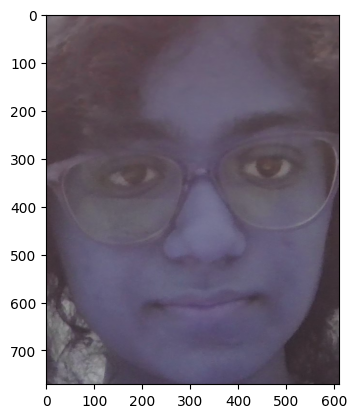

Predicted Top 5 Images: 
Name:  Juhi_Chawla.64.jpg


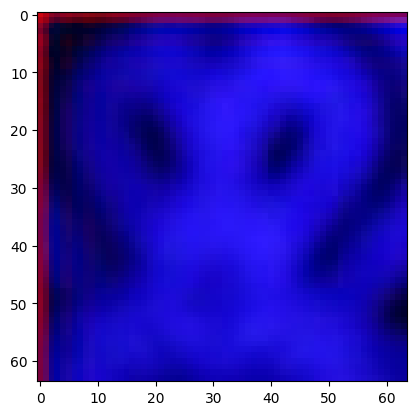

Name:  Govinda.180.jpg


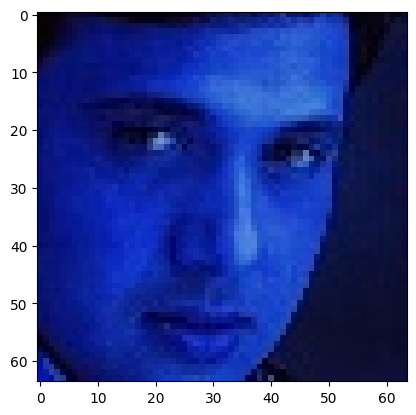

Name:  Abhay_Deol.92.jpg


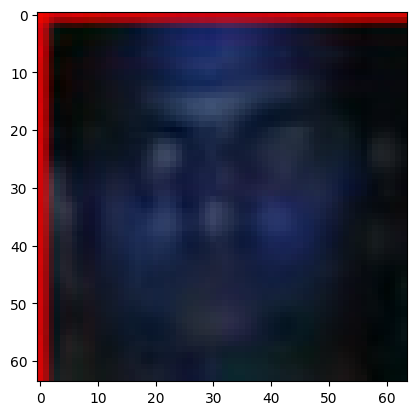

Name:  Amitabh_Bachchan.280.jpg


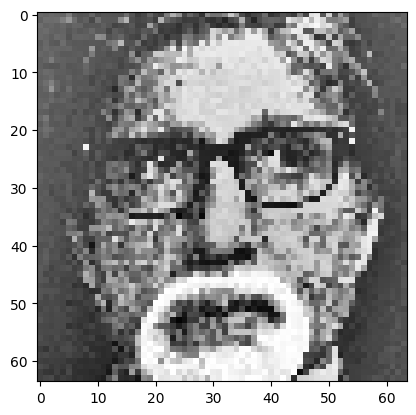

Name:  Farhan_Akhtar.178.jpg


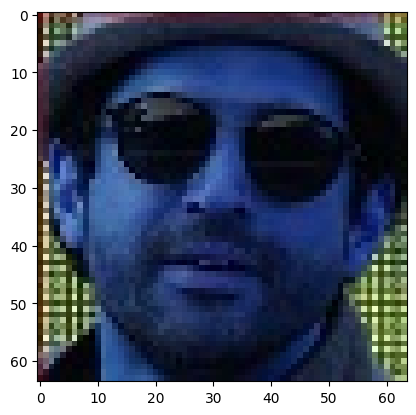

In [ ]:
print("Uploded Image: ")
from matplotlib import pyplot
pyplot.imshow(face)
pyplot.show()

print("Predicted Top 5 Images: ")
n = 0
for img in predicted_imgs:

    print("Name: ", filenames[positions[n]].split('/')[6])
    pyplot.imshow(img)
    pyplot.show()
    n = n+1